# Encoder And Decoder Model

# 0. GPU测试

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append(r'E:\jiye-study\AI\QA_Summary_and_Reasoning\code')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from utils.data_loader import build_dataset,load_dataset,preprocess_sentence,load_test_dataset
from utils.wv_loader import load_embedding_matrix,load_vocab
from utils.config import *
from gensim.models.word2vec import LineSentence, Word2Vec
from utils.gpu_utils import config_gpu
config_gpu()
import tensorflow as tf
from utils.plot_utils import plot_attention
from tqdm import tqdm
import time
from seq2seq_tf2.batcher import train_batch_generator

1 Physical GPUs, 1 Logical GPUs


# 0. 预处理数据

In [14]:
%%time
# build_dataset(train_data_path,test_data_path)

train data size 82943,test data size 20000
train data size 82873,test data size 20000,merged_df data size 102873
start build w2v model


2020-04-04 13:19:16,940 : INFO : collecting all words and their counts
2020-04-04 13:19:16,942 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-04 13:19:17,225 : INFO : PROGRESS: at sentence #10000, processed 1565474 words, keeping 34165 word types
2020-04-04 13:19:17,517 : INFO : PROGRESS: at sentence #20000, processed 3137584 words, keeping 49491 word types
2020-04-04 13:19:17,800 : INFO : PROGRESS: at sentence #30000, processed 4653432 words, keeping 60769 word types
2020-04-04 13:19:18,081 : INFO : PROGRESS: at sentence #40000, processed 6120263 words, keeping 70202 word types
2020-04-04 13:19:18,370 : INFO : PROGRESS: at sentence #50000, processed 7658026 words, keeping 78556 word types
2020-04-04 13:19:18,677 : INFO : PROGRESS: at sentence #60000, processed 9292812 words, keeping 86979 word types
2020-04-04 13:19:19,003 : INFO : PROGRESS: at sentence #70000, processed 10965925 words, keeping 95207 word types
2020-04-04 13:19:19,318 : INFO : PROGR

2020-04-04 13:20:11,177 : INFO : EPOCH 2 - PROGRESS: at 66.60% examples, 359205 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:12,219 : INFO : EPOCH 2 - PROGRESS: at 69.97% examples, 359114 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:13,267 : INFO : EPOCH 2 - PROGRESS: at 73.59% examples, 358747 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:14,286 : INFO : EPOCH 2 - PROGRESS: at 77.49% examples, 359403 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:15,312 : INFO : EPOCH 2 - PROGRESS: at 81.54% examples, 359396 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:16,331 : INFO : EPOCH 2 - PROGRESS: at 85.59% examples, 359303 words/s, in_qsize 14, out_qsize 1
2020-04-04 13:20:17,345 : INFO : EPOCH 2 - PROGRESS: at 89.21% examples, 359383 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:18,347 : INFO : EPOCH 2 - PROGRESS: at 93.21% examples, 359293 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:20:19,353 : INFO : EPOCH 2 - PROGRESS: at 97.34% examples, 359071 words/s,

2020-04-04 13:21:10,205 : INFO : EPOCH 4 - PROGRESS: at 83.12% examples, 383971 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:21:11,210 : INFO : EPOCH 4 - PROGRESS: at 87.43% examples, 384348 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:21:12,224 : INFO : EPOCH 4 - PROGRESS: at 91.32% examples, 384640 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:21:13,232 : INFO : EPOCH 4 - PROGRESS: at 95.87% examples, 384169 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:21:14,113 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-04-04 13:21:14,121 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-04-04 13:21:14,127 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-04-04 13:21:14,132 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-04-04 13:21:14,136 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-04 13:21:14,157 : INFO : worker thread finished; awaiting finish of 2 more thread

2020-04-04 13:22:02,497 : INFO : EPOCH 7 - PROGRESS: at 46.40% examples, 516370 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:03,499 : INFO : EPOCH 7 - PROGRESS: at 50.26% examples, 506609 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:04,500 : INFO : EPOCH 7 - PROGRESS: at 54.40% examples, 500294 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:05,507 : INFO : EPOCH 7 - PROGRESS: at 58.90% examples, 501326 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:06,512 : INFO : EPOCH 7 - PROGRESS: at 63.32% examples, 500216 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:07,530 : INFO : EPOCH 7 - PROGRESS: at 67.72% examples, 499851 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:08,553 : INFO : EPOCH 7 - PROGRESS: at 72.68% examples, 500210 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:09,566 : INFO : EPOCH 7 - PROGRESS: at 77.93% examples, 500318 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:10,582 : INFO : EPOCH 7 - PROGRESS: at 83.63% examples, 500984 words/s,

2020-04-04 13:22:55,496 : INFO : EPOCH - 9 : training on 15593695 raw words (10113380 effective words) took 19.9s, 507696 effective words/s
2020-04-04 13:22:56,504 : INFO : EPOCH 10 - PROGRESS: at 4.60% examples, 465596 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:57,504 : INFO : EPOCH 10 - PROGRESS: at 9.54% examples, 483603 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:58,512 : INFO : EPOCH 10 - PROGRESS: at 14.49% examples, 490883 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:22:59,521 : INFO : EPOCH 10 - PROGRESS: at 19.38% examples, 493693 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:23:00,525 : INFO : EPOCH 10 - PROGRESS: at 24.14% examples, 493042 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:23:01,561 : INFO : EPOCH 10 - PROGRESS: at 29.32% examples, 493300 words/s, in_qsize 15, out_qsize 1
2020-04-04 13:23:02,571 : INFO : EPOCH 10 - PROGRESS: at 34.52% examples, 495112 words/s, in_qsize 15, out_qsize 0
2020-04-04 13:23:03,601 : INFO : EPOCH 10 - PROGRESS: at 

start retrain w2v model


2020-04-04 13:23:23,880 : INFO : collecting all words and their counts
2020-04-04 13:23:23,881 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-04 13:23:24,540 : INFO : PROGRESS: at sentence #10000, processed 4320000 words, keeping 21827 word types
2020-04-04 13:23:25,213 : INFO : PROGRESS: at sentence #20000, processed 8640000 words, keeping 26681 word types
2020-04-04 13:23:25,877 : INFO : PROGRESS: at sentence #30000, processed 12960000 words, keeping 28990 word types
2020-04-04 13:23:26,539 : INFO : PROGRESS: at sentence #40000, processed 17280000 words, keeping 30194 word types
2020-04-04 13:23:27,201 : INFO : PROGRESS: at sentence #50000, processed 21600000 words, keeping 30870 word types
2020-04-04 13:23:27,868 : INFO : PROGRESS: at sentence #60000, processed 25920000 words, keeping 31322 word types
2020-04-04 13:23:28,532 : INFO : PROGRESS: at sentence #70000, processed 30240000 words, keeping 31560 word types
2020-04-04 13:23:29,196 : INFO : P

1/3


2020-04-04 13:24:01,476 : INFO : collecting all words and their counts
2020-04-04 13:24:01,477 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-04 13:24:01,554 : INFO : PROGRESS: at sentence #10000, processed 410000 words, keeping 7595 word types
2020-04-04 13:24:01,632 : INFO : PROGRESS: at sentence #20000, processed 820000 words, keeping 10298 word types
2020-04-04 13:24:01,712 : INFO : PROGRESS: at sentence #30000, processed 1230000 words, keeping 12135 word types
2020-04-04 13:24:01,791 : INFO : PROGRESS: at sentence #40000, processed 1640000 words, keeping 13583 word types
2020-04-04 13:24:01,871 : INFO : PROGRESS: at sentence #50000, processed 2050000 words, keeping 14733 word types
2020-04-04 13:24:01,951 : INFO : PROGRESS: at sentence #60000, processed 2460000 words, keeping 15795 word types
2020-04-04 13:24:02,031 : INFO : PROGRESS: at sentence #70000, processed 2870000 words, keeping 16821 word types
2020-04-04 13:24:02,111 : INFO : PROGRESS:

2/3


2020-04-04 13:24:04,723 : INFO : collecting all words and their counts
2020-04-04 13:24:04,724 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-04 13:24:05,387 : INFO : PROGRESS: at sentence #10000, processed 4320000 words, keeping 22045 word types
2020-04-04 13:24:06,046 : INFO : collected 26458 word types from a corpus of 8640000 raw words and 20000 sentences
2020-04-04 13:24:06,047 : INFO : Updating model with new vocabulary
2020-04-04 13:24:06,061 : INFO : New added 12461 unique words (32% of original 38919) and increased the count of 12461 pre-existing words (32% of original 38919)
2020-04-04 13:24:06,116 : INFO : deleting the raw counts dictionary of 26458 items
2020-04-04 13:24:06,118 : INFO : sample=0.001 downsamples 20 most-common words
2020-04-04 13:24:06,118 : INFO : downsampling leaves estimated 4340217 word corpus (50.4% of prior 8610588)
2020-04-04 13:24:06,163 : INFO : estimated required memory for 24922 words and 500 dimensions: 1121490

finish retrain w2v model
final w2v_model has vocabulary of  31818
Wall time: 5min 52s


(array([[31814,   414,   901, ..., 31816, 31816, 31816],
        [31814,   811, 31817, ..., 31816, 31816, 31816],
        [31814,  1391,    88, ..., 31816, 31816, 31816],
        ...,
        [31814,   225,   892, ..., 31816, 31816, 31816],
        [31814, 12683,  3144, ..., 31816, 31816, 31816],
        [31814,  3273,    75, ..., 31816, 31816, 31816]]),
 array([[31814,   326,   390, ..., 31816, 31816, 31816],
        [31814,   326,   390, ..., 31816, 31816, 31816],
        [31814,    80,     9, ..., 31816, 31816, 31816],
        ...,
        [31814,    32,    24, ..., 31816, 31816, 31816],
        [31814,    32,    24, ..., 31816, 31816, 31816],
        [31814,    32,    24, ..., 31816, 31816, 31816]]),
 array([[31814,  1075,   278, ..., 31816, 31816, 31816],
        [31814,   222,    13, ..., 31816, 31816, 31816],
        [31814,  1075,  6174, ..., 31816, 31816, 31816],
        ...,
        [31814,    68,     1, ..., 31816, 31816, 31816],
        [31814,   104,     1, ..., 31816, 318

# 1. 加载数据

## 1.1 加载数据集

In [87]:
params = {}
params["vocab_size"] = len(vocab)
params["embed_size"] = 500
params["enc_units"] = 512
params["attn_units"] = 512
params["dec_units"] = 512
params["batch_size"] = 64
params["epochs"] = 500
params["max_enc_len"] = 200
params["max_dec_len"] = 41
params["embedding_dim"] = 500

In [16]:
dataset, steps_per_epoch = train_batch_generator(batch_size=64,
                                                 max_enc_len=params["max_enc_len"],
                                                 max_dec_len=params["max_dec_len"])
test_X = load_test_dataset(params["max_dec_len"])

## 1.2. 加载vocab

In [22]:
vocab,reverse_vocab=load_vocab(vocab_path)

## 1.3 加载预训练权重

In [19]:
embedding_matrix=load_embedding_matrix()

# 2. 模型训练

## 2.1 基本参数设置

In [50]:
units = 512
max_length_inp = 200
max_length_targ = 41

In [23]:
params = {}
params["vocab_size"] = len(vocab)
params["embed_size"] = 500
params["enc_units"] = units
params["attn_units"] = units
params["dec_units"] = units
params["batch_size"] = 64
params["epochs"] = 5
params["max_enc_len"] = 200
params["max_dec_len"] = 41

NameError: name 'units' is not defined

## 2.2 构建Encoder

In [27]:
from seq2seq_tf2.seq2seq_model import Seq2Seq

In [28]:
model=Seq2Seq(params)

# 2 读取训练好的模型

In [29]:
from utils.config import checkpoint_dir,checkpoint_prefix

In [30]:
ckpt = tf.train.Checkpoint(Seq2Seq=model)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_dir, max_to_keep=5)

In [31]:
ckpt.restore(ckpt_manager.latest_checkpoint)
print("Model restored")

Model restored


# 3. 训练

In [32]:
optimizer = tf.keras.optimizers.Adam(name='Adam',learning_rate=0.001)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')


pad_index=vocab['<PAD>']
nuk_index=vocab['<UNK>']

def loss_function(real, pred):
    pad_mask = tf.math.equal(real, pad_index)
    nuk_mask = tf.math.equal(real, nuk_index)
    mask = tf.math.logical_not(tf.math.logical_or(pad_mask,nuk_mask))
    
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [33]:
@tf.function
def train_step(inp, targ):
    loss = 0
    
    with tf.GradientTape() as tape:
        # 1. 构建encoder
        enc_output, enc_hidden = model.call_encoder(inp)
        # 2. 复制
        dec_hidden = enc_hidden
        # 3. <START> * BATCH_SIZE 
        dec_input = tf.expand_dims([vocab['<START>']] * params["batch_size"], 1)
        
        # 逐个预测序列
        predictions, _ = model(dec_input, dec_hidden, enc_output, targ)
        
        batch_loss = loss_function(targ[:, 1:], predictions)

        variables = model.encoder.trainable_variables + model.decoder.trainable_variables+ model.attention.trainable_variables
    
        gradients = tape.gradient(batch_loss, variables)

        optimizer.apply_gradients(zip(gradients, variables))

        return batch_loss

In [ ]:
epochs = params["epochs"]
# 如果检查点存在，则恢复最新的检查点。
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')
    
for epoch in range(epochs):
    start = time.time()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ)
        total_loss += batch_loss

        if batch % 1 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                             ckpt_save_path))

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Latest checkpoint restored!!
Epoch 1 Batch 0 Loss 0.4027
Epoch 1 Batch 1 Loss 0.4198
Epoch 1 Batch 2 Loss 0.4059
Epoch 1 Batch 3 Loss 0.5312
Epoch 1 Batch 4 Loss 0.3875
Epoch 1 Batch 5 Loss 0.4639
Epoch 1 Batch 6 Loss 0.4202
Epoch 1 Batch 7 Loss 0.3889
Epoch 1 Batch 8 Loss 0.5404
Epoch 1 Batch 9 Loss 0.3895
Epoch 1 Batch 10 Loss 0.5358
Epoch 1 Batch 11 Loss 0.4200
Epoch 1 Batch 12 Loss 0.3840
Epoch 1 Batch 13 Loss 0.3908
Epoch 1 Batch 14 Loss 0.4332
Epoch 1 Batch 15 Loss 0.4324
Epoch 1 Batch 16 Loss 0.5160
Epoch 1 Batch 17 Loss 0.4944
Epoch 1 Batch 18 Loss 0.2920
Epoch 1 Batch 19 Loss 0.4913
Epoch 1 Batch 20 Loss 0.4429
Epoch 1 Batch 21 Loss 0.3747
Epoch 1 Batch 22 Loss 0.4153
Epoch 1 Batch 23 Loss 0.5382
Epoch 1 Batch 24 Loss 0.3576
Epoch 1 Batch 25 Loss 0.4177
Epoch 1 Batch 26 Loss 0.3453
Epoch 1 Batch 27 Loss 0.4149
Epoch 1 Batch 28 Loss 0.3507
Epoch 1 Batch 29 Loss 0.4195
Epoch 1 Batch 30 Loss 0.3577
Epoch 1 Batch 31 Loss 0.3795
Epoch 1 Batch 32 Loss 0.4803
Epoch 1 Batch 33 Loss 0.

Epoch 1 Batch 275 Loss 0.4508
Epoch 1 Batch 276 Loss 0.3760
Epoch 1 Batch 277 Loss 0.4438
Epoch 1 Batch 278 Loss 0.4652
Epoch 1 Batch 279 Loss 0.3964
Epoch 1 Batch 280 Loss 0.4411
Epoch 1 Batch 281 Loss 0.4721
Epoch 1 Batch 282 Loss 0.4860
Epoch 1 Batch 283 Loss 0.4538
Epoch 1 Batch 284 Loss 0.4987
Epoch 1 Batch 285 Loss 0.3224
Epoch 1 Batch 286 Loss 0.4012
Epoch 1 Batch 287 Loss 0.3766
Epoch 1 Batch 288 Loss 0.3652
Epoch 1 Batch 289 Loss 0.3628
Epoch 1 Batch 290 Loss 0.4482
Epoch 1 Batch 291 Loss 0.4411
Epoch 1 Batch 292 Loss 0.3868
Epoch 1 Batch 293 Loss 0.3956
Epoch 1 Batch 294 Loss 0.3759
Epoch 1 Batch 295 Loss 0.4321
Epoch 1 Batch 296 Loss 0.3773
Epoch 1 Batch 297 Loss 0.4795
Epoch 1 Batch 298 Loss 0.4276
Epoch 1 Batch 299 Loss 0.3898
Epoch 1 Batch 300 Loss 0.3808
Epoch 1 Batch 301 Loss 0.4512
Epoch 1 Batch 302 Loss 0.3982
Epoch 1 Batch 303 Loss 0.4078
Epoch 1 Batch 304 Loss 0.3894
Epoch 1 Batch 305 Loss 0.4540
Epoch 1 Batch 306 Loss 0.4336
Epoch 1 Batch 307 Loss 0.3559
Epoch 1 Ba

Epoch 1 Batch 548 Loss 0.5659
Epoch 1 Batch 549 Loss 0.6004
Epoch 1 Batch 550 Loss 0.4887
Epoch 1 Batch 551 Loss 0.4897
Epoch 1 Batch 552 Loss 0.5813
Epoch 1 Batch 553 Loss 0.5735
Epoch 1 Batch 554 Loss 0.6492
Epoch 1 Batch 555 Loss 0.5068
Epoch 1 Batch 556 Loss 0.4733
Epoch 1 Batch 557 Loss 0.5500
Epoch 1 Batch 558 Loss 0.5505
Epoch 1 Batch 559 Loss 0.5697
Epoch 1 Batch 560 Loss 0.5439
Epoch 1 Batch 561 Loss 0.5403
Epoch 1 Batch 562 Loss 0.5019
Epoch 1 Batch 563 Loss 0.3968
Epoch 1 Batch 564 Loss 0.5571
Epoch 1 Batch 565 Loss 0.4776
Epoch 1 Batch 566 Loss 0.4483
Epoch 1 Batch 567 Loss 0.4476
Epoch 1 Batch 568 Loss 0.4470
Epoch 1 Batch 569 Loss 0.5300
Epoch 1 Batch 570 Loss 0.4623
Epoch 1 Batch 571 Loss 0.5030
Epoch 1 Batch 572 Loss 0.5102
Epoch 1 Batch 573 Loss 0.4985
Epoch 1 Batch 574 Loss 0.5425
Epoch 1 Batch 575 Loss 0.4177
Epoch 1 Batch 576 Loss 0.4553
Epoch 1 Batch 577 Loss 0.6183
Epoch 1 Batch 578 Loss 0.5632
Epoch 1 Batch 579 Loss 0.5362
Epoch 1 Batch 580 Loss 0.5258
Epoch 1 Ba

Epoch 1 Batch 821 Loss 0.5389
Epoch 1 Batch 822 Loss 0.5055
Epoch 1 Batch 823 Loss 0.4402
Epoch 1 Batch 824 Loss 0.4838
Epoch 1 Batch 825 Loss 0.4070
Epoch 1 Batch 826 Loss 0.4394
Epoch 1 Batch 827 Loss 0.5314
Epoch 1 Batch 828 Loss 0.5396
Epoch 1 Batch 829 Loss 0.4838
Epoch 1 Batch 830 Loss 0.5295
Epoch 1 Batch 831 Loss 0.4835
Epoch 1 Batch 832 Loss 0.5048
Epoch 1 Batch 833 Loss 0.5889
Epoch 1 Batch 834 Loss 0.5644
Epoch 1 Batch 835 Loss 0.4795
Epoch 1 Batch 836 Loss 0.4422
Epoch 1 Batch 837 Loss 0.4605
Epoch 1 Batch 838 Loss 0.4226
Epoch 1 Batch 839 Loss 0.6051
Epoch 1 Batch 840 Loss 0.4322
Epoch 1 Batch 841 Loss 0.5171
Epoch 1 Batch 842 Loss 0.4864
Epoch 1 Batch 843 Loss 0.5143
Epoch 1 Batch 844 Loss 0.5540
Epoch 1 Batch 845 Loss 0.4721
Epoch 1 Batch 846 Loss 0.4000
Epoch 1 Batch 847 Loss 0.4977
Epoch 1 Batch 848 Loss 0.4334
Epoch 1 Batch 849 Loss 0.5245
Epoch 1 Batch 850 Loss 0.4819
Epoch 1 Batch 851 Loss 0.4645
Epoch 1 Batch 852 Loss 0.5564
Epoch 1 Batch 853 Loss 0.4888
Epoch 1 Ba

Epoch 1 Batch 1091 Loss 0.4861
Epoch 1 Batch 1092 Loss 0.5148
Epoch 1 Batch 1093 Loss 0.4621
Epoch 1 Batch 1094 Loss 0.5375
Epoch 1 Batch 1095 Loss 0.4130
Epoch 1 Batch 1096 Loss 0.4736
Epoch 1 Batch 1097 Loss 0.3863
Epoch 1 Batch 1098 Loss 0.3661
Epoch 1 Batch 1099 Loss 0.5374
Epoch 1 Batch 1100 Loss 0.4917
Epoch 1 Batch 1101 Loss 0.4423
Epoch 1 Batch 1102 Loss 0.5362
Epoch 1 Batch 1103 Loss 0.5106
Epoch 1 Batch 1104 Loss 0.4630
Epoch 1 Batch 1105 Loss 0.4367
Epoch 1 Batch 1106 Loss 0.4316
Epoch 1 Batch 1107 Loss 0.5264
Epoch 1 Batch 1108 Loss 0.4683
Epoch 1 Batch 1109 Loss 0.4733
Epoch 1 Batch 1110 Loss 0.4855
Epoch 1 Batch 1111 Loss 0.5151
Epoch 1 Batch 1112 Loss 0.4781
Epoch 1 Batch 1113 Loss 0.4757
Epoch 1 Batch 1114 Loss 0.4898
Epoch 1 Batch 1115 Loss 0.4752
Epoch 1 Batch 1116 Loss 0.4144
Epoch 1 Batch 1117 Loss 0.4950
Epoch 1 Batch 1118 Loss 0.4394
Epoch 1 Batch 1119 Loss 0.4140
Epoch 1 Batch 1120 Loss 0.4012
Epoch 1 Batch 1121 Loss 0.4736
Epoch 1 Batch 1122 Loss 0.4255
Epoch 1 

Epoch 2 Batch 63 Loss 0.3474
Epoch 2 Batch 64 Loss 0.3400
Epoch 2 Batch 65 Loss 0.2846
Epoch 2 Batch 66 Loss 0.3465
Epoch 2 Batch 67 Loss 0.4199
Epoch 2 Batch 68 Loss 0.4091
Epoch 2 Batch 69 Loss 0.3935
Epoch 2 Batch 70 Loss 0.3744
Epoch 2 Batch 71 Loss 0.3186
Epoch 2 Batch 72 Loss 0.3830
Epoch 2 Batch 73 Loss 0.3755
Epoch 2 Batch 74 Loss 0.3566
Epoch 2 Batch 75 Loss 0.4452
Epoch 2 Batch 76 Loss 0.2948
Epoch 2 Batch 77 Loss 0.4136
Epoch 2 Batch 78 Loss 0.4313
Epoch 2 Batch 79 Loss 0.4053
Epoch 2 Batch 80 Loss 0.2970
Epoch 2 Batch 81 Loss 0.3644
Epoch 2 Batch 82 Loss 0.3279
Epoch 2 Batch 83 Loss 0.3816
Epoch 2 Batch 84 Loss 0.3821
Epoch 2 Batch 85 Loss 0.4392
Epoch 2 Batch 86 Loss 0.4649
Epoch 2 Batch 87 Loss 0.3408
Epoch 2 Batch 88 Loss 0.2918
Epoch 2 Batch 89 Loss 0.3443
Epoch 2 Batch 90 Loss 0.3338
Epoch 2 Batch 91 Loss 0.3638
Epoch 2 Batch 92 Loss 0.3801
Epoch 2 Batch 93 Loss 0.3329
Epoch 2 Batch 94 Loss 0.3710
Epoch 2 Batch 95 Loss 0.3740
Epoch 2 Batch 96 Loss 0.3878
Epoch 2 Batch 

Epoch 2 Batch 337 Loss 0.3208
Epoch 2 Batch 338 Loss 0.3923
Epoch 2 Batch 339 Loss 0.4231
Epoch 2 Batch 340 Loss 0.3559
Epoch 2 Batch 341 Loss 0.4955
Epoch 2 Batch 342 Loss 0.3481
Epoch 2 Batch 343 Loss 0.3934
Epoch 2 Batch 344 Loss 0.3310
Epoch 2 Batch 345 Loss 0.3714
Epoch 2 Batch 346 Loss 0.3862
Epoch 2 Batch 347 Loss 0.3268
Epoch 2 Batch 348 Loss 0.3054
Epoch 2 Batch 349 Loss 0.3811
Epoch 2 Batch 350 Loss 0.3870
Epoch 2 Batch 351 Loss 0.3758
Epoch 2 Batch 352 Loss 0.3490
Epoch 2 Batch 353 Loss 0.4237
Epoch 2 Batch 354 Loss 0.3999
Epoch 2 Batch 355 Loss 0.4323
Epoch 2 Batch 356 Loss 0.3932
Epoch 2 Batch 357 Loss 0.3729
Epoch 2 Batch 358 Loss 0.3226
Epoch 2 Batch 359 Loss 0.3339
Epoch 2 Batch 360 Loss 0.2846
Epoch 2 Batch 361 Loss 0.3316
Epoch 2 Batch 362 Loss 0.2977
Epoch 2 Batch 363 Loss 0.3993
Epoch 2 Batch 364 Loss 0.3513
Epoch 2 Batch 365 Loss 0.3116
Epoch 2 Batch 366 Loss 0.3702
Epoch 2 Batch 367 Loss 0.3488
Epoch 2 Batch 368 Loss 0.3974
Epoch 2 Batch 369 Loss 0.3268
Epoch 2 Ba

Epoch 2 Batch 610 Loss 0.3513
Epoch 2 Batch 611 Loss 0.3900
Epoch 2 Batch 612 Loss 0.3295
Epoch 2 Batch 613 Loss 0.4397
Epoch 2 Batch 614 Loss 0.3909
Epoch 2 Batch 615 Loss 0.3776
Epoch 2 Batch 616 Loss 0.3897
Epoch 2 Batch 617 Loss 0.3575
Epoch 2 Batch 618 Loss 0.3390
Epoch 2 Batch 619 Loss 0.3602
Epoch 2 Batch 620 Loss 0.3654
Epoch 2 Batch 621 Loss 0.3721
Epoch 2 Batch 622 Loss 0.4487
Epoch 2 Batch 623 Loss 0.3607
Epoch 2 Batch 624 Loss 0.4126
Epoch 2 Batch 625 Loss 0.3365
Epoch 2 Batch 626 Loss 0.4607
Epoch 2 Batch 627 Loss 0.3795
Epoch 2 Batch 628 Loss 0.3544
Epoch 2 Batch 629 Loss 0.4238
Epoch 2 Batch 630 Loss 0.3421
Epoch 2 Batch 631 Loss 0.3329
Epoch 2 Batch 632 Loss 0.3527
Epoch 2 Batch 633 Loss 0.4031
Epoch 2 Batch 634 Loss 0.3410
Epoch 2 Batch 635 Loss 0.4068
Epoch 2 Batch 636 Loss 0.3915
Epoch 2 Batch 637 Loss 0.4395
Epoch 2 Batch 638 Loss 0.3647
Epoch 2 Batch 639 Loss 0.3760
Epoch 2 Batch 640 Loss 0.3715
Epoch 2 Batch 641 Loss 0.4867
Epoch 2 Batch 642 Loss 0.3594
Epoch 2 Ba

Epoch 2 Batch 883 Loss 0.4489
Epoch 2 Batch 884 Loss 0.5046
Epoch 2 Batch 885 Loss 0.4370
Epoch 2 Batch 886 Loss 0.4424
Epoch 2 Batch 887 Loss 0.4322
Epoch 2 Batch 888 Loss 0.5499
Epoch 2 Batch 889 Loss 0.4076
Epoch 2 Batch 890 Loss 0.4013
Epoch 2 Batch 891 Loss 0.4615
Epoch 2 Batch 892 Loss 0.4102
Epoch 2 Batch 893 Loss 0.5190
Epoch 2 Batch 894 Loss 0.4682
Epoch 2 Batch 895 Loss 0.4067
Epoch 2 Batch 896 Loss 0.3809
Epoch 2 Batch 897 Loss 0.4856
Epoch 2 Batch 898 Loss 0.4487
Epoch 2 Batch 899 Loss 0.4398
Epoch 2 Batch 900 Loss 0.4453
Epoch 2 Batch 901 Loss 0.4276
Epoch 2 Batch 902 Loss 0.5362
Epoch 2 Batch 903 Loss 0.4455
Epoch 2 Batch 904 Loss 0.4748
Epoch 2 Batch 905 Loss 0.4067
Epoch 2 Batch 906 Loss 0.3562
Epoch 2 Batch 907 Loss 0.5017
Epoch 2 Batch 908 Loss 0.4783
Epoch 2 Batch 909 Loss 0.4294
Epoch 2 Batch 910 Loss 0.3909
Epoch 2 Batch 911 Loss 0.4639
Epoch 2 Batch 912 Loss 0.4307
Epoch 2 Batch 913 Loss 0.5112
Epoch 2 Batch 914 Loss 0.4936
Epoch 2 Batch 915 Loss 0.4479
Epoch 2 Ba

Epoch 2 Batch 1151 Loss 0.4908
Epoch 2 Batch 1152 Loss 0.4135
Epoch 2 Batch 1153 Loss 0.3974
Epoch 2 Batch 1154 Loss 0.4658
Epoch 2 Batch 1155 Loss 0.4375
Epoch 2 Batch 1156 Loss 0.3898
Epoch 2 Batch 1157 Loss 0.3727
Epoch 2 Batch 1158 Loss 0.4544
Epoch 2 Batch 1159 Loss 0.4522
Epoch 2 Batch 1160 Loss 0.4504
Epoch 2 Batch 1161 Loss 0.5167
Epoch 2 Batch 1162 Loss 0.4628
Epoch 2 Batch 1163 Loss 0.3930
Epoch 2 Batch 1164 Loss 0.4079
Epoch 2 Batch 1165 Loss 0.4248
Epoch 2 Batch 1166 Loss 0.3999
Epoch 2 Batch 1167 Loss 0.3737
Epoch 2 Batch 1168 Loss 0.3620
Epoch 2 Batch 1169 Loss 0.4402
Epoch 2 Batch 1170 Loss 0.3516
Epoch 2 Batch 1171 Loss 0.4267
Epoch 2 Batch 1172 Loss 0.3999
Epoch 2 Batch 1173 Loss 0.4682
Epoch 2 Batch 1174 Loss 0.4006
Epoch 2 Batch 1175 Loss 0.4530
Epoch 2 Batch 1176 Loss 0.4228
Epoch 2 Batch 1177 Loss 0.3565
Epoch 2 Batch 1178 Loss 0.4266
Epoch 2 Batch 1179 Loss 0.4112
Epoch 2 Batch 1180 Loss 0.3804
Epoch 2 Batch 1181 Loss 0.4223
Epoch 2 Batch 1182 Loss 0.3656
Epoch 2 

Epoch 3 Batch 122 Loss 0.2981
Epoch 3 Batch 123 Loss 0.3816
Epoch 3 Batch 124 Loss 0.3032
Epoch 3 Batch 125 Loss 0.2635
Epoch 3 Batch 126 Loss 0.4126
Epoch 3 Batch 127 Loss 0.2181
Epoch 3 Batch 128 Loss 0.3527
Epoch 3 Batch 129 Loss 0.3297
Epoch 3 Batch 130 Loss 0.3502
Epoch 3 Batch 131 Loss 0.4197
Epoch 3 Batch 132 Loss 0.3053
Epoch 3 Batch 133 Loss 0.2808
Epoch 3 Batch 134 Loss 0.4953
Epoch 3 Batch 135 Loss 0.3623
Epoch 3 Batch 136 Loss 0.3209
Epoch 3 Batch 137 Loss 0.2820
Epoch 3 Batch 138 Loss 0.2964
Epoch 3 Batch 139 Loss 0.3454
Epoch 3 Batch 140 Loss 0.3348
Epoch 3 Batch 141 Loss 0.3364
Epoch 3 Batch 142 Loss 0.2756
Epoch 3 Batch 143 Loss 0.3769
Epoch 3 Batch 144 Loss 0.3052
Epoch 3 Batch 145 Loss 0.3478
Epoch 3 Batch 146 Loss 0.2507
Epoch 3 Batch 147 Loss 0.3129
Epoch 3 Batch 148 Loss 0.2588
Epoch 3 Batch 149 Loss 0.3473
Epoch 3 Batch 150 Loss 0.3423
Epoch 3 Batch 151 Loss 0.3083
Epoch 3 Batch 152 Loss 0.2916
Epoch 3 Batch 153 Loss 0.3146
Epoch 3 Batch 154 Loss 0.2506
Epoch 3 Ba

Epoch 3 Batch 395 Loss 0.3736
Epoch 3 Batch 396 Loss 0.3411
Epoch 3 Batch 397 Loss 0.4116
Epoch 3 Batch 398 Loss 0.4459
Epoch 3 Batch 399 Loss 0.3644
Epoch 3 Batch 400 Loss 0.3422
Epoch 3 Batch 401 Loss 0.3876
Epoch 3 Batch 402 Loss 0.3711
Epoch 3 Batch 403 Loss 0.3210
Epoch 3 Batch 404 Loss 0.2887
Epoch 3 Batch 405 Loss 0.3660
Epoch 3 Batch 406 Loss 0.3316
Epoch 3 Batch 407 Loss 0.3302
Epoch 3 Batch 408 Loss 0.4411
Epoch 3 Batch 409 Loss 0.3613
Epoch 3 Batch 410 Loss 0.3641
Epoch 3 Batch 411 Loss 0.3183
Epoch 3 Batch 412 Loss 0.3321
Epoch 3 Batch 413 Loss 0.3908
Epoch 3 Batch 414 Loss 0.3441
Epoch 3 Batch 415 Loss 0.3718
Epoch 3 Batch 416 Loss 0.3784
Epoch 3 Batch 417 Loss 0.3789
Epoch 3 Batch 418 Loss 0.3949
Epoch 3 Batch 419 Loss 0.3815
Epoch 3 Batch 420 Loss 0.4120
Epoch 3 Batch 421 Loss 0.3439
Epoch 3 Batch 422 Loss 0.4329
Epoch 3 Batch 423 Loss 0.4255
Epoch 3 Batch 424 Loss 0.3688
Epoch 3 Batch 425 Loss 0.3881
Epoch 3 Batch 426 Loss 0.3983
Epoch 3 Batch 427 Loss 0.4108
Epoch 3 Ba

Epoch 3 Batch 668 Loss 0.3922
Epoch 3 Batch 669 Loss 0.4676
Epoch 3 Batch 670 Loss 0.5417
Epoch 3 Batch 671 Loss 0.3757
Epoch 3 Batch 672 Loss 0.3911
Epoch 3 Batch 673 Loss 0.4409
Epoch 3 Batch 674 Loss 0.4635
Epoch 3 Batch 675 Loss 0.2998
Epoch 3 Batch 676 Loss 0.3811
Epoch 3 Batch 677 Loss 0.4276
Epoch 3 Batch 678 Loss 0.3724
Epoch 3 Batch 679 Loss 0.4084
Epoch 3 Batch 680 Loss 0.3862
Epoch 3 Batch 681 Loss 0.3479
Epoch 3 Batch 682 Loss 0.3373
Epoch 3 Batch 683 Loss 0.3813
Epoch 3 Batch 684 Loss 0.3947
Epoch 3 Batch 685 Loss 0.3512
Epoch 3 Batch 686 Loss 0.4272
Epoch 3 Batch 687 Loss 0.3470
Epoch 3 Batch 688 Loss 0.3795
Epoch 3 Batch 689 Loss 0.4304
Epoch 3 Batch 690 Loss 0.4266
Epoch 3 Batch 691 Loss 0.3631
Epoch 3 Batch 692 Loss 0.4251
Epoch 3 Batch 693 Loss 0.4868
Epoch 3 Batch 694 Loss 0.4487
Epoch 3 Batch 695 Loss 0.3934
Epoch 3 Batch 696 Loss 0.3608
Epoch 3 Batch 697 Loss 0.3964
Epoch 3 Batch 698 Loss 0.4557
Epoch 3 Batch 699 Loss 0.3719
Epoch 3 Batch 700 Loss 0.3241
Epoch 3 Ba

Epoch 3 Batch 941 Loss 0.3848
Epoch 3 Batch 942 Loss 0.3432
Epoch 3 Batch 943 Loss 0.4605
Epoch 3 Batch 944 Loss 0.4402
Epoch 3 Batch 945 Loss 0.4397
Epoch 3 Batch 946 Loss 0.4089
Epoch 3 Batch 947 Loss 0.4161
Epoch 3 Batch 948 Loss 0.3686
Epoch 3 Batch 949 Loss 0.3924
Epoch 3 Batch 950 Loss 0.4330
Epoch 3 Batch 951 Loss 0.4768
Epoch 3 Batch 952 Loss 0.4578
Epoch 3 Batch 953 Loss 0.3802
Epoch 3 Batch 954 Loss 0.3374
Epoch 3 Batch 955 Loss 0.4328
Epoch 3 Batch 956 Loss 0.3538
Epoch 3 Batch 957 Loss 0.4224
Epoch 3 Batch 958 Loss 0.4222
Epoch 3 Batch 959 Loss 0.4024
Epoch 3 Batch 960 Loss 0.3447
Epoch 3 Batch 961 Loss 0.4993
Epoch 3 Batch 962 Loss 0.3839
Epoch 3 Batch 963 Loss 0.4207
Epoch 3 Batch 964 Loss 0.4463
Epoch 3 Batch 965 Loss 0.4446
Epoch 3 Batch 966 Loss 0.4226
Epoch 3 Batch 967 Loss 0.3533
Epoch 3 Batch 968 Loss 0.4608
Epoch 3 Batch 969 Loss 0.4195
Epoch 3 Batch 970 Loss 0.3959
Epoch 3 Batch 971 Loss 0.3302
Epoch 3 Batch 972 Loss 0.3663
Epoch 3 Batch 973 Loss 0.4089
Epoch 3 Ba

Epoch 3 Batch 1207 Loss 0.3889
Epoch 3 Batch 1208 Loss 0.4098
Epoch 3 Batch 1209 Loss 0.3819
Epoch 3 Batch 1210 Loss 0.3865
Epoch 3 Batch 1211 Loss 0.4009
Epoch 3 Batch 1212 Loss 0.4271
Epoch 3 Batch 1213 Loss 0.4163
Epoch 3 Batch 1214 Loss 0.3475
Epoch 3 Batch 1215 Loss 0.4150
Epoch 3 Batch 1216 Loss 0.4489
Epoch 3 Batch 1217 Loss 0.4441
Epoch 3 Batch 1218 Loss 0.4130
Epoch 3 Batch 1219 Loss 0.4368
Epoch 3 Batch 1220 Loss 0.3157
Epoch 3 Batch 1221 Loss 0.4267
Epoch 3 Batch 1222 Loss 0.3784
Epoch 3 Batch 1223 Loss 0.3393
Epoch 3 Batch 1224 Loss 0.3659
Epoch 3 Batch 1225 Loss 0.3346
Epoch 3 Batch 1226 Loss 0.3713
Epoch 3 Batch 1227 Loss 0.3889
Epoch 3 Batch 1228 Loss 0.3810
Epoch 3 Batch 1229 Loss 0.3897
Epoch 3 Batch 1230 Loss 0.3593
Epoch 3 Batch 1231 Loss 0.4440
Epoch 3 Batch 1232 Loss 0.3952
Epoch 3 Batch 1233 Loss 0.3614
Epoch 3 Batch 1234 Loss 0.4074
Epoch 3 Batch 1235 Loss 0.4056
Epoch 3 Batch 1236 Loss 0.3893
Epoch 3 Batch 1237 Loss 0.4305
Epoch 3 Batch 1238 Loss 0.4090
Epoch 3 

Epoch 4 Batch 184 Loss 0.3496
Epoch 4 Batch 185 Loss 0.3073
Epoch 4 Batch 186 Loss 0.3314
Epoch 4 Batch 187 Loss 0.3368
Epoch 4 Batch 188 Loss 0.3140
Epoch 4 Batch 189 Loss 0.4012
Epoch 4 Batch 190 Loss 0.3149
Epoch 4 Batch 191 Loss 0.3447
Epoch 4 Batch 192 Loss 0.3432
Epoch 4 Batch 193 Loss 0.3511
Epoch 4 Batch 194 Loss 0.3669
Epoch 4 Batch 195 Loss 0.3693
Epoch 4 Batch 196 Loss 0.4777
Epoch 4 Batch 197 Loss 0.2937
Epoch 4 Batch 198 Loss 0.4612
Epoch 4 Batch 199 Loss 0.3310
Epoch 4 Batch 200 Loss 0.3419
Epoch 4 Batch 201 Loss 0.3600
Epoch 4 Batch 202 Loss 0.3541
Epoch 4 Batch 203 Loss 0.3883
Epoch 4 Batch 204 Loss 0.3562
Epoch 4 Batch 205 Loss 0.3394
Epoch 4 Batch 206 Loss 0.4036
Epoch 4 Batch 207 Loss 0.3983
Epoch 4 Batch 208 Loss 0.3340
Epoch 4 Batch 209 Loss 0.3121
Epoch 4 Batch 210 Loss 0.3716
Epoch 4 Batch 211 Loss 0.3711
Epoch 4 Batch 212 Loss 0.3279
Epoch 4 Batch 213 Loss 0.3541
Epoch 4 Batch 214 Loss 0.3455
Epoch 4 Batch 215 Loss 0.3748
Epoch 4 Batch 216 Loss 0.3619
Epoch 4 Ba

Epoch 4 Batch 457 Loss 0.3514
Epoch 4 Batch 458 Loss 0.4298
Epoch 4 Batch 459 Loss 0.3925
Epoch 4 Batch 460 Loss 0.3462
Epoch 4 Batch 461 Loss 0.3920
Epoch 4 Batch 462 Loss 0.3381
Epoch 4 Batch 463 Loss 0.3636
Epoch 4 Batch 464 Loss 0.3711
Epoch 4 Batch 465 Loss 0.3676
Epoch 4 Batch 466 Loss 0.4322
Epoch 4 Batch 467 Loss 0.3911
Epoch 4 Batch 468 Loss 0.2986
Epoch 4 Batch 469 Loss 0.3649
Epoch 4 Batch 470 Loss 0.3346
Epoch 4 Batch 471 Loss 0.3540
Epoch 4 Batch 472 Loss 0.4375
Epoch 4 Batch 473 Loss 0.3784
Epoch 4 Batch 474 Loss 0.3550
Epoch 4 Batch 475 Loss 0.3526
Epoch 4 Batch 476 Loss 0.3382
Epoch 4 Batch 477 Loss 0.3560
Epoch 4 Batch 478 Loss 0.2998
Epoch 4 Batch 479 Loss 0.3604
Epoch 4 Batch 480 Loss 0.3917
Epoch 4 Batch 481 Loss 0.3822
Epoch 4 Batch 482 Loss 0.3193
Epoch 4 Batch 483 Loss 0.3962
Epoch 4 Batch 484 Loss 0.3102
Epoch 4 Batch 485 Loss 0.3453
Epoch 4 Batch 486 Loss 0.4108
Epoch 4 Batch 487 Loss 0.3697
Epoch 4 Batch 488 Loss 0.3830
Epoch 4 Batch 489 Loss 0.3653
Epoch 4 Ba

Epoch 4 Batch 730 Loss 0.3783
Epoch 4 Batch 731 Loss 0.4002
Epoch 4 Batch 732 Loss 0.4478
Epoch 4 Batch 733 Loss 0.3815
Epoch 4 Batch 734 Loss 0.3943
Epoch 4 Batch 735 Loss 0.5331
Epoch 4 Batch 736 Loss 0.4090
Epoch 4 Batch 737 Loss 0.4143
Epoch 4 Batch 738 Loss 0.3794
Epoch 4 Batch 739 Loss 0.4062
Epoch 4 Batch 740 Loss 0.4331
Epoch 4 Batch 741 Loss 0.4349
Epoch 4 Batch 742 Loss 0.3882
Epoch 4 Batch 743 Loss 0.3570
Epoch 4 Batch 744 Loss 0.3348
Epoch 4 Batch 745 Loss 0.3996
Epoch 4 Batch 746 Loss 0.3808
Epoch 4 Batch 747 Loss 0.4016
Epoch 4 Batch 748 Loss 0.3310
Epoch 4 Batch 749 Loss 0.4183
Epoch 4 Batch 750 Loss 0.3698
Epoch 4 Batch 751 Loss 0.4252
Epoch 4 Batch 752 Loss 0.4198
Epoch 4 Batch 753 Loss 0.4534
Epoch 4 Batch 754 Loss 0.3808
Epoch 4 Batch 755 Loss 0.4258
Epoch 4 Batch 756 Loss 0.3527
Epoch 4 Batch 757 Loss 0.4036
Epoch 4 Batch 758 Loss 0.4199
Epoch 4 Batch 759 Loss 0.4191
Epoch 4 Batch 760 Loss 0.3173
Epoch 4 Batch 761 Loss 0.4539
Epoch 4 Batch 762 Loss 0.4353
Epoch 4 Ba

Epoch 4 Batch 1003 Loss 0.4588
Epoch 4 Batch 1004 Loss 0.3692
Epoch 4 Batch 1005 Loss 0.3992
Epoch 4 Batch 1006 Loss 0.3375
Epoch 4 Batch 1007 Loss 0.3928
Epoch 4 Batch 1008 Loss 0.3807
Epoch 4 Batch 1009 Loss 0.3601
Epoch 4 Batch 1010 Loss 0.3963
Epoch 4 Batch 1011 Loss 0.3214
Epoch 4 Batch 1012 Loss 0.4420
Epoch 4 Batch 1013 Loss 0.4025
Epoch 4 Batch 1014 Loss 0.4184
Epoch 4 Batch 1015 Loss 0.4605
Epoch 4 Batch 1016 Loss 0.4226
Epoch 4 Batch 1017 Loss 0.4916
Epoch 4 Batch 1018 Loss 0.3878
Epoch 4 Batch 1019 Loss 0.3787
Epoch 4 Batch 1020 Loss 0.4101
Epoch 4 Batch 1021 Loss 0.3447
Epoch 4 Batch 1022 Loss 0.3591
Epoch 4 Batch 1023 Loss 0.4668
Epoch 4 Batch 1024 Loss 0.3812
Epoch 4 Batch 1025 Loss 0.3859
Epoch 4 Batch 1026 Loss 0.4726
Epoch 4 Batch 1027 Loss 0.3235
Epoch 4 Batch 1028 Loss 0.4482
Epoch 4 Batch 1029 Loss 0.4140
Epoch 4 Batch 1030 Loss 0.3946
Epoch 4 Batch 1031 Loss 0.4402
Epoch 4 Batch 1032 Loss 0.3592
Epoch 4 Batch 1033 Loss 0.4866
Epoch 4 Batch 1034 Loss 0.3892
Epoch 4 

Epoch 4 Batch 1267 Loss 0.3768
Epoch 4 Batch 1268 Loss 0.4708
Epoch 4 Batch 1269 Loss 0.4512
Epoch 4 Batch 1270 Loss 0.4124
Epoch 4 Batch 1271 Loss 0.4556
Epoch 4 Batch 1272 Loss 0.3835
Epoch 4 Batch 1273 Loss 0.3660
Epoch 4 Batch 1274 Loss 0.4093
Epoch 4 Batch 1275 Loss 0.4403
Epoch 4 Batch 1276 Loss 0.3393
Epoch 4 Batch 1277 Loss 0.4646
Epoch 4 Batch 1278 Loss 0.4002
Epoch 4 Batch 1279 Loss 0.4543
Epoch 4 Batch 1280 Loss 0.4737
Epoch 4 Batch 1281 Loss 0.4010
Epoch 4 Batch 1282 Loss 0.4961
Epoch 4 Batch 1283 Loss 0.3601
Epoch 4 Batch 1284 Loss 0.3442
Epoch 4 Batch 1285 Loss 0.4551
Epoch 4 Batch 1286 Loss 0.3848
Epoch 4 Batch 1287 Loss 0.4927
Epoch 4 Batch 1288 Loss 0.3754
Epoch 4 Batch 1289 Loss 0.4046
Epoch 4 Batch 1290 Loss 0.4238
Epoch 4 Batch 1291 Loss 0.4044
Epoch 4 Batch 1292 Loss 0.3831
Epoch 4 Batch 1293 Loss 0.5521
Saving checkpoint for epoch 4 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-29
Epoch 4 Loss 0.3892
Time taken for 1 epoch

Epoch 5 Batch 242 Loss 0.3601
Epoch 5 Batch 243 Loss 0.2929
Epoch 5 Batch 244 Loss 0.3595
Epoch 5 Batch 245 Loss 0.3656
Epoch 5 Batch 246 Loss 0.2689
Epoch 5 Batch 247 Loss 0.3347
Epoch 5 Batch 248 Loss 0.3707
Epoch 5 Batch 249 Loss 0.3185
Epoch 5 Batch 250 Loss 0.3417
Epoch 5 Batch 251 Loss 0.3895
Epoch 5 Batch 252 Loss 0.3136
Epoch 5 Batch 253 Loss 0.3635
Epoch 5 Batch 254 Loss 0.3725
Epoch 5 Batch 255 Loss 0.3451
Epoch 5 Batch 256 Loss 0.3351
Epoch 5 Batch 257 Loss 0.3580
Epoch 5 Batch 258 Loss 0.3463
Epoch 5 Batch 259 Loss 0.3220
Epoch 5 Batch 260 Loss 0.3217
Epoch 5 Batch 261 Loss 0.4222
Epoch 5 Batch 262 Loss 0.3670
Epoch 5 Batch 263 Loss 0.3925
Epoch 5 Batch 264 Loss 0.4336
Epoch 5 Batch 265 Loss 0.4009
Epoch 5 Batch 266 Loss 0.3690
Epoch 5 Batch 267 Loss 0.3646
Epoch 5 Batch 268 Loss 0.3315
Epoch 5 Batch 269 Loss 0.3384
Epoch 5 Batch 270 Loss 0.3458
Epoch 5 Batch 271 Loss 0.3813
Epoch 5 Batch 272 Loss 0.3147
Epoch 5 Batch 273 Loss 0.3281
Epoch 5 Batch 274 Loss 0.3031
Epoch 5 Ba

Epoch 5 Batch 515 Loss 0.3118
Epoch 5 Batch 516 Loss 0.3453
Epoch 5 Batch 517 Loss 0.3873
Epoch 5 Batch 518 Loss 0.3635
Epoch 5 Batch 519 Loss 0.3862
Epoch 5 Batch 520 Loss 0.4281
Epoch 5 Batch 521 Loss 0.4543
Epoch 5 Batch 522 Loss 0.3542
Epoch 5 Batch 523 Loss 0.3537
Epoch 5 Batch 524 Loss 0.2827
Epoch 5 Batch 525 Loss 0.3619
Epoch 5 Batch 526 Loss 0.3379
Epoch 5 Batch 527 Loss 0.3425
Epoch 5 Batch 528 Loss 0.3196
Epoch 5 Batch 529 Loss 0.3667
Epoch 5 Batch 530 Loss 0.3781
Epoch 5 Batch 531 Loss 0.3440
Epoch 5 Batch 532 Loss 0.3648
Epoch 5 Batch 533 Loss 0.3640
Epoch 5 Batch 534 Loss 0.3586
Epoch 5 Batch 535 Loss 0.3938
Epoch 5 Batch 536 Loss 0.3671
Epoch 5 Batch 537 Loss 0.3954
Epoch 5 Batch 538 Loss 0.3684
Epoch 5 Batch 539 Loss 0.3294
Epoch 5 Batch 540 Loss 0.3769
Epoch 5 Batch 541 Loss 0.3724
Epoch 5 Batch 542 Loss 0.3373
Epoch 5 Batch 543 Loss 0.3905
Epoch 5 Batch 544 Loss 0.3755
Epoch 5 Batch 545 Loss 0.3331
Epoch 5 Batch 546 Loss 0.3078
Epoch 5 Batch 547 Loss 0.3310
Epoch 5 Ba

Epoch 5 Batch 788 Loss 0.3204
Epoch 5 Batch 789 Loss 0.3566
Epoch 5 Batch 790 Loss 0.4026
Epoch 5 Batch 791 Loss 0.2930
Epoch 5 Batch 792 Loss 0.3566
Epoch 5 Batch 793 Loss 0.4199
Epoch 5 Batch 794 Loss 0.3877
Epoch 5 Batch 795 Loss 0.4032
Epoch 5 Batch 796 Loss 0.3828
Epoch 5 Batch 797 Loss 0.3822
Epoch 5 Batch 798 Loss 0.4213
Epoch 5 Batch 799 Loss 0.4021
Epoch 5 Batch 800 Loss 0.4231
Epoch 5 Batch 801 Loss 0.4197
Epoch 5 Batch 802 Loss 0.2628
Epoch 5 Batch 803 Loss 0.3747
Epoch 5 Batch 804 Loss 0.3449
Epoch 5 Batch 805 Loss 0.4479
Epoch 5 Batch 806 Loss 0.4434
Epoch 5 Batch 807 Loss 0.2654
Epoch 5 Batch 808 Loss 0.3644
Epoch 5 Batch 809 Loss 0.3704
Epoch 5 Batch 810 Loss 0.4330
Epoch 5 Batch 811 Loss 0.4214
Epoch 5 Batch 812 Loss 0.3300
Epoch 5 Batch 813 Loss 0.3182
Epoch 5 Batch 814 Loss 0.3463
Epoch 5 Batch 815 Loss 0.3355
Epoch 5 Batch 816 Loss 0.3122
Epoch 5 Batch 817 Loss 0.3912
Epoch 5 Batch 818 Loss 0.3480
Epoch 5 Batch 819 Loss 0.3672
Epoch 5 Batch 820 Loss 0.4024
Epoch 5 Ba

Epoch 5 Batch 1059 Loss 0.3585
Epoch 5 Batch 1060 Loss 0.4683
Epoch 5 Batch 1061 Loss 0.4111
Epoch 5 Batch 1062 Loss 0.4239
Epoch 5 Batch 1063 Loss 0.3943
Epoch 5 Batch 1064 Loss 0.3420
Epoch 5 Batch 1065 Loss 0.3177
Epoch 5 Batch 1066 Loss 0.3603
Epoch 5 Batch 1067 Loss 0.3470
Epoch 5 Batch 1068 Loss 0.4397
Epoch 5 Batch 1069 Loss 0.3987
Epoch 5 Batch 1070 Loss 0.3749
Epoch 5 Batch 1071 Loss 0.3403
Epoch 5 Batch 1072 Loss 0.2991
Epoch 5 Batch 1073 Loss 0.3745
Epoch 5 Batch 1074 Loss 0.3769
Epoch 5 Batch 1075 Loss 0.3504
Epoch 5 Batch 1076 Loss 0.3556
Epoch 5 Batch 1077 Loss 0.3477
Epoch 5 Batch 1078 Loss 0.4443
Epoch 5 Batch 1079 Loss 0.3808
Epoch 5 Batch 1080 Loss 0.4300
Epoch 5 Batch 1081 Loss 0.4628
Epoch 5 Batch 1082 Loss 0.3533
Epoch 5 Batch 1083 Loss 0.3330
Epoch 5 Batch 1084 Loss 0.3998
Epoch 5 Batch 1085 Loss 0.3938
Epoch 5 Batch 1086 Loss 0.3865
Epoch 5 Batch 1087 Loss 0.3728
Epoch 5 Batch 1088 Loss 0.3493
Epoch 5 Batch 1089 Loss 0.3556
Epoch 5 Batch 1090 Loss 0.3580
Epoch 5 

Epoch 6 Batch 29 Loss 0.3312
Epoch 6 Batch 30 Loss 0.3000
Epoch 6 Batch 31 Loss 0.3555
Epoch 6 Batch 32 Loss 0.3514
Epoch 6 Batch 33 Loss 0.3141
Epoch 6 Batch 34 Loss 0.3630
Epoch 6 Batch 35 Loss 0.2928
Epoch 6 Batch 36 Loss 0.3168
Epoch 6 Batch 37 Loss 0.3317
Epoch 6 Batch 38 Loss 0.3323
Epoch 6 Batch 39 Loss 0.3377
Epoch 6 Batch 40 Loss 0.3175
Epoch 6 Batch 41 Loss 0.3622
Epoch 6 Batch 42 Loss 0.3154
Epoch 6 Batch 43 Loss 0.3966
Epoch 6 Batch 44 Loss 0.4046
Epoch 6 Batch 45 Loss 0.3502
Epoch 6 Batch 46 Loss 0.4412
Epoch 6 Batch 47 Loss 0.3369
Epoch 6 Batch 48 Loss 0.3255
Epoch 6 Batch 49 Loss 0.3125
Epoch 6 Batch 50 Loss 0.4009
Epoch 6 Batch 51 Loss 0.3830
Epoch 6 Batch 52 Loss 0.2318
Epoch 6 Batch 53 Loss 0.3534
Epoch 6 Batch 54 Loss 0.3333
Epoch 6 Batch 55 Loss 0.3623
Epoch 6 Batch 56 Loss 0.3291
Epoch 6 Batch 57 Loss 0.3247
Epoch 6 Batch 58 Loss 0.3161
Epoch 6 Batch 59 Loss 0.3587
Epoch 6 Batch 60 Loss 0.3244
Epoch 6 Batch 61 Loss 0.3318
Epoch 6 Batch 62 Loss 0.2860
Epoch 6 Batch 

Epoch 6 Batch 304 Loss 0.3192
Epoch 6 Batch 305 Loss 0.4293
Epoch 6 Batch 306 Loss 0.3904
Epoch 6 Batch 307 Loss 0.3291
Epoch 6 Batch 308 Loss 0.4376
Epoch 6 Batch 309 Loss 0.2983
Epoch 6 Batch 310 Loss 0.3809
Epoch 6 Batch 311 Loss 0.3523
Epoch 6 Batch 312 Loss 0.3315
Epoch 6 Batch 313 Loss 0.3292
Epoch 6 Batch 314 Loss 0.2727
Epoch 6 Batch 315 Loss 0.3406
Epoch 6 Batch 316 Loss 0.3669
Epoch 6 Batch 317 Loss 0.2622
Epoch 6 Batch 318 Loss 0.3623
Epoch 6 Batch 319 Loss 0.3786
Epoch 6 Batch 320 Loss 0.3526
Epoch 6 Batch 321 Loss 0.3301
Epoch 6 Batch 322 Loss 0.3536
Epoch 6 Batch 323 Loss 0.3861
Epoch 6 Batch 324 Loss 0.3376
Epoch 6 Batch 325 Loss 0.3778
Epoch 6 Batch 326 Loss 0.3207
Epoch 6 Batch 327 Loss 0.3498
Epoch 6 Batch 328 Loss 0.3233
Epoch 6 Batch 329 Loss 0.3543
Epoch 6 Batch 330 Loss 0.3062
Epoch 6 Batch 331 Loss 0.3627
Epoch 6 Batch 332 Loss 0.2830
Epoch 6 Batch 333 Loss 0.3336
Epoch 6 Batch 334 Loss 0.4053
Epoch 6 Batch 335 Loss 0.3615
Epoch 6 Batch 336 Loss 0.3508
Epoch 6 Ba

Epoch 6 Batch 577 Loss 0.4079
Epoch 6 Batch 578 Loss 0.3389
Epoch 6 Batch 579 Loss 0.3264
Epoch 6 Batch 580 Loss 0.3216
Epoch 6 Batch 581 Loss 0.3705
Epoch 6 Batch 582 Loss 0.3510
Epoch 6 Batch 583 Loss 0.3638
Epoch 6 Batch 584 Loss 0.3210
Epoch 6 Batch 585 Loss 0.3416
Epoch 6 Batch 586 Loss 0.3502
Epoch 6 Batch 587 Loss 0.3780
Epoch 6 Batch 588 Loss 0.2697
Epoch 6 Batch 589 Loss 0.3310
Epoch 6 Batch 590 Loss 0.3436
Epoch 6 Batch 591 Loss 0.3375
Epoch 6 Batch 592 Loss 0.3697
Epoch 6 Batch 593 Loss 0.3279
Epoch 6 Batch 594 Loss 0.3270
Epoch 6 Batch 595 Loss 0.3512
Epoch 6 Batch 596 Loss 0.3562
Epoch 6 Batch 597 Loss 0.3293
Epoch 6 Batch 598 Loss 0.4053
Epoch 6 Batch 599 Loss 0.3301
Epoch 6 Batch 600 Loss 0.3525
Epoch 6 Batch 601 Loss 0.3602
Epoch 6 Batch 602 Loss 0.4040
Epoch 6 Batch 603 Loss 0.3847
Epoch 6 Batch 604 Loss 0.3543
Epoch 6 Batch 605 Loss 0.3490
Epoch 6 Batch 606 Loss 0.3341
Epoch 6 Batch 607 Loss 0.3214
Epoch 6 Batch 608 Loss 0.3433
Epoch 6 Batch 609 Loss 0.3770
Epoch 6 Ba

Epoch 6 Batch 850 Loss 0.4497
Epoch 6 Batch 851 Loss 0.4058
Epoch 6 Batch 852 Loss 0.3077
Epoch 6 Batch 853 Loss 0.3741
Epoch 6 Batch 854 Loss 0.3221
Epoch 6 Batch 855 Loss 0.4369
Epoch 6 Batch 856 Loss 0.3208
Epoch 6 Batch 857 Loss 0.4166
Epoch 6 Batch 858 Loss 0.3413
Epoch 6 Batch 859 Loss 0.3637
Epoch 6 Batch 860 Loss 0.3021
Epoch 6 Batch 861 Loss 0.3342
Epoch 6 Batch 862 Loss 0.3984
Epoch 6 Batch 863 Loss 0.3606
Epoch 6 Batch 864 Loss 0.3971
Epoch 6 Batch 865 Loss 0.3823
Epoch 6 Batch 866 Loss 0.3272
Epoch 6 Batch 867 Loss 0.3686
Epoch 6 Batch 868 Loss 0.4193
Epoch 6 Batch 869 Loss 0.3792
Epoch 6 Batch 870 Loss 0.3200
Epoch 6 Batch 871 Loss 0.4066
Epoch 6 Batch 872 Loss 0.3866
Epoch 6 Batch 873 Loss 0.3756
Epoch 6 Batch 874 Loss 0.3433
Epoch 6 Batch 875 Loss 0.4066
Epoch 6 Batch 876 Loss 0.3129
Epoch 6 Batch 877 Loss 0.4204
Epoch 6 Batch 878 Loss 0.3682
Epoch 6 Batch 879 Loss 0.4095
Epoch 6 Batch 880 Loss 0.3785
Epoch 6 Batch 881 Loss 0.3941
Epoch 6 Batch 882 Loss 0.3053
Epoch 6 Ba

Epoch 6 Batch 1119 Loss 0.3930
Epoch 6 Batch 1120 Loss 0.3464
Epoch 6 Batch 1121 Loss 0.3873
Epoch 6 Batch 1122 Loss 0.3782
Epoch 6 Batch 1123 Loss 0.3646
Epoch 6 Batch 1124 Loss 0.3489
Epoch 6 Batch 1125 Loss 0.3917
Epoch 6 Batch 1126 Loss 0.3285
Epoch 6 Batch 1127 Loss 0.4103
Epoch 6 Batch 1128 Loss 0.3321
Epoch 6 Batch 1129 Loss 0.3976
Epoch 6 Batch 1130 Loss 0.3362
Epoch 6 Batch 1131 Loss 0.3514
Epoch 6 Batch 1132 Loss 0.3445
Epoch 6 Batch 1133 Loss 0.2924
Epoch 6 Batch 1134 Loss 0.3944
Epoch 6 Batch 1135 Loss 0.4623
Epoch 6 Batch 1136 Loss 0.4078
Epoch 6 Batch 1137 Loss 0.3966
Epoch 6 Batch 1138 Loss 0.3738
Epoch 6 Batch 1139 Loss 0.3605
Epoch 6 Batch 1140 Loss 0.4195
Epoch 6 Batch 1141 Loss 0.4239
Epoch 6 Batch 1142 Loss 0.4149
Epoch 6 Batch 1143 Loss 0.3220
Epoch 6 Batch 1144 Loss 0.3816
Epoch 6 Batch 1145 Loss 0.3607
Epoch 6 Batch 1146 Loss 0.4807
Epoch 6 Batch 1147 Loss 0.3729
Epoch 6 Batch 1148 Loss 0.4013
Epoch 6 Batch 1149 Loss 0.4111
Epoch 6 Batch 1150 Loss 0.3973
Epoch 6 

Epoch 7 Batch 89 Loss 0.2706
Epoch 7 Batch 90 Loss 0.3620
Epoch 7 Batch 91 Loss 0.3687
Epoch 7 Batch 92 Loss 0.3594
Epoch 7 Batch 93 Loss 0.4353
Epoch 7 Batch 94 Loss 0.3191
Epoch 7 Batch 95 Loss 0.3853
Epoch 7 Batch 96 Loss 0.3730
Epoch 7 Batch 97 Loss 0.3217
Epoch 7 Batch 98 Loss 0.3002
Epoch 7 Batch 99 Loss 0.3553
Epoch 7 Batch 100 Loss 0.3285
Epoch 7 Batch 101 Loss 0.2679
Epoch 7 Batch 102 Loss 0.4749
Epoch 7 Batch 103 Loss 0.4084
Epoch 7 Batch 104 Loss 0.3911
Epoch 7 Batch 105 Loss 0.3643
Epoch 7 Batch 106 Loss 0.3966
Epoch 7 Batch 107 Loss 0.3416
Epoch 7 Batch 108 Loss 0.3870
Epoch 7 Batch 109 Loss 0.3776
Epoch 7 Batch 110 Loss 0.3402
Epoch 7 Batch 111 Loss 0.2936
Epoch 7 Batch 112 Loss 0.3220
Epoch 7 Batch 113 Loss 0.3711
Epoch 7 Batch 114 Loss 0.3724
Epoch 7 Batch 115 Loss 0.3845
Epoch 7 Batch 116 Loss 0.3716
Epoch 7 Batch 117 Loss 0.4047
Epoch 7 Batch 118 Loss 0.3280
Epoch 7 Batch 119 Loss 0.3144
Epoch 7 Batch 120 Loss 0.3072
Epoch 7 Batch 121 Loss 0.3311
Epoch 7 Batch 122 Los

Epoch 7 Batch 362 Loss 0.3979
Epoch 7 Batch 363 Loss 0.3843
Epoch 7 Batch 364 Loss 0.3875
Epoch 7 Batch 365 Loss 0.4048
Epoch 7 Batch 366 Loss 0.3448
Epoch 7 Batch 367 Loss 0.3810
Epoch 7 Batch 368 Loss 0.3400
Epoch 7 Batch 369 Loss 0.3870
Epoch 7 Batch 370 Loss 0.3767
Epoch 7 Batch 371 Loss 0.4072
Epoch 7 Batch 372 Loss 0.4196
Epoch 7 Batch 373 Loss 0.3230
Epoch 7 Batch 374 Loss 0.3287
Epoch 7 Batch 375 Loss 0.3836
Epoch 7 Batch 376 Loss 0.3268
Epoch 7 Batch 377 Loss 0.3971
Epoch 7 Batch 378 Loss 0.3571
Epoch 7 Batch 379 Loss 0.3854
Epoch 7 Batch 380 Loss 0.3934
Epoch 7 Batch 381 Loss 0.3395
Epoch 7 Batch 382 Loss 0.4651
Epoch 7 Batch 383 Loss 0.3427
Epoch 7 Batch 384 Loss 0.3656
Epoch 7 Batch 385 Loss 0.3471
Epoch 7 Batch 386 Loss 0.3516
Epoch 7 Batch 387 Loss 0.4270
Epoch 7 Batch 388 Loss 0.3787
Epoch 7 Batch 389 Loss 0.4221
Epoch 7 Batch 390 Loss 0.2955
Epoch 7 Batch 391 Loss 0.3633
Epoch 7 Batch 392 Loss 0.4017
Epoch 7 Batch 393 Loss 0.3578
Epoch 7 Batch 394 Loss 0.2879
Epoch 7 Ba

Epoch 7 Batch 635 Loss 0.4134
Epoch 7 Batch 636 Loss 0.3333
Epoch 7 Batch 637 Loss 0.3205
Epoch 7 Batch 638 Loss 0.4062
Epoch 7 Batch 639 Loss 0.4687
Epoch 7 Batch 640 Loss 0.4018
Epoch 7 Batch 641 Loss 0.3154
Epoch 7 Batch 642 Loss 0.3706
Epoch 7 Batch 643 Loss 0.3954
Epoch 7 Batch 644 Loss 0.4103
Epoch 7 Batch 645 Loss 0.4082
Epoch 7 Batch 646 Loss 0.3889
Epoch 7 Batch 647 Loss 0.3704
Epoch 7 Batch 648 Loss 0.3862
Epoch 7 Batch 649 Loss 0.4831
Epoch 7 Batch 650 Loss 0.4036
Epoch 7 Batch 651 Loss 0.4087
Epoch 7 Batch 652 Loss 0.4630
Epoch 7 Batch 653 Loss 0.3916
Epoch 7 Batch 654 Loss 0.5141
Epoch 7 Batch 655 Loss 0.4602
Epoch 7 Batch 656 Loss 0.4664
Epoch 7 Batch 657 Loss 0.3412
Epoch 7 Batch 658 Loss 0.4337
Epoch 7 Batch 659 Loss 0.4357
Epoch 7 Batch 660 Loss 0.4309
Epoch 7 Batch 661 Loss 0.3994
Epoch 7 Batch 662 Loss 0.3946
Epoch 7 Batch 663 Loss 0.4852
Epoch 7 Batch 664 Loss 0.4689
Epoch 7 Batch 665 Loss 0.3870
Epoch 7 Batch 666 Loss 0.3868
Epoch 7 Batch 667 Loss 0.4448
Epoch 7 Ba

Epoch 7 Batch 908 Loss 0.4560
Epoch 7 Batch 909 Loss 0.4292
Epoch 7 Batch 910 Loss 0.3894
Epoch 7 Batch 911 Loss 0.3932
Epoch 7 Batch 912 Loss 0.4275
Epoch 7 Batch 913 Loss 0.4021
Epoch 7 Batch 914 Loss 0.4626
Epoch 7 Batch 915 Loss 0.4104
Epoch 7 Batch 916 Loss 0.4305
Epoch 7 Batch 917 Loss 0.3555
Epoch 7 Batch 918 Loss 0.4294
Epoch 7 Batch 919 Loss 0.3369
Epoch 7 Batch 920 Loss 0.3929
Epoch 7 Batch 921 Loss 0.3592
Epoch 7 Batch 922 Loss 0.3981
Epoch 7 Batch 923 Loss 0.3985
Epoch 7 Batch 924 Loss 0.4912
Epoch 7 Batch 925 Loss 0.3625
Epoch 7 Batch 926 Loss 0.2982
Epoch 7 Batch 927 Loss 0.3457
Epoch 7 Batch 928 Loss 0.3778
Epoch 7 Batch 929 Loss 0.3435
Epoch 7 Batch 930 Loss 0.3834
Epoch 7 Batch 931 Loss 0.4262
Epoch 7 Batch 932 Loss 0.4530
Epoch 7 Batch 933 Loss 0.4033
Epoch 7 Batch 934 Loss 0.3663
Epoch 7 Batch 935 Loss 0.4722
Epoch 7 Batch 936 Loss 0.3640
Epoch 7 Batch 937 Loss 0.3420
Epoch 7 Batch 938 Loss 0.4677
Epoch 7 Batch 939 Loss 0.4017
Epoch 7 Batch 940 Loss 0.3603
Epoch 7 Ba

Epoch 7 Batch 1175 Loss 0.4539
Epoch 7 Batch 1176 Loss 0.4443
Epoch 7 Batch 1177 Loss 0.3909
Epoch 7 Batch 1178 Loss 0.4004
Epoch 7 Batch 1179 Loss 0.4892
Epoch 7 Batch 1180 Loss 0.4860
Epoch 7 Batch 1181 Loss 0.4226
Epoch 7 Batch 1182 Loss 0.4101
Epoch 7 Batch 1183 Loss 0.3363
Epoch 7 Batch 1184 Loss 0.3585
Epoch 7 Batch 1185 Loss 0.4712
Epoch 7 Batch 1186 Loss 0.4157
Epoch 7 Batch 1187 Loss 0.4560
Epoch 7 Batch 1188 Loss 0.4525
Epoch 7 Batch 1189 Loss 0.4321
Epoch 7 Batch 1190 Loss 0.3719
Epoch 7 Batch 1191 Loss 0.4208
Epoch 7 Batch 1192 Loss 0.4815
Epoch 7 Batch 1193 Loss 0.3979
Epoch 7 Batch 1194 Loss 0.4327
Epoch 7 Batch 1195 Loss 0.3953
Epoch 7 Batch 1196 Loss 0.3553
Epoch 7 Batch 1197 Loss 0.4402
Epoch 7 Batch 1198 Loss 0.4122
Epoch 7 Batch 1199 Loss 0.4096
Epoch 7 Batch 1200 Loss 0.4061
Epoch 7 Batch 1201 Loss 0.3564
Epoch 7 Batch 1202 Loss 0.3590
Epoch 7 Batch 1203 Loss 0.4261
Epoch 7 Batch 1204 Loss 0.3512
Epoch 7 Batch 1205 Loss 0.4396
Epoch 7 Batch 1206 Loss 0.3965
Epoch 7 

Epoch 8 Batch 151 Loss 0.3165
Epoch 8 Batch 152 Loss 0.3314
Epoch 8 Batch 153 Loss 0.3523
Epoch 8 Batch 154 Loss 0.3506
Epoch 8 Batch 155 Loss 0.3270
Epoch 8 Batch 156 Loss 0.3735
Epoch 8 Batch 157 Loss 0.4012
Epoch 8 Batch 158 Loss 0.3978
Epoch 8 Batch 159 Loss 0.2517
Epoch 8 Batch 160 Loss 0.3009
Epoch 8 Batch 161 Loss 0.3014
Epoch 8 Batch 162 Loss 0.3093
Epoch 8 Batch 163 Loss 0.3499
Epoch 8 Batch 164 Loss 0.3323
Epoch 8 Batch 165 Loss 0.3259
Epoch 8 Batch 166 Loss 0.3448
Epoch 8 Batch 167 Loss 0.3068
Epoch 8 Batch 168 Loss 0.3514
Epoch 8 Batch 169 Loss 0.3867
Epoch 8 Batch 170 Loss 0.3627
Epoch 8 Batch 171 Loss 0.2674
Epoch 8 Batch 172 Loss 0.3463
Epoch 8 Batch 173 Loss 0.3311
Epoch 8 Batch 174 Loss 0.3320
Epoch 8 Batch 175 Loss 0.3344
Epoch 8 Batch 176 Loss 0.3907
Epoch 8 Batch 177 Loss 0.3313
Epoch 8 Batch 178 Loss 0.2800
Epoch 8 Batch 179 Loss 0.2751
Epoch 8 Batch 180 Loss 0.3447
Epoch 8 Batch 181 Loss 0.3048
Epoch 8 Batch 182 Loss 0.3184
Epoch 8 Batch 183 Loss 0.3365
Epoch 8 Ba

Epoch 8 Batch 424 Loss 0.3268
Epoch 8 Batch 425 Loss 0.3071
Epoch 8 Batch 426 Loss 0.4224
Epoch 8 Batch 427 Loss 0.3737
Epoch 8 Batch 428 Loss 0.3853
Epoch 8 Batch 429 Loss 0.3353
Epoch 8 Batch 430 Loss 0.4064
Epoch 8 Batch 431 Loss 0.3680
Epoch 8 Batch 432 Loss 0.3758
Epoch 8 Batch 433 Loss 0.4385
Epoch 8 Batch 434 Loss 0.3552
Epoch 8 Batch 435 Loss 0.3822
Epoch 8 Batch 436 Loss 0.3618
Epoch 8 Batch 437 Loss 0.3820
Epoch 8 Batch 438 Loss 0.3986
Epoch 8 Batch 439 Loss 0.3771
Epoch 8 Batch 440 Loss 0.3256
Epoch 8 Batch 441 Loss 0.3899
Epoch 8 Batch 442 Loss 0.3705
Epoch 8 Batch 443 Loss 0.3863
Epoch 8 Batch 444 Loss 0.3701
Epoch 8 Batch 445 Loss 0.4078
Epoch 8 Batch 446 Loss 0.3879
Epoch 8 Batch 447 Loss 0.3758
Epoch 8 Batch 448 Loss 0.3353
Epoch 8 Batch 449 Loss 0.4119
Epoch 8 Batch 450 Loss 0.3499
Epoch 8 Batch 451 Loss 0.4842
Epoch 8 Batch 452 Loss 0.4221
Epoch 8 Batch 453 Loss 0.3925
Epoch 8 Batch 454 Loss 0.3952
Epoch 8 Batch 455 Loss 0.4289
Epoch 8 Batch 456 Loss 0.3771
Epoch 8 Ba

Epoch 8 Batch 697 Loss 0.2789
Epoch 8 Batch 698 Loss 0.2845
Epoch 8 Batch 699 Loss 0.3938
Epoch 8 Batch 700 Loss 0.2828
Epoch 8 Batch 701 Loss 0.4059
Epoch 8 Batch 702 Loss 0.3569
Epoch 8 Batch 703 Loss 0.3271
Epoch 8 Batch 704 Loss 0.2932
Epoch 8 Batch 705 Loss 0.3997
Epoch 8 Batch 706 Loss 0.3529
Epoch 8 Batch 707 Loss 0.3504
Epoch 8 Batch 708 Loss 0.3249
Epoch 8 Batch 709 Loss 0.4113
Epoch 8 Batch 710 Loss 0.4130
Epoch 8 Batch 711 Loss 0.3499
Epoch 8 Batch 712 Loss 0.3299
Epoch 8 Batch 713 Loss 0.3724
Epoch 8 Batch 714 Loss 0.3287
Epoch 8 Batch 715 Loss 0.3602
Epoch 8 Batch 716 Loss 0.4026
Epoch 8 Batch 717 Loss 0.3609
Epoch 8 Batch 718 Loss 0.3903
Epoch 8 Batch 719 Loss 0.3666
Epoch 8 Batch 720 Loss 0.3907
Epoch 8 Batch 721 Loss 0.3184
Epoch 8 Batch 722 Loss 0.3744
Epoch 8 Batch 723 Loss 0.3134
Epoch 8 Batch 724 Loss 0.3591
Epoch 8 Batch 725 Loss 0.2704
Epoch 8 Batch 726 Loss 0.3034
Epoch 8 Batch 727 Loss 0.3618
Epoch 8 Batch 728 Loss 0.4216
Epoch 8 Batch 729 Loss 0.4545
Epoch 8 Ba

Epoch 8 Batch 970 Loss 0.3649
Epoch 8 Batch 971 Loss 0.3422
Epoch 8 Batch 972 Loss 0.3644
Epoch 8 Batch 973 Loss 0.4244
Epoch 8 Batch 974 Loss 0.3572
Epoch 8 Batch 975 Loss 0.3813
Epoch 8 Batch 976 Loss 0.3645
Epoch 8 Batch 977 Loss 0.3114
Epoch 8 Batch 978 Loss 0.3052
Epoch 8 Batch 979 Loss 0.3513
Epoch 8 Batch 980 Loss 0.3838
Epoch 8 Batch 981 Loss 0.3659
Epoch 8 Batch 982 Loss 0.3687
Epoch 8 Batch 983 Loss 0.4293
Epoch 8 Batch 984 Loss 0.4820
Epoch 8 Batch 985 Loss 0.4925
Epoch 8 Batch 986 Loss 0.4147
Epoch 8 Batch 987 Loss 0.4329
Epoch 8 Batch 988 Loss 0.4432
Epoch 8 Batch 989 Loss 0.4015
Epoch 8 Batch 990 Loss 0.4360
Epoch 8 Batch 991 Loss 0.4339
Epoch 8 Batch 992 Loss 0.4479
Epoch 8 Batch 993 Loss 0.3546
Epoch 8 Batch 994 Loss 0.3918
Epoch 8 Batch 995 Loss 0.4197
Epoch 8 Batch 996 Loss 0.4499
Epoch 8 Batch 997 Loss 0.3706
Epoch 8 Batch 998 Loss 0.4132
Epoch 8 Batch 999 Loss 0.3460
Epoch 8 Batch 1000 Loss 0.3968
Epoch 8 Batch 1001 Loss 0.3557
Epoch 8 Batch 1002 Loss 0.4191
Epoch 8

Epoch 8 Batch 1235 Loss 0.4297
Epoch 8 Batch 1236 Loss 0.4212
Epoch 8 Batch 1237 Loss 0.3722
Epoch 8 Batch 1238 Loss 0.3390
Epoch 8 Batch 1239 Loss 0.4742
Epoch 8 Batch 1240 Loss 0.3754
Epoch 8 Batch 1241 Loss 0.3870
Epoch 8 Batch 1242 Loss 0.3707
Epoch 8 Batch 1243 Loss 0.3758
Epoch 8 Batch 1244 Loss 0.4528
Epoch 8 Batch 1245 Loss 0.4157
Epoch 8 Batch 1246 Loss 0.3956
Epoch 8 Batch 1247 Loss 0.4724
Epoch 8 Batch 1248 Loss 0.3762
Epoch 8 Batch 1249 Loss 0.4214
Epoch 8 Batch 1250 Loss 0.4899
Epoch 8 Batch 1251 Loss 0.3672
Epoch 8 Batch 1252 Loss 0.4220
Epoch 8 Batch 1253 Loss 0.4068
Epoch 8 Batch 1254 Loss 0.3954
Epoch 8 Batch 1255 Loss 0.4319
Epoch 8 Batch 1256 Loss 0.4679
Epoch 8 Batch 1257 Loss 0.3731
Epoch 8 Batch 1258 Loss 0.4230
Epoch 8 Batch 1259 Loss 0.3607
Epoch 8 Batch 1260 Loss 0.4186
Epoch 8 Batch 1261 Loss 0.4557
Epoch 8 Batch 1262 Loss 0.3631
Epoch 8 Batch 1263 Loss 0.3781
Epoch 8 Batch 1264 Loss 0.3440
Epoch 8 Batch 1265 Loss 0.3581
Epoch 8 Batch 1266 Loss 0.3866
Epoch 8 

Epoch 9 Batch 209 Loss 0.2751
Epoch 9 Batch 210 Loss 0.2118
Epoch 9 Batch 211 Loss 0.2986
Epoch 9 Batch 212 Loss 0.3266
Epoch 9 Batch 213 Loss 0.3328
Epoch 9 Batch 214 Loss 0.2867
Epoch 9 Batch 215 Loss 0.2808
Epoch 9 Batch 216 Loss 0.2863
Epoch 9 Batch 217 Loss 0.3727
Epoch 9 Batch 218 Loss 0.2894
Epoch 9 Batch 219 Loss 0.2787
Epoch 9 Batch 220 Loss 0.3162
Epoch 9 Batch 221 Loss 0.2997
Epoch 9 Batch 222 Loss 0.2534
Epoch 9 Batch 223 Loss 0.3824
Epoch 9 Batch 224 Loss 0.2760
Epoch 9 Batch 225 Loss 0.3363
Epoch 9 Batch 226 Loss 0.3125
Epoch 9 Batch 227 Loss 0.3682
Epoch 9 Batch 228 Loss 0.3011
Epoch 9 Batch 229 Loss 0.3210
Epoch 9 Batch 230 Loss 0.3207
Epoch 9 Batch 231 Loss 0.3109
Epoch 9 Batch 232 Loss 0.3157
Epoch 9 Batch 233 Loss 0.3608
Epoch 9 Batch 234 Loss 0.3133
Epoch 9 Batch 235 Loss 0.3169
Epoch 9 Batch 236 Loss 0.2792
Epoch 9 Batch 237 Loss 0.2880
Epoch 9 Batch 238 Loss 0.2780
Epoch 9 Batch 239 Loss 0.3161
Epoch 9 Batch 240 Loss 0.2305
Epoch 9 Batch 241 Loss 0.3056
Epoch 9 Ba

Epoch 9 Batch 482 Loss 0.2584
Epoch 9 Batch 483 Loss 0.3692
Epoch 9 Batch 484 Loss 0.3818
Epoch 9 Batch 485 Loss 0.3270
Epoch 9 Batch 486 Loss 0.2770
Epoch 9 Batch 487 Loss 0.3708
Epoch 9 Batch 488 Loss 0.4089
Epoch 9 Batch 489 Loss 0.3643
Epoch 9 Batch 490 Loss 0.3428
Epoch 9 Batch 491 Loss 0.2762
Epoch 9 Batch 492 Loss 0.3094
Epoch 9 Batch 493 Loss 0.3330
Epoch 9 Batch 494 Loss 0.3696
Epoch 9 Batch 495 Loss 0.3450
Epoch 9 Batch 496 Loss 0.3073
Epoch 9 Batch 497 Loss 0.3561
Epoch 9 Batch 498 Loss 0.3139
Epoch 9 Batch 499 Loss 0.3328
Epoch 9 Batch 500 Loss 0.4099
Epoch 9 Batch 501 Loss 0.3565
Epoch 9 Batch 502 Loss 0.3407
Epoch 9 Batch 503 Loss 0.3656
Epoch 9 Batch 504 Loss 0.3408
Epoch 9 Batch 505 Loss 0.3931
Epoch 9 Batch 506 Loss 0.2881
Epoch 9 Batch 507 Loss 0.2668
Epoch 9 Batch 508 Loss 0.3570
Epoch 9 Batch 509 Loss 0.3598
Epoch 9 Batch 510 Loss 0.2970
Epoch 9 Batch 511 Loss 0.3541
Epoch 9 Batch 512 Loss 0.3031
Epoch 9 Batch 513 Loss 0.3157
Epoch 9 Batch 514 Loss 0.3380
Epoch 9 Ba

Epoch 9 Batch 755 Loss 0.3655
Epoch 9 Batch 756 Loss 0.4324
Epoch 9 Batch 757 Loss 0.3410
Epoch 9 Batch 758 Loss 0.3912
Epoch 9 Batch 759 Loss 0.4481
Epoch 9 Batch 760 Loss 0.3920
Epoch 9 Batch 761 Loss 0.3285
Epoch 9 Batch 762 Loss 0.4348
Epoch 9 Batch 763 Loss 0.3764
Epoch 9 Batch 764 Loss 0.3845
Epoch 9 Batch 765 Loss 0.2921
Epoch 9 Batch 766 Loss 0.3998
Epoch 9 Batch 767 Loss 0.4729
Epoch 9 Batch 768 Loss 0.3915
Epoch 9 Batch 769 Loss 0.4347
Epoch 9 Batch 770 Loss 0.3818
Epoch 9 Batch 771 Loss 0.3725
Epoch 9 Batch 772 Loss 0.4881
Epoch 9 Batch 773 Loss 0.4470
Epoch 9 Batch 774 Loss 0.3643
Epoch 9 Batch 775 Loss 0.4372
Epoch 9 Batch 776 Loss 0.3925
Epoch 9 Batch 777 Loss 0.4448
Epoch 9 Batch 778 Loss 0.3932
Epoch 9 Batch 779 Loss 0.4055
Epoch 9 Batch 780 Loss 0.4552
Epoch 9 Batch 781 Loss 0.4646
Epoch 9 Batch 782 Loss 0.3553
Epoch 9 Batch 783 Loss 0.3455
Epoch 9 Batch 784 Loss 0.3446
Epoch 9 Batch 785 Loss 0.4042
Epoch 9 Batch 786 Loss 0.3978
Epoch 9 Batch 787 Loss 0.4354
Epoch 9 Ba

Epoch 9 Batch 1027 Loss 0.3389
Epoch 9 Batch 1028 Loss 0.4081
Epoch 9 Batch 1029 Loss 0.4198
Epoch 9 Batch 1030 Loss 0.3269
Epoch 9 Batch 1031 Loss 0.4547
Epoch 9 Batch 1032 Loss 0.4166
Epoch 9 Batch 1033 Loss 0.4095
Epoch 9 Batch 1034 Loss 0.4762
Epoch 9 Batch 1035 Loss 0.4363
Epoch 9 Batch 1036 Loss 0.4385
Epoch 9 Batch 1037 Loss 0.3900
Epoch 9 Batch 1038 Loss 0.4257
Epoch 9 Batch 1039 Loss 0.5222
Epoch 9 Batch 1040 Loss 0.4565
Epoch 9 Batch 1041 Loss 0.4671
Epoch 9 Batch 1042 Loss 0.4317
Epoch 9 Batch 1043 Loss 0.3200
Epoch 9 Batch 1044 Loss 0.5447
Epoch 9 Batch 1045 Loss 0.4371
Epoch 9 Batch 1046 Loss 0.6224
Epoch 9 Batch 1047 Loss 0.5255
Epoch 9 Batch 1048 Loss 0.4523
Epoch 9 Batch 1049 Loss 0.5819
Epoch 9 Batch 1050 Loss 0.6220
Epoch 9 Batch 1051 Loss 0.7033
Epoch 9 Batch 1052 Loss 0.5897
Epoch 9 Batch 1053 Loss 0.6880
Epoch 9 Batch 1054 Loss 0.7578
Epoch 9 Batch 1055 Loss 0.7280
Epoch 9 Batch 1056 Loss 0.6946
Epoch 9 Batch 1057 Loss 0.5902
Epoch 9 Batch 1058 Loss 0.6625
Epoch 9 

Epoch 9 Batch 1291 Loss 0.6921
Epoch 9 Batch 1292 Loss 0.6679
Epoch 9 Batch 1293 Loss 0.6361
Epoch 9 Loss 0.4420
Time taken for 1 epoch 337.7596426010132 sec

Epoch 10 Batch 0 Loss 0.4890
Epoch 10 Batch 1 Loss 0.5522
Epoch 10 Batch 2 Loss 0.4709
Epoch 10 Batch 3 Loss 0.5223
Epoch 10 Batch 4 Loss 0.5653
Epoch 10 Batch 5 Loss 0.5576
Epoch 10 Batch 6 Loss 0.4694
Epoch 10 Batch 7 Loss 0.4682
Epoch 10 Batch 8 Loss 0.5235
Epoch 10 Batch 9 Loss 0.4880
Epoch 10 Batch 10 Loss 0.5315
Epoch 10 Batch 11 Loss 0.4860
Epoch 10 Batch 12 Loss 0.4933
Epoch 10 Batch 13 Loss 0.5810
Epoch 10 Batch 14 Loss 0.6541
Epoch 10 Batch 15 Loss 0.5849
Epoch 10 Batch 16 Loss 0.4607
Epoch 10 Batch 17 Loss 0.5951
Epoch 10 Batch 18 Loss 0.6132
Epoch 10 Batch 19 Loss 0.6225
Epoch 10 Batch 20 Loss 0.5686
Epoch 10 Batch 21 Loss 0.4454
Epoch 10 Batch 22 Loss 0.5888
Epoch 10 Batch 23 Loss 0.6208
Epoch 10 Batch 24 Loss 0.5248
Epoch 10 Batch 25 Loss 0.6115
Epoch 10 Batch 26 Loss 0.6694
Epoch 10 Batch 27 Loss 0.6097
Epoch 10 Ba

Epoch 10 Batch 262 Loss 0.5811
Epoch 10 Batch 263 Loss 0.3729
Epoch 10 Batch 264 Loss 0.4597
Epoch 10 Batch 265 Loss 0.4908
Epoch 10 Batch 266 Loss 0.4297
Epoch 10 Batch 267 Loss 0.5507
Epoch 10 Batch 268 Loss 0.4472
Epoch 10 Batch 269 Loss 0.4746
Epoch 10 Batch 270 Loss 0.4300
Epoch 10 Batch 271 Loss 0.4850
Epoch 10 Batch 272 Loss 0.5070
Epoch 10 Batch 273 Loss 0.4481
Epoch 10 Batch 274 Loss 0.4349
Epoch 10 Batch 275 Loss 0.4142
Epoch 10 Batch 276 Loss 0.4033
Epoch 10 Batch 277 Loss 0.5207
Epoch 10 Batch 278 Loss 0.4951
Epoch 10 Batch 279 Loss 0.5060
Epoch 10 Batch 280 Loss 0.4236
Epoch 10 Batch 281 Loss 0.4386
Epoch 10 Batch 282 Loss 0.3955
Epoch 10 Batch 283 Loss 0.4534
Epoch 10 Batch 284 Loss 0.4502
Epoch 10 Batch 285 Loss 0.5509
Epoch 10 Batch 286 Loss 0.4523
Epoch 10 Batch 287 Loss 0.4893
Epoch 10 Batch 288 Loss 0.4805
Epoch 10 Batch 289 Loss 0.4922
Epoch 10 Batch 290 Loss 0.4577
Epoch 10 Batch 291 Loss 0.4466
Epoch 10 Batch 292 Loss 0.4522
Epoch 10 Batch 293 Loss 0.5198
Epoch 10

Epoch 10 Batch 526 Loss 0.5542
Epoch 10 Batch 527 Loss 0.4467
Epoch 10 Batch 528 Loss 0.4792
Epoch 10 Batch 529 Loss 0.4132
Epoch 10 Batch 530 Loss 0.3937
Epoch 10 Batch 531 Loss 0.4319
Epoch 10 Batch 532 Loss 0.4955
Epoch 10 Batch 533 Loss 0.4664
Epoch 10 Batch 534 Loss 0.4954
Epoch 10 Batch 535 Loss 0.4575
Epoch 10 Batch 536 Loss 0.4575
Epoch 10 Batch 537 Loss 0.4941
Epoch 10 Batch 538 Loss 0.4607
Epoch 10 Batch 539 Loss 0.4602
Epoch 10 Batch 540 Loss 0.3938
Epoch 10 Batch 541 Loss 0.5942
Epoch 10 Batch 542 Loss 0.4544
Epoch 10 Batch 543 Loss 0.4457
Epoch 10 Batch 544 Loss 0.5014
Epoch 10 Batch 545 Loss 0.4102
Epoch 10 Batch 546 Loss 0.4769
Epoch 10 Batch 547 Loss 0.5808
Epoch 10 Batch 548 Loss 0.4337
Epoch 10 Batch 549 Loss 0.4369
Epoch 10 Batch 550 Loss 0.4464
Epoch 10 Batch 551 Loss 0.4189
Epoch 10 Batch 552 Loss 0.5385
Epoch 10 Batch 553 Loss 0.5578
Epoch 10 Batch 554 Loss 0.4896
Epoch 10 Batch 555 Loss 0.4139
Epoch 10 Batch 556 Loss 0.5075
Epoch 10 Batch 557 Loss 0.5220
Epoch 10

Epoch 10 Batch 790 Loss 0.4503
Epoch 10 Batch 791 Loss 0.3385
Epoch 10 Batch 792 Loss 0.4418
Epoch 10 Batch 793 Loss 0.3489
Epoch 10 Batch 794 Loss 0.4755
Epoch 10 Batch 795 Loss 0.4870
Epoch 10 Batch 796 Loss 0.4447
Epoch 10 Batch 797 Loss 0.4876
Epoch 10 Batch 798 Loss 0.4137
Epoch 10 Batch 799 Loss 0.3917
Epoch 10 Batch 800 Loss 0.4554
Epoch 10 Batch 801 Loss 0.3493
Epoch 10 Batch 802 Loss 0.4381
Epoch 10 Batch 803 Loss 0.4822
Epoch 10 Batch 804 Loss 0.5238
Epoch 10 Batch 805 Loss 0.4163
Epoch 10 Batch 806 Loss 0.4815
Epoch 10 Batch 807 Loss 0.4362
Epoch 10 Batch 808 Loss 0.4328
Epoch 10 Batch 809 Loss 0.4750
Epoch 10 Batch 810 Loss 0.4776
Epoch 10 Batch 811 Loss 0.3625
Epoch 10 Batch 812 Loss 0.4679
Epoch 10 Batch 813 Loss 0.4137
Epoch 10 Batch 814 Loss 0.3890
Epoch 10 Batch 815 Loss 0.5083
Epoch 10 Batch 816 Loss 0.4808
Epoch 10 Batch 817 Loss 0.4296
Epoch 10 Batch 818 Loss 0.4064
Epoch 10 Batch 819 Loss 0.3402
Epoch 10 Batch 820 Loss 0.4171
Epoch 10 Batch 821 Loss 0.4666
Epoch 10

Epoch 10 Batch 1052 Loss 0.5850
Epoch 10 Batch 1053 Loss 0.5936
Epoch 10 Batch 1054 Loss 0.7124
Epoch 10 Batch 1055 Loss 0.5359
Epoch 10 Batch 1056 Loss 0.5686
Epoch 10 Batch 1057 Loss 0.5236
Epoch 10 Batch 1058 Loss 0.5260
Epoch 10 Batch 1059 Loss 0.6059
Epoch 10 Batch 1060 Loss 0.5100
Epoch 10 Batch 1061 Loss 0.5777
Epoch 10 Batch 1062 Loss 0.5216
Epoch 10 Batch 1063 Loss 0.6245
Epoch 10 Batch 1064 Loss 0.6181
Epoch 10 Batch 1065 Loss 0.5227
Epoch 10 Batch 1066 Loss 0.5051
Epoch 10 Batch 1067 Loss 0.5309
Epoch 10 Batch 1068 Loss 0.5529
Epoch 10 Batch 1069 Loss 0.5190
Epoch 10 Batch 1070 Loss 0.5274
Epoch 10 Batch 1071 Loss 0.5091
Epoch 10 Batch 1072 Loss 0.4785
Epoch 10 Batch 1073 Loss 0.6023
Epoch 10 Batch 1074 Loss 0.5488
Epoch 10 Batch 1075 Loss 0.4618
Epoch 10 Batch 1076 Loss 0.5994
Epoch 10 Batch 1077 Loss 0.5501
Epoch 10 Batch 1078 Loss 0.5411
Epoch 10 Batch 1079 Loss 0.5772
Epoch 10 Batch 1080 Loss 0.4560
Epoch 10 Batch 1081 Loss 0.5837
Epoch 10 Batch 1082 Loss 0.4677
Epoch 10

Epoch 11 Batch 8 Loss 0.3182
Epoch 11 Batch 9 Loss 0.4374
Epoch 11 Batch 10 Loss 0.4315
Epoch 11 Batch 11 Loss 0.3512
Epoch 11 Batch 12 Loss 0.3635
Epoch 11 Batch 13 Loss 0.4241
Epoch 11 Batch 14 Loss 0.4108
Epoch 11 Batch 15 Loss 0.3998
Epoch 11 Batch 16 Loss 0.4450
Epoch 11 Batch 17 Loss 0.4961
Epoch 11 Batch 18 Loss 0.4093
Epoch 11 Batch 19 Loss 0.4768
Epoch 11 Batch 20 Loss 0.4319
Epoch 11 Batch 21 Loss 0.3842
Epoch 11 Batch 22 Loss 0.4283
Epoch 11 Batch 23 Loss 0.4786
Epoch 11 Batch 24 Loss 0.5214
Epoch 11 Batch 25 Loss 0.5398
Epoch 11 Batch 26 Loss 0.4515
Epoch 11 Batch 27 Loss 0.5032
Epoch 11 Batch 28 Loss 0.4712
Epoch 11 Batch 29 Loss 0.5179
Epoch 11 Batch 30 Loss 0.4999
Epoch 11 Batch 31 Loss 0.5645
Epoch 11 Batch 32 Loss 0.4426
Epoch 11 Batch 33 Loss 0.4268
Epoch 11 Batch 34 Loss 0.4487
Epoch 11 Batch 35 Loss 0.3928
Epoch 11 Batch 36 Loss 0.4501
Epoch 11 Batch 37 Loss 0.4473
Epoch 11 Batch 38 Loss 0.4962
Epoch 11 Batch 39 Loss 0.4747
Epoch 11 Batch 40 Loss 0.4247
Epoch 11 Bat

Epoch 11 Batch 275 Loss 0.4477
Epoch 11 Batch 276 Loss 0.4194
Epoch 11 Batch 277 Loss 0.2948
Epoch 11 Batch 278 Loss 0.3919
Epoch 11 Batch 279 Loss 0.3045
Epoch 11 Batch 280 Loss 0.3197
Epoch 11 Batch 281 Loss 0.3794
Epoch 11 Batch 282 Loss 0.3456
Epoch 11 Batch 283 Loss 0.3485
Epoch 11 Batch 284 Loss 0.3629
Epoch 11 Batch 285 Loss 0.3730
Epoch 11 Batch 286 Loss 0.3986
Epoch 11 Batch 287 Loss 0.3418
Epoch 11 Batch 288 Loss 0.4208
Epoch 11 Batch 289 Loss 0.3523
Epoch 11 Batch 290 Loss 0.3415
Epoch 11 Batch 291 Loss 0.4467
Epoch 11 Batch 292 Loss 0.4221
Epoch 11 Batch 293 Loss 0.3554
Epoch 11 Batch 294 Loss 0.4463
Epoch 11 Batch 295 Loss 0.4042
Epoch 11 Batch 296 Loss 0.3710
Epoch 11 Batch 297 Loss 0.4000
Epoch 11 Batch 298 Loss 0.3885
Epoch 11 Batch 299 Loss 0.4289
Epoch 11 Batch 300 Loss 0.3991
Epoch 11 Batch 301 Loss 0.3587
Epoch 11 Batch 302 Loss 0.3687
Epoch 11 Batch 303 Loss 0.4612
Epoch 11 Batch 304 Loss 0.4167
Epoch 11 Batch 305 Loss 0.4343
Epoch 11 Batch 306 Loss 0.4480
Epoch 11

Epoch 11 Batch 539 Loss 0.3470
Epoch 11 Batch 540 Loss 0.3940
Epoch 11 Batch 541 Loss 0.3862
Epoch 11 Batch 542 Loss 0.3289
Epoch 11 Batch 543 Loss 0.4484
Epoch 11 Batch 544 Loss 0.3461
Epoch 11 Batch 545 Loss 0.3842
Epoch 11 Batch 546 Loss 0.3931
Epoch 11 Batch 547 Loss 0.4104
Epoch 11 Batch 548 Loss 0.3142
Epoch 11 Batch 549 Loss 0.4112
Epoch 11 Batch 550 Loss 0.3893
Epoch 11 Batch 551 Loss 0.4154
Epoch 11 Batch 552 Loss 0.4195
Epoch 11 Batch 553 Loss 0.3615
Epoch 11 Batch 554 Loss 0.3513
Epoch 11 Batch 555 Loss 0.3539
Epoch 11 Batch 556 Loss 0.4390
Epoch 11 Batch 557 Loss 0.3903
Epoch 11 Batch 558 Loss 0.3820
Epoch 11 Batch 559 Loss 0.3537
Epoch 11 Batch 560 Loss 0.3947
Epoch 11 Batch 561 Loss 0.3629
Epoch 11 Batch 562 Loss 0.3501
Epoch 11 Batch 563 Loss 0.3875
Epoch 11 Batch 564 Loss 0.3882
Epoch 11 Batch 565 Loss 0.4159
Epoch 11 Batch 566 Loss 0.3761
Epoch 11 Batch 567 Loss 0.4737
Epoch 11 Batch 568 Loss 0.4302
Epoch 11 Batch 569 Loss 0.3748
Epoch 11 Batch 570 Loss 0.3295
Epoch 11

Epoch 11 Batch 803 Loss 0.3771
Epoch 11 Batch 804 Loss 0.3566
Epoch 11 Batch 805 Loss 0.4249
Epoch 11 Batch 806 Loss 0.3972
Epoch 11 Batch 807 Loss 0.3523
Epoch 11 Batch 808 Loss 0.3656
Epoch 11 Batch 809 Loss 0.4301
Epoch 11 Batch 810 Loss 0.4027
Epoch 11 Batch 811 Loss 0.4421
Epoch 11 Batch 812 Loss 0.2907
Epoch 11 Batch 813 Loss 0.3994
Epoch 11 Batch 814 Loss 0.4554
Epoch 11 Batch 815 Loss 0.4035
Epoch 11 Batch 816 Loss 0.3406
Epoch 11 Batch 817 Loss 0.4267
Epoch 11 Batch 818 Loss 0.4021
Epoch 11 Batch 819 Loss 0.3921
Epoch 11 Batch 820 Loss 0.3416
Epoch 11 Batch 821 Loss 0.3937
Epoch 11 Batch 822 Loss 0.3746
Epoch 11 Batch 823 Loss 0.3408
Epoch 11 Batch 824 Loss 0.3839
Epoch 11 Batch 825 Loss 0.3748
Epoch 11 Batch 826 Loss 0.3392
Epoch 11 Batch 827 Loss 0.3156
Epoch 11 Batch 828 Loss 0.3807
Epoch 11 Batch 829 Loss 0.4405
Epoch 11 Batch 830 Loss 0.4154
Epoch 11 Batch 831 Loss 0.4601
Epoch 11 Batch 832 Loss 0.3230
Epoch 11 Batch 833 Loss 0.3435
Epoch 11 Batch 834 Loss 0.4107
Epoch 11

Epoch 11 Batch 1065 Loss 0.4682
Epoch 11 Batch 1066 Loss 0.3284
Epoch 11 Batch 1067 Loss 0.3751
Epoch 11 Batch 1068 Loss 0.3504
Epoch 11 Batch 1069 Loss 0.3632
Epoch 11 Batch 1070 Loss 0.4598
Epoch 11 Batch 1071 Loss 0.3798
Epoch 11 Batch 1072 Loss 0.3748
Epoch 11 Batch 1073 Loss 0.4478
Epoch 11 Batch 1074 Loss 0.3006
Epoch 11 Batch 1075 Loss 0.4481
Epoch 11 Batch 1076 Loss 0.4082
Epoch 11 Batch 1077 Loss 0.3835
Epoch 11 Batch 1078 Loss 0.4373
Epoch 11 Batch 1079 Loss 0.3739
Epoch 11 Batch 1080 Loss 0.3805
Epoch 11 Batch 1081 Loss 0.3730
Epoch 11 Batch 1082 Loss 0.3619
Epoch 11 Batch 1083 Loss 0.4208
Epoch 11 Batch 1084 Loss 0.3288
Epoch 11 Batch 1085 Loss 0.4056
Epoch 11 Batch 1086 Loss 0.3309
Epoch 11 Batch 1087 Loss 0.3883
Epoch 11 Batch 1088 Loss 0.4397
Epoch 11 Batch 1089 Loss 0.4053
Epoch 11 Batch 1090 Loss 0.3865
Epoch 11 Batch 1091 Loss 0.3643
Epoch 11 Batch 1092 Loss 0.3803
Epoch 11 Batch 1093 Loss 0.4146
Epoch 11 Batch 1094 Loss 0.4049
Epoch 11 Batch 1095 Loss 0.4681
Epoch 11

Epoch 12 Batch 26 Loss 0.2828
Epoch 12 Batch 27 Loss 0.2783
Epoch 12 Batch 28 Loss 0.3623
Epoch 12 Batch 29 Loss 0.2854
Epoch 12 Batch 30 Loss 0.2869
Epoch 12 Batch 31 Loss 0.3356
Epoch 12 Batch 32 Loss 0.2788
Epoch 12 Batch 33 Loss 0.2872
Epoch 12 Batch 34 Loss 0.2992
Epoch 12 Batch 35 Loss 0.3041
Epoch 12 Batch 36 Loss 0.2681
Epoch 12 Batch 37 Loss 0.2750
Epoch 12 Batch 38 Loss 0.3243
Epoch 12 Batch 39 Loss 0.2662
Epoch 12 Batch 40 Loss 0.2682
Epoch 12 Batch 41 Loss 0.2812
Epoch 12 Batch 42 Loss 0.2918
Epoch 12 Batch 43 Loss 0.2599
Epoch 12 Batch 44 Loss 0.3147
Epoch 12 Batch 45 Loss 0.3071
Epoch 12 Batch 46 Loss 0.2778
Epoch 12 Batch 47 Loss 0.2775
Epoch 12 Batch 48 Loss 0.2711
Epoch 12 Batch 49 Loss 0.2698
Epoch 12 Batch 50 Loss 0.3366
Epoch 12 Batch 51 Loss 0.3445
Epoch 12 Batch 52 Loss 0.3104
Epoch 12 Batch 53 Loss 0.2496
Epoch 12 Batch 54 Loss 0.2638
Epoch 12 Batch 55 Loss 0.2962
Epoch 12 Batch 56 Loss 0.2979
Epoch 12 Batch 57 Loss 0.2721
Epoch 12 Batch 58 Loss 0.2789
Epoch 12 B

Epoch 12 Batch 292 Loss 0.3081
Epoch 12 Batch 293 Loss 0.2543
Epoch 12 Batch 294 Loss 0.3547
Epoch 12 Batch 295 Loss 0.2680
Epoch 12 Batch 296 Loss 0.3145
Epoch 12 Batch 297 Loss 0.2921
Epoch 12 Batch 298 Loss 0.3240
Epoch 12 Batch 299 Loss 0.2850
Epoch 12 Batch 300 Loss 0.3432
Epoch 12 Batch 301 Loss 0.3386
Epoch 12 Batch 302 Loss 0.2905
Epoch 12 Batch 303 Loss 0.3095
Epoch 12 Batch 304 Loss 0.2837
Epoch 12 Batch 305 Loss 0.2724
Epoch 12 Batch 306 Loss 0.3150
Epoch 12 Batch 307 Loss 0.2504
Epoch 12 Batch 308 Loss 0.3212
Epoch 12 Batch 309 Loss 0.3606
Epoch 12 Batch 310 Loss 0.3741
Epoch 12 Batch 311 Loss 0.2886
Epoch 12 Batch 312 Loss 0.2948
Epoch 12 Batch 313 Loss 0.3735
Epoch 12 Batch 314 Loss 0.2918
Epoch 12 Batch 315 Loss 0.3035
Epoch 12 Batch 316 Loss 0.3466
Epoch 12 Batch 317 Loss 0.3442
Epoch 12 Batch 318 Loss 0.3747
Epoch 12 Batch 319 Loss 0.3735
Epoch 12 Batch 320 Loss 0.2949
Epoch 12 Batch 321 Loss 0.2555
Epoch 12 Batch 322 Loss 0.2694
Epoch 12 Batch 323 Loss 0.3385
Epoch 12

Epoch 12 Batch 556 Loss 0.3523
Epoch 12 Batch 557 Loss 0.3538
Epoch 12 Batch 558 Loss 0.3266
Epoch 12 Batch 559 Loss 0.3425
Epoch 12 Batch 560 Loss 0.3882
Epoch 12 Batch 561 Loss 0.3379
Epoch 12 Batch 562 Loss 0.3678
Epoch 12 Batch 563 Loss 0.2691
Epoch 12 Batch 564 Loss 0.3022
Epoch 12 Batch 565 Loss 0.3120
Epoch 12 Batch 566 Loss 0.3697
Epoch 12 Batch 567 Loss 0.2771
Epoch 12 Batch 568 Loss 0.3290
Epoch 12 Batch 569 Loss 0.3181
Epoch 12 Batch 570 Loss 0.3070
Epoch 12 Batch 571 Loss 0.2478
Epoch 12 Batch 572 Loss 0.3029
Epoch 12 Batch 573 Loss 0.3571
Epoch 12 Batch 574 Loss 0.2804
Epoch 12 Batch 575 Loss 0.3052
Epoch 12 Batch 576 Loss 0.2957
Epoch 12 Batch 577 Loss 0.3762
Epoch 12 Batch 578 Loss 0.3119
Epoch 12 Batch 579 Loss 0.4065
Epoch 12 Batch 580 Loss 0.3865
Epoch 12 Batch 581 Loss 0.3999
Epoch 12 Batch 582 Loss 0.3609
Epoch 12 Batch 583 Loss 0.2866
Epoch 12 Batch 584 Loss 0.3032
Epoch 12 Batch 585 Loss 0.3327
Epoch 12 Batch 586 Loss 0.3789
Epoch 12 Batch 587 Loss 0.3282
Epoch 12

Epoch 12 Batch 820 Loss 0.4710
Epoch 12 Batch 821 Loss 0.3835
Epoch 12 Batch 822 Loss 0.5584
Epoch 12 Batch 823 Loss 0.4872
Epoch 12 Batch 824 Loss 0.4364
Epoch 12 Batch 825 Loss 0.4760
Epoch 12 Batch 826 Loss 0.4281
Epoch 12 Batch 827 Loss 0.4866
Epoch 12 Batch 828 Loss 0.4571
Epoch 12 Batch 829 Loss 0.4391
Epoch 12 Batch 830 Loss 0.5736
Epoch 12 Batch 831 Loss 0.5253
Epoch 12 Batch 832 Loss 0.4936
Epoch 12 Batch 833 Loss 0.4315
Epoch 12 Batch 834 Loss 0.3959
Epoch 12 Batch 835 Loss 0.4425
Epoch 12 Batch 836 Loss 0.5612
Epoch 12 Batch 837 Loss 0.4345
Epoch 12 Batch 838 Loss 0.4484
Epoch 12 Batch 839 Loss 0.5094
Epoch 12 Batch 840 Loss 0.4695
Epoch 12 Batch 841 Loss 0.4516
Epoch 12 Batch 842 Loss 0.4739
Epoch 12 Batch 843 Loss 0.5149
Epoch 12 Batch 844 Loss 0.4749
Epoch 12 Batch 845 Loss 0.4662
Epoch 12 Batch 846 Loss 0.5444
Epoch 12 Batch 847 Loss 0.4970
Epoch 12 Batch 848 Loss 0.4930
Epoch 12 Batch 849 Loss 0.4752
Epoch 12 Batch 850 Loss 0.5727
Epoch 12 Batch 851 Loss 0.5044
Epoch 12

Epoch 12 Batch 1081 Loss 0.4398
Epoch 12 Batch 1082 Loss 0.4576
Epoch 12 Batch 1083 Loss 0.4074
Epoch 12 Batch 1084 Loss 0.5212
Epoch 12 Batch 1085 Loss 0.6302
Epoch 12 Batch 1086 Loss 0.5299
Epoch 12 Batch 1087 Loss 0.4551
Epoch 12 Batch 1088 Loss 0.4428
Epoch 12 Batch 1089 Loss 0.5006
Epoch 12 Batch 1090 Loss 0.4280
Epoch 12 Batch 1091 Loss 0.4154
Epoch 12 Batch 1092 Loss 0.3513
Epoch 12 Batch 1093 Loss 0.4219
Epoch 12 Batch 1094 Loss 0.3406
Epoch 12 Batch 1095 Loss 0.4796
Epoch 12 Batch 1096 Loss 0.4273
Epoch 12 Batch 1097 Loss 0.4202
Epoch 12 Batch 1098 Loss 0.4638
Epoch 12 Batch 1099 Loss 0.3673
Epoch 12 Batch 1100 Loss 0.3096
Epoch 12 Batch 1101 Loss 0.4827
Epoch 12 Batch 1102 Loss 0.4817
Epoch 12 Batch 1103 Loss 0.4575
Epoch 12 Batch 1104 Loss 0.4410
Epoch 12 Batch 1105 Loss 0.4743
Epoch 12 Batch 1106 Loss 0.3886
Epoch 12 Batch 1107 Loss 0.4589
Epoch 12 Batch 1108 Loss 0.4522
Epoch 12 Batch 1109 Loss 0.4120
Epoch 12 Batch 1110 Loss 0.4011
Epoch 12 Batch 1111 Loss 0.4302
Epoch 12

Epoch 13 Batch 39 Loss 0.3241
Epoch 13 Batch 40 Loss 0.3240
Epoch 13 Batch 41 Loss 0.4001
Epoch 13 Batch 42 Loss 0.3528
Epoch 13 Batch 43 Loss 0.3734
Epoch 13 Batch 44 Loss 0.3505
Epoch 13 Batch 45 Loss 0.2625
Epoch 13 Batch 46 Loss 0.3149
Epoch 13 Batch 47 Loss 0.3351
Epoch 13 Batch 48 Loss 0.3788
Epoch 13 Batch 49 Loss 0.2421
Epoch 13 Batch 50 Loss 0.3180
Epoch 13 Batch 51 Loss 0.2825
Epoch 13 Batch 52 Loss 0.3156
Epoch 13 Batch 53 Loss 0.2997
Epoch 13 Batch 54 Loss 0.2928
Epoch 13 Batch 55 Loss 0.3062
Epoch 13 Batch 56 Loss 0.2968
Epoch 13 Batch 57 Loss 0.3473
Epoch 13 Batch 58 Loss 0.3441
Epoch 13 Batch 59 Loss 0.3105
Epoch 13 Batch 60 Loss 0.3045
Epoch 13 Batch 61 Loss 0.3597
Epoch 13 Batch 62 Loss 0.2996
Epoch 13 Batch 63 Loss 0.3305
Epoch 13 Batch 64 Loss 0.3637
Epoch 13 Batch 65 Loss 0.3358
Epoch 13 Batch 66 Loss 0.3561
Epoch 13 Batch 67 Loss 0.3317
Epoch 13 Batch 68 Loss 0.3773
Epoch 13 Batch 69 Loss 0.2726
Epoch 13 Batch 70 Loss 0.3037
Epoch 13 Batch 71 Loss 0.3223
Epoch 13 B

Epoch 13 Batch 305 Loss 0.3626
Epoch 13 Batch 306 Loss 0.3799
Epoch 13 Batch 307 Loss 0.4407
Epoch 13 Batch 308 Loss 0.5137
Epoch 13 Batch 309 Loss 0.4387
Epoch 13 Batch 310 Loss 0.4888
Epoch 13 Batch 311 Loss 0.3735
Epoch 13 Batch 312 Loss 0.4377
Epoch 13 Batch 313 Loss 0.4325
Epoch 13 Batch 314 Loss 0.4224
Epoch 13 Batch 315 Loss 0.4480
Epoch 13 Batch 316 Loss 0.4755
Epoch 13 Batch 317 Loss 0.4074
Epoch 13 Batch 318 Loss 0.4139
Epoch 13 Batch 319 Loss 0.3677
Epoch 13 Batch 320 Loss 0.4569
Epoch 13 Batch 321 Loss 0.3966
Epoch 13 Batch 322 Loss 0.4146
Epoch 13 Batch 323 Loss 0.3660
Epoch 13 Batch 324 Loss 0.3673
Epoch 13 Batch 325 Loss 0.4420
Epoch 13 Batch 326 Loss 0.4747
Epoch 13 Batch 327 Loss 0.3750
Epoch 13 Batch 328 Loss 0.3748
Epoch 13 Batch 329 Loss 0.3401
Epoch 13 Batch 330 Loss 0.3632
Epoch 13 Batch 331 Loss 0.3742
Epoch 13 Batch 332 Loss 0.4693
Epoch 13 Batch 333 Loss 0.3605
Epoch 13 Batch 334 Loss 0.4620
Epoch 13 Batch 335 Loss 0.4059
Epoch 13 Batch 336 Loss 0.3569
Epoch 13

Epoch 13 Batch 569 Loss 0.4627
Epoch 13 Batch 570 Loss 0.3967
Epoch 13 Batch 571 Loss 0.4374
Epoch 13 Batch 572 Loss 0.4324
Epoch 13 Batch 573 Loss 0.3859
Epoch 13 Batch 574 Loss 0.3965
Epoch 13 Batch 575 Loss 0.3737
Epoch 13 Batch 576 Loss 0.3583
Epoch 13 Batch 577 Loss 0.3646
Epoch 13 Batch 578 Loss 0.3667
Epoch 13 Batch 579 Loss 0.4361
Epoch 13 Batch 580 Loss 0.3930
Epoch 13 Batch 581 Loss 0.3991
Epoch 13 Batch 582 Loss 0.3873
Epoch 13 Batch 583 Loss 0.3905
Epoch 13 Batch 584 Loss 0.3891
Epoch 13 Batch 585 Loss 0.4311
Epoch 13 Batch 586 Loss 0.3700
Epoch 13 Batch 587 Loss 0.4119
Epoch 13 Batch 588 Loss 0.5119
Epoch 13 Batch 589 Loss 0.4448
Epoch 13 Batch 590 Loss 0.3331
Epoch 13 Batch 591 Loss 0.3742
Epoch 13 Batch 592 Loss 0.4357
Epoch 13 Batch 593 Loss 0.4618
Epoch 13 Batch 594 Loss 0.4656
Epoch 13 Batch 595 Loss 0.3445
Epoch 13 Batch 596 Loss 0.3874
Epoch 13 Batch 597 Loss 0.3600
Epoch 13 Batch 598 Loss 0.3419
Epoch 13 Batch 599 Loss 0.4202
Epoch 13 Batch 600 Loss 0.3580
Epoch 13

Epoch 13 Batch 833 Loss 0.4497
Epoch 13 Batch 834 Loss 0.3282
Epoch 13 Batch 835 Loss 0.3980
Epoch 13 Batch 836 Loss 0.3715
Epoch 13 Batch 837 Loss 0.4486
Epoch 13 Batch 838 Loss 0.3369
Epoch 13 Batch 839 Loss 0.3882
Epoch 13 Batch 840 Loss 0.4526
Epoch 13 Batch 841 Loss 0.3842
Epoch 13 Batch 842 Loss 0.4376
Epoch 13 Batch 843 Loss 0.4965
Epoch 13 Batch 844 Loss 0.3898
Epoch 13 Batch 845 Loss 0.4351
Epoch 13 Batch 846 Loss 0.3817
Epoch 13 Batch 847 Loss 0.4174
Epoch 13 Batch 848 Loss 0.3479
Epoch 13 Batch 849 Loss 0.4111
Epoch 13 Batch 850 Loss 0.4940
Epoch 13 Batch 851 Loss 0.4158
Epoch 13 Batch 852 Loss 0.3919
Epoch 13 Batch 853 Loss 0.4167
Epoch 13 Batch 854 Loss 0.3266
Epoch 13 Batch 855 Loss 0.4052
Epoch 13 Batch 856 Loss 0.4294
Epoch 13 Batch 857 Loss 0.3861
Epoch 13 Batch 858 Loss 0.3583
Epoch 13 Batch 859 Loss 0.4255
Epoch 13 Batch 860 Loss 0.4594
Epoch 13 Batch 861 Loss 0.4293
Epoch 13 Batch 862 Loss 0.4003
Epoch 13 Batch 863 Loss 0.4465
Epoch 13 Batch 864 Loss 0.3286
Epoch 13

Epoch 13 Batch 1094 Loss 0.3663
Epoch 13 Batch 1095 Loss 0.4288
Epoch 13 Batch 1096 Loss 0.4179
Epoch 13 Batch 1097 Loss 0.4434
Epoch 13 Batch 1098 Loss 0.3643
Epoch 13 Batch 1099 Loss 0.3710
Epoch 13 Batch 1100 Loss 0.4616
Epoch 13 Batch 1101 Loss 0.3574
Epoch 13 Batch 1102 Loss 0.3636
Epoch 13 Batch 1103 Loss 0.3203
Epoch 13 Batch 1104 Loss 0.3927
Epoch 13 Batch 1105 Loss 0.4295
Epoch 13 Batch 1106 Loss 0.3684
Epoch 13 Batch 1107 Loss 0.4401
Epoch 13 Batch 1108 Loss 0.3623
Epoch 13 Batch 1109 Loss 0.4768
Epoch 13 Batch 1110 Loss 0.4047
Epoch 13 Batch 1111 Loss 0.4453
Epoch 13 Batch 1112 Loss 0.4583
Epoch 13 Batch 1113 Loss 0.3917
Epoch 13 Batch 1114 Loss 0.3735
Epoch 13 Batch 1115 Loss 0.4647
Epoch 13 Batch 1116 Loss 0.4351
Epoch 13 Batch 1117 Loss 0.4257
Epoch 13 Batch 1118 Loss 0.4695
Epoch 13 Batch 1119 Loss 0.3604
Epoch 13 Batch 1120 Loss 0.4118
Epoch 13 Batch 1121 Loss 0.3918
Epoch 13 Batch 1122 Loss 0.3620
Epoch 13 Batch 1123 Loss 0.3491
Epoch 13 Batch 1124 Loss 0.4783
Epoch 13

Epoch 14 Batch 57 Loss 0.2658
Epoch 14 Batch 58 Loss 0.3452
Epoch 14 Batch 59 Loss 0.3579
Epoch 14 Batch 60 Loss 0.3479
Epoch 14 Batch 61 Loss 0.3805
Epoch 14 Batch 62 Loss 0.4349
Epoch 14 Batch 63 Loss 0.3732
Epoch 14 Batch 64 Loss 0.3622
Epoch 14 Batch 65 Loss 0.3999
Epoch 14 Batch 66 Loss 0.3952
Epoch 14 Batch 67 Loss 0.3254
Epoch 14 Batch 68 Loss 0.3682
Epoch 14 Batch 69 Loss 0.3636
Epoch 14 Batch 70 Loss 0.3266
Epoch 14 Batch 71 Loss 0.3436
Epoch 14 Batch 72 Loss 0.3068
Epoch 14 Batch 73 Loss 0.3083
Epoch 14 Batch 74 Loss 0.3534
Epoch 14 Batch 75 Loss 0.3248
Epoch 14 Batch 76 Loss 0.4050
Epoch 14 Batch 77 Loss 0.4183
Epoch 14 Batch 78 Loss 0.4080
Epoch 14 Batch 79 Loss 0.3867
Epoch 14 Batch 80 Loss 0.3931
Epoch 14 Batch 81 Loss 0.3986
Epoch 14 Batch 82 Loss 0.4310
Epoch 14 Batch 83 Loss 0.3244
Epoch 14 Batch 84 Loss 0.3433
Epoch 14 Batch 85 Loss 0.3929
Epoch 14 Batch 86 Loss 0.4241
Epoch 14 Batch 87 Loss 0.3938
Epoch 14 Batch 88 Loss 0.4540
Epoch 14 Batch 89 Loss 0.3763
Epoch 14 B

Epoch 14 Batch 322 Loss 0.3213
Epoch 14 Batch 323 Loss 0.4311
Epoch 14 Batch 324 Loss 0.3396
Epoch 14 Batch 325 Loss 0.3398
Epoch 14 Batch 326 Loss 0.4141
Epoch 14 Batch 327 Loss 0.4336
Epoch 14 Batch 328 Loss 0.3629
Epoch 14 Batch 329 Loss 0.3882
Epoch 14 Batch 330 Loss 0.4374
Epoch 14 Batch 331 Loss 0.3846
Epoch 14 Batch 332 Loss 0.4154
Epoch 14 Batch 333 Loss 0.3716
Epoch 14 Batch 334 Loss 0.3711
Epoch 14 Batch 335 Loss 0.3053
Epoch 14 Batch 336 Loss 0.3790
Epoch 14 Batch 337 Loss 0.3908
Epoch 14 Batch 338 Loss 0.3816
Epoch 14 Batch 339 Loss 0.4222
Epoch 14 Batch 340 Loss 0.4134
Epoch 14 Batch 341 Loss 0.3894
Epoch 14 Batch 342 Loss 0.4150
Epoch 14 Batch 343 Loss 0.3734
Epoch 14 Batch 344 Loss 0.3537
Epoch 14 Batch 345 Loss 0.3183
Epoch 14 Batch 346 Loss 0.3330
Epoch 14 Batch 347 Loss 0.4071
Epoch 14 Batch 348 Loss 0.3772
Epoch 14 Batch 349 Loss 0.4249
Epoch 14 Batch 350 Loss 0.3118
Epoch 14 Batch 351 Loss 0.3448
Epoch 14 Batch 352 Loss 0.4668
Epoch 14 Batch 353 Loss 0.3553
Epoch 14

Epoch 14 Batch 586 Loss 0.4712
Epoch 14 Batch 587 Loss 0.4170
Epoch 14 Batch 588 Loss 0.3539
Epoch 14 Batch 589 Loss 0.4001
Epoch 14 Batch 590 Loss 0.3503
Epoch 14 Batch 591 Loss 0.3666
Epoch 14 Batch 592 Loss 0.4064
Epoch 14 Batch 593 Loss 0.3871
Epoch 14 Batch 594 Loss 0.3587
Epoch 14 Batch 595 Loss 0.3956
Epoch 14 Batch 596 Loss 0.3140
Epoch 14 Batch 597 Loss 0.4340
Epoch 14 Batch 598 Loss 0.3776
Epoch 14 Batch 599 Loss 0.4017
Epoch 14 Batch 600 Loss 0.4228
Epoch 14 Batch 601 Loss 0.3816
Epoch 14 Batch 602 Loss 0.3844
Epoch 14 Batch 603 Loss 0.3658
Epoch 14 Batch 604 Loss 0.4217
Epoch 14 Batch 605 Loss 0.4368
Epoch 14 Batch 606 Loss 0.3787
Epoch 14 Batch 607 Loss 0.3494
Epoch 14 Batch 608 Loss 0.3609
Epoch 14 Batch 609 Loss 0.4123
Epoch 14 Batch 610 Loss 0.4274
Epoch 14 Batch 611 Loss 0.4010
Epoch 14 Batch 612 Loss 0.3569
Epoch 14 Batch 613 Loss 0.4123
Epoch 14 Batch 614 Loss 0.3948
Epoch 14 Batch 615 Loss 0.4440
Epoch 14 Batch 616 Loss 0.4396
Epoch 14 Batch 617 Loss 0.4192
Epoch 14

Epoch 14 Batch 850 Loss 0.3951
Epoch 14 Batch 851 Loss 0.3157
Epoch 14 Batch 852 Loss 0.3928
Epoch 14 Batch 853 Loss 0.3355
Epoch 14 Batch 854 Loss 0.4173
Epoch 14 Batch 855 Loss 0.3882
Epoch 14 Batch 856 Loss 0.3175
Epoch 14 Batch 857 Loss 0.3891
Epoch 14 Batch 858 Loss 0.2959
Epoch 14 Batch 859 Loss 0.3764
Epoch 14 Batch 860 Loss 0.4089
Epoch 14 Batch 861 Loss 0.3579
Epoch 14 Batch 862 Loss 0.3386
Epoch 14 Batch 863 Loss 0.3447
Epoch 14 Batch 864 Loss 0.3524
Epoch 14 Batch 865 Loss 0.3802
Epoch 14 Batch 866 Loss 0.3502
Epoch 14 Batch 867 Loss 0.3550
Epoch 14 Batch 868 Loss 0.3976
Epoch 14 Batch 869 Loss 0.3607
Epoch 14 Batch 870 Loss 0.3733
Epoch 14 Batch 871 Loss 0.3876
Epoch 14 Batch 872 Loss 0.4200
Epoch 14 Batch 873 Loss 0.4178
Epoch 14 Batch 874 Loss 0.3463
Epoch 14 Batch 875 Loss 0.3402
Epoch 14 Batch 876 Loss 0.3628
Epoch 14 Batch 877 Loss 0.3837
Epoch 14 Batch 878 Loss 0.3473
Epoch 14 Batch 879 Loss 0.3607
Epoch 14 Batch 880 Loss 0.3714
Epoch 14 Batch 881 Loss 0.3072
Epoch 14

Epoch 14 Batch 1110 Loss 0.4706
Epoch 14 Batch 1111 Loss 0.4824
Epoch 14 Batch 1112 Loss 0.4429
Epoch 14 Batch 1113 Loss 0.4157
Epoch 14 Batch 1114 Loss 0.4172
Epoch 14 Batch 1115 Loss 0.4365
Epoch 14 Batch 1116 Loss 0.5500
Epoch 14 Batch 1117 Loss 0.3982
Epoch 14 Batch 1118 Loss 0.4612
Epoch 14 Batch 1119 Loss 0.4255
Epoch 14 Batch 1120 Loss 0.4759
Epoch 14 Batch 1121 Loss 0.4498
Epoch 14 Batch 1122 Loss 0.4566
Epoch 14 Batch 1123 Loss 0.5134
Epoch 14 Batch 1124 Loss 0.4849
Epoch 14 Batch 1125 Loss 0.4244
Epoch 14 Batch 1126 Loss 0.4692
Epoch 14 Batch 1127 Loss 0.4599
Epoch 14 Batch 1128 Loss 0.4342
Epoch 14 Batch 1129 Loss 0.4210
Epoch 14 Batch 1130 Loss 0.5144
Epoch 14 Batch 1131 Loss 0.5393
Epoch 14 Batch 1132 Loss 0.4816
Epoch 14 Batch 1133 Loss 0.4584
Epoch 14 Batch 1134 Loss 0.4787
Epoch 14 Batch 1135 Loss 0.4157
Epoch 14 Batch 1136 Loss 0.4795
Epoch 14 Batch 1137 Loss 0.4501
Epoch 14 Batch 1138 Loss 0.4173
Epoch 14 Batch 1139 Loss 0.4738
Epoch 14 Batch 1140 Loss 0.4193
Epoch 14

Epoch 15 Batch 70 Loss 0.2403
Epoch 15 Batch 71 Loss 0.3386
Epoch 15 Batch 72 Loss 0.3106
Epoch 15 Batch 73 Loss 0.3097
Epoch 15 Batch 74 Loss 0.2995
Epoch 15 Batch 75 Loss 0.3288
Epoch 15 Batch 76 Loss 0.3500
Epoch 15 Batch 77 Loss 0.3167
Epoch 15 Batch 78 Loss 0.3374
Epoch 15 Batch 79 Loss 0.3288
Epoch 15 Batch 80 Loss 0.3191
Epoch 15 Batch 81 Loss 0.3205
Epoch 15 Batch 82 Loss 0.3366
Epoch 15 Batch 83 Loss 0.3288
Epoch 15 Batch 84 Loss 0.3307
Epoch 15 Batch 85 Loss 0.3188
Epoch 15 Batch 86 Loss 0.3951
Epoch 15 Batch 87 Loss 0.3740
Epoch 15 Batch 88 Loss 0.3466
Epoch 15 Batch 89 Loss 0.3881
Epoch 15 Batch 90 Loss 0.3290
Epoch 15 Batch 91 Loss 0.2833
Epoch 15 Batch 92 Loss 0.3728
Epoch 15 Batch 93 Loss 0.3386
Epoch 15 Batch 94 Loss 0.3311
Epoch 15 Batch 95 Loss 0.4324
Epoch 15 Batch 96 Loss 0.3344
Epoch 15 Batch 97 Loss 0.3264
Epoch 15 Batch 98 Loss 0.3089
Epoch 15 Batch 99 Loss 0.2960
Epoch 15 Batch 100 Loss 0.3396
Epoch 15 Batch 101 Loss 0.3466
Epoch 15 Batch 102 Loss 0.3368
Epoch 1

Epoch 15 Batch 335 Loss 0.3953
Epoch 15 Batch 336 Loss 0.3461
Epoch 15 Batch 337 Loss 0.3076
Epoch 15 Batch 338 Loss 0.3332
Epoch 15 Batch 339 Loss 0.3048
Epoch 15 Batch 340 Loss 0.3146
Epoch 15 Batch 341 Loss 0.3763
Epoch 15 Batch 342 Loss 0.2994
Epoch 15 Batch 343 Loss 0.3180
Epoch 15 Batch 344 Loss 0.3240
Epoch 15 Batch 345 Loss 0.3467
Epoch 15 Batch 346 Loss 0.4067
Epoch 15 Batch 347 Loss 0.3467
Epoch 15 Batch 348 Loss 0.4442
Epoch 15 Batch 349 Loss 0.3948
Epoch 15 Batch 350 Loss 0.3864
Epoch 15 Batch 351 Loss 0.3461
Epoch 15 Batch 352 Loss 0.4260
Epoch 15 Batch 353 Loss 0.4063
Epoch 15 Batch 354 Loss 0.3239
Epoch 15 Batch 355 Loss 0.3359
Epoch 15 Batch 356 Loss 0.4232
Epoch 15 Batch 357 Loss 0.3124
Epoch 15 Batch 358 Loss 0.3739
Epoch 15 Batch 359 Loss 0.3477
Epoch 15 Batch 360 Loss 0.3706
Epoch 15 Batch 361 Loss 0.2828
Epoch 15 Batch 362 Loss 0.3593
Epoch 15 Batch 363 Loss 0.4025
Epoch 15 Batch 364 Loss 0.2903
Epoch 15 Batch 365 Loss 0.3450
Epoch 15 Batch 366 Loss 0.3346
Epoch 15

Epoch 15 Batch 599 Loss 0.3576
Epoch 15 Batch 600 Loss 0.3887
Epoch 15 Batch 601 Loss 0.3888
Epoch 15 Batch 602 Loss 0.3661
Epoch 15 Batch 603 Loss 0.3231
Epoch 15 Batch 604 Loss 0.3847
Epoch 15 Batch 605 Loss 0.3837
Epoch 15 Batch 606 Loss 0.4419
Epoch 15 Batch 607 Loss 0.3775
Epoch 15 Batch 608 Loss 0.3553
Epoch 15 Batch 609 Loss 0.4015
Epoch 15 Batch 610 Loss 0.3482
Epoch 15 Batch 611 Loss 0.4143
Epoch 15 Batch 612 Loss 0.3538
Epoch 15 Batch 613 Loss 0.3773
Epoch 15 Batch 614 Loss 0.4040
Epoch 15 Batch 615 Loss 0.4149
Epoch 15 Batch 616 Loss 0.3182
Epoch 15 Batch 617 Loss 0.4564
Epoch 15 Batch 618 Loss 0.3363
Epoch 15 Batch 619 Loss 0.3639
Epoch 15 Batch 620 Loss 0.3820
Epoch 15 Batch 621 Loss 0.3711
Epoch 15 Batch 622 Loss 0.4412
Epoch 15 Batch 623 Loss 0.3814
Epoch 15 Batch 624 Loss 0.3766
Epoch 15 Batch 625 Loss 0.4382
Epoch 15 Batch 626 Loss 0.3957
Epoch 15 Batch 627 Loss 0.4164
Epoch 15 Batch 628 Loss 0.3715
Epoch 15 Batch 629 Loss 0.4035
Epoch 15 Batch 630 Loss 0.3667
Epoch 15

Epoch 15 Batch 863 Loss 0.3842
Epoch 15 Batch 864 Loss 0.3544
Epoch 15 Batch 865 Loss 0.2976
Epoch 15 Batch 866 Loss 0.3865
Epoch 15 Batch 867 Loss 0.4118
Epoch 15 Batch 868 Loss 0.4000
Epoch 15 Batch 869 Loss 0.3408
Epoch 15 Batch 870 Loss 0.3504
Epoch 15 Batch 871 Loss 0.2963
Epoch 15 Batch 872 Loss 0.3413
Epoch 15 Batch 873 Loss 0.3597
Epoch 15 Batch 874 Loss 0.2923
Epoch 15 Batch 875 Loss 0.3549
Epoch 15 Batch 876 Loss 0.3663
Epoch 15 Batch 877 Loss 0.4386
Epoch 15 Batch 878 Loss 0.4658
Epoch 15 Batch 879 Loss 0.3276
Epoch 15 Batch 880 Loss 0.4338
Epoch 15 Batch 881 Loss 0.4055
Epoch 15 Batch 882 Loss 0.2934
Epoch 15 Batch 883 Loss 0.3891
Epoch 15 Batch 884 Loss 0.3327
Epoch 15 Batch 885 Loss 0.3677
Epoch 15 Batch 886 Loss 0.3787
Epoch 15 Batch 887 Loss 0.3677
Epoch 15 Batch 888 Loss 0.3985
Epoch 15 Batch 889 Loss 0.4232
Epoch 15 Batch 890 Loss 0.3644
Epoch 15 Batch 891 Loss 0.4290
Epoch 15 Batch 892 Loss 0.3321
Epoch 15 Batch 893 Loss 0.3745
Epoch 15 Batch 894 Loss 0.3692
Epoch 15

Epoch 15 Batch 1123 Loss 0.3416
Epoch 15 Batch 1124 Loss 0.4062
Epoch 15 Batch 1125 Loss 0.2906
Epoch 15 Batch 1126 Loss 0.3549
Epoch 15 Batch 1127 Loss 0.4428
Epoch 15 Batch 1128 Loss 0.3242
Epoch 15 Batch 1129 Loss 0.3845
Epoch 15 Batch 1130 Loss 0.3892
Epoch 15 Batch 1131 Loss 0.2873
Epoch 15 Batch 1132 Loss 0.3429
Epoch 15 Batch 1133 Loss 0.3466
Epoch 15 Batch 1134 Loss 0.3552
Epoch 15 Batch 1135 Loss 0.3670
Epoch 15 Batch 1136 Loss 0.4372
Epoch 15 Batch 1137 Loss 0.2975
Epoch 15 Batch 1138 Loss 0.4205
Epoch 15 Batch 1139 Loss 0.4333
Epoch 15 Batch 1140 Loss 0.3628
Epoch 15 Batch 1141 Loss 0.3274
Epoch 15 Batch 1142 Loss 0.3244
Epoch 15 Batch 1143 Loss 0.3541
Epoch 15 Batch 1144 Loss 0.3868
Epoch 15 Batch 1145 Loss 0.3975
Epoch 15 Batch 1146 Loss 0.3797
Epoch 15 Batch 1147 Loss 0.4121
Epoch 15 Batch 1148 Loss 0.3058
Epoch 15 Batch 1149 Loss 0.3532
Epoch 15 Batch 1150 Loss 0.3966
Epoch 15 Batch 1151 Loss 0.3428
Epoch 15 Batch 1152 Loss 0.3710
Epoch 15 Batch 1153 Loss 0.3957
Epoch 15

Epoch 16 Batch 88 Loss 0.2878
Epoch 16 Batch 89 Loss 0.3523
Epoch 16 Batch 90 Loss 0.3440
Epoch 16 Batch 91 Loss 0.2967
Epoch 16 Batch 92 Loss 0.2651
Epoch 16 Batch 93 Loss 0.2599
Epoch 16 Batch 94 Loss 0.2710
Epoch 16 Batch 95 Loss 0.3166
Epoch 16 Batch 96 Loss 0.3213
Epoch 16 Batch 97 Loss 0.3037
Epoch 16 Batch 98 Loss 0.3384
Epoch 16 Batch 99 Loss 0.3000
Epoch 16 Batch 100 Loss 0.2873
Epoch 16 Batch 101 Loss 0.2825
Epoch 16 Batch 102 Loss 0.3627
Epoch 16 Batch 103 Loss 0.3100
Epoch 16 Batch 104 Loss 0.3290
Epoch 16 Batch 105 Loss 0.3331
Epoch 16 Batch 106 Loss 0.3037
Epoch 16 Batch 107 Loss 0.2656
Epoch 16 Batch 108 Loss 0.3703
Epoch 16 Batch 109 Loss 0.3192
Epoch 16 Batch 110 Loss 0.3326
Epoch 16 Batch 111 Loss 0.3197
Epoch 16 Batch 112 Loss 0.3334
Epoch 16 Batch 113 Loss 0.3634
Epoch 16 Batch 114 Loss 0.2496
Epoch 16 Batch 115 Loss 0.3090
Epoch 16 Batch 116 Loss 0.2996
Epoch 16 Batch 117 Loss 0.3838
Epoch 16 Batch 118 Loss 0.3442
Epoch 16 Batch 119 Loss 0.3185
Epoch 16 Batch 120 L

Epoch 16 Batch 352 Loss 0.2810
Epoch 16 Batch 353 Loss 0.3416
Epoch 16 Batch 354 Loss 0.3377
Epoch 16 Batch 355 Loss 0.3071
Epoch 16 Batch 356 Loss 0.3294
Epoch 16 Batch 357 Loss 0.3189
Epoch 16 Batch 358 Loss 0.2752
Epoch 16 Batch 359 Loss 0.3864
Epoch 16 Batch 360 Loss 0.3908
Epoch 16 Batch 361 Loss 0.2849
Epoch 16 Batch 362 Loss 0.2989
Epoch 16 Batch 363 Loss 0.2648
Epoch 16 Batch 364 Loss 0.3032
Epoch 16 Batch 365 Loss 0.2532
Epoch 16 Batch 366 Loss 0.2898
Epoch 16 Batch 367 Loss 0.3031
Epoch 16 Batch 368 Loss 0.2938
Epoch 16 Batch 369 Loss 0.2993
Epoch 16 Batch 370 Loss 0.3205
Epoch 16 Batch 371 Loss 0.2805
Epoch 16 Batch 372 Loss 0.2761
Epoch 16 Batch 373 Loss 0.2810
Epoch 16 Batch 374 Loss 0.2775
Epoch 16 Batch 375 Loss 0.2692
Epoch 16 Batch 376 Loss 0.3041
Epoch 16 Batch 377 Loss 0.3391
Epoch 16 Batch 378 Loss 0.2379
Epoch 16 Batch 379 Loss 0.2861
Epoch 16 Batch 380 Loss 0.3060
Epoch 16 Batch 381 Loss 0.3643
Epoch 16 Batch 382 Loss 0.2992
Epoch 16 Batch 383 Loss 0.3110
Epoch 16

Epoch 16 Batch 616 Loss 0.2762
Epoch 16 Batch 617 Loss 0.3238
Epoch 16 Batch 618 Loss 0.3263
Epoch 16 Batch 619 Loss 0.3417
Epoch 16 Batch 620 Loss 0.3812
Epoch 16 Batch 621 Loss 0.3523
Epoch 16 Batch 622 Loss 0.3154
Epoch 16 Batch 623 Loss 0.2756
Epoch 16 Batch 624 Loss 0.3543
Epoch 16 Batch 625 Loss 0.2910
Epoch 16 Batch 626 Loss 0.4210
Epoch 16 Batch 627 Loss 0.3058
Epoch 16 Batch 628 Loss 0.3601
Epoch 16 Batch 629 Loss 0.3484
Epoch 16 Batch 630 Loss 0.2845
Epoch 16 Batch 631 Loss 0.3009
Epoch 16 Batch 632 Loss 0.2145
Epoch 16 Batch 633 Loss 0.2995
Epoch 16 Batch 634 Loss 0.3494
Epoch 16 Batch 635 Loss 0.4102
Epoch 16 Batch 636 Loss 0.3063
Epoch 16 Batch 637 Loss 0.3515
Epoch 16 Batch 638 Loss 0.3409
Epoch 16 Batch 639 Loss 0.2992
Epoch 16 Batch 640 Loss 0.3249
Epoch 16 Batch 641 Loss 0.3021
Epoch 16 Batch 642 Loss 0.2944
Epoch 16 Batch 643 Loss 0.3843
Epoch 16 Batch 644 Loss 0.2945
Epoch 16 Batch 645 Loss 0.3395
Epoch 16 Batch 646 Loss 0.3303
Epoch 16 Batch 647 Loss 0.3640
Epoch 16

Epoch 16 Batch 880 Loss 0.3240
Epoch 16 Batch 881 Loss 0.3230
Epoch 16 Batch 882 Loss 0.3108
Epoch 16 Batch 883 Loss 0.3094
Epoch 16 Batch 884 Loss 0.3119
Epoch 16 Batch 885 Loss 0.3272
Epoch 16 Batch 886 Loss 0.3475
Epoch 16 Batch 887 Loss 0.3321
Epoch 16 Batch 888 Loss 0.3465
Epoch 16 Batch 889 Loss 0.3245
Epoch 16 Batch 890 Loss 0.2918
Epoch 16 Batch 891 Loss 0.3362
Epoch 16 Batch 892 Loss 0.4205
Epoch 16 Batch 893 Loss 0.2873
Epoch 16 Batch 894 Loss 0.3220
Epoch 16 Batch 895 Loss 0.3560
Epoch 16 Batch 896 Loss 0.3170
Epoch 16 Batch 897 Loss 0.2957
Epoch 16 Batch 898 Loss 0.3853
Epoch 16 Batch 899 Loss 0.2917
Epoch 16 Batch 900 Loss 0.3540
Epoch 16 Batch 901 Loss 0.4008
Epoch 16 Batch 902 Loss 0.3773
Epoch 16 Batch 903 Loss 0.3771
Epoch 16 Batch 904 Loss 0.3335
Epoch 16 Batch 905 Loss 0.4027
Epoch 16 Batch 906 Loss 0.3773
Epoch 16 Batch 907 Loss 0.3148
Epoch 16 Batch 908 Loss 0.4150
Epoch 16 Batch 909 Loss 0.3530
Epoch 16 Batch 910 Loss 0.3595
Epoch 16 Batch 911 Loss 0.4067
Epoch 16

Epoch 16 Batch 1139 Loss 0.3382
Epoch 16 Batch 1140 Loss 0.3080
Epoch 16 Batch 1141 Loss 0.4109
Epoch 16 Batch 1142 Loss 0.3002
Epoch 16 Batch 1143 Loss 0.3818
Epoch 16 Batch 1144 Loss 0.3442
Epoch 16 Batch 1145 Loss 0.3959
Epoch 16 Batch 1146 Loss 0.3395
Epoch 16 Batch 1147 Loss 0.3430
Epoch 16 Batch 1148 Loss 0.3319
Epoch 16 Batch 1149 Loss 0.3307
Epoch 16 Batch 1150 Loss 0.4062
Epoch 16 Batch 1151 Loss 0.4451
Epoch 16 Batch 1152 Loss 0.3495
Epoch 16 Batch 1153 Loss 0.3509
Epoch 16 Batch 1154 Loss 0.4335
Epoch 16 Batch 1155 Loss 0.3589
Epoch 16 Batch 1156 Loss 0.3631
Epoch 16 Batch 1157 Loss 0.3576
Epoch 16 Batch 1158 Loss 0.4029
Epoch 16 Batch 1159 Loss 0.5155
Epoch 16 Batch 1160 Loss 0.3411
Epoch 16 Batch 1161 Loss 0.3913
Epoch 16 Batch 1162 Loss 0.3676
Epoch 16 Batch 1163 Loss 0.3880
Epoch 16 Batch 1164 Loss 0.3576
Epoch 16 Batch 1165 Loss 0.3036
Epoch 16 Batch 1166 Loss 0.3610
Epoch 16 Batch 1167 Loss 0.3959
Epoch 16 Batch 1168 Loss 0.3360
Epoch 16 Batch 1169 Loss 0.3001
Epoch 16

Epoch 17 Batch 101 Loss 0.3412
Epoch 17 Batch 102 Loss 0.3420
Epoch 17 Batch 103 Loss 0.2902
Epoch 17 Batch 104 Loss 0.3634
Epoch 17 Batch 105 Loss 0.3580
Epoch 17 Batch 106 Loss 0.3263
Epoch 17 Batch 107 Loss 0.3462
Epoch 17 Batch 108 Loss 0.2557
Epoch 17 Batch 109 Loss 0.3453
Epoch 17 Batch 110 Loss 0.2994
Epoch 17 Batch 111 Loss 0.2953
Epoch 17 Batch 112 Loss 0.3240
Epoch 17 Batch 113 Loss 0.3357
Epoch 17 Batch 114 Loss 0.3897
Epoch 17 Batch 115 Loss 0.3447
Epoch 17 Batch 116 Loss 0.3090
Epoch 17 Batch 117 Loss 0.3419
Epoch 17 Batch 118 Loss 0.3182
Epoch 17 Batch 119 Loss 0.3556
Epoch 17 Batch 120 Loss 0.3633
Epoch 17 Batch 121 Loss 0.2889
Epoch 17 Batch 122 Loss 0.2837
Epoch 17 Batch 123 Loss 0.2620
Epoch 17 Batch 124 Loss 0.3702
Epoch 17 Batch 125 Loss 0.3507
Epoch 17 Batch 126 Loss 0.3060
Epoch 17 Batch 127 Loss 0.3099
Epoch 17 Batch 128 Loss 0.3598
Epoch 17 Batch 129 Loss 0.2969
Epoch 17 Batch 130 Loss 0.2708
Epoch 17 Batch 131 Loss 0.2950
Epoch 17 Batch 132 Loss 0.2737
Epoch 17

Epoch 17 Batch 365 Loss 0.3112
Epoch 17 Batch 366 Loss 0.3041
Epoch 17 Batch 367 Loss 0.3288
Epoch 17 Batch 368 Loss 0.2979
Epoch 17 Batch 369 Loss 0.3380
Epoch 17 Batch 370 Loss 0.3213
Epoch 17 Batch 371 Loss 0.3234
Epoch 17 Batch 372 Loss 0.2677
Epoch 17 Batch 373 Loss 0.3013
Epoch 17 Batch 374 Loss 0.3839
Epoch 17 Batch 375 Loss 0.3402
Epoch 17 Batch 376 Loss 0.3465
Epoch 17 Batch 377 Loss 0.3642
Epoch 17 Batch 378 Loss 0.3119
Epoch 17 Batch 379 Loss 0.3358
Epoch 17 Batch 380 Loss 0.2967
Epoch 17 Batch 381 Loss 0.3770
Epoch 17 Batch 382 Loss 0.3337
Epoch 17 Batch 383 Loss 0.3393
Epoch 17 Batch 384 Loss 0.3775
Epoch 17 Batch 385 Loss 0.3056
Epoch 17 Batch 386 Loss 0.3140
Epoch 17 Batch 387 Loss 0.3554
Epoch 17 Batch 388 Loss 0.2870
Epoch 17 Batch 389 Loss 0.3556
Epoch 17 Batch 390 Loss 0.3144
Epoch 17 Batch 391 Loss 0.3038
Epoch 17 Batch 392 Loss 0.3189
Epoch 17 Batch 393 Loss 0.3800
Epoch 17 Batch 394 Loss 0.3312
Epoch 17 Batch 395 Loss 0.3754
Epoch 17 Batch 396 Loss 0.3211
Epoch 17

Epoch 17 Batch 629 Loss 0.3645
Epoch 17 Batch 630 Loss 0.2408
Epoch 17 Batch 631 Loss 0.2509
Epoch 17 Batch 632 Loss 0.3700
Epoch 17 Batch 633 Loss 0.3629
Epoch 17 Batch 634 Loss 0.3145
Epoch 17 Batch 635 Loss 0.2582
Epoch 17 Batch 636 Loss 0.3968
Epoch 17 Batch 637 Loss 0.3511
Epoch 17 Batch 638 Loss 0.3758
Epoch 17 Batch 639 Loss 0.3505
Epoch 17 Batch 640 Loss 0.3054
Epoch 17 Batch 641 Loss 0.3362
Epoch 17 Batch 642 Loss 0.3184
Epoch 17 Batch 643 Loss 0.3427
Epoch 17 Batch 644 Loss 0.3881
Epoch 17 Batch 645 Loss 0.3291
Epoch 17 Batch 646 Loss 0.3196
Epoch 17 Batch 647 Loss 0.3799
Epoch 17 Batch 648 Loss 0.3382
Epoch 17 Batch 649 Loss 0.3936
Epoch 17 Batch 650 Loss 0.3729
Epoch 17 Batch 651 Loss 0.3713
Epoch 17 Batch 652 Loss 0.3541
Epoch 17 Batch 653 Loss 0.3716
Epoch 17 Batch 654 Loss 0.3406
Epoch 17 Batch 655 Loss 0.3559
Epoch 17 Batch 656 Loss 0.3996
Epoch 17 Batch 657 Loss 0.3634
Epoch 17 Batch 658 Loss 0.3016
Epoch 17 Batch 659 Loss 0.3437
Epoch 17 Batch 660 Loss 0.3583
Epoch 17

Epoch 17 Batch 893 Loss 0.3928
Epoch 17 Batch 894 Loss 0.3626
Epoch 17 Batch 895 Loss 0.3134
Epoch 17 Batch 896 Loss 0.4075
Epoch 17 Batch 897 Loss 0.3302
Epoch 17 Batch 898 Loss 0.3572
Epoch 17 Batch 899 Loss 0.3685
Epoch 17 Batch 900 Loss 0.3611
Epoch 17 Batch 901 Loss 0.3244
Epoch 17 Batch 902 Loss 0.3125
Epoch 17 Batch 903 Loss 0.3764
Epoch 17 Batch 904 Loss 0.3588
Epoch 17 Batch 905 Loss 0.4149
Epoch 17 Batch 906 Loss 0.3472
Epoch 17 Batch 907 Loss 0.2620
Epoch 17 Batch 908 Loss 0.3788
Epoch 17 Batch 909 Loss 0.3735
Epoch 17 Batch 910 Loss 0.3716
Epoch 17 Batch 911 Loss 0.3426
Epoch 17 Batch 912 Loss 0.3816
Epoch 17 Batch 913 Loss 0.3772
Epoch 17 Batch 914 Loss 0.3283
Epoch 17 Batch 915 Loss 0.2643
Epoch 17 Batch 916 Loss 0.3889
Epoch 17 Batch 917 Loss 0.4145
Epoch 17 Batch 918 Loss 0.3601
Epoch 17 Batch 919 Loss 0.3509
Epoch 17 Batch 920 Loss 0.4103
Epoch 17 Batch 921 Loss 0.3300
Epoch 17 Batch 922 Loss 0.4107
Epoch 17 Batch 923 Loss 0.3233
Epoch 17 Batch 924 Loss 0.3458
Epoch 17

Epoch 17 Batch 1152 Loss 0.3430
Epoch 17 Batch 1153 Loss 0.3380
Epoch 17 Batch 1154 Loss 0.4107
Epoch 17 Batch 1155 Loss 0.3086
Epoch 17 Batch 1156 Loss 0.4808
Epoch 17 Batch 1157 Loss 0.3649
Epoch 17 Batch 1158 Loss 0.3216
Epoch 17 Batch 1159 Loss 0.3631
Epoch 17 Batch 1160 Loss 0.3968
Epoch 17 Batch 1161 Loss 0.3592
Epoch 17 Batch 1162 Loss 0.4165
Epoch 17 Batch 1163 Loss 0.3992
Epoch 17 Batch 1164 Loss 0.4594
Epoch 17 Batch 1165 Loss 0.4018
Epoch 17 Batch 1166 Loss 0.3943
Epoch 17 Batch 1167 Loss 0.3930
Epoch 17 Batch 1168 Loss 0.3200
Epoch 17 Batch 1169 Loss 0.3068
Epoch 17 Batch 1170 Loss 0.3415
Epoch 17 Batch 1171 Loss 0.3424
Epoch 17 Batch 1172 Loss 0.3817
Epoch 17 Batch 1173 Loss 0.4128
Epoch 17 Batch 1174 Loss 0.3220
Epoch 17 Batch 1175 Loss 0.4010
Epoch 17 Batch 1176 Loss 0.3560
Epoch 17 Batch 1177 Loss 0.3315
Epoch 17 Batch 1178 Loss 0.2918
Epoch 17 Batch 1179 Loss 0.3267
Epoch 17 Batch 1180 Loss 0.4030
Epoch 17 Batch 1181 Loss 0.4376
Epoch 17 Batch 1182 Loss 0.3511
Epoch 17

Epoch 18 Batch 119 Loss 0.2912
Epoch 18 Batch 120 Loss 0.3190
Epoch 18 Batch 121 Loss 0.3999
Epoch 18 Batch 122 Loss 0.3096
Epoch 18 Batch 123 Loss 0.2341
Epoch 18 Batch 124 Loss 0.4019
Epoch 18 Batch 125 Loss 0.3186
Epoch 18 Batch 126 Loss 0.3098
Epoch 18 Batch 127 Loss 0.2456
Epoch 18 Batch 128 Loss 0.3369
Epoch 18 Batch 129 Loss 0.3110
Epoch 18 Batch 130 Loss 0.3544
Epoch 18 Batch 131 Loss 0.2719
Epoch 18 Batch 132 Loss 0.3085
Epoch 18 Batch 133 Loss 0.3480
Epoch 18 Batch 134 Loss 0.2663
Epoch 18 Batch 135 Loss 0.3155
Epoch 18 Batch 136 Loss 0.3858
Epoch 18 Batch 137 Loss 0.3080
Epoch 18 Batch 138 Loss 0.3708
Epoch 18 Batch 139 Loss 0.3393
Epoch 18 Batch 140 Loss 0.2983
Epoch 18 Batch 141 Loss 0.3205
Epoch 18 Batch 142 Loss 0.2712
Epoch 18 Batch 143 Loss 0.2784
Epoch 18 Batch 144 Loss 0.3624
Epoch 18 Batch 145 Loss 0.3149
Epoch 18 Batch 146 Loss 0.2627
Epoch 18 Batch 147 Loss 0.3019
Epoch 18 Batch 148 Loss 0.3320
Epoch 18 Batch 149 Loss 0.2801
Epoch 18 Batch 150 Loss 0.2779
Epoch 18

Epoch 18 Batch 383 Loss 0.2635
Epoch 18 Batch 384 Loss 0.2726
Epoch 18 Batch 385 Loss 0.2919
Epoch 18 Batch 386 Loss 0.3389
Epoch 18 Batch 387 Loss 0.3298
Epoch 18 Batch 388 Loss 0.3642
Epoch 18 Batch 389 Loss 0.2506
Epoch 18 Batch 390 Loss 0.3250
Epoch 18 Batch 391 Loss 0.4076
Epoch 18 Batch 392 Loss 0.2700
Epoch 18 Batch 393 Loss 0.3443
Epoch 18 Batch 394 Loss 0.3256
Epoch 18 Batch 395 Loss 0.2864
Epoch 18 Batch 396 Loss 0.2840
Epoch 18 Batch 397 Loss 0.3513
Epoch 18 Batch 398 Loss 0.3377
Epoch 18 Batch 399 Loss 0.2998
Epoch 18 Batch 400 Loss 0.2922
Epoch 18 Batch 401 Loss 0.3539
Epoch 18 Batch 402 Loss 0.2822
Epoch 18 Batch 403 Loss 0.2799
Epoch 18 Batch 404 Loss 0.3569
Epoch 18 Batch 405 Loss 0.2886
Epoch 18 Batch 406 Loss 0.3102
Epoch 18 Batch 407 Loss 0.3230
Epoch 18 Batch 408 Loss 0.3065
Epoch 18 Batch 409 Loss 0.3184
Epoch 18 Batch 410 Loss 0.2690
Epoch 18 Batch 411 Loss 0.3571
Epoch 18 Batch 412 Loss 0.2992
Epoch 18 Batch 413 Loss 0.2938
Epoch 18 Batch 414 Loss 0.3477
Epoch 18

Epoch 18 Batch 647 Loss 0.2856
Epoch 18 Batch 648 Loss 0.3139
Epoch 18 Batch 649 Loss 0.2901
Epoch 18 Batch 650 Loss 0.3851
Epoch 18 Batch 651 Loss 0.2623
Epoch 18 Batch 652 Loss 0.3313
Epoch 18 Batch 653 Loss 0.2885
Epoch 18 Batch 654 Loss 0.3125
Epoch 18 Batch 655 Loss 0.3647
Epoch 18 Batch 656 Loss 0.2548
Epoch 18 Batch 657 Loss 0.3047
Epoch 18 Batch 658 Loss 0.3552
Epoch 18 Batch 659 Loss 0.2865
Epoch 18 Batch 660 Loss 0.3249
Epoch 18 Batch 661 Loss 0.3276
Epoch 18 Batch 662 Loss 0.3415
Epoch 18 Batch 663 Loss 0.3302
Epoch 18 Batch 664 Loss 0.3344
Epoch 18 Batch 665 Loss 0.3433
Epoch 18 Batch 666 Loss 0.3089
Epoch 18 Batch 667 Loss 0.2969
Epoch 18 Batch 668 Loss 0.3376
Epoch 18 Batch 669 Loss 0.2625
Epoch 18 Batch 670 Loss 0.3922
Epoch 18 Batch 671 Loss 0.3844
Epoch 18 Batch 672 Loss 0.3565
Epoch 18 Batch 673 Loss 0.3319
Epoch 18 Batch 674 Loss 0.2874
Epoch 18 Batch 675 Loss 0.3512
Epoch 18 Batch 676 Loss 0.3560
Epoch 18 Batch 677 Loss 0.4060
Epoch 18 Batch 678 Loss 0.3371
Epoch 18

Epoch 18 Batch 911 Loss 0.3600
Epoch 18 Batch 912 Loss 0.3182
Epoch 18 Batch 913 Loss 0.3539
Epoch 18 Batch 914 Loss 0.3919
Epoch 18 Batch 915 Loss 0.4168
Epoch 18 Batch 916 Loss 0.3119
Epoch 18 Batch 917 Loss 0.3508
Epoch 18 Batch 918 Loss 0.3535
Epoch 18 Batch 919 Loss 0.3740
Epoch 18 Batch 920 Loss 0.3062
Epoch 18 Batch 921 Loss 0.3628
Epoch 18 Batch 922 Loss 0.4821
Epoch 18 Batch 923 Loss 0.3117
Epoch 18 Batch 924 Loss 0.3440
Epoch 18 Batch 925 Loss 0.3854
Epoch 18 Batch 926 Loss 0.4038
Epoch 18 Batch 927 Loss 0.3310
Epoch 18 Batch 928 Loss 0.2846
Epoch 18 Batch 929 Loss 0.3062
Epoch 18 Batch 930 Loss 0.3926
Epoch 18 Batch 931 Loss 0.3995
Epoch 18 Batch 932 Loss 0.3517
Epoch 18 Batch 933 Loss 0.3279
Epoch 18 Batch 934 Loss 0.3783
Epoch 18 Batch 935 Loss 0.2871
Epoch 18 Batch 936 Loss 0.3414
Epoch 18 Batch 937 Loss 0.3780
Epoch 18 Batch 938 Loss 0.3542
Epoch 18 Batch 939 Loss 0.3796
Epoch 18 Batch 940 Loss 0.3062
Epoch 18 Batch 941 Loss 0.3211
Epoch 18 Batch 942 Loss 0.3274
Epoch 18

Epoch 18 Batch 1169 Loss 0.3154
Epoch 18 Batch 1170 Loss 0.3608
Epoch 18 Batch 1171 Loss 0.3522
Epoch 18 Batch 1172 Loss 0.3593
Epoch 18 Batch 1173 Loss 0.3464
Epoch 18 Batch 1174 Loss 0.3379
Epoch 18 Batch 1175 Loss 0.3186
Epoch 18 Batch 1176 Loss 0.2750
Epoch 18 Batch 1177 Loss 0.4101
Epoch 18 Batch 1178 Loss 0.3128
Epoch 18 Batch 1179 Loss 0.3395
Epoch 18 Batch 1180 Loss 0.4146
Epoch 18 Batch 1181 Loss 0.3933
Epoch 18 Batch 1182 Loss 0.3138
Epoch 18 Batch 1183 Loss 0.3527
Epoch 18 Batch 1184 Loss 0.3284
Epoch 18 Batch 1185 Loss 0.3433
Epoch 18 Batch 1186 Loss 0.3755
Epoch 18 Batch 1187 Loss 0.3819
Epoch 18 Batch 1188 Loss 0.3777
Epoch 18 Batch 1189 Loss 0.3152
Epoch 18 Batch 1190 Loss 0.3676
Epoch 18 Batch 1191 Loss 0.3440
Epoch 18 Batch 1192 Loss 0.3355
Epoch 18 Batch 1193 Loss 0.3313
Epoch 18 Batch 1194 Loss 0.3422
Epoch 18 Batch 1195 Loss 0.3182
Epoch 18 Batch 1196 Loss 0.3212
Epoch 18 Batch 1197 Loss 0.3106
Epoch 18 Batch 1198 Loss 0.4126
Epoch 18 Batch 1199 Loss 0.3209
Epoch 18

Epoch 19 Batch 132 Loss 0.2543
Epoch 19 Batch 133 Loss 0.2750
Epoch 19 Batch 134 Loss 0.3038
Epoch 19 Batch 135 Loss 0.2810
Epoch 19 Batch 136 Loss 0.2898
Epoch 19 Batch 137 Loss 0.3484
Epoch 19 Batch 138 Loss 0.2802
Epoch 19 Batch 139 Loss 0.3463
Epoch 19 Batch 140 Loss 0.2585
Epoch 19 Batch 141 Loss 0.3019
Epoch 19 Batch 142 Loss 0.3089
Epoch 19 Batch 143 Loss 0.2661
Epoch 19 Batch 144 Loss 0.3074
Epoch 19 Batch 145 Loss 0.3445
Epoch 19 Batch 146 Loss 0.3299
Epoch 19 Batch 147 Loss 0.2149
Epoch 19 Batch 148 Loss 0.3482
Epoch 19 Batch 149 Loss 0.2470
Epoch 19 Batch 150 Loss 0.2913
Epoch 19 Batch 151 Loss 0.3615
Epoch 19 Batch 152 Loss 0.3233
Epoch 19 Batch 153 Loss 0.3094
Epoch 19 Batch 154 Loss 0.3482
Epoch 19 Batch 155 Loss 0.3641
Epoch 19 Batch 156 Loss 0.2595
Epoch 19 Batch 157 Loss 0.2598
Epoch 19 Batch 158 Loss 0.2600
Epoch 19 Batch 159 Loss 0.3126
Epoch 19 Batch 160 Loss 0.2557
Epoch 19 Batch 161 Loss 0.3316
Epoch 19 Batch 162 Loss 0.3202
Epoch 19 Batch 163 Loss 0.3369
Epoch 19

Epoch 19 Batch 396 Loss 0.2615
Epoch 19 Batch 397 Loss 0.3166
Epoch 19 Batch 398 Loss 0.3148
Epoch 19 Batch 399 Loss 0.2628
Epoch 19 Batch 400 Loss 0.3146
Epoch 19 Batch 401 Loss 0.3032
Epoch 19 Batch 402 Loss 0.3007
Epoch 19 Batch 403 Loss 0.2446
Epoch 19 Batch 404 Loss 0.3218
Epoch 19 Batch 405 Loss 0.3200
Epoch 19 Batch 406 Loss 0.2661
Epoch 19 Batch 407 Loss 0.3032
Epoch 19 Batch 408 Loss 0.2969
Epoch 19 Batch 409 Loss 0.3026
Epoch 19 Batch 410 Loss 0.3057
Epoch 19 Batch 411 Loss 0.3638
Epoch 19 Batch 412 Loss 0.2524
Epoch 19 Batch 413 Loss 0.2954
Epoch 19 Batch 414 Loss 0.4161
Epoch 19 Batch 415 Loss 0.3441
Epoch 19 Batch 416 Loss 0.3479
Epoch 19 Batch 417 Loss 0.2908
Epoch 19 Batch 418 Loss 0.3425
Epoch 19 Batch 419 Loss 0.2976
Epoch 19 Batch 420 Loss 0.3435
Epoch 19 Batch 421 Loss 0.3801
Epoch 19 Batch 422 Loss 0.2894
Epoch 19 Batch 423 Loss 0.3032
Epoch 19 Batch 424 Loss 0.2989
Epoch 19 Batch 425 Loss 0.3397
Epoch 19 Batch 426 Loss 0.3358
Epoch 19 Batch 427 Loss 0.3473
Epoch 19

Epoch 19 Batch 660 Loss 0.2828
Epoch 19 Batch 661 Loss 0.3057
Epoch 19 Batch 662 Loss 0.2818
Epoch 19 Batch 663 Loss 0.3959
Epoch 19 Batch 664 Loss 0.3753
Epoch 19 Batch 665 Loss 0.3159
Epoch 19 Batch 666 Loss 0.3099
Epoch 19 Batch 667 Loss 0.3414
Epoch 19 Batch 668 Loss 0.3571
Epoch 19 Batch 669 Loss 0.3238
Epoch 19 Batch 670 Loss 0.2984
Epoch 19 Batch 671 Loss 0.3337
Epoch 19 Batch 672 Loss 0.2822
Epoch 19 Batch 673 Loss 0.3512
Epoch 19 Batch 674 Loss 0.3331
Epoch 19 Batch 675 Loss 0.4472
Epoch 19 Batch 676 Loss 0.3327
Epoch 19 Batch 677 Loss 0.3324
Epoch 19 Batch 678 Loss 0.3461
Epoch 19 Batch 679 Loss 0.2509
Epoch 19 Batch 680 Loss 0.3032
Epoch 19 Batch 681 Loss 0.3396
Epoch 19 Batch 682 Loss 0.2910
Epoch 19 Batch 683 Loss 0.3011
Epoch 19 Batch 684 Loss 0.3017
Epoch 19 Batch 685 Loss 0.3514
Epoch 19 Batch 686 Loss 0.3024
Epoch 19 Batch 687 Loss 0.3713
Epoch 19 Batch 688 Loss 0.3296
Epoch 19 Batch 689 Loss 0.2869
Epoch 19 Batch 690 Loss 0.3562
Epoch 19 Batch 691 Loss 0.2980
Epoch 19

Epoch 19 Batch 924 Loss 0.3503
Epoch 19 Batch 925 Loss 0.3311
Epoch 19 Batch 926 Loss 0.3182
Epoch 19 Batch 927 Loss 0.3606
Epoch 19 Batch 928 Loss 0.3853
Epoch 19 Batch 929 Loss 0.3586
Epoch 19 Batch 930 Loss 0.3274
Epoch 19 Batch 931 Loss 0.4263
Epoch 19 Batch 932 Loss 0.3918
Epoch 19 Batch 933 Loss 0.3758
Epoch 19 Batch 934 Loss 0.3657
Epoch 19 Batch 935 Loss 0.3133
Epoch 19 Batch 936 Loss 0.3087
Epoch 19 Batch 937 Loss 0.3287
Epoch 19 Batch 938 Loss 0.3557
Epoch 19 Batch 939 Loss 0.4010
Epoch 19 Batch 940 Loss 0.3218
Epoch 19 Batch 941 Loss 0.4144
Epoch 19 Batch 942 Loss 0.3687
Epoch 19 Batch 943 Loss 0.3470
Epoch 19 Batch 944 Loss 0.3858
Epoch 19 Batch 945 Loss 0.3202
Epoch 19 Batch 946 Loss 0.3749
Epoch 19 Batch 947 Loss 0.4193
Epoch 19 Batch 948 Loss 0.2985
Epoch 19 Batch 949 Loss 0.3155
Epoch 19 Batch 950 Loss 0.2933
Epoch 19 Batch 951 Loss 0.3595
Epoch 19 Batch 952 Loss 0.3241
Epoch 19 Batch 953 Loss 0.3259
Epoch 19 Batch 954 Loss 0.3383
Epoch 19 Batch 955 Loss 0.2852
Epoch 19

Epoch 19 Batch 1182 Loss 0.3726
Epoch 19 Batch 1183 Loss 0.4479
Epoch 19 Batch 1184 Loss 0.3975
Epoch 19 Batch 1185 Loss 0.4482
Epoch 19 Batch 1186 Loss 0.4569
Epoch 19 Batch 1187 Loss 0.3569
Epoch 19 Batch 1188 Loss 0.3283
Epoch 19 Batch 1189 Loss 0.3514
Epoch 19 Batch 1190 Loss 0.3608
Epoch 19 Batch 1191 Loss 0.3370
Epoch 19 Batch 1192 Loss 0.2981
Epoch 19 Batch 1193 Loss 0.3215
Epoch 19 Batch 1194 Loss 0.3744
Epoch 19 Batch 1195 Loss 0.3803
Epoch 19 Batch 1196 Loss 0.4284
Epoch 19 Batch 1197 Loss 0.2911
Epoch 19 Batch 1198 Loss 0.3708
Epoch 19 Batch 1199 Loss 0.3903
Epoch 19 Batch 1200 Loss 0.3562
Epoch 19 Batch 1201 Loss 0.3699
Epoch 19 Batch 1202 Loss 0.3275
Epoch 19 Batch 1203 Loss 0.3735
Epoch 19 Batch 1204 Loss 0.2929
Epoch 19 Batch 1205 Loss 0.3474
Epoch 19 Batch 1206 Loss 0.3566
Epoch 19 Batch 1207 Loss 0.3548
Epoch 19 Batch 1208 Loss 0.3454
Epoch 19 Batch 1209 Loss 0.3377
Epoch 19 Batch 1210 Loss 0.3619
Epoch 19 Batch 1211 Loss 0.3966
Epoch 19 Batch 1212 Loss 0.3275
Epoch 19

Epoch 20 Batch 150 Loss 0.2833
Epoch 20 Batch 151 Loss 0.2547
Epoch 20 Batch 152 Loss 0.3341
Epoch 20 Batch 153 Loss 0.2981
Epoch 20 Batch 154 Loss 0.2596
Epoch 20 Batch 155 Loss 0.2829
Epoch 20 Batch 156 Loss 0.2905
Epoch 20 Batch 157 Loss 0.2460
Epoch 20 Batch 158 Loss 0.2364
Epoch 20 Batch 159 Loss 0.2705
Epoch 20 Batch 160 Loss 0.2927
Epoch 20 Batch 161 Loss 0.2567
Epoch 20 Batch 162 Loss 0.2274
Epoch 20 Batch 163 Loss 0.2793
Epoch 20 Batch 164 Loss 0.3135
Epoch 20 Batch 165 Loss 0.2441
Epoch 20 Batch 166 Loss 0.2153
Epoch 20 Batch 167 Loss 0.3124
Epoch 20 Batch 168 Loss 0.2764
Epoch 20 Batch 169 Loss 0.2811
Epoch 20 Batch 170 Loss 0.3054
Epoch 20 Batch 171 Loss 0.3074
Epoch 20 Batch 172 Loss 0.2467
Epoch 20 Batch 173 Loss 0.2885
Epoch 20 Batch 174 Loss 0.2597
Epoch 20 Batch 175 Loss 0.2715
Epoch 20 Batch 176 Loss 0.3024
Epoch 20 Batch 177 Loss 0.2975
Epoch 20 Batch 178 Loss 0.2534
Epoch 20 Batch 179 Loss 0.2966
Epoch 20 Batch 180 Loss 0.3115
Epoch 20 Batch 181 Loss 0.2882
Epoch 20

Epoch 20 Batch 414 Loss 0.3320
Epoch 20 Batch 415 Loss 0.2822
Epoch 20 Batch 416 Loss 0.3439
Epoch 20 Batch 417 Loss 0.3080
Epoch 20 Batch 418 Loss 0.3059
Epoch 20 Batch 419 Loss 0.3476
Epoch 20 Batch 420 Loss 0.3423
Epoch 20 Batch 421 Loss 0.3137
Epoch 20 Batch 422 Loss 0.2732
Epoch 20 Batch 423 Loss 0.2824
Epoch 20 Batch 424 Loss 0.3008
Epoch 20 Batch 425 Loss 0.2843
Epoch 20 Batch 426 Loss 0.3554
Epoch 20 Batch 427 Loss 0.3058
Epoch 20 Batch 428 Loss 0.3421
Epoch 20 Batch 429 Loss 0.2927
Epoch 20 Batch 430 Loss 0.2800
Epoch 20 Batch 431 Loss 0.3706
Epoch 20 Batch 432 Loss 0.2785
Epoch 20 Batch 433 Loss 0.3662
Epoch 20 Batch 434 Loss 0.3374
Epoch 20 Batch 435 Loss 0.3461
Epoch 20 Batch 436 Loss 0.3751
Epoch 20 Batch 437 Loss 0.3415
Epoch 20 Batch 438 Loss 0.2647
Epoch 20 Batch 439 Loss 0.2480
Epoch 20 Batch 440 Loss 0.3242
Epoch 20 Batch 441 Loss 0.2432
Epoch 20 Batch 442 Loss 0.3968
Epoch 20 Batch 443 Loss 0.2795
Epoch 20 Batch 444 Loss 0.2711
Epoch 20 Batch 445 Loss 0.2960
Epoch 20

Epoch 20 Batch 678 Loss 0.4151
Epoch 20 Batch 679 Loss 0.4490
Epoch 20 Batch 680 Loss 0.4593
Epoch 20 Batch 681 Loss 0.3353
Epoch 20 Batch 682 Loss 0.4016
Epoch 20 Batch 683 Loss 0.4153
Epoch 20 Batch 684 Loss 0.3483
Epoch 20 Batch 685 Loss 0.2950
Epoch 20 Batch 686 Loss 0.4124
Epoch 20 Batch 687 Loss 0.3591
Epoch 20 Batch 688 Loss 0.3455
Epoch 20 Batch 689 Loss 0.3933
Epoch 20 Batch 690 Loss 0.4306
Epoch 20 Batch 691 Loss 0.4874
Epoch 20 Batch 692 Loss 0.3056
Epoch 20 Batch 693 Loss 0.4139
Epoch 20 Batch 694 Loss 0.4446
Epoch 20 Batch 695 Loss 0.3585
Epoch 20 Batch 696 Loss 0.3524
Epoch 20 Batch 697 Loss 0.4287
Epoch 20 Batch 698 Loss 0.3195
Epoch 20 Batch 699 Loss 0.3599
Epoch 20 Batch 700 Loss 0.3969
Epoch 20 Batch 701 Loss 0.3828
Epoch 20 Batch 702 Loss 0.3262
Epoch 20 Batch 703 Loss 0.3563
Epoch 20 Batch 704 Loss 0.3893
Epoch 20 Batch 705 Loss 0.3226
Epoch 20 Batch 706 Loss 0.3967
Epoch 20 Batch 707 Loss 0.4916
Epoch 20 Batch 708 Loss 0.4877
Epoch 20 Batch 709 Loss 0.3837
Epoch 20

Epoch 20 Batch 942 Loss 0.6049
Epoch 20 Batch 943 Loss 0.4751
Epoch 20 Batch 944 Loss 0.3424
Epoch 20 Batch 945 Loss 0.4390
Epoch 20 Batch 946 Loss 0.3678
Epoch 20 Batch 947 Loss 0.4703
Epoch 20 Batch 948 Loss 0.4484
Epoch 20 Batch 949 Loss 0.4276
Epoch 20 Batch 950 Loss 0.4800
Epoch 20 Batch 951 Loss 0.5169
Epoch 20 Batch 952 Loss 0.3810
Epoch 20 Batch 953 Loss 0.4301
Epoch 20 Batch 954 Loss 0.4178
Epoch 20 Batch 955 Loss 0.4417
Epoch 20 Batch 956 Loss 0.4706
Epoch 20 Batch 957 Loss 0.4972
Epoch 20 Batch 958 Loss 0.4403
Epoch 20 Batch 959 Loss 0.5163
Epoch 20 Batch 960 Loss 0.5273
Epoch 20 Batch 961 Loss 0.4194
Epoch 20 Batch 962 Loss 0.3643
Epoch 20 Batch 963 Loss 0.3979
Epoch 20 Batch 964 Loss 0.4570
Epoch 20 Batch 965 Loss 0.4846
Epoch 20 Batch 966 Loss 0.4522
Epoch 20 Batch 967 Loss 0.5247
Epoch 20 Batch 968 Loss 0.4486
Epoch 20 Batch 969 Loss 0.4382
Epoch 20 Batch 970 Loss 0.5599
Epoch 20 Batch 971 Loss 0.4875
Epoch 20 Batch 972 Loss 0.4656
Epoch 20 Batch 973 Loss 0.5081
Epoch 20

Epoch 20 Batch 1199 Loss 0.4197
Epoch 20 Batch 1200 Loss 0.4779
Epoch 20 Batch 1201 Loss 0.3677
Epoch 20 Batch 1202 Loss 0.4152
Epoch 20 Batch 1203 Loss 0.4521
Epoch 20 Batch 1204 Loss 0.4361
Epoch 20 Batch 1205 Loss 0.4590
Epoch 20 Batch 1206 Loss 0.3288
Epoch 20 Batch 1207 Loss 0.3359
Epoch 20 Batch 1208 Loss 0.4541
Epoch 20 Batch 1209 Loss 0.3622
Epoch 20 Batch 1210 Loss 0.3988
Epoch 20 Batch 1211 Loss 0.4285
Epoch 20 Batch 1212 Loss 0.3692
Epoch 20 Batch 1213 Loss 0.4827
Epoch 20 Batch 1214 Loss 0.4223
Epoch 20 Batch 1215 Loss 0.4053
Epoch 20 Batch 1216 Loss 0.4241
Epoch 20 Batch 1217 Loss 0.4136
Epoch 20 Batch 1218 Loss 0.4256
Epoch 20 Batch 1219 Loss 0.4829
Epoch 20 Batch 1220 Loss 0.3982
Epoch 20 Batch 1221 Loss 0.4276
Epoch 20 Batch 1222 Loss 0.4280
Epoch 20 Batch 1223 Loss 0.4016
Epoch 20 Batch 1224 Loss 0.3976
Epoch 20 Batch 1225 Loss 0.4339
Epoch 20 Batch 1226 Loss 0.4428
Epoch 20 Batch 1227 Loss 0.4794
Epoch 20 Batch 1228 Loss 0.4111
Epoch 20 Batch 1229 Loss 0.5067
Epoch 20

Epoch 21 Batch 163 Loss 0.2979
Epoch 21 Batch 164 Loss 0.3392
Epoch 21 Batch 165 Loss 0.2901
Epoch 21 Batch 166 Loss 0.2943
Epoch 21 Batch 167 Loss 0.3054
Epoch 21 Batch 168 Loss 0.3503
Epoch 21 Batch 169 Loss 0.2761
Epoch 21 Batch 170 Loss 0.3571
Epoch 21 Batch 171 Loss 0.3118
Epoch 21 Batch 172 Loss 0.3510
Epoch 21 Batch 173 Loss 0.3038
Epoch 21 Batch 174 Loss 0.3391
Epoch 21 Batch 175 Loss 0.2600
Epoch 21 Batch 176 Loss 0.3148
Epoch 21 Batch 177 Loss 0.3282
Epoch 21 Batch 178 Loss 0.3742
Epoch 21 Batch 179 Loss 0.3127
Epoch 21 Batch 180 Loss 0.2569
Epoch 21 Batch 181 Loss 0.2780
Epoch 21 Batch 182 Loss 0.2481
Epoch 21 Batch 183 Loss 0.2947
Epoch 21 Batch 184 Loss 0.2788
Epoch 21 Batch 185 Loss 0.3015
Epoch 21 Batch 186 Loss 0.3090
Epoch 21 Batch 187 Loss 0.3269
Epoch 21 Batch 188 Loss 0.2504
Epoch 21 Batch 189 Loss 0.3134
Epoch 21 Batch 190 Loss 0.3324
Epoch 21 Batch 191 Loss 0.3127
Epoch 21 Batch 192 Loss 0.3296
Epoch 21 Batch 193 Loss 0.3407
Epoch 21 Batch 194 Loss 0.3197
Epoch 21

Epoch 21 Batch 427 Loss 0.2868
Epoch 21 Batch 428 Loss 0.3458
Epoch 21 Batch 429 Loss 0.2666
Epoch 21 Batch 430 Loss 0.3070
Epoch 21 Batch 431 Loss 0.3309
Epoch 21 Batch 432 Loss 0.3502
Epoch 21 Batch 433 Loss 0.2778
Epoch 21 Batch 434 Loss 0.3498
Epoch 21 Batch 435 Loss 0.3353
Epoch 21 Batch 436 Loss 0.3417
Epoch 21 Batch 437 Loss 0.2918
Epoch 21 Batch 438 Loss 0.3366
Epoch 21 Batch 439 Loss 0.3470
Epoch 21 Batch 440 Loss 0.2956
Epoch 21 Batch 441 Loss 0.2749
Epoch 21 Batch 442 Loss 0.2990
Epoch 21 Batch 443 Loss 0.3317
Epoch 21 Batch 444 Loss 0.3154
Epoch 21 Batch 445 Loss 0.3565
Epoch 21 Batch 446 Loss 0.3307
Epoch 21 Batch 447 Loss 0.3789
Epoch 21 Batch 448 Loss 0.3653
Epoch 21 Batch 449 Loss 0.3228
Epoch 21 Batch 450 Loss 0.2915
Epoch 21 Batch 451 Loss 0.3780
Epoch 21 Batch 452 Loss 0.3396
Epoch 21 Batch 453 Loss 0.3569
Epoch 21 Batch 454 Loss 0.3317
Epoch 21 Batch 455 Loss 0.3446
Epoch 21 Batch 456 Loss 0.3151
Epoch 21 Batch 457 Loss 0.3361
Epoch 21 Batch 458 Loss 0.3457
Epoch 21

Epoch 21 Batch 691 Loss 0.3489
Epoch 21 Batch 692 Loss 0.2884
Epoch 21 Batch 693 Loss 0.2950
Epoch 21 Batch 694 Loss 0.3030
Epoch 21 Batch 695 Loss 0.3187
Epoch 21 Batch 696 Loss 0.3301
Epoch 21 Batch 697 Loss 0.2957
Epoch 21 Batch 698 Loss 0.3332
Epoch 21 Batch 699 Loss 0.3947
Epoch 21 Batch 700 Loss 0.3156
Epoch 21 Batch 701 Loss 0.2745
Epoch 21 Batch 702 Loss 0.3351
Epoch 21 Batch 703 Loss 0.3629
Epoch 21 Batch 704 Loss 0.3472
Epoch 21 Batch 705 Loss 0.3340
Epoch 21 Batch 706 Loss 0.3418
Epoch 21 Batch 707 Loss 0.3421
Epoch 21 Batch 708 Loss 0.3055
Epoch 21 Batch 709 Loss 0.3633
Epoch 21 Batch 710 Loss 0.3623
Epoch 21 Batch 711 Loss 0.3561
Epoch 21 Batch 712 Loss 0.3751
Epoch 21 Batch 713 Loss 0.3477
Epoch 21 Batch 714 Loss 0.3558
Epoch 21 Batch 715 Loss 0.2916
Epoch 21 Batch 716 Loss 0.3476
Epoch 21 Batch 717 Loss 0.3294
Epoch 21 Batch 718 Loss 0.3300
Epoch 21 Batch 719 Loss 0.3386
Epoch 21 Batch 720 Loss 0.3107
Epoch 21 Batch 721 Loss 0.3421
Epoch 21 Batch 722 Loss 0.3661
Epoch 21

Epoch 21 Batch 955 Loss 0.3424
Epoch 21 Batch 956 Loss 0.3482
Epoch 21 Batch 957 Loss 0.3405
Epoch 21 Batch 958 Loss 0.2679
Epoch 21 Batch 959 Loss 0.3274
Epoch 21 Batch 960 Loss 0.3770
Epoch 21 Batch 961 Loss 0.4387
Epoch 21 Batch 962 Loss 0.3287
Epoch 21 Batch 963 Loss 0.3073
Epoch 21 Batch 964 Loss 0.3218
Epoch 21 Batch 965 Loss 0.3250
Epoch 21 Batch 966 Loss 0.3156
Epoch 21 Batch 967 Loss 0.3766
Epoch 21 Batch 968 Loss 0.3256
Epoch 21 Batch 969 Loss 0.2824
Epoch 21 Batch 970 Loss 0.3155
Epoch 21 Batch 971 Loss 0.2943
Epoch 21 Batch 972 Loss 0.3714
Epoch 21 Batch 973 Loss 0.3746
Epoch 21 Batch 974 Loss 0.3328
Epoch 21 Batch 975 Loss 0.3178
Epoch 21 Batch 976 Loss 0.3445
Epoch 21 Batch 977 Loss 0.4048
Epoch 21 Batch 978 Loss 0.3395
Epoch 21 Batch 979 Loss 0.3028
Epoch 21 Batch 980 Loss 0.3583
Epoch 21 Batch 981 Loss 0.3091
Epoch 21 Batch 982 Loss 0.3433
Epoch 21 Batch 983 Loss 0.2755
Epoch 21 Batch 984 Loss 0.3865
Epoch 21 Batch 985 Loss 0.3081
Epoch 21 Batch 986 Loss 0.3066
Epoch 21

Epoch 21 Batch 1212 Loss 0.3768
Epoch 21 Batch 1213 Loss 0.3031
Epoch 21 Batch 1214 Loss 0.3264
Epoch 21 Batch 1215 Loss 0.3523
Epoch 21 Batch 1216 Loss 0.3676
Epoch 21 Batch 1217 Loss 0.3893
Epoch 21 Batch 1218 Loss 0.3372
Epoch 21 Batch 1219 Loss 0.3589
Epoch 21 Batch 1220 Loss 0.2953
Epoch 21 Batch 1221 Loss 0.3244
Epoch 21 Batch 1222 Loss 0.3600
Epoch 21 Batch 1223 Loss 0.3419
Epoch 21 Batch 1224 Loss 0.3399
Epoch 21 Batch 1225 Loss 0.4216
Epoch 21 Batch 1226 Loss 0.3328
Epoch 21 Batch 1227 Loss 0.3168
Epoch 21 Batch 1228 Loss 0.3142
Epoch 21 Batch 1229 Loss 0.3897
Epoch 21 Batch 1230 Loss 0.3667
Epoch 21 Batch 1231 Loss 0.3782
Epoch 21 Batch 1232 Loss 0.3915
Epoch 21 Batch 1233 Loss 0.3901
Epoch 21 Batch 1234 Loss 0.3404
Epoch 21 Batch 1235 Loss 0.3544
Epoch 21 Batch 1236 Loss 0.3572
Epoch 21 Batch 1237 Loss 0.3757
Epoch 21 Batch 1238 Loss 0.4103
Epoch 21 Batch 1239 Loss 0.3084
Epoch 21 Batch 1240 Loss 0.3662
Epoch 21 Batch 1241 Loss 0.3019
Epoch 21 Batch 1242 Loss 0.3587
Epoch 21

Epoch 22 Batch 181 Loss 0.3482
Epoch 22 Batch 182 Loss 0.4164
Epoch 22 Batch 183 Loss 0.3368
Epoch 22 Batch 184 Loss 0.3182
Epoch 22 Batch 185 Loss 0.3156
Epoch 22 Batch 186 Loss 0.3547
Epoch 22 Batch 187 Loss 0.3581
Epoch 22 Batch 188 Loss 0.3192
Epoch 22 Batch 189 Loss 0.3402
Epoch 22 Batch 190 Loss 0.3098
Epoch 22 Batch 191 Loss 0.3494
Epoch 22 Batch 192 Loss 0.2921
Epoch 22 Batch 193 Loss 0.3283
Epoch 22 Batch 194 Loss 0.3553
Epoch 22 Batch 195 Loss 0.4089
Epoch 22 Batch 196 Loss 0.3264
Epoch 22 Batch 197 Loss 0.3353
Epoch 22 Batch 198 Loss 0.3797
Epoch 22 Batch 199 Loss 0.3903
Epoch 22 Batch 200 Loss 0.4206
Epoch 22 Batch 201 Loss 0.3366
Epoch 22 Batch 202 Loss 0.2965
Epoch 22 Batch 203 Loss 0.3140
Epoch 22 Batch 204 Loss 0.3047
Epoch 22 Batch 205 Loss 0.3832
Epoch 22 Batch 206 Loss 0.2512
Epoch 22 Batch 207 Loss 0.3448
Epoch 22 Batch 208 Loss 0.3076
Epoch 22 Batch 209 Loss 0.3523
Epoch 22 Batch 210 Loss 0.3592
Epoch 22 Batch 211 Loss 0.3556
Epoch 22 Batch 212 Loss 0.3700
Epoch 22

Epoch 22 Batch 445 Loss 0.3408
Epoch 22 Batch 446 Loss 0.3755
Epoch 22 Batch 447 Loss 0.3631
Epoch 22 Batch 448 Loss 0.3954
Epoch 22 Batch 449 Loss 0.3775
Epoch 22 Batch 450 Loss 0.3417
Epoch 22 Batch 451 Loss 0.3856
Epoch 22 Batch 452 Loss 0.4195
Epoch 22 Batch 453 Loss 0.3300
Epoch 22 Batch 454 Loss 0.2922
Epoch 22 Batch 455 Loss 0.3827
Epoch 22 Batch 456 Loss 0.2996
Epoch 22 Batch 457 Loss 0.3710
Epoch 22 Batch 458 Loss 0.3523
Epoch 22 Batch 459 Loss 0.3221
Epoch 22 Batch 460 Loss 0.4014
Epoch 22 Batch 461 Loss 0.3344
Epoch 22 Batch 462 Loss 0.3024
Epoch 22 Batch 463 Loss 0.3318
Epoch 22 Batch 464 Loss 0.3932
Epoch 22 Batch 465 Loss 0.4077
Epoch 22 Batch 466 Loss 0.3275
Epoch 22 Batch 467 Loss 0.3357
Epoch 22 Batch 468 Loss 0.3420
Epoch 22 Batch 469 Loss 0.3788
Epoch 22 Batch 470 Loss 0.3708
Epoch 22 Batch 471 Loss 0.2984
Epoch 22 Batch 472 Loss 0.2751
Epoch 22 Batch 473 Loss 0.3854
Epoch 22 Batch 474 Loss 0.2974
Epoch 22 Batch 475 Loss 0.3104
Epoch 22 Batch 476 Loss 0.3260
Epoch 22

Epoch 22 Batch 709 Loss 0.3838
Epoch 22 Batch 710 Loss 0.3233
Epoch 22 Batch 711 Loss 0.3059
Epoch 22 Batch 712 Loss 0.3542
Epoch 22 Batch 713 Loss 0.3900
Epoch 22 Batch 714 Loss 0.3367
Epoch 22 Batch 715 Loss 0.3236
Epoch 22 Batch 716 Loss 0.2768
Epoch 22 Batch 717 Loss 0.3309
Epoch 22 Batch 718 Loss 0.3396
Epoch 22 Batch 719 Loss 0.4396
Epoch 22 Batch 720 Loss 0.2648
Epoch 22 Batch 721 Loss 0.3381
Epoch 22 Batch 722 Loss 0.4098
Epoch 22 Batch 723 Loss 0.3163
Epoch 22 Batch 724 Loss 0.3773
Epoch 22 Batch 725 Loss 0.2870
Epoch 22 Batch 726 Loss 0.2808
Epoch 22 Batch 727 Loss 0.3092
Epoch 22 Batch 728 Loss 0.3560
Epoch 22 Batch 729 Loss 0.3535
Epoch 22 Batch 730 Loss 0.2923
Epoch 22 Batch 731 Loss 0.3330
Epoch 22 Batch 732 Loss 0.3053
Epoch 22 Batch 733 Loss 0.3455
Epoch 22 Batch 734 Loss 0.3241
Epoch 22 Batch 735 Loss 0.3302
Epoch 22 Batch 736 Loss 0.3415
Epoch 22 Batch 737 Loss 0.3249
Epoch 22 Batch 738 Loss 0.3239
Epoch 22 Batch 739 Loss 0.3237
Epoch 22 Batch 740 Loss 0.2923
Epoch 22

Epoch 22 Batch 973 Loss 0.3117
Epoch 22 Batch 974 Loss 0.3111
Epoch 22 Batch 975 Loss 0.4402
Epoch 22 Batch 976 Loss 0.2833
Epoch 22 Batch 977 Loss 0.3541
Epoch 22 Batch 978 Loss 0.3934
Epoch 22 Batch 979 Loss 0.3026
Epoch 22 Batch 980 Loss 0.2741
Epoch 22 Batch 981 Loss 0.3680
Epoch 22 Batch 982 Loss 0.3582
Epoch 22 Batch 983 Loss 0.2832
Epoch 22 Batch 984 Loss 0.3404
Epoch 22 Batch 985 Loss 0.3721
Epoch 22 Batch 986 Loss 0.2904
Epoch 22 Batch 987 Loss 0.3251
Epoch 22 Batch 988 Loss 0.2622
Epoch 22 Batch 989 Loss 0.3696
Epoch 22 Batch 990 Loss 0.3263
Epoch 22 Batch 991 Loss 0.3110
Epoch 22 Batch 992 Loss 0.2826
Epoch 22 Batch 993 Loss 0.3426
Epoch 22 Batch 994 Loss 0.4255
Epoch 22 Batch 995 Loss 0.3513
Epoch 22 Batch 996 Loss 0.3306
Epoch 22 Batch 997 Loss 0.3368
Epoch 22 Batch 998 Loss 0.4005
Epoch 22 Batch 999 Loss 0.3369
Epoch 22 Batch 1000 Loss 0.3676
Epoch 22 Batch 1001 Loss 0.3665
Epoch 22 Batch 1002 Loss 0.3396
Epoch 22 Batch 1003 Loss 0.3200
Epoch 22 Batch 1004 Loss 0.3260
Epo

Epoch 22 Batch 1229 Loss 0.3129
Epoch 22 Batch 1230 Loss 0.3349
Epoch 22 Batch 1231 Loss 0.3478
Epoch 22 Batch 1232 Loss 0.3574
Epoch 22 Batch 1233 Loss 0.3188
Epoch 22 Batch 1234 Loss 0.3507
Epoch 22 Batch 1235 Loss 0.3559
Epoch 22 Batch 1236 Loss 0.3718
Epoch 22 Batch 1237 Loss 0.3495
Epoch 22 Batch 1238 Loss 0.2865
Epoch 22 Batch 1239 Loss 0.3871
Epoch 22 Batch 1240 Loss 0.2717
Epoch 22 Batch 1241 Loss 0.3889
Epoch 22 Batch 1242 Loss 0.3932
Epoch 22 Batch 1243 Loss 0.3023
Epoch 22 Batch 1244 Loss 0.3945
Epoch 22 Batch 1245 Loss 0.3260
Epoch 22 Batch 1246 Loss 0.3112
Epoch 22 Batch 1247 Loss 0.3025
Epoch 22 Batch 1248 Loss 0.3164
Epoch 22 Batch 1249 Loss 0.3516
Epoch 22 Batch 1250 Loss 0.3806
Epoch 22 Batch 1251 Loss 0.3600
Epoch 22 Batch 1252 Loss 0.3175
Epoch 22 Batch 1253 Loss 0.3824
Epoch 22 Batch 1254 Loss 0.4193
Epoch 22 Batch 1255 Loss 0.3696
Epoch 22 Batch 1256 Loss 0.4719
Epoch 22 Batch 1257 Loss 0.4460
Epoch 22 Batch 1258 Loss 0.4199
Epoch 22 Batch 1259 Loss 0.4068
Epoch 22

Epoch 23 Batch 194 Loss 0.2860
Epoch 23 Batch 195 Loss 0.3182
Epoch 23 Batch 196 Loss 0.2728
Epoch 23 Batch 197 Loss 0.3135
Epoch 23 Batch 198 Loss 0.3149
Epoch 23 Batch 199 Loss 0.3140
Epoch 23 Batch 200 Loss 0.3064
Epoch 23 Batch 201 Loss 0.2991
Epoch 23 Batch 202 Loss 0.3365
Epoch 23 Batch 203 Loss 0.2728
Epoch 23 Batch 204 Loss 0.3254
Epoch 23 Batch 205 Loss 0.3543
Epoch 23 Batch 206 Loss 0.2999
Epoch 23 Batch 207 Loss 0.3057
Epoch 23 Batch 208 Loss 0.3377
Epoch 23 Batch 209 Loss 0.2502
Epoch 23 Batch 210 Loss 0.2622
Epoch 23 Batch 211 Loss 0.3131
Epoch 23 Batch 212 Loss 0.3438
Epoch 23 Batch 213 Loss 0.3651
Epoch 23 Batch 214 Loss 0.3659
Epoch 23 Batch 215 Loss 0.3172
Epoch 23 Batch 216 Loss 0.2945
Epoch 23 Batch 217 Loss 0.2859
Epoch 23 Batch 218 Loss 0.2542
Epoch 23 Batch 219 Loss 0.2964
Epoch 23 Batch 220 Loss 0.2569
Epoch 23 Batch 221 Loss 0.3255
Epoch 23 Batch 222 Loss 0.2611
Epoch 23 Batch 223 Loss 0.2924
Epoch 23 Batch 224 Loss 0.3041
Epoch 23 Batch 225 Loss 0.3325
Epoch 23

Epoch 23 Batch 458 Loss 0.5928
Epoch 23 Batch 459 Loss 0.4943
Epoch 23 Batch 460 Loss 0.5363
Epoch 23 Batch 461 Loss 0.4743
Epoch 23 Batch 462 Loss 0.4374
Epoch 23 Batch 463 Loss 0.5102
Epoch 23 Batch 464 Loss 0.3864
Epoch 23 Batch 465 Loss 0.6015
Epoch 23 Batch 466 Loss 0.5106
Epoch 23 Batch 467 Loss 0.4478
Epoch 23 Batch 468 Loss 0.4454
Epoch 23 Batch 469 Loss 0.4781
Epoch 23 Batch 470 Loss 0.4354
Epoch 23 Batch 471 Loss 0.4264
Epoch 23 Batch 472 Loss 0.5152
Epoch 23 Batch 473 Loss 0.4815
Epoch 23 Batch 474 Loss 0.4762
Epoch 23 Batch 475 Loss 0.4175
Epoch 23 Batch 476 Loss 0.4054
Epoch 23 Batch 477 Loss 0.4815
Epoch 23 Batch 478 Loss 0.4768
Epoch 23 Batch 479 Loss 0.4731
Epoch 23 Batch 480 Loss 0.4876
Epoch 23 Batch 481 Loss 0.4628
Epoch 23 Batch 482 Loss 0.5223
Epoch 23 Batch 483 Loss 0.4209
Epoch 23 Batch 484 Loss 0.5208
Epoch 23 Batch 485 Loss 0.4209
Epoch 23 Batch 486 Loss 0.3232
Epoch 23 Batch 487 Loss 0.5208
Epoch 23 Batch 488 Loss 0.5264
Epoch 23 Batch 489 Loss 0.4497
Epoch 23

Epoch 23 Batch 722 Loss 0.4198
Epoch 23 Batch 723 Loss 0.3802
Epoch 23 Batch 724 Loss 0.3699
Epoch 23 Batch 725 Loss 0.3937
Epoch 23 Batch 726 Loss 0.4462
Epoch 23 Batch 727 Loss 0.3885
Epoch 23 Batch 728 Loss 0.4531
Epoch 23 Batch 729 Loss 0.4658
Epoch 23 Batch 730 Loss 0.4420
Epoch 23 Batch 731 Loss 0.4691
Epoch 23 Batch 732 Loss 0.3551
Epoch 23 Batch 733 Loss 0.4405
Epoch 23 Batch 734 Loss 0.4726
Epoch 23 Batch 735 Loss 0.4374
Epoch 23 Batch 736 Loss 0.4413
Epoch 23 Batch 737 Loss 0.4114
Epoch 23 Batch 738 Loss 0.4920
Epoch 23 Batch 739 Loss 0.3691
Epoch 23 Batch 740 Loss 0.4522
Epoch 23 Batch 741 Loss 0.3915
Epoch 23 Batch 742 Loss 0.3389
Epoch 23 Batch 743 Loss 0.4229
Epoch 23 Batch 744 Loss 0.4022
Epoch 23 Batch 745 Loss 0.4466
Epoch 23 Batch 746 Loss 0.3726
Epoch 23 Batch 747 Loss 0.3812
Epoch 23 Batch 748 Loss 0.4357
Epoch 23 Batch 749 Loss 0.3608
Epoch 23 Batch 750 Loss 0.4472
Epoch 23 Batch 751 Loss 0.4263
Epoch 23 Batch 752 Loss 0.4855
Epoch 23 Batch 753 Loss 0.4277
Epoch 23

Epoch 23 Batch 986 Loss 0.4219
Epoch 23 Batch 987 Loss 0.3842
Epoch 23 Batch 988 Loss 0.4322
Epoch 23 Batch 989 Loss 0.3827
Epoch 23 Batch 990 Loss 0.4781
Epoch 23 Batch 991 Loss 0.3678
Epoch 23 Batch 992 Loss 0.3805
Epoch 23 Batch 993 Loss 0.3606
Epoch 23 Batch 994 Loss 0.4001
Epoch 23 Batch 995 Loss 0.4028
Epoch 23 Batch 996 Loss 0.4438
Epoch 23 Batch 997 Loss 0.3952
Epoch 23 Batch 998 Loss 0.3291
Epoch 23 Batch 999 Loss 0.3903
Epoch 23 Batch 1000 Loss 0.4264
Epoch 23 Batch 1001 Loss 0.5358
Epoch 23 Batch 1002 Loss 0.4157
Epoch 23 Batch 1003 Loss 0.4093
Epoch 23 Batch 1004 Loss 0.4209
Epoch 23 Batch 1005 Loss 0.3303
Epoch 23 Batch 1006 Loss 0.4174
Epoch 23 Batch 1007 Loss 0.4370
Epoch 23 Batch 1008 Loss 0.3708
Epoch 23 Batch 1009 Loss 0.5733
Epoch 23 Batch 1010 Loss 0.4637
Epoch 23 Batch 1011 Loss 0.4366
Epoch 23 Batch 1012 Loss 0.4245
Epoch 23 Batch 1013 Loss 0.4289
Epoch 23 Batch 1014 Loss 0.3850
Epoch 23 Batch 1015 Loss 0.3724
Epoch 23 Batch 1016 Loss 0.5709
Epoch 23 Batch 1017 Lo

Epoch 23 Batch 1242 Loss 0.3526
Epoch 23 Batch 1243 Loss 0.3590
Epoch 23 Batch 1244 Loss 0.4677
Epoch 23 Batch 1245 Loss 0.4112
Epoch 23 Batch 1246 Loss 0.4104
Epoch 23 Batch 1247 Loss 0.3204
Epoch 23 Batch 1248 Loss 0.4368
Epoch 23 Batch 1249 Loss 0.3627
Epoch 23 Batch 1250 Loss 0.4384
Epoch 23 Batch 1251 Loss 0.4311
Epoch 23 Batch 1252 Loss 0.4283
Epoch 23 Batch 1253 Loss 0.3510
Epoch 23 Batch 1254 Loss 0.3500
Epoch 23 Batch 1255 Loss 0.3929
Epoch 23 Batch 1256 Loss 0.3597
Epoch 23 Batch 1257 Loss 0.3677
Epoch 23 Batch 1258 Loss 0.3734
Epoch 23 Batch 1259 Loss 0.4994
Epoch 23 Batch 1260 Loss 0.4952
Epoch 23 Batch 1261 Loss 0.4409
Epoch 23 Batch 1262 Loss 0.4708
Epoch 23 Batch 1263 Loss 0.4475
Epoch 23 Batch 1264 Loss 0.3852
Epoch 23 Batch 1265 Loss 0.4846
Epoch 23 Batch 1266 Loss 0.4671
Epoch 23 Batch 1267 Loss 0.4164
Epoch 23 Batch 1268 Loss 0.3453
Epoch 23 Batch 1269 Loss 0.4494
Epoch 23 Batch 1270 Loss 0.4070
Epoch 23 Batch 1271 Loss 0.4429
Epoch 23 Batch 1272 Loss 0.3837
Epoch 23

Epoch 24 Batch 212 Loss 0.2894
Epoch 24 Batch 213 Loss 0.3054
Epoch 24 Batch 214 Loss 0.3019
Epoch 24 Batch 215 Loss 0.3344
Epoch 24 Batch 216 Loss 0.2840
Epoch 24 Batch 217 Loss 0.3086
Epoch 24 Batch 218 Loss 0.2245
Epoch 24 Batch 219 Loss 0.2912
Epoch 24 Batch 220 Loss 0.2521
Epoch 24 Batch 221 Loss 0.2641
Epoch 24 Batch 222 Loss 0.3236
Epoch 24 Batch 223 Loss 0.3083
Epoch 24 Batch 224 Loss 0.3041
Epoch 24 Batch 225 Loss 0.3623
Epoch 24 Batch 226 Loss 0.2623
Epoch 24 Batch 227 Loss 0.3418
Epoch 24 Batch 228 Loss 0.3941
Epoch 24 Batch 229 Loss 0.3169
Epoch 24 Batch 230 Loss 0.2998
Epoch 24 Batch 231 Loss 0.3280
Epoch 24 Batch 232 Loss 0.3285
Epoch 24 Batch 233 Loss 0.3177
Epoch 24 Batch 234 Loss 0.3016
Epoch 24 Batch 235 Loss 0.2585
Epoch 24 Batch 236 Loss 0.3552
Epoch 24 Batch 237 Loss 0.3055
Epoch 24 Batch 238 Loss 0.3402
Epoch 24 Batch 239 Loss 0.3205
Epoch 24 Batch 240 Loss 0.3050
Epoch 24 Batch 241 Loss 0.3232
Epoch 24 Batch 242 Loss 0.3155
Epoch 24 Batch 243 Loss 0.2999
Epoch 24

Epoch 24 Batch 476 Loss 0.2792
Epoch 24 Batch 477 Loss 0.4036
Epoch 24 Batch 478 Loss 0.3208
Epoch 24 Batch 479 Loss 0.3644
Epoch 24 Batch 480 Loss 0.2930
Epoch 24 Batch 481 Loss 0.3017
Epoch 24 Batch 482 Loss 0.3053
Epoch 24 Batch 483 Loss 0.2921
Epoch 24 Batch 484 Loss 0.2976
Epoch 24 Batch 485 Loss 0.3212
Epoch 24 Batch 486 Loss 0.3919
Epoch 24 Batch 487 Loss 0.3302
Epoch 24 Batch 488 Loss 0.2795
Epoch 24 Batch 489 Loss 0.2909
Epoch 24 Batch 490 Loss 0.3359
Epoch 24 Batch 491 Loss 0.3882
Epoch 24 Batch 492 Loss 0.4600
Epoch 24 Batch 493 Loss 0.3669
Epoch 24 Batch 494 Loss 0.3505
Epoch 24 Batch 495 Loss 0.2866
Epoch 24 Batch 496 Loss 0.3420
Epoch 24 Batch 497 Loss 0.3781
Epoch 24 Batch 498 Loss 0.3881
Epoch 24 Batch 499 Loss 0.3460
Epoch 24 Batch 500 Loss 0.3348
Epoch 24 Batch 501 Loss 0.3234
Epoch 24 Batch 502 Loss 0.3551
Epoch 24 Batch 503 Loss 0.3681
Epoch 24 Batch 504 Loss 0.3597
Epoch 24 Batch 505 Loss 0.3643
Epoch 24 Batch 506 Loss 0.3703
Epoch 24 Batch 507 Loss 0.3840
Epoch 24

Epoch 24 Batch 740 Loss 0.4430
Epoch 24 Batch 741 Loss 0.4206
Epoch 24 Batch 742 Loss 0.3723
Epoch 24 Batch 743 Loss 0.3616
Epoch 24 Batch 744 Loss 0.4298
Epoch 24 Batch 745 Loss 0.3498
Epoch 24 Batch 746 Loss 0.3769
Epoch 24 Batch 747 Loss 0.4733
Epoch 24 Batch 748 Loss 0.4140
Epoch 24 Batch 749 Loss 0.3328
Epoch 24 Batch 750 Loss 0.5029
Epoch 24 Batch 751 Loss 0.4323
Epoch 24 Batch 752 Loss 0.3472
Epoch 24 Batch 753 Loss 0.3744
Epoch 24 Batch 754 Loss 0.3164
Epoch 24 Batch 755 Loss 0.4283
Epoch 24 Batch 756 Loss 0.3876
Epoch 24 Batch 757 Loss 0.4624
Epoch 24 Batch 758 Loss 0.3612
Epoch 24 Batch 759 Loss 0.4009
Epoch 24 Batch 760 Loss 0.3890
Epoch 24 Batch 761 Loss 0.3797
Epoch 24 Batch 762 Loss 0.4335
Epoch 24 Batch 763 Loss 0.3894
Epoch 24 Batch 764 Loss 0.3647
Epoch 24 Batch 765 Loss 0.4192
Epoch 24 Batch 766 Loss 0.3516
Epoch 24 Batch 767 Loss 0.3840
Epoch 24 Batch 768 Loss 0.3637
Epoch 24 Batch 769 Loss 0.4403
Epoch 24 Batch 770 Loss 0.4608
Epoch 24 Batch 771 Loss 0.3735
Epoch 24

Epoch 24 Batch 1004 Loss 0.4363
Epoch 24 Batch 1005 Loss 0.3749
Epoch 24 Batch 1006 Loss 0.3452
Epoch 24 Batch 1007 Loss 0.4700
Epoch 24 Batch 1008 Loss 0.4184
Epoch 24 Batch 1009 Loss 0.4184
Epoch 24 Batch 1010 Loss 0.3820
Epoch 24 Batch 1011 Loss 0.4665
Epoch 24 Batch 1012 Loss 0.4085
Epoch 24 Batch 1013 Loss 0.3383
Epoch 24 Batch 1014 Loss 0.4118
Epoch 24 Batch 1015 Loss 0.3980
Epoch 24 Batch 1016 Loss 0.4357
Epoch 24 Batch 1017 Loss 0.4515
Epoch 24 Batch 1018 Loss 0.4292
Epoch 24 Batch 1019 Loss 0.4172
Epoch 24 Batch 1020 Loss 0.3610
Epoch 24 Batch 1021 Loss 0.3857
Epoch 24 Batch 1022 Loss 0.4266
Epoch 24 Batch 1023 Loss 0.4092
Epoch 24 Batch 1024 Loss 0.4078
Epoch 24 Batch 1025 Loss 0.4488
Epoch 24 Batch 1026 Loss 0.3838
Epoch 24 Batch 1027 Loss 0.3753
Epoch 24 Batch 1028 Loss 0.3842
Epoch 24 Batch 1029 Loss 0.3826
Epoch 24 Batch 1030 Loss 0.4137
Epoch 24 Batch 1031 Loss 0.3778
Epoch 24 Batch 1032 Loss 0.3568
Epoch 24 Batch 1033 Loss 0.4083
Epoch 24 Batch 1034 Loss 0.4311
Epoch 24

Epoch 24 Batch 1260 Loss 0.3745
Epoch 24 Batch 1261 Loss 0.3753
Epoch 24 Batch 1262 Loss 0.3304
Epoch 24 Batch 1263 Loss 0.3974
Epoch 24 Batch 1264 Loss 0.4375
Epoch 24 Batch 1265 Loss 0.4224
Epoch 24 Batch 1266 Loss 0.4066
Epoch 24 Batch 1267 Loss 0.4027
Epoch 24 Batch 1268 Loss 0.3995
Epoch 24 Batch 1269 Loss 0.3986
Epoch 24 Batch 1270 Loss 0.3531
Epoch 24 Batch 1271 Loss 0.3879
Epoch 24 Batch 1272 Loss 0.4260
Epoch 24 Batch 1273 Loss 0.3840
Epoch 24 Batch 1274 Loss 0.4184
Epoch 24 Batch 1275 Loss 0.3405
Epoch 24 Batch 1276 Loss 0.4258
Epoch 24 Batch 1277 Loss 0.4136
Epoch 24 Batch 1278 Loss 0.3674
Epoch 24 Batch 1279 Loss 0.3178
Epoch 24 Batch 1280 Loss 0.3633
Epoch 24 Batch 1281 Loss 0.3229
Epoch 24 Batch 1282 Loss 0.4244
Epoch 24 Batch 1283 Loss 0.4591
Epoch 24 Batch 1284 Loss 0.4616
Epoch 24 Batch 1285 Loss 0.4109
Epoch 24 Batch 1286 Loss 0.4059
Epoch 24 Batch 1287 Loss 0.2746
Epoch 24 Batch 1288 Loss 0.2948
Epoch 24 Batch 1289 Loss 0.3350
Epoch 24 Batch 1290 Loss 0.4172
Epoch 24

Epoch 25 Batch 226 Loss 0.5265
Epoch 25 Batch 227 Loss 0.4924
Epoch 25 Batch 228 Loss 0.4979
Epoch 25 Batch 229 Loss 0.5474
Epoch 25 Batch 230 Loss 0.5397
Epoch 25 Batch 231 Loss 0.5671
Epoch 25 Batch 232 Loss 0.5959
Epoch 25 Batch 233 Loss 0.4609
Epoch 25 Batch 234 Loss 0.4768
Epoch 25 Batch 235 Loss 0.5342
Epoch 25 Batch 236 Loss 0.4473
Epoch 25 Batch 237 Loss 0.5675
Epoch 25 Batch 238 Loss 0.4568
Epoch 25 Batch 239 Loss 0.4515
Epoch 25 Batch 240 Loss 0.4807
Epoch 25 Batch 241 Loss 0.6217
Epoch 25 Batch 242 Loss 0.5839
Epoch 25 Batch 243 Loss 0.5093
Epoch 25 Batch 244 Loss 0.5036
Epoch 25 Batch 245 Loss 0.5827
Epoch 25 Batch 246 Loss 0.4249
Epoch 25 Batch 247 Loss 0.4314
Epoch 25 Batch 248 Loss 0.4889
Epoch 25 Batch 249 Loss 0.4899
Epoch 25 Batch 250 Loss 0.5052
Epoch 25 Batch 251 Loss 0.5159
Epoch 25 Batch 252 Loss 0.4636
Epoch 25 Batch 253 Loss 0.5284
Epoch 25 Batch 254 Loss 0.3745
Epoch 25 Batch 255 Loss 0.4742
Epoch 25 Batch 256 Loss 0.4743
Epoch 25 Batch 257 Loss 0.4461
Epoch 25

Epoch 25 Batch 490 Loss 0.3765
Epoch 25 Batch 491 Loss 0.5460
Epoch 25 Batch 492 Loss 0.5353
Epoch 25 Batch 493 Loss 0.4608
Epoch 25 Batch 494 Loss 0.5289
Epoch 25 Batch 495 Loss 0.4638
Epoch 25 Batch 496 Loss 0.4907
Epoch 25 Batch 497 Loss 0.4564
Epoch 25 Batch 498 Loss 0.5385
Epoch 25 Batch 499 Loss 0.5111
Epoch 25 Batch 500 Loss 0.4976
Epoch 25 Batch 501 Loss 0.5130
Epoch 25 Batch 502 Loss 0.4923
Epoch 25 Batch 503 Loss 0.5673
Epoch 25 Batch 504 Loss 0.4859
Epoch 25 Batch 505 Loss 0.4235
Epoch 25 Batch 506 Loss 0.4613
Epoch 25 Batch 507 Loss 0.5401
Epoch 25 Batch 508 Loss 0.4949
Epoch 25 Batch 509 Loss 0.4642
Epoch 25 Batch 510 Loss 0.3965
Epoch 25 Batch 511 Loss 0.4521
Epoch 25 Batch 512 Loss 0.4829
Epoch 25 Batch 513 Loss 0.4644
Epoch 25 Batch 514 Loss 0.4346
Epoch 25 Batch 515 Loss 0.4521
Epoch 25 Batch 516 Loss 0.5079
Epoch 25 Batch 517 Loss 0.4577
Epoch 25 Batch 518 Loss 0.5089
Epoch 25 Batch 519 Loss 0.5015
Epoch 25 Batch 520 Loss 0.4952
Epoch 25 Batch 521 Loss 0.4312
Epoch 25

Epoch 25 Batch 754 Loss 0.4277
Epoch 25 Batch 755 Loss 0.4000
Epoch 25 Batch 756 Loss 0.3889
Epoch 25 Batch 757 Loss 0.3896
Epoch 25 Batch 758 Loss 0.4056
Epoch 25 Batch 759 Loss 0.4135
Epoch 25 Batch 760 Loss 0.4510
Epoch 25 Batch 761 Loss 0.4166
Epoch 25 Batch 762 Loss 0.4791
Epoch 25 Batch 763 Loss 0.4468
Epoch 25 Batch 764 Loss 0.4568
Epoch 25 Batch 765 Loss 0.4330
Epoch 25 Batch 766 Loss 0.5062
Epoch 25 Batch 767 Loss 0.4477
Epoch 25 Batch 768 Loss 0.4887
Epoch 25 Batch 769 Loss 0.3907
Epoch 25 Batch 770 Loss 0.3841
Epoch 25 Batch 771 Loss 0.4943
Epoch 25 Batch 772 Loss 0.4183
Epoch 25 Batch 773 Loss 0.5199
Epoch 25 Batch 774 Loss 0.5122
Epoch 25 Batch 775 Loss 0.4814
Epoch 25 Batch 776 Loss 0.4631
Epoch 25 Batch 777 Loss 0.4472
Epoch 25 Batch 778 Loss 0.4551
Epoch 25 Batch 779 Loss 0.3891
Epoch 25 Batch 780 Loss 0.5396
Epoch 25 Batch 781 Loss 0.4147
Epoch 25 Batch 782 Loss 0.4411
Epoch 25 Batch 783 Loss 0.4923
Epoch 25 Batch 784 Loss 0.4519
Epoch 25 Batch 785 Loss 0.4131
Epoch 25

Epoch 25 Batch 1017 Loss 0.5497
Epoch 25 Batch 1018 Loss 0.4315
Epoch 25 Batch 1019 Loss 0.5075
Epoch 25 Batch 1020 Loss 0.4051
Epoch 25 Batch 1021 Loss 0.4238
Epoch 25 Batch 1022 Loss 0.4106
Epoch 25 Batch 1023 Loss 0.4994
Epoch 25 Batch 1024 Loss 0.3685
Epoch 25 Batch 1025 Loss 0.4370
Epoch 25 Batch 1026 Loss 0.4083
Epoch 25 Batch 1027 Loss 0.5107
Epoch 25 Batch 1028 Loss 0.4048
Epoch 25 Batch 1029 Loss 0.4554
Epoch 25 Batch 1030 Loss 0.5366
Epoch 25 Batch 1031 Loss 0.4607
Epoch 25 Batch 1032 Loss 0.4245
Epoch 25 Batch 1033 Loss 0.4996
Epoch 25 Batch 1034 Loss 0.3769
Epoch 25 Batch 1035 Loss 0.4256
Epoch 25 Batch 1036 Loss 0.4457
Epoch 25 Batch 1037 Loss 0.3860
Epoch 25 Batch 1038 Loss 0.4149
Epoch 25 Batch 1039 Loss 0.3975
Epoch 25 Batch 1040 Loss 0.4575
Epoch 25 Batch 1041 Loss 0.4446
Epoch 25 Batch 1042 Loss 0.4840
Epoch 25 Batch 1043 Loss 0.5301
Epoch 25 Batch 1044 Loss 0.4065
Epoch 25 Batch 1045 Loss 0.4015
Epoch 25 Batch 1046 Loss 0.4351
Epoch 25 Batch 1047 Loss 0.4569
Epoch 25

Epoch 25 Batch 1273 Loss 0.4262
Epoch 25 Batch 1274 Loss 0.3718
Epoch 25 Batch 1275 Loss 0.4166
Epoch 25 Batch 1276 Loss 0.4805
Epoch 25 Batch 1277 Loss 0.4284
Epoch 25 Batch 1278 Loss 0.3870
Epoch 25 Batch 1279 Loss 0.4608
Epoch 25 Batch 1280 Loss 0.3378
Epoch 25 Batch 1281 Loss 0.5141
Epoch 25 Batch 1282 Loss 0.4993
Epoch 25 Batch 1283 Loss 0.4240
Epoch 25 Batch 1284 Loss 0.4592
Epoch 25 Batch 1285 Loss 0.5390
Epoch 25 Batch 1286 Loss 0.3342
Epoch 25 Batch 1287 Loss 0.4437
Epoch 25 Batch 1288 Loss 0.4470
Epoch 25 Batch 1289 Loss 0.3827
Epoch 25 Batch 1290 Loss 0.4423
Epoch 25 Batch 1291 Loss 0.4324
Epoch 25 Batch 1292 Loss 0.4322
Epoch 25 Batch 1293 Loss 0.3998
Epoch 25 Loss 0.4538
Time taken for 1 epoch 326.8837652206421 sec

Epoch 26 Batch 0 Loss 0.3499
Epoch 26 Batch 1 Loss 0.3361
Epoch 26 Batch 2 Loss 0.2999
Epoch 26 Batch 3 Loss 0.3538
Epoch 26 Batch 4 Loss 0.3089
Epoch 26 Batch 5 Loss 0.3940
Epoch 26 Batch 6 Loss 0.3172
Epoch 26 Batch 7 Loss 0.3532
Epoch 26 Batch 8 Loss 0.3472


Epoch 26 Batch 244 Loss 0.3398
Epoch 26 Batch 245 Loss 0.3941
Epoch 26 Batch 246 Loss 0.3844
Epoch 26 Batch 247 Loss 0.3848
Epoch 26 Batch 248 Loss 0.3308
Epoch 26 Batch 249 Loss 0.4117
Epoch 26 Batch 250 Loss 0.3124
Epoch 26 Batch 251 Loss 0.3359
Epoch 26 Batch 252 Loss 0.3642
Epoch 26 Batch 253 Loss 0.3694
Epoch 26 Batch 254 Loss 0.3237
Epoch 26 Batch 255 Loss 0.3307
Epoch 26 Batch 256 Loss 0.3250
Epoch 26 Batch 257 Loss 0.3275
Epoch 26 Batch 258 Loss 0.3381
Epoch 26 Batch 259 Loss 0.3271
Epoch 26 Batch 260 Loss 0.3793
Epoch 26 Batch 261 Loss 0.3408
Epoch 26 Batch 262 Loss 0.3669
Epoch 26 Batch 263 Loss 0.2953
Epoch 26 Batch 264 Loss 0.3329
Epoch 26 Batch 265 Loss 0.3314
Epoch 26 Batch 266 Loss 0.2755
Epoch 26 Batch 267 Loss 0.3666
Epoch 26 Batch 268 Loss 0.3205
Epoch 26 Batch 269 Loss 0.3372
Epoch 26 Batch 270 Loss 0.2922
Epoch 26 Batch 271 Loss 0.2680
Epoch 26 Batch 272 Loss 0.3367
Epoch 26 Batch 273 Loss 0.3463
Epoch 26 Batch 274 Loss 0.3700
Epoch 26 Batch 275 Loss 0.3831
Epoch 26

Epoch 26 Batch 508 Loss 0.3878
Epoch 26 Batch 509 Loss 0.3890
Epoch 26 Batch 510 Loss 0.3165
Epoch 26 Batch 511 Loss 0.3389
Epoch 26 Batch 512 Loss 0.3350
Epoch 26 Batch 513 Loss 0.3597
Epoch 26 Batch 514 Loss 0.3339
Epoch 26 Batch 515 Loss 0.3242
Epoch 26 Batch 516 Loss 0.4774
Epoch 26 Batch 517 Loss 0.2850
Epoch 26 Batch 518 Loss 0.3290
Epoch 26 Batch 519 Loss 0.3352
Epoch 26 Batch 520 Loss 0.3485
Epoch 26 Batch 521 Loss 0.2973
Epoch 26 Batch 522 Loss 0.3900
Epoch 26 Batch 523 Loss 0.3300
Epoch 26 Batch 524 Loss 0.3080
Epoch 26 Batch 525 Loss 0.3616
Epoch 26 Batch 526 Loss 0.3101
Epoch 26 Batch 527 Loss 0.3138
Epoch 26 Batch 528 Loss 0.3619
Epoch 26 Batch 529 Loss 0.3656
Epoch 26 Batch 530 Loss 0.3622
Epoch 26 Batch 531 Loss 0.3106
Epoch 26 Batch 532 Loss 0.2681
Epoch 26 Batch 533 Loss 0.3512
Epoch 26 Batch 534 Loss 0.3673
Epoch 26 Batch 535 Loss 0.4007
Epoch 26 Batch 536 Loss 0.3281
Epoch 26 Batch 537 Loss 0.2924
Epoch 26 Batch 538 Loss 0.3734
Epoch 26 Batch 539 Loss 0.2828
Epoch 26

Epoch 26 Batch 772 Loss 0.3475
Epoch 26 Batch 773 Loss 0.2971
Epoch 26 Batch 774 Loss 0.3327
Epoch 26 Batch 775 Loss 0.3866
Epoch 26 Batch 776 Loss 0.3780
Epoch 26 Batch 777 Loss 0.3089
Epoch 26 Batch 778 Loss 0.3162
Epoch 26 Batch 779 Loss 0.2731
Epoch 26 Batch 780 Loss 0.2693
Epoch 26 Batch 781 Loss 0.3330
Epoch 26 Batch 782 Loss 0.3289
Epoch 26 Batch 783 Loss 0.3244
Epoch 26 Batch 784 Loss 0.3223
Epoch 26 Batch 785 Loss 0.3535
Epoch 26 Batch 786 Loss 0.3786
Epoch 26 Batch 787 Loss 0.3861
Epoch 26 Batch 788 Loss 0.3426
Epoch 26 Batch 789 Loss 0.3392
Epoch 26 Batch 790 Loss 0.3816
Epoch 26 Batch 791 Loss 0.4160
Epoch 26 Batch 792 Loss 0.3275
Epoch 26 Batch 793 Loss 0.3787
Epoch 26 Batch 794 Loss 0.3040
Epoch 26 Batch 795 Loss 0.3509
Epoch 26 Batch 796 Loss 0.3526
Epoch 26 Batch 797 Loss 0.3172
Epoch 26 Batch 798 Loss 0.3993
Epoch 26 Batch 799 Loss 0.3265
Epoch 26 Batch 800 Loss 0.2941
Epoch 26 Batch 801 Loss 0.3552
Epoch 26 Batch 802 Loss 0.3283
Epoch 26 Batch 803 Loss 0.3202
Epoch 26

Epoch 26 Batch 1035 Loss 0.4201
Epoch 26 Batch 1036 Loss 0.4863
Epoch 26 Batch 1037 Loss 0.3278
Epoch 26 Batch 1038 Loss 0.4286
Epoch 26 Batch 1039 Loss 0.3524
Epoch 26 Batch 1040 Loss 0.3559
Epoch 26 Batch 1041 Loss 0.3508
Epoch 26 Batch 1042 Loss 0.3857
Epoch 26 Batch 1043 Loss 0.3481
Epoch 26 Batch 1044 Loss 0.3834
Epoch 26 Batch 1045 Loss 0.3518
Epoch 26 Batch 1046 Loss 0.3753
Epoch 26 Batch 1047 Loss 0.3330
Epoch 26 Batch 1048 Loss 0.3381
Epoch 26 Batch 1049 Loss 0.3589
Epoch 26 Batch 1050 Loss 0.3919
Epoch 26 Batch 1051 Loss 0.4532
Epoch 26 Batch 1052 Loss 0.3219
Epoch 26 Batch 1053 Loss 0.3691
Epoch 26 Batch 1054 Loss 0.3366
Epoch 26 Batch 1055 Loss 0.2933
Epoch 26 Batch 1056 Loss 0.3991
Epoch 26 Batch 1057 Loss 0.3395
Epoch 26 Batch 1058 Loss 0.2784
Epoch 26 Batch 1059 Loss 0.3746
Epoch 26 Batch 1060 Loss 0.3285
Epoch 26 Batch 1061 Loss 0.4029
Epoch 26 Batch 1062 Loss 0.3132
Epoch 26 Batch 1063 Loss 0.3516
Epoch 26 Batch 1064 Loss 0.4933
Epoch 26 Batch 1065 Loss 0.4038
Epoch 26

Epoch 26 Batch 1291 Loss 0.3828
Epoch 26 Batch 1292 Loss 0.4163
Epoch 26 Batch 1293 Loss 0.3440
Saving checkpoint for epoch 26 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-40
Epoch 26 Loss 0.3468
Time taken for 1 epoch 327.5311212539673 sec

Epoch 27 Batch 0 Loss 0.3143
Epoch 27 Batch 1 Loss 0.2560
Epoch 27 Batch 2 Loss 0.2295
Epoch 27 Batch 3 Loss 0.3011
Epoch 27 Batch 4 Loss 0.2939
Epoch 27 Batch 5 Loss 0.2579
Epoch 27 Batch 6 Loss 0.2702
Epoch 27 Batch 7 Loss 0.3660
Epoch 27 Batch 8 Loss 0.2484
Epoch 27 Batch 9 Loss 0.2534
Epoch 27 Batch 10 Loss 0.2098
Epoch 27 Batch 11 Loss 0.3155
Epoch 27 Batch 12 Loss 0.2967
Epoch 27 Batch 13 Loss 0.2444
Epoch 27 Batch 14 Loss 0.2971
Epoch 27 Batch 15 Loss 0.2928
Epoch 27 Batch 16 Loss 0.3466
Epoch 27 Batch 17 Loss 0.2743
Epoch 27 Batch 18 Loss 0.3023
Epoch 27 Batch 19 Loss 0.2297
Epoch 27 Batch 20 Loss 0.3281
Epoch 27 Batch 21 Loss 0.2731
Epoch 27 Batch 22 Loss 0.2722
Epoch 27 Batch 23 Loss 0.2309
Epoch

Epoch 27 Batch 258 Loss 0.2780
Epoch 27 Batch 259 Loss 0.2532
Epoch 27 Batch 260 Loss 0.3083
Epoch 27 Batch 261 Loss 0.3521
Epoch 27 Batch 262 Loss 0.2730
Epoch 27 Batch 263 Loss 0.3207
Epoch 27 Batch 264 Loss 0.2775
Epoch 27 Batch 265 Loss 0.2848
Epoch 27 Batch 266 Loss 0.2579
Epoch 27 Batch 267 Loss 0.2382
Epoch 27 Batch 268 Loss 0.2710
Epoch 27 Batch 269 Loss 0.3068
Epoch 27 Batch 270 Loss 0.2258
Epoch 27 Batch 271 Loss 0.3213
Epoch 27 Batch 272 Loss 0.3443
Epoch 27 Batch 273 Loss 0.2821
Epoch 27 Batch 274 Loss 0.3774
Epoch 27 Batch 275 Loss 0.2930
Epoch 27 Batch 276 Loss 0.2880
Epoch 27 Batch 277 Loss 0.3082
Epoch 27 Batch 278 Loss 0.3396
Epoch 27 Batch 279 Loss 0.2483
Epoch 27 Batch 280 Loss 0.3142
Epoch 27 Batch 281 Loss 0.2372
Epoch 27 Batch 282 Loss 0.2994
Epoch 27 Batch 283 Loss 0.2827
Epoch 27 Batch 284 Loss 0.3274
Epoch 27 Batch 285 Loss 0.2566
Epoch 27 Batch 286 Loss 0.2728
Epoch 27 Batch 287 Loss 0.3389
Epoch 27 Batch 288 Loss 0.2922
Epoch 27 Batch 289 Loss 0.2594
Epoch 27

Epoch 27 Batch 522 Loss 0.3940
Epoch 27 Batch 523 Loss 0.4299
Epoch 27 Batch 524 Loss 0.4331
Epoch 27 Batch 525 Loss 0.4569
Epoch 27 Batch 526 Loss 0.5168
Epoch 27 Batch 527 Loss 0.3984
Epoch 27 Batch 528 Loss 0.4326
Epoch 27 Batch 529 Loss 0.4245
Epoch 27 Batch 530 Loss 0.4846
Epoch 27 Batch 531 Loss 0.5069
Epoch 27 Batch 532 Loss 0.4523
Epoch 27 Batch 533 Loss 0.4119
Epoch 27 Batch 534 Loss 0.4669
Epoch 27 Batch 535 Loss 0.3881
Epoch 27 Batch 536 Loss 0.4420
Epoch 27 Batch 537 Loss 0.4405
Epoch 27 Batch 538 Loss 0.3772
Epoch 27 Batch 539 Loss 0.4164
Epoch 27 Batch 540 Loss 0.4302
Epoch 27 Batch 541 Loss 0.5008
Epoch 27 Batch 542 Loss 0.3773
Epoch 27 Batch 543 Loss 0.3955
Epoch 27 Batch 544 Loss 0.4356
Epoch 27 Batch 545 Loss 0.4507
Epoch 27 Batch 546 Loss 0.4810
Epoch 27 Batch 547 Loss 0.3945
Epoch 27 Batch 548 Loss 0.4715
Epoch 27 Batch 549 Loss 0.3855
Epoch 27 Batch 550 Loss 0.3689
Epoch 27 Batch 551 Loss 0.4160
Epoch 27 Batch 552 Loss 0.3573
Epoch 27 Batch 553 Loss 0.4493
Epoch 27

Epoch 27 Batch 786 Loss 0.5427
Epoch 27 Batch 787 Loss 0.5206
Epoch 27 Batch 788 Loss 0.5635
Epoch 27 Batch 789 Loss 0.5596
Epoch 27 Batch 790 Loss 0.4797
Epoch 27 Batch 791 Loss 0.4993
Epoch 27 Batch 792 Loss 0.5067
Epoch 27 Batch 793 Loss 0.5366
Epoch 27 Batch 794 Loss 0.6289
Epoch 27 Batch 795 Loss 0.5063
Epoch 27 Batch 796 Loss 0.4789
Epoch 27 Batch 797 Loss 0.5496
Epoch 27 Batch 798 Loss 0.5424
Epoch 27 Batch 799 Loss 0.5846
Epoch 27 Batch 800 Loss 0.4995
Epoch 27 Batch 801 Loss 0.6283
Epoch 27 Batch 802 Loss 0.4365
Epoch 27 Batch 803 Loss 0.5099
Epoch 27 Batch 804 Loss 0.4964
Epoch 27 Batch 805 Loss 0.5212
Epoch 27 Batch 806 Loss 0.5201
Epoch 27 Batch 807 Loss 0.5076
Epoch 27 Batch 808 Loss 0.5329
Epoch 27 Batch 809 Loss 0.4706
Epoch 27 Batch 810 Loss 0.4699
Epoch 27 Batch 811 Loss 0.4944
Epoch 27 Batch 812 Loss 0.4386
Epoch 27 Batch 813 Loss 0.4535
Epoch 27 Batch 814 Loss 0.4821
Epoch 27 Batch 815 Loss 0.4925
Epoch 27 Batch 816 Loss 0.4992
Epoch 27 Batch 817 Loss 0.5190
Epoch 27

Epoch 27 Batch 1048 Loss 0.3233
Epoch 27 Batch 1049 Loss 0.3488
Epoch 27 Batch 1050 Loss 0.4557
Epoch 27 Batch 1051 Loss 0.3941
Epoch 27 Batch 1052 Loss 0.4159
Epoch 27 Batch 1053 Loss 0.4323
Epoch 27 Batch 1054 Loss 0.3794
Epoch 27 Batch 1055 Loss 0.3489
Epoch 27 Batch 1056 Loss 0.3773
Epoch 27 Batch 1057 Loss 0.4391
Epoch 27 Batch 1058 Loss 0.3719
Epoch 27 Batch 1059 Loss 0.3252
Epoch 27 Batch 1060 Loss 0.3770
Epoch 27 Batch 1061 Loss 0.3871
Epoch 27 Batch 1062 Loss 0.3584
Epoch 27 Batch 1063 Loss 0.3676
Epoch 27 Batch 1064 Loss 0.4113
Epoch 27 Batch 1065 Loss 0.3441
Epoch 27 Batch 1066 Loss 0.3387
Epoch 27 Batch 1067 Loss 0.3581
Epoch 27 Batch 1068 Loss 0.4278
Epoch 27 Batch 1069 Loss 0.4296
Epoch 27 Batch 1070 Loss 0.3471
Epoch 27 Batch 1071 Loss 0.3722
Epoch 27 Batch 1072 Loss 0.3745
Epoch 27 Batch 1073 Loss 0.3527
Epoch 27 Batch 1074 Loss 0.3131
Epoch 27 Batch 1075 Loss 0.3995
Epoch 27 Batch 1076 Loss 0.3329
Epoch 27 Batch 1077 Loss 0.4040
Epoch 27 Batch 1078 Loss 0.3972
Epoch 27

Epoch 28 Batch 8 Loss 0.3488
Epoch 28 Batch 9 Loss 0.5150
Epoch 28 Batch 10 Loss 0.4078
Epoch 28 Batch 11 Loss 0.4902
Epoch 28 Batch 12 Loss 0.5128
Epoch 28 Batch 13 Loss 0.4372
Epoch 28 Batch 14 Loss 0.4440
Epoch 28 Batch 15 Loss 0.3922
Epoch 28 Batch 16 Loss 0.4469
Epoch 28 Batch 17 Loss 0.3799
Epoch 28 Batch 18 Loss 0.4076
Epoch 28 Batch 19 Loss 0.3951
Epoch 28 Batch 20 Loss 0.3609
Epoch 28 Batch 21 Loss 0.3717
Epoch 28 Batch 22 Loss 0.4613
Epoch 28 Batch 23 Loss 0.4101
Epoch 28 Batch 24 Loss 0.3659
Epoch 28 Batch 25 Loss 0.3934
Epoch 28 Batch 26 Loss 0.3531
Epoch 28 Batch 27 Loss 0.3891
Epoch 28 Batch 28 Loss 0.3956
Epoch 28 Batch 29 Loss 0.3467
Epoch 28 Batch 30 Loss 0.3397
Epoch 28 Batch 31 Loss 0.3981
Epoch 28 Batch 32 Loss 0.4178
Epoch 28 Batch 33 Loss 0.3899
Epoch 28 Batch 34 Loss 0.3525
Epoch 28 Batch 35 Loss 0.3845
Epoch 28 Batch 36 Loss 0.3817
Epoch 28 Batch 37 Loss 0.3792
Epoch 28 Batch 38 Loss 0.3984
Epoch 28 Batch 39 Loss 0.3846
Epoch 28 Batch 40 Loss 0.4080
Epoch 28 Bat

Epoch 28 Batch 275 Loss 0.3525
Epoch 28 Batch 276 Loss 0.3851
Epoch 28 Batch 277 Loss 0.3911
Epoch 28 Batch 278 Loss 0.3252
Epoch 28 Batch 279 Loss 0.3765
Epoch 28 Batch 280 Loss 0.3573
Epoch 28 Batch 281 Loss 0.3454
Epoch 28 Batch 282 Loss 0.4890
Epoch 28 Batch 283 Loss 0.3465
Epoch 28 Batch 284 Loss 0.3215
Epoch 28 Batch 285 Loss 0.2955
Epoch 28 Batch 286 Loss 0.3443
Epoch 28 Batch 287 Loss 0.3972
Epoch 28 Batch 288 Loss 0.3423
Epoch 28 Batch 289 Loss 0.3961
Epoch 28 Batch 290 Loss 0.4554
Epoch 28 Batch 291 Loss 0.3365
Epoch 28 Batch 292 Loss 0.3184
Epoch 28 Batch 293 Loss 0.3419
Epoch 28 Batch 294 Loss 0.3431
Epoch 28 Batch 295 Loss 0.3856
Epoch 28 Batch 296 Loss 0.3698
Epoch 28 Batch 297 Loss 0.3596
Epoch 28 Batch 298 Loss 0.3962
Epoch 28 Batch 299 Loss 0.3848
Epoch 28 Batch 300 Loss 0.4251
Epoch 28 Batch 301 Loss 0.3875
Epoch 28 Batch 302 Loss 0.3784
Epoch 28 Batch 303 Loss 0.4016
Epoch 28 Batch 304 Loss 0.3803
Epoch 28 Batch 305 Loss 0.3433
Epoch 28 Batch 306 Loss 0.3326
Epoch 28

Epoch 28 Batch 539 Loss 0.3761
Epoch 28 Batch 540 Loss 0.4275
Epoch 28 Batch 541 Loss 0.3978
Epoch 28 Batch 542 Loss 0.3128
Epoch 28 Batch 543 Loss 0.2680
Epoch 28 Batch 544 Loss 0.3799
Epoch 28 Batch 545 Loss 0.2913
Epoch 28 Batch 546 Loss 0.3085
Epoch 28 Batch 547 Loss 0.3443
Epoch 28 Batch 548 Loss 0.3028
Epoch 28 Batch 549 Loss 0.3085
Epoch 28 Batch 550 Loss 0.4254
Epoch 28 Batch 551 Loss 0.3648
Epoch 28 Batch 552 Loss 0.3182
Epoch 28 Batch 553 Loss 0.3264
Epoch 28 Batch 554 Loss 0.3775
Epoch 28 Batch 555 Loss 0.3144
Epoch 28 Batch 556 Loss 0.3472
Epoch 28 Batch 557 Loss 0.3771
Epoch 28 Batch 558 Loss 0.3739
Epoch 28 Batch 559 Loss 0.2935
Epoch 28 Batch 560 Loss 0.3565
Epoch 28 Batch 561 Loss 0.3634
Epoch 28 Batch 562 Loss 0.3870
Epoch 28 Batch 563 Loss 0.3341
Epoch 28 Batch 564 Loss 0.3091
Epoch 28 Batch 565 Loss 0.3510
Epoch 28 Batch 566 Loss 0.3050
Epoch 28 Batch 567 Loss 0.3346
Epoch 28 Batch 568 Loss 0.3886
Epoch 28 Batch 569 Loss 0.4405
Epoch 28 Batch 570 Loss 0.2933
Epoch 28

Epoch 28 Batch 803 Loss 0.3592
Epoch 28 Batch 804 Loss 0.3229
Epoch 28 Batch 805 Loss 0.3568
Epoch 28 Batch 806 Loss 0.4312
Epoch 28 Batch 807 Loss 0.3608
Epoch 28 Batch 808 Loss 0.3276
Epoch 28 Batch 809 Loss 0.3023
Epoch 28 Batch 810 Loss 0.2808
Epoch 28 Batch 811 Loss 0.4402
Epoch 28 Batch 812 Loss 0.3608
Epoch 28 Batch 813 Loss 0.3580
Epoch 28 Batch 814 Loss 0.3419
Epoch 28 Batch 815 Loss 0.4063
Epoch 28 Batch 816 Loss 0.3058
Epoch 28 Batch 817 Loss 0.3170
Epoch 28 Batch 818 Loss 0.3592
Epoch 28 Batch 819 Loss 0.2566
Epoch 28 Batch 820 Loss 0.3323
Epoch 28 Batch 821 Loss 0.2886
Epoch 28 Batch 822 Loss 0.3326
Epoch 28 Batch 823 Loss 0.3328
Epoch 28 Batch 824 Loss 0.2902
Epoch 28 Batch 825 Loss 0.3971
Epoch 28 Batch 826 Loss 0.3502
Epoch 28 Batch 827 Loss 0.3159
Epoch 28 Batch 828 Loss 0.3468
Epoch 28 Batch 829 Loss 0.3545
Epoch 28 Batch 830 Loss 0.3526
Epoch 28 Batch 831 Loss 0.3257
Epoch 28 Batch 832 Loss 0.3414
Epoch 28 Batch 833 Loss 0.2977
Epoch 28 Batch 834 Loss 0.2948
Epoch 28

Epoch 28 Batch 1065 Loss 0.2875
Epoch 28 Batch 1066 Loss 0.2397
Epoch 28 Batch 1067 Loss 0.3355
Epoch 28 Batch 1068 Loss 0.3816
Epoch 28 Batch 1069 Loss 0.3430
Epoch 28 Batch 1070 Loss 0.3481
Epoch 28 Batch 1071 Loss 0.3255
Epoch 28 Batch 1072 Loss 0.3805
Epoch 28 Batch 1073 Loss 0.3544
Epoch 28 Batch 1074 Loss 0.3381
Epoch 28 Batch 1075 Loss 0.3501
Epoch 28 Batch 1076 Loss 0.3698
Epoch 28 Batch 1077 Loss 0.4176
Epoch 28 Batch 1078 Loss 0.3136
Epoch 28 Batch 1079 Loss 0.4392
Epoch 28 Batch 1080 Loss 0.3904
Epoch 28 Batch 1081 Loss 0.4090
Epoch 28 Batch 1082 Loss 0.4425
Epoch 28 Batch 1083 Loss 0.3479
Epoch 28 Batch 1084 Loss 0.3251
Epoch 28 Batch 1085 Loss 0.4376
Epoch 28 Batch 1086 Loss 0.3717
Epoch 28 Batch 1087 Loss 0.3388
Epoch 28 Batch 1088 Loss 0.4053
Epoch 28 Batch 1089 Loss 0.4508
Epoch 28 Batch 1090 Loss 0.3756
Epoch 28 Batch 1091 Loss 0.3738
Epoch 28 Batch 1092 Loss 0.3330
Epoch 28 Batch 1093 Loss 0.3675
Epoch 28 Batch 1094 Loss 0.3352
Epoch 28 Batch 1095 Loss 0.3681
Epoch 28

Epoch 29 Batch 22 Loss 0.3195
Epoch 29 Batch 23 Loss 0.3209
Epoch 29 Batch 24 Loss 0.3045
Epoch 29 Batch 25 Loss 0.2972
Epoch 29 Batch 26 Loss 0.2964
Epoch 29 Batch 27 Loss 0.3012
Epoch 29 Batch 28 Loss 0.3230
Epoch 29 Batch 29 Loss 0.2923
Epoch 29 Batch 30 Loss 0.3263
Epoch 29 Batch 31 Loss 0.2998
Epoch 29 Batch 32 Loss 0.3468
Epoch 29 Batch 33 Loss 0.3168
Epoch 29 Batch 34 Loss 0.3084
Epoch 29 Batch 35 Loss 0.2902
Epoch 29 Batch 36 Loss 0.2751
Epoch 29 Batch 37 Loss 0.2903
Epoch 29 Batch 38 Loss 0.3059
Epoch 29 Batch 39 Loss 0.3610
Epoch 29 Batch 40 Loss 0.3040
Epoch 29 Batch 41 Loss 0.3042
Epoch 29 Batch 42 Loss 0.2806
Epoch 29 Batch 43 Loss 0.2857
Epoch 29 Batch 44 Loss 0.3348
Epoch 29 Batch 45 Loss 0.2697
Epoch 29 Batch 46 Loss 0.2870
Epoch 29 Batch 47 Loss 0.2976
Epoch 29 Batch 48 Loss 0.3308
Epoch 29 Batch 49 Loss 0.3549
Epoch 29 Batch 50 Loss 0.2826
Epoch 29 Batch 51 Loss 0.2700
Epoch 29 Batch 52 Loss 0.3771
Epoch 29 Batch 53 Loss 0.3482
Epoch 29 Batch 54 Loss 0.3703
Epoch 29 B

Epoch 29 Batch 288 Loss 0.2793
Epoch 29 Batch 289 Loss 0.3080
Epoch 29 Batch 290 Loss 0.3680
Epoch 29 Batch 291 Loss 0.2601
Epoch 29 Batch 292 Loss 0.3136
Epoch 29 Batch 293 Loss 0.2975
Epoch 29 Batch 294 Loss 0.3296
Epoch 29 Batch 295 Loss 0.3323
Epoch 29 Batch 296 Loss 0.2962
Epoch 29 Batch 297 Loss 0.3081
Epoch 29 Batch 298 Loss 0.3235
Epoch 29 Batch 299 Loss 0.2299
Epoch 29 Batch 300 Loss 0.2617
Epoch 29 Batch 301 Loss 0.2812
Epoch 29 Batch 302 Loss 0.3499
Epoch 29 Batch 303 Loss 0.3065
Epoch 29 Batch 304 Loss 0.2714
Epoch 29 Batch 305 Loss 0.2691
Epoch 29 Batch 306 Loss 0.2770
Epoch 29 Batch 307 Loss 0.2938
Epoch 29 Batch 308 Loss 0.3075
Epoch 29 Batch 309 Loss 0.3249
Epoch 29 Batch 310 Loss 0.2742
Epoch 29 Batch 311 Loss 0.2704
Epoch 29 Batch 312 Loss 0.3426
Epoch 29 Batch 313 Loss 0.2778
Epoch 29 Batch 314 Loss 0.2389
Epoch 29 Batch 315 Loss 0.3283
Epoch 29 Batch 316 Loss 0.2440
Epoch 29 Batch 317 Loss 0.3097
Epoch 29 Batch 318 Loss 0.2792
Epoch 29 Batch 319 Loss 0.3027
Epoch 29

Epoch 29 Batch 552 Loss 0.3110
Epoch 29 Batch 553 Loss 0.2846
Epoch 29 Batch 554 Loss 0.3706
Epoch 29 Batch 555 Loss 0.3573
Epoch 29 Batch 556 Loss 0.3062
Epoch 29 Batch 557 Loss 0.3744
Epoch 29 Batch 558 Loss 0.3323
Epoch 29 Batch 559 Loss 0.3532
Epoch 29 Batch 560 Loss 0.3567
Epoch 29 Batch 561 Loss 0.3692
Epoch 29 Batch 562 Loss 0.3377
Epoch 29 Batch 563 Loss 0.3851
Epoch 29 Batch 564 Loss 0.3409
Epoch 29 Batch 565 Loss 0.3118
Epoch 29 Batch 566 Loss 0.3600
Epoch 29 Batch 567 Loss 0.3855
Epoch 29 Batch 568 Loss 0.3102
Epoch 29 Batch 569 Loss 0.3115
Epoch 29 Batch 570 Loss 0.3963
Epoch 29 Batch 571 Loss 0.4242
Epoch 29 Batch 572 Loss 0.3367
Epoch 29 Batch 573 Loss 0.3655
Epoch 29 Batch 574 Loss 0.3154
Epoch 29 Batch 575 Loss 0.3374
Epoch 29 Batch 576 Loss 0.3172
Epoch 29 Batch 577 Loss 0.2920
Epoch 29 Batch 578 Loss 0.3228
Epoch 29 Batch 579 Loss 0.2724
Epoch 29 Batch 580 Loss 0.3235
Epoch 29 Batch 581 Loss 0.3231
Epoch 29 Batch 582 Loss 0.2773
Epoch 29 Batch 583 Loss 0.4135
Epoch 29

Epoch 29 Batch 816 Loss 0.3010
Epoch 29 Batch 817 Loss 0.3385
Epoch 29 Batch 818 Loss 0.2939
Epoch 29 Batch 819 Loss 0.3628
Epoch 29 Batch 820 Loss 0.3856
Epoch 29 Batch 821 Loss 0.3786
Epoch 29 Batch 822 Loss 0.3497
Epoch 29 Batch 823 Loss 0.2804
Epoch 29 Batch 824 Loss 0.3847
Epoch 29 Batch 825 Loss 0.3835
Epoch 29 Batch 826 Loss 0.3738
Epoch 29 Batch 827 Loss 0.3820
Epoch 29 Batch 828 Loss 0.3213
Epoch 29 Batch 829 Loss 0.3811
Epoch 29 Batch 830 Loss 0.3076
Epoch 29 Batch 831 Loss 0.3461
Epoch 29 Batch 832 Loss 0.3797
Epoch 29 Batch 833 Loss 0.3241
Epoch 29 Batch 834 Loss 0.3381
Epoch 29 Batch 835 Loss 0.3724
Epoch 29 Batch 836 Loss 0.3457
Epoch 29 Batch 837 Loss 0.3086
Epoch 29 Batch 838 Loss 0.3174
Epoch 29 Batch 839 Loss 0.3783
Epoch 29 Batch 840 Loss 0.3296
Epoch 29 Batch 841 Loss 0.3640
Epoch 29 Batch 842 Loss 0.3244
Epoch 29 Batch 843 Loss 0.3790
Epoch 29 Batch 844 Loss 0.2866
Epoch 29 Batch 845 Loss 0.2931
Epoch 29 Batch 846 Loss 0.3963
Epoch 29 Batch 847 Loss 0.3617
Epoch 29

Epoch 29 Batch 1077 Loss 0.3999
Epoch 29 Batch 1078 Loss 0.4525
Epoch 29 Batch 1079 Loss 0.3887
Epoch 29 Batch 1080 Loss 0.4511
Epoch 29 Batch 1081 Loss 0.4100
Epoch 29 Batch 1082 Loss 0.3967
Epoch 29 Batch 1083 Loss 0.3297
Epoch 29 Batch 1084 Loss 0.3815
Epoch 29 Batch 1085 Loss 0.4123
Epoch 29 Batch 1086 Loss 0.4618
Epoch 29 Batch 1087 Loss 0.4723
Epoch 29 Batch 1088 Loss 0.4146
Epoch 29 Batch 1089 Loss 0.3465
Epoch 29 Batch 1090 Loss 0.4183
Epoch 29 Batch 1091 Loss 0.4251
Epoch 29 Batch 1092 Loss 0.3587
Epoch 29 Batch 1093 Loss 0.3843
Epoch 29 Batch 1094 Loss 0.3072
Epoch 29 Batch 1095 Loss 0.4605
Epoch 29 Batch 1096 Loss 0.4381
Epoch 29 Batch 1097 Loss 0.3646
Epoch 29 Batch 1098 Loss 0.3681
Epoch 29 Batch 1099 Loss 0.4913
Epoch 29 Batch 1100 Loss 0.4910
Epoch 29 Batch 1101 Loss 0.4589
Epoch 29 Batch 1102 Loss 0.4244
Epoch 29 Batch 1103 Loss 0.3533
Epoch 29 Batch 1104 Loss 0.4292
Epoch 29 Batch 1105 Loss 0.3592
Epoch 29 Batch 1106 Loss 0.4445
Epoch 29 Batch 1107 Loss 0.4531
Epoch 29

Epoch 30 Batch 39 Loss 0.3170
Epoch 30 Batch 40 Loss 0.2992
Epoch 30 Batch 41 Loss 0.3235
Epoch 30 Batch 42 Loss 0.3003
Epoch 30 Batch 43 Loss 0.3660
Epoch 30 Batch 44 Loss 0.3787
Epoch 30 Batch 45 Loss 0.2643
Epoch 30 Batch 46 Loss 0.3147
Epoch 30 Batch 47 Loss 0.3263
Epoch 30 Batch 48 Loss 0.3483
Epoch 30 Batch 49 Loss 0.3345
Epoch 30 Batch 50 Loss 0.2777
Epoch 30 Batch 51 Loss 0.3064
Epoch 30 Batch 52 Loss 0.3179
Epoch 30 Batch 53 Loss 0.3514
Epoch 30 Batch 54 Loss 0.2919
Epoch 30 Batch 55 Loss 0.2996
Epoch 30 Batch 56 Loss 0.3105
Epoch 30 Batch 57 Loss 0.3467
Epoch 30 Batch 58 Loss 0.2563
Epoch 30 Batch 59 Loss 0.3351
Epoch 30 Batch 60 Loss 0.3131
Epoch 30 Batch 61 Loss 0.3431
Epoch 30 Batch 62 Loss 0.3218
Epoch 30 Batch 63 Loss 0.3656
Epoch 30 Batch 64 Loss 0.3262
Epoch 30 Batch 65 Loss 0.2972
Epoch 30 Batch 66 Loss 0.3349
Epoch 30 Batch 67 Loss 0.3039
Epoch 30 Batch 68 Loss 0.3124
Epoch 30 Batch 69 Loss 0.2737
Epoch 30 Batch 70 Loss 0.3321
Epoch 30 Batch 71 Loss 0.3044
Epoch 30 B

Epoch 30 Batch 305 Loss 0.3210
Epoch 30 Batch 306 Loss 0.3324
Epoch 30 Batch 307 Loss 0.2837
Epoch 30 Batch 308 Loss 0.2812
Epoch 30 Batch 309 Loss 0.3242
Epoch 30 Batch 310 Loss 0.2449
Epoch 30 Batch 311 Loss 0.4012
Epoch 30 Batch 312 Loss 0.2901
Epoch 30 Batch 313 Loss 0.3241
Epoch 30 Batch 314 Loss 0.3633
Epoch 30 Batch 315 Loss 0.2805
Epoch 30 Batch 316 Loss 0.3157
Epoch 30 Batch 317 Loss 0.3746
Epoch 30 Batch 318 Loss 0.3339
Epoch 30 Batch 319 Loss 0.3374
Epoch 30 Batch 320 Loss 0.3640
Epoch 30 Batch 321 Loss 0.3523
Epoch 30 Batch 322 Loss 0.2852
Epoch 30 Batch 323 Loss 0.3098
Epoch 30 Batch 324 Loss 0.3158
Epoch 30 Batch 325 Loss 0.2913
Epoch 30 Batch 326 Loss 0.3436
Epoch 30 Batch 327 Loss 0.3015
Epoch 30 Batch 328 Loss 0.3599
Epoch 30 Batch 329 Loss 0.3059
Epoch 30 Batch 330 Loss 0.3463
Epoch 30 Batch 331 Loss 0.3190
Epoch 30 Batch 332 Loss 0.2605
Epoch 30 Batch 333 Loss 0.3233
Epoch 30 Batch 334 Loss 0.3366
Epoch 30 Batch 335 Loss 0.3358
Epoch 30 Batch 336 Loss 0.3114
Epoch 30

Epoch 30 Batch 569 Loss 0.3353
Epoch 30 Batch 570 Loss 0.3427
Epoch 30 Batch 571 Loss 0.3428
Epoch 30 Batch 572 Loss 0.3251
Epoch 30 Batch 573 Loss 0.2807
Epoch 30 Batch 574 Loss 0.3186
Epoch 30 Batch 575 Loss 0.2995
Epoch 30 Batch 576 Loss 0.3249
Epoch 30 Batch 577 Loss 0.3637
Epoch 30 Batch 578 Loss 0.3261
Epoch 30 Batch 579 Loss 0.3331
Epoch 30 Batch 580 Loss 0.2961
Epoch 30 Batch 581 Loss 0.3328
Epoch 30 Batch 582 Loss 0.2907
Epoch 30 Batch 583 Loss 0.3301
Epoch 30 Batch 584 Loss 0.3254
Epoch 30 Batch 585 Loss 0.3644
Epoch 30 Batch 586 Loss 0.3631
Epoch 30 Batch 587 Loss 0.2921
Epoch 30 Batch 588 Loss 0.3325
Epoch 30 Batch 589 Loss 0.3348
Epoch 30 Batch 590 Loss 0.2910
Epoch 30 Batch 591 Loss 0.4127
Epoch 30 Batch 592 Loss 0.3105
Epoch 30 Batch 593 Loss 0.3113
Epoch 30 Batch 594 Loss 0.3721
Epoch 30 Batch 595 Loss 0.3120
Epoch 30 Batch 596 Loss 0.3644
Epoch 30 Batch 597 Loss 0.3083
Epoch 30 Batch 598 Loss 0.3518
Epoch 30 Batch 599 Loss 0.3470
Epoch 30 Batch 600 Loss 0.2992
Epoch 30

Epoch 30 Batch 833 Loss 0.3116
Epoch 30 Batch 834 Loss 0.3288
Epoch 30 Batch 835 Loss 0.3659
Epoch 30 Batch 836 Loss 0.3361
Epoch 30 Batch 837 Loss 0.3583
Epoch 30 Batch 838 Loss 0.3618
Epoch 30 Batch 839 Loss 0.3844
Epoch 30 Batch 840 Loss 0.3281
Epoch 30 Batch 841 Loss 0.2962
Epoch 30 Batch 842 Loss 0.3402
Epoch 30 Batch 843 Loss 0.2735
Epoch 30 Batch 844 Loss 0.3044
Epoch 30 Batch 845 Loss 0.2970
Epoch 30 Batch 846 Loss 0.2907
Epoch 30 Batch 847 Loss 0.3243
Epoch 30 Batch 848 Loss 0.3314
Epoch 30 Batch 849 Loss 0.3185
Epoch 30 Batch 850 Loss 0.4233
Epoch 30 Batch 851 Loss 0.3057
Epoch 30 Batch 852 Loss 0.4232
Epoch 30 Batch 853 Loss 0.3406
Epoch 30 Batch 854 Loss 0.3549
Epoch 30 Batch 855 Loss 0.2907
Epoch 30 Batch 856 Loss 0.3074
Epoch 30 Batch 857 Loss 0.3241
Epoch 30 Batch 858 Loss 0.3319
Epoch 30 Batch 859 Loss 0.3883
Epoch 30 Batch 860 Loss 0.3750
Epoch 30 Batch 861 Loss 0.2561
Epoch 30 Batch 862 Loss 0.3722
Epoch 30 Batch 863 Loss 0.3642
Epoch 30 Batch 864 Loss 0.3927
Epoch 30

Epoch 30 Batch 1094 Loss 0.3833
Epoch 30 Batch 1095 Loss 0.3173
Epoch 30 Batch 1096 Loss 0.3173
Epoch 30 Batch 1097 Loss 0.4145
Epoch 30 Batch 1098 Loss 0.4031
Epoch 30 Batch 1099 Loss 0.3818
Epoch 30 Batch 1100 Loss 0.3137
Epoch 30 Batch 1101 Loss 0.3524
Epoch 30 Batch 1102 Loss 0.4174
Epoch 30 Batch 1103 Loss 0.3318
Epoch 30 Batch 1104 Loss 0.3803
Epoch 30 Batch 1105 Loss 0.3016
Epoch 30 Batch 1106 Loss 0.4240
Epoch 30 Batch 1107 Loss 0.3129
Epoch 30 Batch 1108 Loss 0.3475
Epoch 30 Batch 1109 Loss 0.3399
Epoch 30 Batch 1110 Loss 0.3584
Epoch 30 Batch 1111 Loss 0.3225
Epoch 30 Batch 1112 Loss 0.4170
Epoch 30 Batch 1113 Loss 0.4141
Epoch 30 Batch 1114 Loss 0.2836
Epoch 30 Batch 1115 Loss 0.4314
Epoch 30 Batch 1116 Loss 0.3575
Epoch 30 Batch 1117 Loss 0.4061
Epoch 30 Batch 1118 Loss 0.3540
Epoch 30 Batch 1119 Loss 0.3547
Epoch 30 Batch 1120 Loss 0.4600
Epoch 30 Batch 1121 Loss 0.3618
Epoch 30 Batch 1122 Loss 0.4072
Epoch 30 Batch 1123 Loss 0.3167
Epoch 30 Batch 1124 Loss 0.3044
Epoch 30

Epoch 31 Batch 53 Loss 0.3329
Epoch 31 Batch 54 Loss 0.3158
Epoch 31 Batch 55 Loss 0.3989
Epoch 31 Batch 56 Loss 0.3755
Epoch 31 Batch 57 Loss 0.3706
Epoch 31 Batch 58 Loss 0.3669
Epoch 31 Batch 59 Loss 0.2851
Epoch 31 Batch 60 Loss 0.3754
Epoch 31 Batch 61 Loss 0.3033
Epoch 31 Batch 62 Loss 0.3766
Epoch 31 Batch 63 Loss 0.2899
Epoch 31 Batch 64 Loss 0.3490
Epoch 31 Batch 65 Loss 0.4033
Epoch 31 Batch 66 Loss 0.3937
Epoch 31 Batch 67 Loss 0.3820
Epoch 31 Batch 68 Loss 0.3147
Epoch 31 Batch 69 Loss 0.3172
Epoch 31 Batch 70 Loss 0.2963
Epoch 31 Batch 71 Loss 0.3473
Epoch 31 Batch 72 Loss 0.3508
Epoch 31 Batch 73 Loss 0.4011
Epoch 31 Batch 74 Loss 0.3262
Epoch 31 Batch 75 Loss 0.3413
Epoch 31 Batch 76 Loss 0.2697
Epoch 31 Batch 77 Loss 0.3586
Epoch 31 Batch 78 Loss 0.3157
Epoch 31 Batch 79 Loss 0.3988
Epoch 31 Batch 80 Loss 0.3828
Epoch 31 Batch 81 Loss 0.2660
Epoch 31 Batch 82 Loss 0.3470
Epoch 31 Batch 83 Loss 0.3447
Epoch 31 Batch 84 Loss 0.3024
Epoch 31 Batch 85 Loss 0.3478
Epoch 31 B

Epoch 31 Batch 318 Loss 0.3533
Epoch 31 Batch 319 Loss 0.3149
Epoch 31 Batch 320 Loss 0.3398
Epoch 31 Batch 321 Loss 0.3209
Epoch 31 Batch 322 Loss 0.3078
Epoch 31 Batch 323 Loss 0.3517
Epoch 31 Batch 324 Loss 0.3367
Epoch 31 Batch 325 Loss 0.2931
Epoch 31 Batch 326 Loss 0.3157
Epoch 31 Batch 327 Loss 0.3291
Epoch 31 Batch 328 Loss 0.3039
Epoch 31 Batch 329 Loss 0.3400
Epoch 31 Batch 330 Loss 0.3545
Epoch 31 Batch 331 Loss 0.3191
Epoch 31 Batch 332 Loss 0.3483
Epoch 31 Batch 333 Loss 0.2416
Epoch 31 Batch 334 Loss 0.3384
Epoch 31 Batch 335 Loss 0.3398
Epoch 31 Batch 336 Loss 0.2711
Epoch 31 Batch 337 Loss 0.3167
Epoch 31 Batch 338 Loss 0.3305
Epoch 31 Batch 339 Loss 0.3716
Epoch 31 Batch 340 Loss 0.3068
Epoch 31 Batch 341 Loss 0.3633
Epoch 31 Batch 342 Loss 0.3099
Epoch 31 Batch 343 Loss 0.3039
Epoch 31 Batch 344 Loss 0.3695
Epoch 31 Batch 345 Loss 0.3558
Epoch 31 Batch 346 Loss 0.2998
Epoch 31 Batch 347 Loss 0.3333
Epoch 31 Batch 348 Loss 0.3118
Epoch 31 Batch 349 Loss 0.2882
Epoch 31

Epoch 31 Batch 582 Loss 0.3716
Epoch 31 Batch 583 Loss 0.3210
Epoch 31 Batch 584 Loss 0.3328
Epoch 31 Batch 585 Loss 0.3381
Epoch 31 Batch 586 Loss 0.2987
Epoch 31 Batch 587 Loss 0.3418
Epoch 31 Batch 588 Loss 0.3413
Epoch 31 Batch 589 Loss 0.2932
Epoch 31 Batch 590 Loss 0.3092
Epoch 31 Batch 591 Loss 0.3187
Epoch 31 Batch 592 Loss 0.3741
Epoch 31 Batch 593 Loss 0.3511
Epoch 31 Batch 594 Loss 0.3843
Epoch 31 Batch 595 Loss 0.2557
Epoch 31 Batch 596 Loss 0.3431
Epoch 31 Batch 597 Loss 0.3208
Epoch 31 Batch 598 Loss 0.3717
Epoch 31 Batch 599 Loss 0.2815
Epoch 31 Batch 600 Loss 0.3026
Epoch 31 Batch 601 Loss 0.2960
Epoch 31 Batch 602 Loss 0.3097
Epoch 31 Batch 603 Loss 0.3997
Epoch 31 Batch 604 Loss 0.3833
Epoch 31 Batch 605 Loss 0.3257
Epoch 31 Batch 606 Loss 0.4973
Epoch 31 Batch 607 Loss 0.3049
Epoch 31 Batch 608 Loss 0.3322
Epoch 31 Batch 609 Loss 0.3420
Epoch 31 Batch 610 Loss 0.3157
Epoch 31 Batch 611 Loss 0.3637
Epoch 31 Batch 612 Loss 0.3272
Epoch 31 Batch 613 Loss 0.3395
Epoch 31

Epoch 31 Batch 846 Loss 0.3346
Epoch 31 Batch 847 Loss 0.3340
Epoch 31 Batch 848 Loss 0.3811
Epoch 31 Batch 849 Loss 0.3966
Epoch 31 Batch 850 Loss 0.3212
Epoch 31 Batch 851 Loss 0.3430
Epoch 31 Batch 852 Loss 0.3348
Epoch 31 Batch 853 Loss 0.2993
Epoch 31 Batch 854 Loss 0.3980
Epoch 31 Batch 855 Loss 0.3502
Epoch 31 Batch 856 Loss 0.3109
Epoch 31 Batch 857 Loss 0.3791
Epoch 31 Batch 858 Loss 0.3210
Epoch 31 Batch 859 Loss 0.2914
Epoch 31 Batch 860 Loss 0.2967
Epoch 31 Batch 861 Loss 0.3607
Epoch 31 Batch 862 Loss 0.3586
Epoch 31 Batch 863 Loss 0.3335
Epoch 31 Batch 864 Loss 0.3572
Epoch 31 Batch 865 Loss 0.3229
Epoch 31 Batch 866 Loss 0.3042
Epoch 31 Batch 867 Loss 0.3008
Epoch 31 Batch 868 Loss 0.3442
Epoch 31 Batch 869 Loss 0.3448
Epoch 31 Batch 870 Loss 0.3547
Epoch 31 Batch 871 Loss 0.3598
Epoch 31 Batch 872 Loss 0.3558
Epoch 31 Batch 873 Loss 0.2957
Epoch 31 Batch 874 Loss 0.2362
Epoch 31 Batch 875 Loss 0.3306
Epoch 31 Batch 876 Loss 0.3301
Epoch 31 Batch 877 Loss 0.3580
Epoch 31

Epoch 31 Batch 1106 Loss 0.4001
Epoch 31 Batch 1107 Loss 0.3555
Epoch 31 Batch 1108 Loss 0.3276
Epoch 31 Batch 1109 Loss 0.3005
Epoch 31 Batch 1110 Loss 0.4115
Epoch 31 Batch 1111 Loss 0.3560
Epoch 31 Batch 1112 Loss 0.3521
Epoch 31 Batch 1113 Loss 0.3454
Epoch 31 Batch 1114 Loss 0.3105
Epoch 31 Batch 1115 Loss 0.4034
Epoch 31 Batch 1116 Loss 0.3803
Epoch 31 Batch 1117 Loss 0.3818
Epoch 31 Batch 1118 Loss 0.3106
Epoch 31 Batch 1119 Loss 0.2920
Epoch 31 Batch 1120 Loss 0.4339
Epoch 31 Batch 1121 Loss 0.3788
Epoch 31 Batch 1122 Loss 0.3832
Epoch 31 Batch 1123 Loss 0.3198
Epoch 31 Batch 1124 Loss 0.3982
Epoch 31 Batch 1125 Loss 0.3311
Epoch 31 Batch 1126 Loss 0.3267
Epoch 31 Batch 1127 Loss 0.3461
Epoch 31 Batch 1128 Loss 0.3274
Epoch 31 Batch 1129 Loss 0.4068
Epoch 31 Batch 1130 Loss 0.2728
Epoch 31 Batch 1131 Loss 0.3821
Epoch 31 Batch 1132 Loss 0.3267
Epoch 31 Batch 1133 Loss 0.3882
Epoch 31 Batch 1134 Loss 0.3557
Epoch 31 Batch 1135 Loss 0.3821
Epoch 31 Batch 1136 Loss 0.3583
Epoch 31

Epoch 32 Batch 70 Loss 0.2533
Epoch 32 Batch 71 Loss 0.2616
Epoch 32 Batch 72 Loss 0.2538
Epoch 32 Batch 73 Loss 0.2778
Epoch 32 Batch 74 Loss 0.3044
Epoch 32 Batch 75 Loss 0.3033
Epoch 32 Batch 76 Loss 0.3232
Epoch 32 Batch 77 Loss 0.2957
Epoch 32 Batch 78 Loss 0.2550
Epoch 32 Batch 79 Loss 0.2956
Epoch 32 Batch 80 Loss 0.2803
Epoch 32 Batch 81 Loss 0.3489
Epoch 32 Batch 82 Loss 0.2751
Epoch 32 Batch 83 Loss 0.2944
Epoch 32 Batch 84 Loss 0.2408
Epoch 32 Batch 85 Loss 0.2872
Epoch 32 Batch 86 Loss 0.3530
Epoch 32 Batch 87 Loss 0.3283
Epoch 32 Batch 88 Loss 0.3127
Epoch 32 Batch 89 Loss 0.2655
Epoch 32 Batch 90 Loss 0.2531
Epoch 32 Batch 91 Loss 0.3419
Epoch 32 Batch 92 Loss 0.2945
Epoch 32 Batch 93 Loss 0.2876
Epoch 32 Batch 94 Loss 0.2774
Epoch 32 Batch 95 Loss 0.2346
Epoch 32 Batch 96 Loss 0.2625
Epoch 32 Batch 97 Loss 0.2989
Epoch 32 Batch 98 Loss 0.2834
Epoch 32 Batch 99 Loss 0.2725
Epoch 32 Batch 100 Loss 0.2151
Epoch 32 Batch 101 Loss 0.2935
Epoch 32 Batch 102 Loss 0.2654
Epoch 3

Epoch 32 Batch 335 Loss 0.2943
Epoch 32 Batch 336 Loss 0.2448
Epoch 32 Batch 337 Loss 0.2560
Epoch 32 Batch 338 Loss 0.3018
Epoch 32 Batch 339 Loss 0.2579
Epoch 32 Batch 340 Loss 0.2717
Epoch 32 Batch 341 Loss 0.2881
Epoch 32 Batch 342 Loss 0.2757
Epoch 32 Batch 343 Loss 0.2746
Epoch 32 Batch 344 Loss 0.2960
Epoch 32 Batch 345 Loss 0.3040
Epoch 32 Batch 346 Loss 0.3103
Epoch 32 Batch 347 Loss 0.2778
Epoch 32 Batch 348 Loss 0.2826
Epoch 32 Batch 349 Loss 0.2619
Epoch 32 Batch 350 Loss 0.3017
Epoch 32 Batch 351 Loss 0.3476
Epoch 32 Batch 352 Loss 0.3875
Epoch 32 Batch 353 Loss 0.3469
Epoch 32 Batch 354 Loss 0.3553
Epoch 32 Batch 355 Loss 0.2183
Epoch 32 Batch 356 Loss 0.2631
Epoch 32 Batch 357 Loss 0.2654
Epoch 32 Batch 358 Loss 0.3336
Epoch 32 Batch 359 Loss 0.3288
Epoch 32 Batch 360 Loss 0.2736
Epoch 32 Batch 361 Loss 0.3600
Epoch 32 Batch 362 Loss 0.2689
Epoch 32 Batch 363 Loss 0.4037
Epoch 32 Batch 364 Loss 0.2775
Epoch 32 Batch 365 Loss 0.2983
Epoch 32 Batch 366 Loss 0.3149
Epoch 32

Epoch 32 Batch 599 Loss 0.2894
Epoch 32 Batch 600 Loss 0.2879
Epoch 32 Batch 601 Loss 0.3272
Epoch 32 Batch 602 Loss 0.3720
Epoch 32 Batch 603 Loss 0.2966
Epoch 32 Batch 604 Loss 0.3376
Epoch 32 Batch 605 Loss 0.2772
Epoch 32 Batch 606 Loss 0.2446
Epoch 32 Batch 607 Loss 0.2704
Epoch 32 Batch 608 Loss 0.3833
Epoch 32 Batch 609 Loss 0.2797
Epoch 32 Batch 610 Loss 0.2927
Epoch 32 Batch 611 Loss 0.3073
Epoch 32 Batch 612 Loss 0.2933
Epoch 32 Batch 613 Loss 0.3008
Epoch 32 Batch 614 Loss 0.3468
Epoch 32 Batch 615 Loss 0.2697
Epoch 32 Batch 616 Loss 0.3089
Epoch 32 Batch 617 Loss 0.3423
Epoch 32 Batch 618 Loss 0.3190
Epoch 32 Batch 619 Loss 0.3378
Epoch 32 Batch 620 Loss 0.3171
Epoch 32 Batch 621 Loss 0.3006
Epoch 32 Batch 622 Loss 0.3949
Epoch 32 Batch 623 Loss 0.3014
Epoch 32 Batch 624 Loss 0.3029
Epoch 32 Batch 625 Loss 0.3245
Epoch 32 Batch 626 Loss 0.2744
Epoch 32 Batch 627 Loss 0.3462
Epoch 32 Batch 628 Loss 0.3403
Epoch 32 Batch 629 Loss 0.3671
Epoch 32 Batch 630 Loss 0.3250
Epoch 32

Epoch 32 Batch 863 Loss 0.3218
Epoch 32 Batch 864 Loss 0.3289
Epoch 32 Batch 865 Loss 0.2942
Epoch 32 Batch 866 Loss 0.2823
Epoch 32 Batch 867 Loss 0.3744
Epoch 32 Batch 868 Loss 0.3546
Epoch 32 Batch 869 Loss 0.3342
Epoch 32 Batch 870 Loss 0.3617
Epoch 32 Batch 871 Loss 0.2980
Epoch 32 Batch 872 Loss 0.3831
Epoch 32 Batch 873 Loss 0.3459
Epoch 32 Batch 874 Loss 0.2821
Epoch 32 Batch 875 Loss 0.2704
Epoch 32 Batch 876 Loss 0.3998
Epoch 32 Batch 877 Loss 0.3093
Epoch 32 Batch 878 Loss 0.3482
Epoch 32 Batch 879 Loss 0.3090
Epoch 32 Batch 880 Loss 0.3136
Epoch 32 Batch 881 Loss 0.2730
Epoch 32 Batch 882 Loss 0.3471
Epoch 32 Batch 883 Loss 0.3170
Epoch 32 Batch 884 Loss 0.3433
Epoch 32 Batch 885 Loss 0.3124
Epoch 32 Batch 886 Loss 0.2761
Epoch 32 Batch 887 Loss 0.2410
Epoch 32 Batch 888 Loss 0.3018
Epoch 32 Batch 889 Loss 0.3887
Epoch 32 Batch 890 Loss 0.2963
Epoch 32 Batch 891 Loss 0.3068
Epoch 32 Batch 892 Loss 0.2846
Epoch 32 Batch 893 Loss 0.3108
Epoch 32 Batch 894 Loss 0.3423
Epoch 32

Epoch 32 Batch 1123 Loss 0.4623
Epoch 32 Batch 1124 Loss 0.5798
Epoch 32 Batch 1125 Loss 0.5072
Epoch 32 Batch 1126 Loss 0.3996
Epoch 32 Batch 1127 Loss 0.4913
Epoch 32 Batch 1128 Loss 0.5090
Epoch 32 Batch 1129 Loss 0.4352
Epoch 32 Batch 1130 Loss 0.6107
Epoch 32 Batch 1131 Loss 0.6194
Epoch 32 Batch 1132 Loss 0.4285
Epoch 32 Batch 1133 Loss 0.5295
Epoch 32 Batch 1134 Loss 0.6101
Epoch 32 Batch 1135 Loss 0.5341
Epoch 32 Batch 1136 Loss 0.6264
Epoch 32 Batch 1137 Loss 0.6144
Epoch 32 Batch 1138 Loss 0.5677
Epoch 32 Batch 1139 Loss 0.6725
Epoch 32 Batch 1140 Loss 0.5114
Epoch 32 Batch 1141 Loss 0.4934
Epoch 32 Batch 1142 Loss 0.5863
Epoch 32 Batch 1143 Loss 0.4932
Epoch 32 Batch 1144 Loss 0.4967
Epoch 32 Batch 1145 Loss 0.6080
Epoch 32 Batch 1146 Loss 0.5662
Epoch 32 Batch 1147 Loss 0.4843
Epoch 32 Batch 1148 Loss 0.4681
Epoch 32 Batch 1149 Loss 0.5459
Epoch 32 Batch 1150 Loss 0.5215
Epoch 32 Batch 1151 Loss 0.4868
Epoch 32 Batch 1152 Loss 0.5060
Epoch 32 Batch 1153 Loss 0.5880
Epoch 32

Epoch 33 Batch 84 Loss 0.4832
Epoch 33 Batch 85 Loss 0.4222
Epoch 33 Batch 86 Loss 0.3983
Epoch 33 Batch 87 Loss 0.3962
Epoch 33 Batch 88 Loss 0.4778
Epoch 33 Batch 89 Loss 0.4070
Epoch 33 Batch 90 Loss 0.4713
Epoch 33 Batch 91 Loss 0.4259
Epoch 33 Batch 92 Loss 0.4666
Epoch 33 Batch 93 Loss 0.4596
Epoch 33 Batch 94 Loss 0.3456
Epoch 33 Batch 95 Loss 0.4567
Epoch 33 Batch 96 Loss 0.4116
Epoch 33 Batch 97 Loss 0.3588
Epoch 33 Batch 98 Loss 0.4299
Epoch 33 Batch 99 Loss 0.3982
Epoch 33 Batch 100 Loss 0.4531
Epoch 33 Batch 101 Loss 0.3655
Epoch 33 Batch 102 Loss 0.4166
Epoch 33 Batch 103 Loss 0.3237
Epoch 33 Batch 104 Loss 0.3547
Epoch 33 Batch 105 Loss 0.3989
Epoch 33 Batch 106 Loss 0.3702
Epoch 33 Batch 107 Loss 0.4586
Epoch 33 Batch 108 Loss 0.4923
Epoch 33 Batch 109 Loss 0.4123
Epoch 33 Batch 110 Loss 0.2990
Epoch 33 Batch 111 Loss 0.4422
Epoch 33 Batch 112 Loss 0.4130
Epoch 33 Batch 113 Loss 0.4211
Epoch 33 Batch 114 Loss 0.4661
Epoch 33 Batch 115 Loss 0.4162
Epoch 33 Batch 116 Loss 

Epoch 33 Batch 348 Loss 0.3867
Epoch 33 Batch 349 Loss 0.3944
Epoch 33 Batch 350 Loss 0.3999
Epoch 33 Batch 351 Loss 0.3802
Epoch 33 Batch 352 Loss 0.3934
Epoch 33 Batch 353 Loss 0.3979
Epoch 33 Batch 354 Loss 0.3696
Epoch 33 Batch 355 Loss 0.3314
Epoch 33 Batch 356 Loss 0.3875
Epoch 33 Batch 357 Loss 0.3680
Epoch 33 Batch 358 Loss 0.4221
Epoch 33 Batch 359 Loss 0.3209
Epoch 33 Batch 360 Loss 0.3470
Epoch 33 Batch 361 Loss 0.4053
Epoch 33 Batch 362 Loss 0.3016
Epoch 33 Batch 363 Loss 0.3870
Epoch 33 Batch 364 Loss 0.3810
Epoch 33 Batch 365 Loss 0.3878
Epoch 33 Batch 366 Loss 0.3940
Epoch 33 Batch 367 Loss 0.3359
Epoch 33 Batch 368 Loss 0.4742
Epoch 33 Batch 369 Loss 0.3871
Epoch 33 Batch 370 Loss 0.3771
Epoch 33 Batch 371 Loss 0.3915
Epoch 33 Batch 372 Loss 0.5119
Epoch 33 Batch 373 Loss 0.4721
Epoch 33 Batch 374 Loss 0.4023
Epoch 33 Batch 375 Loss 0.3076
Epoch 33 Batch 376 Loss 0.3548
Epoch 33 Batch 377 Loss 0.4715
Epoch 33 Batch 378 Loss 0.3479
Epoch 33 Batch 379 Loss 0.4292
Epoch 33

Epoch 33 Batch 612 Loss 0.3755
Epoch 33 Batch 613 Loss 0.3728
Epoch 33 Batch 614 Loss 0.4163
Epoch 33 Batch 615 Loss 0.4174
Epoch 33 Batch 616 Loss 0.3786
Epoch 33 Batch 617 Loss 0.3844
Epoch 33 Batch 618 Loss 0.3816
Epoch 33 Batch 619 Loss 0.3699
Epoch 33 Batch 620 Loss 0.4618
Epoch 33 Batch 621 Loss 0.4217
Epoch 33 Batch 622 Loss 0.4405
Epoch 33 Batch 623 Loss 0.3909
Epoch 33 Batch 624 Loss 0.4090
Epoch 33 Batch 625 Loss 0.4342
Epoch 33 Batch 626 Loss 0.3914
Epoch 33 Batch 627 Loss 0.4611
Epoch 33 Batch 628 Loss 0.4445
Epoch 33 Batch 629 Loss 0.3881
Epoch 33 Batch 630 Loss 0.3157
Epoch 33 Batch 631 Loss 0.3239
Epoch 33 Batch 632 Loss 0.5025
Epoch 33 Batch 633 Loss 0.4325
Epoch 33 Batch 634 Loss 0.3361
Epoch 33 Batch 635 Loss 0.2972
Epoch 33 Batch 636 Loss 0.3595
Epoch 33 Batch 637 Loss 0.3895
Epoch 33 Batch 638 Loss 0.4281
Epoch 33 Batch 639 Loss 0.3783
Epoch 33 Batch 640 Loss 0.3680
Epoch 33 Batch 641 Loss 0.3500
Epoch 33 Batch 642 Loss 0.3111
Epoch 33 Batch 643 Loss 0.3305
Epoch 33

Epoch 33 Batch 876 Loss 0.3644
Epoch 33 Batch 877 Loss 0.3033
Epoch 33 Batch 878 Loss 0.3896
Epoch 33 Batch 879 Loss 0.3802
Epoch 33 Batch 880 Loss 0.3810
Epoch 33 Batch 881 Loss 0.3194
Epoch 33 Batch 882 Loss 0.4254
Epoch 33 Batch 883 Loss 0.4306
Epoch 33 Batch 884 Loss 0.3655
Epoch 33 Batch 885 Loss 0.3826
Epoch 33 Batch 886 Loss 0.3876
Epoch 33 Batch 887 Loss 0.3717
Epoch 33 Batch 888 Loss 0.3428
Epoch 33 Batch 889 Loss 0.3126
Epoch 33 Batch 890 Loss 0.3756
Epoch 33 Batch 891 Loss 0.3605
Epoch 33 Batch 892 Loss 0.3595
Epoch 33 Batch 893 Loss 0.3705
Epoch 33 Batch 894 Loss 0.3554
Epoch 33 Batch 895 Loss 0.4388
Epoch 33 Batch 896 Loss 0.4180
Epoch 33 Batch 897 Loss 0.3418
Epoch 33 Batch 898 Loss 0.3264
Epoch 33 Batch 899 Loss 0.4242
Epoch 33 Batch 900 Loss 0.3896
Epoch 33 Batch 901 Loss 0.3187
Epoch 33 Batch 902 Loss 0.3228
Epoch 33 Batch 903 Loss 0.3826
Epoch 33 Batch 904 Loss 0.3664
Epoch 33 Batch 905 Loss 0.3624
Epoch 33 Batch 906 Loss 0.4343
Epoch 33 Batch 907 Loss 0.4341
Epoch 33

Epoch 33 Batch 1135 Loss 0.3843
Epoch 33 Batch 1136 Loss 0.2977
Epoch 33 Batch 1137 Loss 0.4059
Epoch 33 Batch 1138 Loss 0.3214
Epoch 33 Batch 1139 Loss 0.4449
Epoch 33 Batch 1140 Loss 0.3384
Epoch 33 Batch 1141 Loss 0.3306
Epoch 33 Batch 1142 Loss 0.3144
Epoch 33 Batch 1143 Loss 0.3571
Epoch 33 Batch 1144 Loss 0.3718
Epoch 33 Batch 1145 Loss 0.4360
Epoch 33 Batch 1146 Loss 0.3541
Epoch 33 Batch 1147 Loss 0.3865
Epoch 33 Batch 1148 Loss 0.4019
Epoch 33 Batch 1149 Loss 0.3217
Epoch 33 Batch 1150 Loss 0.3714
Epoch 33 Batch 1151 Loss 0.3873
Epoch 33 Batch 1152 Loss 0.3183
Epoch 33 Batch 1153 Loss 0.4007
Epoch 33 Batch 1154 Loss 0.3479
Epoch 33 Batch 1155 Loss 0.3560
Epoch 33 Batch 1156 Loss 0.3658
Epoch 33 Batch 1157 Loss 0.3385
Epoch 33 Batch 1158 Loss 0.3391
Epoch 33 Batch 1159 Loss 0.3511
Epoch 33 Batch 1160 Loss 0.4115
Epoch 33 Batch 1161 Loss 0.3317
Epoch 33 Batch 1162 Loss 0.3693
Epoch 33 Batch 1163 Loss 0.3597
Epoch 33 Batch 1164 Loss 0.3060
Epoch 33 Batch 1165 Loss 0.3814
Epoch 33

Epoch 34 Batch 101 Loss 0.3196
Epoch 34 Batch 102 Loss 0.3405
Epoch 34 Batch 103 Loss 0.3653
Epoch 34 Batch 104 Loss 0.3899
Epoch 34 Batch 105 Loss 0.3654
Epoch 34 Batch 106 Loss 0.3392
Epoch 34 Batch 107 Loss 0.4786
Epoch 34 Batch 108 Loss 0.4785
Epoch 34 Batch 109 Loss 0.5645
Epoch 34 Batch 110 Loss 0.4830
Epoch 34 Batch 111 Loss 0.4245
Epoch 34 Batch 112 Loss 0.5211
Epoch 34 Batch 113 Loss 0.5803
Epoch 34 Batch 114 Loss 0.6011
Epoch 34 Batch 115 Loss 0.5439
Epoch 34 Batch 116 Loss 0.4762
Epoch 34 Batch 117 Loss 0.6253
Epoch 34 Batch 118 Loss 0.4833
Epoch 34 Batch 119 Loss 0.4262
Epoch 34 Batch 120 Loss 0.5341
Epoch 34 Batch 121 Loss 0.5482
Epoch 34 Batch 122 Loss 0.5641
Epoch 34 Batch 123 Loss 0.5272
Epoch 34 Batch 124 Loss 0.4010
Epoch 34 Batch 125 Loss 0.4481
Epoch 34 Batch 126 Loss 0.4357
Epoch 34 Batch 127 Loss 0.4908
Epoch 34 Batch 128 Loss 0.4880
Epoch 34 Batch 129 Loss 0.3893
Epoch 34 Batch 130 Loss 0.4545
Epoch 34 Batch 131 Loss 0.4560
Epoch 34 Batch 132 Loss 0.4391
Epoch 34

Epoch 34 Batch 365 Loss 0.3871
Epoch 34 Batch 366 Loss 0.3546
Epoch 34 Batch 367 Loss 0.3005
Epoch 34 Batch 368 Loss 0.2845
Epoch 34 Batch 369 Loss 0.3524
Epoch 34 Batch 370 Loss 0.2941
Epoch 34 Batch 371 Loss 0.3556
Epoch 34 Batch 372 Loss 0.3179
Epoch 34 Batch 373 Loss 0.4218
Epoch 34 Batch 374 Loss 0.3759
Epoch 34 Batch 375 Loss 0.3549
Epoch 34 Batch 376 Loss 0.3391
Epoch 34 Batch 377 Loss 0.3626
Epoch 34 Batch 378 Loss 0.3166
Epoch 34 Batch 379 Loss 0.2986
Epoch 34 Batch 380 Loss 0.3470
Epoch 34 Batch 381 Loss 0.3769
Epoch 34 Batch 382 Loss 0.3366
Epoch 34 Batch 383 Loss 0.3673
Epoch 34 Batch 384 Loss 0.3819
Epoch 34 Batch 385 Loss 0.3871
Epoch 34 Batch 386 Loss 0.4266
Epoch 34 Batch 387 Loss 0.3177
Epoch 34 Batch 388 Loss 0.3250
Epoch 34 Batch 389 Loss 0.2727
Epoch 34 Batch 390 Loss 0.3068
Epoch 34 Batch 391 Loss 0.4279
Epoch 34 Batch 392 Loss 0.2650
Epoch 34 Batch 393 Loss 0.3150
Epoch 34 Batch 394 Loss 0.3089
Epoch 34 Batch 395 Loss 0.4208
Epoch 34 Batch 396 Loss 0.3650
Epoch 34

Epoch 34 Batch 629 Loss 0.3509
Epoch 34 Batch 630 Loss 0.3079
Epoch 34 Batch 631 Loss 0.3528
Epoch 34 Batch 632 Loss 0.4476
Epoch 34 Batch 633 Loss 0.3718
Epoch 34 Batch 634 Loss 0.3332
Epoch 34 Batch 635 Loss 0.3689
Epoch 34 Batch 636 Loss 0.4055
Epoch 34 Batch 637 Loss 0.3462
Epoch 34 Batch 638 Loss 0.3747
Epoch 34 Batch 639 Loss 0.3554
Epoch 34 Batch 640 Loss 0.4447
Epoch 34 Batch 641 Loss 0.2912
Epoch 34 Batch 642 Loss 0.4196
Epoch 34 Batch 643 Loss 0.3725
Epoch 34 Batch 644 Loss 0.4679
Epoch 34 Batch 645 Loss 0.4319
Epoch 34 Batch 646 Loss 0.4584
Epoch 34 Batch 647 Loss 0.4233
Epoch 34 Batch 648 Loss 0.3850
Epoch 34 Batch 649 Loss 0.4218
Epoch 34 Batch 650 Loss 0.4508
Epoch 34 Batch 651 Loss 0.3835
Epoch 34 Batch 652 Loss 0.4878
Epoch 34 Batch 653 Loss 0.3822
Epoch 34 Batch 654 Loss 0.3963
Epoch 34 Batch 655 Loss 0.3297
Epoch 34 Batch 656 Loss 0.4502
Epoch 34 Batch 657 Loss 0.3726
Epoch 34 Batch 658 Loss 0.3805
Epoch 34 Batch 659 Loss 0.3969
Epoch 34 Batch 660 Loss 0.2982
Epoch 34

Epoch 34 Batch 893 Loss 0.4350
Epoch 34 Batch 894 Loss 0.3305
Epoch 34 Batch 895 Loss 0.3591
Epoch 34 Batch 896 Loss 0.3806
Epoch 34 Batch 897 Loss 0.3116
Epoch 34 Batch 898 Loss 0.4600
Epoch 34 Batch 899 Loss 0.3914
Epoch 34 Batch 900 Loss 0.3667
Epoch 34 Batch 901 Loss 0.3079
Epoch 34 Batch 902 Loss 0.3412
Epoch 34 Batch 903 Loss 0.4275
Epoch 34 Batch 904 Loss 0.3602
Epoch 34 Batch 905 Loss 0.3637
Epoch 34 Batch 906 Loss 0.3720
Epoch 34 Batch 907 Loss 0.3459
Epoch 34 Batch 908 Loss 0.3804
Epoch 34 Batch 909 Loss 0.3817
Epoch 34 Batch 910 Loss 0.4275
Epoch 34 Batch 911 Loss 0.3628
Epoch 34 Batch 912 Loss 0.3862
Epoch 34 Batch 913 Loss 0.3806
Epoch 34 Batch 914 Loss 0.3736
Epoch 34 Batch 915 Loss 0.3726
Epoch 34 Batch 916 Loss 0.3514
Epoch 34 Batch 917 Loss 0.3985
Epoch 34 Batch 918 Loss 0.3886
Epoch 34 Batch 919 Loss 0.3429
Epoch 34 Batch 920 Loss 0.4057
Epoch 34 Batch 921 Loss 0.3895
Epoch 34 Batch 922 Loss 0.3636
Epoch 34 Batch 923 Loss 0.3912
Epoch 34 Batch 924 Loss 0.4043
Epoch 34

Epoch 34 Batch 1152 Loss 0.3905
Epoch 34 Batch 1153 Loss 0.3424
Epoch 34 Batch 1154 Loss 0.3588
Epoch 34 Batch 1155 Loss 0.3462
Epoch 34 Batch 1156 Loss 0.3965
Epoch 34 Batch 1157 Loss 0.3782
Epoch 34 Batch 1158 Loss 0.4015
Epoch 34 Batch 1159 Loss 0.2973
Epoch 34 Batch 1160 Loss 0.3707
Epoch 34 Batch 1161 Loss 0.3392
Epoch 34 Batch 1162 Loss 0.3681
Epoch 34 Batch 1163 Loss 0.3386
Epoch 34 Batch 1164 Loss 0.3558
Epoch 34 Batch 1165 Loss 0.3512
Epoch 34 Batch 1166 Loss 0.2956
Epoch 34 Batch 1167 Loss 0.3984
Epoch 34 Batch 1168 Loss 0.4296
Epoch 34 Batch 1169 Loss 0.4556
Epoch 34 Batch 1170 Loss 0.3525
Epoch 34 Batch 1171 Loss 0.4123
Epoch 34 Batch 1172 Loss 0.3682
Epoch 34 Batch 1173 Loss 0.4064
Epoch 34 Batch 1174 Loss 0.4205
Epoch 34 Batch 1175 Loss 0.3544
Epoch 34 Batch 1176 Loss 0.3795
Epoch 34 Batch 1177 Loss 0.3844
Epoch 34 Batch 1178 Loss 0.3765
Epoch 34 Batch 1179 Loss 0.4102
Epoch 34 Batch 1180 Loss 0.3195
Epoch 34 Batch 1181 Loss 0.3743
Epoch 34 Batch 1182 Loss 0.3515
Epoch 34

Epoch 35 Batch 115 Loss 0.2744
Epoch 35 Batch 116 Loss 0.3221
Epoch 35 Batch 117 Loss 0.2349
Epoch 35 Batch 118 Loss 0.2787
Epoch 35 Batch 119 Loss 0.2948
Epoch 35 Batch 120 Loss 0.3072
Epoch 35 Batch 121 Loss 0.3173
Epoch 35 Batch 122 Loss 0.3028
Epoch 35 Batch 123 Loss 0.2840
Epoch 35 Batch 124 Loss 0.2593
Epoch 35 Batch 125 Loss 0.3100
Epoch 35 Batch 126 Loss 0.3121
Epoch 35 Batch 127 Loss 0.3313
Epoch 35 Batch 128 Loss 0.2521
Epoch 35 Batch 129 Loss 0.3190
Epoch 35 Batch 130 Loss 0.3385
Epoch 35 Batch 131 Loss 0.2323
Epoch 35 Batch 132 Loss 0.3001
Epoch 35 Batch 133 Loss 0.3223
Epoch 35 Batch 134 Loss 0.3207
Epoch 35 Batch 135 Loss 0.3186
Epoch 35 Batch 136 Loss 0.3464
Epoch 35 Batch 137 Loss 0.2326
Epoch 35 Batch 138 Loss 0.2681
Epoch 35 Batch 139 Loss 0.2689
Epoch 35 Batch 140 Loss 0.3178
Epoch 35 Batch 141 Loss 0.2881
Epoch 35 Batch 142 Loss 0.3042
Epoch 35 Batch 143 Loss 0.2789
Epoch 35 Batch 144 Loss 0.2547
Epoch 35 Batch 145 Loss 0.2458
Epoch 35 Batch 146 Loss 0.2488
Epoch 35

Epoch 35 Batch 379 Loss 0.3320
Epoch 35 Batch 380 Loss 0.3033
Epoch 35 Batch 381 Loss 0.2985
Epoch 35 Batch 382 Loss 0.3128
Epoch 35 Batch 383 Loss 0.3026
Epoch 35 Batch 384 Loss 0.2707
Epoch 35 Batch 385 Loss 0.2875
Epoch 35 Batch 386 Loss 0.3386
Epoch 35 Batch 387 Loss 0.3036
Epoch 35 Batch 388 Loss 0.3564
Epoch 35 Batch 389 Loss 0.2605
Epoch 35 Batch 390 Loss 0.3129
Epoch 35 Batch 391 Loss 0.3101
Epoch 35 Batch 392 Loss 0.2312
Epoch 35 Batch 393 Loss 0.2845
Epoch 35 Batch 394 Loss 0.3466
Epoch 35 Batch 395 Loss 0.3042
Epoch 35 Batch 396 Loss 0.2656
Epoch 35 Batch 397 Loss 0.3011
Epoch 35 Batch 398 Loss 0.2817
Epoch 35 Batch 399 Loss 0.3028
Epoch 35 Batch 400 Loss 0.3694
Epoch 35 Batch 401 Loss 0.3164
Epoch 35 Batch 402 Loss 0.3302
Epoch 35 Batch 403 Loss 0.3476
Epoch 35 Batch 404 Loss 0.4222
Epoch 35 Batch 405 Loss 0.2995
Epoch 35 Batch 406 Loss 0.2730
Epoch 35 Batch 407 Loss 0.3610
Epoch 35 Batch 408 Loss 0.3261
Epoch 35 Batch 409 Loss 0.2924
Epoch 35 Batch 410 Loss 0.2679
Epoch 35

Epoch 35 Batch 643 Loss 0.3587
Epoch 35 Batch 644 Loss 0.3001
Epoch 35 Batch 645 Loss 0.2992
Epoch 35 Batch 646 Loss 0.3725
Epoch 35 Batch 647 Loss 0.2875
Epoch 35 Batch 648 Loss 0.2939
Epoch 35 Batch 649 Loss 0.2583
Epoch 35 Batch 650 Loss 0.3087
Epoch 35 Batch 651 Loss 0.3796
Epoch 35 Batch 652 Loss 0.3038
Epoch 35 Batch 653 Loss 0.3062
Epoch 35 Batch 654 Loss 0.3976
Epoch 35 Batch 655 Loss 0.2868
Epoch 35 Batch 656 Loss 0.3349
Epoch 35 Batch 657 Loss 0.3566
Epoch 35 Batch 658 Loss 0.3252
Epoch 35 Batch 659 Loss 0.3192
Epoch 35 Batch 660 Loss 0.3689
Epoch 35 Batch 661 Loss 0.3412
Epoch 35 Batch 662 Loss 0.3574
Epoch 35 Batch 663 Loss 0.3220
Epoch 35 Batch 664 Loss 0.3039
Epoch 35 Batch 665 Loss 0.3589
Epoch 35 Batch 666 Loss 0.3398
Epoch 35 Batch 667 Loss 0.3501
Epoch 35 Batch 668 Loss 0.3529
Epoch 35 Batch 669 Loss 0.3350
Epoch 35 Batch 670 Loss 0.2834
Epoch 35 Batch 671 Loss 0.3014
Epoch 35 Batch 672 Loss 0.2673
Epoch 35 Batch 673 Loss 0.3507
Epoch 35 Batch 674 Loss 0.3339
Epoch 35

Epoch 35 Batch 907 Loss 0.3449
Epoch 35 Batch 908 Loss 0.4453
Epoch 35 Batch 909 Loss 0.4555
Epoch 35 Batch 910 Loss 0.3896
Epoch 35 Batch 911 Loss 0.4459
Epoch 35 Batch 912 Loss 0.3740
Epoch 35 Batch 913 Loss 0.4336
Epoch 35 Batch 914 Loss 0.3666
Epoch 35 Batch 915 Loss 0.4610
Epoch 35 Batch 916 Loss 0.4420
Epoch 35 Batch 917 Loss 0.4786
Epoch 35 Batch 918 Loss 0.4453
Epoch 35 Batch 919 Loss 0.4711
Epoch 35 Batch 920 Loss 0.4372
Epoch 35 Batch 921 Loss 0.4239
Epoch 35 Batch 922 Loss 0.4632
Epoch 35 Batch 923 Loss 0.4354
Epoch 35 Batch 924 Loss 0.4153
Epoch 35 Batch 925 Loss 0.4200
Epoch 35 Batch 926 Loss 0.3458
Epoch 35 Batch 927 Loss 0.4927
Epoch 35 Batch 928 Loss 0.3466
Epoch 35 Batch 929 Loss 0.4022
Epoch 35 Batch 930 Loss 0.4831
Epoch 35 Batch 931 Loss 0.3934
Epoch 35 Batch 932 Loss 0.3997
Epoch 35 Batch 933 Loss 0.4178
Epoch 35 Batch 934 Loss 0.3894
Epoch 35 Batch 935 Loss 0.3478
Epoch 35 Batch 936 Loss 0.3565
Epoch 35 Batch 937 Loss 0.3992
Epoch 35 Batch 938 Loss 0.4867
Epoch 35

Epoch 35 Batch 1165 Loss 0.3246
Epoch 35 Batch 1166 Loss 0.4174
Epoch 35 Batch 1167 Loss 0.4653
Epoch 35 Batch 1168 Loss 0.3598
Epoch 35 Batch 1169 Loss 0.4113
Epoch 35 Batch 1170 Loss 0.3750
Epoch 35 Batch 1171 Loss 0.3909
Epoch 35 Batch 1172 Loss 0.3979
Epoch 35 Batch 1173 Loss 0.4523
Epoch 35 Batch 1174 Loss 0.3829
Epoch 35 Batch 1175 Loss 0.4170
Epoch 35 Batch 1176 Loss 0.4254
Epoch 35 Batch 1177 Loss 0.3854
Epoch 35 Batch 1178 Loss 0.3734
Epoch 35 Batch 1179 Loss 0.3640
Epoch 35 Batch 1180 Loss 0.4208
Epoch 35 Batch 1181 Loss 0.4005
Epoch 35 Batch 1182 Loss 0.3866
Epoch 35 Batch 1183 Loss 0.4124
Epoch 35 Batch 1184 Loss 0.3284
Epoch 35 Batch 1185 Loss 0.4253
Epoch 35 Batch 1186 Loss 0.4302
Epoch 35 Batch 1187 Loss 0.3539
Epoch 35 Batch 1188 Loss 0.4240
Epoch 35 Batch 1189 Loss 0.3948
Epoch 35 Batch 1190 Loss 0.3131
Epoch 35 Batch 1191 Loss 0.3874
Epoch 35 Batch 1192 Loss 0.3718
Epoch 35 Batch 1193 Loss 0.3515
Epoch 35 Batch 1194 Loss 0.4102
Epoch 35 Batch 1195 Loss 0.3930
Epoch 35

Epoch 36 Batch 132 Loss 0.3092
Epoch 36 Batch 133 Loss 0.3474
Epoch 36 Batch 134 Loss 0.2930
Epoch 36 Batch 135 Loss 0.2889
Epoch 36 Batch 136 Loss 0.3207
Epoch 36 Batch 137 Loss 0.2763
Epoch 36 Batch 138 Loss 0.3044
Epoch 36 Batch 139 Loss 0.3064
Epoch 36 Batch 140 Loss 0.3116
Epoch 36 Batch 141 Loss 0.3064
Epoch 36 Batch 142 Loss 0.3705
Epoch 36 Batch 143 Loss 0.3304
Epoch 36 Batch 144 Loss 0.3742
Epoch 36 Batch 145 Loss 0.3554
Epoch 36 Batch 146 Loss 0.3090
Epoch 36 Batch 147 Loss 0.3537
Epoch 36 Batch 148 Loss 0.2718
Epoch 36 Batch 149 Loss 0.2789
Epoch 36 Batch 150 Loss 0.2654
Epoch 36 Batch 151 Loss 0.3193
Epoch 36 Batch 152 Loss 0.3616
Epoch 36 Batch 153 Loss 0.3594
Epoch 36 Batch 154 Loss 0.3107
Epoch 36 Batch 155 Loss 0.2821
Epoch 36 Batch 156 Loss 0.3129
Epoch 36 Batch 157 Loss 0.2773
Epoch 36 Batch 158 Loss 0.2421
Epoch 36 Batch 159 Loss 0.3261
Epoch 36 Batch 160 Loss 0.3060
Epoch 36 Batch 161 Loss 0.3053
Epoch 36 Batch 162 Loss 0.3274
Epoch 36 Batch 163 Loss 0.2931
Epoch 36

Epoch 36 Batch 396 Loss 0.2913
Epoch 36 Batch 397 Loss 0.2797
Epoch 36 Batch 398 Loss 0.3096
Epoch 36 Batch 399 Loss 0.3114
Epoch 36 Batch 400 Loss 0.2860
Epoch 36 Batch 401 Loss 0.3833
Epoch 36 Batch 402 Loss 0.2320
Epoch 36 Batch 403 Loss 0.3228
Epoch 36 Batch 404 Loss 0.3424
Epoch 36 Batch 405 Loss 0.2953
Epoch 36 Batch 406 Loss 0.3477
Epoch 36 Batch 407 Loss 0.3357
Epoch 36 Batch 408 Loss 0.2943
Epoch 36 Batch 409 Loss 0.2651
Epoch 36 Batch 410 Loss 0.2921
Epoch 36 Batch 411 Loss 0.2988
Epoch 36 Batch 412 Loss 0.3429
Epoch 36 Batch 413 Loss 0.3262
Epoch 36 Batch 414 Loss 0.3133
Epoch 36 Batch 415 Loss 0.2687
Epoch 36 Batch 416 Loss 0.3232
Epoch 36 Batch 417 Loss 0.4014
Epoch 36 Batch 418 Loss 0.2992
Epoch 36 Batch 419 Loss 0.3788
Epoch 36 Batch 420 Loss 0.3398
Epoch 36 Batch 421 Loss 0.3006
Epoch 36 Batch 422 Loss 0.3036
Epoch 36 Batch 423 Loss 0.3647
Epoch 36 Batch 424 Loss 0.3391
Epoch 36 Batch 425 Loss 0.2966
Epoch 36 Batch 426 Loss 0.3176
Epoch 36 Batch 427 Loss 0.3642
Epoch 36

Epoch 36 Batch 660 Loss 0.2826
Epoch 36 Batch 661 Loss 0.3096
Epoch 36 Batch 662 Loss 0.3515
Epoch 36 Batch 663 Loss 0.3149
Epoch 36 Batch 664 Loss 0.3346
Epoch 36 Batch 665 Loss 0.3221
Epoch 36 Batch 666 Loss 0.3712
Epoch 36 Batch 667 Loss 0.2618
Epoch 36 Batch 668 Loss 0.3318
Epoch 36 Batch 669 Loss 0.3413
Epoch 36 Batch 670 Loss 0.3253
Epoch 36 Batch 671 Loss 0.3436
Epoch 36 Batch 672 Loss 0.2984
Epoch 36 Batch 673 Loss 0.3419
Epoch 36 Batch 674 Loss 0.4046
Epoch 36 Batch 675 Loss 0.3331
Epoch 36 Batch 676 Loss 0.3401
Epoch 36 Batch 677 Loss 0.3065
Epoch 36 Batch 678 Loss 0.3513
Epoch 36 Batch 679 Loss 0.3527
Epoch 36 Batch 680 Loss 0.3158
Epoch 36 Batch 681 Loss 0.3657
Epoch 36 Batch 682 Loss 0.3050
Epoch 36 Batch 683 Loss 0.3880
Epoch 36 Batch 684 Loss 0.2897
Epoch 36 Batch 685 Loss 0.3264
Epoch 36 Batch 686 Loss 0.3873
Epoch 36 Batch 687 Loss 0.3054
Epoch 36 Batch 688 Loss 0.2985
Epoch 36 Batch 689 Loss 0.3128
Epoch 36 Batch 690 Loss 0.3429
Epoch 36 Batch 691 Loss 0.3423
Epoch 36

Epoch 36 Batch 924 Loss 0.3632
Epoch 36 Batch 925 Loss 0.3480
Epoch 36 Batch 926 Loss 0.2941
Epoch 36 Batch 927 Loss 0.3536
Epoch 36 Batch 928 Loss 0.3108
Epoch 36 Batch 929 Loss 0.3390
Epoch 36 Batch 930 Loss 0.4136
Epoch 36 Batch 931 Loss 0.2429
Epoch 36 Batch 932 Loss 0.3113
Epoch 36 Batch 933 Loss 0.2780
Epoch 36 Batch 934 Loss 0.4048
Epoch 36 Batch 935 Loss 0.2927
Epoch 36 Batch 936 Loss 0.2892
Epoch 36 Batch 937 Loss 0.2470
Epoch 36 Batch 938 Loss 0.3688
Epoch 36 Batch 939 Loss 0.3252
Epoch 36 Batch 940 Loss 0.3904
Epoch 36 Batch 941 Loss 0.3070
Epoch 36 Batch 942 Loss 0.3057
Epoch 36 Batch 943 Loss 0.3608
Epoch 36 Batch 944 Loss 0.2728
Epoch 36 Batch 945 Loss 0.3496
Epoch 36 Batch 946 Loss 0.3120
Epoch 36 Batch 947 Loss 0.3269
Epoch 36 Batch 948 Loss 0.3339
Epoch 36 Batch 949 Loss 0.3133
Epoch 36 Batch 950 Loss 0.3533
Epoch 36 Batch 951 Loss 0.3327
Epoch 36 Batch 952 Loss 0.3301
Epoch 36 Batch 953 Loss 0.3907
Epoch 36 Batch 954 Loss 0.3647
Epoch 36 Batch 955 Loss 0.3638
Epoch 36

Epoch 36 Batch 1182 Loss 0.3625
Epoch 36 Batch 1183 Loss 0.3759
Epoch 36 Batch 1184 Loss 0.3519
Epoch 36 Batch 1185 Loss 0.3789
Epoch 36 Batch 1186 Loss 0.3591
Epoch 36 Batch 1187 Loss 0.3839
Epoch 36 Batch 1188 Loss 0.2797
Epoch 36 Batch 1189 Loss 0.3690
Epoch 36 Batch 1190 Loss 0.3457
Epoch 36 Batch 1191 Loss 0.3085
Epoch 36 Batch 1192 Loss 0.3711
Epoch 36 Batch 1193 Loss 0.2970
Epoch 36 Batch 1194 Loss 0.3622
Epoch 36 Batch 1195 Loss 0.3723
Epoch 36 Batch 1196 Loss 0.3743
Epoch 36 Batch 1197 Loss 0.3506
Epoch 36 Batch 1198 Loss 0.2378
Epoch 36 Batch 1199 Loss 0.3012
Epoch 36 Batch 1200 Loss 0.3539
Epoch 36 Batch 1201 Loss 0.4019
Epoch 36 Batch 1202 Loss 0.2901
Epoch 36 Batch 1203 Loss 0.2898
Epoch 36 Batch 1204 Loss 0.3836
Epoch 36 Batch 1205 Loss 0.4018
Epoch 36 Batch 1206 Loss 0.3276
Epoch 36 Batch 1207 Loss 0.3078
Epoch 36 Batch 1208 Loss 0.3734
Epoch 36 Batch 1209 Loss 0.3449
Epoch 36 Batch 1210 Loss 0.4358
Epoch 36 Batch 1211 Loss 0.4072
Epoch 36 Batch 1212 Loss 0.3628
Epoch 36

Epoch 37 Batch 146 Loss 0.3139
Epoch 37 Batch 147 Loss 0.2371
Epoch 37 Batch 148 Loss 0.2510
Epoch 37 Batch 149 Loss 0.2293
Epoch 37 Batch 150 Loss 0.3135
Epoch 37 Batch 151 Loss 0.2723
Epoch 37 Batch 152 Loss 0.2856
Epoch 37 Batch 153 Loss 0.2125
Epoch 37 Batch 154 Loss 0.2695
Epoch 37 Batch 155 Loss 0.2730
Epoch 37 Batch 156 Loss 0.2179
Epoch 37 Batch 157 Loss 0.2939
Epoch 37 Batch 158 Loss 0.2701
Epoch 37 Batch 159 Loss 0.2208
Epoch 37 Batch 160 Loss 0.2691
Epoch 37 Batch 161 Loss 0.3143
Epoch 37 Batch 162 Loss 0.2649
Epoch 37 Batch 163 Loss 0.3182
Epoch 37 Batch 164 Loss 0.3024
Epoch 37 Batch 165 Loss 0.2299
Epoch 37 Batch 166 Loss 0.2367
Epoch 37 Batch 167 Loss 0.2179
Epoch 37 Batch 168 Loss 0.2333
Epoch 37 Batch 169 Loss 0.2591
Epoch 37 Batch 170 Loss 0.2987
Epoch 37 Batch 171 Loss 0.2713
Epoch 37 Batch 172 Loss 0.3003
Epoch 37 Batch 173 Loss 0.2489
Epoch 37 Batch 174 Loss 0.2275
Epoch 37 Batch 175 Loss 0.2863
Epoch 37 Batch 176 Loss 0.2936
Epoch 37 Batch 177 Loss 0.3038
Epoch 37

Epoch 37 Batch 410 Loss 0.2932
Epoch 37 Batch 411 Loss 0.2445
Epoch 37 Batch 412 Loss 0.3151
Epoch 37 Batch 413 Loss 0.2685
Epoch 37 Batch 414 Loss 0.3131
Epoch 37 Batch 415 Loss 0.3274
Epoch 37 Batch 416 Loss 0.2963
Epoch 37 Batch 417 Loss 0.3518
Epoch 37 Batch 418 Loss 0.2475
Epoch 37 Batch 419 Loss 0.2719
Epoch 37 Batch 420 Loss 0.3158
Epoch 37 Batch 421 Loss 0.2784
Epoch 37 Batch 422 Loss 0.2933
Epoch 37 Batch 423 Loss 0.3801
Epoch 37 Batch 424 Loss 0.2909
Epoch 37 Batch 425 Loss 0.2504
Epoch 37 Batch 426 Loss 0.2603
Epoch 37 Batch 427 Loss 0.3131
Epoch 37 Batch 428 Loss 0.3373
Epoch 37 Batch 429 Loss 0.3301
Epoch 37 Batch 430 Loss 0.2465
Epoch 37 Batch 431 Loss 0.3089
Epoch 37 Batch 432 Loss 0.2779
Epoch 37 Batch 433 Loss 0.3121
Epoch 37 Batch 434 Loss 0.2855
Epoch 37 Batch 435 Loss 0.3369
Epoch 37 Batch 436 Loss 0.3985
Epoch 37 Batch 437 Loss 0.3367
Epoch 37 Batch 438 Loss 0.3095
Epoch 37 Batch 439 Loss 0.3128
Epoch 37 Batch 440 Loss 0.3392
Epoch 37 Batch 441 Loss 0.2918
Epoch 37

Epoch 37 Batch 674 Loss 0.3304
Epoch 37 Batch 675 Loss 0.2530
Epoch 37 Batch 676 Loss 0.3287
Epoch 37 Batch 677 Loss 0.2730
Epoch 37 Batch 678 Loss 0.3146
Epoch 37 Batch 679 Loss 0.3151
Epoch 37 Batch 680 Loss 0.2939
Epoch 37 Batch 681 Loss 0.2171
Epoch 37 Batch 682 Loss 0.3041
Epoch 37 Batch 683 Loss 0.3141
Epoch 37 Batch 684 Loss 0.2625
Epoch 37 Batch 685 Loss 0.3023
Epoch 37 Batch 686 Loss 0.3323
Epoch 37 Batch 687 Loss 0.2766
Epoch 37 Batch 688 Loss 0.2758
Epoch 37 Batch 689 Loss 0.3037
Epoch 37 Batch 690 Loss 0.3399
Epoch 37 Batch 691 Loss 0.3220
Epoch 37 Batch 692 Loss 0.2976
Epoch 37 Batch 693 Loss 0.2785
Epoch 37 Batch 694 Loss 0.2783
Epoch 37 Batch 695 Loss 0.2593
Epoch 37 Batch 696 Loss 0.3220
Epoch 37 Batch 697 Loss 0.3178
Epoch 37 Batch 698 Loss 0.3638
Epoch 37 Batch 699 Loss 0.3060
Epoch 37 Batch 700 Loss 0.2394
Epoch 37 Batch 701 Loss 0.2371
Epoch 37 Batch 702 Loss 0.2791
Epoch 37 Batch 703 Loss 0.3079
Epoch 37 Batch 704 Loss 0.3198
Epoch 37 Batch 705 Loss 0.3393
Epoch 37

Epoch 37 Batch 938 Loss 0.3409
Epoch 37 Batch 939 Loss 0.2761
Epoch 37 Batch 940 Loss 0.3192
Epoch 37 Batch 941 Loss 0.2508
Epoch 37 Batch 942 Loss 0.3093
Epoch 37 Batch 943 Loss 0.3063
Epoch 37 Batch 944 Loss 0.2811
Epoch 37 Batch 945 Loss 0.3281
Epoch 37 Batch 946 Loss 0.3451
Epoch 37 Batch 947 Loss 0.2631
Epoch 37 Batch 948 Loss 0.2642
Epoch 37 Batch 949 Loss 0.3074
Epoch 37 Batch 950 Loss 0.2614
Epoch 37 Batch 951 Loss 0.3654
Epoch 37 Batch 952 Loss 0.3466
Epoch 37 Batch 953 Loss 0.3508
Epoch 37 Batch 954 Loss 0.2917
Epoch 37 Batch 955 Loss 0.2676
Epoch 37 Batch 956 Loss 0.2367
Epoch 37 Batch 957 Loss 0.3287
Epoch 37 Batch 958 Loss 0.3018
Epoch 37 Batch 959 Loss 0.3659
Epoch 37 Batch 960 Loss 0.3489
Epoch 37 Batch 961 Loss 0.3251
Epoch 37 Batch 962 Loss 0.3075
Epoch 37 Batch 963 Loss 0.2889
Epoch 37 Batch 964 Loss 0.3227
Epoch 37 Batch 965 Loss 0.3178
Epoch 37 Batch 966 Loss 0.3554
Epoch 37 Batch 967 Loss 0.3112
Epoch 37 Batch 968 Loss 0.3082
Epoch 37 Batch 969 Loss 0.3244
Epoch 37

Epoch 37 Batch 1195 Loss 0.3250
Epoch 37 Batch 1196 Loss 0.3545
Epoch 37 Batch 1197 Loss 0.2811
Epoch 37 Batch 1198 Loss 0.3121
Epoch 37 Batch 1199 Loss 0.3374
Epoch 37 Batch 1200 Loss 0.3146
Epoch 37 Batch 1201 Loss 0.3258
Epoch 37 Batch 1202 Loss 0.3039
Epoch 37 Batch 1203 Loss 0.3478
Epoch 37 Batch 1204 Loss 0.3207
Epoch 37 Batch 1205 Loss 0.3016
Epoch 37 Batch 1206 Loss 0.3198
Epoch 37 Batch 1207 Loss 0.3021
Epoch 37 Batch 1208 Loss 0.3786
Epoch 37 Batch 1209 Loss 0.2910
Epoch 37 Batch 1210 Loss 0.2899
Epoch 37 Batch 1211 Loss 0.3467
Epoch 37 Batch 1212 Loss 0.3506
Epoch 37 Batch 1213 Loss 0.3202
Epoch 37 Batch 1214 Loss 0.2880
Epoch 37 Batch 1215 Loss 0.3184
Epoch 37 Batch 1216 Loss 0.3967
Epoch 37 Batch 1217 Loss 0.3133
Epoch 37 Batch 1218 Loss 0.2944
Epoch 37 Batch 1219 Loss 0.2953
Epoch 37 Batch 1220 Loss 0.3136
Epoch 37 Batch 1221 Loss 0.4028
Epoch 37 Batch 1222 Loss 0.3256
Epoch 37 Batch 1223 Loss 0.3475
Epoch 37 Batch 1224 Loss 0.2675
Epoch 37 Batch 1225 Loss 0.3244
Epoch 37

Epoch 38 Batch 163 Loss 0.5809
Epoch 38 Batch 164 Loss 0.6208
Epoch 38 Batch 165 Loss 0.6477
Epoch 38 Batch 166 Loss 0.5936
Epoch 38 Batch 167 Loss 0.7299
Epoch 38 Batch 168 Loss 0.5405
Epoch 38 Batch 169 Loss 0.8079
Epoch 38 Batch 170 Loss 0.6944
Epoch 38 Batch 171 Loss 0.5517
Epoch 38 Batch 172 Loss 0.8020
Epoch 38 Batch 173 Loss 0.8277
Epoch 38 Batch 174 Loss 0.6862
Epoch 38 Batch 175 Loss 0.6616
Epoch 38 Batch 176 Loss 0.7263
Epoch 38 Batch 177 Loss 0.8263
Epoch 38 Batch 178 Loss 0.6799
Epoch 38 Batch 179 Loss 0.7852
Epoch 38 Batch 180 Loss 0.6911
Epoch 38 Batch 181 Loss 0.7003
Epoch 38 Batch 182 Loss 0.5431
Epoch 38 Batch 183 Loss 0.7094
Epoch 38 Batch 184 Loss 0.7574
Epoch 38 Batch 185 Loss 0.6342
Epoch 38 Batch 186 Loss 0.5322
Epoch 38 Batch 187 Loss 0.6112
Epoch 38 Batch 188 Loss 0.6850
Epoch 38 Batch 189 Loss 0.7181
Epoch 38 Batch 190 Loss 0.6248
Epoch 38 Batch 191 Loss 0.5354
Epoch 38 Batch 192 Loss 0.6459
Epoch 38 Batch 193 Loss 0.5518
Epoch 38 Batch 194 Loss 0.7138
Epoch 38

Epoch 38 Batch 427 Loss 0.6233
Epoch 38 Batch 428 Loss 0.4538
Epoch 38 Batch 429 Loss 0.4242
Epoch 38 Batch 430 Loss 0.4134
Epoch 38 Batch 431 Loss 0.4677
Epoch 38 Batch 432 Loss 0.5342
Epoch 38 Batch 433 Loss 0.4867
Epoch 38 Batch 434 Loss 0.5055
Epoch 38 Batch 435 Loss 0.4654
Epoch 38 Batch 436 Loss 0.4268
Epoch 38 Batch 437 Loss 0.4691
Epoch 38 Batch 438 Loss 0.5337
Epoch 38 Batch 439 Loss 0.4415
Epoch 38 Batch 440 Loss 0.3557
Epoch 38 Batch 441 Loss 0.5645
Epoch 38 Batch 442 Loss 0.4826
Epoch 38 Batch 443 Loss 0.5017
Epoch 38 Batch 444 Loss 0.5117
Epoch 38 Batch 445 Loss 0.4370
Epoch 38 Batch 446 Loss 0.5431
Epoch 38 Batch 447 Loss 0.4889
Epoch 38 Batch 448 Loss 0.4284
Epoch 38 Batch 449 Loss 0.6453
Epoch 38 Batch 450 Loss 0.4566
Epoch 38 Batch 451 Loss 0.5107
Epoch 38 Batch 452 Loss 0.6494
Epoch 38 Batch 453 Loss 0.6106
Epoch 38 Batch 454 Loss 0.5077
Epoch 38 Batch 455 Loss 0.4811
Epoch 38 Batch 456 Loss 0.4786
Epoch 38 Batch 457 Loss 0.5080
Epoch 38 Batch 458 Loss 0.4994
Epoch 38

Epoch 38 Batch 691 Loss 0.5177
Epoch 38 Batch 692 Loss 0.4785
Epoch 38 Batch 693 Loss 0.4336
Epoch 38 Batch 694 Loss 0.5592
Epoch 38 Batch 695 Loss 0.4279
Epoch 38 Batch 696 Loss 0.3554
Epoch 38 Batch 697 Loss 0.4577
Epoch 38 Batch 698 Loss 0.4387
Epoch 38 Batch 699 Loss 0.4206
Epoch 38 Batch 700 Loss 0.5098
Epoch 38 Batch 701 Loss 0.5504
Epoch 38 Batch 702 Loss 0.4851
Epoch 38 Batch 703 Loss 0.4602
Epoch 38 Batch 704 Loss 0.5078
Epoch 38 Batch 705 Loss 0.4635
Epoch 38 Batch 706 Loss 0.4565
Epoch 38 Batch 707 Loss 0.4506
Epoch 38 Batch 708 Loss 0.4465
Epoch 38 Batch 709 Loss 0.5470
Epoch 38 Batch 710 Loss 0.5502
Epoch 38 Batch 711 Loss 0.4688
Epoch 38 Batch 712 Loss 0.4191
Epoch 38 Batch 713 Loss 0.5090
Epoch 38 Batch 714 Loss 0.5198
Epoch 38 Batch 715 Loss 0.4785
Epoch 38 Batch 716 Loss 0.4898
Epoch 38 Batch 717 Loss 0.4927
Epoch 38 Batch 718 Loss 0.4259
Epoch 38 Batch 719 Loss 0.5063
Epoch 38 Batch 720 Loss 0.5152
Epoch 38 Batch 721 Loss 0.4611
Epoch 38 Batch 722 Loss 0.4644
Epoch 38

Epoch 38 Batch 955 Loss 0.4683
Epoch 38 Batch 956 Loss 0.3715
Epoch 38 Batch 957 Loss 0.4749
Epoch 38 Batch 958 Loss 0.4371
Epoch 38 Batch 959 Loss 0.4911
Epoch 38 Batch 960 Loss 0.4093
Epoch 38 Batch 961 Loss 0.4912
Epoch 38 Batch 962 Loss 0.3848
Epoch 38 Batch 963 Loss 0.4633
Epoch 38 Batch 964 Loss 0.4164
Epoch 38 Batch 965 Loss 0.4605
Epoch 38 Batch 966 Loss 0.4605
Epoch 38 Batch 967 Loss 0.3661
Epoch 38 Batch 968 Loss 0.3549
Epoch 38 Batch 969 Loss 0.4027
Epoch 38 Batch 970 Loss 0.3625
Epoch 38 Batch 971 Loss 0.4444
Epoch 38 Batch 972 Loss 0.4925
Epoch 38 Batch 973 Loss 0.4510
Epoch 38 Batch 974 Loss 0.4634
Epoch 38 Batch 975 Loss 0.3934
Epoch 38 Batch 976 Loss 0.4052
Epoch 38 Batch 977 Loss 0.4183
Epoch 38 Batch 978 Loss 0.4084
Epoch 38 Batch 979 Loss 0.4216
Epoch 38 Batch 980 Loss 0.3666
Epoch 38 Batch 981 Loss 0.3861
Epoch 38 Batch 982 Loss 0.3850
Epoch 38 Batch 983 Loss 0.4172
Epoch 38 Batch 984 Loss 0.3053
Epoch 38 Batch 985 Loss 0.3935
Epoch 38 Batch 986 Loss 0.4286
Epoch 38

Epoch 38 Batch 1212 Loss 0.3347
Epoch 38 Batch 1213 Loss 0.4424
Epoch 38 Batch 1214 Loss 0.4123
Epoch 38 Batch 1215 Loss 0.4226
Epoch 38 Batch 1216 Loss 0.3987
Epoch 38 Batch 1217 Loss 0.3700
Epoch 38 Batch 1218 Loss 0.4595
Epoch 38 Batch 1219 Loss 0.4339
Epoch 38 Batch 1220 Loss 0.4472
Epoch 38 Batch 1221 Loss 0.4390
Epoch 38 Batch 1222 Loss 0.3798
Epoch 38 Batch 1223 Loss 0.3596
Epoch 38 Batch 1224 Loss 0.3331
Epoch 38 Batch 1225 Loss 0.4665
Epoch 38 Batch 1226 Loss 0.4181
Epoch 38 Batch 1227 Loss 0.4097
Epoch 38 Batch 1228 Loss 0.3934
Epoch 38 Batch 1229 Loss 0.3549
Epoch 38 Batch 1230 Loss 0.3500
Epoch 38 Batch 1231 Loss 0.3353
Epoch 38 Batch 1232 Loss 0.4530
Epoch 38 Batch 1233 Loss 0.3834
Epoch 38 Batch 1234 Loss 0.4580
Epoch 38 Batch 1235 Loss 0.4781
Epoch 38 Batch 1236 Loss 0.3897
Epoch 38 Batch 1237 Loss 0.4176
Epoch 38 Batch 1238 Loss 0.3447
Epoch 38 Batch 1239 Loss 0.3982
Epoch 38 Batch 1240 Loss 0.4624
Epoch 38 Batch 1241 Loss 0.4597
Epoch 38 Batch 1242 Loss 0.4303
Epoch 38

Epoch 39 Batch 177 Loss 0.3534
Epoch 39 Batch 178 Loss 0.3619
Epoch 39 Batch 179 Loss 0.3537
Epoch 39 Batch 180 Loss 0.3611
Epoch 39 Batch 181 Loss 0.3814
Epoch 39 Batch 182 Loss 0.3004
Epoch 39 Batch 183 Loss 0.3671
Epoch 39 Batch 184 Loss 0.3799
Epoch 39 Batch 185 Loss 0.3084
Epoch 39 Batch 186 Loss 0.2729
Epoch 39 Batch 187 Loss 0.3620
Epoch 39 Batch 188 Loss 0.3203
Epoch 39 Batch 189 Loss 0.3265
Epoch 39 Batch 190 Loss 0.3392
Epoch 39 Batch 191 Loss 0.2906
Epoch 39 Batch 192 Loss 0.2678
Epoch 39 Batch 193 Loss 0.3103
Epoch 39 Batch 194 Loss 0.2797
Epoch 39 Batch 195 Loss 0.3229
Epoch 39 Batch 196 Loss 0.2581
Epoch 39 Batch 197 Loss 0.3316
Epoch 39 Batch 198 Loss 0.3576
Epoch 39 Batch 199 Loss 0.3572
Epoch 39 Batch 200 Loss 0.3301
Epoch 39 Batch 201 Loss 0.3441
Epoch 39 Batch 202 Loss 0.2876
Epoch 39 Batch 203 Loss 0.3446
Epoch 39 Batch 204 Loss 0.3441
Epoch 39 Batch 205 Loss 0.3393
Epoch 39 Batch 206 Loss 0.3451
Epoch 39 Batch 207 Loss 0.3392
Epoch 39 Batch 208 Loss 0.3359
Epoch 39

Epoch 39 Batch 441 Loss 0.3521
Epoch 39 Batch 442 Loss 0.3505
Epoch 39 Batch 443 Loss 0.4014
Epoch 39 Batch 444 Loss 0.3299
Epoch 39 Batch 445 Loss 0.3232
Epoch 39 Batch 446 Loss 0.3495
Epoch 39 Batch 447 Loss 0.2981
Epoch 39 Batch 448 Loss 0.2886
Epoch 39 Batch 449 Loss 0.3626
Epoch 39 Batch 450 Loss 0.3271
Epoch 39 Batch 451 Loss 0.3861
Epoch 39 Batch 452 Loss 0.3197
Epoch 39 Batch 453 Loss 0.3255
Epoch 39 Batch 454 Loss 0.3319
Epoch 39 Batch 455 Loss 0.3293
Epoch 39 Batch 456 Loss 0.2962
Epoch 39 Batch 457 Loss 0.3445
Epoch 39 Batch 458 Loss 0.3309
Epoch 39 Batch 459 Loss 0.3154
Epoch 39 Batch 460 Loss 0.3092
Epoch 39 Batch 461 Loss 0.3511
Epoch 39 Batch 462 Loss 0.3329
Epoch 39 Batch 463 Loss 0.3362
Epoch 39 Batch 464 Loss 0.3266
Epoch 39 Batch 465 Loss 0.3435
Epoch 39 Batch 466 Loss 0.3469
Epoch 39 Batch 467 Loss 0.3283
Epoch 39 Batch 468 Loss 0.3677
Epoch 39 Batch 469 Loss 0.3550
Epoch 39 Batch 470 Loss 0.3915
Epoch 39 Batch 471 Loss 0.3082
Epoch 39 Batch 472 Loss 0.4340
Epoch 39

Epoch 39 Batch 705 Loss 0.4109
Epoch 39 Batch 706 Loss 0.3319
Epoch 39 Batch 707 Loss 0.3577
Epoch 39 Batch 708 Loss 0.3461
Epoch 39 Batch 709 Loss 0.3475
Epoch 39 Batch 710 Loss 0.3444
Epoch 39 Batch 711 Loss 0.3190
Epoch 39 Batch 712 Loss 0.3127
Epoch 39 Batch 713 Loss 0.3291
Epoch 39 Batch 714 Loss 0.3411
Epoch 39 Batch 715 Loss 0.3116
Epoch 39 Batch 716 Loss 0.3817
Epoch 39 Batch 717 Loss 0.2738
Epoch 39 Batch 718 Loss 0.2955
Epoch 39 Batch 719 Loss 0.3323
Epoch 39 Batch 720 Loss 0.3335
Epoch 39 Batch 721 Loss 0.3627
Epoch 39 Batch 722 Loss 0.3536
Epoch 39 Batch 723 Loss 0.3245
Epoch 39 Batch 724 Loss 0.3245
Epoch 39 Batch 725 Loss 0.3436
Epoch 39 Batch 726 Loss 0.3183
Epoch 39 Batch 727 Loss 0.2750
Epoch 39 Batch 728 Loss 0.3414
Epoch 39 Batch 729 Loss 0.2994
Epoch 39 Batch 730 Loss 0.2542
Epoch 39 Batch 731 Loss 0.3195
Epoch 39 Batch 732 Loss 0.2842
Epoch 39 Batch 733 Loss 0.3716
Epoch 39 Batch 734 Loss 0.4194
Epoch 39 Batch 735 Loss 0.3337
Epoch 39 Batch 736 Loss 0.2740
Epoch 39

Epoch 39 Batch 969 Loss 0.3217
Epoch 39 Batch 970 Loss 0.3651
Epoch 39 Batch 971 Loss 0.3300
Epoch 39 Batch 972 Loss 0.3757
Epoch 39 Batch 973 Loss 0.3881
Epoch 39 Batch 974 Loss 0.3136
Epoch 39 Batch 975 Loss 0.3998
Epoch 39 Batch 976 Loss 0.3367
Epoch 39 Batch 977 Loss 0.3904
Epoch 39 Batch 978 Loss 0.3782
Epoch 39 Batch 979 Loss 0.3303
Epoch 39 Batch 980 Loss 0.3110
Epoch 39 Batch 981 Loss 0.3646
Epoch 39 Batch 982 Loss 0.3497
Epoch 39 Batch 983 Loss 0.3278
Epoch 39 Batch 984 Loss 0.3637
Epoch 39 Batch 985 Loss 0.3924
Epoch 39 Batch 986 Loss 0.3733
Epoch 39 Batch 987 Loss 0.3180
Epoch 39 Batch 988 Loss 0.3931
Epoch 39 Batch 989 Loss 0.4215
Epoch 39 Batch 990 Loss 0.2632
Epoch 39 Batch 991 Loss 0.3856
Epoch 39 Batch 992 Loss 0.3203
Epoch 39 Batch 993 Loss 0.3474
Epoch 39 Batch 994 Loss 0.3093
Epoch 39 Batch 995 Loss 0.3839
Epoch 39 Batch 996 Loss 0.3935
Epoch 39 Batch 997 Loss 0.4051
Epoch 39 Batch 998 Loss 0.3263
Epoch 39 Batch 999 Loss 0.4726
Epoch 39 Batch 1000 Loss 0.3272
Epoch 3

Epoch 39 Batch 1226 Loss 0.3250
Epoch 39 Batch 1227 Loss 0.2804
Epoch 39 Batch 1228 Loss 0.3986
Epoch 39 Batch 1229 Loss 0.4156
Epoch 39 Batch 1230 Loss 0.3855
Epoch 39 Batch 1231 Loss 0.3764
Epoch 39 Batch 1232 Loss 0.4130
Epoch 39 Batch 1233 Loss 0.3480
Epoch 39 Batch 1234 Loss 0.3337
Epoch 39 Batch 1235 Loss 0.4278
Epoch 39 Batch 1236 Loss 0.4484
Epoch 39 Batch 1237 Loss 0.3715
Epoch 39 Batch 1238 Loss 0.3848
Epoch 39 Batch 1239 Loss 0.3676
Epoch 39 Batch 1240 Loss 0.3441
Epoch 39 Batch 1241 Loss 0.4072
Epoch 39 Batch 1242 Loss 0.3840
Epoch 39 Batch 1243 Loss 0.3295
Epoch 39 Batch 1244 Loss 0.3633
Epoch 39 Batch 1245 Loss 0.3541
Epoch 39 Batch 1246 Loss 0.3365
Epoch 39 Batch 1247 Loss 0.3983
Epoch 39 Batch 1248 Loss 0.3917
Epoch 39 Batch 1249 Loss 0.3725
Epoch 39 Batch 1250 Loss 0.4020
Epoch 39 Batch 1251 Loss 0.3615
Epoch 39 Batch 1252 Loss 0.4266
Epoch 39 Batch 1253 Loss 0.3604
Epoch 39 Batch 1254 Loss 0.3718
Epoch 39 Batch 1255 Loss 0.3663
Epoch 39 Batch 1256 Loss 0.3712
Epoch 39

Epoch 40 Batch 195 Loss 0.3190
Epoch 40 Batch 196 Loss 0.3085
Epoch 40 Batch 197 Loss 0.3620
Epoch 40 Batch 198 Loss 0.3378
Epoch 40 Batch 199 Loss 0.3338
Epoch 40 Batch 200 Loss 0.2737
Epoch 40 Batch 201 Loss 0.3067
Epoch 40 Batch 202 Loss 0.2490
Epoch 40 Batch 203 Loss 0.2761
Epoch 40 Batch 204 Loss 0.2411
Epoch 40 Batch 205 Loss 0.2943
Epoch 40 Batch 206 Loss 0.2989
Epoch 40 Batch 207 Loss 0.2990
Epoch 40 Batch 208 Loss 0.3343
Epoch 40 Batch 209 Loss 0.3133
Epoch 40 Batch 210 Loss 0.3118
Epoch 40 Batch 211 Loss 0.2932
Epoch 40 Batch 212 Loss 0.2719
Epoch 40 Batch 213 Loss 0.3334
Epoch 40 Batch 214 Loss 0.3173
Epoch 40 Batch 215 Loss 0.3438
Epoch 40 Batch 216 Loss 0.3043
Epoch 40 Batch 217 Loss 0.2951
Epoch 40 Batch 218 Loss 0.3248
Epoch 40 Batch 219 Loss 0.3388
Epoch 40 Batch 220 Loss 0.2935
Epoch 40 Batch 221 Loss 0.3219
Epoch 40 Batch 222 Loss 0.2730
Epoch 40 Batch 223 Loss 0.3479
Epoch 40 Batch 224 Loss 0.2958
Epoch 40 Batch 225 Loss 0.3283
Epoch 40 Batch 226 Loss 0.3335
Epoch 40

Epoch 40 Batch 459 Loss 0.3265
Epoch 40 Batch 460 Loss 0.3265
Epoch 40 Batch 461 Loss 0.3750
Epoch 40 Batch 462 Loss 0.3485
Epoch 40 Batch 463 Loss 0.3815
Epoch 40 Batch 464 Loss 0.3570
Epoch 40 Batch 465 Loss 0.3093
Epoch 40 Batch 466 Loss 0.3128
Epoch 40 Batch 467 Loss 0.3020
Epoch 40 Batch 468 Loss 0.3428
Epoch 40 Batch 469 Loss 0.2984
Epoch 40 Batch 470 Loss 0.2975
Epoch 40 Batch 471 Loss 0.4151
Epoch 40 Batch 472 Loss 0.3800
Epoch 40 Batch 473 Loss 0.3456
Epoch 40 Batch 474 Loss 0.4049
Epoch 40 Batch 475 Loss 0.3676
Epoch 40 Batch 476 Loss 0.3590
Epoch 40 Batch 477 Loss 0.3850
Epoch 40 Batch 478 Loss 0.3402
Epoch 40 Batch 479 Loss 0.3069
Epoch 40 Batch 480 Loss 0.3386
Epoch 40 Batch 481 Loss 0.3136
Epoch 40 Batch 482 Loss 0.3145
Epoch 40 Batch 483 Loss 0.2923
Epoch 40 Batch 484 Loss 0.2858
Epoch 40 Batch 485 Loss 0.3265
Epoch 40 Batch 486 Loss 0.2958
Epoch 40 Batch 487 Loss 0.3643
Epoch 40 Batch 488 Loss 0.2745
Epoch 40 Batch 489 Loss 0.3484
Epoch 40 Batch 490 Loss 0.3525
Epoch 40

Epoch 40 Batch 723 Loss 0.3621
Epoch 40 Batch 724 Loss 0.3123
Epoch 40 Batch 725 Loss 0.3840
Epoch 40 Batch 726 Loss 0.2999
Epoch 40 Batch 727 Loss 0.3341
Epoch 40 Batch 728 Loss 0.3943
Epoch 40 Batch 729 Loss 0.3922
Epoch 40 Batch 730 Loss 0.3112
Epoch 40 Batch 731 Loss 0.4125
Epoch 40 Batch 732 Loss 0.3236
Epoch 40 Batch 733 Loss 0.3699
Epoch 40 Batch 734 Loss 0.3425
Epoch 40 Batch 735 Loss 0.3035
Epoch 40 Batch 736 Loss 0.4227
Epoch 40 Batch 737 Loss 0.2948
Epoch 40 Batch 738 Loss 0.3486
Epoch 40 Batch 739 Loss 0.3788
Epoch 40 Batch 740 Loss 0.3615
Epoch 40 Batch 741 Loss 0.3148
Epoch 40 Batch 742 Loss 0.3604
Epoch 40 Batch 743 Loss 0.3616
Epoch 40 Batch 744 Loss 0.3629
Epoch 40 Batch 745 Loss 0.3541
Epoch 40 Batch 746 Loss 0.3023
Epoch 40 Batch 747 Loss 0.3487
Epoch 40 Batch 748 Loss 0.4008
Epoch 40 Batch 749 Loss 0.3504
Epoch 40 Batch 750 Loss 0.3089
Epoch 40 Batch 751 Loss 0.3114
Epoch 40 Batch 752 Loss 0.4589
Epoch 40 Batch 753 Loss 0.3295
Epoch 40 Batch 754 Loss 0.3257
Epoch 40

Epoch 40 Batch 987 Loss 0.3732
Epoch 40 Batch 988 Loss 0.3229
Epoch 40 Batch 989 Loss 0.3353
Epoch 40 Batch 990 Loss 0.2841
Epoch 40 Batch 991 Loss 0.3276
Epoch 40 Batch 992 Loss 0.3955
Epoch 40 Batch 993 Loss 0.3323
Epoch 40 Batch 994 Loss 0.3034
Epoch 40 Batch 995 Loss 0.3651
Epoch 40 Batch 996 Loss 0.4305
Epoch 40 Batch 997 Loss 0.3227
Epoch 40 Batch 998 Loss 0.3195
Epoch 40 Batch 999 Loss 0.3421
Epoch 40 Batch 1000 Loss 0.3102
Epoch 40 Batch 1001 Loss 0.3866
Epoch 40 Batch 1002 Loss 0.3172
Epoch 40 Batch 1003 Loss 0.3679
Epoch 40 Batch 1004 Loss 0.3835
Epoch 40 Batch 1005 Loss 0.3648
Epoch 40 Batch 1006 Loss 0.2499
Epoch 40 Batch 1007 Loss 0.3422
Epoch 40 Batch 1008 Loss 0.3169
Epoch 40 Batch 1009 Loss 0.3515
Epoch 40 Batch 1010 Loss 0.3572
Epoch 40 Batch 1011 Loss 0.3512
Epoch 40 Batch 1012 Loss 0.3513
Epoch 40 Batch 1013 Loss 0.3077
Epoch 40 Batch 1014 Loss 0.3004
Epoch 40 Batch 1015 Loss 0.3688
Epoch 40 Batch 1016 Loss 0.3588
Epoch 40 Batch 1017 Loss 0.3459
Epoch 40 Batch 1018 L

Epoch 40 Batch 1243 Loss 0.3591
Epoch 40 Batch 1244 Loss 0.2831
Epoch 40 Batch 1245 Loss 0.3178
Epoch 40 Batch 1246 Loss 0.3090
Epoch 40 Batch 1247 Loss 0.3336
Epoch 40 Batch 1248 Loss 0.3186
Epoch 40 Batch 1249 Loss 0.3450
Epoch 40 Batch 1250 Loss 0.2294
Epoch 40 Batch 1251 Loss 0.3472
Epoch 40 Batch 1252 Loss 0.3594
Epoch 40 Batch 1253 Loss 0.2922
Epoch 40 Batch 1254 Loss 0.3690
Epoch 40 Batch 1255 Loss 0.3321
Epoch 40 Batch 1256 Loss 0.2729
Epoch 40 Batch 1257 Loss 0.3516
Epoch 40 Batch 1258 Loss 0.4479
Epoch 40 Batch 1259 Loss 0.3799
Epoch 40 Batch 1260 Loss 0.4397
Epoch 40 Batch 1261 Loss 0.3639
Epoch 40 Batch 1262 Loss 0.4060
Epoch 40 Batch 1263 Loss 0.3132
Epoch 40 Batch 1264 Loss 0.3033
Epoch 40 Batch 1265 Loss 0.3226
Epoch 40 Batch 1266 Loss 0.3195
Epoch 40 Batch 1267 Loss 0.3719
Epoch 40 Batch 1268 Loss 0.3431
Epoch 40 Batch 1269 Loss 0.3008
Epoch 40 Batch 1270 Loss 0.3830
Epoch 40 Batch 1271 Loss 0.4113
Epoch 40 Batch 1272 Loss 0.3052
Epoch 40 Batch 1273 Loss 0.3656
Epoch 40

Epoch 41 Batch 209 Loss 0.2831
Epoch 41 Batch 210 Loss 0.2773
Epoch 41 Batch 211 Loss 0.2315
Epoch 41 Batch 212 Loss 0.2837
Epoch 41 Batch 213 Loss 0.2383
Epoch 41 Batch 214 Loss 0.2447
Epoch 41 Batch 215 Loss 0.2794
Epoch 41 Batch 216 Loss 0.2991
Epoch 41 Batch 217 Loss 0.2679
Epoch 41 Batch 218 Loss 0.2864
Epoch 41 Batch 219 Loss 0.2964
Epoch 41 Batch 220 Loss 0.2948
Epoch 41 Batch 221 Loss 0.3386
Epoch 41 Batch 222 Loss 0.2914
Epoch 41 Batch 223 Loss 0.2676
Epoch 41 Batch 224 Loss 0.2631
Epoch 41 Batch 225 Loss 0.2182
Epoch 41 Batch 226 Loss 0.2747
Epoch 41 Batch 227 Loss 0.2235
Epoch 41 Batch 228 Loss 0.2765
Epoch 41 Batch 229 Loss 0.2596
Epoch 41 Batch 230 Loss 0.2934
Epoch 41 Batch 231 Loss 0.2767
Epoch 41 Batch 232 Loss 0.2576
Epoch 41 Batch 233 Loss 0.2693
Epoch 41 Batch 234 Loss 0.2617
Epoch 41 Batch 235 Loss 0.2735
Epoch 41 Batch 236 Loss 0.2321
Epoch 41 Batch 237 Loss 0.2703
Epoch 41 Batch 238 Loss 0.2962
Epoch 41 Batch 239 Loss 0.2717
Epoch 41 Batch 240 Loss 0.3072
Epoch 41

Epoch 41 Batch 473 Loss 0.3106
Epoch 41 Batch 474 Loss 0.2995
Epoch 41 Batch 475 Loss 0.2320
Epoch 41 Batch 476 Loss 0.2318
Epoch 41 Batch 477 Loss 0.2814
Epoch 41 Batch 478 Loss 0.3045
Epoch 41 Batch 479 Loss 0.3061
Epoch 41 Batch 480 Loss 0.2834
Epoch 41 Batch 481 Loss 0.3425
Epoch 41 Batch 482 Loss 0.2954
Epoch 41 Batch 483 Loss 0.2601
Epoch 41 Batch 484 Loss 0.3327
Epoch 41 Batch 485 Loss 0.3109
Epoch 41 Batch 486 Loss 0.2560
Epoch 41 Batch 487 Loss 0.2959
Epoch 41 Batch 488 Loss 0.2866
Epoch 41 Batch 489 Loss 0.2845
Epoch 41 Batch 490 Loss 0.2724
Epoch 41 Batch 491 Loss 0.3371
Epoch 41 Batch 492 Loss 0.3125
Epoch 41 Batch 493 Loss 0.3327
Epoch 41 Batch 494 Loss 0.2948
Epoch 41 Batch 495 Loss 0.3262
Epoch 41 Batch 496 Loss 0.3048
Epoch 41 Batch 497 Loss 0.3540
Epoch 41 Batch 498 Loss 0.3740
Epoch 41 Batch 499 Loss 0.3599
Epoch 41 Batch 500 Loss 0.3014
Epoch 41 Batch 501 Loss 0.3080
Epoch 41 Batch 502 Loss 0.2855
Epoch 41 Batch 503 Loss 0.2883
Epoch 41 Batch 504 Loss 0.3072
Epoch 41

Epoch 41 Batch 737 Loss 0.3446
Epoch 41 Batch 738 Loss 0.3010
Epoch 41 Batch 739 Loss 0.2970
Epoch 41 Batch 740 Loss 0.3169
Epoch 41 Batch 741 Loss 0.3318
Epoch 41 Batch 742 Loss 0.3165
Epoch 41 Batch 743 Loss 0.3462
Epoch 41 Batch 744 Loss 0.3303
Epoch 41 Batch 745 Loss 0.3155
Epoch 41 Batch 746 Loss 0.3717
Epoch 41 Batch 747 Loss 0.3147
Epoch 41 Batch 748 Loss 0.2831
Epoch 41 Batch 749 Loss 0.3169
Epoch 41 Batch 750 Loss 0.3083
Epoch 41 Batch 751 Loss 0.3429
Epoch 41 Batch 752 Loss 0.2858
Epoch 41 Batch 753 Loss 0.2987
Epoch 41 Batch 754 Loss 0.4107
Epoch 41 Batch 755 Loss 0.3712
Epoch 41 Batch 756 Loss 0.3262
Epoch 41 Batch 757 Loss 0.2547
Epoch 41 Batch 758 Loss 0.3060
Epoch 41 Batch 759 Loss 0.3162
Epoch 41 Batch 760 Loss 0.3336
Epoch 41 Batch 761 Loss 0.3229
Epoch 41 Batch 762 Loss 0.2872
Epoch 41 Batch 763 Loss 0.3284
Epoch 41 Batch 764 Loss 0.3152
Epoch 41 Batch 765 Loss 0.2686
Epoch 41 Batch 766 Loss 0.3324
Epoch 41 Batch 767 Loss 0.3237
Epoch 41 Batch 768 Loss 0.3243
Epoch 41

Epoch 41 Batch 1001 Loss 0.3504
Epoch 41 Batch 1002 Loss 0.3565
Epoch 41 Batch 1003 Loss 0.3868
Epoch 41 Batch 1004 Loss 0.3769
Epoch 41 Batch 1005 Loss 0.3917
Epoch 41 Batch 1006 Loss 0.4404
Epoch 41 Batch 1007 Loss 0.3189
Epoch 41 Batch 1008 Loss 0.3271
Epoch 41 Batch 1009 Loss 0.3284
Epoch 41 Batch 1010 Loss 0.3027
Epoch 41 Batch 1011 Loss 0.2829
Epoch 41 Batch 1012 Loss 0.3320
Epoch 41 Batch 1013 Loss 0.3353
Epoch 41 Batch 1014 Loss 0.3431
Epoch 41 Batch 1015 Loss 0.3816
Epoch 41 Batch 1016 Loss 0.3469
Epoch 41 Batch 1017 Loss 0.3735
Epoch 41 Batch 1018 Loss 0.4162
Epoch 41 Batch 1019 Loss 0.3212
Epoch 41 Batch 1020 Loss 0.2727
Epoch 41 Batch 1021 Loss 0.4236
Epoch 41 Batch 1022 Loss 0.3422
Epoch 41 Batch 1023 Loss 0.3734
Epoch 41 Batch 1024 Loss 0.3914
Epoch 41 Batch 1025 Loss 0.3463
Epoch 41 Batch 1026 Loss 0.3894
Epoch 41 Batch 1027 Loss 0.3520
Epoch 41 Batch 1028 Loss 0.3013
Epoch 41 Batch 1029 Loss 0.3214
Epoch 41 Batch 1030 Loss 0.3047
Epoch 41 Batch 1031 Loss 0.3834
Epoch 41

Epoch 41 Batch 1257 Loss 0.9013
Epoch 41 Batch 1258 Loss 0.8258
Epoch 41 Batch 1259 Loss 0.8427
Epoch 41 Batch 1260 Loss 0.8126
Epoch 41 Batch 1261 Loss 0.9047
Epoch 41 Batch 1262 Loss 0.8842
Epoch 41 Batch 1263 Loss 0.8832
Epoch 41 Batch 1264 Loss 0.9002
Epoch 41 Batch 1265 Loss 0.9513
Epoch 41 Batch 1266 Loss 0.8201
Epoch 41 Batch 1267 Loss 0.8662
Epoch 41 Batch 1268 Loss 0.9436
Epoch 41 Batch 1269 Loss 0.8023
Epoch 41 Batch 1270 Loss 0.8426
Epoch 41 Batch 1271 Loss 0.8659
Epoch 41 Batch 1272 Loss 0.8393
Epoch 41 Batch 1273 Loss 1.0993
Epoch 41 Batch 1274 Loss 0.8971
Epoch 41 Batch 1275 Loss 0.7735
Epoch 41 Batch 1276 Loss 0.7694
Epoch 41 Batch 1277 Loss 0.8954
Epoch 41 Batch 1278 Loss 0.8318
Epoch 41 Batch 1279 Loss 0.9998
Epoch 41 Batch 1280 Loss 0.8173
Epoch 41 Batch 1281 Loss 0.8315
Epoch 41 Batch 1282 Loss 0.9370
Epoch 41 Batch 1283 Loss 0.7612
Epoch 41 Batch 1284 Loss 0.9592
Epoch 41 Batch 1285 Loss 0.8411
Epoch 41 Batch 1286 Loss 0.7774
Epoch 41 Batch 1287 Loss 0.8722
Epoch 41

Epoch 42 Batch 227 Loss 0.5998
Epoch 42 Batch 228 Loss 0.6471
Epoch 42 Batch 229 Loss 0.6002
Epoch 42 Batch 230 Loss 0.6632
Epoch 42 Batch 231 Loss 0.7191
Epoch 42 Batch 232 Loss 0.6098
Epoch 42 Batch 233 Loss 0.6939
Epoch 42 Batch 234 Loss 0.7739
Epoch 42 Batch 235 Loss 0.6245
Epoch 42 Batch 236 Loss 0.6889
Epoch 42 Batch 237 Loss 0.6894
Epoch 42 Batch 238 Loss 0.6835
Epoch 42 Batch 239 Loss 0.7168
Epoch 42 Batch 240 Loss 0.7346
Epoch 42 Batch 241 Loss 0.7772
Epoch 42 Batch 242 Loss 0.6002
Epoch 42 Batch 243 Loss 0.5283
Epoch 42 Batch 244 Loss 0.6899
Epoch 42 Batch 245 Loss 0.7304
Epoch 42 Batch 246 Loss 0.5798
Epoch 42 Batch 247 Loss 0.6430
Epoch 42 Batch 248 Loss 0.6585
Epoch 42 Batch 249 Loss 0.6119
Epoch 42 Batch 250 Loss 0.7486
Epoch 42 Batch 251 Loss 0.6717
Epoch 42 Batch 252 Loss 0.5926
Epoch 42 Batch 253 Loss 0.6393
Epoch 42 Batch 254 Loss 0.5188
Epoch 42 Batch 255 Loss 0.7392
Epoch 42 Batch 256 Loss 0.6940
Epoch 42 Batch 257 Loss 0.6838
Epoch 42 Batch 258 Loss 0.6446
Epoch 42

Epoch 42 Batch 491 Loss 0.6441
Epoch 42 Batch 492 Loss 0.4964
Epoch 42 Batch 493 Loss 0.5708
Epoch 42 Batch 494 Loss 0.7102
Epoch 42 Batch 495 Loss 0.4558
Epoch 42 Batch 496 Loss 0.4704
Epoch 42 Batch 497 Loss 0.5281
Epoch 42 Batch 498 Loss 0.5833
Epoch 42 Batch 499 Loss 0.4928
Epoch 42 Batch 500 Loss 0.6942
Epoch 42 Batch 501 Loss 0.5197
Epoch 42 Batch 502 Loss 0.5728
Epoch 42 Batch 503 Loss 0.5851
Epoch 42 Batch 504 Loss 0.5817
Epoch 42 Batch 505 Loss 0.6680
Epoch 42 Batch 506 Loss 0.5579
Epoch 42 Batch 507 Loss 0.6388
Epoch 42 Batch 508 Loss 0.5338
Epoch 42 Batch 509 Loss 0.5429
Epoch 42 Batch 510 Loss 0.5805
Epoch 42 Batch 511 Loss 0.6470
Epoch 42 Batch 512 Loss 0.6574
Epoch 42 Batch 513 Loss 0.5666
Epoch 42 Batch 514 Loss 0.6060
Epoch 42 Batch 515 Loss 0.6340
Epoch 42 Batch 516 Loss 0.6077
Epoch 42 Batch 517 Loss 0.4660
Epoch 42 Batch 518 Loss 0.6975
Epoch 42 Batch 519 Loss 0.6504
Epoch 42 Batch 520 Loss 0.5944
Epoch 42 Batch 521 Loss 0.5908
Epoch 42 Batch 522 Loss 0.4697
Epoch 42

Epoch 42 Batch 755 Loss 0.5960
Epoch 42 Batch 756 Loss 0.4831
Epoch 42 Batch 757 Loss 0.5153
Epoch 42 Batch 758 Loss 0.5151
Epoch 42 Batch 759 Loss 0.4825
Epoch 42 Batch 760 Loss 0.6691
Epoch 42 Batch 761 Loss 0.5349
Epoch 42 Batch 762 Loss 0.5709
Epoch 42 Batch 763 Loss 0.5032
Epoch 42 Batch 764 Loss 0.6331
Epoch 42 Batch 765 Loss 0.4511
Epoch 42 Batch 766 Loss 0.5674
Epoch 42 Batch 767 Loss 0.4969
Epoch 42 Batch 768 Loss 0.4840
Epoch 42 Batch 769 Loss 0.5005
Epoch 42 Batch 770 Loss 0.4186
Epoch 42 Batch 771 Loss 0.5842
Epoch 42 Batch 772 Loss 0.6402
Epoch 42 Batch 773 Loss 0.6624
Epoch 42 Batch 774 Loss 0.5781
Epoch 42 Batch 775 Loss 0.5136
Epoch 42 Batch 776 Loss 0.4660
Epoch 42 Batch 777 Loss 0.4979
Epoch 42 Batch 778 Loss 0.5520
Epoch 42 Batch 779 Loss 0.5084
Epoch 42 Batch 780 Loss 0.5638
Epoch 42 Batch 781 Loss 0.5159
Epoch 42 Batch 782 Loss 0.5269
Epoch 42 Batch 783 Loss 0.5678
Epoch 42 Batch 784 Loss 0.5089
Epoch 42 Batch 785 Loss 0.5912
Epoch 42 Batch 786 Loss 0.6087
Epoch 42

Epoch 42 Batch 1018 Loss 0.5099
Epoch 42 Batch 1019 Loss 0.5897
Epoch 42 Batch 1020 Loss 0.5343
Epoch 42 Batch 1021 Loss 0.4692
Epoch 42 Batch 1022 Loss 0.5444
Epoch 42 Batch 1023 Loss 0.5114
Epoch 42 Batch 1024 Loss 0.5475
Epoch 42 Batch 1025 Loss 0.5122
Epoch 42 Batch 1026 Loss 0.5688
Epoch 42 Batch 1027 Loss 0.4427
Epoch 42 Batch 1028 Loss 0.4814
Epoch 42 Batch 1029 Loss 0.5172
Epoch 42 Batch 1030 Loss 0.5865
Epoch 42 Batch 1031 Loss 0.5497
Epoch 42 Batch 1032 Loss 0.5238
Epoch 42 Batch 1033 Loss 0.5649
Epoch 42 Batch 1034 Loss 0.5053
Epoch 42 Batch 1035 Loss 0.5520
Epoch 42 Batch 1036 Loss 0.5425
Epoch 42 Batch 1037 Loss 0.4920
Epoch 42 Batch 1038 Loss 0.4742
Epoch 42 Batch 1039 Loss 0.4375
Epoch 42 Batch 1040 Loss 0.4984
Epoch 42 Batch 1041 Loss 0.6628
Epoch 42 Batch 1042 Loss 0.5070
Epoch 42 Batch 1043 Loss 0.4321
Epoch 42 Batch 1044 Loss 0.4729
Epoch 42 Batch 1045 Loss 0.5544
Epoch 42 Batch 1046 Loss 0.4724
Epoch 42 Batch 1047 Loss 0.6220
Epoch 42 Batch 1048 Loss 0.6006
Epoch 42

Epoch 42 Batch 1274 Loss 0.4929
Epoch 42 Batch 1275 Loss 0.4762
Epoch 42 Batch 1276 Loss 0.5318
Epoch 42 Batch 1277 Loss 0.4331
Epoch 42 Batch 1278 Loss 0.5644
Epoch 42 Batch 1279 Loss 0.5024
Epoch 42 Batch 1280 Loss 0.4729
Epoch 42 Batch 1281 Loss 0.4918
Epoch 42 Batch 1282 Loss 0.5060
Epoch 42 Batch 1283 Loss 0.4644
Epoch 42 Batch 1284 Loss 0.5194
Epoch 42 Batch 1285 Loss 0.5173
Epoch 42 Batch 1286 Loss 0.5088
Epoch 42 Batch 1287 Loss 0.4208
Epoch 42 Batch 1288 Loss 0.4561
Epoch 42 Batch 1289 Loss 0.5702
Epoch 42 Batch 1290 Loss 0.5500
Epoch 42 Batch 1291 Loss 0.4680
Epoch 42 Batch 1292 Loss 0.4807
Epoch 42 Batch 1293 Loss 0.4507
Saving checkpoint for epoch 42 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-48
Epoch 42 Loss 0.5823
Time taken for 1 epoch 327.4422175884247 sec

Epoch 43 Batch 0 Loss 0.4212
Epoch 43 Batch 1 Loss 0.3936
Epoch 43 Batch 2 Loss 0.4632
Epoch 43 Batch 3 Loss 0.4317
Epoch 43 Batch 4 Loss 0.4579
Epoch 43 Batch 5 Loss 0.48

Epoch 43 Batch 241 Loss 0.3900
Epoch 43 Batch 242 Loss 0.4206
Epoch 43 Batch 243 Loss 0.4278
Epoch 43 Batch 244 Loss 0.4450
Epoch 43 Batch 245 Loss 0.4128
Epoch 43 Batch 246 Loss 0.3842
Epoch 43 Batch 247 Loss 0.5037
Epoch 43 Batch 248 Loss 0.3654
Epoch 43 Batch 249 Loss 0.4664
Epoch 43 Batch 250 Loss 0.3467
Epoch 43 Batch 251 Loss 0.3771
Epoch 43 Batch 252 Loss 0.3757
Epoch 43 Batch 253 Loss 0.3891
Epoch 43 Batch 254 Loss 0.4216
Epoch 43 Batch 255 Loss 0.3828
Epoch 43 Batch 256 Loss 0.4233
Epoch 43 Batch 257 Loss 0.4782
Epoch 43 Batch 258 Loss 0.3645
Epoch 43 Batch 259 Loss 0.4029
Epoch 43 Batch 260 Loss 0.4672
Epoch 43 Batch 261 Loss 0.4087
Epoch 43 Batch 262 Loss 0.3809
Epoch 43 Batch 263 Loss 0.4060
Epoch 43 Batch 264 Loss 0.3791
Epoch 43 Batch 265 Loss 0.3973
Epoch 43 Batch 266 Loss 0.3582
Epoch 43 Batch 267 Loss 0.4624
Epoch 43 Batch 268 Loss 0.4923
Epoch 43 Batch 269 Loss 0.3573
Epoch 43 Batch 270 Loss 0.4512
Epoch 43 Batch 271 Loss 0.4277
Epoch 43 Batch 272 Loss 0.4218
Epoch 43

Epoch 43 Batch 505 Loss 0.4655
Epoch 43 Batch 506 Loss 0.4859
Epoch 43 Batch 507 Loss 0.3733
Epoch 43 Batch 508 Loss 0.3285
Epoch 43 Batch 509 Loss 0.4303
Epoch 43 Batch 510 Loss 0.4606
Epoch 43 Batch 511 Loss 0.4220
Epoch 43 Batch 512 Loss 0.4070
Epoch 43 Batch 513 Loss 0.4221
Epoch 43 Batch 514 Loss 0.3490
Epoch 43 Batch 515 Loss 0.4174
Epoch 43 Batch 516 Loss 0.4273
Epoch 43 Batch 517 Loss 0.3529
Epoch 43 Batch 518 Loss 0.4149
Epoch 43 Batch 519 Loss 0.4041
Epoch 43 Batch 520 Loss 0.3677
Epoch 43 Batch 521 Loss 0.3506
Epoch 43 Batch 522 Loss 0.3966
Epoch 43 Batch 523 Loss 0.3823
Epoch 43 Batch 524 Loss 0.3830
Epoch 43 Batch 525 Loss 0.4385
Epoch 43 Batch 526 Loss 0.4635
Epoch 43 Batch 527 Loss 0.4296
Epoch 43 Batch 528 Loss 0.4823
Epoch 43 Batch 529 Loss 0.3472
Epoch 43 Batch 530 Loss 0.4106
Epoch 43 Batch 531 Loss 0.3663
Epoch 43 Batch 532 Loss 0.4536
Epoch 43 Batch 533 Loss 0.4262
Epoch 43 Batch 534 Loss 0.4376
Epoch 43 Batch 535 Loss 0.4519
Epoch 43 Batch 536 Loss 0.4077
Epoch 43

Epoch 43 Batch 769 Loss 0.5139
Epoch 43 Batch 770 Loss 0.4393
Epoch 43 Batch 771 Loss 0.4157
Epoch 43 Batch 772 Loss 0.4417
Epoch 43 Batch 773 Loss 0.3898
Epoch 43 Batch 774 Loss 0.3794
Epoch 43 Batch 775 Loss 0.3998
Epoch 43 Batch 776 Loss 0.4136
Epoch 43 Batch 777 Loss 0.3352
Epoch 43 Batch 778 Loss 0.4673
Epoch 43 Batch 779 Loss 0.4274
Epoch 43 Batch 780 Loss 0.4129
Epoch 43 Batch 781 Loss 0.4258
Epoch 43 Batch 782 Loss 0.4040
Epoch 43 Batch 783 Loss 0.3956
Epoch 43 Batch 784 Loss 0.3667
Epoch 43 Batch 785 Loss 0.3756
Epoch 43 Batch 786 Loss 0.4018
Epoch 43 Batch 787 Loss 0.4056
Epoch 43 Batch 788 Loss 0.4110
Epoch 43 Batch 789 Loss 0.3779
Epoch 43 Batch 790 Loss 0.4258
Epoch 43 Batch 791 Loss 0.3710
Epoch 43 Batch 792 Loss 0.3875
Epoch 43 Batch 793 Loss 0.3946
Epoch 43 Batch 794 Loss 0.3807
Epoch 43 Batch 795 Loss 0.4971
Epoch 43 Batch 796 Loss 0.3727
Epoch 43 Batch 797 Loss 0.3919
Epoch 43 Batch 798 Loss 0.3708
Epoch 43 Batch 799 Loss 0.4279
Epoch 43 Batch 800 Loss 0.4163
Epoch 43

Epoch 43 Batch 1032 Loss 0.4543
Epoch 43 Batch 1033 Loss 0.4356
Epoch 43 Batch 1034 Loss 0.3572
Epoch 43 Batch 1035 Loss 0.3730
Epoch 43 Batch 1036 Loss 0.3749
Epoch 43 Batch 1037 Loss 0.4448
Epoch 43 Batch 1038 Loss 0.4298
Epoch 43 Batch 1039 Loss 0.4398
Epoch 43 Batch 1040 Loss 0.3570
Epoch 43 Batch 1041 Loss 0.3762
Epoch 43 Batch 1042 Loss 0.3686
Epoch 43 Batch 1043 Loss 0.4174
Epoch 43 Batch 1044 Loss 0.3884
Epoch 43 Batch 1045 Loss 0.3152
Epoch 43 Batch 1046 Loss 0.4293
Epoch 43 Batch 1047 Loss 0.4495
Epoch 43 Batch 1048 Loss 0.3622
Epoch 43 Batch 1049 Loss 0.4523
Epoch 43 Batch 1050 Loss 0.3553
Epoch 43 Batch 1051 Loss 0.4892
Epoch 43 Batch 1052 Loss 0.3340
Epoch 43 Batch 1053 Loss 0.4242
Epoch 43 Batch 1054 Loss 0.3686
Epoch 43 Batch 1055 Loss 0.3864
Epoch 43 Batch 1056 Loss 0.3652
Epoch 43 Batch 1057 Loss 0.3546
Epoch 43 Batch 1058 Loss 0.4538
Epoch 43 Batch 1059 Loss 0.4621
Epoch 43 Batch 1060 Loss 0.3631
Epoch 43 Batch 1061 Loss 0.3702
Epoch 43 Batch 1062 Loss 0.3374
Epoch 43

Epoch 43 Batch 1288 Loss 0.4376
Epoch 43 Batch 1289 Loss 0.4006
Epoch 43 Batch 1290 Loss 0.4223
Epoch 43 Batch 1291 Loss 0.4336
Epoch 43 Batch 1292 Loss 0.3616
Epoch 43 Batch 1293 Loss 0.4531
Epoch 43 Loss 0.4138
Time taken for 1 epoch 327.2541871070862 sec

Epoch 44 Batch 0 Loss 0.3051
Epoch 44 Batch 1 Loss 0.3120
Epoch 44 Batch 2 Loss 0.3382
Epoch 44 Batch 3 Loss 0.3352
Epoch 44 Batch 4 Loss 0.3940
Epoch 44 Batch 5 Loss 0.4119
Epoch 44 Batch 6 Loss 0.2890
Epoch 44 Batch 7 Loss 0.3327
Epoch 44 Batch 8 Loss 0.3886
Epoch 44 Batch 9 Loss 0.3608
Epoch 44 Batch 10 Loss 0.2977
Epoch 44 Batch 11 Loss 0.2973
Epoch 44 Batch 12 Loss 0.3181
Epoch 44 Batch 13 Loss 0.3331
Epoch 44 Batch 14 Loss 0.3824
Epoch 44 Batch 15 Loss 0.3164
Epoch 44 Batch 16 Loss 0.3424
Epoch 44 Batch 17 Loss 0.3093
Epoch 44 Batch 18 Loss 0.3554
Epoch 44 Batch 19 Loss 0.4534
Epoch 44 Batch 20 Loss 0.4048
Epoch 44 Batch 21 Loss 0.2909
Epoch 44 Batch 22 Loss 0.3351
Epoch 44 Batch 23 Loss 0.3754
Epoch 44 Batch 24 Loss 0.4132
E

Epoch 44 Batch 259 Loss 0.3665
Epoch 44 Batch 260 Loss 0.4074
Epoch 44 Batch 261 Loss 0.2889
Epoch 44 Batch 262 Loss 0.3848
Epoch 44 Batch 263 Loss 0.2781
Epoch 44 Batch 264 Loss 0.3888
Epoch 44 Batch 265 Loss 0.3175
Epoch 44 Batch 266 Loss 0.3241
Epoch 44 Batch 267 Loss 0.4064
Epoch 44 Batch 268 Loss 0.3809
Epoch 44 Batch 269 Loss 0.3278
Epoch 44 Batch 270 Loss 0.3103
Epoch 44 Batch 271 Loss 0.3836
Epoch 44 Batch 272 Loss 0.2901
Epoch 44 Batch 273 Loss 0.3295
Epoch 44 Batch 274 Loss 0.3150
Epoch 44 Batch 275 Loss 0.3354
Epoch 44 Batch 276 Loss 0.3900
Epoch 44 Batch 277 Loss 0.3488
Epoch 44 Batch 278 Loss 0.3410
Epoch 44 Batch 279 Loss 0.3428
Epoch 44 Batch 280 Loss 0.3317
Epoch 44 Batch 281 Loss 0.3335
Epoch 44 Batch 282 Loss 0.3458
Epoch 44 Batch 283 Loss 0.3033
Epoch 44 Batch 284 Loss 0.2989
Epoch 44 Batch 285 Loss 0.3747
Epoch 44 Batch 286 Loss 0.3240
Epoch 44 Batch 287 Loss 0.3637
Epoch 44 Batch 288 Loss 0.3199
Epoch 44 Batch 289 Loss 0.3610
Epoch 44 Batch 290 Loss 0.3755
Epoch 44

Epoch 44 Batch 523 Loss 0.3921
Epoch 44 Batch 524 Loss 0.3162
Epoch 44 Batch 525 Loss 0.3716
Epoch 44 Batch 526 Loss 0.3140
Epoch 44 Batch 527 Loss 0.3236
Epoch 44 Batch 528 Loss 0.3509
Epoch 44 Batch 529 Loss 0.4051
Epoch 44 Batch 530 Loss 0.3207
Epoch 44 Batch 531 Loss 0.3193
Epoch 44 Batch 532 Loss 0.3593
Epoch 44 Batch 533 Loss 0.3074
Epoch 44 Batch 534 Loss 0.3940
Epoch 44 Batch 535 Loss 0.3606
Epoch 44 Batch 536 Loss 0.3808
Epoch 44 Batch 537 Loss 0.3774
Epoch 44 Batch 538 Loss 0.3417
Epoch 44 Batch 539 Loss 0.4369
Epoch 44 Batch 540 Loss 0.3844
Epoch 44 Batch 541 Loss 0.2811
Epoch 44 Batch 542 Loss 0.3462
Epoch 44 Batch 543 Loss 0.3733
Epoch 44 Batch 544 Loss 0.3359
Epoch 44 Batch 545 Loss 0.3559
Epoch 44 Batch 546 Loss 0.3731
Epoch 44 Batch 547 Loss 0.3443
Epoch 44 Batch 548 Loss 0.3768
Epoch 44 Batch 549 Loss 0.3821
Epoch 44 Batch 550 Loss 0.3153
Epoch 44 Batch 551 Loss 0.4031
Epoch 44 Batch 552 Loss 0.3463
Epoch 44 Batch 553 Loss 0.4109
Epoch 44 Batch 554 Loss 0.3523
Epoch 44

Epoch 44 Batch 787 Loss 0.3543
Epoch 44 Batch 788 Loss 0.3715
Epoch 44 Batch 789 Loss 0.3820
Epoch 44 Batch 790 Loss 0.3293
Epoch 44 Batch 791 Loss 0.4312
Epoch 44 Batch 792 Loss 0.3626
Epoch 44 Batch 793 Loss 0.4187
Epoch 44 Batch 794 Loss 0.3407
Epoch 44 Batch 795 Loss 0.3349
Epoch 44 Batch 796 Loss 0.2597
Epoch 44 Batch 797 Loss 0.3846
Epoch 44 Batch 798 Loss 0.4007
Epoch 44 Batch 799 Loss 0.3586
Epoch 44 Batch 800 Loss 0.3050
Epoch 44 Batch 801 Loss 0.3325
Epoch 44 Batch 802 Loss 0.4068
Epoch 44 Batch 803 Loss 0.4382
Epoch 44 Batch 804 Loss 0.3304
Epoch 44 Batch 805 Loss 0.3436
Epoch 44 Batch 806 Loss 0.3891
Epoch 44 Batch 807 Loss 0.3166
Epoch 44 Batch 808 Loss 0.3891
Epoch 44 Batch 809 Loss 0.2984
Epoch 44 Batch 810 Loss 0.3390
Epoch 44 Batch 811 Loss 0.3099
Epoch 44 Batch 812 Loss 0.3270
Epoch 44 Batch 813 Loss 0.2936
Epoch 44 Batch 814 Loss 0.4098
Epoch 44 Batch 815 Loss 0.3030
Epoch 44 Batch 816 Loss 0.4201
Epoch 44 Batch 817 Loss 0.3746
Epoch 44 Batch 818 Loss 0.3138
Epoch 44

Epoch 44 Batch 1049 Loss 0.3869
Epoch 44 Batch 1050 Loss 0.3621
Epoch 44 Batch 1051 Loss 0.3496
Epoch 44 Batch 1052 Loss 0.3472
Epoch 44 Batch 1053 Loss 0.3221
Epoch 44 Batch 1054 Loss 0.4150
Epoch 44 Batch 1055 Loss 0.3735
Epoch 44 Batch 1056 Loss 0.3334
Epoch 44 Batch 1057 Loss 0.3173
Epoch 44 Batch 1058 Loss 0.3375
Epoch 44 Batch 1059 Loss 0.3209
Epoch 44 Batch 1060 Loss 0.3898
Epoch 44 Batch 1061 Loss 0.4220
Epoch 44 Batch 1062 Loss 0.4083
Epoch 44 Batch 1063 Loss 0.2851
Epoch 44 Batch 1064 Loss 0.3573
Epoch 44 Batch 1065 Loss 0.3324
Epoch 44 Batch 1066 Loss 0.3701
Epoch 44 Batch 1067 Loss 0.3481
Epoch 44 Batch 1068 Loss 0.3368
Epoch 44 Batch 1069 Loss 0.3234
Epoch 44 Batch 1070 Loss 0.4009
Epoch 44 Batch 1071 Loss 0.3574
Epoch 44 Batch 1072 Loss 0.4279
Epoch 44 Batch 1073 Loss 0.3477
Epoch 44 Batch 1074 Loss 0.3606
Epoch 44 Batch 1075 Loss 0.3323
Epoch 44 Batch 1076 Loss 0.3422
Epoch 44 Batch 1077 Loss 0.3494
Epoch 44 Batch 1078 Loss 0.3330
Epoch 44 Batch 1079 Loss 0.3978
Epoch 44

Epoch 45 Batch 5 Loss 0.2792
Epoch 45 Batch 6 Loss 0.2752
Epoch 45 Batch 7 Loss 0.2830
Epoch 45 Batch 8 Loss 0.2633
Epoch 45 Batch 9 Loss 0.2574
Epoch 45 Batch 10 Loss 0.2750
Epoch 45 Batch 11 Loss 0.2809
Epoch 45 Batch 12 Loss 0.3101
Epoch 45 Batch 13 Loss 0.2749
Epoch 45 Batch 14 Loss 0.2359
Epoch 45 Batch 15 Loss 0.2622
Epoch 45 Batch 16 Loss 0.2991
Epoch 45 Batch 17 Loss 0.2644
Epoch 45 Batch 18 Loss 0.2570
Epoch 45 Batch 19 Loss 0.2984
Epoch 45 Batch 20 Loss 0.2564
Epoch 45 Batch 21 Loss 0.2651
Epoch 45 Batch 22 Loss 0.3086
Epoch 45 Batch 23 Loss 0.3679
Epoch 45 Batch 24 Loss 0.3225
Epoch 45 Batch 25 Loss 0.3833
Epoch 45 Batch 26 Loss 0.3584
Epoch 45 Batch 27 Loss 0.3225
Epoch 45 Batch 28 Loss 0.2883
Epoch 45 Batch 29 Loss 0.2963
Epoch 45 Batch 30 Loss 0.2635
Epoch 45 Batch 31 Loss 0.2610
Epoch 45 Batch 32 Loss 0.2956
Epoch 45 Batch 33 Loss 0.3081
Epoch 45 Batch 34 Loss 0.2985
Epoch 45 Batch 35 Loss 0.2536
Epoch 45 Batch 36 Loss 0.2924
Epoch 45 Batch 37 Loss 0.3069
Epoch 45 Batch 

Epoch 45 Batch 272 Loss 0.3168
Epoch 45 Batch 273 Loss 0.2904
Epoch 45 Batch 274 Loss 0.2844
Epoch 45 Batch 275 Loss 0.2927
Epoch 45 Batch 276 Loss 0.2918
Epoch 45 Batch 277 Loss 0.3435
Epoch 45 Batch 278 Loss 0.3319
Epoch 45 Batch 279 Loss 0.2946
Epoch 45 Batch 280 Loss 0.2468
Epoch 45 Batch 281 Loss 0.3563
Epoch 45 Batch 282 Loss 0.2661
Epoch 45 Batch 283 Loss 0.2696
Epoch 45 Batch 284 Loss 0.3023
Epoch 45 Batch 285 Loss 0.3019
Epoch 45 Batch 286 Loss 0.3357
Epoch 45 Batch 287 Loss 0.3248
Epoch 45 Batch 288 Loss 0.3250
Epoch 45 Batch 289 Loss 0.2917
Epoch 45 Batch 290 Loss 0.3004
Epoch 45 Batch 291 Loss 0.2773
Epoch 45 Batch 292 Loss 0.2423
Epoch 45 Batch 293 Loss 0.3123
Epoch 45 Batch 294 Loss 0.2864
Epoch 45 Batch 295 Loss 0.2960
Epoch 45 Batch 296 Loss 0.2614
Epoch 45 Batch 297 Loss 0.3754
Epoch 45 Batch 298 Loss 0.2798
Epoch 45 Batch 299 Loss 0.3019
Epoch 45 Batch 300 Loss 0.3325
Epoch 45 Batch 301 Loss 0.2912
Epoch 45 Batch 302 Loss 0.2948
Epoch 45 Batch 303 Loss 0.3351
Epoch 45

Epoch 45 Batch 536 Loss 0.3133
Epoch 45 Batch 537 Loss 0.2680
Epoch 45 Batch 538 Loss 0.3279
Epoch 45 Batch 539 Loss 0.3170
Epoch 45 Batch 540 Loss 0.2462
Epoch 45 Batch 541 Loss 0.3417
Epoch 45 Batch 542 Loss 0.2995
Epoch 45 Batch 543 Loss 0.3145
Epoch 45 Batch 544 Loss 0.2525
Epoch 45 Batch 545 Loss 0.2834
Epoch 45 Batch 546 Loss 0.3657
Epoch 45 Batch 547 Loss 0.3125
Epoch 45 Batch 548 Loss 0.3703
Epoch 45 Batch 549 Loss 0.2804
Epoch 45 Batch 550 Loss 0.2797
Epoch 45 Batch 551 Loss 0.3308
Epoch 45 Batch 552 Loss 0.3183
Epoch 45 Batch 553 Loss 0.2674
Epoch 45 Batch 554 Loss 0.3395
Epoch 45 Batch 555 Loss 0.2890
Epoch 45 Batch 556 Loss 0.2552
Epoch 45 Batch 557 Loss 0.3031
Epoch 45 Batch 558 Loss 0.3775
Epoch 45 Batch 559 Loss 0.3373
Epoch 45 Batch 560 Loss 0.2933
Epoch 45 Batch 561 Loss 0.2848
Epoch 45 Batch 562 Loss 0.3636
Epoch 45 Batch 563 Loss 0.3578
Epoch 45 Batch 564 Loss 0.3381
Epoch 45 Batch 565 Loss 0.2785
Epoch 45 Batch 566 Loss 0.3122
Epoch 45 Batch 567 Loss 0.3335
Epoch 45

Epoch 45 Batch 800 Loss 0.6820
Epoch 45 Batch 801 Loss 0.6124
Epoch 45 Batch 802 Loss 0.5574
Epoch 45 Batch 803 Loss 0.5579
Epoch 45 Batch 804 Loss 0.4435
Epoch 45 Batch 805 Loss 0.6028
Epoch 45 Batch 806 Loss 0.6343
Epoch 45 Batch 807 Loss 0.5228
Epoch 45 Batch 808 Loss 0.5811
Epoch 45 Batch 809 Loss 0.5029
Epoch 45 Batch 810 Loss 0.6255
Epoch 45 Batch 811 Loss 0.4241
Epoch 45 Batch 812 Loss 0.5116
Epoch 45 Batch 813 Loss 0.6249
Epoch 45 Batch 814 Loss 0.5427
Epoch 45 Batch 815 Loss 0.5892
Epoch 45 Batch 816 Loss 0.5015
Epoch 45 Batch 817 Loss 0.6178
Epoch 45 Batch 818 Loss 0.5171
Epoch 45 Batch 819 Loss 0.6419
Epoch 45 Batch 820 Loss 0.5587
Epoch 45 Batch 821 Loss 0.5266
Epoch 45 Batch 822 Loss 0.5783
Epoch 45 Batch 823 Loss 0.5465
Epoch 45 Batch 824 Loss 0.5538
Epoch 45 Batch 825 Loss 0.5845
Epoch 45 Batch 826 Loss 0.5434
Epoch 45 Batch 827 Loss 0.6057
Epoch 45 Batch 828 Loss 0.5190
Epoch 45 Batch 829 Loss 0.5816
Epoch 45 Batch 830 Loss 0.4250
Epoch 45 Batch 831 Loss 0.6208
Epoch 45

Epoch 45 Batch 1062 Loss 0.4647
Epoch 45 Batch 1063 Loss 0.4585
Epoch 45 Batch 1064 Loss 0.4553
Epoch 45 Batch 1065 Loss 0.4385
Epoch 45 Batch 1066 Loss 0.4620
Epoch 45 Batch 1067 Loss 0.3933
Epoch 45 Batch 1068 Loss 0.4078
Epoch 45 Batch 1069 Loss 0.4622
Epoch 45 Batch 1070 Loss 0.4671
Epoch 45 Batch 1071 Loss 0.4460
Epoch 45 Batch 1072 Loss 0.4334
Epoch 45 Batch 1073 Loss 0.5083
Epoch 45 Batch 1074 Loss 0.4332
Epoch 45 Batch 1075 Loss 0.4777
Epoch 45 Batch 1076 Loss 0.4491
Epoch 45 Batch 1077 Loss 0.4344
Epoch 45 Batch 1078 Loss 0.4306
Epoch 45 Batch 1079 Loss 0.4964
Epoch 45 Batch 1080 Loss 0.4557
Epoch 45 Batch 1081 Loss 0.4398
Epoch 45 Batch 1082 Loss 0.4599
Epoch 45 Batch 1083 Loss 0.4533
Epoch 45 Batch 1084 Loss 0.4932
Epoch 45 Batch 1085 Loss 0.4290
Epoch 45 Batch 1086 Loss 0.4987
Epoch 45 Batch 1087 Loss 0.3769
Epoch 45 Batch 1088 Loss 0.4210
Epoch 45 Batch 1089 Loss 0.5058
Epoch 45 Batch 1090 Loss 0.4675
Epoch 45 Batch 1091 Loss 0.4836
Epoch 45 Batch 1092 Loss 0.4005
Epoch 45

Epoch 46 Batch 23 Loss 0.3534
Epoch 46 Batch 24 Loss 0.3126
Epoch 46 Batch 25 Loss 0.3028
Epoch 46 Batch 26 Loss 0.3637
Epoch 46 Batch 27 Loss 0.3353
Epoch 46 Batch 28 Loss 0.3524
Epoch 46 Batch 29 Loss 0.3314
Epoch 46 Batch 30 Loss 0.3087
Epoch 46 Batch 31 Loss 0.3366
Epoch 46 Batch 32 Loss 0.3522
Epoch 46 Batch 33 Loss 0.3035
Epoch 46 Batch 34 Loss 0.3440
Epoch 46 Batch 35 Loss 0.3793
Epoch 46 Batch 36 Loss 0.3806
Epoch 46 Batch 37 Loss 0.3625
Epoch 46 Batch 38 Loss 0.3280
Epoch 46 Batch 39 Loss 0.3585
Epoch 46 Batch 40 Loss 0.3993
Epoch 46 Batch 41 Loss 0.3532
Epoch 46 Batch 42 Loss 0.3556
Epoch 46 Batch 43 Loss 0.3027
Epoch 46 Batch 44 Loss 0.3580
Epoch 46 Batch 45 Loss 0.3269
Epoch 46 Batch 46 Loss 0.3036
Epoch 46 Batch 47 Loss 0.3349
Epoch 46 Batch 48 Loss 0.3233
Epoch 46 Batch 49 Loss 0.3584
Epoch 46 Batch 50 Loss 0.3344
Epoch 46 Batch 51 Loss 0.2680
Epoch 46 Batch 52 Loss 0.3410
Epoch 46 Batch 53 Loss 0.3113
Epoch 46 Batch 54 Loss 0.3124
Epoch 46 Batch 55 Loss 0.3549
Epoch 46 B

Epoch 46 Batch 289 Loss 0.3285
Epoch 46 Batch 290 Loss 0.3368
Epoch 46 Batch 291 Loss 0.3604
Epoch 46 Batch 292 Loss 0.3290
Epoch 46 Batch 293 Loss 0.3624
Epoch 46 Batch 294 Loss 0.3356
Epoch 46 Batch 295 Loss 0.3060
Epoch 46 Batch 296 Loss 0.3675
Epoch 46 Batch 297 Loss 0.3604
Epoch 46 Batch 298 Loss 0.3011
Epoch 46 Batch 299 Loss 0.3269
Epoch 46 Batch 300 Loss 0.3138
Epoch 46 Batch 301 Loss 0.3047
Epoch 46 Batch 302 Loss 0.3685
Epoch 46 Batch 303 Loss 0.4493
Epoch 46 Batch 304 Loss 0.3084
Epoch 46 Batch 305 Loss 0.3530
Epoch 46 Batch 306 Loss 0.3764
Epoch 46 Batch 307 Loss 0.3184
Epoch 46 Batch 308 Loss 0.3997
Epoch 46 Batch 309 Loss 0.3764
Epoch 46 Batch 310 Loss 0.2857
Epoch 46 Batch 311 Loss 0.3493
Epoch 46 Batch 312 Loss 0.3253
Epoch 46 Batch 313 Loss 0.3028
Epoch 46 Batch 314 Loss 0.3274
Epoch 46 Batch 315 Loss 0.3659
Epoch 46 Batch 316 Loss 0.3329
Epoch 46 Batch 317 Loss 0.3183
Epoch 46 Batch 318 Loss 0.3069
Epoch 46 Batch 319 Loss 0.2776
Epoch 46 Batch 320 Loss 0.3949
Epoch 46

Epoch 46 Batch 553 Loss 0.2587
Epoch 46 Batch 554 Loss 0.2973
Epoch 46 Batch 555 Loss 0.3381
Epoch 46 Batch 556 Loss 0.3862
Epoch 46 Batch 557 Loss 0.2775
Epoch 46 Batch 558 Loss 0.3039
Epoch 46 Batch 559 Loss 0.2916
Epoch 46 Batch 560 Loss 0.3129
Epoch 46 Batch 561 Loss 0.3319
Epoch 46 Batch 562 Loss 0.3529
Epoch 46 Batch 563 Loss 0.3996
Epoch 46 Batch 564 Loss 0.3144
Epoch 46 Batch 565 Loss 0.3987
Epoch 46 Batch 566 Loss 0.3110
Epoch 46 Batch 567 Loss 0.3543
Epoch 46 Batch 568 Loss 0.3861
Epoch 46 Batch 569 Loss 0.3701
Epoch 46 Batch 570 Loss 0.3191
Epoch 46 Batch 571 Loss 0.3841
Epoch 46 Batch 572 Loss 0.3064
Epoch 46 Batch 573 Loss 0.2922
Epoch 46 Batch 574 Loss 0.3089
Epoch 46 Batch 575 Loss 0.2839
Epoch 46 Batch 576 Loss 0.3566
Epoch 46 Batch 577 Loss 0.3346
Epoch 46 Batch 578 Loss 0.3327
Epoch 46 Batch 579 Loss 0.2919
Epoch 46 Batch 580 Loss 0.4011
Epoch 46 Batch 581 Loss 0.3185
Epoch 46 Batch 582 Loss 0.3060
Epoch 46 Batch 583 Loss 0.3363
Epoch 46 Batch 584 Loss 0.3059
Epoch 46

Epoch 46 Batch 817 Loss 0.3776
Epoch 46 Batch 818 Loss 0.3765
Epoch 46 Batch 819 Loss 0.3454
Epoch 46 Batch 820 Loss 0.2942
Epoch 46 Batch 821 Loss 0.4493
Epoch 46 Batch 822 Loss 0.3638
Epoch 46 Batch 823 Loss 0.3102
Epoch 46 Batch 824 Loss 0.3110
Epoch 46 Batch 825 Loss 0.3390
Epoch 46 Batch 826 Loss 0.3345
Epoch 46 Batch 827 Loss 0.3796
Epoch 46 Batch 828 Loss 0.4229
Epoch 46 Batch 829 Loss 0.3966
Epoch 46 Batch 830 Loss 0.3650
Epoch 46 Batch 831 Loss 0.4037
Epoch 46 Batch 832 Loss 0.3044
Epoch 46 Batch 833 Loss 0.3818
Epoch 46 Batch 834 Loss 0.3436
Epoch 46 Batch 835 Loss 0.3806
Epoch 46 Batch 836 Loss 0.3271
Epoch 46 Batch 837 Loss 0.2992
Epoch 46 Batch 838 Loss 0.3126
Epoch 46 Batch 839 Loss 0.3021
Epoch 46 Batch 840 Loss 0.3104
Epoch 46 Batch 841 Loss 0.3562
Epoch 46 Batch 842 Loss 0.2683
Epoch 46 Batch 843 Loss 0.3144
Epoch 46 Batch 844 Loss 0.3224
Epoch 46 Batch 845 Loss 0.3321
Epoch 46 Batch 846 Loss 0.3285
Epoch 46 Batch 847 Loss 0.3217
Epoch 46 Batch 848 Loss 0.2935
Epoch 46

Epoch 46 Batch 1078 Loss 0.3189
Epoch 46 Batch 1079 Loss 0.3300
Epoch 46 Batch 1080 Loss 0.3555
Epoch 46 Batch 1081 Loss 0.3679
Epoch 46 Batch 1082 Loss 0.2757
Epoch 46 Batch 1083 Loss 0.3688
Epoch 46 Batch 1084 Loss 0.2749
Epoch 46 Batch 1085 Loss 0.4004
Epoch 46 Batch 1086 Loss 0.4131
Epoch 46 Batch 1087 Loss 0.3276
Epoch 46 Batch 1088 Loss 0.3172
Epoch 46 Batch 1089 Loss 0.3417
Epoch 46 Batch 1090 Loss 0.3583
Epoch 46 Batch 1091 Loss 0.3638
Epoch 46 Batch 1092 Loss 0.3360
Epoch 46 Batch 1093 Loss 0.3720
Epoch 46 Batch 1094 Loss 0.4187
Epoch 46 Batch 1095 Loss 0.3930
Epoch 46 Batch 1096 Loss 0.3902
Epoch 46 Batch 1097 Loss 0.2984
Epoch 46 Batch 1098 Loss 0.3934
Epoch 46 Batch 1099 Loss 0.2646
Epoch 46 Batch 1100 Loss 0.3381
Epoch 46 Batch 1101 Loss 0.3417
Epoch 46 Batch 1102 Loss 0.3837
Epoch 46 Batch 1103 Loss 0.4193
Epoch 46 Batch 1104 Loss 0.3847
Epoch 46 Batch 1105 Loss 0.4041
Epoch 46 Batch 1106 Loss 0.3320
Epoch 46 Batch 1107 Loss 0.3533
Epoch 46 Batch 1108 Loss 0.3452
Epoch 46

Epoch 47 Batch 36 Loss 0.2751
Epoch 47 Batch 37 Loss 0.2597
Epoch 47 Batch 38 Loss 0.3087
Epoch 47 Batch 39 Loss 0.2641
Epoch 47 Batch 40 Loss 0.3564
Epoch 47 Batch 41 Loss 0.2693
Epoch 47 Batch 42 Loss 0.2743
Epoch 47 Batch 43 Loss 0.2542
Epoch 47 Batch 44 Loss 0.2959
Epoch 47 Batch 45 Loss 0.2913
Epoch 47 Batch 46 Loss 0.3441
Epoch 47 Batch 47 Loss 0.2793
Epoch 47 Batch 48 Loss 0.2309
Epoch 47 Batch 49 Loss 0.2430
Epoch 47 Batch 50 Loss 0.2405
Epoch 47 Batch 51 Loss 0.2222
Epoch 47 Batch 52 Loss 0.3170
Epoch 47 Batch 53 Loss 0.2522
Epoch 47 Batch 54 Loss 0.2482
Epoch 47 Batch 55 Loss 0.2595
Epoch 47 Batch 56 Loss 0.2791
Epoch 47 Batch 57 Loss 0.2739
Epoch 47 Batch 58 Loss 0.2889
Epoch 47 Batch 59 Loss 0.3315
Epoch 47 Batch 60 Loss 0.2493
Epoch 47 Batch 61 Loss 0.2853
Epoch 47 Batch 62 Loss 0.2523
Epoch 47 Batch 63 Loss 0.2348
Epoch 47 Batch 64 Loss 0.2984
Epoch 47 Batch 65 Loss 0.2717
Epoch 47 Batch 66 Loss 0.2974
Epoch 47 Batch 67 Loss 0.3127
Epoch 47 Batch 68 Loss 0.2691
Epoch 47 B

Epoch 47 Batch 302 Loss 0.2513
Epoch 47 Batch 303 Loss 0.3071
Epoch 47 Batch 304 Loss 0.2846
Epoch 47 Batch 305 Loss 0.2730
Epoch 47 Batch 306 Loss 0.2419
Epoch 47 Batch 307 Loss 0.3533
Epoch 47 Batch 308 Loss 0.3337
Epoch 47 Batch 309 Loss 0.3160
Epoch 47 Batch 310 Loss 0.2705
Epoch 47 Batch 311 Loss 0.3680
Epoch 47 Batch 312 Loss 0.2839
Epoch 47 Batch 313 Loss 0.2512
Epoch 47 Batch 314 Loss 0.2816
Epoch 47 Batch 315 Loss 0.3237
Epoch 47 Batch 316 Loss 0.2870
Epoch 47 Batch 317 Loss 0.2458
Epoch 47 Batch 318 Loss 0.2500
Epoch 47 Batch 319 Loss 0.2548
Epoch 47 Batch 320 Loss 0.2548
Epoch 47 Batch 321 Loss 0.3121
Epoch 47 Batch 322 Loss 0.2335
Epoch 47 Batch 323 Loss 0.2693
Epoch 47 Batch 324 Loss 0.2967
Epoch 47 Batch 325 Loss 0.2715
Epoch 47 Batch 326 Loss 0.2991
Epoch 47 Batch 327 Loss 0.2190
Epoch 47 Batch 328 Loss 0.3208
Epoch 47 Batch 329 Loss 0.2904
Epoch 47 Batch 330 Loss 0.2766
Epoch 47 Batch 331 Loss 0.2814
Epoch 47 Batch 332 Loss 0.2390
Epoch 47 Batch 333 Loss 0.3438
Epoch 47

Epoch 47 Batch 566 Loss 0.3339
Epoch 47 Batch 567 Loss 0.2934
Epoch 47 Batch 568 Loss 0.3055
Epoch 47 Batch 569 Loss 0.3064
Epoch 47 Batch 570 Loss 0.3754
Epoch 47 Batch 571 Loss 0.2549
Epoch 47 Batch 572 Loss 0.3250
Epoch 47 Batch 573 Loss 0.3299
Epoch 47 Batch 574 Loss 0.2691
Epoch 47 Batch 575 Loss 0.2936
Epoch 47 Batch 576 Loss 0.4127
Epoch 47 Batch 577 Loss 0.3302
Epoch 47 Batch 578 Loss 0.3468
Epoch 47 Batch 579 Loss 0.2881
Epoch 47 Batch 580 Loss 0.2841
Epoch 47 Batch 581 Loss 0.2772
Epoch 47 Batch 582 Loss 0.2876
Epoch 47 Batch 583 Loss 0.2784
Epoch 47 Batch 584 Loss 0.2543
Epoch 47 Batch 585 Loss 0.3105
Epoch 47 Batch 586 Loss 0.2786
Epoch 47 Batch 587 Loss 0.2194
Epoch 47 Batch 588 Loss 0.3331
Epoch 47 Batch 589 Loss 0.2898
Epoch 47 Batch 590 Loss 0.2653
Epoch 47 Batch 591 Loss 0.2871
Epoch 47 Batch 592 Loss 0.3519
Epoch 47 Batch 593 Loss 0.3243
Epoch 47 Batch 594 Loss 0.2484
Epoch 47 Batch 595 Loss 0.2964
Epoch 47 Batch 596 Loss 0.2407
Epoch 47 Batch 597 Loss 0.3145
Epoch 47

Epoch 47 Batch 830 Loss 0.3286
Epoch 47 Batch 831 Loss 0.2641
Epoch 47 Batch 832 Loss 0.2967
Epoch 47 Batch 833 Loss 0.3475
Epoch 47 Batch 834 Loss 0.3342
Epoch 47 Batch 835 Loss 0.2239
Epoch 47 Batch 836 Loss 0.2897
Epoch 47 Batch 837 Loss 0.3476
Epoch 47 Batch 838 Loss 0.3397
Epoch 47 Batch 839 Loss 0.2790
Epoch 47 Batch 840 Loss 0.3150
Epoch 47 Batch 841 Loss 0.3354
Epoch 47 Batch 842 Loss 0.2394
Epoch 47 Batch 843 Loss 0.2412
Epoch 47 Batch 844 Loss 0.2938
Epoch 47 Batch 845 Loss 0.2308
Epoch 47 Batch 846 Loss 0.4254
Epoch 47 Batch 847 Loss 0.3117
Epoch 47 Batch 848 Loss 0.3139
Epoch 47 Batch 849 Loss 0.3361
Epoch 47 Batch 850 Loss 0.3582
Epoch 47 Batch 851 Loss 0.2959
Epoch 47 Batch 852 Loss 0.3569
Epoch 47 Batch 853 Loss 0.3582
Epoch 47 Batch 854 Loss 0.2836
Epoch 47 Batch 855 Loss 0.3041
Epoch 47 Batch 856 Loss 0.3255
Epoch 47 Batch 857 Loss 0.2538
Epoch 47 Batch 858 Loss 0.3023
Epoch 47 Batch 859 Loss 0.3749
Epoch 47 Batch 860 Loss 0.2940
Epoch 47 Batch 861 Loss 0.3529
Epoch 47

Epoch 47 Batch 1091 Loss 0.3379
Epoch 47 Batch 1092 Loss 0.2438
Epoch 47 Batch 1093 Loss 0.3094
Epoch 47 Batch 1094 Loss 0.3265
Epoch 47 Batch 1095 Loss 0.3960
Epoch 47 Batch 1096 Loss 0.3256
Epoch 47 Batch 1097 Loss 0.3336
Epoch 47 Batch 1098 Loss 0.3409
Epoch 47 Batch 1099 Loss 0.2964
Epoch 47 Batch 1100 Loss 0.2507
Epoch 47 Batch 1101 Loss 0.3160
Epoch 47 Batch 1102 Loss 0.3136
Epoch 47 Batch 1103 Loss 0.2918
Epoch 47 Batch 1104 Loss 0.3629
Epoch 47 Batch 1105 Loss 0.3252
Epoch 47 Batch 1106 Loss 0.3320
Epoch 47 Batch 1107 Loss 0.3279
Epoch 47 Batch 1108 Loss 0.2885
Epoch 47 Batch 1109 Loss 0.3283
Epoch 47 Batch 1110 Loss 0.3267
Epoch 47 Batch 1111 Loss 0.3378
Epoch 47 Batch 1112 Loss 0.2604
Epoch 47 Batch 1113 Loss 0.3182
Epoch 47 Batch 1114 Loss 0.3138
Epoch 47 Batch 1115 Loss 0.3421
Epoch 47 Batch 1116 Loss 0.3454
Epoch 47 Batch 1117 Loss 0.3443
Epoch 47 Batch 1118 Loss 0.2959
Epoch 47 Batch 1119 Loss 0.3204
Epoch 47 Batch 1120 Loss 0.3697
Epoch 47 Batch 1121 Loss 0.2497
Epoch 47

Epoch 48 Batch 54 Loss 0.3198
Epoch 48 Batch 55 Loss 0.2612
Epoch 48 Batch 56 Loss 0.2667
Epoch 48 Batch 57 Loss 0.3063
Epoch 48 Batch 58 Loss 0.2783
Epoch 48 Batch 59 Loss 0.2485
Epoch 48 Batch 60 Loss 0.1969
Epoch 48 Batch 61 Loss 0.2343
Epoch 48 Batch 62 Loss 0.2907
Epoch 48 Batch 63 Loss 0.2338
Epoch 48 Batch 64 Loss 0.2577
Epoch 48 Batch 65 Loss 0.3209
Epoch 48 Batch 66 Loss 0.2728
Epoch 48 Batch 67 Loss 0.2999
Epoch 48 Batch 68 Loss 0.2392
Epoch 48 Batch 69 Loss 0.2896
Epoch 48 Batch 70 Loss 0.2812
Epoch 48 Batch 71 Loss 0.2533
Epoch 48 Batch 72 Loss 0.3136
Epoch 48 Batch 73 Loss 0.2145
Epoch 48 Batch 74 Loss 0.2758
Epoch 48 Batch 75 Loss 0.2823
Epoch 48 Batch 76 Loss 0.3075
Epoch 48 Batch 77 Loss 0.2360
Epoch 48 Batch 78 Loss 0.2363
Epoch 48 Batch 79 Loss 0.2413
Epoch 48 Batch 80 Loss 0.3047
Epoch 48 Batch 81 Loss 0.3147
Epoch 48 Batch 82 Loss 0.2670
Epoch 48 Batch 83 Loss 0.1995
Epoch 48 Batch 84 Loss 0.1999
Epoch 48 Batch 85 Loss 0.2855
Epoch 48 Batch 86 Loss 0.2352
Epoch 48 B

Epoch 48 Batch 319 Loss 0.2580
Epoch 48 Batch 320 Loss 0.2668
Epoch 48 Batch 321 Loss 0.2957
Epoch 48 Batch 322 Loss 0.2925
Epoch 48 Batch 323 Loss 0.2399
Epoch 48 Batch 324 Loss 0.2476
Epoch 48 Batch 325 Loss 0.2349
Epoch 48 Batch 326 Loss 0.3037
Epoch 48 Batch 327 Loss 0.2915
Epoch 48 Batch 328 Loss 0.2916
Epoch 48 Batch 329 Loss 0.2391
Epoch 48 Batch 330 Loss 0.2808
Epoch 48 Batch 331 Loss 0.2375
Epoch 48 Batch 332 Loss 0.2675
Epoch 48 Batch 333 Loss 0.2842
Epoch 48 Batch 334 Loss 0.2486
Epoch 48 Batch 335 Loss 0.2708
Epoch 48 Batch 336 Loss 0.2650
Epoch 48 Batch 337 Loss 0.2140
Epoch 48 Batch 338 Loss 0.2576
Epoch 48 Batch 339 Loss 0.2941
Epoch 48 Batch 340 Loss 0.3065
Epoch 48 Batch 341 Loss 0.2847
Epoch 48 Batch 342 Loss 0.2493
Epoch 48 Batch 343 Loss 0.2932
Epoch 48 Batch 344 Loss 0.2430
Epoch 48 Batch 345 Loss 0.2617
Epoch 48 Batch 346 Loss 0.2794
Epoch 48 Batch 347 Loss 0.2793
Epoch 48 Batch 348 Loss 0.3318
Epoch 48 Batch 349 Loss 0.2506
Epoch 48 Batch 350 Loss 0.2421
Epoch 48

Epoch 48 Batch 583 Loss 0.2527
Epoch 48 Batch 584 Loss 0.2858
Epoch 48 Batch 585 Loss 0.3211
Epoch 48 Batch 586 Loss 0.2868
Epoch 48 Batch 587 Loss 0.2556
Epoch 48 Batch 588 Loss 0.3185
Epoch 48 Batch 589 Loss 0.2502
Epoch 48 Batch 590 Loss 0.3031
Epoch 48 Batch 591 Loss 0.2522
Epoch 48 Batch 592 Loss 0.3440
Epoch 48 Batch 593 Loss 0.2591
Epoch 48 Batch 594 Loss 0.2375
Epoch 48 Batch 595 Loss 0.3013
Epoch 48 Batch 596 Loss 0.2961
Epoch 48 Batch 597 Loss 0.2814
Epoch 48 Batch 598 Loss 0.3001
Epoch 48 Batch 599 Loss 0.2727
Epoch 48 Batch 600 Loss 0.2873
Epoch 48 Batch 601 Loss 0.3391
Epoch 48 Batch 602 Loss 0.3061
Epoch 48 Batch 603 Loss 0.2826
Epoch 48 Batch 604 Loss 0.2865
Epoch 48 Batch 605 Loss 0.2802
Epoch 48 Batch 606 Loss 0.3005
Epoch 48 Batch 607 Loss 0.2994
Epoch 48 Batch 608 Loss 0.3020
Epoch 48 Batch 609 Loss 0.3299
Epoch 48 Batch 610 Loss 0.2661
Epoch 48 Batch 611 Loss 0.2924
Epoch 48 Batch 612 Loss 0.3176
Epoch 48 Batch 613 Loss 0.2730
Epoch 48 Batch 614 Loss 0.3577
Epoch 48

Epoch 48 Batch 847 Loss 0.3527
Epoch 48 Batch 848 Loss 0.4075
Epoch 48 Batch 849 Loss 0.3339
Epoch 48 Batch 850 Loss 0.2962
Epoch 48 Batch 851 Loss 0.3615
Epoch 48 Batch 852 Loss 0.2801
Epoch 48 Batch 853 Loss 0.3000
Epoch 48 Batch 854 Loss 0.3231
Epoch 48 Batch 855 Loss 0.3102
Epoch 48 Batch 856 Loss 0.3363
Epoch 48 Batch 857 Loss 0.3406
Epoch 48 Batch 858 Loss 0.3663
Epoch 48 Batch 859 Loss 0.3024
Epoch 48 Batch 860 Loss 0.4130
Epoch 48 Batch 861 Loss 0.3013
Epoch 48 Batch 862 Loss 0.3124
Epoch 48 Batch 863 Loss 0.3000
Epoch 48 Batch 864 Loss 0.3492
Epoch 48 Batch 865 Loss 0.3510
Epoch 48 Batch 866 Loss 0.3253
Epoch 48 Batch 867 Loss 0.2966
Epoch 48 Batch 868 Loss 0.2761
Epoch 48 Batch 869 Loss 0.2826
Epoch 48 Batch 870 Loss 0.3069
Epoch 48 Batch 871 Loss 0.3050
Epoch 48 Batch 872 Loss 0.2977
Epoch 48 Batch 873 Loss 0.2884
Epoch 48 Batch 874 Loss 0.3107
Epoch 48 Batch 875 Loss 0.3337
Epoch 48 Batch 876 Loss 0.3350
Epoch 48 Batch 877 Loss 0.3415
Epoch 48 Batch 878 Loss 0.3056
Epoch 48

Epoch 48 Batch 1107 Loss 0.3282
Epoch 48 Batch 1108 Loss 0.3360
Epoch 48 Batch 1109 Loss 0.3713
Epoch 48 Batch 1110 Loss 0.3014
Epoch 48 Batch 1111 Loss 0.3274
Epoch 48 Batch 1112 Loss 0.4041
Epoch 48 Batch 1113 Loss 0.3681
Epoch 48 Batch 1114 Loss 0.2910
Epoch 48 Batch 1115 Loss 0.4028
Epoch 48 Batch 1116 Loss 0.3592
Epoch 48 Batch 1117 Loss 0.3339
Epoch 48 Batch 1118 Loss 0.3747
Epoch 48 Batch 1119 Loss 0.3228
Epoch 48 Batch 1120 Loss 0.3678
Epoch 48 Batch 1121 Loss 0.3823
Epoch 48 Batch 1122 Loss 0.3102
Epoch 48 Batch 1123 Loss 0.3291
Epoch 48 Batch 1124 Loss 0.3747
Epoch 48 Batch 1125 Loss 0.3931
Epoch 48 Batch 1126 Loss 0.4315
Epoch 48 Batch 1127 Loss 0.3525
Epoch 48 Batch 1128 Loss 0.3335
Epoch 48 Batch 1129 Loss 0.3698
Epoch 48 Batch 1130 Loss 0.4247
Epoch 48 Batch 1131 Loss 0.3365
Epoch 48 Batch 1132 Loss 0.3726
Epoch 48 Batch 1133 Loss 0.3144
Epoch 48 Batch 1134 Loss 0.3197
Epoch 48 Batch 1135 Loss 0.3390
Epoch 48 Batch 1136 Loss 0.3202
Epoch 48 Batch 1137 Loss 0.3362
Epoch 48

Epoch 49 Batch 67 Loss 0.2345
Epoch 49 Batch 68 Loss 0.3098
Epoch 49 Batch 69 Loss 0.2579
Epoch 49 Batch 70 Loss 0.2324
Epoch 49 Batch 71 Loss 0.2673
Epoch 49 Batch 72 Loss 0.2812
Epoch 49 Batch 73 Loss 0.2878
Epoch 49 Batch 74 Loss 0.2724
Epoch 49 Batch 75 Loss 0.3210
Epoch 49 Batch 76 Loss 0.2956
Epoch 49 Batch 77 Loss 0.2390
Epoch 49 Batch 78 Loss 0.2870
Epoch 49 Batch 79 Loss 0.2422
Epoch 49 Batch 80 Loss 0.2531
Epoch 49 Batch 81 Loss 0.3441
Epoch 49 Batch 82 Loss 0.2495
Epoch 49 Batch 83 Loss 0.3100
Epoch 49 Batch 84 Loss 0.2565
Epoch 49 Batch 85 Loss 0.2824
Epoch 49 Batch 86 Loss 0.2470
Epoch 49 Batch 87 Loss 0.2407
Epoch 49 Batch 88 Loss 0.2935
Epoch 49 Batch 89 Loss 0.2167
Epoch 49 Batch 90 Loss 0.2730
Epoch 49 Batch 91 Loss 0.2171
Epoch 49 Batch 92 Loss 0.2972
Epoch 49 Batch 93 Loss 0.3283
Epoch 49 Batch 94 Loss 0.2089
Epoch 49 Batch 95 Loss 0.2929
Epoch 49 Batch 96 Loss 0.2490
Epoch 49 Batch 97 Loss 0.2187
Epoch 49 Batch 98 Loss 0.2532
Epoch 49 Batch 99 Loss 0.2754
Epoch 49 B

Epoch 49 Batch 332 Loss 0.2344
Epoch 49 Batch 333 Loss 0.2879
Epoch 49 Batch 334 Loss 0.2657
Epoch 49 Batch 335 Loss 0.2392
Epoch 49 Batch 336 Loss 0.2875
Epoch 49 Batch 337 Loss 0.2664
Epoch 49 Batch 338 Loss 0.2686
Epoch 49 Batch 339 Loss 0.2711
Epoch 49 Batch 340 Loss 0.2541
Epoch 49 Batch 341 Loss 0.2852
Epoch 49 Batch 342 Loss 0.2952
Epoch 49 Batch 343 Loss 0.3449
Epoch 49 Batch 344 Loss 0.2579
Epoch 49 Batch 345 Loss 0.2449
Epoch 49 Batch 346 Loss 0.2847
Epoch 49 Batch 347 Loss 0.2408
Epoch 49 Batch 348 Loss 0.2672
Epoch 49 Batch 349 Loss 0.2578
Epoch 49 Batch 350 Loss 0.2957
Epoch 49 Batch 351 Loss 0.2996
Epoch 49 Batch 352 Loss 0.2665
Epoch 49 Batch 353 Loss 0.2694
Epoch 49 Batch 354 Loss 0.3008
Epoch 49 Batch 355 Loss 0.2570
Epoch 49 Batch 356 Loss 0.3360
Epoch 49 Batch 357 Loss 0.2745
Epoch 49 Batch 358 Loss 0.2272
Epoch 49 Batch 359 Loss 0.2597
Epoch 49 Batch 360 Loss 0.2868
Epoch 49 Batch 361 Loss 0.2372
Epoch 49 Batch 362 Loss 0.2584
Epoch 49 Batch 363 Loss 0.2977
Epoch 49

Epoch 49 Batch 596 Loss 0.2819
Epoch 49 Batch 597 Loss 0.2976
Epoch 49 Batch 598 Loss 0.2858
Epoch 49 Batch 599 Loss 0.2884
Epoch 49 Batch 600 Loss 0.2404
Epoch 49 Batch 601 Loss 0.3374
Epoch 49 Batch 602 Loss 0.2829
Epoch 49 Batch 603 Loss 0.2832
Epoch 49 Batch 604 Loss 0.3632
Epoch 49 Batch 605 Loss 0.2691
Epoch 49 Batch 606 Loss 0.3727
Epoch 49 Batch 607 Loss 0.2927
Epoch 49 Batch 608 Loss 0.3136
Epoch 49 Batch 609 Loss 0.3008
Epoch 49 Batch 610 Loss 0.2458
Epoch 49 Batch 611 Loss 0.3268
Epoch 49 Batch 612 Loss 0.2351
Epoch 49 Batch 613 Loss 0.2783
Epoch 49 Batch 614 Loss 0.2370
Epoch 49 Batch 615 Loss 0.3125
Epoch 49 Batch 616 Loss 0.2767
Epoch 49 Batch 617 Loss 0.3084
Epoch 49 Batch 618 Loss 0.2616
Epoch 49 Batch 619 Loss 0.2537
Epoch 49 Batch 620 Loss 0.2370
Epoch 49 Batch 621 Loss 0.3821
Epoch 49 Batch 622 Loss 0.2857
Epoch 49 Batch 623 Loss 0.2618
Epoch 49 Batch 624 Loss 0.2576
Epoch 49 Batch 625 Loss 0.3160
Epoch 49 Batch 626 Loss 0.3296
Epoch 49 Batch 627 Loss 0.2702
Epoch 49

Epoch 49 Batch 860 Loss 0.3005
Epoch 49 Batch 861 Loss 0.2949
Epoch 49 Batch 862 Loss 0.2763
Epoch 49 Batch 863 Loss 0.2454
Epoch 49 Batch 864 Loss 0.2826
Epoch 49 Batch 865 Loss 0.3477
Epoch 49 Batch 866 Loss 0.3117
Epoch 49 Batch 867 Loss 0.2509
Epoch 49 Batch 868 Loss 0.3731
Epoch 49 Batch 869 Loss 0.2751
Epoch 49 Batch 870 Loss 0.3115
Epoch 49 Batch 871 Loss 0.3019
Epoch 49 Batch 872 Loss 0.3585
Epoch 49 Batch 873 Loss 0.2778
Epoch 49 Batch 874 Loss 0.4297
Epoch 49 Batch 875 Loss 0.2436
Epoch 49 Batch 876 Loss 0.3729
Epoch 49 Batch 877 Loss 0.2650
Epoch 49 Batch 878 Loss 0.3495
Epoch 49 Batch 879 Loss 0.3318
Epoch 49 Batch 880 Loss 0.2373
Epoch 49 Batch 881 Loss 0.2827
Epoch 49 Batch 882 Loss 0.2732
Epoch 49 Batch 883 Loss 0.2918
Epoch 49 Batch 884 Loss 0.3537
Epoch 49 Batch 885 Loss 0.2847
Epoch 49 Batch 886 Loss 0.3198
Epoch 49 Batch 887 Loss 0.2446
Epoch 49 Batch 888 Loss 0.3472
Epoch 49 Batch 889 Loss 0.3101
Epoch 49 Batch 890 Loss 0.3179
Epoch 49 Batch 891 Loss 0.2540
Epoch 49

Epoch 49 Batch 1120 Loss 0.3043
Epoch 49 Batch 1121 Loss 0.3447
Epoch 49 Batch 1122 Loss 0.3335
Epoch 49 Batch 1123 Loss 0.3765
Epoch 49 Batch 1124 Loss 0.2750
Epoch 49 Batch 1125 Loss 0.2482
Epoch 49 Batch 1126 Loss 0.3156
Epoch 49 Batch 1127 Loss 0.2944
Epoch 49 Batch 1128 Loss 0.3608
Epoch 49 Batch 1129 Loss 0.3234
Epoch 49 Batch 1130 Loss 0.3745
Epoch 49 Batch 1131 Loss 0.4007
Epoch 49 Batch 1132 Loss 0.3410
Epoch 49 Batch 1133 Loss 0.3189
Epoch 49 Batch 1134 Loss 0.2969
Epoch 49 Batch 1135 Loss 0.3303
Epoch 49 Batch 1136 Loss 0.3489
Epoch 49 Batch 1137 Loss 0.3624
Epoch 49 Batch 1138 Loss 0.3110
Epoch 49 Batch 1139 Loss 0.3089
Epoch 49 Batch 1140 Loss 0.2843
Epoch 49 Batch 1141 Loss 0.2616
Epoch 49 Batch 1142 Loss 0.3170
Epoch 49 Batch 1143 Loss 0.3027
Epoch 49 Batch 1144 Loss 0.3443
Epoch 49 Batch 1145 Loss 0.3415
Epoch 49 Batch 1146 Loss 0.2618
Epoch 49 Batch 1147 Loss 0.3438
Epoch 49 Batch 1148 Loss 0.2872
Epoch 49 Batch 1149 Loss 0.2781
Epoch 49 Batch 1150 Loss 0.3282
Epoch 49

Epoch 50 Batch 85 Loss 0.2491
Epoch 50 Batch 86 Loss 0.2701
Epoch 50 Batch 87 Loss 0.2876
Epoch 50 Batch 88 Loss 0.2653
Epoch 50 Batch 89 Loss 0.2295
Epoch 50 Batch 90 Loss 0.2787
Epoch 50 Batch 91 Loss 0.2218
Epoch 50 Batch 92 Loss 0.2751
Epoch 50 Batch 93 Loss 0.2252
Epoch 50 Batch 94 Loss 0.2623
Epoch 50 Batch 95 Loss 0.2697
Epoch 50 Batch 96 Loss 0.2576
Epoch 50 Batch 97 Loss 0.2747
Epoch 50 Batch 98 Loss 0.3251
Epoch 50 Batch 99 Loss 0.3083
Epoch 50 Batch 100 Loss 0.2821
Epoch 50 Batch 101 Loss 0.2315
Epoch 50 Batch 102 Loss 0.2714
Epoch 50 Batch 103 Loss 0.2534
Epoch 50 Batch 104 Loss 0.2281
Epoch 50 Batch 105 Loss 0.2596
Epoch 50 Batch 106 Loss 0.2462
Epoch 50 Batch 107 Loss 0.2372
Epoch 50 Batch 108 Loss 0.3078
Epoch 50 Batch 109 Loss 0.2542
Epoch 50 Batch 110 Loss 0.3175
Epoch 50 Batch 111 Loss 0.2784
Epoch 50 Batch 112 Loss 0.2777
Epoch 50 Batch 113 Loss 0.2279
Epoch 50 Batch 114 Loss 0.2280
Epoch 50 Batch 115 Loss 0.2556
Epoch 50 Batch 116 Loss 0.2931
Epoch 50 Batch 117 Loss

Epoch 50 Batch 349 Loss 0.2612
Epoch 50 Batch 350 Loss 0.2332
Epoch 50 Batch 351 Loss 0.2667
Epoch 50 Batch 352 Loss 0.3257
Epoch 50 Batch 353 Loss 0.2620
Epoch 50 Batch 354 Loss 0.2957
Epoch 50 Batch 355 Loss 0.2476
Epoch 50 Batch 356 Loss 0.2844
Epoch 50 Batch 357 Loss 0.2692
Epoch 50 Batch 358 Loss 0.2819
Epoch 50 Batch 359 Loss 0.2914
Epoch 50 Batch 360 Loss 0.2848
Epoch 50 Batch 361 Loss 0.2162
Epoch 50 Batch 362 Loss 0.2084
Epoch 50 Batch 363 Loss 0.2599
Epoch 50 Batch 364 Loss 0.2975
Epoch 50 Batch 365 Loss 0.2478
Epoch 50 Batch 366 Loss 0.2692
Epoch 50 Batch 367 Loss 0.2752
Epoch 50 Batch 368 Loss 0.2723
Epoch 50 Batch 369 Loss 0.2650
Epoch 50 Batch 370 Loss 0.2543
Epoch 50 Batch 371 Loss 0.3161
Epoch 50 Batch 372 Loss 0.3123
Epoch 50 Batch 373 Loss 0.2568
Epoch 50 Batch 374 Loss 0.2331
Epoch 50 Batch 375 Loss 0.2542
Epoch 50 Batch 376 Loss 0.2522
Epoch 50 Batch 377 Loss 0.2791
Epoch 50 Batch 378 Loss 0.2885
Epoch 50 Batch 379 Loss 0.2412
Epoch 50 Batch 380 Loss 0.2869
Epoch 50

Epoch 50 Batch 613 Loss 0.2843
Epoch 50 Batch 614 Loss 0.2665
Epoch 50 Batch 615 Loss 0.2619
Epoch 50 Batch 616 Loss 0.2977
Epoch 50 Batch 617 Loss 0.2722
Epoch 50 Batch 618 Loss 0.2588
Epoch 50 Batch 619 Loss 0.2900
Epoch 50 Batch 620 Loss 0.2453
Epoch 50 Batch 621 Loss 0.2789
Epoch 50 Batch 622 Loss 0.2959
Epoch 50 Batch 623 Loss 0.2711
Epoch 50 Batch 624 Loss 0.3168
Epoch 50 Batch 625 Loss 0.2910
Epoch 50 Batch 626 Loss 0.2852
Epoch 50 Batch 627 Loss 0.2778
Epoch 50 Batch 628 Loss 0.2999
Epoch 50 Batch 629 Loss 0.3028
Epoch 50 Batch 630 Loss 0.2642
Epoch 50 Batch 631 Loss 0.3252
Epoch 50 Batch 632 Loss 0.2870
Epoch 50 Batch 633 Loss 0.2687
Epoch 50 Batch 634 Loss 0.2878
Epoch 50 Batch 635 Loss 0.2935
Epoch 50 Batch 636 Loss 0.2492
Epoch 50 Batch 637 Loss 0.2584
Epoch 50 Batch 638 Loss 0.3364
Epoch 50 Batch 639 Loss 0.2787
Epoch 50 Batch 640 Loss 0.3133
Epoch 50 Batch 641 Loss 0.2768
Epoch 50 Batch 642 Loss 0.2973
Epoch 50 Batch 643 Loss 0.2578
Epoch 50 Batch 644 Loss 0.2840
Epoch 50

Epoch 50 Batch 877 Loss 0.2969
Epoch 50 Batch 878 Loss 0.3238
Epoch 50 Batch 879 Loss 0.3197
Epoch 50 Batch 880 Loss 0.3173
Epoch 50 Batch 881 Loss 0.3321
Epoch 50 Batch 882 Loss 0.2955
Epoch 50 Batch 883 Loss 0.2855
Epoch 50 Batch 884 Loss 0.2840
Epoch 50 Batch 885 Loss 0.2751
Epoch 50 Batch 886 Loss 0.4205
Epoch 50 Batch 887 Loss 0.3385
Epoch 50 Batch 888 Loss 0.3224
Epoch 50 Batch 889 Loss 0.2660
Epoch 50 Batch 890 Loss 0.3619
Epoch 50 Batch 891 Loss 0.2771
Epoch 50 Batch 892 Loss 0.3243
Epoch 50 Batch 893 Loss 0.3079
Epoch 50 Batch 894 Loss 0.2899
Epoch 50 Batch 895 Loss 0.3104
Epoch 50 Batch 896 Loss 0.2959
Epoch 50 Batch 897 Loss 0.3124
Epoch 50 Batch 898 Loss 0.3206
Epoch 50 Batch 899 Loss 0.2289
Epoch 50 Batch 900 Loss 0.2995
Epoch 50 Batch 901 Loss 0.2924
Epoch 50 Batch 902 Loss 0.3073
Epoch 50 Batch 903 Loss 0.2494
Epoch 50 Batch 904 Loss 0.3385
Epoch 50 Batch 905 Loss 0.3303
Epoch 50 Batch 906 Loss 0.3052
Epoch 50 Batch 907 Loss 0.2674
Epoch 50 Batch 908 Loss 0.2798
Epoch 50

Epoch 50 Batch 1136 Loss 0.3259
Epoch 50 Batch 1137 Loss 0.3098
Epoch 50 Batch 1138 Loss 0.3138
Epoch 50 Batch 1139 Loss 0.3107
Epoch 50 Batch 1140 Loss 0.4091
Epoch 50 Batch 1141 Loss 0.3028
Epoch 50 Batch 1142 Loss 0.3019
Epoch 50 Batch 1143 Loss 0.3361
Epoch 50 Batch 1144 Loss 0.3555
Epoch 50 Batch 1145 Loss 0.3411
Epoch 50 Batch 1146 Loss 0.3440
Epoch 50 Batch 1147 Loss 0.3207
Epoch 50 Batch 1148 Loss 0.3059
Epoch 50 Batch 1149 Loss 0.3859
Epoch 50 Batch 1150 Loss 0.3577
Epoch 50 Batch 1151 Loss 0.3297
Epoch 50 Batch 1152 Loss 0.3540
Epoch 50 Batch 1153 Loss 0.3840
Epoch 50 Batch 1154 Loss 0.3182
Epoch 50 Batch 1155 Loss 0.3479
Epoch 50 Batch 1156 Loss 0.3714
Epoch 50 Batch 1157 Loss 0.3155
Epoch 50 Batch 1158 Loss 0.3763
Epoch 50 Batch 1159 Loss 0.3018
Epoch 50 Batch 1160 Loss 0.3055
Epoch 50 Batch 1161 Loss 0.3717
Epoch 50 Batch 1162 Loss 0.3182
Epoch 50 Batch 1163 Loss 0.3555
Epoch 50 Batch 1164 Loss 0.3493
Epoch 50 Batch 1165 Loss 0.3807
Epoch 50 Batch 1166 Loss 0.3122
Epoch 50

Epoch 51 Batch 98 Loss 0.2935
Epoch 51 Batch 99 Loss 0.2763
Epoch 51 Batch 100 Loss 0.2580
Epoch 51 Batch 101 Loss 0.2482
Epoch 51 Batch 102 Loss 0.2453
Epoch 51 Batch 103 Loss 0.2329
Epoch 51 Batch 104 Loss 0.2680
Epoch 51 Batch 105 Loss 0.3119
Epoch 51 Batch 106 Loss 0.3054
Epoch 51 Batch 107 Loss 0.2739
Epoch 51 Batch 108 Loss 0.2588
Epoch 51 Batch 109 Loss 0.2729
Epoch 51 Batch 110 Loss 0.2757
Epoch 51 Batch 111 Loss 0.2894
Epoch 51 Batch 112 Loss 0.3367
Epoch 51 Batch 113 Loss 0.2885
Epoch 51 Batch 114 Loss 0.3238
Epoch 51 Batch 115 Loss 0.2277
Epoch 51 Batch 116 Loss 0.2855
Epoch 51 Batch 117 Loss 0.2769
Epoch 51 Batch 118 Loss 0.2809
Epoch 51 Batch 119 Loss 0.3093
Epoch 51 Batch 120 Loss 0.2566
Epoch 51 Batch 121 Loss 0.2575
Epoch 51 Batch 122 Loss 0.3197
Epoch 51 Batch 123 Loss 0.3144
Epoch 51 Batch 124 Loss 0.2542
Epoch 51 Batch 125 Loss 0.2534
Epoch 51 Batch 126 Loss 0.2560
Epoch 51 Batch 127 Loss 0.3655
Epoch 51 Batch 128 Loss 0.2729
Epoch 51 Batch 129 Loss 0.2723
Epoch 51 B

Epoch 51 Batch 362 Loss 0.3224
Epoch 51 Batch 363 Loss 0.3598
Epoch 51 Batch 364 Loss 0.2503
Epoch 51 Batch 365 Loss 0.3308
Epoch 51 Batch 366 Loss 0.3523
Epoch 51 Batch 367 Loss 0.3914
Epoch 51 Batch 368 Loss 0.2657
Epoch 51 Batch 369 Loss 0.3650
Epoch 51 Batch 370 Loss 0.3181
Epoch 51 Batch 371 Loss 0.3714
Epoch 51 Batch 372 Loss 0.3289
Epoch 51 Batch 373 Loss 0.4176
Epoch 51 Batch 374 Loss 0.2977
Epoch 51 Batch 375 Loss 0.3485
Epoch 51 Batch 376 Loss 0.2737
Epoch 51 Batch 377 Loss 0.2935
Epoch 51 Batch 378 Loss 0.2867
Epoch 51 Batch 379 Loss 0.2493
Epoch 51 Batch 380 Loss 0.2563
Epoch 51 Batch 381 Loss 0.3153
Epoch 51 Batch 382 Loss 0.3080
Epoch 51 Batch 383 Loss 0.3935
Epoch 51 Batch 384 Loss 0.3717
Epoch 51 Batch 385 Loss 0.3030
Epoch 51 Batch 386 Loss 0.3117
Epoch 51 Batch 387 Loss 0.2932
Epoch 51 Batch 388 Loss 0.3394
Epoch 51 Batch 389 Loss 0.2835
Epoch 51 Batch 390 Loss 0.3249
Epoch 51 Batch 391 Loss 0.3356
Epoch 51 Batch 392 Loss 0.3422
Epoch 51 Batch 393 Loss 0.3565
Epoch 51

Epoch 51 Batch 626 Loss 0.3447
Epoch 51 Batch 627 Loss 0.2647
Epoch 51 Batch 628 Loss 0.3223
Epoch 51 Batch 629 Loss 0.3656
Epoch 51 Batch 630 Loss 0.3027
Epoch 51 Batch 631 Loss 0.3389
Epoch 51 Batch 632 Loss 0.3213
Epoch 51 Batch 633 Loss 0.2833
Epoch 51 Batch 634 Loss 0.2854
Epoch 51 Batch 635 Loss 0.3067
Epoch 51 Batch 636 Loss 0.2974
Epoch 51 Batch 637 Loss 0.2702
Epoch 51 Batch 638 Loss 0.3120
Epoch 51 Batch 639 Loss 0.3230
Epoch 51 Batch 640 Loss 0.3672
Epoch 51 Batch 641 Loss 0.2923
Epoch 51 Batch 642 Loss 0.3286
Epoch 51 Batch 643 Loss 0.2989
Epoch 51 Batch 644 Loss 0.3368
Epoch 51 Batch 645 Loss 0.2566
Epoch 51 Batch 646 Loss 0.3551
Epoch 51 Batch 647 Loss 0.3338
Epoch 51 Batch 648 Loss 0.3714
Epoch 51 Batch 649 Loss 0.3645
Epoch 51 Batch 650 Loss 0.2897
Epoch 51 Batch 651 Loss 0.3527
Epoch 51 Batch 652 Loss 0.2974
Epoch 51 Batch 653 Loss 0.3219
Epoch 51 Batch 654 Loss 0.3311
Epoch 51 Batch 655 Loss 0.2769
Epoch 51 Batch 656 Loss 0.3200
Epoch 51 Batch 657 Loss 0.2782
Epoch 51

Epoch 51 Batch 890 Loss 0.3116
Epoch 51 Batch 891 Loss 0.3154
Epoch 51 Batch 892 Loss 0.3162
Epoch 51 Batch 893 Loss 0.3140
Epoch 51 Batch 894 Loss 0.3061
Epoch 51 Batch 895 Loss 0.3314
Epoch 51 Batch 896 Loss 0.2914
Epoch 51 Batch 897 Loss 0.3603
Epoch 51 Batch 898 Loss 0.3695
Epoch 51 Batch 899 Loss 0.3037
Epoch 51 Batch 900 Loss 0.3718
Epoch 51 Batch 901 Loss 0.3031
Epoch 51 Batch 902 Loss 0.3014
Epoch 51 Batch 903 Loss 0.3012
Epoch 51 Batch 904 Loss 0.2561
Epoch 51 Batch 905 Loss 0.3751
Epoch 51 Batch 906 Loss 0.3528
Epoch 51 Batch 907 Loss 0.2599
Epoch 51 Batch 908 Loss 0.3267
Epoch 51 Batch 909 Loss 0.3059
Epoch 51 Batch 910 Loss 0.3229
Epoch 51 Batch 911 Loss 0.3119
Epoch 51 Batch 912 Loss 0.2912
Epoch 51 Batch 913 Loss 0.2883
Epoch 51 Batch 914 Loss 0.2288
Epoch 51 Batch 915 Loss 0.2912
Epoch 51 Batch 916 Loss 0.3281
Epoch 51 Batch 917 Loss 0.2817
Epoch 51 Batch 918 Loss 0.3635
Epoch 51 Batch 919 Loss 0.3679
Epoch 51 Batch 920 Loss 0.3420
Epoch 51 Batch 921 Loss 0.3175
Epoch 51

Epoch 51 Batch 1149 Loss 0.4022
Epoch 51 Batch 1150 Loss 0.2962
Epoch 51 Batch 1151 Loss 0.3750
Epoch 51 Batch 1152 Loss 0.4132
Epoch 51 Batch 1153 Loss 0.3134
Epoch 51 Batch 1154 Loss 0.3132
Epoch 51 Batch 1155 Loss 0.3278
Epoch 51 Batch 1156 Loss 0.3441
Epoch 51 Batch 1157 Loss 0.3451
Epoch 51 Batch 1158 Loss 0.3629
Epoch 51 Batch 1159 Loss 0.4492
Epoch 51 Batch 1160 Loss 0.3276
Epoch 51 Batch 1161 Loss 0.4210
Epoch 51 Batch 1162 Loss 0.3899
Epoch 51 Batch 1163 Loss 0.3179
Epoch 51 Batch 1164 Loss 0.2999
Epoch 51 Batch 1165 Loss 0.2867
Epoch 51 Batch 1166 Loss 0.3473
Epoch 51 Batch 1167 Loss 0.3669
Epoch 51 Batch 1168 Loss 0.3428
Epoch 51 Batch 1169 Loss 0.3458
Epoch 51 Batch 1170 Loss 0.3344
Epoch 51 Batch 1171 Loss 0.3620
Epoch 51 Batch 1172 Loss 0.3408
Epoch 51 Batch 1173 Loss 0.3298
Epoch 51 Batch 1174 Loss 0.3771
Epoch 51 Batch 1175 Loss 0.3364
Epoch 51 Batch 1176 Loss 0.2790
Epoch 51 Batch 1177 Loss 0.3420
Epoch 51 Batch 1178 Loss 0.4298
Epoch 51 Batch 1179 Loss 0.3726
Epoch 51

Epoch 52 Batch 115 Loss 0.2651
Epoch 52 Batch 116 Loss 0.3010
Epoch 52 Batch 117 Loss 0.2581
Epoch 52 Batch 118 Loss 0.2676
Epoch 52 Batch 119 Loss 0.2879
Epoch 52 Batch 120 Loss 0.2797
Epoch 52 Batch 121 Loss 0.2983
Epoch 52 Batch 122 Loss 0.2827
Epoch 52 Batch 123 Loss 0.2933
Epoch 52 Batch 124 Loss 0.3038
Epoch 52 Batch 125 Loss 0.3216
Epoch 52 Batch 126 Loss 0.3695
Epoch 52 Batch 127 Loss 0.2749
Epoch 52 Batch 128 Loss 0.3447
Epoch 52 Batch 129 Loss 0.2404
Epoch 52 Batch 130 Loss 0.2462
Epoch 52 Batch 131 Loss 0.2611
Epoch 52 Batch 132 Loss 0.3426
Epoch 52 Batch 133 Loss 0.2781
Epoch 52 Batch 134 Loss 0.3116
Epoch 52 Batch 135 Loss 0.2435
Epoch 52 Batch 136 Loss 0.3275
Epoch 52 Batch 137 Loss 0.3229
Epoch 52 Batch 138 Loss 0.2675
Epoch 52 Batch 139 Loss 0.2809
Epoch 52 Batch 140 Loss 0.2402
Epoch 52 Batch 141 Loss 0.2708
Epoch 52 Batch 142 Loss 0.3543
Epoch 52 Batch 143 Loss 0.3166
Epoch 52 Batch 144 Loss 0.2479
Epoch 52 Batch 145 Loss 0.3223
Epoch 52 Batch 146 Loss 0.2280
Epoch 52

Epoch 52 Batch 379 Loss 0.2773
Epoch 52 Batch 380 Loss 0.2637
Epoch 52 Batch 381 Loss 0.3027
Epoch 52 Batch 382 Loss 0.2610
Epoch 52 Batch 383 Loss 0.2751
Epoch 52 Batch 384 Loss 0.2588
Epoch 52 Batch 385 Loss 0.2568
Epoch 52 Batch 386 Loss 0.2926
Epoch 52 Batch 387 Loss 0.2717
Epoch 52 Batch 388 Loss 0.2620
Epoch 52 Batch 389 Loss 0.2812
Epoch 52 Batch 390 Loss 0.3746
Epoch 52 Batch 391 Loss 0.2831
Epoch 52 Batch 392 Loss 0.2701
Epoch 52 Batch 393 Loss 0.2621
Epoch 52 Batch 394 Loss 0.2908
Epoch 52 Batch 395 Loss 0.3060
Epoch 52 Batch 396 Loss 0.3547
Epoch 52 Batch 397 Loss 0.2777
Epoch 52 Batch 398 Loss 0.2849
Epoch 52 Batch 399 Loss 0.3115
Epoch 52 Batch 400 Loss 0.3410
Epoch 52 Batch 401 Loss 0.3145
Epoch 52 Batch 402 Loss 0.3081
Epoch 52 Batch 403 Loss 0.3629
Epoch 52 Batch 404 Loss 0.3410
Epoch 52 Batch 405 Loss 0.3128
Epoch 52 Batch 406 Loss 0.2995
Epoch 52 Batch 407 Loss 0.3892
Epoch 52 Batch 408 Loss 0.3694
Epoch 52 Batch 409 Loss 0.3294
Epoch 52 Batch 410 Loss 0.3232
Epoch 52

Epoch 52 Batch 643 Loss 0.3205
Epoch 52 Batch 644 Loss 0.3641
Epoch 52 Batch 645 Loss 0.3243
Epoch 52 Batch 646 Loss 0.3450
Epoch 52 Batch 647 Loss 0.3284
Epoch 52 Batch 648 Loss 0.3528
Epoch 52 Batch 649 Loss 0.3212
Epoch 52 Batch 650 Loss 0.3206
Epoch 52 Batch 651 Loss 0.3218
Epoch 52 Batch 652 Loss 0.2831
Epoch 52 Batch 653 Loss 0.2885
Epoch 52 Batch 654 Loss 0.3340
Epoch 52 Batch 655 Loss 0.3680
Epoch 52 Batch 656 Loss 0.3722
Epoch 52 Batch 657 Loss 0.2788
Epoch 52 Batch 658 Loss 0.2990
Epoch 52 Batch 659 Loss 0.3407
Epoch 52 Batch 660 Loss 0.2630
Epoch 52 Batch 661 Loss 0.3224
Epoch 52 Batch 662 Loss 0.2544
Epoch 52 Batch 663 Loss 0.3131
Epoch 52 Batch 664 Loss 0.3568
Epoch 52 Batch 665 Loss 0.3294
Epoch 52 Batch 666 Loss 0.3492
Epoch 52 Batch 667 Loss 0.3457
Epoch 52 Batch 668 Loss 0.3115
Epoch 52 Batch 669 Loss 0.3322
Epoch 52 Batch 670 Loss 0.3580
Epoch 52 Batch 671 Loss 0.3326
Epoch 52 Batch 672 Loss 0.3789
Epoch 52 Batch 673 Loss 0.3236
Epoch 52 Batch 674 Loss 0.3099
Epoch 52

Epoch 52 Batch 907 Loss 0.3509
Epoch 52 Batch 908 Loss 0.3735
Epoch 52 Batch 909 Loss 0.3777
Epoch 52 Batch 910 Loss 0.3331
Epoch 52 Batch 911 Loss 0.3356
Epoch 52 Batch 912 Loss 0.2909
Epoch 52 Batch 913 Loss 0.3433
Epoch 52 Batch 914 Loss 0.4080
Epoch 52 Batch 915 Loss 0.3172
Epoch 52 Batch 916 Loss 0.3605
Epoch 52 Batch 917 Loss 0.3321
Epoch 52 Batch 918 Loss 0.3201
Epoch 52 Batch 919 Loss 0.3310
Epoch 52 Batch 920 Loss 0.3568
Epoch 52 Batch 921 Loss 0.3431
Epoch 52 Batch 922 Loss 0.3624
Epoch 52 Batch 923 Loss 0.3084
Epoch 52 Batch 924 Loss 0.3933
Epoch 52 Batch 925 Loss 0.2902
Epoch 52 Batch 926 Loss 0.3472
Epoch 52 Batch 927 Loss 0.2922
Epoch 52 Batch 928 Loss 0.3020
Epoch 52 Batch 929 Loss 0.3673
Epoch 52 Batch 930 Loss 0.3581
Epoch 52 Batch 931 Loss 0.3293
Epoch 52 Batch 932 Loss 0.3481
Epoch 52 Batch 933 Loss 0.3599
Epoch 52 Batch 934 Loss 0.3653
Epoch 52 Batch 935 Loss 0.4071
Epoch 52 Batch 936 Loss 0.2963
Epoch 52 Batch 937 Loss 0.2713
Epoch 52 Batch 938 Loss 0.3186
Epoch 52

Epoch 52 Batch 1165 Loss 0.3773
Epoch 52 Batch 1166 Loss 0.3557
Epoch 52 Batch 1167 Loss 0.2960
Epoch 52 Batch 1168 Loss 0.3562
Epoch 52 Batch 1169 Loss 0.4799
Epoch 52 Batch 1170 Loss 0.4479
Epoch 52 Batch 1171 Loss 0.4212
Epoch 52 Batch 1172 Loss 0.4281
Epoch 52 Batch 1173 Loss 0.3714
Epoch 52 Batch 1174 Loss 0.3931
Epoch 52 Batch 1175 Loss 0.3815
Epoch 52 Batch 1176 Loss 0.3657
Epoch 52 Batch 1177 Loss 0.4473
Epoch 52 Batch 1178 Loss 0.3977
Epoch 52 Batch 1179 Loss 0.3660
Epoch 52 Batch 1180 Loss 0.4217
Epoch 52 Batch 1181 Loss 0.3992
Epoch 52 Batch 1182 Loss 0.4312
Epoch 52 Batch 1183 Loss 0.4150
Epoch 52 Batch 1184 Loss 0.4389
Epoch 52 Batch 1185 Loss 0.3106
Epoch 52 Batch 1186 Loss 0.4124
Epoch 52 Batch 1187 Loss 0.3342
Epoch 52 Batch 1188 Loss 0.3328
Epoch 52 Batch 1189 Loss 0.3294
Epoch 52 Batch 1190 Loss 0.3608
Epoch 52 Batch 1191 Loss 0.2992
Epoch 52 Batch 1192 Loss 0.3506
Epoch 52 Batch 1193 Loss 0.3474
Epoch 52 Batch 1194 Loss 0.3535
Epoch 52 Batch 1195 Loss 0.4071
Epoch 52

Epoch 53 Batch 128 Loss 0.2239
Epoch 53 Batch 129 Loss 0.2789
Epoch 53 Batch 130 Loss 0.3039
Epoch 53 Batch 131 Loss 0.2676
Epoch 53 Batch 132 Loss 0.2352
Epoch 53 Batch 133 Loss 0.2031
Epoch 53 Batch 134 Loss 0.3263
Epoch 53 Batch 135 Loss 0.3316
Epoch 53 Batch 136 Loss 0.3177
Epoch 53 Batch 137 Loss 0.2370
Epoch 53 Batch 138 Loss 0.2964
Epoch 53 Batch 139 Loss 0.2669
Epoch 53 Batch 140 Loss 0.2047
Epoch 53 Batch 141 Loss 0.2929
Epoch 53 Batch 142 Loss 0.2773
Epoch 53 Batch 143 Loss 0.2449
Epoch 53 Batch 144 Loss 0.2581
Epoch 53 Batch 145 Loss 0.2768
Epoch 53 Batch 146 Loss 0.2841
Epoch 53 Batch 147 Loss 0.2169
Epoch 53 Batch 148 Loss 0.2200
Epoch 53 Batch 149 Loss 0.2896
Epoch 53 Batch 150 Loss 0.2651
Epoch 53 Batch 151 Loss 0.2083
Epoch 53 Batch 152 Loss 0.2541
Epoch 53 Batch 153 Loss 0.3023
Epoch 53 Batch 154 Loss 0.2829
Epoch 53 Batch 155 Loss 0.2770
Epoch 53 Batch 156 Loss 0.2247
Epoch 53 Batch 157 Loss 0.3219
Epoch 53 Batch 158 Loss 0.2749
Epoch 53 Batch 159 Loss 0.2873
Epoch 53

Epoch 53 Batch 392 Loss 0.2701
Epoch 53 Batch 393 Loss 0.3026
Epoch 53 Batch 394 Loss 0.2776
Epoch 53 Batch 395 Loss 0.3312
Epoch 53 Batch 396 Loss 0.2338
Epoch 53 Batch 397 Loss 0.2862
Epoch 53 Batch 398 Loss 0.2576
Epoch 53 Batch 399 Loss 0.2501
Epoch 53 Batch 400 Loss 0.2832
Epoch 53 Batch 401 Loss 0.3026
Epoch 53 Batch 402 Loss 0.2644
Epoch 53 Batch 403 Loss 0.2543
Epoch 53 Batch 404 Loss 0.2564
Epoch 53 Batch 405 Loss 0.2930
Epoch 53 Batch 406 Loss 0.2730
Epoch 53 Batch 407 Loss 0.3175
Epoch 53 Batch 408 Loss 0.2857
Epoch 53 Batch 409 Loss 0.3136
Epoch 53 Batch 410 Loss 0.3047
Epoch 53 Batch 411 Loss 0.2643
Epoch 53 Batch 412 Loss 0.2655
Epoch 53 Batch 413 Loss 0.2333
Epoch 53 Batch 414 Loss 0.2830
Epoch 53 Batch 415 Loss 0.2833
Epoch 53 Batch 416 Loss 0.2896
Epoch 53 Batch 417 Loss 0.2965
Epoch 53 Batch 418 Loss 0.3401
Epoch 53 Batch 419 Loss 0.2539
Epoch 53 Batch 420 Loss 0.3284
Epoch 53 Batch 421 Loss 0.3057
Epoch 53 Batch 422 Loss 0.2896
Epoch 53 Batch 423 Loss 0.2918
Epoch 53

Epoch 53 Batch 656 Loss 0.3662
Epoch 53 Batch 657 Loss 0.3601
Epoch 53 Batch 658 Loss 0.3895
Epoch 53 Batch 659 Loss 0.4181
Epoch 53 Batch 660 Loss 0.3941
Epoch 53 Batch 661 Loss 0.4015
Epoch 53 Batch 662 Loss 0.3978
Epoch 53 Batch 663 Loss 0.3767
Epoch 53 Batch 664 Loss 0.3517
Epoch 53 Batch 665 Loss 0.3582
Epoch 53 Batch 666 Loss 0.3584
Epoch 53 Batch 667 Loss 0.4077
Epoch 53 Batch 668 Loss 0.4226
Epoch 53 Batch 669 Loss 0.3919
Epoch 53 Batch 670 Loss 0.3231
Epoch 53 Batch 671 Loss 0.3945
Epoch 53 Batch 672 Loss 0.3958
Epoch 53 Batch 673 Loss 0.3938
Epoch 53 Batch 674 Loss 0.3831
Epoch 53 Batch 675 Loss 0.4223
Epoch 53 Batch 676 Loss 0.2642
Epoch 53 Batch 677 Loss 0.3254
Epoch 53 Batch 678 Loss 0.3217
Epoch 53 Batch 679 Loss 0.3783
Epoch 53 Batch 680 Loss 0.3852
Epoch 53 Batch 681 Loss 0.3732
Epoch 53 Batch 682 Loss 0.3349
Epoch 53 Batch 683 Loss 0.3737
Epoch 53 Batch 684 Loss 0.4845
Epoch 53 Batch 685 Loss 0.3835
Epoch 53 Batch 686 Loss 0.4010
Epoch 53 Batch 687 Loss 0.4466
Epoch 53

Epoch 53 Batch 920 Loss 0.3825
Epoch 53 Batch 921 Loss 0.3067
Epoch 53 Batch 922 Loss 0.3319
Epoch 53 Batch 923 Loss 0.2907
Epoch 53 Batch 924 Loss 0.3294
Epoch 53 Batch 925 Loss 0.3194
Epoch 53 Batch 926 Loss 0.3329
Epoch 53 Batch 927 Loss 0.3589
Epoch 53 Batch 928 Loss 0.3579
Epoch 53 Batch 929 Loss 0.3592
Epoch 53 Batch 930 Loss 0.3936
Epoch 53 Batch 931 Loss 0.3673
Epoch 53 Batch 932 Loss 0.3533
Epoch 53 Batch 933 Loss 0.3617
Epoch 53 Batch 934 Loss 0.3330
Epoch 53 Batch 935 Loss 0.4398
Epoch 53 Batch 936 Loss 0.3650
Epoch 53 Batch 937 Loss 0.3847
Epoch 53 Batch 938 Loss 0.4442
Epoch 53 Batch 939 Loss 0.3810
Epoch 53 Batch 940 Loss 0.3823
Epoch 53 Batch 941 Loss 0.3098
Epoch 53 Batch 942 Loss 0.3651
Epoch 53 Batch 943 Loss 0.2659
Epoch 53 Batch 944 Loss 0.3559
Epoch 53 Batch 945 Loss 0.3385
Epoch 53 Batch 946 Loss 0.3564
Epoch 53 Batch 947 Loss 0.3834
Epoch 53 Batch 948 Loss 0.4068
Epoch 53 Batch 949 Loss 0.3045
Epoch 53 Batch 950 Loss 0.3430
Epoch 53 Batch 951 Loss 0.2889
Epoch 53

Epoch 53 Batch 1178 Loss 0.4003
Epoch 53 Batch 1179 Loss 0.3053
Epoch 53 Batch 1180 Loss 0.3371
Epoch 53 Batch 1181 Loss 0.4088
Epoch 53 Batch 1182 Loss 0.3526
Epoch 53 Batch 1183 Loss 0.3892
Epoch 53 Batch 1184 Loss 0.3343
Epoch 53 Batch 1185 Loss 0.4272
Epoch 53 Batch 1186 Loss 0.3139
Epoch 53 Batch 1187 Loss 0.3224
Epoch 53 Batch 1188 Loss 0.3642
Epoch 53 Batch 1189 Loss 0.3952
Epoch 53 Batch 1190 Loss 0.4312
Epoch 53 Batch 1191 Loss 0.3690
Epoch 53 Batch 1192 Loss 0.3409
Epoch 53 Batch 1193 Loss 0.3393
Epoch 53 Batch 1194 Loss 0.3913
Epoch 53 Batch 1195 Loss 0.3922
Epoch 53 Batch 1196 Loss 0.5060
Epoch 53 Batch 1197 Loss 0.3849
Epoch 53 Batch 1198 Loss 0.4594
Epoch 53 Batch 1199 Loss 0.4246
Epoch 53 Batch 1200 Loss 0.3609
Epoch 53 Batch 1201 Loss 0.3803
Epoch 53 Batch 1202 Loss 0.3119
Epoch 53 Batch 1203 Loss 0.4254
Epoch 53 Batch 1204 Loss 0.3400
Epoch 53 Batch 1205 Loss 0.4786
Epoch 53 Batch 1206 Loss 0.3822
Epoch 53 Batch 1207 Loss 0.3495
Epoch 53 Batch 1208 Loss 0.3826
Epoch 53

Epoch 54 Batch 145 Loss 0.2207
Epoch 54 Batch 146 Loss 0.2819
Epoch 54 Batch 147 Loss 0.2588
Epoch 54 Batch 148 Loss 0.3301
Epoch 54 Batch 149 Loss 0.2723
Epoch 54 Batch 150 Loss 0.2593
Epoch 54 Batch 151 Loss 0.2640
Epoch 54 Batch 152 Loss 0.2834
Epoch 54 Batch 153 Loss 0.2537
Epoch 54 Batch 154 Loss 0.2690
Epoch 54 Batch 155 Loss 0.2954
Epoch 54 Batch 156 Loss 0.2769
Epoch 54 Batch 157 Loss 0.3256
Epoch 54 Batch 158 Loss 0.2471
Epoch 54 Batch 159 Loss 0.3401
Epoch 54 Batch 160 Loss 0.3562
Epoch 54 Batch 161 Loss 0.2843
Epoch 54 Batch 162 Loss 0.3282
Epoch 54 Batch 163 Loss 0.2918
Epoch 54 Batch 164 Loss 0.3467
Epoch 54 Batch 165 Loss 0.2906
Epoch 54 Batch 166 Loss 0.3306
Epoch 54 Batch 167 Loss 0.2322
Epoch 54 Batch 168 Loss 0.2398
Epoch 54 Batch 169 Loss 0.3256
Epoch 54 Batch 170 Loss 0.3225
Epoch 54 Batch 171 Loss 0.3056
Epoch 54 Batch 172 Loss 0.3419
Epoch 54 Batch 173 Loss 0.2587
Epoch 54 Batch 174 Loss 0.3642
Epoch 54 Batch 175 Loss 0.3436
Epoch 54 Batch 176 Loss 0.2996
Epoch 54

Epoch 54 Batch 409 Loss 0.2774
Epoch 54 Batch 410 Loss 0.3942
Epoch 54 Batch 411 Loss 0.3345
Epoch 54 Batch 412 Loss 0.2953
Epoch 54 Batch 413 Loss 0.3808
Epoch 54 Batch 414 Loss 0.3282
Epoch 54 Batch 415 Loss 0.2969
Epoch 54 Batch 416 Loss 0.3212
Epoch 54 Batch 417 Loss 0.3174
Epoch 54 Batch 418 Loss 0.3044
Epoch 54 Batch 419 Loss 0.3138
Epoch 54 Batch 420 Loss 0.2670
Epoch 54 Batch 421 Loss 0.3789
Epoch 54 Batch 422 Loss 0.2937
Epoch 54 Batch 423 Loss 0.3577
Epoch 54 Batch 424 Loss 0.3761
Epoch 54 Batch 425 Loss 0.3591
Epoch 54 Batch 426 Loss 0.3246
Epoch 54 Batch 427 Loss 0.3582
Epoch 54 Batch 428 Loss 0.3030
Epoch 54 Batch 429 Loss 0.3487
Epoch 54 Batch 430 Loss 0.3516
Epoch 54 Batch 431 Loss 0.2803
Epoch 54 Batch 432 Loss 0.3735
Epoch 54 Batch 433 Loss 0.3493
Epoch 54 Batch 434 Loss 0.3716
Epoch 54 Batch 435 Loss 0.3025
Epoch 54 Batch 436 Loss 0.4040
Epoch 54 Batch 437 Loss 0.3836
Epoch 54 Batch 438 Loss 0.2883
Epoch 54 Batch 439 Loss 0.3796
Epoch 54 Batch 440 Loss 0.3020
Epoch 54

Epoch 54 Batch 673 Loss 0.3530
Epoch 54 Batch 674 Loss 0.3344
Epoch 54 Batch 675 Loss 0.3894
Epoch 54 Batch 676 Loss 0.4000
Epoch 54 Batch 677 Loss 0.2898
Epoch 54 Batch 678 Loss 0.3141
Epoch 54 Batch 679 Loss 0.2605
Epoch 54 Batch 680 Loss 0.3395
Epoch 54 Batch 681 Loss 0.2809
Epoch 54 Batch 682 Loss 0.3500
Epoch 54 Batch 683 Loss 0.3930
Epoch 54 Batch 684 Loss 0.3421
Epoch 54 Batch 685 Loss 0.3120
Epoch 54 Batch 686 Loss 0.3395
Epoch 54 Batch 687 Loss 0.3863
Epoch 54 Batch 688 Loss 0.2906
Epoch 54 Batch 689 Loss 0.3408
Epoch 54 Batch 690 Loss 0.3199
Epoch 54 Batch 691 Loss 0.3792
Epoch 54 Batch 692 Loss 0.3496
Epoch 54 Batch 693 Loss 0.2974
Epoch 54 Batch 694 Loss 0.3400
Epoch 54 Batch 695 Loss 0.3460
Epoch 54 Batch 696 Loss 0.3552
Epoch 54 Batch 697 Loss 0.3430
Epoch 54 Batch 698 Loss 0.2583
Epoch 54 Batch 699 Loss 0.3413
Epoch 54 Batch 700 Loss 0.3158
Epoch 54 Batch 701 Loss 0.3624
Epoch 54 Batch 702 Loss 0.2917
Epoch 54 Batch 703 Loss 0.3184
Epoch 54 Batch 704 Loss 0.2676
Epoch 54

Epoch 54 Batch 937 Loss 0.2679
Epoch 54 Batch 938 Loss 0.3059
Epoch 54 Batch 939 Loss 0.3040
Epoch 54 Batch 940 Loss 0.3141
Epoch 54 Batch 941 Loss 0.2878
Epoch 54 Batch 942 Loss 0.2949
Epoch 54 Batch 943 Loss 0.2676
Epoch 54 Batch 944 Loss 0.3259
Epoch 54 Batch 945 Loss 0.3710
Epoch 54 Batch 946 Loss 0.3667
Epoch 54 Batch 947 Loss 0.3135
Epoch 54 Batch 948 Loss 0.2614
Epoch 54 Batch 949 Loss 0.4080
Epoch 54 Batch 950 Loss 0.3052
Epoch 54 Batch 951 Loss 0.2977
Epoch 54 Batch 952 Loss 0.3965
Epoch 54 Batch 953 Loss 0.2993
Epoch 54 Batch 954 Loss 0.3498
Epoch 54 Batch 955 Loss 0.3282
Epoch 54 Batch 956 Loss 0.3466
Epoch 54 Batch 957 Loss 0.3562
Epoch 54 Batch 958 Loss 0.3401
Epoch 54 Batch 959 Loss 0.3378
Epoch 54 Batch 960 Loss 0.3282
Epoch 54 Batch 961 Loss 0.3280
Epoch 54 Batch 962 Loss 0.3370
Epoch 54 Batch 963 Loss 0.2918
Epoch 54 Batch 964 Loss 0.3216
Epoch 54 Batch 965 Loss 0.3219
Epoch 54 Batch 966 Loss 0.3226
Epoch 54 Batch 967 Loss 0.3500
Epoch 54 Batch 968 Loss 0.2910
Epoch 54

Epoch 54 Batch 1195 Loss 0.3184
Epoch 54 Batch 1196 Loss 0.3660
Epoch 54 Batch 1197 Loss 0.3831
Epoch 54 Batch 1198 Loss 0.3865
Epoch 54 Batch 1199 Loss 0.4289
Epoch 54 Batch 1200 Loss 0.3410
Epoch 54 Batch 1201 Loss 0.3105
Epoch 54 Batch 1202 Loss 0.2719
Epoch 54 Batch 1203 Loss 0.3519
Epoch 54 Batch 1204 Loss 0.3138
Epoch 54 Batch 1205 Loss 0.3360
Epoch 54 Batch 1206 Loss 0.2902
Epoch 54 Batch 1207 Loss 0.2909
Epoch 54 Batch 1208 Loss 0.3120
Epoch 54 Batch 1209 Loss 0.3147
Epoch 54 Batch 1210 Loss 0.3395
Epoch 54 Batch 1211 Loss 0.3177
Epoch 54 Batch 1212 Loss 0.2795
Epoch 54 Batch 1213 Loss 0.3319
Epoch 54 Batch 1214 Loss 0.3706
Epoch 54 Batch 1215 Loss 0.3710
Epoch 54 Batch 1216 Loss 0.3072
Epoch 54 Batch 1217 Loss 0.3654
Epoch 54 Batch 1218 Loss 0.3420
Epoch 54 Batch 1219 Loss 0.3163
Epoch 54 Batch 1220 Loss 0.3159
Epoch 54 Batch 1221 Loss 0.3191
Epoch 54 Batch 1222 Loss 0.3485
Epoch 54 Batch 1223 Loss 0.3798
Epoch 54 Batch 1224 Loss 0.3256
Epoch 54 Batch 1225 Loss 0.3629
Epoch 54

Epoch 55 Batch 159 Loss 0.3192
Epoch 55 Batch 160 Loss 0.2549
Epoch 55 Batch 161 Loss 0.3140
Epoch 55 Batch 162 Loss 0.2747
Epoch 55 Batch 163 Loss 0.3056
Epoch 55 Batch 164 Loss 0.3401
Epoch 55 Batch 165 Loss 0.3489
Epoch 55 Batch 166 Loss 0.2995
Epoch 55 Batch 167 Loss 0.3171
Epoch 55 Batch 168 Loss 0.2726
Epoch 55 Batch 169 Loss 0.3588
Epoch 55 Batch 170 Loss 0.3149
Epoch 55 Batch 171 Loss 0.3234
Epoch 55 Batch 172 Loss 0.2644
Epoch 55 Batch 173 Loss 0.3345
Epoch 55 Batch 174 Loss 0.3969
Epoch 55 Batch 175 Loss 0.3153
Epoch 55 Batch 176 Loss 0.3331
Epoch 55 Batch 177 Loss 0.3386
Epoch 55 Batch 178 Loss 0.2972
Epoch 55 Batch 179 Loss 0.3009
Epoch 55 Batch 180 Loss 0.2966
Epoch 55 Batch 181 Loss 0.3730
Epoch 55 Batch 182 Loss 0.3347
Epoch 55 Batch 183 Loss 0.3589
Epoch 55 Batch 184 Loss 0.2732
Epoch 55 Batch 185 Loss 0.3759
Epoch 55 Batch 186 Loss 0.3612
Epoch 55 Batch 187 Loss 0.3307
Epoch 55 Batch 188 Loss 0.3756
Epoch 55 Batch 189 Loss 0.3578
Epoch 55 Batch 190 Loss 0.3183
Epoch 55

Epoch 55 Batch 423 Loss 0.3454
Epoch 55 Batch 424 Loss 0.3085
Epoch 55 Batch 425 Loss 0.2765
Epoch 55 Batch 426 Loss 0.3267
Epoch 55 Batch 427 Loss 0.2899
Epoch 55 Batch 428 Loss 0.3812
Epoch 55 Batch 429 Loss 0.2956
Epoch 55 Batch 430 Loss 0.3836
Epoch 55 Batch 431 Loss 0.3602
Epoch 55 Batch 432 Loss 0.3272
Epoch 55 Batch 433 Loss 0.3032
Epoch 55 Batch 434 Loss 0.3358
Epoch 55 Batch 435 Loss 0.3725
Epoch 55 Batch 436 Loss 0.3115
Epoch 55 Batch 437 Loss 0.3719
Epoch 55 Batch 438 Loss 0.3419
Epoch 55 Batch 439 Loss 0.3459
Epoch 55 Batch 440 Loss 0.3606
Epoch 55 Batch 441 Loss 0.3040
Epoch 55 Batch 442 Loss 0.3225
Epoch 55 Batch 443 Loss 0.2980
Epoch 55 Batch 444 Loss 0.3515
Epoch 55 Batch 445 Loss 0.3068
Epoch 55 Batch 446 Loss 0.2861
Epoch 55 Batch 447 Loss 0.3928
Epoch 55 Batch 448 Loss 0.2602
Epoch 55 Batch 449 Loss 0.2961
Epoch 55 Batch 450 Loss 0.2963
Epoch 55 Batch 451 Loss 0.3768
Epoch 55 Batch 452 Loss 0.3577
Epoch 55 Batch 453 Loss 0.3279
Epoch 55 Batch 454 Loss 0.2553
Epoch 55

Epoch 55 Batch 687 Loss 0.3322
Epoch 55 Batch 688 Loss 0.2579
Epoch 55 Batch 689 Loss 0.2861
Epoch 55 Batch 690 Loss 0.3420
Epoch 55 Batch 691 Loss 0.3071
Epoch 55 Batch 692 Loss 0.3344
Epoch 55 Batch 693 Loss 0.2839
Epoch 55 Batch 694 Loss 0.3398
Epoch 55 Batch 695 Loss 0.3432
Epoch 55 Batch 696 Loss 0.3046
Epoch 55 Batch 697 Loss 0.3389
Epoch 55 Batch 698 Loss 0.3776
Epoch 55 Batch 699 Loss 0.2859
Epoch 55 Batch 700 Loss 0.3359
Epoch 55 Batch 701 Loss 0.3409
Epoch 55 Batch 702 Loss 0.3596
Epoch 55 Batch 703 Loss 0.3156
Epoch 55 Batch 704 Loss 0.3451
Epoch 55 Batch 705 Loss 0.3372
Epoch 55 Batch 706 Loss 0.3196
Epoch 55 Batch 707 Loss 0.3372
Epoch 55 Batch 708 Loss 0.2922
Epoch 55 Batch 709 Loss 0.3038
Epoch 55 Batch 710 Loss 0.3027
Epoch 55 Batch 711 Loss 0.3440
Epoch 55 Batch 712 Loss 0.3824
Epoch 55 Batch 713 Loss 0.3083
Epoch 55 Batch 714 Loss 0.2922
Epoch 55 Batch 715 Loss 0.3291
Epoch 55 Batch 716 Loss 0.2963
Epoch 55 Batch 717 Loss 0.2631
Epoch 55 Batch 718 Loss 0.3463
Epoch 55

Epoch 55 Batch 951 Loss 0.2536
Epoch 55 Batch 952 Loss 0.3265
Epoch 55 Batch 953 Loss 0.2922
Epoch 55 Batch 954 Loss 0.2968
Epoch 55 Batch 955 Loss 0.2589
Epoch 55 Batch 956 Loss 0.3289
Epoch 55 Batch 957 Loss 0.2919
Epoch 55 Batch 958 Loss 0.3936
Epoch 55 Batch 959 Loss 0.2688
Epoch 55 Batch 960 Loss 0.3566
Epoch 55 Batch 961 Loss 0.3543
Epoch 55 Batch 962 Loss 0.2730
Epoch 55 Batch 963 Loss 0.3439
Epoch 55 Batch 964 Loss 0.2998
Epoch 55 Batch 965 Loss 0.3466
Epoch 55 Batch 966 Loss 0.2913
Epoch 55 Batch 967 Loss 0.2928
Epoch 55 Batch 968 Loss 0.3521
Epoch 55 Batch 969 Loss 0.2937
Epoch 55 Batch 970 Loss 0.3171
Epoch 55 Batch 971 Loss 0.2918
Epoch 55 Batch 972 Loss 0.2837
Epoch 55 Batch 973 Loss 0.3175
Epoch 55 Batch 974 Loss 0.4017
Epoch 55 Batch 975 Loss 0.2674
Epoch 55 Batch 976 Loss 0.3268
Epoch 55 Batch 977 Loss 0.3436
Epoch 55 Batch 978 Loss 0.3334
Epoch 55 Batch 979 Loss 0.3210
Epoch 55 Batch 980 Loss 0.3946
Epoch 55 Batch 981 Loss 0.3145
Epoch 55 Batch 982 Loss 0.3405
Epoch 55

Epoch 55 Batch 1208 Loss 0.3125
Epoch 55 Batch 1209 Loss 0.2975
Epoch 55 Batch 1210 Loss 0.4031
Epoch 55 Batch 1211 Loss 0.3640
Epoch 55 Batch 1212 Loss 0.2861
Epoch 55 Batch 1213 Loss 0.3328
Epoch 55 Batch 1214 Loss 0.3115
Epoch 55 Batch 1215 Loss 0.2826
Epoch 55 Batch 1216 Loss 0.3640
Epoch 55 Batch 1217 Loss 0.3927
Epoch 55 Batch 1218 Loss 0.3164
Epoch 55 Batch 1219 Loss 0.3520
Epoch 55 Batch 1220 Loss 0.3138
Epoch 55 Batch 1221 Loss 0.3177
Epoch 55 Batch 1222 Loss 0.2953
Epoch 55 Batch 1223 Loss 0.3002
Epoch 55 Batch 1224 Loss 0.3463
Epoch 55 Batch 1225 Loss 0.3421
Epoch 55 Batch 1226 Loss 0.2729
Epoch 55 Batch 1227 Loss 0.3622
Epoch 55 Batch 1228 Loss 0.3001
Epoch 55 Batch 1229 Loss 0.3015
Epoch 55 Batch 1230 Loss 0.3172
Epoch 55 Batch 1231 Loss 0.2648
Epoch 55 Batch 1232 Loss 0.3124
Epoch 55 Batch 1233 Loss 0.3428
Epoch 55 Batch 1234 Loss 0.2881
Epoch 55 Batch 1235 Loss 0.3881
Epoch 55 Batch 1236 Loss 0.2598
Epoch 55 Batch 1237 Loss 0.3527
Epoch 55 Batch 1238 Loss 0.3355
Epoch 55

Epoch 56 Batch 176 Loss 0.2688
Epoch 56 Batch 177 Loss 0.2149
Epoch 56 Batch 178 Loss 0.2713
Epoch 56 Batch 179 Loss 0.3219
Epoch 56 Batch 180 Loss 0.3329
Epoch 56 Batch 181 Loss 0.2112
Epoch 56 Batch 182 Loss 0.2303
Epoch 56 Batch 183 Loss 0.2135
Epoch 56 Batch 184 Loss 0.2478
Epoch 56 Batch 185 Loss 0.2295
Epoch 56 Batch 186 Loss 0.2787
Epoch 56 Batch 187 Loss 0.2434
Epoch 56 Batch 188 Loss 0.2511
Epoch 56 Batch 189 Loss 0.2338
Epoch 56 Batch 190 Loss 0.2082
Epoch 56 Batch 191 Loss 0.2037
Epoch 56 Batch 192 Loss 0.2563
Epoch 56 Batch 193 Loss 0.2613
Epoch 56 Batch 194 Loss 0.2270
Epoch 56 Batch 195 Loss 0.2419
Epoch 56 Batch 196 Loss 0.3332
Epoch 56 Batch 197 Loss 0.2263
Epoch 56 Batch 198 Loss 0.2197
Epoch 56 Batch 199 Loss 0.2838
Epoch 56 Batch 200 Loss 0.2145
Epoch 56 Batch 201 Loss 0.3003
Epoch 56 Batch 202 Loss 0.2360
Epoch 56 Batch 203 Loss 0.2439
Epoch 56 Batch 204 Loss 0.2891
Epoch 56 Batch 205 Loss 0.2446
Epoch 56 Batch 206 Loss 0.3003
Epoch 56 Batch 207 Loss 0.2731
Epoch 56

Epoch 56 Batch 440 Loss 0.2705
Epoch 56 Batch 441 Loss 0.2775
Epoch 56 Batch 442 Loss 0.3162
Epoch 56 Batch 443 Loss 0.3039
Epoch 56 Batch 444 Loss 0.2439
Epoch 56 Batch 445 Loss 0.2320
Epoch 56 Batch 446 Loss 0.2575
Epoch 56 Batch 447 Loss 0.2565
Epoch 56 Batch 448 Loss 0.2357
Epoch 56 Batch 449 Loss 0.2300
Epoch 56 Batch 450 Loss 0.2806
Epoch 56 Batch 451 Loss 0.2735
Epoch 56 Batch 452 Loss 0.2103
Epoch 56 Batch 453 Loss 0.2184
Epoch 56 Batch 454 Loss 0.2417
Epoch 56 Batch 455 Loss 0.2693
Epoch 56 Batch 456 Loss 0.2182
Epoch 56 Batch 457 Loss 0.2593
Epoch 56 Batch 458 Loss 0.2559
Epoch 56 Batch 459 Loss 0.2689
Epoch 56 Batch 460 Loss 0.2447
Epoch 56 Batch 461 Loss 0.2619
Epoch 56 Batch 462 Loss 0.2612
Epoch 56 Batch 463 Loss 0.2282
Epoch 56 Batch 464 Loss 0.2812
Epoch 56 Batch 465 Loss 0.3082
Epoch 56 Batch 466 Loss 0.2387
Epoch 56 Batch 467 Loss 0.2968
Epoch 56 Batch 468 Loss 0.2639
Epoch 56 Batch 469 Loss 0.2268
Epoch 56 Batch 470 Loss 0.2209
Epoch 56 Batch 471 Loss 0.2175
Epoch 56

Epoch 56 Batch 704 Loss 0.2957
Epoch 56 Batch 705 Loss 0.3177
Epoch 56 Batch 706 Loss 0.2706
Epoch 56 Batch 707 Loss 0.3015
Epoch 56 Batch 708 Loss 0.2521
Epoch 56 Batch 709 Loss 0.3132
Epoch 56 Batch 710 Loss 0.2787
Epoch 56 Batch 711 Loss 0.2858
Epoch 56 Batch 712 Loss 0.2569
Epoch 56 Batch 713 Loss 0.2296
Epoch 56 Batch 714 Loss 0.3032
Epoch 56 Batch 715 Loss 0.3533
Epoch 56 Batch 716 Loss 0.2400
Epoch 56 Batch 717 Loss 0.3029
Epoch 56 Batch 718 Loss 0.2610
Epoch 56 Batch 719 Loss 0.2789
Epoch 56 Batch 720 Loss 0.2399
Epoch 56 Batch 721 Loss 0.2731
Epoch 56 Batch 722 Loss 0.2808
Epoch 56 Batch 723 Loss 0.2946
Epoch 56 Batch 724 Loss 0.2514
Epoch 56 Batch 725 Loss 0.3282
Epoch 56 Batch 726 Loss 0.2916
Epoch 56 Batch 727 Loss 0.3192
Epoch 56 Batch 728 Loss 0.2638
Epoch 56 Batch 729 Loss 0.3069
Epoch 56 Batch 730 Loss 0.2462
Epoch 56 Batch 731 Loss 0.3360
Epoch 56 Batch 732 Loss 0.3283
Epoch 56 Batch 733 Loss 0.2926
Epoch 56 Batch 734 Loss 0.3006
Epoch 56 Batch 735 Loss 0.3202
Epoch 56

Epoch 56 Batch 968 Loss 0.3354
Epoch 56 Batch 969 Loss 0.3202
Epoch 56 Batch 970 Loss 0.3477
Epoch 56 Batch 971 Loss 0.3837
Epoch 56 Batch 972 Loss 0.4038
Epoch 56 Batch 973 Loss 0.2926
Epoch 56 Batch 974 Loss 0.3911
Epoch 56 Batch 975 Loss 0.4046
Epoch 56 Batch 976 Loss 0.3115
Epoch 56 Batch 977 Loss 0.3829
Epoch 56 Batch 978 Loss 0.3557
Epoch 56 Batch 979 Loss 0.3174
Epoch 56 Batch 980 Loss 0.3451
Epoch 56 Batch 981 Loss 0.2732
Epoch 56 Batch 982 Loss 0.2530
Epoch 56 Batch 983 Loss 0.3347
Epoch 56 Batch 984 Loss 0.3885
Epoch 56 Batch 985 Loss 0.3651
Epoch 56 Batch 986 Loss 0.2489
Epoch 56 Batch 987 Loss 0.2980
Epoch 56 Batch 988 Loss 0.3850
Epoch 56 Batch 989 Loss 0.3492
Epoch 56 Batch 990 Loss 0.3176
Epoch 56 Batch 991 Loss 0.3701
Epoch 56 Batch 992 Loss 0.2566
Epoch 56 Batch 993 Loss 0.3550
Epoch 56 Batch 994 Loss 0.3398
Epoch 56 Batch 995 Loss 0.3394
Epoch 56 Batch 996 Loss 0.3123
Epoch 56 Batch 997 Loss 0.2846
Epoch 56 Batch 998 Loss 0.2886
Epoch 56 Batch 999 Loss 0.2559
Epoch 56

Epoch 56 Batch 1225 Loss 0.3676
Epoch 56 Batch 1226 Loss 0.3277
Epoch 56 Batch 1227 Loss 0.3343
Epoch 56 Batch 1228 Loss 0.3035
Epoch 56 Batch 1229 Loss 0.3610
Epoch 56 Batch 1230 Loss 0.3857
Epoch 56 Batch 1231 Loss 0.3484
Epoch 56 Batch 1232 Loss 0.3994
Epoch 56 Batch 1233 Loss 0.3145
Epoch 56 Batch 1234 Loss 0.3086
Epoch 56 Batch 1235 Loss 0.2817
Epoch 56 Batch 1236 Loss 0.2577
Epoch 56 Batch 1237 Loss 0.3149
Epoch 56 Batch 1238 Loss 0.3158
Epoch 56 Batch 1239 Loss 0.2665
Epoch 56 Batch 1240 Loss 0.3371
Epoch 56 Batch 1241 Loss 0.3046
Epoch 56 Batch 1242 Loss 0.3256
Epoch 56 Batch 1243 Loss 0.3462
Epoch 56 Batch 1244 Loss 0.3323
Epoch 56 Batch 1245 Loss 0.3738
Epoch 56 Batch 1246 Loss 0.2728
Epoch 56 Batch 1247 Loss 0.3365
Epoch 56 Batch 1248 Loss 0.2728
Epoch 56 Batch 1249 Loss 0.3122
Epoch 56 Batch 1250 Loss 0.3465
Epoch 56 Batch 1251 Loss 0.2733
Epoch 56 Batch 1252 Loss 0.3379
Epoch 56 Batch 1253 Loss 0.2812
Epoch 56 Batch 1254 Loss 0.3312
Epoch 56 Batch 1255 Loss 0.2930
Epoch 56

Epoch 57 Batch 190 Loss 0.3046
Epoch 57 Batch 191 Loss 0.3651
Epoch 57 Batch 192 Loss 0.3046
Epoch 57 Batch 193 Loss 0.2362
Epoch 57 Batch 194 Loss 0.2885
Epoch 57 Batch 195 Loss 0.2575
Epoch 57 Batch 196 Loss 0.2990
Epoch 57 Batch 197 Loss 0.2767
Epoch 57 Batch 198 Loss 0.2670
Epoch 57 Batch 199 Loss 0.2906
Epoch 57 Batch 200 Loss 0.3122
Epoch 57 Batch 201 Loss 0.3356
Epoch 57 Batch 202 Loss 0.3032
Epoch 57 Batch 203 Loss 0.2746
Epoch 57 Batch 204 Loss 0.2996
Epoch 57 Batch 205 Loss 0.2868
Epoch 57 Batch 206 Loss 0.3307
Epoch 57 Batch 207 Loss 0.3916
Epoch 57 Batch 208 Loss 0.3266
Epoch 57 Batch 209 Loss 0.2860
Epoch 57 Batch 210 Loss 0.3513
Epoch 57 Batch 211 Loss 0.2630
Epoch 57 Batch 212 Loss 0.3100
Epoch 57 Batch 213 Loss 0.2722
Epoch 57 Batch 214 Loss 0.2376
Epoch 57 Batch 215 Loss 0.2709
Epoch 57 Batch 216 Loss 0.2922
Epoch 57 Batch 217 Loss 0.2352
Epoch 57 Batch 218 Loss 0.2876
Epoch 57 Batch 219 Loss 0.2734
Epoch 57 Batch 220 Loss 0.2721
Epoch 57 Batch 221 Loss 0.2549
Epoch 57

Epoch 57 Batch 454 Loss 0.2727
Epoch 57 Batch 455 Loss 0.2262
Epoch 57 Batch 456 Loss 0.2889
Epoch 57 Batch 457 Loss 0.2804
Epoch 57 Batch 458 Loss 0.2361
Epoch 57 Batch 459 Loss 0.2460
Epoch 57 Batch 460 Loss 0.2191
Epoch 57 Batch 461 Loss 0.2539
Epoch 57 Batch 462 Loss 0.2370
Epoch 57 Batch 463 Loss 0.2564
Epoch 57 Batch 464 Loss 0.2994
Epoch 57 Batch 465 Loss 0.3022
Epoch 57 Batch 466 Loss 0.3238
Epoch 57 Batch 467 Loss 0.2850
Epoch 57 Batch 468 Loss 0.2460
Epoch 57 Batch 469 Loss 0.2558
Epoch 57 Batch 470 Loss 0.2645
Epoch 57 Batch 471 Loss 0.2692
Epoch 57 Batch 472 Loss 0.2937
Epoch 57 Batch 473 Loss 0.2589
Epoch 57 Batch 474 Loss 0.3270
Epoch 57 Batch 475 Loss 0.3194
Epoch 57 Batch 476 Loss 0.2315
Epoch 57 Batch 477 Loss 0.2855
Epoch 57 Batch 478 Loss 0.2679
Epoch 57 Batch 479 Loss 0.3161
Epoch 57 Batch 480 Loss 0.2848
Epoch 57 Batch 481 Loss 0.2876
Epoch 57 Batch 482 Loss 0.2761
Epoch 57 Batch 483 Loss 0.3411
Epoch 57 Batch 484 Loss 0.2463
Epoch 57 Batch 485 Loss 0.2648
Epoch 57

Epoch 57 Batch 718 Loss 0.2145
Epoch 57 Batch 719 Loss 0.2891
Epoch 57 Batch 720 Loss 0.2460
Epoch 57 Batch 721 Loss 0.2915
Epoch 57 Batch 722 Loss 0.2925
Epoch 57 Batch 723 Loss 0.2797
Epoch 57 Batch 724 Loss 0.2625
Epoch 57 Batch 725 Loss 0.2742
Epoch 57 Batch 726 Loss 0.2943
Epoch 57 Batch 727 Loss 0.3262
Epoch 57 Batch 728 Loss 0.2985
Epoch 57 Batch 729 Loss 0.2571
Epoch 57 Batch 730 Loss 0.3042
Epoch 57 Batch 731 Loss 0.2714
Epoch 57 Batch 732 Loss 0.2556
Epoch 57 Batch 733 Loss 0.3074
Epoch 57 Batch 734 Loss 0.3050
Epoch 57 Batch 735 Loss 0.3656
Epoch 57 Batch 736 Loss 0.2373
Epoch 57 Batch 737 Loss 0.2729
Epoch 57 Batch 738 Loss 0.3108
Epoch 57 Batch 739 Loss 0.2978
Epoch 57 Batch 740 Loss 0.2853
Epoch 57 Batch 741 Loss 0.2762
Epoch 57 Batch 742 Loss 0.2921
Epoch 57 Batch 743 Loss 0.2907
Epoch 57 Batch 744 Loss 0.3109
Epoch 57 Batch 745 Loss 0.2717
Epoch 57 Batch 746 Loss 0.3361
Epoch 57 Batch 747 Loss 0.2947
Epoch 57 Batch 748 Loss 0.3145
Epoch 57 Batch 749 Loss 0.3264
Epoch 57

Epoch 57 Batch 982 Loss 0.3451
Epoch 57 Batch 983 Loss 0.3209
Epoch 57 Batch 984 Loss 0.3569
Epoch 57 Batch 985 Loss 0.2797
Epoch 57 Batch 986 Loss 0.3362
Epoch 57 Batch 987 Loss 0.3520
Epoch 57 Batch 988 Loss 0.3170
Epoch 57 Batch 989 Loss 0.2905
Epoch 57 Batch 990 Loss 0.2889
Epoch 57 Batch 991 Loss 0.3537
Epoch 57 Batch 992 Loss 0.3661
Epoch 57 Batch 993 Loss 0.3772
Epoch 57 Batch 994 Loss 0.3660
Epoch 57 Batch 995 Loss 0.2612
Epoch 57 Batch 996 Loss 0.2272
Epoch 57 Batch 997 Loss 0.2928
Epoch 57 Batch 998 Loss 0.3423
Epoch 57 Batch 999 Loss 0.2762
Epoch 57 Batch 1000 Loss 0.2816
Epoch 57 Batch 1001 Loss 0.3634
Epoch 57 Batch 1002 Loss 0.3475
Epoch 57 Batch 1003 Loss 0.3359
Epoch 57 Batch 1004 Loss 0.3812
Epoch 57 Batch 1005 Loss 0.2819
Epoch 57 Batch 1006 Loss 0.3630
Epoch 57 Batch 1007 Loss 0.3464
Epoch 57 Batch 1008 Loss 0.2472
Epoch 57 Batch 1009 Loss 0.3509
Epoch 57 Batch 1010 Loss 0.2736
Epoch 57 Batch 1011 Loss 0.2823
Epoch 57 Batch 1012 Loss 0.3305
Epoch 57 Batch 1013 Loss 0

Epoch 57 Batch 1238 Loss 0.3646
Epoch 57 Batch 1239 Loss 0.3689
Epoch 57 Batch 1240 Loss 0.3326
Epoch 57 Batch 1241 Loss 0.3638
Epoch 57 Batch 1242 Loss 0.3294
Epoch 57 Batch 1243 Loss 0.2591
Epoch 57 Batch 1244 Loss 0.3632
Epoch 57 Batch 1245 Loss 0.3272
Epoch 57 Batch 1246 Loss 0.2508
Epoch 57 Batch 1247 Loss 0.2954
Epoch 57 Batch 1248 Loss 0.3309
Epoch 57 Batch 1249 Loss 0.3359
Epoch 57 Batch 1250 Loss 0.3448
Epoch 57 Batch 1251 Loss 0.3585
Epoch 57 Batch 1252 Loss 0.3528
Epoch 57 Batch 1253 Loss 0.3420
Epoch 57 Batch 1254 Loss 0.4224
Epoch 57 Batch 1255 Loss 0.3121
Epoch 57 Batch 1256 Loss 0.3984
Epoch 57 Batch 1257 Loss 0.3628
Epoch 57 Batch 1258 Loss 0.3789
Epoch 57 Batch 1259 Loss 0.2996
Epoch 57 Batch 1260 Loss 0.2841
Epoch 57 Batch 1261 Loss 0.2901
Epoch 57 Batch 1262 Loss 0.3095
Epoch 57 Batch 1263 Loss 0.2816
Epoch 57 Batch 1264 Loss 0.3306
Epoch 57 Batch 1265 Loss 0.3004
Epoch 57 Batch 1266 Loss 0.3246
Epoch 57 Batch 1267 Loss 0.3045
Epoch 57 Batch 1268 Loss 0.3271
Epoch 57

Epoch 58 Batch 207 Loss 0.4050
Epoch 58 Batch 208 Loss 0.4448
Epoch 58 Batch 209 Loss 0.3761
Epoch 58 Batch 210 Loss 0.4274
Epoch 58 Batch 211 Loss 0.4240
Epoch 58 Batch 212 Loss 0.3879
Epoch 58 Batch 213 Loss 0.3908
Epoch 58 Batch 214 Loss 0.4229
Epoch 58 Batch 215 Loss 0.4155
Epoch 58 Batch 216 Loss 0.4150
Epoch 58 Batch 217 Loss 0.4177
Epoch 58 Batch 218 Loss 0.3815
Epoch 58 Batch 219 Loss 0.4135
Epoch 58 Batch 220 Loss 0.3537
Epoch 58 Batch 221 Loss 0.4069
Epoch 58 Batch 222 Loss 0.4156
Epoch 58 Batch 223 Loss 0.3613
Epoch 58 Batch 224 Loss 0.5015
Epoch 58 Batch 225 Loss 0.4755
Epoch 58 Batch 226 Loss 0.3572
Epoch 58 Batch 227 Loss 0.4840
Epoch 58 Batch 228 Loss 0.5108
Epoch 58 Batch 229 Loss 0.4359
Epoch 58 Batch 230 Loss 0.4264
Epoch 58 Batch 231 Loss 0.4504
Epoch 58 Batch 232 Loss 0.4422
Epoch 58 Batch 233 Loss 0.3952
Epoch 58 Batch 234 Loss 0.4392
Epoch 58 Batch 235 Loss 0.3917
Epoch 58 Batch 236 Loss 0.4903
Epoch 58 Batch 237 Loss 0.4755
Epoch 58 Batch 238 Loss 0.3784
Epoch 58

Epoch 58 Batch 471 Loss 0.4281
Epoch 58 Batch 472 Loss 0.3865
Epoch 58 Batch 473 Loss 0.3503
Epoch 58 Batch 474 Loss 0.3891
Epoch 58 Batch 475 Loss 0.3622
Epoch 58 Batch 476 Loss 0.3462
Epoch 58 Batch 477 Loss 0.3167
Epoch 58 Batch 478 Loss 0.3677
Epoch 58 Batch 479 Loss 0.3478
Epoch 58 Batch 480 Loss 0.3580
Epoch 58 Batch 481 Loss 0.3342
Epoch 58 Batch 482 Loss 0.4284
Epoch 58 Batch 483 Loss 0.4168
Epoch 58 Batch 484 Loss 0.3867
Epoch 58 Batch 485 Loss 0.3716
Epoch 58 Batch 486 Loss 0.3035
Epoch 58 Batch 487 Loss 0.4170
Epoch 58 Batch 488 Loss 0.3371
Epoch 58 Batch 489 Loss 0.4466
Epoch 58 Batch 490 Loss 0.3003
Epoch 58 Batch 491 Loss 0.4023
Epoch 58 Batch 492 Loss 0.3267
Epoch 58 Batch 493 Loss 0.4277
Epoch 58 Batch 494 Loss 0.3840
Epoch 58 Batch 495 Loss 0.3335
Epoch 58 Batch 496 Loss 0.4666
Epoch 58 Batch 497 Loss 0.4422
Epoch 58 Batch 498 Loss 0.3006
Epoch 58 Batch 499 Loss 0.4333
Epoch 58 Batch 500 Loss 0.3316
Epoch 58 Batch 501 Loss 0.3347
Epoch 58 Batch 502 Loss 0.3706
Epoch 58

Epoch 58 Batch 735 Loss 0.6521
Epoch 58 Batch 736 Loss 0.5996
Epoch 58 Batch 737 Loss 0.4375
Epoch 58 Batch 738 Loss 0.6831
Epoch 58 Batch 739 Loss 0.5722
Epoch 58 Batch 740 Loss 0.4839
Epoch 58 Batch 741 Loss 0.4919
Epoch 58 Batch 742 Loss 0.5639
Epoch 58 Batch 743 Loss 0.4587
Epoch 58 Batch 744 Loss 0.4628
Epoch 58 Batch 745 Loss 0.4814
Epoch 58 Batch 746 Loss 0.5267
Epoch 58 Batch 747 Loss 0.5214
Epoch 58 Batch 748 Loss 0.5528
Epoch 58 Batch 749 Loss 0.4786
Epoch 58 Batch 750 Loss 0.4571
Epoch 58 Batch 751 Loss 0.4978
Epoch 58 Batch 752 Loss 0.4707
Epoch 58 Batch 753 Loss 0.5083
Epoch 58 Batch 754 Loss 0.4771
Epoch 58 Batch 755 Loss 0.4334
Epoch 58 Batch 756 Loss 0.4192
Epoch 58 Batch 757 Loss 0.4594
Epoch 58 Batch 758 Loss 0.3532
Epoch 58 Batch 759 Loss 0.4950
Epoch 58 Batch 760 Loss 0.4819
Epoch 58 Batch 761 Loss 0.4846
Epoch 58 Batch 762 Loss 0.4758
Epoch 58 Batch 763 Loss 0.4627
Epoch 58 Batch 764 Loss 0.4524
Epoch 58 Batch 765 Loss 0.3957
Epoch 58 Batch 766 Loss 0.3617
Epoch 58

Epoch 58 Batch 999 Loss 0.4266
Epoch 58 Batch 1000 Loss 0.4485
Epoch 58 Batch 1001 Loss 0.4450
Epoch 58 Batch 1002 Loss 0.4286
Epoch 58 Batch 1003 Loss 0.4499
Epoch 58 Batch 1004 Loss 0.4162
Epoch 58 Batch 1005 Loss 0.3257
Epoch 58 Batch 1006 Loss 0.5005
Epoch 58 Batch 1007 Loss 0.4367
Epoch 58 Batch 1008 Loss 0.4321
Epoch 58 Batch 1009 Loss 0.4543
Epoch 58 Batch 1010 Loss 0.4120
Epoch 58 Batch 1011 Loss 0.4382
Epoch 58 Batch 1012 Loss 0.4027
Epoch 58 Batch 1013 Loss 0.3775
Epoch 58 Batch 1014 Loss 0.4312
Epoch 58 Batch 1015 Loss 0.3347
Epoch 58 Batch 1016 Loss 0.4693
Epoch 58 Batch 1017 Loss 0.4674
Epoch 58 Batch 1018 Loss 0.5067
Epoch 58 Batch 1019 Loss 0.5008
Epoch 58 Batch 1020 Loss 0.3700
Epoch 58 Batch 1021 Loss 0.3623
Epoch 58 Batch 1022 Loss 0.4041
Epoch 58 Batch 1023 Loss 0.4778
Epoch 58 Batch 1024 Loss 0.4468
Epoch 58 Batch 1025 Loss 0.3957
Epoch 58 Batch 1026 Loss 0.3535
Epoch 58 Batch 1027 Loss 0.3935
Epoch 58 Batch 1028 Loss 0.4132
Epoch 58 Batch 1029 Loss 0.4453
Epoch 58 

Epoch 58 Batch 1255 Loss 0.4371
Epoch 58 Batch 1256 Loss 0.3589
Epoch 58 Batch 1257 Loss 0.3842
Epoch 58 Batch 1258 Loss 0.3173
Epoch 58 Batch 1259 Loss 0.4404
Epoch 58 Batch 1260 Loss 0.4072
Epoch 58 Batch 1261 Loss 0.4091
Epoch 58 Batch 1262 Loss 0.3533
Epoch 58 Batch 1263 Loss 0.3773
Epoch 58 Batch 1264 Loss 0.3929
Epoch 58 Batch 1265 Loss 0.3002
Epoch 58 Batch 1266 Loss 0.4912
Epoch 58 Batch 1267 Loss 0.4221
Epoch 58 Batch 1268 Loss 0.3784
Epoch 58 Batch 1269 Loss 0.3766
Epoch 58 Batch 1270 Loss 0.3981
Epoch 58 Batch 1271 Loss 0.3418
Epoch 58 Batch 1272 Loss 0.3446
Epoch 58 Batch 1273 Loss 0.3659
Epoch 58 Batch 1274 Loss 0.3611
Epoch 58 Batch 1275 Loss 0.3091
Epoch 58 Batch 1276 Loss 0.4376
Epoch 58 Batch 1277 Loss 0.3934
Epoch 58 Batch 1278 Loss 0.3386
Epoch 58 Batch 1279 Loss 0.3513
Epoch 58 Batch 1280 Loss 0.3591
Epoch 58 Batch 1281 Loss 0.3813
Epoch 58 Batch 1282 Loss 0.3479
Epoch 58 Batch 1283 Loss 0.3288
Epoch 58 Batch 1284 Loss 0.4027
Epoch 58 Batch 1285 Loss 0.4163
Epoch 58

Epoch 59 Batch 221 Loss 0.3413
Epoch 59 Batch 222 Loss 0.3851
Epoch 59 Batch 223 Loss 0.3804
Epoch 59 Batch 224 Loss 0.4466
Epoch 59 Batch 225 Loss 0.4325
Epoch 59 Batch 226 Loss 0.3022
Epoch 59 Batch 227 Loss 0.3945
Epoch 59 Batch 228 Loss 0.3287
Epoch 59 Batch 229 Loss 0.3854
Epoch 59 Batch 230 Loss 0.3278
Epoch 59 Batch 231 Loss 0.3538
Epoch 59 Batch 232 Loss 0.3398
Epoch 59 Batch 233 Loss 0.3824
Epoch 59 Batch 234 Loss 0.3806
Epoch 59 Batch 235 Loss 0.3136
Epoch 59 Batch 236 Loss 0.3085
Epoch 59 Batch 237 Loss 0.3762
Epoch 59 Batch 238 Loss 0.4310
Epoch 59 Batch 239 Loss 0.4307
Epoch 59 Batch 240 Loss 0.4219
Epoch 59 Batch 241 Loss 0.3892
Epoch 59 Batch 242 Loss 0.4583
Epoch 59 Batch 243 Loss 0.3628
Epoch 59 Batch 244 Loss 0.3749
Epoch 59 Batch 245 Loss 0.4669
Epoch 59 Batch 246 Loss 0.4010
Epoch 59 Batch 247 Loss 0.3508
Epoch 59 Batch 248 Loss 0.4089
Epoch 59 Batch 249 Loss 0.2832
Epoch 59 Batch 250 Loss 0.3239
Epoch 59 Batch 251 Loss 0.2970
Epoch 59 Batch 252 Loss 0.3438
Epoch 59

Epoch 59 Batch 485 Loss 0.3511
Epoch 59 Batch 486 Loss 0.3788
Epoch 59 Batch 487 Loss 0.3543
Epoch 59 Batch 488 Loss 0.3302
Epoch 59 Batch 489 Loss 0.3369
Epoch 59 Batch 490 Loss 0.2942
Epoch 59 Batch 491 Loss 0.3388
Epoch 59 Batch 492 Loss 0.3564
Epoch 59 Batch 493 Loss 0.3423
Epoch 59 Batch 494 Loss 0.3712
Epoch 59 Batch 495 Loss 0.2977
Epoch 59 Batch 496 Loss 0.3647
Epoch 59 Batch 497 Loss 0.3130
Epoch 59 Batch 498 Loss 0.3431
Epoch 59 Batch 499 Loss 0.3667
Epoch 59 Batch 500 Loss 0.3265
Epoch 59 Batch 501 Loss 0.3511
Epoch 59 Batch 502 Loss 0.3617
Epoch 59 Batch 503 Loss 0.3693
Epoch 59 Batch 504 Loss 0.3313
Epoch 59 Batch 505 Loss 0.3177
Epoch 59 Batch 506 Loss 0.2983
Epoch 59 Batch 507 Loss 0.3347
Epoch 59 Batch 508 Loss 0.2757
Epoch 59 Batch 509 Loss 0.3108
Epoch 59 Batch 510 Loss 0.3767
Epoch 59 Batch 511 Loss 0.3427
Epoch 59 Batch 512 Loss 0.3612
Epoch 59 Batch 513 Loss 0.4298
Epoch 59 Batch 514 Loss 0.3406
Epoch 59 Batch 515 Loss 0.3133
Epoch 59 Batch 516 Loss 0.4492
Epoch 59

Epoch 59 Batch 749 Loss 0.3969
Epoch 59 Batch 750 Loss 0.4784
Epoch 59 Batch 751 Loss 0.3590
Epoch 59 Batch 752 Loss 0.3603
Epoch 59 Batch 753 Loss 0.4783
Epoch 59 Batch 754 Loss 0.4997
Epoch 59 Batch 755 Loss 0.3637
Epoch 59 Batch 756 Loss 0.4578
Epoch 59 Batch 757 Loss 0.4504
Epoch 59 Batch 758 Loss 0.4713
Epoch 59 Batch 759 Loss 0.4566
Epoch 59 Batch 760 Loss 0.4962
Epoch 59 Batch 761 Loss 0.4760
Epoch 59 Batch 762 Loss 0.4640
Epoch 59 Batch 763 Loss 0.4262
Epoch 59 Batch 764 Loss 0.4034
Epoch 59 Batch 765 Loss 0.4539
Epoch 59 Batch 766 Loss 0.4293
Epoch 59 Batch 767 Loss 0.3843
Epoch 59 Batch 768 Loss 0.4497
Epoch 59 Batch 769 Loss 0.4816
Epoch 59 Batch 770 Loss 0.4363
Epoch 59 Batch 771 Loss 0.3978
Epoch 59 Batch 772 Loss 0.4862
Epoch 59 Batch 773 Loss 0.3701
Epoch 59 Batch 774 Loss 0.3635
Epoch 59 Batch 775 Loss 0.4119
Epoch 59 Batch 776 Loss 0.4449
Epoch 59 Batch 777 Loss 0.4004
Epoch 59 Batch 778 Loss 0.4142
Epoch 59 Batch 779 Loss 0.4070
Epoch 59 Batch 780 Loss 0.4746
Epoch 59

Epoch 59 Batch 1012 Loss 0.3444
Epoch 59 Batch 1013 Loss 0.3705
Epoch 59 Batch 1014 Loss 0.4215
Epoch 59 Batch 1015 Loss 0.3797
Epoch 59 Batch 1016 Loss 0.3166
Epoch 59 Batch 1017 Loss 0.3749
Epoch 59 Batch 1018 Loss 0.3718
Epoch 59 Batch 1019 Loss 0.3409
Epoch 59 Batch 1020 Loss 0.3316
Epoch 59 Batch 1021 Loss 0.4082
Epoch 59 Batch 1022 Loss 0.3468
Epoch 59 Batch 1023 Loss 0.3970
Epoch 59 Batch 1024 Loss 0.4008
Epoch 59 Batch 1025 Loss 0.3755
Epoch 59 Batch 1026 Loss 0.4136
Epoch 59 Batch 1027 Loss 0.3800
Epoch 59 Batch 1028 Loss 0.3900
Epoch 59 Batch 1029 Loss 0.3819
Epoch 59 Batch 1030 Loss 0.3369
Epoch 59 Batch 1031 Loss 0.4291
Epoch 59 Batch 1032 Loss 0.4083
Epoch 59 Batch 1033 Loss 0.3670
Epoch 59 Batch 1034 Loss 0.4234
Epoch 59 Batch 1035 Loss 0.3898
Epoch 59 Batch 1036 Loss 0.3482
Epoch 59 Batch 1037 Loss 0.4052
Epoch 59 Batch 1038 Loss 0.3697
Epoch 59 Batch 1039 Loss 0.4069
Epoch 59 Batch 1040 Loss 0.3247
Epoch 59 Batch 1041 Loss 0.4068
Epoch 59 Batch 1042 Loss 0.4055
Epoch 59

Epoch 59 Batch 1268 Loss 0.3365
Epoch 59 Batch 1269 Loss 0.3345
Epoch 59 Batch 1270 Loss 0.3886
Epoch 59 Batch 1271 Loss 0.4566
Epoch 59 Batch 1272 Loss 0.3886
Epoch 59 Batch 1273 Loss 0.4006
Epoch 59 Batch 1274 Loss 0.3579
Epoch 59 Batch 1275 Loss 0.2889
Epoch 59 Batch 1276 Loss 0.3986
Epoch 59 Batch 1277 Loss 0.3990
Epoch 59 Batch 1278 Loss 0.4608
Epoch 59 Batch 1279 Loss 0.3933
Epoch 59 Batch 1280 Loss 0.4296
Epoch 59 Batch 1281 Loss 0.3358
Epoch 59 Batch 1282 Loss 0.3406
Epoch 59 Batch 1283 Loss 0.2966
Epoch 59 Batch 1284 Loss 0.3801
Epoch 59 Batch 1285 Loss 0.3710
Epoch 59 Batch 1286 Loss 0.3273
Epoch 59 Batch 1287 Loss 0.3461
Epoch 59 Batch 1288 Loss 0.4087
Epoch 59 Batch 1289 Loss 0.3550
Epoch 59 Batch 1290 Loss 0.4220
Epoch 59 Batch 1291 Loss 0.4482
Epoch 59 Batch 1292 Loss 0.3371
Epoch 59 Batch 1293 Loss 0.3857
Epoch 59 Loss 0.3813
Time taken for 1 epoch 327.36195826530457 sec

Epoch 60 Batch 0 Loss 0.3298
Epoch 60 Batch 1 Loss 0.3360
Epoch 60 Batch 2 Loss 0.2675
Epoch 60 Batc

Epoch 60 Batch 238 Loss 0.3049
Epoch 60 Batch 239 Loss 0.3209
Epoch 60 Batch 240 Loss 0.2625
Epoch 60 Batch 241 Loss 0.3027
Epoch 60 Batch 242 Loss 0.2569
Epoch 60 Batch 243 Loss 0.2172
Epoch 60 Batch 244 Loss 0.2907
Epoch 60 Batch 245 Loss 0.2681
Epoch 60 Batch 246 Loss 0.2517
Epoch 60 Batch 247 Loss 0.2748
Epoch 60 Batch 248 Loss 0.3300
Epoch 60 Batch 249 Loss 0.2557
Epoch 60 Batch 250 Loss 0.2264
Epoch 60 Batch 251 Loss 0.2536
Epoch 60 Batch 252 Loss 0.2412
Epoch 60 Batch 253 Loss 0.2861
Epoch 60 Batch 254 Loss 0.2613
Epoch 60 Batch 255 Loss 0.2565
Epoch 60 Batch 256 Loss 0.2386
Epoch 60 Batch 257 Loss 0.2736
Epoch 60 Batch 258 Loss 0.2237
Epoch 60 Batch 259 Loss 0.3123
Epoch 60 Batch 260 Loss 0.2738
Epoch 60 Batch 261 Loss 0.3000
Epoch 60 Batch 262 Loss 0.3098
Epoch 60 Batch 263 Loss 0.2536
Epoch 60 Batch 264 Loss 0.3245
Epoch 60 Batch 265 Loss 0.3087
Epoch 60 Batch 266 Loss 0.2610
Epoch 60 Batch 267 Loss 0.2954
Epoch 60 Batch 268 Loss 0.3139
Epoch 60 Batch 269 Loss 0.2972
Epoch 60

Epoch 60 Batch 502 Loss 0.3039
Epoch 60 Batch 503 Loss 0.3170
Epoch 60 Batch 504 Loss 0.3507
Epoch 60 Batch 505 Loss 0.2930
Epoch 60 Batch 506 Loss 0.2713
Epoch 60 Batch 507 Loss 0.2462
Epoch 60 Batch 508 Loss 0.3251
Epoch 60 Batch 509 Loss 0.3046
Epoch 60 Batch 510 Loss 0.2838
Epoch 60 Batch 511 Loss 0.2516
Epoch 60 Batch 512 Loss 0.2776
Epoch 60 Batch 513 Loss 0.2709
Epoch 60 Batch 514 Loss 0.2951
Epoch 60 Batch 515 Loss 0.2541
Epoch 60 Batch 516 Loss 0.2346
Epoch 60 Batch 517 Loss 0.3105
Epoch 60 Batch 518 Loss 0.3197
Epoch 60 Batch 519 Loss 0.3077
Epoch 60 Batch 520 Loss 0.2998
Epoch 60 Batch 521 Loss 0.3513
Epoch 60 Batch 522 Loss 0.2463
Epoch 60 Batch 523 Loss 0.2965
Epoch 60 Batch 524 Loss 0.2550
Epoch 60 Batch 525 Loss 0.2940
Epoch 60 Batch 526 Loss 0.3039
Epoch 60 Batch 527 Loss 0.3199
Epoch 60 Batch 528 Loss 0.2833
Epoch 60 Batch 529 Loss 0.2555
Epoch 60 Batch 530 Loss 0.2472
Epoch 60 Batch 531 Loss 0.2793
Epoch 60 Batch 532 Loss 0.3059
Epoch 60 Batch 533 Loss 0.2761
Epoch 60

Epoch 60 Batch 766 Loss 0.3280
Epoch 60 Batch 767 Loss 0.2776
Epoch 60 Batch 768 Loss 0.2659
Epoch 60 Batch 769 Loss 0.2972
Epoch 60 Batch 770 Loss 0.3012
Epoch 60 Batch 771 Loss 0.2973
Epoch 60 Batch 772 Loss 0.3417
Epoch 60 Batch 773 Loss 0.2906
Epoch 60 Batch 774 Loss 0.2826
Epoch 60 Batch 775 Loss 0.2719
Epoch 60 Batch 776 Loss 0.2996
Epoch 60 Batch 777 Loss 0.3188
Epoch 60 Batch 778 Loss 0.2551
Epoch 60 Batch 779 Loss 0.2945
Epoch 60 Batch 780 Loss 0.2917
Epoch 60 Batch 781 Loss 0.2485
Epoch 60 Batch 782 Loss 0.3162
Epoch 60 Batch 783 Loss 0.2374
Epoch 60 Batch 784 Loss 0.2944
Epoch 60 Batch 785 Loss 0.2601
Epoch 60 Batch 786 Loss 0.2703
Epoch 60 Batch 787 Loss 0.3188
Epoch 60 Batch 788 Loss 0.3258
Epoch 60 Batch 789 Loss 0.3409
Epoch 60 Batch 790 Loss 0.2919
Epoch 60 Batch 791 Loss 0.2856
Epoch 60 Batch 792 Loss 0.2729
Epoch 60 Batch 793 Loss 0.2858
Epoch 60 Batch 794 Loss 0.2844
Epoch 60 Batch 795 Loss 0.3375
Epoch 60 Batch 796 Loss 0.2708
Epoch 60 Batch 797 Loss 0.2819
Epoch 60

Epoch 60 Batch 1029 Loss 0.3211
Epoch 60 Batch 1030 Loss 0.2417
Epoch 60 Batch 1031 Loss 0.3156
Epoch 60 Batch 1032 Loss 0.3221
Epoch 60 Batch 1033 Loss 0.2982
Epoch 60 Batch 1034 Loss 0.2355
Epoch 60 Batch 1035 Loss 0.2947
Epoch 60 Batch 1036 Loss 0.3057
Epoch 60 Batch 1037 Loss 0.3164
Epoch 60 Batch 1038 Loss 0.2805
Epoch 60 Batch 1039 Loss 0.2822
Epoch 60 Batch 1040 Loss 0.3290
Epoch 60 Batch 1041 Loss 0.2364
Epoch 60 Batch 1042 Loss 0.2798
Epoch 60 Batch 1043 Loss 0.2510
Epoch 60 Batch 1044 Loss 0.2552
Epoch 60 Batch 1045 Loss 0.3058
Epoch 60 Batch 1046 Loss 0.2613
Epoch 60 Batch 1047 Loss 0.2839
Epoch 60 Batch 1048 Loss 0.3439
Epoch 60 Batch 1049 Loss 0.2997
Epoch 60 Batch 1050 Loss 0.3097
Epoch 60 Batch 1051 Loss 0.3147
Epoch 60 Batch 1052 Loss 0.2817
Epoch 60 Batch 1053 Loss 0.2346
Epoch 60 Batch 1054 Loss 0.3216
Epoch 60 Batch 1055 Loss 0.2628
Epoch 60 Batch 1056 Loss 0.2616
Epoch 60 Batch 1057 Loss 0.2828
Epoch 60 Batch 1058 Loss 0.3208
Epoch 60 Batch 1059 Loss 0.2515
Epoch 60

Epoch 60 Batch 1285 Loss 0.3417
Epoch 60 Batch 1286 Loss 0.2925
Epoch 60 Batch 1287 Loss 0.3392
Epoch 60 Batch 1288 Loss 0.3370
Epoch 60 Batch 1289 Loss 0.3273
Epoch 60 Batch 1290 Loss 0.3510
Epoch 60 Batch 1291 Loss 0.3170
Epoch 60 Batch 1292 Loss 0.2631
Epoch 60 Batch 1293 Loss 0.3228
Saving checkpoint for epoch 60 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-57
Epoch 60 Loss 0.2897
Time taken for 1 epoch 327.8007049560547 sec

Epoch 61 Batch 0 Loss 0.2031
Epoch 61 Batch 1 Loss 0.1766
Epoch 61 Batch 2 Loss 0.2644
Epoch 61 Batch 3 Loss 0.2727
Epoch 61 Batch 4 Loss 0.2275
Epoch 61 Batch 5 Loss 0.2242
Epoch 61 Batch 6 Loss 0.2236
Epoch 61 Batch 7 Loss 0.2484
Epoch 61 Batch 8 Loss 0.2710
Epoch 61 Batch 9 Loss 0.2180
Epoch 61 Batch 10 Loss 0.2468
Epoch 61 Batch 11 Loss 0.2558
Epoch 61 Batch 12 Loss 0.2322
Epoch 61 Batch 13 Loss 0.2124
Epoch 61 Batch 14 Loss 0.1856
Epoch 61 Batch 15 Loss 0.2260
Epoch 61 Batch 16 Loss 0.1970
Epoch 61 Batch 17 Loss 

Epoch 61 Batch 252 Loss 0.2514
Epoch 61 Batch 253 Loss 0.2899
Epoch 61 Batch 254 Loss 0.2744
Epoch 61 Batch 255 Loss 0.1871
Epoch 61 Batch 256 Loss 0.2005
Epoch 61 Batch 257 Loss 0.2234
Epoch 61 Batch 258 Loss 0.2473
Epoch 61 Batch 259 Loss 0.2528
Epoch 61 Batch 260 Loss 0.2633
Epoch 61 Batch 261 Loss 0.2572
Epoch 61 Batch 262 Loss 0.2639
Epoch 61 Batch 263 Loss 0.2120
Epoch 61 Batch 264 Loss 0.2487
Epoch 61 Batch 265 Loss 0.2141
Epoch 61 Batch 266 Loss 0.2429
Epoch 61 Batch 267 Loss 0.2463
Epoch 61 Batch 268 Loss 0.2654
Epoch 61 Batch 269 Loss 0.3105
Epoch 61 Batch 270 Loss 0.2065
Epoch 61 Batch 271 Loss 0.2344
Epoch 61 Batch 272 Loss 0.2938
Epoch 61 Batch 273 Loss 0.2686
Epoch 61 Batch 274 Loss 0.1914
Epoch 61 Batch 275 Loss 0.3280
Epoch 61 Batch 276 Loss 0.2587
Epoch 61 Batch 277 Loss 0.2038
Epoch 61 Batch 278 Loss 0.2477
Epoch 61 Batch 279 Loss 0.2679
Epoch 61 Batch 280 Loss 0.2552
Epoch 61 Batch 281 Loss 0.2758
Epoch 61 Batch 282 Loss 0.2654
Epoch 61 Batch 283 Loss 0.2087
Epoch 61

Epoch 61 Batch 516 Loss 0.4343
Epoch 61 Batch 517 Loss 0.4216
Epoch 61 Batch 518 Loss 0.5030
Epoch 61 Batch 519 Loss 0.4252
Epoch 61 Batch 520 Loss 0.4374
Epoch 61 Batch 521 Loss 0.4677
Epoch 61 Batch 522 Loss 0.5208
Epoch 61 Batch 523 Loss 0.4941
Epoch 61 Batch 524 Loss 0.4570
Epoch 61 Batch 525 Loss 0.4775
Epoch 61 Batch 526 Loss 0.5508
Epoch 61 Batch 527 Loss 0.4612
Epoch 61 Batch 528 Loss 0.5187
Epoch 61 Batch 529 Loss 0.5879
Epoch 61 Batch 530 Loss 0.4707
Epoch 61 Batch 531 Loss 0.5430
Epoch 61 Batch 532 Loss 0.5776
Epoch 61 Batch 533 Loss 0.5772
Epoch 61 Batch 534 Loss 0.6377
Epoch 61 Batch 535 Loss 0.4732
Epoch 61 Batch 536 Loss 0.4866
Epoch 61 Batch 537 Loss 0.6034
Epoch 61 Batch 538 Loss 0.5141
Epoch 61 Batch 539 Loss 0.6363
Epoch 61 Batch 540 Loss 0.5607
Epoch 61 Batch 541 Loss 0.4909
Epoch 61 Batch 542 Loss 0.5388
Epoch 61 Batch 543 Loss 0.5691
Epoch 61 Batch 544 Loss 0.4713
Epoch 61 Batch 545 Loss 0.6385
Epoch 61 Batch 546 Loss 0.4802
Epoch 61 Batch 547 Loss 0.4677
Epoch 61

Epoch 61 Batch 780 Loss 0.3860
Epoch 61 Batch 781 Loss 0.3322
Epoch 61 Batch 782 Loss 0.3306
Epoch 61 Batch 783 Loss 0.3581
Epoch 61 Batch 784 Loss 0.3336
Epoch 61 Batch 785 Loss 0.3608
Epoch 61 Batch 786 Loss 0.3514
Epoch 61 Batch 787 Loss 0.3464
Epoch 61 Batch 788 Loss 0.4782
Epoch 61 Batch 789 Loss 0.3556
Epoch 61 Batch 790 Loss 0.3624
Epoch 61 Batch 791 Loss 0.4155
Epoch 61 Batch 792 Loss 0.4308
Epoch 61 Batch 793 Loss 0.3766
Epoch 61 Batch 794 Loss 0.3635
Epoch 61 Batch 795 Loss 0.4140
Epoch 61 Batch 796 Loss 0.4241
Epoch 61 Batch 797 Loss 0.3619
Epoch 61 Batch 798 Loss 0.3353
Epoch 61 Batch 799 Loss 0.4360
Epoch 61 Batch 800 Loss 0.4044
Epoch 61 Batch 801 Loss 0.4128
Epoch 61 Batch 802 Loss 0.3627
Epoch 61 Batch 803 Loss 0.3581
Epoch 61 Batch 804 Loss 0.3960
Epoch 61 Batch 805 Loss 0.3969
Epoch 61 Batch 806 Loss 0.3436
Epoch 61 Batch 807 Loss 0.3658
Epoch 61 Batch 808 Loss 0.4112
Epoch 61 Batch 809 Loss 0.3858
Epoch 61 Batch 810 Loss 0.3588
Epoch 61 Batch 811 Loss 0.4351
Epoch 61

Epoch 61 Batch 1042 Loss 0.4349
Epoch 61 Batch 1043 Loss 0.3727
Epoch 61 Batch 1044 Loss 0.4334
Epoch 61 Batch 1045 Loss 0.4263
Epoch 61 Batch 1046 Loss 0.4604
Epoch 61 Batch 1047 Loss 0.4639
Epoch 61 Batch 1048 Loss 0.3849
Epoch 61 Batch 1049 Loss 0.2994
Epoch 61 Batch 1050 Loss 0.4481
Epoch 61 Batch 1051 Loss 0.3917
Epoch 61 Batch 1052 Loss 0.3717
Epoch 61 Batch 1053 Loss 0.4110
Epoch 61 Batch 1054 Loss 0.3461
Epoch 61 Batch 1055 Loss 0.3808
Epoch 61 Batch 1056 Loss 0.4200
Epoch 61 Batch 1057 Loss 0.4114
Epoch 61 Batch 1058 Loss 0.3775
Epoch 61 Batch 1059 Loss 0.3518
Epoch 61 Batch 1060 Loss 0.4186
Epoch 61 Batch 1061 Loss 0.4606
Epoch 61 Batch 1062 Loss 0.3794
Epoch 61 Batch 1063 Loss 0.4369
Epoch 61 Batch 1064 Loss 0.3877
Epoch 61 Batch 1065 Loss 0.4856
Epoch 61 Batch 1066 Loss 0.4272
Epoch 61 Batch 1067 Loss 0.3934
Epoch 61 Batch 1068 Loss 0.4211
Epoch 61 Batch 1069 Loss 0.3317
Epoch 61 Batch 1070 Loss 0.4511
Epoch 61 Batch 1071 Loss 0.4522
Epoch 61 Batch 1072 Loss 0.4009
Epoch 61

Epoch 62 Batch 2 Loss 0.3140
Epoch 62 Batch 3 Loss 0.3389
Epoch 62 Batch 4 Loss 0.3446
Epoch 62 Batch 5 Loss 0.3319
Epoch 62 Batch 6 Loss 0.3690
Epoch 62 Batch 7 Loss 0.2772
Epoch 62 Batch 8 Loss 0.3597
Epoch 62 Batch 9 Loss 0.3312
Epoch 62 Batch 10 Loss 0.3227
Epoch 62 Batch 11 Loss 0.3159
Epoch 62 Batch 12 Loss 0.2393
Epoch 62 Batch 13 Loss 0.3258
Epoch 62 Batch 14 Loss 0.4081
Epoch 62 Batch 15 Loss 0.3340
Epoch 62 Batch 16 Loss 0.2730
Epoch 62 Batch 17 Loss 0.3043
Epoch 62 Batch 18 Loss 0.3055
Epoch 62 Batch 19 Loss 0.4066
Epoch 62 Batch 20 Loss 0.3713
Epoch 62 Batch 21 Loss 0.2968
Epoch 62 Batch 22 Loss 0.3163
Epoch 62 Batch 23 Loss 0.3812
Epoch 62 Batch 24 Loss 0.2975
Epoch 62 Batch 25 Loss 0.3341
Epoch 62 Batch 26 Loss 0.3394
Epoch 62 Batch 27 Loss 0.3137
Epoch 62 Batch 28 Loss 0.3494
Epoch 62 Batch 29 Loss 0.3698
Epoch 62 Batch 30 Loss 0.3102
Epoch 62 Batch 31 Loss 0.3232
Epoch 62 Batch 32 Loss 0.2599
Epoch 62 Batch 33 Loss 0.2967
Epoch 62 Batch 34 Loss 0.3598
Epoch 62 Batch 35 

Epoch 62 Batch 269 Loss 0.3132
Epoch 62 Batch 270 Loss 0.3099
Epoch 62 Batch 271 Loss 0.3852
Epoch 62 Batch 272 Loss 0.3364
Epoch 62 Batch 273 Loss 0.3421
Epoch 62 Batch 274 Loss 0.3181
Epoch 62 Batch 275 Loss 0.3847
Epoch 62 Batch 276 Loss 0.2980
Epoch 62 Batch 277 Loss 0.2793
Epoch 62 Batch 278 Loss 0.2944
Epoch 62 Batch 279 Loss 0.2911
Epoch 62 Batch 280 Loss 0.3374
Epoch 62 Batch 281 Loss 0.2818
Epoch 62 Batch 282 Loss 0.2868
Epoch 62 Batch 283 Loss 0.2762
Epoch 62 Batch 284 Loss 0.2613
Epoch 62 Batch 285 Loss 0.3357
Epoch 62 Batch 286 Loss 0.3415
Epoch 62 Batch 287 Loss 0.3266
Epoch 62 Batch 288 Loss 0.3385
Epoch 62 Batch 289 Loss 0.3418
Epoch 62 Batch 290 Loss 0.3432
Epoch 62 Batch 291 Loss 0.3374
Epoch 62 Batch 292 Loss 0.3313
Epoch 62 Batch 293 Loss 0.3265
Epoch 62 Batch 294 Loss 0.2766
Epoch 62 Batch 295 Loss 0.3734
Epoch 62 Batch 296 Loss 0.2491
Epoch 62 Batch 297 Loss 0.3119
Epoch 62 Batch 298 Loss 0.2792
Epoch 62 Batch 299 Loss 0.3754
Epoch 62 Batch 300 Loss 0.2739
Epoch 62

Epoch 62 Batch 533 Loss 0.3521
Epoch 62 Batch 534 Loss 0.3262
Epoch 62 Batch 535 Loss 0.3129
Epoch 62 Batch 536 Loss 0.3225
Epoch 62 Batch 537 Loss 0.3215
Epoch 62 Batch 538 Loss 0.3651
Epoch 62 Batch 539 Loss 0.3948
Epoch 62 Batch 540 Loss 0.3650
Epoch 62 Batch 541 Loss 0.3907
Epoch 62 Batch 542 Loss 0.4047
Epoch 62 Batch 543 Loss 0.3460
Epoch 62 Batch 544 Loss 0.3774
Epoch 62 Batch 545 Loss 0.3151
Epoch 62 Batch 546 Loss 0.3992
Epoch 62 Batch 547 Loss 0.4132
Epoch 62 Batch 548 Loss 0.2864
Epoch 62 Batch 549 Loss 0.3220
Epoch 62 Batch 550 Loss 0.3621
Epoch 62 Batch 551 Loss 0.3817
Epoch 62 Batch 552 Loss 0.3876
Epoch 62 Batch 553 Loss 0.3603
Epoch 62 Batch 554 Loss 0.3484
Epoch 62 Batch 555 Loss 0.3055
Epoch 62 Batch 556 Loss 0.3985
Epoch 62 Batch 557 Loss 0.3186
Epoch 62 Batch 558 Loss 0.3963
Epoch 62 Batch 559 Loss 0.3159
Epoch 62 Batch 560 Loss 0.3751
Epoch 62 Batch 561 Loss 0.3926
Epoch 62 Batch 562 Loss 0.3432
Epoch 62 Batch 563 Loss 0.4307
Epoch 62 Batch 564 Loss 0.3429
Epoch 62

Epoch 62 Batch 797 Loss 0.4181
Epoch 62 Batch 798 Loss 0.4416
Epoch 62 Batch 799 Loss 0.3700
Epoch 62 Batch 800 Loss 0.4363
Epoch 62 Batch 801 Loss 0.3385
Epoch 62 Batch 802 Loss 0.3799
Epoch 62 Batch 803 Loss 0.3494
Epoch 62 Batch 804 Loss 0.4488
Epoch 62 Batch 805 Loss 0.3322
Epoch 62 Batch 806 Loss 0.3971
Epoch 62 Batch 807 Loss 0.4473
Epoch 62 Batch 808 Loss 0.3555
Epoch 62 Batch 809 Loss 0.3579
Epoch 62 Batch 810 Loss 0.4593
Epoch 62 Batch 811 Loss 0.3706
Epoch 62 Batch 812 Loss 0.4270
Epoch 62 Batch 813 Loss 0.3124
Epoch 62 Batch 814 Loss 0.3574
Epoch 62 Batch 815 Loss 0.4079
Epoch 62 Batch 816 Loss 0.4145
Epoch 62 Batch 817 Loss 0.3460
Epoch 62 Batch 818 Loss 0.3541
Epoch 62 Batch 819 Loss 0.3817
Epoch 62 Batch 820 Loss 0.4295
Epoch 62 Batch 821 Loss 0.5031
Epoch 62 Batch 822 Loss 0.4359
Epoch 62 Batch 823 Loss 0.3156
Epoch 62 Batch 824 Loss 0.3501
Epoch 62 Batch 825 Loss 0.4335
Epoch 62 Batch 826 Loss 0.3926
Epoch 62 Batch 827 Loss 0.4051
Epoch 62 Batch 828 Loss 0.4097
Epoch 62

Epoch 62 Batch 1059 Loss 0.3615
Epoch 62 Batch 1060 Loss 0.3777
Epoch 62 Batch 1061 Loss 0.4537
Epoch 62 Batch 1062 Loss 0.4096
Epoch 62 Batch 1063 Loss 0.4662
Epoch 62 Batch 1064 Loss 0.4230
Epoch 62 Batch 1065 Loss 0.4445
Epoch 62 Batch 1066 Loss 0.3727
Epoch 62 Batch 1067 Loss 0.4699
Epoch 62 Batch 1068 Loss 0.3831
Epoch 62 Batch 1069 Loss 0.3531
Epoch 62 Batch 1070 Loss 0.3586
Epoch 62 Batch 1071 Loss 0.3580
Epoch 62 Batch 1072 Loss 0.3701
Epoch 62 Batch 1073 Loss 0.4038
Epoch 62 Batch 1074 Loss 0.3624
Epoch 62 Batch 1075 Loss 0.4027
Epoch 62 Batch 1076 Loss 0.4317
Epoch 62 Batch 1077 Loss 0.4066
Epoch 62 Batch 1078 Loss 0.3571
Epoch 62 Batch 1079 Loss 0.3733
Epoch 62 Batch 1080 Loss 0.4128
Epoch 62 Batch 1081 Loss 0.4609
Epoch 62 Batch 1082 Loss 0.3592
Epoch 62 Batch 1083 Loss 0.4032
Epoch 62 Batch 1084 Loss 0.3908
Epoch 62 Batch 1085 Loss 0.4159
Epoch 62 Batch 1086 Loss 0.4021
Epoch 62 Batch 1087 Loss 0.3694
Epoch 62 Batch 1088 Loss 0.4078
Epoch 62 Batch 1089 Loss 0.3788
Epoch 62

Epoch 63 Batch 16 Loss 0.5313
Epoch 63 Batch 17 Loss 0.4805
Epoch 63 Batch 18 Loss 0.4925
Epoch 63 Batch 19 Loss 0.5404
Epoch 63 Batch 20 Loss 0.5208
Epoch 63 Batch 21 Loss 0.5420
Epoch 63 Batch 22 Loss 0.4719
Epoch 63 Batch 23 Loss 0.5491
Epoch 63 Batch 24 Loss 0.4968
Epoch 63 Batch 25 Loss 0.4349
Epoch 63 Batch 26 Loss 0.5147
Epoch 63 Batch 27 Loss 0.4222
Epoch 63 Batch 28 Loss 0.5072
Epoch 63 Batch 29 Loss 0.4947
Epoch 63 Batch 30 Loss 0.4745
Epoch 63 Batch 31 Loss 0.5475
Epoch 63 Batch 32 Loss 0.4572
Epoch 63 Batch 33 Loss 0.5116
Epoch 63 Batch 34 Loss 0.5094
Epoch 63 Batch 35 Loss 0.5169
Epoch 63 Batch 36 Loss 0.4877
Epoch 63 Batch 37 Loss 0.5722
Epoch 63 Batch 38 Loss 0.5263
Epoch 63 Batch 39 Loss 0.5260
Epoch 63 Batch 40 Loss 0.4446
Epoch 63 Batch 41 Loss 0.4356
Epoch 63 Batch 42 Loss 0.4308
Epoch 63 Batch 43 Loss 0.4529
Epoch 63 Batch 44 Loss 0.4540
Epoch 63 Batch 45 Loss 0.3764
Epoch 63 Batch 46 Loss 0.4716
Epoch 63 Batch 47 Loss 0.4187
Epoch 63 Batch 48 Loss 0.3951
Epoch 63 B

Epoch 63 Batch 283 Loss 0.3581
Epoch 63 Batch 284 Loss 0.4284
Epoch 63 Batch 285 Loss 0.3147
Epoch 63 Batch 286 Loss 0.3744
Epoch 63 Batch 287 Loss 0.4693
Epoch 63 Batch 288 Loss 0.3859
Epoch 63 Batch 289 Loss 0.3756
Epoch 63 Batch 290 Loss 0.3718
Epoch 63 Batch 291 Loss 0.4530
Epoch 63 Batch 292 Loss 0.4095
Epoch 63 Batch 293 Loss 0.4314
Epoch 63 Batch 294 Loss 0.4705
Epoch 63 Batch 295 Loss 0.3682
Epoch 63 Batch 296 Loss 0.3618
Epoch 63 Batch 297 Loss 0.4763
Epoch 63 Batch 298 Loss 0.3812
Epoch 63 Batch 299 Loss 0.4283
Epoch 63 Batch 300 Loss 0.4340
Epoch 63 Batch 301 Loss 0.4820
Epoch 63 Batch 302 Loss 0.4942
Epoch 63 Batch 303 Loss 0.4448
Epoch 63 Batch 304 Loss 0.3939
Epoch 63 Batch 305 Loss 0.3669
Epoch 63 Batch 306 Loss 0.4713
Epoch 63 Batch 307 Loss 0.3672
Epoch 63 Batch 308 Loss 0.3818
Epoch 63 Batch 309 Loss 0.4247
Epoch 63 Batch 310 Loss 0.3315
Epoch 63 Batch 311 Loss 0.3435
Epoch 63 Batch 312 Loss 0.4330
Epoch 63 Batch 313 Loss 0.3623
Epoch 63 Batch 314 Loss 0.4882
Epoch 63

Epoch 63 Batch 547 Loss 0.4288
Epoch 63 Batch 548 Loss 0.4115
Epoch 63 Batch 549 Loss 0.3751
Epoch 63 Batch 550 Loss 0.3016
Epoch 63 Batch 551 Loss 0.2939
Epoch 63 Batch 552 Loss 0.4334
Epoch 63 Batch 553 Loss 0.3732
Epoch 63 Batch 554 Loss 0.3769
Epoch 63 Batch 555 Loss 0.3632
Epoch 63 Batch 556 Loss 0.3427
Epoch 63 Batch 557 Loss 0.3622
Epoch 63 Batch 558 Loss 0.4107
Epoch 63 Batch 559 Loss 0.3554
Epoch 63 Batch 560 Loss 0.3554
Epoch 63 Batch 561 Loss 0.3595
Epoch 63 Batch 562 Loss 0.3313
Epoch 63 Batch 563 Loss 0.3869
Epoch 63 Batch 564 Loss 0.3806
Epoch 63 Batch 565 Loss 0.3943
Epoch 63 Batch 566 Loss 0.4038
Epoch 63 Batch 567 Loss 0.4120
Epoch 63 Batch 568 Loss 0.3653
Epoch 63 Batch 569 Loss 0.3525
Epoch 63 Batch 570 Loss 0.4205
Epoch 63 Batch 571 Loss 0.4015
Epoch 63 Batch 572 Loss 0.3964
Epoch 63 Batch 573 Loss 0.3717
Epoch 63 Batch 574 Loss 0.4235
Epoch 63 Batch 575 Loss 0.3816
Epoch 63 Batch 576 Loss 0.3795
Epoch 63 Batch 577 Loss 0.4364
Epoch 63 Batch 578 Loss 0.3623
Epoch 63

Epoch 63 Batch 811 Loss 0.4257
Epoch 63 Batch 812 Loss 0.3702
Epoch 63 Batch 813 Loss 0.3113
Epoch 63 Batch 814 Loss 0.4066
Epoch 63 Batch 815 Loss 0.3130
Epoch 63 Batch 816 Loss 0.3227
Epoch 63 Batch 817 Loss 0.4222
Epoch 63 Batch 818 Loss 0.3452
Epoch 63 Batch 819 Loss 0.3486
Epoch 63 Batch 820 Loss 0.3999
Epoch 63 Batch 821 Loss 0.4379
Epoch 63 Batch 822 Loss 0.3677
Epoch 63 Batch 823 Loss 0.3665
Epoch 63 Batch 824 Loss 0.3835
Epoch 63 Batch 825 Loss 0.3382
Epoch 63 Batch 826 Loss 0.3806
Epoch 63 Batch 827 Loss 0.3437
Epoch 63 Batch 828 Loss 0.3163
Epoch 63 Batch 829 Loss 0.3564
Epoch 63 Batch 830 Loss 0.3778
Epoch 63 Batch 831 Loss 0.2817
Epoch 63 Batch 832 Loss 0.3997
Epoch 63 Batch 833 Loss 0.3157
Epoch 63 Batch 834 Loss 0.3165
Epoch 63 Batch 835 Loss 0.4227
Epoch 63 Batch 836 Loss 0.4062
Epoch 63 Batch 837 Loss 0.3121
Epoch 63 Batch 838 Loss 0.3395
Epoch 63 Batch 839 Loss 0.3452
Epoch 63 Batch 840 Loss 0.3811
Epoch 63 Batch 841 Loss 0.3612
Epoch 63 Batch 842 Loss 0.3922
Epoch 63

Epoch 63 Batch 1072 Loss 0.3502
Epoch 63 Batch 1073 Loss 0.3315
Epoch 63 Batch 1074 Loss 0.3656
Epoch 63 Batch 1075 Loss 0.3173
Epoch 63 Batch 1076 Loss 0.3520
Epoch 63 Batch 1077 Loss 0.3706
Epoch 63 Batch 1078 Loss 0.3079
Epoch 63 Batch 1079 Loss 0.3809
Epoch 63 Batch 1080 Loss 0.4418
Epoch 63 Batch 1081 Loss 0.4559
Epoch 63 Batch 1082 Loss 0.4186
Epoch 63 Batch 1083 Loss 0.3466
Epoch 63 Batch 1084 Loss 0.3936
Epoch 63 Batch 1085 Loss 0.3357
Epoch 63 Batch 1086 Loss 0.3396
Epoch 63 Batch 1087 Loss 0.3662
Epoch 63 Batch 1088 Loss 0.3041
Epoch 63 Batch 1089 Loss 0.3283
Epoch 63 Batch 1090 Loss 0.2631
Epoch 63 Batch 1091 Loss 0.3105
Epoch 63 Batch 1092 Loss 0.3202
Epoch 63 Batch 1093 Loss 0.3577
Epoch 63 Batch 1094 Loss 0.3676
Epoch 63 Batch 1095 Loss 0.2846
Epoch 63 Batch 1096 Loss 0.3965
Epoch 63 Batch 1097 Loss 0.3725
Epoch 63 Batch 1098 Loss 0.3628
Epoch 63 Batch 1099 Loss 0.3791
Epoch 63 Batch 1100 Loss 0.3302
Epoch 63 Batch 1101 Loss 0.4544
Epoch 63 Batch 1102 Loss 0.3625
Epoch 63

Epoch 64 Batch 34 Loss 0.2959
Epoch 64 Batch 35 Loss 0.3090
Epoch 64 Batch 36 Loss 0.2574
Epoch 64 Batch 37 Loss 0.3296
Epoch 64 Batch 38 Loss 0.2557
Epoch 64 Batch 39 Loss 0.2611
Epoch 64 Batch 40 Loss 0.2638
Epoch 64 Batch 41 Loss 0.2803
Epoch 64 Batch 42 Loss 0.2202
Epoch 64 Batch 43 Loss 0.2395
Epoch 64 Batch 44 Loss 0.2853
Epoch 64 Batch 45 Loss 0.3013
Epoch 64 Batch 46 Loss 0.2803
Epoch 64 Batch 47 Loss 0.2645
Epoch 64 Batch 48 Loss 0.2862
Epoch 64 Batch 49 Loss 0.3130
Epoch 64 Batch 50 Loss 0.2288
Epoch 64 Batch 51 Loss 0.2559
Epoch 64 Batch 52 Loss 0.3295
Epoch 64 Batch 53 Loss 0.2718
Epoch 64 Batch 54 Loss 0.2668
Epoch 64 Batch 55 Loss 0.2564
Epoch 64 Batch 56 Loss 0.2898
Epoch 64 Batch 57 Loss 0.2236
Epoch 64 Batch 58 Loss 0.2694
Epoch 64 Batch 59 Loss 0.2744
Epoch 64 Batch 60 Loss 0.2631
Epoch 64 Batch 61 Loss 0.3046
Epoch 64 Batch 62 Loss 0.3505
Epoch 64 Batch 63 Loss 0.2872
Epoch 64 Batch 64 Loss 0.2414
Epoch 64 Batch 65 Loss 0.2408
Epoch 64 Batch 66 Loss 0.2183
Epoch 64 B

Epoch 64 Batch 300 Loss 0.2802
Epoch 64 Batch 301 Loss 0.3565
Epoch 64 Batch 302 Loss 0.3416
Epoch 64 Batch 303 Loss 0.3021
Epoch 64 Batch 304 Loss 0.2968
Epoch 64 Batch 305 Loss 0.3305
Epoch 64 Batch 306 Loss 0.3565
Epoch 64 Batch 307 Loss 0.3597
Epoch 64 Batch 308 Loss 0.3204
Epoch 64 Batch 309 Loss 0.3428
Epoch 64 Batch 310 Loss 0.2972
Epoch 64 Batch 311 Loss 0.3590
Epoch 64 Batch 312 Loss 0.3489
Epoch 64 Batch 313 Loss 0.3886
Epoch 64 Batch 314 Loss 0.3138
Epoch 64 Batch 315 Loss 0.3016
Epoch 64 Batch 316 Loss 0.3611
Epoch 64 Batch 317 Loss 0.3541
Epoch 64 Batch 318 Loss 0.2627
Epoch 64 Batch 319 Loss 0.3250
Epoch 64 Batch 320 Loss 0.3542
Epoch 64 Batch 321 Loss 0.3441
Epoch 64 Batch 322 Loss 0.2939
Epoch 64 Batch 323 Loss 0.3347
Epoch 64 Batch 324 Loss 0.3385
Epoch 64 Batch 325 Loss 0.2654
Epoch 64 Batch 326 Loss 0.3536
Epoch 64 Batch 327 Loss 0.2766
Epoch 64 Batch 328 Loss 0.3923
Epoch 64 Batch 329 Loss 0.3076
Epoch 64 Batch 330 Loss 0.3785
Epoch 64 Batch 331 Loss 0.3169
Epoch 64

Epoch 64 Batch 564 Loss 0.3111
Epoch 64 Batch 565 Loss 0.3751
Epoch 64 Batch 566 Loss 0.3030
Epoch 64 Batch 567 Loss 0.2836
Epoch 64 Batch 568 Loss 0.4013
Epoch 64 Batch 569 Loss 0.3527
Epoch 64 Batch 570 Loss 0.3309
Epoch 64 Batch 571 Loss 0.3591
Epoch 64 Batch 572 Loss 0.3354
Epoch 64 Batch 573 Loss 0.3081
Epoch 64 Batch 574 Loss 0.3369
Epoch 64 Batch 575 Loss 0.3356
Epoch 64 Batch 576 Loss 0.3575
Epoch 64 Batch 577 Loss 0.3767
Epoch 64 Batch 578 Loss 0.3184
Epoch 64 Batch 579 Loss 0.3395
Epoch 64 Batch 580 Loss 0.3049
Epoch 64 Batch 581 Loss 0.3283
Epoch 64 Batch 582 Loss 0.3351
Epoch 64 Batch 583 Loss 0.3751
Epoch 64 Batch 584 Loss 0.2997
Epoch 64 Batch 585 Loss 0.3086
Epoch 64 Batch 586 Loss 0.3935
Epoch 64 Batch 587 Loss 0.3950
Epoch 64 Batch 588 Loss 0.4118
Epoch 64 Batch 589 Loss 0.3407
Epoch 64 Batch 590 Loss 0.3208
Epoch 64 Batch 591 Loss 0.3192
Epoch 64 Batch 592 Loss 0.3129
Epoch 64 Batch 593 Loss 0.3518
Epoch 64 Batch 594 Loss 0.3807
Epoch 64 Batch 595 Loss 0.3916
Epoch 64

Epoch 64 Batch 828 Loss 0.3262
Epoch 64 Batch 829 Loss 0.3511
Epoch 64 Batch 830 Loss 0.3071
Epoch 64 Batch 831 Loss 0.3531
Epoch 64 Batch 832 Loss 0.3221
Epoch 64 Batch 833 Loss 0.3769
Epoch 64 Batch 834 Loss 0.3220
Epoch 64 Batch 835 Loss 0.3802
Epoch 64 Batch 836 Loss 0.3481
Epoch 64 Batch 837 Loss 0.3902
Epoch 64 Batch 838 Loss 0.4030
Epoch 64 Batch 839 Loss 0.4043
Epoch 64 Batch 840 Loss 0.3695
Epoch 64 Batch 841 Loss 0.3632
Epoch 64 Batch 842 Loss 0.3988
Epoch 64 Batch 843 Loss 0.3274
Epoch 64 Batch 844 Loss 0.3468
Epoch 64 Batch 845 Loss 0.3103
Epoch 64 Batch 846 Loss 0.3323
Epoch 64 Batch 847 Loss 0.3841
Epoch 64 Batch 848 Loss 0.3526
Epoch 64 Batch 849 Loss 0.3351
Epoch 64 Batch 850 Loss 0.3237
Epoch 64 Batch 851 Loss 0.3552
Epoch 64 Batch 852 Loss 0.3331
Epoch 64 Batch 853 Loss 0.3463
Epoch 64 Batch 854 Loss 0.3661
Epoch 64 Batch 855 Loss 0.3678
Epoch 64 Batch 856 Loss 0.3538
Epoch 64 Batch 857 Loss 0.4028
Epoch 64 Batch 858 Loss 0.3234
Epoch 64 Batch 859 Loss 0.3743
Epoch 64

Epoch 64 Batch 1089 Loss 0.3541
Epoch 64 Batch 1090 Loss 0.3539
Epoch 64 Batch 1091 Loss 0.4027
Epoch 64 Batch 1092 Loss 0.3530
Epoch 64 Batch 1093 Loss 0.2989
Epoch 64 Batch 1094 Loss 0.3774
Epoch 64 Batch 1095 Loss 0.3699
Epoch 64 Batch 1096 Loss 0.3536
Epoch 64 Batch 1097 Loss 0.3305
Epoch 64 Batch 1098 Loss 0.2812
Epoch 64 Batch 1099 Loss 0.4023
Epoch 64 Batch 1100 Loss 0.3196
Epoch 64 Batch 1101 Loss 0.3432
Epoch 64 Batch 1102 Loss 0.3786
Epoch 64 Batch 1103 Loss 0.2954
Epoch 64 Batch 1104 Loss 0.3116
Epoch 64 Batch 1105 Loss 0.3594
Epoch 64 Batch 1106 Loss 0.3599
Epoch 64 Batch 1107 Loss 0.3428
Epoch 64 Batch 1108 Loss 0.3258
Epoch 64 Batch 1109 Loss 0.3512
Epoch 64 Batch 1110 Loss 0.3440
Epoch 64 Batch 1111 Loss 0.3459
Epoch 64 Batch 1112 Loss 0.4064
Epoch 64 Batch 1113 Loss 0.2643
Epoch 64 Batch 1114 Loss 0.2806
Epoch 64 Batch 1115 Loss 0.4189
Epoch 64 Batch 1116 Loss 0.4015
Epoch 64 Batch 1117 Loss 0.3488
Epoch 64 Batch 1118 Loss 0.3652
Epoch 64 Batch 1119 Loss 0.3498
Epoch 64

Epoch 65 Batch 48 Loss 0.2697
Epoch 65 Batch 49 Loss 0.2669
Epoch 65 Batch 50 Loss 0.2374
Epoch 65 Batch 51 Loss 0.2964
Epoch 65 Batch 52 Loss 0.2744
Epoch 65 Batch 53 Loss 0.3168
Epoch 65 Batch 54 Loss 0.2914
Epoch 65 Batch 55 Loss 0.3161
Epoch 65 Batch 56 Loss 0.3052
Epoch 65 Batch 57 Loss 0.2823
Epoch 65 Batch 58 Loss 0.3097
Epoch 65 Batch 59 Loss 0.2540
Epoch 65 Batch 60 Loss 0.2586
Epoch 65 Batch 61 Loss 0.2921
Epoch 65 Batch 62 Loss 0.2873
Epoch 65 Batch 63 Loss 0.2863
Epoch 65 Batch 64 Loss 0.2605
Epoch 65 Batch 65 Loss 0.3406
Epoch 65 Batch 66 Loss 0.2604
Epoch 65 Batch 67 Loss 0.2884
Epoch 65 Batch 68 Loss 0.2936
Epoch 65 Batch 69 Loss 0.3198
Epoch 65 Batch 70 Loss 0.2018
Epoch 65 Batch 71 Loss 0.3327
Epoch 65 Batch 72 Loss 0.2602
Epoch 65 Batch 73 Loss 0.2678
Epoch 65 Batch 74 Loss 0.2213
Epoch 65 Batch 75 Loss 0.2053
Epoch 65 Batch 76 Loss 0.2568
Epoch 65 Batch 77 Loss 0.3432
Epoch 65 Batch 78 Loss 0.2780
Epoch 65 Batch 79 Loss 0.2872
Epoch 65 Batch 80 Loss 0.2581
Epoch 65 B

Epoch 65 Batch 313 Loss 0.3084
Epoch 65 Batch 314 Loss 0.2602
Epoch 65 Batch 315 Loss 0.2842
Epoch 65 Batch 316 Loss 0.3596
Epoch 65 Batch 317 Loss 0.2791
Epoch 65 Batch 318 Loss 0.2349
Epoch 65 Batch 319 Loss 0.2556
Epoch 65 Batch 320 Loss 0.2366
Epoch 65 Batch 321 Loss 0.3172
Epoch 65 Batch 322 Loss 0.2396
Epoch 65 Batch 323 Loss 0.2802
Epoch 65 Batch 324 Loss 0.3158
Epoch 65 Batch 325 Loss 0.2417
Epoch 65 Batch 326 Loss 0.2694
Epoch 65 Batch 327 Loss 0.2365
Epoch 65 Batch 328 Loss 0.2531
Epoch 65 Batch 329 Loss 0.2673
Epoch 65 Batch 330 Loss 0.2282
Epoch 65 Batch 331 Loss 0.2907
Epoch 65 Batch 332 Loss 0.2781
Epoch 65 Batch 333 Loss 0.2878
Epoch 65 Batch 334 Loss 0.2788
Epoch 65 Batch 335 Loss 0.2484
Epoch 65 Batch 336 Loss 0.2344
Epoch 65 Batch 337 Loss 0.2552
Epoch 65 Batch 338 Loss 0.2988
Epoch 65 Batch 339 Loss 0.2662
Epoch 65 Batch 340 Loss 0.3178
Epoch 65 Batch 341 Loss 0.2836
Epoch 65 Batch 342 Loss 0.2536
Epoch 65 Batch 343 Loss 0.3108
Epoch 65 Batch 344 Loss 0.2057
Epoch 65

Epoch 65 Batch 577 Loss 0.3277
Epoch 65 Batch 578 Loss 0.2397
Epoch 65 Batch 579 Loss 0.3277
Epoch 65 Batch 580 Loss 0.2568
Epoch 65 Batch 581 Loss 0.2587
Epoch 65 Batch 582 Loss 0.2841
Epoch 65 Batch 583 Loss 0.2551
Epoch 65 Batch 584 Loss 0.2964
Epoch 65 Batch 585 Loss 0.2537
Epoch 65 Batch 586 Loss 0.3315
Epoch 65 Batch 587 Loss 0.3326
Epoch 65 Batch 588 Loss 0.2716
Epoch 65 Batch 589 Loss 0.3234
Epoch 65 Batch 590 Loss 0.3033
Epoch 65 Batch 591 Loss 0.2728
Epoch 65 Batch 592 Loss 0.2544
Epoch 65 Batch 593 Loss 0.2708
Epoch 65 Batch 594 Loss 0.2720
Epoch 65 Batch 595 Loss 0.3445
Epoch 65 Batch 596 Loss 0.2922
Epoch 65 Batch 597 Loss 0.3041
Epoch 65 Batch 598 Loss 0.2912
Epoch 65 Batch 599 Loss 0.2861
Epoch 65 Batch 600 Loss 0.2869
Epoch 65 Batch 601 Loss 0.2725
Epoch 65 Batch 602 Loss 0.2632
Epoch 65 Batch 603 Loss 0.3285
Epoch 65 Batch 604 Loss 0.2576
Epoch 65 Batch 605 Loss 0.3184
Epoch 65 Batch 606 Loss 0.2601
Epoch 65 Batch 607 Loss 0.2898
Epoch 65 Batch 608 Loss 0.2496
Epoch 65

Epoch 65 Batch 841 Loss 0.4363
Epoch 65 Batch 842 Loss 0.3667
Epoch 65 Batch 843 Loss 0.4397
Epoch 65 Batch 844 Loss 0.3399
Epoch 65 Batch 845 Loss 0.3788
Epoch 65 Batch 846 Loss 0.4073
Epoch 65 Batch 847 Loss 0.3931
Epoch 65 Batch 848 Loss 0.3960
Epoch 65 Batch 849 Loss 0.4108
Epoch 65 Batch 850 Loss 0.3927
Epoch 65 Batch 851 Loss 0.4234
Epoch 65 Batch 852 Loss 0.3032
Epoch 65 Batch 853 Loss 0.3876
Epoch 65 Batch 854 Loss 0.3722
Epoch 65 Batch 855 Loss 0.3291
Epoch 65 Batch 856 Loss 0.3791
Epoch 65 Batch 857 Loss 0.4195
Epoch 65 Batch 858 Loss 0.4366
Epoch 65 Batch 859 Loss 0.3682
Epoch 65 Batch 860 Loss 0.4050
Epoch 65 Batch 861 Loss 0.4276
Epoch 65 Batch 862 Loss 0.3966
Epoch 65 Batch 863 Loss 0.3212
Epoch 65 Batch 864 Loss 0.4063
Epoch 65 Batch 865 Loss 0.3550
Epoch 65 Batch 866 Loss 0.3565
Epoch 65 Batch 867 Loss 0.3785
Epoch 65 Batch 868 Loss 0.3594
Epoch 65 Batch 869 Loss 0.3073
Epoch 65 Batch 870 Loss 0.3291
Epoch 65 Batch 871 Loss 0.4054
Epoch 65 Batch 872 Loss 0.3917
Epoch 65

Epoch 65 Batch 1102 Loss 0.3714
Epoch 65 Batch 1103 Loss 0.4221
Epoch 65 Batch 1104 Loss 0.4445
Epoch 65 Batch 1105 Loss 0.3105
Epoch 65 Batch 1106 Loss 0.3671
Epoch 65 Batch 1107 Loss 0.4379
Epoch 65 Batch 1108 Loss 0.3937
Epoch 65 Batch 1109 Loss 0.4416
Epoch 65 Batch 1110 Loss 0.3893
Epoch 65 Batch 1111 Loss 0.3734
Epoch 65 Batch 1112 Loss 0.4122
Epoch 65 Batch 1113 Loss 0.5005
Epoch 65 Batch 1114 Loss 0.4414
Epoch 65 Batch 1115 Loss 0.5047
Epoch 65 Batch 1116 Loss 0.4295
Epoch 65 Batch 1117 Loss 0.3821
Epoch 65 Batch 1118 Loss 0.4295
Epoch 65 Batch 1119 Loss 0.4779
Epoch 65 Batch 1120 Loss 0.3811
Epoch 65 Batch 1121 Loss 0.4081
Epoch 65 Batch 1122 Loss 0.5041
Epoch 65 Batch 1123 Loss 0.5456
Epoch 65 Batch 1124 Loss 0.4884
Epoch 65 Batch 1125 Loss 0.3878
Epoch 65 Batch 1126 Loss 0.3725
Epoch 65 Batch 1127 Loss 0.3166
Epoch 65 Batch 1128 Loss 0.4256
Epoch 65 Batch 1129 Loss 0.3834
Epoch 65 Batch 1130 Loss 0.4191
Epoch 65 Batch 1131 Loss 0.4827
Epoch 65 Batch 1132 Loss 0.3351
Epoch 65

Epoch 66 Batch 66 Loss 0.3224
Epoch 66 Batch 67 Loss 0.3283
Epoch 66 Batch 68 Loss 0.3175
Epoch 66 Batch 69 Loss 0.2979
Epoch 66 Batch 70 Loss 0.2882
Epoch 66 Batch 71 Loss 0.3572
Epoch 66 Batch 72 Loss 0.2597
Epoch 66 Batch 73 Loss 0.2757
Epoch 66 Batch 74 Loss 0.3372
Epoch 66 Batch 75 Loss 0.2957
Epoch 66 Batch 76 Loss 0.2857
Epoch 66 Batch 77 Loss 0.3248
Epoch 66 Batch 78 Loss 0.2835
Epoch 66 Batch 79 Loss 0.3377
Epoch 66 Batch 80 Loss 0.2457
Epoch 66 Batch 81 Loss 0.2896
Epoch 66 Batch 82 Loss 0.3019
Epoch 66 Batch 83 Loss 0.3265
Epoch 66 Batch 84 Loss 0.3392
Epoch 66 Batch 85 Loss 0.2715
Epoch 66 Batch 86 Loss 0.3307
Epoch 66 Batch 87 Loss 0.3617
Epoch 66 Batch 88 Loss 0.3464
Epoch 66 Batch 89 Loss 0.3208
Epoch 66 Batch 90 Loss 0.2576
Epoch 66 Batch 91 Loss 0.2772
Epoch 66 Batch 92 Loss 0.2935
Epoch 66 Batch 93 Loss 0.3280
Epoch 66 Batch 94 Loss 0.3139
Epoch 66 Batch 95 Loss 0.2770
Epoch 66 Batch 96 Loss 0.3352
Epoch 66 Batch 97 Loss 0.3134
Epoch 66 Batch 98 Loss 0.3182
Epoch 66 B

Epoch 66 Batch 331 Loss 0.3056
Epoch 66 Batch 332 Loss 0.3197
Epoch 66 Batch 333 Loss 0.3314
Epoch 66 Batch 334 Loss 0.2576
Epoch 66 Batch 335 Loss 0.2862
Epoch 66 Batch 336 Loss 0.3478
Epoch 66 Batch 337 Loss 0.3427
Epoch 66 Batch 338 Loss 0.3607
Epoch 66 Batch 339 Loss 0.3013
Epoch 66 Batch 340 Loss 0.3470
Epoch 66 Batch 341 Loss 0.3229
Epoch 66 Batch 342 Loss 0.3920
Epoch 66 Batch 343 Loss 0.2925
Epoch 66 Batch 344 Loss 0.3021
Epoch 66 Batch 345 Loss 0.3281
Epoch 66 Batch 346 Loss 0.3135
Epoch 66 Batch 347 Loss 0.3384
Epoch 66 Batch 348 Loss 0.3351
Epoch 66 Batch 349 Loss 0.2863
Epoch 66 Batch 350 Loss 0.3842
Epoch 66 Batch 351 Loss 0.3169
Epoch 66 Batch 352 Loss 0.2883
Epoch 66 Batch 353 Loss 0.2856
Epoch 66 Batch 354 Loss 0.3702
Epoch 66 Batch 355 Loss 0.3135
Epoch 66 Batch 356 Loss 0.2865
Epoch 66 Batch 357 Loss 0.3484
Epoch 66 Batch 358 Loss 0.3176
Epoch 66 Batch 359 Loss 0.3049
Epoch 66 Batch 360 Loss 0.3299
Epoch 66 Batch 361 Loss 0.3230
Epoch 66 Batch 362 Loss 0.3429
Epoch 66

Epoch 66 Batch 595 Loss 0.3538
Epoch 66 Batch 596 Loss 0.2973
Epoch 66 Batch 597 Loss 0.3458
Epoch 66 Batch 598 Loss 0.3145
Epoch 66 Batch 599 Loss 0.3532
Epoch 66 Batch 600 Loss 0.2613
Epoch 66 Batch 601 Loss 0.3762
Epoch 66 Batch 602 Loss 0.3777
Epoch 66 Batch 603 Loss 0.2791
Epoch 66 Batch 604 Loss 0.3337
Epoch 66 Batch 605 Loss 0.3250
Epoch 66 Batch 606 Loss 0.2663
Epoch 66 Batch 607 Loss 0.3674
Epoch 66 Batch 608 Loss 0.3067
Epoch 66 Batch 609 Loss 0.3189
Epoch 66 Batch 610 Loss 0.3114
Epoch 66 Batch 611 Loss 0.2755
Epoch 66 Batch 612 Loss 0.3083
Epoch 66 Batch 613 Loss 0.3385
Epoch 66 Batch 614 Loss 0.3176
Epoch 66 Batch 615 Loss 0.3455
Epoch 66 Batch 616 Loss 0.3290
Epoch 66 Batch 617 Loss 0.3746
Epoch 66 Batch 618 Loss 0.2612
Epoch 66 Batch 619 Loss 0.2996
Epoch 66 Batch 620 Loss 0.3398
Epoch 66 Batch 621 Loss 0.3250
Epoch 66 Batch 622 Loss 0.3777
Epoch 66 Batch 623 Loss 0.3107
Epoch 66 Batch 624 Loss 0.4067
Epoch 66 Batch 625 Loss 0.3900
Epoch 66 Batch 626 Loss 0.3632
Epoch 66

Epoch 66 Batch 859 Loss 0.3170
Epoch 66 Batch 860 Loss 0.3348
Epoch 66 Batch 861 Loss 0.3676
Epoch 66 Batch 862 Loss 0.2964
Epoch 66 Batch 863 Loss 0.2871
Epoch 66 Batch 864 Loss 0.3678
Epoch 66 Batch 865 Loss 0.3462
Epoch 66 Batch 866 Loss 0.3399
Epoch 66 Batch 867 Loss 0.3004
Epoch 66 Batch 868 Loss 0.3231
Epoch 66 Batch 869 Loss 0.3035
Epoch 66 Batch 870 Loss 0.3087
Epoch 66 Batch 871 Loss 0.3672
Epoch 66 Batch 872 Loss 0.3162
Epoch 66 Batch 873 Loss 0.3397
Epoch 66 Batch 874 Loss 0.3227
Epoch 66 Batch 875 Loss 0.2900
Epoch 66 Batch 876 Loss 0.3609
Epoch 66 Batch 877 Loss 0.3067
Epoch 66 Batch 878 Loss 0.3266
Epoch 66 Batch 879 Loss 0.3483
Epoch 66 Batch 880 Loss 0.2787
Epoch 66 Batch 881 Loss 0.3407
Epoch 66 Batch 882 Loss 0.3017
Epoch 66 Batch 883 Loss 0.3333
Epoch 66 Batch 884 Loss 0.2593
Epoch 66 Batch 885 Loss 0.3148
Epoch 66 Batch 886 Loss 0.3043
Epoch 66 Batch 887 Loss 0.3493
Epoch 66 Batch 888 Loss 0.3588
Epoch 66 Batch 889 Loss 0.2674
Epoch 66 Batch 890 Loss 0.2921
Epoch 66

Epoch 66 Batch 1119 Loss 0.4679
Epoch 66 Batch 1120 Loss 0.4988
Epoch 66 Batch 1121 Loss 0.3408
Epoch 66 Batch 1122 Loss 0.3353
Epoch 66 Batch 1123 Loss 0.3557
Epoch 66 Batch 1124 Loss 0.3403
Epoch 66 Batch 1125 Loss 0.3696
Epoch 66 Batch 1126 Loss 0.3990
Epoch 66 Batch 1127 Loss 0.4707
Epoch 66 Batch 1128 Loss 0.3771
Epoch 66 Batch 1129 Loss 0.3552
Epoch 66 Batch 1130 Loss 0.4327
Epoch 66 Batch 1131 Loss 0.3533
Epoch 66 Batch 1132 Loss 0.3423
Epoch 66 Batch 1133 Loss 0.4237
Epoch 66 Batch 1134 Loss 0.4047
Epoch 66 Batch 1135 Loss 0.3463
Epoch 66 Batch 1136 Loss 0.3285
Epoch 66 Batch 1137 Loss 0.4241
Epoch 66 Batch 1138 Loss 0.2960
Epoch 66 Batch 1139 Loss 0.3829
Epoch 66 Batch 1140 Loss 0.3567
Epoch 66 Batch 1141 Loss 0.3909
Epoch 66 Batch 1142 Loss 0.3747
Epoch 66 Batch 1143 Loss 0.4201
Epoch 66 Batch 1144 Loss 0.4012
Epoch 66 Batch 1145 Loss 0.2670
Epoch 66 Batch 1146 Loss 0.4210
Epoch 66 Batch 1147 Loss 0.3718
Epoch 66 Batch 1148 Loss 0.3669
Epoch 66 Batch 1149 Loss 0.3844
Epoch 66

Epoch 67 Batch 80 Loss 0.2758
Epoch 67 Batch 81 Loss 0.2484
Epoch 67 Batch 82 Loss 0.2764
Epoch 67 Batch 83 Loss 0.2672
Epoch 67 Batch 84 Loss 0.3281
Epoch 67 Batch 85 Loss 0.2922
Epoch 67 Batch 86 Loss 0.2700
Epoch 67 Batch 87 Loss 0.2912
Epoch 67 Batch 88 Loss 0.2258
Epoch 67 Batch 89 Loss 0.2455
Epoch 67 Batch 90 Loss 0.2441
Epoch 67 Batch 91 Loss 0.2985
Epoch 67 Batch 92 Loss 0.2530
Epoch 67 Batch 93 Loss 0.2780
Epoch 67 Batch 94 Loss 0.2660
Epoch 67 Batch 95 Loss 0.2678
Epoch 67 Batch 96 Loss 0.2492
Epoch 67 Batch 97 Loss 0.2572
Epoch 67 Batch 98 Loss 0.2847
Epoch 67 Batch 99 Loss 0.3012
Epoch 67 Batch 100 Loss 0.3138
Epoch 67 Batch 101 Loss 0.2814
Epoch 67 Batch 102 Loss 0.2845
Epoch 67 Batch 103 Loss 0.2180
Epoch 67 Batch 104 Loss 0.2762
Epoch 67 Batch 105 Loss 0.2833
Epoch 67 Batch 106 Loss 0.3118
Epoch 67 Batch 107 Loss 0.2456
Epoch 67 Batch 108 Loss 0.3616
Epoch 67 Batch 109 Loss 0.2918
Epoch 67 Batch 110 Loss 0.2908
Epoch 67 Batch 111 Loss 0.3053
Epoch 67 Batch 112 Loss 0.30

Epoch 67 Batch 344 Loss 0.3139
Epoch 67 Batch 345 Loss 0.3082
Epoch 67 Batch 346 Loss 0.2802
Epoch 67 Batch 347 Loss 0.2871
Epoch 67 Batch 348 Loss 0.2360
Epoch 67 Batch 349 Loss 0.3517
Epoch 67 Batch 350 Loss 0.2434
Epoch 67 Batch 351 Loss 0.2549
Epoch 67 Batch 352 Loss 0.3353
Epoch 67 Batch 353 Loss 0.2563
Epoch 67 Batch 354 Loss 0.2884
Epoch 67 Batch 355 Loss 0.2451
Epoch 67 Batch 356 Loss 0.2819
Epoch 67 Batch 357 Loss 0.3316
Epoch 67 Batch 358 Loss 0.3201
Epoch 67 Batch 359 Loss 0.3107
Epoch 67 Batch 360 Loss 0.3935
Epoch 67 Batch 361 Loss 0.2760
Epoch 67 Batch 362 Loss 0.3446
Epoch 67 Batch 363 Loss 0.2932
Epoch 67 Batch 364 Loss 0.2937
Epoch 67 Batch 365 Loss 0.2859
Epoch 67 Batch 366 Loss 0.3269
Epoch 67 Batch 367 Loss 0.3042
Epoch 67 Batch 368 Loss 0.2219
Epoch 67 Batch 369 Loss 0.2796
Epoch 67 Batch 370 Loss 0.2553
Epoch 67 Batch 371 Loss 0.3675
Epoch 67 Batch 372 Loss 0.2796
Epoch 67 Batch 373 Loss 0.3435
Epoch 67 Batch 374 Loss 0.2593
Epoch 67 Batch 375 Loss 0.3471
Epoch 67

Epoch 67 Batch 608 Loss 0.3518
Epoch 67 Batch 609 Loss 0.3854
Epoch 67 Batch 610 Loss 0.2998
Epoch 67 Batch 611 Loss 0.3145
Epoch 67 Batch 612 Loss 0.3416
Epoch 67 Batch 613 Loss 0.3157
Epoch 67 Batch 614 Loss 0.3724
Epoch 67 Batch 615 Loss 0.2623
Epoch 67 Batch 616 Loss 0.3613
Epoch 67 Batch 617 Loss 0.3607
Epoch 67 Batch 618 Loss 0.2877
Epoch 67 Batch 619 Loss 0.3111
Epoch 67 Batch 620 Loss 0.3061
Epoch 67 Batch 621 Loss 0.2740
Epoch 67 Batch 622 Loss 0.3717
Epoch 67 Batch 623 Loss 0.3651
Epoch 67 Batch 624 Loss 0.3394
Epoch 67 Batch 625 Loss 0.2754
Epoch 67 Batch 626 Loss 0.3279
Epoch 67 Batch 627 Loss 0.2974
Epoch 67 Batch 628 Loss 0.3274
Epoch 67 Batch 629 Loss 0.3127
Epoch 67 Batch 630 Loss 0.3687
Epoch 67 Batch 631 Loss 0.3421
Epoch 67 Batch 632 Loss 0.3095
Epoch 67 Batch 633 Loss 0.2849
Epoch 67 Batch 634 Loss 0.3463
Epoch 67 Batch 635 Loss 0.3270
Epoch 67 Batch 636 Loss 0.4189
Epoch 67 Batch 637 Loss 0.2746
Epoch 67 Batch 638 Loss 0.4217
Epoch 67 Batch 639 Loss 0.4068
Epoch 67

Epoch 67 Batch 872 Loss 0.3320
Epoch 67 Batch 873 Loss 0.3100
Epoch 67 Batch 874 Loss 0.3054
Epoch 67 Batch 875 Loss 0.2921
Epoch 67 Batch 876 Loss 0.3043
Epoch 67 Batch 877 Loss 0.2561
Epoch 67 Batch 878 Loss 0.3218
Epoch 67 Batch 879 Loss 0.2817
Epoch 67 Batch 880 Loss 0.3888
Epoch 67 Batch 881 Loss 0.3597
Epoch 67 Batch 882 Loss 0.3813
Epoch 67 Batch 883 Loss 0.3213
Epoch 67 Batch 884 Loss 0.3373
Epoch 67 Batch 885 Loss 0.3960
Epoch 67 Batch 886 Loss 0.3133
Epoch 67 Batch 887 Loss 0.3215
Epoch 67 Batch 888 Loss 0.3282
Epoch 67 Batch 889 Loss 0.3419
Epoch 67 Batch 890 Loss 0.3222
Epoch 67 Batch 891 Loss 0.2770
Epoch 67 Batch 892 Loss 0.3222
Epoch 67 Batch 893 Loss 0.3400
Epoch 67 Batch 894 Loss 0.3239
Epoch 67 Batch 895 Loss 0.3109
Epoch 67 Batch 896 Loss 0.3219
Epoch 67 Batch 897 Loss 0.3887
Epoch 67 Batch 898 Loss 0.2888
Epoch 67 Batch 899 Loss 0.3146
Epoch 67 Batch 900 Loss 0.3634
Epoch 67 Batch 901 Loss 0.3060
Epoch 67 Batch 902 Loss 0.3551
Epoch 67 Batch 903 Loss 0.3521
Epoch 67

Epoch 67 Batch 1132 Loss 0.4276
Epoch 67 Batch 1133 Loss 0.4074
Epoch 67 Batch 1134 Loss 0.2950
Epoch 67 Batch 1135 Loss 0.3766
Epoch 67 Batch 1136 Loss 0.4811
Epoch 67 Batch 1137 Loss 0.3568
Epoch 67 Batch 1138 Loss 0.3434
Epoch 67 Batch 1139 Loss 0.3443
Epoch 67 Batch 1140 Loss 0.2620
Epoch 67 Batch 1141 Loss 0.3092
Epoch 67 Batch 1142 Loss 0.4054
Epoch 67 Batch 1143 Loss 0.3339
Epoch 67 Batch 1144 Loss 0.4275
Epoch 67 Batch 1145 Loss 0.3784
Epoch 67 Batch 1146 Loss 0.2743
Epoch 67 Batch 1147 Loss 0.3467
Epoch 67 Batch 1148 Loss 0.2831
Epoch 67 Batch 1149 Loss 0.3611
Epoch 67 Batch 1150 Loss 0.3687
Epoch 67 Batch 1151 Loss 0.4539
Epoch 67 Batch 1152 Loss 0.3585
Epoch 67 Batch 1153 Loss 0.3284
Epoch 67 Batch 1154 Loss 0.4106
Epoch 67 Batch 1155 Loss 0.3373
Epoch 67 Batch 1156 Loss 0.4092
Epoch 67 Batch 1157 Loss 0.3848
Epoch 67 Batch 1158 Loss 0.2922
Epoch 67 Batch 1159 Loss 0.3089
Epoch 67 Batch 1160 Loss 0.3096
Epoch 67 Batch 1161 Loss 0.3798
Epoch 67 Batch 1162 Loss 0.3361
Epoch 67

Epoch 68 Batch 98 Loss 0.2537
Epoch 68 Batch 99 Loss 0.2680
Epoch 68 Batch 100 Loss 0.2497
Epoch 68 Batch 101 Loss 0.2566
Epoch 68 Batch 102 Loss 0.2377
Epoch 68 Batch 103 Loss 0.3038
Epoch 68 Batch 104 Loss 0.2261
Epoch 68 Batch 105 Loss 0.2527
Epoch 68 Batch 106 Loss 0.2348
Epoch 68 Batch 107 Loss 0.2850
Epoch 68 Batch 108 Loss 0.2844
Epoch 68 Batch 109 Loss 0.2848
Epoch 68 Batch 110 Loss 0.3082
Epoch 68 Batch 111 Loss 0.2810
Epoch 68 Batch 112 Loss 0.2875
Epoch 68 Batch 113 Loss 0.2153
Epoch 68 Batch 114 Loss 0.2774
Epoch 68 Batch 115 Loss 0.3029
Epoch 68 Batch 116 Loss 0.2715
Epoch 68 Batch 117 Loss 0.2786
Epoch 68 Batch 118 Loss 0.3101
Epoch 68 Batch 119 Loss 0.2652
Epoch 68 Batch 120 Loss 0.2619
Epoch 68 Batch 121 Loss 0.2519
Epoch 68 Batch 122 Loss 0.2444
Epoch 68 Batch 123 Loss 0.3576
Epoch 68 Batch 124 Loss 0.2305
Epoch 68 Batch 125 Loss 0.2309
Epoch 68 Batch 126 Loss 0.2695
Epoch 68 Batch 127 Loss 0.2273
Epoch 68 Batch 128 Loss 0.2697
Epoch 68 Batch 129 Loss 0.2924
Epoch 68 B

Epoch 68 Batch 362 Loss 0.9230
Epoch 68 Batch 363 Loss 0.8522
Epoch 68 Batch 364 Loss 0.8115
Epoch 68 Batch 365 Loss 0.8498
Epoch 68 Batch 366 Loss 0.9703
Epoch 68 Batch 367 Loss 0.8665
Epoch 68 Batch 368 Loss 0.8820
Epoch 68 Batch 369 Loss 1.1141
Epoch 68 Batch 370 Loss 0.9294
Epoch 68 Batch 371 Loss 0.9714
Epoch 68 Batch 372 Loss 0.7419
Epoch 68 Batch 373 Loss 0.8559
Epoch 68 Batch 374 Loss 0.9954
Epoch 68 Batch 375 Loss 0.9218
Epoch 68 Batch 376 Loss 0.8081
Epoch 68 Batch 377 Loss 0.8228
Epoch 68 Batch 378 Loss 0.7922
Epoch 68 Batch 379 Loss 0.8629
Epoch 68 Batch 380 Loss 0.7836
Epoch 68 Batch 381 Loss 0.7028
Epoch 68 Batch 382 Loss 0.7311
Epoch 68 Batch 383 Loss 0.8235
Epoch 68 Batch 384 Loss 0.7221
Epoch 68 Batch 385 Loss 0.7919
Epoch 68 Batch 386 Loss 0.6848
Epoch 68 Batch 387 Loss 0.7084
Epoch 68 Batch 388 Loss 0.7573
Epoch 68 Batch 389 Loss 0.6599
Epoch 68 Batch 390 Loss 0.7337
Epoch 68 Batch 391 Loss 0.7433
Epoch 68 Batch 392 Loss 0.6540
Epoch 68 Batch 393 Loss 0.7291
Epoch 68

Epoch 68 Batch 626 Loss 0.4161
Epoch 68 Batch 627 Loss 0.4124
Epoch 68 Batch 628 Loss 0.4031
Epoch 68 Batch 629 Loss 0.3696
Epoch 68 Batch 630 Loss 0.4164
Epoch 68 Batch 631 Loss 0.3752
Epoch 68 Batch 632 Loss 0.3229
Epoch 68 Batch 633 Loss 0.4058
Epoch 68 Batch 634 Loss 0.4489
Epoch 68 Batch 635 Loss 0.4093
Epoch 68 Batch 636 Loss 0.4770
Epoch 68 Batch 637 Loss 0.4509
Epoch 68 Batch 638 Loss 0.3603
Epoch 68 Batch 639 Loss 0.3886
Epoch 68 Batch 640 Loss 0.4016
Epoch 68 Batch 641 Loss 0.4392
Epoch 68 Batch 642 Loss 0.4967
Epoch 68 Batch 643 Loss 0.3971
Epoch 68 Batch 644 Loss 0.4495
Epoch 68 Batch 645 Loss 0.3840
Epoch 68 Batch 646 Loss 0.4655
Epoch 68 Batch 647 Loss 0.2919
Epoch 68 Batch 648 Loss 0.4400
Epoch 68 Batch 649 Loss 0.4022
Epoch 68 Batch 650 Loss 0.4682
Epoch 68 Batch 651 Loss 0.4758
Epoch 68 Batch 652 Loss 0.4058
Epoch 68 Batch 653 Loss 0.3332
Epoch 68 Batch 654 Loss 0.4166
Epoch 68 Batch 655 Loss 0.4143
Epoch 68 Batch 656 Loss 0.4783
Epoch 68 Batch 657 Loss 0.3196
Epoch 68

Epoch 68 Batch 890 Loss 0.3870
Epoch 68 Batch 891 Loss 0.3799
Epoch 68 Batch 892 Loss 0.4022
Epoch 68 Batch 893 Loss 0.4564
Epoch 68 Batch 894 Loss 0.3708
Epoch 68 Batch 895 Loss 0.4605
Epoch 68 Batch 896 Loss 0.3951
Epoch 68 Batch 897 Loss 0.4016
Epoch 68 Batch 898 Loss 0.4525
Epoch 68 Batch 899 Loss 0.3923
Epoch 68 Batch 900 Loss 0.4582
Epoch 68 Batch 901 Loss 0.3990
Epoch 68 Batch 902 Loss 0.3762
Epoch 68 Batch 903 Loss 0.4091
Epoch 68 Batch 904 Loss 0.4305
Epoch 68 Batch 905 Loss 0.3382
Epoch 68 Batch 906 Loss 0.3762
Epoch 68 Batch 907 Loss 0.3405
Epoch 68 Batch 908 Loss 0.4711
Epoch 68 Batch 909 Loss 0.4353
Epoch 68 Batch 910 Loss 0.4499
Epoch 68 Batch 911 Loss 0.3666
Epoch 68 Batch 912 Loss 0.3917
Epoch 68 Batch 913 Loss 0.3401
Epoch 68 Batch 914 Loss 0.2751
Epoch 68 Batch 915 Loss 0.4110
Epoch 68 Batch 916 Loss 0.4098
Epoch 68 Batch 917 Loss 0.4076
Epoch 68 Batch 918 Loss 0.4891
Epoch 68 Batch 919 Loss 0.3764
Epoch 68 Batch 920 Loss 0.3887
Epoch 68 Batch 921 Loss 0.3954
Epoch 68

Epoch 68 Batch 1149 Loss 0.4720
Epoch 68 Batch 1150 Loss 0.4470
Epoch 68 Batch 1151 Loss 0.4546
Epoch 68 Batch 1152 Loss 0.4025
Epoch 68 Batch 1153 Loss 0.4232
Epoch 68 Batch 1154 Loss 0.4553
Epoch 68 Batch 1155 Loss 0.4819
Epoch 68 Batch 1156 Loss 0.4611
Epoch 68 Batch 1157 Loss 0.5734
Epoch 68 Batch 1158 Loss 0.4573
Epoch 68 Batch 1159 Loss 0.3937
Epoch 68 Batch 1160 Loss 0.4934
Epoch 68 Batch 1161 Loss 0.4416
Epoch 68 Batch 1162 Loss 0.5021
Epoch 68 Batch 1163 Loss 0.4230
Epoch 68 Batch 1164 Loss 0.4845
Epoch 68 Batch 1165 Loss 0.3978
Epoch 68 Batch 1166 Loss 0.4116
Epoch 68 Batch 1167 Loss 0.4416
Epoch 68 Batch 1168 Loss 0.4002
Epoch 68 Batch 1169 Loss 0.4540
Epoch 68 Batch 1170 Loss 0.5015
Epoch 68 Batch 1171 Loss 0.3911
Epoch 68 Batch 1172 Loss 0.4727
Epoch 68 Batch 1173 Loss 0.4030
Epoch 68 Batch 1174 Loss 0.4822
Epoch 68 Batch 1175 Loss 0.4984
Epoch 68 Batch 1176 Loss 0.3588
Epoch 68 Batch 1177 Loss 0.3975
Epoch 68 Batch 1178 Loss 0.4197
Epoch 68 Batch 1179 Loss 0.4193
Epoch 68

Epoch 69 Batch 112 Loss 0.3236
Epoch 69 Batch 113 Loss 0.3657
Epoch 69 Batch 114 Loss 0.3293
Epoch 69 Batch 115 Loss 0.3595
Epoch 69 Batch 116 Loss 0.2729
Epoch 69 Batch 117 Loss 0.3323
Epoch 69 Batch 118 Loss 0.2923
Epoch 69 Batch 119 Loss 0.2656
Epoch 69 Batch 120 Loss 0.3539
Epoch 69 Batch 121 Loss 0.3059
Epoch 69 Batch 122 Loss 0.2992
Epoch 69 Batch 123 Loss 0.3241
Epoch 69 Batch 124 Loss 0.2852
Epoch 69 Batch 125 Loss 0.3686
Epoch 69 Batch 126 Loss 0.3672
Epoch 69 Batch 127 Loss 0.2989
Epoch 69 Batch 128 Loss 0.3473
Epoch 69 Batch 129 Loss 0.2846
Epoch 69 Batch 130 Loss 0.3123
Epoch 69 Batch 131 Loss 0.3353
Epoch 69 Batch 132 Loss 0.2412
Epoch 69 Batch 133 Loss 0.3309
Epoch 69 Batch 134 Loss 0.2539
Epoch 69 Batch 135 Loss 0.3200
Epoch 69 Batch 136 Loss 0.2997
Epoch 69 Batch 137 Loss 0.3155
Epoch 69 Batch 138 Loss 0.3466
Epoch 69 Batch 139 Loss 0.3254
Epoch 69 Batch 140 Loss 0.3951
Epoch 69 Batch 141 Loss 0.2778
Epoch 69 Batch 142 Loss 0.2814
Epoch 69 Batch 143 Loss 0.3231
Epoch 69

Epoch 69 Batch 376 Loss 0.3468
Epoch 69 Batch 377 Loss 0.3463
Epoch 69 Batch 378 Loss 0.2697
Epoch 69 Batch 379 Loss 0.3169
Epoch 69 Batch 380 Loss 0.3120
Epoch 69 Batch 381 Loss 0.2945
Epoch 69 Batch 382 Loss 0.3170
Epoch 69 Batch 383 Loss 0.3567
Epoch 69 Batch 384 Loss 0.3270
Epoch 69 Batch 385 Loss 0.3354
Epoch 69 Batch 386 Loss 0.3760
Epoch 69 Batch 387 Loss 0.3207
Epoch 69 Batch 388 Loss 0.3306
Epoch 69 Batch 389 Loss 0.2881
Epoch 69 Batch 390 Loss 0.3257
Epoch 69 Batch 391 Loss 0.3288
Epoch 69 Batch 392 Loss 0.2599
Epoch 69 Batch 393 Loss 0.3419
Epoch 69 Batch 394 Loss 0.3096
Epoch 69 Batch 395 Loss 0.3228
Epoch 69 Batch 396 Loss 0.2849
Epoch 69 Batch 397 Loss 0.3070
Epoch 69 Batch 398 Loss 0.2942
Epoch 69 Batch 399 Loss 0.3414
Epoch 69 Batch 400 Loss 0.3164
Epoch 69 Batch 401 Loss 0.2956
Epoch 69 Batch 402 Loss 0.3187
Epoch 69 Batch 403 Loss 0.3145
Epoch 69 Batch 404 Loss 0.3299
Epoch 69 Batch 405 Loss 0.2724
Epoch 69 Batch 406 Loss 0.3106
Epoch 69 Batch 407 Loss 0.3637
Epoch 69

Epoch 69 Batch 640 Loss 0.3390
Epoch 69 Batch 641 Loss 0.3064
Epoch 69 Batch 642 Loss 0.3174
Epoch 69 Batch 643 Loss 0.3086
Epoch 69 Batch 644 Loss 0.3126
Epoch 69 Batch 645 Loss 0.2960
Epoch 69 Batch 646 Loss 0.3127
Epoch 69 Batch 647 Loss 0.2973
Epoch 69 Batch 648 Loss 0.3219
Epoch 69 Batch 649 Loss 0.2872
Epoch 69 Batch 650 Loss 0.3116
Epoch 69 Batch 651 Loss 0.3168
Epoch 69 Batch 652 Loss 0.2469
Epoch 69 Batch 653 Loss 0.2496
Epoch 69 Batch 654 Loss 0.2647
Epoch 69 Batch 655 Loss 0.3652
Epoch 69 Batch 656 Loss 0.2849
Epoch 69 Batch 657 Loss 0.2959
Epoch 69 Batch 658 Loss 0.3592
Epoch 69 Batch 659 Loss 0.3048
Epoch 69 Batch 660 Loss 0.3784
Epoch 69 Batch 661 Loss 0.3288
Epoch 69 Batch 662 Loss 0.3283
Epoch 69 Batch 663 Loss 0.3280
Epoch 69 Batch 664 Loss 0.3300
Epoch 69 Batch 665 Loss 0.3425
Epoch 69 Batch 666 Loss 0.2771
Epoch 69 Batch 667 Loss 0.3352
Epoch 69 Batch 668 Loss 0.3739
Epoch 69 Batch 669 Loss 0.2869
Epoch 69 Batch 670 Loss 0.3058
Epoch 69 Batch 671 Loss 0.2841
Epoch 69

Epoch 69 Batch 904 Loss 0.3300
Epoch 69 Batch 905 Loss 0.3743
Epoch 69 Batch 906 Loss 0.3751
Epoch 69 Batch 907 Loss 0.3810
Epoch 69 Batch 908 Loss 0.3036
Epoch 69 Batch 909 Loss 0.3685
Epoch 69 Batch 910 Loss 0.3822
Epoch 69 Batch 911 Loss 0.4059
Epoch 69 Batch 912 Loss 0.3579
Epoch 69 Batch 913 Loss 0.3809
Epoch 69 Batch 914 Loss 0.4526
Epoch 69 Batch 915 Loss 0.3089
Epoch 69 Batch 916 Loss 0.2941
Epoch 69 Batch 917 Loss 0.3921
Epoch 69 Batch 918 Loss 0.3695
Epoch 69 Batch 919 Loss 0.3299
Epoch 69 Batch 920 Loss 0.3208
Epoch 69 Batch 921 Loss 0.3094
Epoch 69 Batch 922 Loss 0.3609
Epoch 69 Batch 923 Loss 0.3949
Epoch 69 Batch 924 Loss 0.3761
Epoch 69 Batch 925 Loss 0.3650
Epoch 69 Batch 926 Loss 0.2614
Epoch 69 Batch 927 Loss 0.3128
Epoch 69 Batch 928 Loss 0.4079
Epoch 69 Batch 929 Loss 0.3972
Epoch 69 Batch 930 Loss 0.4054
Epoch 69 Batch 931 Loss 0.3610
Epoch 69 Batch 932 Loss 0.3768
Epoch 69 Batch 933 Loss 0.3943
Epoch 69 Batch 934 Loss 0.3745
Epoch 69 Batch 935 Loss 0.3130
Epoch 69

Epoch 69 Batch 1163 Loss 0.3566
Epoch 69 Batch 1164 Loss 0.3511
Epoch 69 Batch 1165 Loss 0.3687
Epoch 69 Batch 1166 Loss 0.3409
Epoch 69 Batch 1167 Loss 0.2989
Epoch 69 Batch 1168 Loss 0.3184
Epoch 69 Batch 1169 Loss 0.3463
Epoch 69 Batch 1170 Loss 0.3775
Epoch 69 Batch 1171 Loss 0.3482
Epoch 69 Batch 1172 Loss 0.2738
Epoch 69 Batch 1173 Loss 0.3356
Epoch 69 Batch 1174 Loss 0.3014
Epoch 69 Batch 1175 Loss 0.3824
Epoch 69 Batch 1176 Loss 0.3606
Epoch 69 Batch 1177 Loss 0.3292
Epoch 69 Batch 1178 Loss 0.3056
Epoch 69 Batch 1179 Loss 0.3415
Epoch 69 Batch 1180 Loss 0.4418
Epoch 69 Batch 1181 Loss 0.3865
Epoch 69 Batch 1182 Loss 0.3756
Epoch 69 Batch 1183 Loss 0.3239
Epoch 69 Batch 1184 Loss 0.3379
Epoch 69 Batch 1185 Loss 0.3293
Epoch 69 Batch 1186 Loss 0.3611
Epoch 69 Batch 1187 Loss 0.3431
Epoch 69 Batch 1188 Loss 0.3343
Epoch 69 Batch 1189 Loss 0.2856
Epoch 69 Batch 1190 Loss 0.4257
Epoch 69 Batch 1191 Loss 0.3178
Epoch 69 Batch 1192 Loss 0.3242
Epoch 69 Batch 1193 Loss 0.3881
Epoch 69

Epoch 70 Batch 130 Loss 0.2851
Epoch 70 Batch 131 Loss 0.2578
Epoch 70 Batch 132 Loss 0.3073
Epoch 70 Batch 133 Loss 0.2878
Epoch 70 Batch 134 Loss 0.2238
Epoch 70 Batch 135 Loss 0.2840
Epoch 70 Batch 136 Loss 0.2557
Epoch 70 Batch 137 Loss 0.3405
Epoch 70 Batch 138 Loss 0.3051
Epoch 70 Batch 139 Loss 0.2832
Epoch 70 Batch 140 Loss 0.3009
Epoch 70 Batch 141 Loss 0.2995
Epoch 70 Batch 142 Loss 0.2303
Epoch 70 Batch 143 Loss 0.2856
Epoch 70 Batch 144 Loss 0.2476
Epoch 70 Batch 145 Loss 0.2979
Epoch 70 Batch 146 Loss 0.2324
Epoch 70 Batch 147 Loss 0.2683
Epoch 70 Batch 148 Loss 0.2700
Epoch 70 Batch 149 Loss 0.3265
Epoch 70 Batch 150 Loss 0.2972
Epoch 70 Batch 151 Loss 0.3063
Epoch 70 Batch 152 Loss 0.3585
Epoch 70 Batch 153 Loss 0.2864
Epoch 70 Batch 154 Loss 0.2868
Epoch 70 Batch 155 Loss 0.2941
Epoch 70 Batch 156 Loss 0.2499
Epoch 70 Batch 157 Loss 0.2804
Epoch 70 Batch 158 Loss 0.3142
Epoch 70 Batch 159 Loss 0.2843
Epoch 70 Batch 160 Loss 0.3462
Epoch 70 Batch 161 Loss 0.3248
Epoch 70

Epoch 70 Batch 394 Loss 0.2441
Epoch 70 Batch 395 Loss 0.2940
Epoch 70 Batch 396 Loss 0.2750
Epoch 70 Batch 397 Loss 0.2506
Epoch 70 Batch 398 Loss 0.2242
Epoch 70 Batch 399 Loss 0.2856
Epoch 70 Batch 400 Loss 0.2507
Epoch 70 Batch 401 Loss 0.3072
Epoch 70 Batch 402 Loss 0.2514
Epoch 70 Batch 403 Loss 0.3484
Epoch 70 Batch 404 Loss 0.2290
Epoch 70 Batch 405 Loss 0.2884
Epoch 70 Batch 406 Loss 0.2659
Epoch 70 Batch 407 Loss 0.2810
Epoch 70 Batch 408 Loss 0.3216
Epoch 70 Batch 409 Loss 0.3337
Epoch 70 Batch 410 Loss 0.2740
Epoch 70 Batch 411 Loss 0.3146
Epoch 70 Batch 412 Loss 0.2474
Epoch 70 Batch 413 Loss 0.2671
Epoch 70 Batch 414 Loss 0.2784
Epoch 70 Batch 415 Loss 0.2988
Epoch 70 Batch 416 Loss 0.3682
Epoch 70 Batch 417 Loss 0.3495
Epoch 70 Batch 418 Loss 0.2364
Epoch 70 Batch 419 Loss 0.3078
Epoch 70 Batch 420 Loss 0.2808
Epoch 70 Batch 421 Loss 0.2615
Epoch 70 Batch 422 Loss 0.2995
Epoch 70 Batch 423 Loss 0.2743
Epoch 70 Batch 424 Loss 0.3043
Epoch 70 Batch 425 Loss 0.3096
Epoch 70

Epoch 70 Batch 658 Loss 0.3326
Epoch 70 Batch 659 Loss 0.3473
Epoch 70 Batch 660 Loss 0.2985
Epoch 70 Batch 661 Loss 0.4453
Epoch 70 Batch 662 Loss 0.3792
Epoch 70 Batch 663 Loss 0.3965
Epoch 70 Batch 664 Loss 0.4078
Epoch 70 Batch 665 Loss 0.3803
Epoch 70 Batch 666 Loss 0.3313
Epoch 70 Batch 667 Loss 0.3535
Epoch 70 Batch 668 Loss 0.4015
Epoch 70 Batch 669 Loss 0.2772
Epoch 70 Batch 670 Loss 0.4014
Epoch 70 Batch 671 Loss 0.3380
Epoch 70 Batch 672 Loss 0.3771
Epoch 70 Batch 673 Loss 0.3527
Epoch 70 Batch 674 Loss 0.3928
Epoch 70 Batch 675 Loss 0.3477
Epoch 70 Batch 676 Loss 0.3894
Epoch 70 Batch 677 Loss 0.3451
Epoch 70 Batch 678 Loss 0.3952
Epoch 70 Batch 679 Loss 0.3834
Epoch 70 Batch 680 Loss 0.3774
Epoch 70 Batch 681 Loss 0.3485
Epoch 70 Batch 682 Loss 0.4064
Epoch 70 Batch 683 Loss 0.3298
Epoch 70 Batch 684 Loss 0.4179
Epoch 70 Batch 685 Loss 0.3500
Epoch 70 Batch 686 Loss 0.4194
Epoch 70 Batch 687 Loss 0.3853
Epoch 70 Batch 688 Loss 0.3310
Epoch 70 Batch 689 Loss 0.2979
Epoch 70

Epoch 70 Batch 922 Loss 0.3525
Epoch 70 Batch 923 Loss 0.3326
Epoch 70 Batch 924 Loss 0.3885
Epoch 70 Batch 925 Loss 0.3923
Epoch 70 Batch 926 Loss 0.3336
Epoch 70 Batch 927 Loss 0.3933
Epoch 70 Batch 928 Loss 0.3978
Epoch 70 Batch 929 Loss 0.2879
Epoch 70 Batch 930 Loss 0.3430
Epoch 70 Batch 931 Loss 0.3678
Epoch 70 Batch 932 Loss 0.3090
Epoch 70 Batch 933 Loss 0.3474
Epoch 70 Batch 934 Loss 0.3045
Epoch 70 Batch 935 Loss 0.3532
Epoch 70 Batch 936 Loss 0.3672
Epoch 70 Batch 937 Loss 0.3521
Epoch 70 Batch 938 Loss 0.3897
Epoch 70 Batch 939 Loss 0.3833
Epoch 70 Batch 940 Loss 0.3583
Epoch 70 Batch 941 Loss 0.3008
Epoch 70 Batch 942 Loss 0.3213
Epoch 70 Batch 943 Loss 0.3148
Epoch 70 Batch 944 Loss 0.3501
Epoch 70 Batch 945 Loss 0.3571
Epoch 70 Batch 946 Loss 0.3726
Epoch 70 Batch 947 Loss 0.3231
Epoch 70 Batch 948 Loss 0.3503
Epoch 70 Batch 949 Loss 0.3529
Epoch 70 Batch 950 Loss 0.3963
Epoch 70 Batch 951 Loss 0.2925
Epoch 70 Batch 952 Loss 0.3031
Epoch 70 Batch 953 Loss 0.3317
Epoch 70

Epoch 70 Batch 1180 Loss 0.3673
Epoch 70 Batch 1181 Loss 0.3457
Epoch 70 Batch 1182 Loss 0.3419
Epoch 70 Batch 1183 Loss 0.4013
Epoch 70 Batch 1184 Loss 0.2712
Epoch 70 Batch 1185 Loss 0.4277
Epoch 70 Batch 1186 Loss 0.4076
Epoch 70 Batch 1187 Loss 0.3704
Epoch 70 Batch 1188 Loss 0.3434
Epoch 70 Batch 1189 Loss 0.3033
Epoch 70 Batch 1190 Loss 0.3807
Epoch 70 Batch 1191 Loss 0.3241
Epoch 70 Batch 1192 Loss 0.3323
Epoch 70 Batch 1193 Loss 0.2598
Epoch 70 Batch 1194 Loss 0.4088
Epoch 70 Batch 1195 Loss 0.2765
Epoch 70 Batch 1196 Loss 0.3089
Epoch 70 Batch 1197 Loss 0.3560
Epoch 70 Batch 1198 Loss 0.3926
Epoch 70 Batch 1199 Loss 0.4176
Epoch 70 Batch 1200 Loss 0.3106
Epoch 70 Batch 1201 Loss 0.3211
Epoch 70 Batch 1202 Loss 0.3879
Epoch 70 Batch 1203 Loss 0.3172
Epoch 70 Batch 1204 Loss 0.2990
Epoch 70 Batch 1205 Loss 0.2956
Epoch 70 Batch 1206 Loss 0.3473
Epoch 70 Batch 1207 Loss 0.3201
Epoch 70 Batch 1208 Loss 0.3804
Epoch 70 Batch 1209 Loss 0.3541
Epoch 70 Batch 1210 Loss 0.3767
Epoch 70

Epoch 71 Batch 144 Loss 0.2335
Epoch 71 Batch 145 Loss 0.1835
Epoch 71 Batch 146 Loss 0.2711
Epoch 71 Batch 147 Loss 0.3190
Epoch 71 Batch 148 Loss 0.2235
Epoch 71 Batch 149 Loss 0.2372
Epoch 71 Batch 150 Loss 0.2826
Epoch 71 Batch 151 Loss 0.2112
Epoch 71 Batch 152 Loss 0.2669
Epoch 71 Batch 153 Loss 0.2884
Epoch 71 Batch 154 Loss 0.2684
Epoch 71 Batch 155 Loss 0.2390
Epoch 71 Batch 156 Loss 0.2898
Epoch 71 Batch 157 Loss 0.2578
Epoch 71 Batch 158 Loss 0.2667
Epoch 71 Batch 159 Loss 0.2610
Epoch 71 Batch 160 Loss 0.2541
Epoch 71 Batch 161 Loss 0.2878
Epoch 71 Batch 162 Loss 0.2247
Epoch 71 Batch 163 Loss 0.2570
Epoch 71 Batch 164 Loss 0.2892
Epoch 71 Batch 165 Loss 0.3315
Epoch 71 Batch 166 Loss 0.2540
Epoch 71 Batch 167 Loss 0.3383
Epoch 71 Batch 168 Loss 0.2933
Epoch 71 Batch 169 Loss 0.2794
Epoch 71 Batch 170 Loss 0.2483
Epoch 71 Batch 171 Loss 0.3350
Epoch 71 Batch 172 Loss 0.2440
Epoch 71 Batch 173 Loss 0.2509
Epoch 71 Batch 174 Loss 0.2777
Epoch 71 Batch 175 Loss 0.2875
Epoch 71

Epoch 71 Batch 408 Loss 0.3289
Epoch 71 Batch 409 Loss 0.3261
Epoch 71 Batch 410 Loss 0.3562
Epoch 71 Batch 411 Loss 0.2994
Epoch 71 Batch 412 Loss 0.3321
Epoch 71 Batch 413 Loss 0.3053
Epoch 71 Batch 414 Loss 0.2770
Epoch 71 Batch 415 Loss 0.2655
Epoch 71 Batch 416 Loss 0.3165
Epoch 71 Batch 417 Loss 0.2900
Epoch 71 Batch 418 Loss 0.3190
Epoch 71 Batch 419 Loss 0.2927
Epoch 71 Batch 420 Loss 0.3307
Epoch 71 Batch 421 Loss 0.2971
Epoch 71 Batch 422 Loss 0.2581
Epoch 71 Batch 423 Loss 0.2939
Epoch 71 Batch 424 Loss 0.3139
Epoch 71 Batch 425 Loss 0.3520
Epoch 71 Batch 426 Loss 0.3255
Epoch 71 Batch 427 Loss 0.3430
Epoch 71 Batch 428 Loss 0.2728
Epoch 71 Batch 429 Loss 0.3015
Epoch 71 Batch 430 Loss 0.3194
Epoch 71 Batch 431 Loss 0.3207
Epoch 71 Batch 432 Loss 0.2304
Epoch 71 Batch 433 Loss 0.3048
Epoch 71 Batch 434 Loss 0.2517
Epoch 71 Batch 435 Loss 0.3488
Epoch 71 Batch 436 Loss 0.2515
Epoch 71 Batch 437 Loss 0.2966
Epoch 71 Batch 438 Loss 0.3098
Epoch 71 Batch 439 Loss 0.3236
Epoch 71

Epoch 71 Batch 672 Loss 0.3349
Epoch 71 Batch 673 Loss 0.3737
Epoch 71 Batch 674 Loss 0.3578
Epoch 71 Batch 675 Loss 0.3034
Epoch 71 Batch 676 Loss 0.2934
Epoch 71 Batch 677 Loss 0.3295
Epoch 71 Batch 678 Loss 0.2768
Epoch 71 Batch 679 Loss 0.3405
Epoch 71 Batch 680 Loss 0.3422
Epoch 71 Batch 681 Loss 0.3358
Epoch 71 Batch 682 Loss 0.3575
Epoch 71 Batch 683 Loss 0.3736
Epoch 71 Batch 684 Loss 0.2901
Epoch 71 Batch 685 Loss 0.3785
Epoch 71 Batch 686 Loss 0.3311
Epoch 71 Batch 687 Loss 0.2954
Epoch 71 Batch 688 Loss 0.2997
Epoch 71 Batch 689 Loss 0.3062
Epoch 71 Batch 690 Loss 0.2963
Epoch 71 Batch 691 Loss 0.2839
Epoch 71 Batch 692 Loss 0.3764
Epoch 71 Batch 693 Loss 0.3600
Epoch 71 Batch 694 Loss 0.3342
Epoch 71 Batch 695 Loss 0.3516
Epoch 71 Batch 696 Loss 0.3055
Epoch 71 Batch 697 Loss 0.2578
Epoch 71 Batch 698 Loss 0.3196
Epoch 71 Batch 699 Loss 0.3066
Epoch 71 Batch 700 Loss 0.2900
Epoch 71 Batch 701 Loss 0.3733
Epoch 71 Batch 702 Loss 0.3333
Epoch 71 Batch 703 Loss 0.2895
Epoch 71

Epoch 71 Batch 936 Loss 0.3358
Epoch 71 Batch 937 Loss 0.3574
Epoch 71 Batch 938 Loss 0.3094
Epoch 71 Batch 939 Loss 0.3102
Epoch 71 Batch 940 Loss 0.2858
Epoch 71 Batch 941 Loss 0.3977
Epoch 71 Batch 942 Loss 0.3598
Epoch 71 Batch 943 Loss 0.3976
Epoch 71 Batch 944 Loss 0.3610
Epoch 71 Batch 945 Loss 0.3634
Epoch 71 Batch 946 Loss 0.3238
Epoch 71 Batch 947 Loss 0.3650
Epoch 71 Batch 948 Loss 0.3400
Epoch 71 Batch 949 Loss 0.3681
Epoch 71 Batch 950 Loss 0.3553
Epoch 71 Batch 951 Loss 0.3634
Epoch 71 Batch 952 Loss 0.3239
Epoch 71 Batch 953 Loss 0.3489
Epoch 71 Batch 954 Loss 0.2752
Epoch 71 Batch 955 Loss 0.3567
Epoch 71 Batch 956 Loss 0.3027
Epoch 71 Batch 957 Loss 0.3477
Epoch 71 Batch 958 Loss 0.3629
Epoch 71 Batch 959 Loss 0.3228
Epoch 71 Batch 960 Loss 0.3800
Epoch 71 Batch 961 Loss 0.3828
Epoch 71 Batch 962 Loss 0.3958
Epoch 71 Batch 963 Loss 0.3407
Epoch 71 Batch 964 Loss 0.3812
Epoch 71 Batch 965 Loss 0.3821
Epoch 71 Batch 966 Loss 0.4229
Epoch 71 Batch 967 Loss 0.4272
Epoch 71

Epoch 71 Batch 1194 Loss 0.3183
Epoch 71 Batch 1195 Loss 0.3714
Epoch 71 Batch 1196 Loss 0.3557
Epoch 71 Batch 1197 Loss 0.4175
Epoch 71 Batch 1198 Loss 0.3382
Epoch 71 Batch 1199 Loss 0.3563
Epoch 71 Batch 1200 Loss 0.3241
Epoch 71 Batch 1201 Loss 0.3678
Epoch 71 Batch 1202 Loss 0.3865
Epoch 71 Batch 1203 Loss 0.3286
Epoch 71 Batch 1204 Loss 0.3413
Epoch 71 Batch 1205 Loss 0.3369
Epoch 71 Batch 1206 Loss 0.3017
Epoch 71 Batch 1207 Loss 0.2981
Epoch 71 Batch 1208 Loss 0.3539
Epoch 71 Batch 1209 Loss 0.3753
Epoch 71 Batch 1210 Loss 0.3697
Epoch 71 Batch 1211 Loss 0.3448
Epoch 71 Batch 1212 Loss 0.3080
Epoch 71 Batch 1213 Loss 0.3539
Epoch 71 Batch 1214 Loss 0.3845
Epoch 71 Batch 1215 Loss 0.3033
Epoch 71 Batch 1216 Loss 0.4009
Epoch 71 Batch 1217 Loss 0.3698
Epoch 71 Batch 1218 Loss 0.2634
Epoch 71 Batch 1219 Loss 0.3571
Epoch 71 Batch 1220 Loss 0.3406
Epoch 71 Batch 1221 Loss 0.3595
Epoch 71 Batch 1222 Loss 0.3319
Epoch 71 Batch 1223 Loss 0.3949
Epoch 71 Batch 1224 Loss 0.3560
Epoch 71

Epoch 72 Batch 162 Loss 0.2620
Epoch 72 Batch 163 Loss 0.2886
Epoch 72 Batch 164 Loss 0.3248
Epoch 72 Batch 165 Loss 0.2748
Epoch 72 Batch 166 Loss 0.2988
Epoch 72 Batch 167 Loss 0.3043
Epoch 72 Batch 168 Loss 0.2451
Epoch 72 Batch 169 Loss 0.2976
Epoch 72 Batch 170 Loss 0.2910
Epoch 72 Batch 171 Loss 0.2502
Epoch 72 Batch 172 Loss 0.3398
Epoch 72 Batch 173 Loss 0.3277
Epoch 72 Batch 174 Loss 0.2924
Epoch 72 Batch 175 Loss 0.2404
Epoch 72 Batch 176 Loss 0.2562
Epoch 72 Batch 177 Loss 0.2371
Epoch 72 Batch 178 Loss 0.2890
Epoch 72 Batch 179 Loss 0.2845
Epoch 72 Batch 180 Loss 0.2769
Epoch 72 Batch 181 Loss 0.3033
Epoch 72 Batch 182 Loss 0.2621
Epoch 72 Batch 183 Loss 0.2876
Epoch 72 Batch 184 Loss 0.2914
Epoch 72 Batch 185 Loss 0.2683
Epoch 72 Batch 186 Loss 0.3130
Epoch 72 Batch 187 Loss 0.2847
Epoch 72 Batch 188 Loss 0.3314
Epoch 72 Batch 189 Loss 0.2902
Epoch 72 Batch 190 Loss 0.3263
Epoch 72 Batch 191 Loss 0.3041
Epoch 72 Batch 192 Loss 0.2748
Epoch 72 Batch 193 Loss 0.2789
Epoch 72

Epoch 72 Batch 426 Loss 0.3407
Epoch 72 Batch 427 Loss 0.3493
Epoch 72 Batch 428 Loss 0.2844
Epoch 72 Batch 429 Loss 0.3104
Epoch 72 Batch 430 Loss 0.3470
Epoch 72 Batch 431 Loss 0.3562
Epoch 72 Batch 432 Loss 0.3567
Epoch 72 Batch 433 Loss 0.3837
Epoch 72 Batch 434 Loss 0.3206
Epoch 72 Batch 435 Loss 0.3475
Epoch 72 Batch 436 Loss 0.3519
Epoch 72 Batch 437 Loss 0.4006
Epoch 72 Batch 438 Loss 0.3209
Epoch 72 Batch 439 Loss 0.3482
Epoch 72 Batch 440 Loss 0.3888
Epoch 72 Batch 441 Loss 0.3067
Epoch 72 Batch 442 Loss 0.3890
Epoch 72 Batch 443 Loss 0.3004
Epoch 72 Batch 444 Loss 0.2948
Epoch 72 Batch 445 Loss 0.3183
Epoch 72 Batch 446 Loss 0.3118
Epoch 72 Batch 447 Loss 0.3084
Epoch 72 Batch 448 Loss 0.2725
Epoch 72 Batch 449 Loss 0.3810
Epoch 72 Batch 450 Loss 0.3677
Epoch 72 Batch 451 Loss 0.4074
Epoch 72 Batch 452 Loss 0.2839
Epoch 72 Batch 453 Loss 0.2861
Epoch 72 Batch 454 Loss 0.3051
Epoch 72 Batch 455 Loss 0.3388
Epoch 72 Batch 456 Loss 0.2913
Epoch 72 Batch 457 Loss 0.3234
Epoch 72

Epoch 72 Batch 690 Loss 0.3428
Epoch 72 Batch 691 Loss 0.2983
Epoch 72 Batch 692 Loss 0.3389
Epoch 72 Batch 693 Loss 0.3738
Epoch 72 Batch 694 Loss 0.2715
Epoch 72 Batch 695 Loss 0.3151
Epoch 72 Batch 696 Loss 0.2978
Epoch 72 Batch 697 Loss 0.3353
Epoch 72 Batch 698 Loss 0.3046
Epoch 72 Batch 699 Loss 0.3321
Epoch 72 Batch 700 Loss 0.3503
Epoch 72 Batch 701 Loss 0.2842
Epoch 72 Batch 702 Loss 0.4085
Epoch 72 Batch 703 Loss 0.2951
Epoch 72 Batch 704 Loss 0.3544
Epoch 72 Batch 705 Loss 0.4183
Epoch 72 Batch 706 Loss 0.3729
Epoch 72 Batch 707 Loss 0.4318
Epoch 72 Batch 708 Loss 0.3512
Epoch 72 Batch 709 Loss 0.3253
Epoch 72 Batch 710 Loss 0.3616
Epoch 72 Batch 711 Loss 0.3026
Epoch 72 Batch 712 Loss 0.3113
Epoch 72 Batch 713 Loss 0.3620
Epoch 72 Batch 714 Loss 0.2821
Epoch 72 Batch 715 Loss 0.3435
Epoch 72 Batch 716 Loss 0.3217
Epoch 72 Batch 717 Loss 0.3613
Epoch 72 Batch 718 Loss 0.3537
Epoch 72 Batch 719 Loss 0.3376
Epoch 72 Batch 720 Loss 0.2281
Epoch 72 Batch 721 Loss 0.3841
Epoch 72

Epoch 72 Batch 954 Loss 0.3539
Epoch 72 Batch 955 Loss 0.3338
Epoch 72 Batch 956 Loss 0.3376
Epoch 72 Batch 957 Loss 0.3695
Epoch 72 Batch 958 Loss 0.3239
Epoch 72 Batch 959 Loss 0.4677
Epoch 72 Batch 960 Loss 0.3434
Epoch 72 Batch 961 Loss 0.3405
Epoch 72 Batch 962 Loss 0.3439
Epoch 72 Batch 963 Loss 0.3534
Epoch 72 Batch 964 Loss 0.3307
Epoch 72 Batch 965 Loss 0.3290
Epoch 72 Batch 966 Loss 0.3404
Epoch 72 Batch 967 Loss 0.3667
Epoch 72 Batch 968 Loss 0.3380
Epoch 72 Batch 969 Loss 0.4238
Epoch 72 Batch 970 Loss 0.4001
Epoch 72 Batch 971 Loss 0.3174
Epoch 72 Batch 972 Loss 0.2885
Epoch 72 Batch 973 Loss 0.2672
Epoch 72 Batch 974 Loss 0.2639
Epoch 72 Batch 975 Loss 0.3806
Epoch 72 Batch 976 Loss 0.3837
Epoch 72 Batch 977 Loss 0.3187
Epoch 72 Batch 978 Loss 0.3840
Epoch 72 Batch 979 Loss 0.3468
Epoch 72 Batch 980 Loss 0.3493
Epoch 72 Batch 981 Loss 0.3337
Epoch 72 Batch 982 Loss 0.3475
Epoch 72 Batch 983 Loss 0.3683
Epoch 72 Batch 984 Loss 0.4007
Epoch 72 Batch 985 Loss 0.3299
Epoch 72

Epoch 72 Batch 1211 Loss 0.4448
Epoch 72 Batch 1212 Loss 0.4701
Epoch 72 Batch 1213 Loss 0.4035
Epoch 72 Batch 1214 Loss 0.3717
Epoch 72 Batch 1215 Loss 0.4346
Epoch 72 Batch 1216 Loss 0.3800
Epoch 72 Batch 1217 Loss 0.3754
Epoch 72 Batch 1218 Loss 0.3317
Epoch 72 Batch 1219 Loss 0.4716
Epoch 72 Batch 1220 Loss 0.4214
Epoch 72 Batch 1221 Loss 0.3366
Epoch 72 Batch 1222 Loss 0.3856
Epoch 72 Batch 1223 Loss 0.4563
Epoch 72 Batch 1224 Loss 0.4029
Epoch 72 Batch 1225 Loss 0.3594
Epoch 72 Batch 1226 Loss 0.3998
Epoch 72 Batch 1227 Loss 0.4640
Epoch 72 Batch 1228 Loss 0.3585
Epoch 72 Batch 1229 Loss 0.4882
Epoch 72 Batch 1230 Loss 0.4286
Epoch 72 Batch 1231 Loss 0.4039
Epoch 72 Batch 1232 Loss 0.3613
Epoch 72 Batch 1233 Loss 0.3924
Epoch 72 Batch 1234 Loss 0.4415
Epoch 72 Batch 1235 Loss 0.3711
Epoch 72 Batch 1236 Loss 0.4712
Epoch 72 Batch 1237 Loss 0.3926
Epoch 72 Batch 1238 Loss 0.4061
Epoch 72 Batch 1239 Loss 0.5107
Epoch 72 Batch 1240 Loss 0.3982
Epoch 72 Batch 1241 Loss 0.4503
Epoch 72

Epoch 73 Batch 176 Loss 0.3297
Epoch 73 Batch 177 Loss 0.3185
Epoch 73 Batch 178 Loss 0.3013
Epoch 73 Batch 179 Loss 0.2684
Epoch 73 Batch 180 Loss 0.3567
Epoch 73 Batch 181 Loss 0.3010
Epoch 73 Batch 182 Loss 0.4118
Epoch 73 Batch 183 Loss 0.2761
Epoch 73 Batch 184 Loss 0.2389
Epoch 73 Batch 185 Loss 0.2732
Epoch 73 Batch 186 Loss 0.2655
Epoch 73 Batch 187 Loss 0.2814
Epoch 73 Batch 188 Loss 0.3172
Epoch 73 Batch 189 Loss 0.2612
Epoch 73 Batch 190 Loss 0.3016
Epoch 73 Batch 191 Loss 0.2970
Epoch 73 Batch 192 Loss 0.3432
Epoch 73 Batch 193 Loss 0.3444
Epoch 73 Batch 194 Loss 0.3063
Epoch 73 Batch 195 Loss 0.3175
Epoch 73 Batch 196 Loss 0.3483
Epoch 73 Batch 197 Loss 0.2971
Epoch 73 Batch 198 Loss 0.3466
Epoch 73 Batch 199 Loss 0.3580
Epoch 73 Batch 200 Loss 0.2813
Epoch 73 Batch 201 Loss 0.3251
Epoch 73 Batch 202 Loss 0.4110
Epoch 73 Batch 203 Loss 0.3287
Epoch 73 Batch 204 Loss 0.3289
Epoch 73 Batch 205 Loss 0.2919
Epoch 73 Batch 206 Loss 0.3456
Epoch 73 Batch 207 Loss 0.2816
Epoch 73

Epoch 73 Batch 440 Loss 0.4402
Epoch 73 Batch 441 Loss 0.4019
Epoch 73 Batch 442 Loss 0.3499
Epoch 73 Batch 443 Loss 0.3721
Epoch 73 Batch 444 Loss 0.3175
Epoch 73 Batch 445 Loss 0.3375
Epoch 73 Batch 446 Loss 0.3303
Epoch 73 Batch 447 Loss 0.3823
Epoch 73 Batch 448 Loss 0.3571
Epoch 73 Batch 449 Loss 0.4523
Epoch 73 Batch 450 Loss 0.3825
Epoch 73 Batch 451 Loss 0.4156
Epoch 73 Batch 452 Loss 0.3467
Epoch 73 Batch 453 Loss 0.3570
Epoch 73 Batch 454 Loss 0.3816
Epoch 73 Batch 455 Loss 0.3032
Epoch 73 Batch 456 Loss 0.3478
Epoch 73 Batch 457 Loss 0.3814
Epoch 73 Batch 458 Loss 0.3538
Epoch 73 Batch 459 Loss 0.4159
Epoch 73 Batch 460 Loss 0.3321
Epoch 73 Batch 461 Loss 0.3638
Epoch 73 Batch 462 Loss 0.3950
Epoch 73 Batch 463 Loss 0.3876
Epoch 73 Batch 464 Loss 0.3306
Epoch 73 Batch 465 Loss 0.2599
Epoch 73 Batch 466 Loss 0.3151
Epoch 73 Batch 467 Loss 0.3361
Epoch 73 Batch 468 Loss 0.3131
Epoch 73 Batch 469 Loss 0.3301
Epoch 73 Batch 470 Loss 0.3385
Epoch 73 Batch 471 Loss 0.3257
Epoch 73

Epoch 73 Batch 704 Loss 0.4400
Epoch 73 Batch 705 Loss 0.3125
Epoch 73 Batch 706 Loss 0.3149
Epoch 73 Batch 707 Loss 0.3079
Epoch 73 Batch 708 Loss 0.2339
Epoch 73 Batch 709 Loss 0.3186
Epoch 73 Batch 710 Loss 0.3324
Epoch 73 Batch 711 Loss 0.3222
Epoch 73 Batch 712 Loss 0.3089
Epoch 73 Batch 713 Loss 0.3806
Epoch 73 Batch 714 Loss 0.2576
Epoch 73 Batch 715 Loss 0.3124
Epoch 73 Batch 716 Loss 0.3166
Epoch 73 Batch 717 Loss 0.3071
Epoch 73 Batch 718 Loss 0.3624
Epoch 73 Batch 719 Loss 0.3810
Epoch 73 Batch 720 Loss 0.2858
Epoch 73 Batch 721 Loss 0.2714
Epoch 73 Batch 722 Loss 0.3168
Epoch 73 Batch 723 Loss 0.3722
Epoch 73 Batch 724 Loss 0.3033
Epoch 73 Batch 725 Loss 0.3324
Epoch 73 Batch 726 Loss 0.3414
Epoch 73 Batch 727 Loss 0.2843
Epoch 73 Batch 728 Loss 0.3864
Epoch 73 Batch 729 Loss 0.3471
Epoch 73 Batch 730 Loss 0.3599
Epoch 73 Batch 731 Loss 0.3067
Epoch 73 Batch 732 Loss 0.2923
Epoch 73 Batch 733 Loss 0.3297
Epoch 73 Batch 734 Loss 0.3034
Epoch 73 Batch 735 Loss 0.3546
Epoch 73

Epoch 73 Batch 968 Loss 0.3233
Epoch 73 Batch 969 Loss 0.4063
Epoch 73 Batch 970 Loss 0.3236
Epoch 73 Batch 971 Loss 0.3393
Epoch 73 Batch 972 Loss 0.3234
Epoch 73 Batch 973 Loss 0.3818
Epoch 73 Batch 974 Loss 0.3971
Epoch 73 Batch 975 Loss 0.4745
Epoch 73 Batch 976 Loss 0.3642
Epoch 73 Batch 977 Loss 0.4044
Epoch 73 Batch 978 Loss 0.3873
Epoch 73 Batch 979 Loss 0.4131
Epoch 73 Batch 980 Loss 0.4019
Epoch 73 Batch 981 Loss 0.3927
Epoch 73 Batch 982 Loss 0.4047
Epoch 73 Batch 983 Loss 0.4069
Epoch 73 Batch 984 Loss 0.3166
Epoch 73 Batch 985 Loss 0.3579
Epoch 73 Batch 986 Loss 0.3716
Epoch 73 Batch 987 Loss 0.4179
Epoch 73 Batch 988 Loss 0.4154
Epoch 73 Batch 989 Loss 0.3683
Epoch 73 Batch 990 Loss 0.3825
Epoch 73 Batch 991 Loss 0.4071
Epoch 73 Batch 992 Loss 0.3202
Epoch 73 Batch 993 Loss 0.3100
Epoch 73 Batch 994 Loss 0.3584
Epoch 73 Batch 995 Loss 0.3223
Epoch 73 Batch 996 Loss 0.4162
Epoch 73 Batch 997 Loss 0.3051
Epoch 73 Batch 998 Loss 0.3681
Epoch 73 Batch 999 Loss 0.4053
Epoch 73

Epoch 73 Batch 1225 Loss 0.4138
Epoch 73 Batch 1226 Loss 0.4148
Epoch 73 Batch 1227 Loss 0.2949
Epoch 73 Batch 1228 Loss 0.3895
Epoch 73 Batch 1229 Loss 0.2801
Epoch 73 Batch 1230 Loss 0.3892
Epoch 73 Batch 1231 Loss 0.3386
Epoch 73 Batch 1232 Loss 0.4046
Epoch 73 Batch 1233 Loss 0.3313
Epoch 73 Batch 1234 Loss 0.3437
Epoch 73 Batch 1235 Loss 0.3372
Epoch 73 Batch 1236 Loss 0.3009
Epoch 73 Batch 1237 Loss 0.3667
Epoch 73 Batch 1238 Loss 0.3576
Epoch 73 Batch 1239 Loss 0.3928
Epoch 73 Batch 1240 Loss 0.4527
Epoch 73 Batch 1241 Loss 0.3404
Epoch 73 Batch 1242 Loss 0.4777
Epoch 73 Batch 1243 Loss 0.4075
Epoch 73 Batch 1244 Loss 0.2804
Epoch 73 Batch 1245 Loss 0.3521
Epoch 73 Batch 1246 Loss 0.3756
Epoch 73 Batch 1247 Loss 0.4234
Epoch 73 Batch 1248 Loss 0.4051
Epoch 73 Batch 1249 Loss 0.2934
Epoch 73 Batch 1250 Loss 0.3641
Epoch 73 Batch 1251 Loss 0.3670
Epoch 73 Batch 1252 Loss 0.3816
Epoch 73 Batch 1253 Loss 0.4213
Epoch 73 Batch 1254 Loss 0.3659
Epoch 73 Batch 1255 Loss 0.3520
Epoch 73

Epoch 74 Batch 194 Loss 0.2492
Epoch 74 Batch 195 Loss 0.3197
Epoch 74 Batch 196 Loss 0.2729
Epoch 74 Batch 197 Loss 0.2708
Epoch 74 Batch 198 Loss 0.2509
Epoch 74 Batch 199 Loss 0.3001
Epoch 74 Batch 200 Loss 0.2597
Epoch 74 Batch 201 Loss 0.2798
Epoch 74 Batch 202 Loss 0.2579
Epoch 74 Batch 203 Loss 0.3099
Epoch 74 Batch 204 Loss 0.2469
Epoch 74 Batch 205 Loss 0.3184
Epoch 74 Batch 206 Loss 0.3182
Epoch 74 Batch 207 Loss 0.3010
Epoch 74 Batch 208 Loss 0.3182
Epoch 74 Batch 209 Loss 0.3077
Epoch 74 Batch 210 Loss 0.2563
Epoch 74 Batch 211 Loss 0.2817
Epoch 74 Batch 212 Loss 0.2825
Epoch 74 Batch 213 Loss 0.2301
Epoch 74 Batch 214 Loss 0.2663
Epoch 74 Batch 215 Loss 0.3093
Epoch 74 Batch 216 Loss 0.2452
Epoch 74 Batch 217 Loss 0.2302
Epoch 74 Batch 218 Loss 0.2795
Epoch 74 Batch 219 Loss 0.2557
Epoch 74 Batch 220 Loss 0.2428
Epoch 74 Batch 221 Loss 0.2944
Epoch 74 Batch 222 Loss 0.2796
Epoch 74 Batch 223 Loss 0.2597
Epoch 74 Batch 224 Loss 0.2796
Epoch 74 Batch 225 Loss 0.2517
Epoch 74

Epoch 74 Batch 458 Loss 0.3324
Epoch 74 Batch 459 Loss 0.3908
Epoch 74 Batch 460 Loss 0.3671
Epoch 74 Batch 461 Loss 0.3800
Epoch 74 Batch 462 Loss 0.4260
Epoch 74 Batch 463 Loss 0.4150
Epoch 74 Batch 464 Loss 0.3172
Epoch 74 Batch 465 Loss 0.3531
Epoch 74 Batch 466 Loss 0.3102
Epoch 74 Batch 467 Loss 0.2988
Epoch 74 Batch 468 Loss 0.3184
Epoch 74 Batch 469 Loss 0.2759
Epoch 74 Batch 470 Loss 0.3568
Epoch 74 Batch 471 Loss 0.3934
Epoch 74 Batch 472 Loss 0.2983
Epoch 74 Batch 473 Loss 0.3344
Epoch 74 Batch 474 Loss 0.3579
Epoch 74 Batch 475 Loss 0.3421
Epoch 74 Batch 476 Loss 0.3362
Epoch 74 Batch 477 Loss 0.3052
Epoch 74 Batch 478 Loss 0.2645
Epoch 74 Batch 479 Loss 0.2694
Epoch 74 Batch 480 Loss 0.3021
Epoch 74 Batch 481 Loss 0.2987
Epoch 74 Batch 482 Loss 0.3587
Epoch 74 Batch 483 Loss 0.2873
Epoch 74 Batch 484 Loss 0.3127
Epoch 74 Batch 485 Loss 0.3069
Epoch 74 Batch 486 Loss 0.3853
Epoch 74 Batch 487 Loss 0.2937
Epoch 74 Batch 488 Loss 0.3810
Epoch 74 Batch 489 Loss 0.2571
Epoch 74

Epoch 74 Batch 722 Loss 0.3530
Epoch 74 Batch 723 Loss 0.3162
Epoch 74 Batch 724 Loss 0.3093
Epoch 74 Batch 725 Loss 0.2935
Epoch 74 Batch 726 Loss 0.3384
Epoch 74 Batch 727 Loss 0.3393
Epoch 74 Batch 728 Loss 0.3222
Epoch 74 Batch 729 Loss 0.3074
Epoch 74 Batch 730 Loss 0.3312
Epoch 74 Batch 731 Loss 0.3036
Epoch 74 Batch 732 Loss 0.3183
Epoch 74 Batch 733 Loss 0.3292
Epoch 74 Batch 734 Loss 0.3293
Epoch 74 Batch 735 Loss 0.2586
Epoch 74 Batch 736 Loss 0.3137
Epoch 74 Batch 737 Loss 0.3184
Epoch 74 Batch 738 Loss 0.4079
Epoch 74 Batch 739 Loss 0.3070
Epoch 74 Batch 740 Loss 0.3196
Epoch 74 Batch 741 Loss 0.3661
Epoch 74 Batch 742 Loss 0.2327
Epoch 74 Batch 743 Loss 0.3643
Epoch 74 Batch 744 Loss 0.3034
Epoch 74 Batch 745 Loss 0.3571
Epoch 74 Batch 746 Loss 0.4393
Epoch 74 Batch 747 Loss 0.2773
Epoch 74 Batch 748 Loss 0.3089
Epoch 74 Batch 749 Loss 0.2897
Epoch 74 Batch 750 Loss 0.3269
Epoch 74 Batch 751 Loss 0.3664
Epoch 74 Batch 752 Loss 0.3890
Epoch 74 Batch 753 Loss 0.3246
Epoch 74

Epoch 74 Batch 986 Loss 0.3381
Epoch 74 Batch 987 Loss 0.3528
Epoch 74 Batch 988 Loss 0.3573
Epoch 74 Batch 989 Loss 0.3408
Epoch 74 Batch 990 Loss 0.2989
Epoch 74 Batch 991 Loss 0.3189
Epoch 74 Batch 992 Loss 0.3530
Epoch 74 Batch 993 Loss 0.3528
Epoch 74 Batch 994 Loss 0.3918
Epoch 74 Batch 995 Loss 0.3091
Epoch 74 Batch 996 Loss 0.3155
Epoch 74 Batch 997 Loss 0.3100
Epoch 74 Batch 998 Loss 0.3094
Epoch 74 Batch 999 Loss 0.3368
Epoch 74 Batch 1000 Loss 0.3487
Epoch 74 Batch 1001 Loss 0.3503
Epoch 74 Batch 1002 Loss 0.3663
Epoch 74 Batch 1003 Loss 0.3906
Epoch 74 Batch 1004 Loss 0.3390
Epoch 74 Batch 1005 Loss 0.3722
Epoch 74 Batch 1006 Loss 0.3360
Epoch 74 Batch 1007 Loss 0.2992
Epoch 74 Batch 1008 Loss 0.3236
Epoch 74 Batch 1009 Loss 0.3786
Epoch 74 Batch 1010 Loss 0.3413
Epoch 74 Batch 1011 Loss 0.2813
Epoch 74 Batch 1012 Loss 0.3026
Epoch 74 Batch 1013 Loss 0.3080
Epoch 74 Batch 1014 Loss 0.3443
Epoch 74 Batch 1015 Loss 0.3096
Epoch 74 Batch 1016 Loss 0.3384
Epoch 74 Batch 1017 Lo

Epoch 74 Batch 1242 Loss 0.4364
Epoch 74 Batch 1243 Loss 0.3391
Epoch 74 Batch 1244 Loss 0.3910
Epoch 74 Batch 1245 Loss 0.3425
Epoch 74 Batch 1246 Loss 0.3942
Epoch 74 Batch 1247 Loss 0.4140
Epoch 74 Batch 1248 Loss 0.3639
Epoch 74 Batch 1249 Loss 0.4517
Epoch 74 Batch 1250 Loss 0.3964
Epoch 74 Batch 1251 Loss 0.3620
Epoch 74 Batch 1252 Loss 0.3405
Epoch 74 Batch 1253 Loss 0.3583
Epoch 74 Batch 1254 Loss 0.4599
Epoch 74 Batch 1255 Loss 0.4257
Epoch 74 Batch 1256 Loss 0.4117
Epoch 74 Batch 1257 Loss 0.3772
Epoch 74 Batch 1258 Loss 0.3476
Epoch 74 Batch 1259 Loss 0.4129
Epoch 74 Batch 1260 Loss 0.3824
Epoch 74 Batch 1261 Loss 0.3799
Epoch 74 Batch 1262 Loss 0.3962
Epoch 74 Batch 1263 Loss 0.3758
Epoch 74 Batch 1264 Loss 0.4718
Epoch 74 Batch 1265 Loss 0.4499
Epoch 74 Batch 1266 Loss 0.3814
Epoch 74 Batch 1267 Loss 0.4832
Epoch 74 Batch 1268 Loss 0.4165
Epoch 74 Batch 1269 Loss 0.4165
Epoch 74 Batch 1270 Loss 0.4044
Epoch 74 Batch 1271 Loss 0.3344
Epoch 74 Batch 1272 Loss 0.3022
Epoch 74

Epoch 75 Batch 208 Loss 0.2576
Epoch 75 Batch 209 Loss 0.2897
Epoch 75 Batch 210 Loss 0.3436
Epoch 75 Batch 211 Loss 0.2845
Epoch 75 Batch 212 Loss 0.3141
Epoch 75 Batch 213 Loss 0.2792
Epoch 75 Batch 214 Loss 0.3308
Epoch 75 Batch 215 Loss 0.2795
Epoch 75 Batch 216 Loss 0.3139
Epoch 75 Batch 217 Loss 0.3129
Epoch 75 Batch 218 Loss 0.3122
Epoch 75 Batch 219 Loss 0.3387
Epoch 75 Batch 220 Loss 0.3037
Epoch 75 Batch 221 Loss 0.2815
Epoch 75 Batch 222 Loss 0.3533
Epoch 75 Batch 223 Loss 0.3139
Epoch 75 Batch 224 Loss 0.2950
Epoch 75 Batch 225 Loss 0.3837
Epoch 75 Batch 226 Loss 0.3510
Epoch 75 Batch 227 Loss 0.3441
Epoch 75 Batch 228 Loss 0.2819
Epoch 75 Batch 229 Loss 0.2832
Epoch 75 Batch 230 Loss 0.2825
Epoch 75 Batch 231 Loss 0.2605
Epoch 75 Batch 232 Loss 0.2713
Epoch 75 Batch 233 Loss 0.3153
Epoch 75 Batch 234 Loss 0.2823
Epoch 75 Batch 235 Loss 0.3455
Epoch 75 Batch 236 Loss 0.3653
Epoch 75 Batch 237 Loss 0.3390
Epoch 75 Batch 238 Loss 0.2762
Epoch 75 Batch 239 Loss 0.3220
Epoch 75

Epoch 75 Batch 472 Loss 0.3042
Epoch 75 Batch 473 Loss 0.3171
Epoch 75 Batch 474 Loss 0.2961
Epoch 75 Batch 475 Loss 0.2963
Epoch 75 Batch 476 Loss 0.3432
Epoch 75 Batch 477 Loss 0.3416
Epoch 75 Batch 478 Loss 0.3139
Epoch 75 Batch 479 Loss 0.3332
Epoch 75 Batch 480 Loss 0.2957
Epoch 75 Batch 481 Loss 0.3332
Epoch 75 Batch 482 Loss 0.2393
Epoch 75 Batch 483 Loss 0.2969
Epoch 75 Batch 484 Loss 0.3172
Epoch 75 Batch 485 Loss 0.3218
Epoch 75 Batch 486 Loss 0.3634
Epoch 75 Batch 487 Loss 0.2762
Epoch 75 Batch 488 Loss 0.3429
Epoch 75 Batch 489 Loss 0.3281
Epoch 75 Batch 490 Loss 0.3671
Epoch 75 Batch 491 Loss 0.3095
Epoch 75 Batch 492 Loss 0.3531
Epoch 75 Batch 493 Loss 0.2798
Epoch 75 Batch 494 Loss 0.3796
Epoch 75 Batch 495 Loss 0.2988
Epoch 75 Batch 496 Loss 0.3085
Epoch 75 Batch 497 Loss 0.3001
Epoch 75 Batch 498 Loss 0.3034
Epoch 75 Batch 499 Loss 0.3166
Epoch 75 Batch 500 Loss 0.3146
Epoch 75 Batch 501 Loss 0.3222
Epoch 75 Batch 502 Loss 0.3501
Epoch 75 Batch 503 Loss 0.3439
Epoch 75

Epoch 75 Batch 736 Loss 0.3489
Epoch 75 Batch 737 Loss 0.3528
Epoch 75 Batch 738 Loss 0.3771
Epoch 75 Batch 739 Loss 0.2971
Epoch 75 Batch 740 Loss 0.3372
Epoch 75 Batch 741 Loss 0.4408
Epoch 75 Batch 742 Loss 0.3572
Epoch 75 Batch 743 Loss 0.3651
Epoch 75 Batch 744 Loss 0.3875
Epoch 75 Batch 745 Loss 0.3200
Epoch 75 Batch 746 Loss 0.3416
Epoch 75 Batch 747 Loss 0.3522
Epoch 75 Batch 748 Loss 0.3168
Epoch 75 Batch 749 Loss 0.3513
Epoch 75 Batch 750 Loss 0.3837
Epoch 75 Batch 751 Loss 0.3876
Epoch 75 Batch 752 Loss 0.3540
Epoch 75 Batch 753 Loss 0.2694
Epoch 75 Batch 754 Loss 0.3025
Epoch 75 Batch 755 Loss 0.3610
Epoch 75 Batch 756 Loss 0.3525
Epoch 75 Batch 757 Loss 0.3444
Epoch 75 Batch 758 Loss 0.3073
Epoch 75 Batch 759 Loss 0.3615
Epoch 75 Batch 760 Loss 0.3288
Epoch 75 Batch 761 Loss 0.2781
Epoch 75 Batch 762 Loss 0.3992
Epoch 75 Batch 763 Loss 0.3776
Epoch 75 Batch 764 Loss 0.4111
Epoch 75 Batch 765 Loss 0.3834
Epoch 75 Batch 766 Loss 0.4115
Epoch 75 Batch 767 Loss 0.3922
Epoch 75

Epoch 75 Batch 1000 Loss 0.2802
Epoch 75 Batch 1001 Loss 0.3564
Epoch 75 Batch 1002 Loss 0.3181
Epoch 75 Batch 1003 Loss 0.4111
Epoch 75 Batch 1004 Loss 0.3284
Epoch 75 Batch 1005 Loss 0.3833
Epoch 75 Batch 1006 Loss 0.3292
Epoch 75 Batch 1007 Loss 0.2863
Epoch 75 Batch 1008 Loss 0.3022
Epoch 75 Batch 1009 Loss 0.3699
Epoch 75 Batch 1010 Loss 0.3502
Epoch 75 Batch 1011 Loss 0.3760
Epoch 75 Batch 1012 Loss 0.3639
Epoch 75 Batch 1013 Loss 0.3425
Epoch 75 Batch 1014 Loss 0.3521
Epoch 75 Batch 1015 Loss 0.3261
Epoch 75 Batch 1016 Loss 0.3491
Epoch 75 Batch 1017 Loss 0.3410
Epoch 75 Batch 1018 Loss 0.3054
Epoch 75 Batch 1019 Loss 0.3052
Epoch 75 Batch 1020 Loss 0.3470
Epoch 75 Batch 1021 Loss 0.3813
Epoch 75 Batch 1022 Loss 0.3462
Epoch 75 Batch 1023 Loss 0.4075
Epoch 75 Batch 1024 Loss 0.3573
Epoch 75 Batch 1025 Loss 0.3338
Epoch 75 Batch 1026 Loss 0.2633
Epoch 75 Batch 1027 Loss 0.3905
Epoch 75 Batch 1028 Loss 0.3495
Epoch 75 Batch 1029 Loss 0.3416
Epoch 75 Batch 1030 Loss 0.4023
Epoch 75

Epoch 75 Batch 1256 Loss 0.8528
Epoch 75 Batch 1257 Loss 0.9239
Epoch 75 Batch 1258 Loss 0.8878
Epoch 75 Batch 1259 Loss 0.7946
Epoch 75 Batch 1260 Loss 0.8828
Epoch 75 Batch 1261 Loss 0.8879
Epoch 75 Batch 1262 Loss 0.9227
Epoch 75 Batch 1263 Loss 0.8123
Epoch 75 Batch 1264 Loss 0.7778
Epoch 75 Batch 1265 Loss 0.7336
Epoch 75 Batch 1266 Loss 0.7256
Epoch 75 Batch 1267 Loss 0.9228
Epoch 75 Batch 1268 Loss 0.9172
Epoch 75 Batch 1269 Loss 0.8745
Epoch 75 Batch 1270 Loss 0.9550
Epoch 75 Batch 1271 Loss 0.8843
Epoch 75 Batch 1272 Loss 0.7507
Epoch 75 Batch 1273 Loss 0.8985
Epoch 75 Batch 1274 Loss 0.9037
Epoch 75 Batch 1275 Loss 0.8887
Epoch 75 Batch 1276 Loss 0.8038
Epoch 75 Batch 1277 Loss 0.7536
Epoch 75 Batch 1278 Loss 0.9934
Epoch 75 Batch 1279 Loss 0.7396
Epoch 75 Batch 1280 Loss 0.8709
Epoch 75 Batch 1281 Loss 0.7971
Epoch 75 Batch 1282 Loss 0.7172
Epoch 75 Batch 1283 Loss 0.9706
Epoch 75 Batch 1284 Loss 0.8041
Epoch 75 Batch 1285 Loss 0.7215
Epoch 75 Batch 1286 Loss 0.9112
Epoch 75

Epoch 76 Batch 226 Loss 0.6471
Epoch 76 Batch 227 Loss 0.6525
Epoch 76 Batch 228 Loss 0.6613
Epoch 76 Batch 229 Loss 0.6413
Epoch 76 Batch 230 Loss 0.6502
Epoch 76 Batch 231 Loss 0.5982
Epoch 76 Batch 232 Loss 0.6941
Epoch 76 Batch 233 Loss 0.7215
Epoch 76 Batch 234 Loss 0.6140
Epoch 76 Batch 235 Loss 0.6663
Epoch 76 Batch 236 Loss 0.6571
Epoch 76 Batch 237 Loss 0.6497
Epoch 76 Batch 238 Loss 0.6877
Epoch 76 Batch 239 Loss 0.7037
Epoch 76 Batch 240 Loss 0.7352
Epoch 76 Batch 241 Loss 0.8110
Epoch 76 Batch 242 Loss 0.5466
Epoch 76 Batch 243 Loss 0.6433
Epoch 76 Batch 244 Loss 0.6891
Epoch 76 Batch 245 Loss 0.6425
Epoch 76 Batch 246 Loss 0.7248
Epoch 76 Batch 247 Loss 0.6658
Epoch 76 Batch 248 Loss 0.7097
Epoch 76 Batch 249 Loss 0.7950
Epoch 76 Batch 250 Loss 0.6561
Epoch 76 Batch 251 Loss 0.6277
Epoch 76 Batch 252 Loss 0.5834
Epoch 76 Batch 253 Loss 0.6638
Epoch 76 Batch 254 Loss 0.7099
Epoch 76 Batch 255 Loss 0.7868
Epoch 76 Batch 256 Loss 0.7382
Epoch 76 Batch 257 Loss 0.6185
Epoch 76

Epoch 76 Batch 490 Loss 0.6835
Epoch 76 Batch 491 Loss 0.6007
Epoch 76 Batch 492 Loss 0.5956
Epoch 76 Batch 493 Loss 0.6073
Epoch 76 Batch 494 Loss 0.7074
Epoch 76 Batch 495 Loss 0.6156
Epoch 76 Batch 496 Loss 0.5823
Epoch 76 Batch 497 Loss 0.5252
Epoch 76 Batch 498 Loss 0.7322
Epoch 76 Batch 499 Loss 0.5778
Epoch 76 Batch 500 Loss 0.6448
Epoch 76 Batch 501 Loss 0.6363
Epoch 76 Batch 502 Loss 0.5275
Epoch 76 Batch 503 Loss 0.7090
Epoch 76 Batch 504 Loss 0.6802
Epoch 76 Batch 505 Loss 0.5865
Epoch 76 Batch 506 Loss 0.5058
Epoch 76 Batch 507 Loss 0.5102
Epoch 76 Batch 508 Loss 0.5404
Epoch 76 Batch 509 Loss 0.6999
Epoch 76 Batch 510 Loss 0.5576
Epoch 76 Batch 511 Loss 0.5848
Epoch 76 Batch 512 Loss 0.5409
Epoch 76 Batch 513 Loss 0.6624
Epoch 76 Batch 514 Loss 0.5856
Epoch 76 Batch 515 Loss 0.7036
Epoch 76 Batch 516 Loss 0.6237
Epoch 76 Batch 517 Loss 0.5553
Epoch 76 Batch 518 Loss 0.6340
Epoch 76 Batch 519 Loss 0.6014
Epoch 76 Batch 520 Loss 0.5139
Epoch 76 Batch 521 Loss 0.5691
Epoch 76

Epoch 76 Batch 754 Loss 0.5531
Epoch 76 Batch 755 Loss 0.5043
Epoch 76 Batch 756 Loss 0.6165
Epoch 76 Batch 757 Loss 0.5186
Epoch 76 Batch 758 Loss 0.5370
Epoch 76 Batch 759 Loss 0.4866
Epoch 76 Batch 760 Loss 0.5844
Epoch 76 Batch 761 Loss 0.4316
Epoch 76 Batch 762 Loss 0.4727
Epoch 76 Batch 763 Loss 0.5098
Epoch 76 Batch 764 Loss 0.5189
Epoch 76 Batch 765 Loss 0.5196
Epoch 76 Batch 766 Loss 0.5477
Epoch 76 Batch 767 Loss 0.6108
Epoch 76 Batch 768 Loss 0.4661
Epoch 76 Batch 769 Loss 0.5379
Epoch 76 Batch 770 Loss 0.6006
Epoch 76 Batch 771 Loss 0.6031
Epoch 76 Batch 772 Loss 0.6126
Epoch 76 Batch 773 Loss 0.6181
Epoch 76 Batch 774 Loss 0.6200
Epoch 76 Batch 775 Loss 0.5713
Epoch 76 Batch 776 Loss 0.5067
Epoch 76 Batch 777 Loss 0.5494
Epoch 76 Batch 778 Loss 0.6109
Epoch 76 Batch 779 Loss 0.6089
Epoch 76 Batch 780 Loss 0.5496
Epoch 76 Batch 781 Loss 0.6144
Epoch 76 Batch 782 Loss 0.5261
Epoch 76 Batch 783 Loss 0.6195
Epoch 76 Batch 784 Loss 0.5253
Epoch 76 Batch 785 Loss 0.5525
Epoch 76

Epoch 76 Batch 1017 Loss 0.5430
Epoch 76 Batch 1018 Loss 0.5457
Epoch 76 Batch 1019 Loss 0.5546
Epoch 76 Batch 1020 Loss 0.3854
Epoch 76 Batch 1021 Loss 0.5453
Epoch 76 Batch 1022 Loss 0.6065
Epoch 76 Batch 1023 Loss 0.6001
Epoch 76 Batch 1024 Loss 0.4752
Epoch 76 Batch 1025 Loss 0.5287
Epoch 76 Batch 1026 Loss 0.4476
Epoch 76 Batch 1027 Loss 0.4813
Epoch 76 Batch 1028 Loss 0.5001
Epoch 76 Batch 1029 Loss 0.4826
Epoch 76 Batch 1030 Loss 0.4802
Epoch 76 Batch 1031 Loss 0.4785
Epoch 76 Batch 1032 Loss 0.5877
Epoch 76 Batch 1033 Loss 0.5363
Epoch 76 Batch 1034 Loss 0.6250
Epoch 76 Batch 1035 Loss 0.5158
Epoch 76 Batch 1036 Loss 0.6504
Epoch 76 Batch 1037 Loss 0.5280
Epoch 76 Batch 1038 Loss 0.5702
Epoch 76 Batch 1039 Loss 0.4815
Epoch 76 Batch 1040 Loss 0.5911
Epoch 76 Batch 1041 Loss 0.5399
Epoch 76 Batch 1042 Loss 0.4470
Epoch 76 Batch 1043 Loss 0.6109
Epoch 76 Batch 1044 Loss 0.5854
Epoch 76 Batch 1045 Loss 0.4855
Epoch 76 Batch 1046 Loss 0.4985
Epoch 76 Batch 1047 Loss 0.5017
Epoch 76

Epoch 76 Batch 1273 Loss 0.4669
Epoch 76 Batch 1274 Loss 0.4968
Epoch 76 Batch 1275 Loss 0.5110
Epoch 76 Batch 1276 Loss 0.4917
Epoch 76 Batch 1277 Loss 0.6087
Epoch 76 Batch 1278 Loss 0.4379
Epoch 76 Batch 1279 Loss 0.5154
Epoch 76 Batch 1280 Loss 0.4954
Epoch 76 Batch 1281 Loss 0.5246
Epoch 76 Batch 1282 Loss 0.4304
Epoch 76 Batch 1283 Loss 0.5034
Epoch 76 Batch 1284 Loss 0.5903
Epoch 76 Batch 1285 Loss 0.4534
Epoch 76 Batch 1286 Loss 0.4706
Epoch 76 Batch 1287 Loss 0.5254
Epoch 76 Batch 1288 Loss 0.4959
Epoch 76 Batch 1289 Loss 0.4681
Epoch 76 Batch 1290 Loss 0.5792
Epoch 76 Batch 1291 Loss 0.4099
Epoch 76 Batch 1292 Loss 0.6207
Epoch 76 Batch 1293 Loss 0.5306
Saving checkpoint for epoch 76 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-65
Epoch 76 Loss 0.5946
Time taken for 1 epoch 327.233291387558 sec

Epoch 77 Batch 0 Loss 0.4519
Epoch 77 Batch 1 Loss 0.3839
Epoch 77 Batch 2 Loss 0.4623
Epoch 77 Batch 3 Loss 0.4583
Epoch 77 Batch 4 Loss 0.

Epoch 77 Batch 240 Loss 0.3543
Epoch 77 Batch 241 Loss 0.3296
Epoch 77 Batch 242 Loss 0.3973
Epoch 77 Batch 243 Loss 0.3815
Epoch 77 Batch 244 Loss 0.3692
Epoch 77 Batch 245 Loss 0.3142
Epoch 77 Batch 246 Loss 0.3932
Epoch 77 Batch 247 Loss 0.4621
Epoch 77 Batch 248 Loss 0.3608
Epoch 77 Batch 249 Loss 0.4179
Epoch 77 Batch 250 Loss 0.4341
Epoch 77 Batch 251 Loss 0.3811
Epoch 77 Batch 252 Loss 0.3841
Epoch 77 Batch 253 Loss 0.4022
Epoch 77 Batch 254 Loss 0.3464
Epoch 77 Batch 255 Loss 0.4045
Epoch 77 Batch 256 Loss 0.3401
Epoch 77 Batch 257 Loss 0.4022
Epoch 77 Batch 258 Loss 0.4250
Epoch 77 Batch 259 Loss 0.3366
Epoch 77 Batch 260 Loss 0.4098
Epoch 77 Batch 261 Loss 0.4382
Epoch 77 Batch 262 Loss 0.3725
Epoch 77 Batch 263 Loss 0.4503
Epoch 77 Batch 264 Loss 0.4468
Epoch 77 Batch 265 Loss 0.3417
Epoch 77 Batch 266 Loss 0.4045
Epoch 77 Batch 267 Loss 0.4315
Epoch 77 Batch 268 Loss 0.4198
Epoch 77 Batch 269 Loss 0.4655
Epoch 77 Batch 270 Loss 0.3776
Epoch 77 Batch 271 Loss 0.4465
Epoch 77

Epoch 77 Batch 504 Loss 0.4165
Epoch 77 Batch 505 Loss 0.3950
Epoch 77 Batch 506 Loss 0.4653
Epoch 77 Batch 507 Loss 0.3658
Epoch 77 Batch 508 Loss 0.4246
Epoch 77 Batch 509 Loss 0.3753
Epoch 77 Batch 510 Loss 0.4953
Epoch 77 Batch 511 Loss 0.5037
Epoch 77 Batch 512 Loss 0.4295
Epoch 77 Batch 513 Loss 0.4783
Epoch 77 Batch 514 Loss 0.3820
Epoch 77 Batch 515 Loss 0.4554
Epoch 77 Batch 516 Loss 0.3649
Epoch 77 Batch 517 Loss 0.4110
Epoch 77 Batch 518 Loss 0.4488
Epoch 77 Batch 519 Loss 0.3269
Epoch 77 Batch 520 Loss 0.3798
Epoch 77 Batch 521 Loss 0.3864
Epoch 77 Batch 522 Loss 0.4164
Epoch 77 Batch 523 Loss 0.4333
Epoch 77 Batch 524 Loss 0.4725
Epoch 77 Batch 525 Loss 0.4292
Epoch 77 Batch 526 Loss 0.4232
Epoch 77 Batch 527 Loss 0.4439
Epoch 77 Batch 528 Loss 0.3832
Epoch 77 Batch 529 Loss 0.3978
Epoch 77 Batch 530 Loss 0.4190
Epoch 77 Batch 531 Loss 0.4520
Epoch 77 Batch 532 Loss 0.4197
Epoch 77 Batch 533 Loss 0.3843
Epoch 77 Batch 534 Loss 0.4212
Epoch 77 Batch 535 Loss 0.3740
Epoch 77

Epoch 77 Batch 768 Loss 0.3333
Epoch 77 Batch 769 Loss 0.4631
Epoch 77 Batch 770 Loss 0.4367
Epoch 77 Batch 771 Loss 0.4369
Epoch 77 Batch 772 Loss 0.3990
Epoch 77 Batch 773 Loss 0.4102
Epoch 77 Batch 774 Loss 0.4136
Epoch 77 Batch 775 Loss 0.3765
Epoch 77 Batch 776 Loss 0.4397
Epoch 77 Batch 777 Loss 0.3904
Epoch 77 Batch 778 Loss 0.3603
Epoch 77 Batch 779 Loss 0.3165
Epoch 77 Batch 780 Loss 0.3978
Epoch 77 Batch 781 Loss 0.4194
Epoch 77 Batch 782 Loss 0.3936
Epoch 77 Batch 783 Loss 0.3846
Epoch 77 Batch 784 Loss 0.4932
Epoch 77 Batch 785 Loss 0.4411
Epoch 77 Batch 786 Loss 0.4398
Epoch 77 Batch 787 Loss 0.2864
Epoch 77 Batch 788 Loss 0.4029
Epoch 77 Batch 789 Loss 0.4750
Epoch 77 Batch 790 Loss 0.4147
Epoch 77 Batch 791 Loss 0.4022
Epoch 77 Batch 792 Loss 0.4441
Epoch 77 Batch 793 Loss 0.3999
Epoch 77 Batch 794 Loss 0.4019
Epoch 77 Batch 795 Loss 0.4684
Epoch 77 Batch 796 Loss 0.5334
Epoch 77 Batch 797 Loss 0.4428
Epoch 77 Batch 798 Loss 0.4160
Epoch 77 Batch 799 Loss 0.4177
Epoch 77

Epoch 77 Batch 1031 Loss 0.3549
Epoch 77 Batch 1032 Loss 0.4667
Epoch 77 Batch 1033 Loss 0.4411
Epoch 77 Batch 1034 Loss 0.4496
Epoch 77 Batch 1035 Loss 0.4912
Epoch 77 Batch 1036 Loss 0.4506
Epoch 77 Batch 1037 Loss 0.4736
Epoch 77 Batch 1038 Loss 0.4941
Epoch 77 Batch 1039 Loss 0.3741
Epoch 77 Batch 1040 Loss 0.4117
Epoch 77 Batch 1041 Loss 0.3348
Epoch 77 Batch 1042 Loss 0.3856
Epoch 77 Batch 1043 Loss 0.5286
Epoch 77 Batch 1044 Loss 0.4542
Epoch 77 Batch 1045 Loss 0.4100
Epoch 77 Batch 1046 Loss 0.4795
Epoch 77 Batch 1047 Loss 0.3844
Epoch 77 Batch 1048 Loss 0.5175
Epoch 77 Batch 1049 Loss 0.5423
Epoch 77 Batch 1050 Loss 0.4232
Epoch 77 Batch 1051 Loss 0.3646
Epoch 77 Batch 1052 Loss 0.3825
Epoch 77 Batch 1053 Loss 0.4219
Epoch 77 Batch 1054 Loss 0.3759
Epoch 77 Batch 1055 Loss 0.3993
Epoch 77 Batch 1056 Loss 0.4126
Epoch 77 Batch 1057 Loss 0.4453
Epoch 77 Batch 1058 Loss 0.4032
Epoch 77 Batch 1059 Loss 0.4094
Epoch 77 Batch 1060 Loss 0.5037
Epoch 77 Batch 1061 Loss 0.4512
Epoch 77

Epoch 77 Batch 1287 Loss 0.3976
Epoch 77 Batch 1288 Loss 0.4795
Epoch 77 Batch 1289 Loss 0.4034
Epoch 77 Batch 1290 Loss 0.3977
Epoch 77 Batch 1291 Loss 0.3752
Epoch 77 Batch 1292 Loss 0.3809
Epoch 77 Batch 1293 Loss 0.4563
Epoch 77 Loss 0.4154
Time taken for 1 epoch 326.819237947464 sec

Epoch 78 Batch 0 Loss 0.3265
Epoch 78 Batch 1 Loss 0.3291
Epoch 78 Batch 2 Loss 0.3476
Epoch 78 Batch 3 Loss 0.3141
Epoch 78 Batch 4 Loss 0.3429
Epoch 78 Batch 5 Loss 0.3116
Epoch 78 Batch 6 Loss 0.3081
Epoch 78 Batch 7 Loss 0.3192
Epoch 78 Batch 8 Loss 0.3225
Epoch 78 Batch 9 Loss 0.2525
Epoch 78 Batch 10 Loss 0.3131
Epoch 78 Batch 11 Loss 0.3414
Epoch 78 Batch 12 Loss 0.3112
Epoch 78 Batch 13 Loss 0.2603
Epoch 78 Batch 14 Loss 0.3021
Epoch 78 Batch 15 Loss 0.3244
Epoch 78 Batch 16 Loss 0.2812
Epoch 78 Batch 17 Loss 0.3671
Epoch 78 Batch 18 Loss 0.3425
Epoch 78 Batch 19 Loss 0.3315
Epoch 78 Batch 20 Loss 0.3260
Epoch 78 Batch 21 Loss 0.3343
Epoch 78 Batch 22 Loss 0.3035
Epoch 78 Batch 23 Loss 0.3250


Epoch 78 Batch 258 Loss 0.4531
Epoch 78 Batch 259 Loss 0.4218
Epoch 78 Batch 260 Loss 0.4692
Epoch 78 Batch 261 Loss 0.4227
Epoch 78 Batch 262 Loss 0.4873
Epoch 78 Batch 263 Loss 0.4677
Epoch 78 Batch 264 Loss 0.3917
Epoch 78 Batch 265 Loss 0.4565
Epoch 78 Batch 266 Loss 0.4471
Epoch 78 Batch 267 Loss 0.4796
Epoch 78 Batch 268 Loss 0.4559
Epoch 78 Batch 269 Loss 0.4253
Epoch 78 Batch 270 Loss 0.3725
Epoch 78 Batch 271 Loss 0.5058
Epoch 78 Batch 272 Loss 0.3634
Epoch 78 Batch 273 Loss 0.3885
Epoch 78 Batch 274 Loss 0.4259
Epoch 78 Batch 275 Loss 0.3570
Epoch 78 Batch 276 Loss 0.4516
Epoch 78 Batch 277 Loss 0.4301
Epoch 78 Batch 278 Loss 0.4900
Epoch 78 Batch 279 Loss 0.4143
Epoch 78 Batch 280 Loss 0.4631
Epoch 78 Batch 281 Loss 0.3874
Epoch 78 Batch 282 Loss 0.3886
Epoch 78 Batch 283 Loss 0.3836
Epoch 78 Batch 284 Loss 0.4016
Epoch 78 Batch 285 Loss 0.4220
Epoch 78 Batch 286 Loss 0.3991
Epoch 78 Batch 287 Loss 0.4347
Epoch 78 Batch 288 Loss 0.4357
Epoch 78 Batch 289 Loss 0.4180
Epoch 78

Epoch 78 Batch 522 Loss 0.4463
Epoch 78 Batch 523 Loss 0.4056
Epoch 78 Batch 524 Loss 0.3581
Epoch 78 Batch 525 Loss 0.4860
Epoch 78 Batch 526 Loss 0.4961
Epoch 78 Batch 527 Loss 0.4084
Epoch 78 Batch 528 Loss 0.4576
Epoch 78 Batch 529 Loss 0.4730
Epoch 78 Batch 530 Loss 0.4928
Epoch 78 Batch 531 Loss 0.4385
Epoch 78 Batch 532 Loss 0.4263
Epoch 78 Batch 533 Loss 0.5415
Epoch 78 Batch 534 Loss 0.3414
Epoch 78 Batch 535 Loss 0.3742
Epoch 78 Batch 536 Loss 0.4021
Epoch 78 Batch 537 Loss 0.3664
Epoch 78 Batch 538 Loss 0.4838
Epoch 78 Batch 539 Loss 0.3863
Epoch 78 Batch 540 Loss 0.3589
Epoch 78 Batch 541 Loss 0.4140
Epoch 78 Batch 542 Loss 0.3461
Epoch 78 Batch 543 Loss 0.3552
Epoch 78 Batch 544 Loss 0.3853
Epoch 78 Batch 545 Loss 0.4734
Epoch 78 Batch 546 Loss 0.5221
Epoch 78 Batch 547 Loss 0.4913
Epoch 78 Batch 548 Loss 0.4222
Epoch 78 Batch 549 Loss 0.3980
Epoch 78 Batch 550 Loss 0.3551
Epoch 78 Batch 551 Loss 0.3278
Epoch 78 Batch 552 Loss 0.4213
Epoch 78 Batch 553 Loss 0.4704
Epoch 78

Epoch 78 Batch 786 Loss 0.4449
Epoch 78 Batch 787 Loss 0.4965
Epoch 78 Batch 788 Loss 0.3972
Epoch 78 Batch 789 Loss 0.4300
Epoch 78 Batch 790 Loss 0.3744
Epoch 78 Batch 791 Loss 0.3500
Epoch 78 Batch 792 Loss 0.4516
Epoch 78 Batch 793 Loss 0.4791
Epoch 78 Batch 794 Loss 0.3912
Epoch 78 Batch 795 Loss 0.3437
Epoch 78 Batch 796 Loss 0.3661
Epoch 78 Batch 797 Loss 0.3690
Epoch 78 Batch 798 Loss 0.3584
Epoch 78 Batch 799 Loss 0.3336
Epoch 78 Batch 800 Loss 0.4003
Epoch 78 Batch 801 Loss 0.3606
Epoch 78 Batch 802 Loss 0.3848
Epoch 78 Batch 803 Loss 0.3557
Epoch 78 Batch 804 Loss 0.3425
Epoch 78 Batch 805 Loss 0.3672
Epoch 78 Batch 806 Loss 0.3419
Epoch 78 Batch 807 Loss 0.3819
Epoch 78 Batch 808 Loss 0.3411
Epoch 78 Batch 809 Loss 0.4149
Epoch 78 Batch 810 Loss 0.3791
Epoch 78 Batch 811 Loss 0.4180
Epoch 78 Batch 812 Loss 0.3952
Epoch 78 Batch 813 Loss 0.3726
Epoch 78 Batch 814 Loss 0.4362
Epoch 78 Batch 815 Loss 0.3822
Epoch 78 Batch 816 Loss 0.4082
Epoch 78 Batch 817 Loss 0.4406
Epoch 78

Epoch 78 Batch 1048 Loss 0.4386
Epoch 78 Batch 1049 Loss 0.3173
Epoch 78 Batch 1050 Loss 0.3915
Epoch 78 Batch 1051 Loss 0.2756
Epoch 78 Batch 1052 Loss 0.3871
Epoch 78 Batch 1053 Loss 0.4217
Epoch 78 Batch 1054 Loss 0.3757
Epoch 78 Batch 1055 Loss 0.3662
Epoch 78 Batch 1056 Loss 0.3284
Epoch 78 Batch 1057 Loss 0.4267
Epoch 78 Batch 1058 Loss 0.3198
Epoch 78 Batch 1059 Loss 0.3935
Epoch 78 Batch 1060 Loss 0.4153
Epoch 78 Batch 1061 Loss 0.4616
Epoch 78 Batch 1062 Loss 0.3740
Epoch 78 Batch 1063 Loss 0.4479
Epoch 78 Batch 1064 Loss 0.3436
Epoch 78 Batch 1065 Loss 0.3421
Epoch 78 Batch 1066 Loss 0.3153
Epoch 78 Batch 1067 Loss 0.3279
Epoch 78 Batch 1068 Loss 0.3779
Epoch 78 Batch 1069 Loss 0.3821
Epoch 78 Batch 1070 Loss 0.3649
Epoch 78 Batch 1071 Loss 0.3736
Epoch 78 Batch 1072 Loss 0.4137
Epoch 78 Batch 1073 Loss 0.3577
Epoch 78 Batch 1074 Loss 0.4428
Epoch 78 Batch 1075 Loss 0.3910
Epoch 78 Batch 1076 Loss 0.3104
Epoch 78 Batch 1077 Loss 0.3941
Epoch 78 Batch 1078 Loss 0.3702
Epoch 78

Epoch 79 Batch 4 Loss 0.3212
Epoch 79 Batch 5 Loss 0.3294
Epoch 79 Batch 6 Loss 0.2771
Epoch 79 Batch 7 Loss 0.3431
Epoch 79 Batch 8 Loss 0.2550
Epoch 79 Batch 9 Loss 0.3010
Epoch 79 Batch 10 Loss 0.3328
Epoch 79 Batch 11 Loss 0.2759
Epoch 79 Batch 12 Loss 0.2755
Epoch 79 Batch 13 Loss 0.3168
Epoch 79 Batch 14 Loss 0.2940
Epoch 79 Batch 15 Loss 0.2966
Epoch 79 Batch 16 Loss 0.3178
Epoch 79 Batch 17 Loss 0.3138
Epoch 79 Batch 18 Loss 0.3143
Epoch 79 Batch 19 Loss 0.2976
Epoch 79 Batch 20 Loss 0.3124
Epoch 79 Batch 21 Loss 0.3489
Epoch 79 Batch 22 Loss 0.3075
Epoch 79 Batch 23 Loss 0.3032
Epoch 79 Batch 24 Loss 0.2770
Epoch 79 Batch 25 Loss 0.3237
Epoch 79 Batch 26 Loss 0.2855
Epoch 79 Batch 27 Loss 0.3109
Epoch 79 Batch 28 Loss 0.3344
Epoch 79 Batch 29 Loss 0.2704
Epoch 79 Batch 30 Loss 0.3143
Epoch 79 Batch 31 Loss 0.3073
Epoch 79 Batch 32 Loss 0.2671
Epoch 79 Batch 33 Loss 0.3630
Epoch 79 Batch 34 Loss 0.3665
Epoch 79 Batch 35 Loss 0.2900
Epoch 79 Batch 36 Loss 0.3100
Epoch 79 Batch 3

Epoch 79 Batch 271 Loss 0.2958
Epoch 79 Batch 272 Loss 0.3240
Epoch 79 Batch 273 Loss 0.3338
Epoch 79 Batch 274 Loss 0.3141
Epoch 79 Batch 275 Loss 0.3760
Epoch 79 Batch 276 Loss 0.3299
Epoch 79 Batch 277 Loss 0.2814
Epoch 79 Batch 278 Loss 0.2673
Epoch 79 Batch 279 Loss 0.2750
Epoch 79 Batch 280 Loss 0.3013
Epoch 79 Batch 281 Loss 0.3169
Epoch 79 Batch 282 Loss 0.3108
Epoch 79 Batch 283 Loss 0.3145
Epoch 79 Batch 284 Loss 0.3595
Epoch 79 Batch 285 Loss 0.3295
Epoch 79 Batch 286 Loss 0.2694
Epoch 79 Batch 287 Loss 0.2567
Epoch 79 Batch 288 Loss 0.3122
Epoch 79 Batch 289 Loss 0.3966
Epoch 79 Batch 290 Loss 0.2653
Epoch 79 Batch 291 Loss 0.2618
Epoch 79 Batch 292 Loss 0.3252
Epoch 79 Batch 293 Loss 0.2867
Epoch 79 Batch 294 Loss 0.2662
Epoch 79 Batch 295 Loss 0.2931
Epoch 79 Batch 296 Loss 0.3065
Epoch 79 Batch 297 Loss 0.2716
Epoch 79 Batch 298 Loss 0.3038
Epoch 79 Batch 299 Loss 0.3194
Epoch 79 Batch 300 Loss 0.2695
Epoch 79 Batch 301 Loss 0.3851
Epoch 79 Batch 302 Loss 0.3554
Epoch 79

Epoch 79 Batch 535 Loss 0.3156
Epoch 79 Batch 536 Loss 0.3500
Epoch 79 Batch 537 Loss 0.3387
Epoch 79 Batch 538 Loss 0.3074
Epoch 79 Batch 539 Loss 0.3248
Epoch 79 Batch 540 Loss 0.3508
Epoch 79 Batch 541 Loss 0.2961
Epoch 79 Batch 542 Loss 0.3702
Epoch 79 Batch 543 Loss 0.3410
Epoch 79 Batch 544 Loss 0.3251
Epoch 79 Batch 545 Loss 0.3265
Epoch 79 Batch 546 Loss 0.3130
Epoch 79 Batch 547 Loss 0.2979
Epoch 79 Batch 548 Loss 0.3220
Epoch 79 Batch 549 Loss 0.3074
Epoch 79 Batch 550 Loss 0.3356
Epoch 79 Batch 551 Loss 0.3418
Epoch 79 Batch 552 Loss 0.3241
Epoch 79 Batch 553 Loss 0.3924
Epoch 79 Batch 554 Loss 0.4292
Epoch 79 Batch 555 Loss 0.3663
Epoch 79 Batch 556 Loss 0.3716
Epoch 79 Batch 557 Loss 0.2840
Epoch 79 Batch 558 Loss 0.2960
Epoch 79 Batch 559 Loss 0.3628
Epoch 79 Batch 560 Loss 0.3390
Epoch 79 Batch 561 Loss 0.3388
Epoch 79 Batch 562 Loss 0.3310
Epoch 79 Batch 563 Loss 0.2947
Epoch 79 Batch 564 Loss 0.3064
Epoch 79 Batch 565 Loss 0.3128
Epoch 79 Batch 566 Loss 0.3860
Epoch 79

Epoch 79 Batch 799 Loss 0.3246
Epoch 79 Batch 800 Loss 0.3678
Epoch 79 Batch 801 Loss 0.3346
Epoch 79 Batch 802 Loss 0.3439
Epoch 79 Batch 803 Loss 0.3698
Epoch 79 Batch 804 Loss 0.2757
Epoch 79 Batch 805 Loss 0.3658
Epoch 79 Batch 806 Loss 0.3015
Epoch 79 Batch 807 Loss 0.2946
Epoch 79 Batch 808 Loss 0.3568
Epoch 79 Batch 809 Loss 0.3108
Epoch 79 Batch 810 Loss 0.3430
Epoch 79 Batch 811 Loss 0.3684
Epoch 79 Batch 812 Loss 0.3050
Epoch 79 Batch 813 Loss 0.2677
Epoch 79 Batch 814 Loss 0.3224
Epoch 79 Batch 815 Loss 0.3161
Epoch 79 Batch 816 Loss 0.3393
Epoch 79 Batch 817 Loss 0.3452
Epoch 79 Batch 818 Loss 0.3146
Epoch 79 Batch 819 Loss 0.2943
Epoch 79 Batch 820 Loss 0.3595
Epoch 79 Batch 821 Loss 0.3655
Epoch 79 Batch 822 Loss 0.3514
Epoch 79 Batch 823 Loss 0.3182
Epoch 79 Batch 824 Loss 0.3742
Epoch 79 Batch 825 Loss 0.3230
Epoch 79 Batch 826 Loss 0.3450
Epoch 79 Batch 827 Loss 0.3197
Epoch 79 Batch 828 Loss 0.3064
Epoch 79 Batch 829 Loss 0.2906
Epoch 79 Batch 830 Loss 0.3279
Epoch 79

Epoch 79 Batch 1061 Loss 0.3633
Epoch 79 Batch 1062 Loss 0.3204
Epoch 79 Batch 1063 Loss 0.3439
Epoch 79 Batch 1064 Loss 0.3762
Epoch 79 Batch 1065 Loss 0.3015
Epoch 79 Batch 1066 Loss 0.3441
Epoch 79 Batch 1067 Loss 0.3790
Epoch 79 Batch 1068 Loss 0.2890
Epoch 79 Batch 1069 Loss 0.3537
Epoch 79 Batch 1070 Loss 0.3135
Epoch 79 Batch 1071 Loss 0.3502
Epoch 79 Batch 1072 Loss 0.3177
Epoch 79 Batch 1073 Loss 0.3159
Epoch 79 Batch 1074 Loss 0.2710
Epoch 79 Batch 1075 Loss 0.3855
Epoch 79 Batch 1076 Loss 0.2865
Epoch 79 Batch 1077 Loss 0.3576
Epoch 79 Batch 1078 Loss 0.2915
Epoch 79 Batch 1079 Loss 0.3323
Epoch 79 Batch 1080 Loss 0.3383
Epoch 79 Batch 1081 Loss 0.3075
Epoch 79 Batch 1082 Loss 0.2736
Epoch 79 Batch 1083 Loss 0.2884
Epoch 79 Batch 1084 Loss 0.3205
Epoch 79 Batch 1085 Loss 0.3771
Epoch 79 Batch 1086 Loss 0.3390
Epoch 79 Batch 1087 Loss 0.3152
Epoch 79 Batch 1088 Loss 0.3769
Epoch 79 Batch 1089 Loss 0.2830
Epoch 79 Batch 1090 Loss 0.3648
Epoch 79 Batch 1091 Loss 0.3771
Epoch 79

Epoch 80 Batch 22 Loss 0.2933
Epoch 80 Batch 23 Loss 0.3493
Epoch 80 Batch 24 Loss 0.3542
Epoch 80 Batch 25 Loss 0.3999
Epoch 80 Batch 26 Loss 0.3842
Epoch 80 Batch 27 Loss 0.3968
Epoch 80 Batch 28 Loss 0.2672
Epoch 80 Batch 29 Loss 0.3162
Epoch 80 Batch 30 Loss 0.3026
Epoch 80 Batch 31 Loss 0.2750
Epoch 80 Batch 32 Loss 0.3005
Epoch 80 Batch 33 Loss 0.3602
Epoch 80 Batch 34 Loss 0.3842
Epoch 80 Batch 35 Loss 0.3420
Epoch 80 Batch 36 Loss 0.3489
Epoch 80 Batch 37 Loss 0.3264
Epoch 80 Batch 38 Loss 0.3192
Epoch 80 Batch 39 Loss 0.3944
Epoch 80 Batch 40 Loss 0.3993
Epoch 80 Batch 41 Loss 0.3202
Epoch 80 Batch 42 Loss 0.3374
Epoch 80 Batch 43 Loss 0.3361
Epoch 80 Batch 44 Loss 0.3255
Epoch 80 Batch 45 Loss 0.2957
Epoch 80 Batch 46 Loss 0.3260
Epoch 80 Batch 47 Loss 0.3255
Epoch 80 Batch 48 Loss 0.3324
Epoch 80 Batch 49 Loss 0.3592
Epoch 80 Batch 50 Loss 0.4027
Epoch 80 Batch 51 Loss 0.3500
Epoch 80 Batch 52 Loss 0.3102
Epoch 80 Batch 53 Loss 0.3031
Epoch 80 Batch 54 Loss 0.3605
Epoch 80 B

Epoch 80 Batch 288 Loss 0.2919
Epoch 80 Batch 289 Loss 0.3387
Epoch 80 Batch 290 Loss 0.3556
Epoch 80 Batch 291 Loss 0.3685
Epoch 80 Batch 292 Loss 0.3015
Epoch 80 Batch 293 Loss 0.3396
Epoch 80 Batch 294 Loss 0.4097
Epoch 80 Batch 295 Loss 0.3182
Epoch 80 Batch 296 Loss 0.3839
Epoch 80 Batch 297 Loss 0.3354
Epoch 80 Batch 298 Loss 0.3142
Epoch 80 Batch 299 Loss 0.3655
Epoch 80 Batch 300 Loss 0.3038
Epoch 80 Batch 301 Loss 0.3440
Epoch 80 Batch 302 Loss 0.2898
Epoch 80 Batch 303 Loss 0.3548
Epoch 80 Batch 304 Loss 0.3009
Epoch 80 Batch 305 Loss 0.2967
Epoch 80 Batch 306 Loss 0.2840
Epoch 80 Batch 307 Loss 0.2616
Epoch 80 Batch 308 Loss 0.3323
Epoch 80 Batch 309 Loss 0.3426
Epoch 80 Batch 310 Loss 0.2665
Epoch 80 Batch 311 Loss 0.2861
Epoch 80 Batch 312 Loss 0.3285
Epoch 80 Batch 313 Loss 0.3678
Epoch 80 Batch 314 Loss 0.3102
Epoch 80 Batch 315 Loss 0.3317
Epoch 80 Batch 316 Loss 0.3026
Epoch 80 Batch 317 Loss 0.2769
Epoch 80 Batch 318 Loss 0.3274
Epoch 80 Batch 319 Loss 0.3135
Epoch 80

Epoch 80 Batch 552 Loss 0.3201
Epoch 80 Batch 553 Loss 0.3397
Epoch 80 Batch 554 Loss 0.3535
Epoch 80 Batch 555 Loss 0.2961
Epoch 80 Batch 556 Loss 0.3103
Epoch 80 Batch 557 Loss 0.2898
Epoch 80 Batch 558 Loss 0.3500
Epoch 80 Batch 559 Loss 0.3100
Epoch 80 Batch 560 Loss 0.2829
Epoch 80 Batch 561 Loss 0.3295
Epoch 80 Batch 562 Loss 0.2698
Epoch 80 Batch 563 Loss 0.3611
Epoch 80 Batch 564 Loss 0.3587
Epoch 80 Batch 565 Loss 0.3801
Epoch 80 Batch 566 Loss 0.3006
Epoch 80 Batch 567 Loss 0.3722
Epoch 80 Batch 568 Loss 0.3605
Epoch 80 Batch 569 Loss 0.3333
Epoch 80 Batch 570 Loss 0.3096
Epoch 80 Batch 571 Loss 0.2606
Epoch 80 Batch 572 Loss 0.2776
Epoch 80 Batch 573 Loss 0.3174
Epoch 80 Batch 574 Loss 0.3904
Epoch 80 Batch 575 Loss 0.3312
Epoch 80 Batch 576 Loss 0.2865
Epoch 80 Batch 577 Loss 0.3165
Epoch 80 Batch 578 Loss 0.3115
Epoch 80 Batch 579 Loss 0.3736
Epoch 80 Batch 580 Loss 0.3373
Epoch 80 Batch 581 Loss 0.3475
Epoch 80 Batch 582 Loss 0.3137
Epoch 80 Batch 583 Loss 0.3711
Epoch 80

Epoch 80 Batch 816 Loss 0.2910
Epoch 80 Batch 817 Loss 0.3492
Epoch 80 Batch 818 Loss 0.3350
Epoch 80 Batch 819 Loss 0.3103
Epoch 80 Batch 820 Loss 0.2915
Epoch 80 Batch 821 Loss 0.2505
Epoch 80 Batch 822 Loss 0.3484
Epoch 80 Batch 823 Loss 0.3810
Epoch 80 Batch 824 Loss 0.3061
Epoch 80 Batch 825 Loss 0.3035
Epoch 80 Batch 826 Loss 0.3398
Epoch 80 Batch 827 Loss 0.3356
Epoch 80 Batch 828 Loss 0.3055
Epoch 80 Batch 829 Loss 0.2953
Epoch 80 Batch 830 Loss 0.2761
Epoch 80 Batch 831 Loss 0.3472
Epoch 80 Batch 832 Loss 0.3020
Epoch 80 Batch 833 Loss 0.3295
Epoch 80 Batch 834 Loss 0.3429
Epoch 80 Batch 835 Loss 0.3603
Epoch 80 Batch 836 Loss 0.3504
Epoch 80 Batch 837 Loss 0.3150
Epoch 80 Batch 838 Loss 0.3123
Epoch 80 Batch 839 Loss 0.2926
Epoch 80 Batch 840 Loss 0.3314
Epoch 80 Batch 841 Loss 0.2782
Epoch 80 Batch 842 Loss 0.2585
Epoch 80 Batch 843 Loss 0.2769
Epoch 80 Batch 844 Loss 0.3038
Epoch 80 Batch 845 Loss 0.3048
Epoch 80 Batch 846 Loss 0.3269
Epoch 80 Batch 847 Loss 0.2740
Epoch 80

Epoch 80 Batch 1077 Loss 0.3557
Epoch 80 Batch 1078 Loss 0.3169
Epoch 80 Batch 1079 Loss 0.3371
Epoch 80 Batch 1080 Loss 0.3618
Epoch 80 Batch 1081 Loss 0.3397
Epoch 80 Batch 1082 Loss 0.3555
Epoch 80 Batch 1083 Loss 0.3624
Epoch 80 Batch 1084 Loss 0.2481
Epoch 80 Batch 1085 Loss 0.2908
Epoch 80 Batch 1086 Loss 0.2916
Epoch 80 Batch 1087 Loss 0.3204
Epoch 80 Batch 1088 Loss 0.3542
Epoch 80 Batch 1089 Loss 0.3394
Epoch 80 Batch 1090 Loss 0.2851
Epoch 80 Batch 1091 Loss 0.3707
Epoch 80 Batch 1092 Loss 0.3060
Epoch 80 Batch 1093 Loss 0.2907
Epoch 80 Batch 1094 Loss 0.3126
Epoch 80 Batch 1095 Loss 0.2867
Epoch 80 Batch 1096 Loss 0.3100
Epoch 80 Batch 1097 Loss 0.3254
Epoch 80 Batch 1098 Loss 0.2973
Epoch 80 Batch 1099 Loss 0.2864
Epoch 80 Batch 1100 Loss 0.2521
Epoch 80 Batch 1101 Loss 0.3659
Epoch 80 Batch 1102 Loss 0.3243
Epoch 80 Batch 1103 Loss 0.3849
Epoch 80 Batch 1104 Loss 0.3068
Epoch 80 Batch 1105 Loss 0.3478
Epoch 80 Batch 1106 Loss 0.3149
Epoch 80 Batch 1107 Loss 0.3450
Epoch 80

Epoch 81 Batch 35 Loss 0.2613
Epoch 81 Batch 36 Loss 0.2788
Epoch 81 Batch 37 Loss 0.2765
Epoch 81 Batch 38 Loss 0.2894
Epoch 81 Batch 39 Loss 0.2283
Epoch 81 Batch 40 Loss 0.2511
Epoch 81 Batch 41 Loss 0.2568
Epoch 81 Batch 42 Loss 0.2200
Epoch 81 Batch 43 Loss 0.2774
Epoch 81 Batch 44 Loss 0.2806
Epoch 81 Batch 45 Loss 0.3095
Epoch 81 Batch 46 Loss 0.2672
Epoch 81 Batch 47 Loss 0.2604
Epoch 81 Batch 48 Loss 0.2232
Epoch 81 Batch 49 Loss 0.2531
Epoch 81 Batch 50 Loss 0.2781
Epoch 81 Batch 51 Loss 0.2874
Epoch 81 Batch 52 Loss 0.2220
Epoch 81 Batch 53 Loss 0.2417
Epoch 81 Batch 54 Loss 0.2521
Epoch 81 Batch 55 Loss 0.2599
Epoch 81 Batch 56 Loss 0.2743
Epoch 81 Batch 57 Loss 0.2789
Epoch 81 Batch 58 Loss 0.2344
Epoch 81 Batch 59 Loss 0.2675
Epoch 81 Batch 60 Loss 0.2190
Epoch 81 Batch 61 Loss 0.2812
Epoch 81 Batch 62 Loss 0.2742
Epoch 81 Batch 63 Loss 0.2576
Epoch 81 Batch 64 Loss 0.2974
Epoch 81 Batch 65 Loss 0.2684
Epoch 81 Batch 66 Loss 0.2731
Epoch 81 Batch 67 Loss 0.2913
Epoch 81 B

Epoch 81 Batch 301 Loss 0.2690
Epoch 81 Batch 302 Loss 0.2905
Epoch 81 Batch 303 Loss 0.2850
Epoch 81 Batch 304 Loss 0.2878
Epoch 81 Batch 305 Loss 0.2968
Epoch 81 Batch 306 Loss 0.3235
Epoch 81 Batch 307 Loss 0.3141
Epoch 81 Batch 308 Loss 0.2588
Epoch 81 Batch 309 Loss 0.2720
Epoch 81 Batch 310 Loss 0.2479
Epoch 81 Batch 311 Loss 0.2860
Epoch 81 Batch 312 Loss 0.3098
Epoch 81 Batch 313 Loss 0.2635
Epoch 81 Batch 314 Loss 0.2843
Epoch 81 Batch 315 Loss 0.3052
Epoch 81 Batch 316 Loss 0.2832
Epoch 81 Batch 317 Loss 0.2062
Epoch 81 Batch 318 Loss 0.2484
Epoch 81 Batch 319 Loss 0.2358
Epoch 81 Batch 320 Loss 0.2651
Epoch 81 Batch 321 Loss 0.3060
Epoch 81 Batch 322 Loss 0.2663
Epoch 81 Batch 323 Loss 0.2601
Epoch 81 Batch 324 Loss 0.3207
Epoch 81 Batch 325 Loss 0.3018
Epoch 81 Batch 326 Loss 0.2176
Epoch 81 Batch 327 Loss 0.2997
Epoch 81 Batch 328 Loss 0.2566
Epoch 81 Batch 329 Loss 0.2518
Epoch 81 Batch 330 Loss 0.3146
Epoch 81 Batch 331 Loss 0.2921
Epoch 81 Batch 332 Loss 0.3378
Epoch 81

Epoch 81 Batch 565 Loss 0.3123
Epoch 81 Batch 566 Loss 0.2637
Epoch 81 Batch 567 Loss 0.2689
Epoch 81 Batch 568 Loss 0.2403
Epoch 81 Batch 569 Loss 0.2398
Epoch 81 Batch 570 Loss 0.2902
Epoch 81 Batch 571 Loss 0.3301
Epoch 81 Batch 572 Loss 0.3439
Epoch 81 Batch 573 Loss 0.2312
Epoch 81 Batch 574 Loss 0.2935
Epoch 81 Batch 575 Loss 0.2444
Epoch 81 Batch 576 Loss 0.2359
Epoch 81 Batch 577 Loss 0.2393
Epoch 81 Batch 578 Loss 0.2707
Epoch 81 Batch 579 Loss 0.3139
Epoch 81 Batch 580 Loss 0.2624
Epoch 81 Batch 581 Loss 0.2716
Epoch 81 Batch 582 Loss 0.2482
Epoch 81 Batch 583 Loss 0.3064
Epoch 81 Batch 584 Loss 0.3182
Epoch 81 Batch 585 Loss 0.2677
Epoch 81 Batch 586 Loss 0.2919
Epoch 81 Batch 587 Loss 0.2885
Epoch 81 Batch 588 Loss 0.2485
Epoch 81 Batch 589 Loss 0.2924
Epoch 81 Batch 590 Loss 0.2816
Epoch 81 Batch 591 Loss 0.3278
Epoch 81 Batch 592 Loss 0.2955
Epoch 81 Batch 593 Loss 0.2936
Epoch 81 Batch 594 Loss 0.3157
Epoch 81 Batch 595 Loss 0.2478
Epoch 81 Batch 596 Loss 0.3169
Epoch 81

Epoch 81 Batch 829 Loss 0.2702
Epoch 81 Batch 830 Loss 0.3173
Epoch 81 Batch 831 Loss 0.2615
Epoch 81 Batch 832 Loss 0.3071
Epoch 81 Batch 833 Loss 0.2845
Epoch 81 Batch 834 Loss 0.2857
Epoch 81 Batch 835 Loss 0.3126
Epoch 81 Batch 836 Loss 0.2367
Epoch 81 Batch 837 Loss 0.2616
Epoch 81 Batch 838 Loss 0.2795
Epoch 81 Batch 839 Loss 0.3209
Epoch 81 Batch 840 Loss 0.3259
Epoch 81 Batch 841 Loss 0.3633
Epoch 81 Batch 842 Loss 0.2917
Epoch 81 Batch 843 Loss 0.2970
Epoch 81 Batch 844 Loss 0.2153
Epoch 81 Batch 845 Loss 0.2964
Epoch 81 Batch 846 Loss 0.2842
Epoch 81 Batch 847 Loss 0.3286
Epoch 81 Batch 848 Loss 0.2821
Epoch 81 Batch 849 Loss 0.3196
Epoch 81 Batch 850 Loss 0.2535
Epoch 81 Batch 851 Loss 0.3121
Epoch 81 Batch 852 Loss 0.2658
Epoch 81 Batch 853 Loss 0.2635
Epoch 81 Batch 854 Loss 0.2869
Epoch 81 Batch 855 Loss 0.2619
Epoch 81 Batch 856 Loss 0.2953
Epoch 81 Batch 857 Loss 0.2511
Epoch 81 Batch 858 Loss 0.3212
Epoch 81 Batch 859 Loss 0.2414
Epoch 81 Batch 860 Loss 0.2894
Epoch 81

Epoch 81 Batch 1090 Loss 0.3386
Epoch 81 Batch 1091 Loss 0.3419
Epoch 81 Batch 1092 Loss 0.3044
Epoch 81 Batch 1093 Loss 0.2923
Epoch 81 Batch 1094 Loss 0.3043
Epoch 81 Batch 1095 Loss 0.3152
Epoch 81 Batch 1096 Loss 0.2921
Epoch 81 Batch 1097 Loss 0.3379
Epoch 81 Batch 1098 Loss 0.2706
Epoch 81 Batch 1099 Loss 0.2795
Epoch 81 Batch 1100 Loss 0.3147
Epoch 81 Batch 1101 Loss 0.2863
Epoch 81 Batch 1102 Loss 0.2469
Epoch 81 Batch 1103 Loss 0.3286
Epoch 81 Batch 1104 Loss 0.3627
Epoch 81 Batch 1105 Loss 0.2902
Epoch 81 Batch 1106 Loss 0.4041
Epoch 81 Batch 1107 Loss 0.2955
Epoch 81 Batch 1108 Loss 0.3123
Epoch 81 Batch 1109 Loss 0.3000
Epoch 81 Batch 1110 Loss 0.3092
Epoch 81 Batch 1111 Loss 0.2772
Epoch 81 Batch 1112 Loss 0.2658
Epoch 81 Batch 1113 Loss 0.3460
Epoch 81 Batch 1114 Loss 0.2495
Epoch 81 Batch 1115 Loss 0.3437
Epoch 81 Batch 1116 Loss 0.3278
Epoch 81 Batch 1117 Loss 0.2932
Epoch 81 Batch 1118 Loss 0.2652
Epoch 81 Batch 1119 Loss 0.2801
Epoch 81 Batch 1120 Loss 0.3517
Epoch 81

Epoch 82 Batch 53 Loss 0.2788
Epoch 82 Batch 54 Loss 0.2222
Epoch 82 Batch 55 Loss 0.2932
Epoch 82 Batch 56 Loss 0.2467
Epoch 82 Batch 57 Loss 0.1717
Epoch 82 Batch 58 Loss 0.2220
Epoch 82 Batch 59 Loss 0.2761
Epoch 82 Batch 60 Loss 0.2069
Epoch 82 Batch 61 Loss 0.2847
Epoch 82 Batch 62 Loss 0.2050
Epoch 82 Batch 63 Loss 0.2985
Epoch 82 Batch 64 Loss 0.3013
Epoch 82 Batch 65 Loss 0.2437
Epoch 82 Batch 66 Loss 0.2309
Epoch 82 Batch 67 Loss 0.2443
Epoch 82 Batch 68 Loss 0.2351
Epoch 82 Batch 69 Loss 0.2180
Epoch 82 Batch 70 Loss 0.3250
Epoch 82 Batch 71 Loss 0.2519
Epoch 82 Batch 72 Loss 0.2835
Epoch 82 Batch 73 Loss 0.2122
Epoch 82 Batch 74 Loss 0.2795
Epoch 82 Batch 75 Loss 0.2441
Epoch 82 Batch 76 Loss 0.2623
Epoch 82 Batch 77 Loss 0.2073
Epoch 82 Batch 78 Loss 0.2400
Epoch 82 Batch 79 Loss 0.2189
Epoch 82 Batch 80 Loss 0.2901
Epoch 82 Batch 81 Loss 0.2168
Epoch 82 Batch 82 Loss 0.2730
Epoch 82 Batch 83 Loss 0.2718
Epoch 82 Batch 84 Loss 0.2701
Epoch 82 Batch 85 Loss 0.2987
Epoch 82 B

Epoch 82 Batch 318 Loss 0.2544
Epoch 82 Batch 319 Loss 0.2286
Epoch 82 Batch 320 Loss 0.2915
Epoch 82 Batch 321 Loss 0.2637
Epoch 82 Batch 322 Loss 0.2329
Epoch 82 Batch 323 Loss 0.2243
Epoch 82 Batch 324 Loss 0.3024
Epoch 82 Batch 325 Loss 0.2714
Epoch 82 Batch 326 Loss 0.2922
Epoch 82 Batch 327 Loss 0.2950
Epoch 82 Batch 328 Loss 0.2435
Epoch 82 Batch 329 Loss 0.2650
Epoch 82 Batch 330 Loss 0.2476
Epoch 82 Batch 331 Loss 0.2610
Epoch 82 Batch 332 Loss 0.2775
Epoch 82 Batch 333 Loss 0.2542
Epoch 82 Batch 334 Loss 0.2602
Epoch 82 Batch 335 Loss 0.2867
Epoch 82 Batch 336 Loss 0.2500
Epoch 82 Batch 337 Loss 0.2183
Epoch 82 Batch 338 Loss 0.3059
Epoch 82 Batch 339 Loss 0.2914
Epoch 82 Batch 340 Loss 0.2385
Epoch 82 Batch 341 Loss 0.2539
Epoch 82 Batch 342 Loss 0.2879
Epoch 82 Batch 343 Loss 0.1896
Epoch 82 Batch 344 Loss 0.2372
Epoch 82 Batch 345 Loss 0.2875
Epoch 82 Batch 346 Loss 0.2527
Epoch 82 Batch 347 Loss 0.2510
Epoch 82 Batch 348 Loss 0.2809
Epoch 82 Batch 349 Loss 0.2750
Epoch 82

Epoch 82 Batch 582 Loss 0.2358
Epoch 82 Batch 583 Loss 0.2658
Epoch 82 Batch 584 Loss 0.2188
Epoch 82 Batch 585 Loss 0.3394
Epoch 82 Batch 586 Loss 0.2544
Epoch 82 Batch 587 Loss 0.2778
Epoch 82 Batch 588 Loss 0.2817
Epoch 82 Batch 589 Loss 0.2415
Epoch 82 Batch 590 Loss 0.2722
Epoch 82 Batch 591 Loss 0.2300
Epoch 82 Batch 592 Loss 0.2582
Epoch 82 Batch 593 Loss 0.2766
Epoch 82 Batch 594 Loss 0.2657
Epoch 82 Batch 595 Loss 0.2850
Epoch 82 Batch 596 Loss 0.2773
Epoch 82 Batch 597 Loss 0.3633
Epoch 82 Batch 598 Loss 0.3252
Epoch 82 Batch 599 Loss 0.3491
Epoch 82 Batch 600 Loss 0.2705
Epoch 82 Batch 601 Loss 0.3099
Epoch 82 Batch 602 Loss 0.2556
Epoch 82 Batch 603 Loss 0.3170
Epoch 82 Batch 604 Loss 0.2673
Epoch 82 Batch 605 Loss 0.2358
Epoch 82 Batch 606 Loss 0.2876
Epoch 82 Batch 607 Loss 0.2343
Epoch 82 Batch 608 Loss 0.2455
Epoch 82 Batch 609 Loss 0.2680
Epoch 82 Batch 610 Loss 0.2637
Epoch 82 Batch 611 Loss 0.3250
Epoch 82 Batch 612 Loss 0.2763
Epoch 82 Batch 613 Loss 0.3179
Epoch 82

Epoch 82 Batch 846 Loss 0.3342
Epoch 82 Batch 847 Loss 0.3129
Epoch 82 Batch 848 Loss 0.3184
Epoch 82 Batch 849 Loss 0.3236
Epoch 82 Batch 850 Loss 0.2982
Epoch 82 Batch 851 Loss 0.3311
Epoch 82 Batch 852 Loss 0.3455
Epoch 82 Batch 853 Loss 0.3064
Epoch 82 Batch 854 Loss 0.2886
Epoch 82 Batch 855 Loss 0.3150
Epoch 82 Batch 856 Loss 0.3467
Epoch 82 Batch 857 Loss 0.3051
Epoch 82 Batch 858 Loss 0.2536
Epoch 82 Batch 859 Loss 0.3443
Epoch 82 Batch 860 Loss 0.3726
Epoch 82 Batch 861 Loss 0.3253
Epoch 82 Batch 862 Loss 0.3532
Epoch 82 Batch 863 Loss 0.3346
Epoch 82 Batch 864 Loss 0.3194
Epoch 82 Batch 865 Loss 0.3870
Epoch 82 Batch 866 Loss 0.3289
Epoch 82 Batch 867 Loss 0.2696
Epoch 82 Batch 868 Loss 0.4058
Epoch 82 Batch 869 Loss 0.2850
Epoch 82 Batch 870 Loss 0.3329
Epoch 82 Batch 871 Loss 0.2333
Epoch 82 Batch 872 Loss 0.2997
Epoch 82 Batch 873 Loss 0.3156
Epoch 82 Batch 874 Loss 0.2995
Epoch 82 Batch 875 Loss 0.2963
Epoch 82 Batch 876 Loss 0.2639
Epoch 82 Batch 877 Loss 0.3026
Epoch 82

Epoch 82 Batch 1106 Loss 0.3245
Epoch 82 Batch 1107 Loss 0.2702
Epoch 82 Batch 1108 Loss 0.2691
Epoch 82 Batch 1109 Loss 0.3319
Epoch 82 Batch 1110 Loss 0.2852
Epoch 82 Batch 1111 Loss 0.2990
Epoch 82 Batch 1112 Loss 0.2307
Epoch 82 Batch 1113 Loss 0.3764
Epoch 82 Batch 1114 Loss 0.2760
Epoch 82 Batch 1115 Loss 0.2823
Epoch 82 Batch 1116 Loss 0.2851
Epoch 82 Batch 1117 Loss 0.3175
Epoch 82 Batch 1118 Loss 0.3163
Epoch 82 Batch 1119 Loss 0.2643
Epoch 82 Batch 1120 Loss 0.2824
Epoch 82 Batch 1121 Loss 0.3064
Epoch 82 Batch 1122 Loss 0.3002
Epoch 82 Batch 1123 Loss 0.2980
Epoch 82 Batch 1124 Loss 0.2760
Epoch 82 Batch 1125 Loss 0.3091
Epoch 82 Batch 1126 Loss 0.3307
Epoch 82 Batch 1127 Loss 0.3295
Epoch 82 Batch 1128 Loss 0.3422
Epoch 82 Batch 1129 Loss 0.3032
Epoch 82 Batch 1130 Loss 0.3384
Epoch 82 Batch 1131 Loss 0.3175
Epoch 82 Batch 1132 Loss 0.3785
Epoch 82 Batch 1133 Loss 0.2941
Epoch 82 Batch 1134 Loss 0.3379
Epoch 82 Batch 1135 Loss 0.2612
Epoch 82 Batch 1136 Loss 0.3363
Epoch 82

Epoch 83 Batch 66 Loss 0.2904
Epoch 83 Batch 67 Loss 0.2758
Epoch 83 Batch 68 Loss 0.2599
Epoch 83 Batch 69 Loss 0.2694
Epoch 83 Batch 70 Loss 0.2413
Epoch 83 Batch 71 Loss 0.2208
Epoch 83 Batch 72 Loss 0.2578
Epoch 83 Batch 73 Loss 0.2423
Epoch 83 Batch 74 Loss 0.2802
Epoch 83 Batch 75 Loss 0.2647
Epoch 83 Batch 76 Loss 0.2430
Epoch 83 Batch 77 Loss 0.2659
Epoch 83 Batch 78 Loss 0.2672
Epoch 83 Batch 79 Loss 0.3195
Epoch 83 Batch 80 Loss 0.2445
Epoch 83 Batch 81 Loss 0.2474
Epoch 83 Batch 82 Loss 0.2741
Epoch 83 Batch 83 Loss 0.2857
Epoch 83 Batch 84 Loss 0.2238
Epoch 83 Batch 85 Loss 0.2580
Epoch 83 Batch 86 Loss 0.2516
Epoch 83 Batch 87 Loss 0.2144
Epoch 83 Batch 88 Loss 0.3040
Epoch 83 Batch 89 Loss 0.1756
Epoch 83 Batch 90 Loss 0.2412
Epoch 83 Batch 91 Loss 0.3251
Epoch 83 Batch 92 Loss 0.2626
Epoch 83 Batch 93 Loss 0.2263
Epoch 83 Batch 94 Loss 0.2257
Epoch 83 Batch 95 Loss 0.2446
Epoch 83 Batch 96 Loss 0.2671
Epoch 83 Batch 97 Loss 0.2271
Epoch 83 Batch 98 Loss 0.2174
Epoch 83 B

Epoch 83 Batch 331 Loss 0.2367
Epoch 83 Batch 332 Loss 0.3022
Epoch 83 Batch 333 Loss 0.3358
Epoch 83 Batch 334 Loss 0.3278
Epoch 83 Batch 335 Loss 0.2683
Epoch 83 Batch 336 Loss 0.2719
Epoch 83 Batch 337 Loss 0.2934
Epoch 83 Batch 338 Loss 0.2905
Epoch 83 Batch 339 Loss 0.3225
Epoch 83 Batch 340 Loss 0.2918
Epoch 83 Batch 341 Loss 0.3395
Epoch 83 Batch 342 Loss 0.2942
Epoch 83 Batch 343 Loss 0.2931
Epoch 83 Batch 344 Loss 0.3070
Epoch 83 Batch 345 Loss 0.2538
Epoch 83 Batch 346 Loss 0.3135
Epoch 83 Batch 347 Loss 0.2877
Epoch 83 Batch 348 Loss 0.3028
Epoch 83 Batch 349 Loss 0.2972
Epoch 83 Batch 350 Loss 0.2670
Epoch 83 Batch 351 Loss 0.2729
Epoch 83 Batch 352 Loss 0.2727
Epoch 83 Batch 353 Loss 0.2578
Epoch 83 Batch 354 Loss 0.2814
Epoch 83 Batch 355 Loss 0.3031
Epoch 83 Batch 356 Loss 0.3146
Epoch 83 Batch 357 Loss 0.2176
Epoch 83 Batch 358 Loss 0.2712
Epoch 83 Batch 359 Loss 0.2681
Epoch 83 Batch 360 Loss 0.2610
Epoch 83 Batch 361 Loss 0.2797
Epoch 83 Batch 362 Loss 0.3708
Epoch 83

Epoch 83 Batch 595 Loss 0.3681
Epoch 83 Batch 596 Loss 0.3533
Epoch 83 Batch 597 Loss 0.3508
Epoch 83 Batch 598 Loss 0.3841
Epoch 83 Batch 599 Loss 0.3859
Epoch 83 Batch 600 Loss 0.3257
Epoch 83 Batch 601 Loss 0.4376
Epoch 83 Batch 602 Loss 0.4022
Epoch 83 Batch 603 Loss 0.4371
Epoch 83 Batch 604 Loss 0.3389
Epoch 83 Batch 605 Loss 0.4116
Epoch 83 Batch 606 Loss 0.3849
Epoch 83 Batch 607 Loss 0.3204
Epoch 83 Batch 608 Loss 0.3806
Epoch 83 Batch 609 Loss 0.3842
Epoch 83 Batch 610 Loss 0.4318
Epoch 83 Batch 611 Loss 0.4029
Epoch 83 Batch 612 Loss 0.4376
Epoch 83 Batch 613 Loss 0.4642
Epoch 83 Batch 614 Loss 0.3538
Epoch 83 Batch 615 Loss 0.3854
Epoch 83 Batch 616 Loss 0.4106
Epoch 83 Batch 617 Loss 0.4582
Epoch 83 Batch 618 Loss 0.4638
Epoch 83 Batch 619 Loss 0.4293
Epoch 83 Batch 620 Loss 0.3999
Epoch 83 Batch 621 Loss 0.4035
Epoch 83 Batch 622 Loss 0.4362
Epoch 83 Batch 623 Loss 0.5206
Epoch 83 Batch 624 Loss 0.3215
Epoch 83 Batch 625 Loss 0.4405
Epoch 83 Batch 626 Loss 0.4459
Epoch 83

Epoch 83 Batch 859 Loss 0.4235
Epoch 83 Batch 860 Loss 0.3646
Epoch 83 Batch 861 Loss 0.4020
Epoch 83 Batch 862 Loss 0.3935
Epoch 83 Batch 863 Loss 0.3623
Epoch 83 Batch 864 Loss 0.3360
Epoch 83 Batch 865 Loss 0.4088
Epoch 83 Batch 866 Loss 0.3209
Epoch 83 Batch 867 Loss 0.3520
Epoch 83 Batch 868 Loss 0.3289
Epoch 83 Batch 869 Loss 0.3606
Epoch 83 Batch 870 Loss 0.3986
Epoch 83 Batch 871 Loss 0.4357
Epoch 83 Batch 872 Loss 0.3890
Epoch 83 Batch 873 Loss 0.3642
Epoch 83 Batch 874 Loss 0.3933
Epoch 83 Batch 875 Loss 0.3733
Epoch 83 Batch 876 Loss 0.3936
Epoch 83 Batch 877 Loss 0.4593
Epoch 83 Batch 878 Loss 0.3562
Epoch 83 Batch 879 Loss 0.3176
Epoch 83 Batch 880 Loss 0.3906
Epoch 83 Batch 881 Loss 0.3327
Epoch 83 Batch 882 Loss 0.3538
Epoch 83 Batch 883 Loss 0.3856
Epoch 83 Batch 884 Loss 0.3729
Epoch 83 Batch 885 Loss 0.4127
Epoch 83 Batch 886 Loss 0.3590
Epoch 83 Batch 887 Loss 0.3478
Epoch 83 Batch 888 Loss 0.4228
Epoch 83 Batch 889 Loss 0.4295
Epoch 83 Batch 890 Loss 0.3665
Epoch 83

Epoch 83 Batch 1119 Loss 0.4324
Epoch 83 Batch 1120 Loss 0.3295
Epoch 83 Batch 1121 Loss 0.3384
Epoch 83 Batch 1122 Loss 0.3430
Epoch 83 Batch 1123 Loss 0.3506
Epoch 83 Batch 1124 Loss 0.4317
Epoch 83 Batch 1125 Loss 0.3998
Epoch 83 Batch 1126 Loss 0.4075
Epoch 83 Batch 1127 Loss 0.3964
Epoch 83 Batch 1128 Loss 0.3868
Epoch 83 Batch 1129 Loss 0.4062
Epoch 83 Batch 1130 Loss 0.3219
Epoch 83 Batch 1131 Loss 0.3448
Epoch 83 Batch 1132 Loss 0.3882
Epoch 83 Batch 1133 Loss 0.3632
Epoch 83 Batch 1134 Loss 0.3225
Epoch 83 Batch 1135 Loss 0.2457
Epoch 83 Batch 1136 Loss 0.3777
Epoch 83 Batch 1137 Loss 0.3874
Epoch 83 Batch 1138 Loss 0.3443
Epoch 83 Batch 1139 Loss 0.4167
Epoch 83 Batch 1140 Loss 0.3498
Epoch 83 Batch 1141 Loss 0.3629
Epoch 83 Batch 1142 Loss 0.3772
Epoch 83 Batch 1143 Loss 0.3947
Epoch 83 Batch 1144 Loss 0.3709
Epoch 83 Batch 1145 Loss 0.4187
Epoch 83 Batch 1146 Loss 0.4300
Epoch 83 Batch 1147 Loss 0.3496
Epoch 83 Batch 1148 Loss 0.4074
Epoch 83 Batch 1149 Loss 0.3447
Epoch 83

Epoch 84 Batch 84 Loss 0.3024
Epoch 84 Batch 85 Loss 0.2840
Epoch 84 Batch 86 Loss 0.2829
Epoch 84 Batch 87 Loss 0.2669
Epoch 84 Batch 88 Loss 0.2801
Epoch 84 Batch 89 Loss 0.2509
Epoch 84 Batch 90 Loss 0.2890
Epoch 84 Batch 91 Loss 0.2355
Epoch 84 Batch 92 Loss 0.2286
Epoch 84 Batch 93 Loss 0.2553
Epoch 84 Batch 94 Loss 0.2478
Epoch 84 Batch 95 Loss 0.2674
Epoch 84 Batch 96 Loss 0.2167
Epoch 84 Batch 97 Loss 0.3083
Epoch 84 Batch 98 Loss 0.2816
Epoch 84 Batch 99 Loss 0.3195
Epoch 84 Batch 100 Loss 0.2405
Epoch 84 Batch 101 Loss 0.2226
Epoch 84 Batch 102 Loss 0.2668
Epoch 84 Batch 103 Loss 0.2504
Epoch 84 Batch 104 Loss 0.2753
Epoch 84 Batch 105 Loss 0.2339
Epoch 84 Batch 106 Loss 0.3413
Epoch 84 Batch 107 Loss 0.2735
Epoch 84 Batch 108 Loss 0.2801
Epoch 84 Batch 109 Loss 0.2810
Epoch 84 Batch 110 Loss 0.2692
Epoch 84 Batch 111 Loss 0.3040
Epoch 84 Batch 112 Loss 0.3127
Epoch 84 Batch 113 Loss 0.2534
Epoch 84 Batch 114 Loss 0.2481
Epoch 84 Batch 115 Loss 0.2413
Epoch 84 Batch 116 Loss 

Epoch 84 Batch 348 Loss 0.2738
Epoch 84 Batch 349 Loss 0.2619
Epoch 84 Batch 350 Loss 0.2996
Epoch 84 Batch 351 Loss 0.2870
Epoch 84 Batch 352 Loss 0.2467
Epoch 84 Batch 353 Loss 0.2682
Epoch 84 Batch 354 Loss 0.2456
Epoch 84 Batch 355 Loss 0.2542
Epoch 84 Batch 356 Loss 0.2144
Epoch 84 Batch 357 Loss 0.3210
Epoch 84 Batch 358 Loss 0.2774
Epoch 84 Batch 359 Loss 0.2722
Epoch 84 Batch 360 Loss 0.2922
Epoch 84 Batch 361 Loss 0.2721
Epoch 84 Batch 362 Loss 0.2565
Epoch 84 Batch 363 Loss 0.3042
Epoch 84 Batch 364 Loss 0.2555
Epoch 84 Batch 365 Loss 0.2396
Epoch 84 Batch 366 Loss 0.2924
Epoch 84 Batch 367 Loss 0.2522
Epoch 84 Batch 368 Loss 0.3084
Epoch 84 Batch 369 Loss 0.3145
Epoch 84 Batch 370 Loss 0.2857
Epoch 84 Batch 371 Loss 0.2482
Epoch 84 Batch 372 Loss 0.2811
Epoch 84 Batch 373 Loss 0.2590
Epoch 84 Batch 374 Loss 0.2871
Epoch 84 Batch 375 Loss 0.2977
Epoch 84 Batch 376 Loss 0.2289
Epoch 84 Batch 377 Loss 0.2734
Epoch 84 Batch 378 Loss 0.2442
Epoch 84 Batch 379 Loss 0.2491
Epoch 84

Epoch 84 Batch 612 Loss 0.3065
Epoch 84 Batch 613 Loss 0.2582
Epoch 84 Batch 614 Loss 0.2658
Epoch 84 Batch 615 Loss 0.3031
Epoch 84 Batch 616 Loss 0.2968
Epoch 84 Batch 617 Loss 0.3228
Epoch 84 Batch 618 Loss 0.2660
Epoch 84 Batch 619 Loss 0.3105
Epoch 84 Batch 620 Loss 0.3257
Epoch 84 Batch 621 Loss 0.2886
Epoch 84 Batch 622 Loss 0.2875
Epoch 84 Batch 623 Loss 0.2690
Epoch 84 Batch 624 Loss 0.2677
Epoch 84 Batch 625 Loss 0.2897
Epoch 84 Batch 626 Loss 0.3131
Epoch 84 Batch 627 Loss 0.2234
Epoch 84 Batch 628 Loss 0.2366
Epoch 84 Batch 629 Loss 0.3304
Epoch 84 Batch 630 Loss 0.2666
Epoch 84 Batch 631 Loss 0.2679
Epoch 84 Batch 632 Loss 0.3423
Epoch 84 Batch 633 Loss 0.2823
Epoch 84 Batch 634 Loss 0.2339
Epoch 84 Batch 635 Loss 0.3744
Epoch 84 Batch 636 Loss 0.2981
Epoch 84 Batch 637 Loss 0.2970
Epoch 84 Batch 638 Loss 0.3277
Epoch 84 Batch 639 Loss 0.2976
Epoch 84 Batch 640 Loss 0.2865
Epoch 84 Batch 641 Loss 0.3173
Epoch 84 Batch 642 Loss 0.3242
Epoch 84 Batch 643 Loss 0.2883
Epoch 84

Epoch 84 Batch 876 Loss 0.2864
Epoch 84 Batch 877 Loss 0.3336
Epoch 84 Batch 878 Loss 0.2780
Epoch 84 Batch 879 Loss 0.2984
Epoch 84 Batch 880 Loss 0.3462
Epoch 84 Batch 881 Loss 0.3316
Epoch 84 Batch 882 Loss 0.2670
Epoch 84 Batch 883 Loss 0.2964
Epoch 84 Batch 884 Loss 0.3376
Epoch 84 Batch 885 Loss 0.2981
Epoch 84 Batch 886 Loss 0.2588
Epoch 84 Batch 887 Loss 0.3454
Epoch 84 Batch 888 Loss 0.2723
Epoch 84 Batch 889 Loss 0.2955
Epoch 84 Batch 890 Loss 0.3392
Epoch 84 Batch 891 Loss 0.3012
Epoch 84 Batch 892 Loss 0.2905
Epoch 84 Batch 893 Loss 0.3134
Epoch 84 Batch 894 Loss 0.2945
Epoch 84 Batch 895 Loss 0.2659
Epoch 84 Batch 896 Loss 0.2436
Epoch 84 Batch 897 Loss 0.3327
Epoch 84 Batch 898 Loss 0.3005
Epoch 84 Batch 899 Loss 0.2935
Epoch 84 Batch 900 Loss 0.3524
Epoch 84 Batch 901 Loss 0.3536
Epoch 84 Batch 902 Loss 0.2824
Epoch 84 Batch 903 Loss 0.2576
Epoch 84 Batch 904 Loss 0.3227
Epoch 84 Batch 905 Loss 0.2707
Epoch 84 Batch 906 Loss 0.2931
Epoch 84 Batch 907 Loss 0.3357
Epoch 84

Epoch 84 Batch 1135 Loss 0.5080
Epoch 84 Batch 1136 Loss 0.4727
Epoch 84 Batch 1137 Loss 0.5131
Epoch 84 Batch 1138 Loss 0.5091
Epoch 84 Batch 1139 Loss 0.5273
Epoch 84 Batch 1140 Loss 0.5571
Epoch 84 Batch 1141 Loss 0.5294
Epoch 84 Batch 1142 Loss 0.6012
Epoch 84 Batch 1143 Loss 0.6135
Epoch 84 Batch 1144 Loss 0.5202
Epoch 84 Batch 1145 Loss 0.4577
Epoch 84 Batch 1146 Loss 0.5021
Epoch 84 Batch 1147 Loss 0.4359
Epoch 84 Batch 1148 Loss 0.6080
Epoch 84 Batch 1149 Loss 0.5470
Epoch 84 Batch 1150 Loss 0.5416
Epoch 84 Batch 1151 Loss 0.4889
Epoch 84 Batch 1152 Loss 0.5524
Epoch 84 Batch 1153 Loss 0.5437
Epoch 84 Batch 1154 Loss 0.5283
Epoch 84 Batch 1155 Loss 0.4528
Epoch 84 Batch 1156 Loss 0.5533
Epoch 84 Batch 1157 Loss 0.4769
Epoch 84 Batch 1158 Loss 0.4950
Epoch 84 Batch 1159 Loss 0.5721
Epoch 84 Batch 1160 Loss 0.5262
Epoch 84 Batch 1161 Loss 0.5416
Epoch 84 Batch 1162 Loss 0.5662
Epoch 84 Batch 1163 Loss 0.5266
Epoch 84 Batch 1164 Loss 0.5035
Epoch 84 Batch 1165 Loss 0.4578
Epoch 84

Epoch 85 Batch 97 Loss 0.4237
Epoch 85 Batch 98 Loss 0.4239
Epoch 85 Batch 99 Loss 0.3217
Epoch 85 Batch 100 Loss 0.3679
Epoch 85 Batch 101 Loss 0.4305
Epoch 85 Batch 102 Loss 0.3646
Epoch 85 Batch 103 Loss 0.3703
Epoch 85 Batch 104 Loss 0.4144
Epoch 85 Batch 105 Loss 0.4297
Epoch 85 Batch 106 Loss 0.3314
Epoch 85 Batch 107 Loss 0.3400
Epoch 85 Batch 108 Loss 0.3620
Epoch 85 Batch 109 Loss 0.3383
Epoch 85 Batch 110 Loss 0.3407
Epoch 85 Batch 111 Loss 0.3518
Epoch 85 Batch 112 Loss 0.2492
Epoch 85 Batch 113 Loss 0.2963
Epoch 85 Batch 114 Loss 0.3339
Epoch 85 Batch 115 Loss 0.3907
Epoch 85 Batch 116 Loss 0.3339
Epoch 85 Batch 117 Loss 0.3581
Epoch 85 Batch 118 Loss 0.4333
Epoch 85 Batch 119 Loss 0.4774
Epoch 85 Batch 120 Loss 0.3279
Epoch 85 Batch 121 Loss 0.3341
Epoch 85 Batch 122 Loss 0.3435
Epoch 85 Batch 123 Loss 0.3440
Epoch 85 Batch 124 Loss 0.3577
Epoch 85 Batch 125 Loss 0.4429
Epoch 85 Batch 126 Loss 0.4266
Epoch 85 Batch 127 Loss 0.2866
Epoch 85 Batch 128 Loss 0.3790
Epoch 85 Ba

Epoch 85 Batch 361 Loss 0.4437
Epoch 85 Batch 362 Loss 0.3535
Epoch 85 Batch 363 Loss 0.3653
Epoch 85 Batch 364 Loss 0.4080
Epoch 85 Batch 365 Loss 0.4306
Epoch 85 Batch 366 Loss 0.3942
Epoch 85 Batch 367 Loss 0.3420
Epoch 85 Batch 368 Loss 0.3658
Epoch 85 Batch 369 Loss 0.2875
Epoch 85 Batch 370 Loss 0.4389
Epoch 85 Batch 371 Loss 0.4089
Epoch 85 Batch 372 Loss 0.3980
Epoch 85 Batch 373 Loss 0.3673
Epoch 85 Batch 374 Loss 0.3323
Epoch 85 Batch 375 Loss 0.4041
Epoch 85 Batch 376 Loss 0.4039
Epoch 85 Batch 377 Loss 0.4108
Epoch 85 Batch 378 Loss 0.4308
Epoch 85 Batch 379 Loss 0.3230
Epoch 85 Batch 380 Loss 0.2860
Epoch 85 Batch 381 Loss 0.3539
Epoch 85 Batch 382 Loss 0.3506
Epoch 85 Batch 383 Loss 0.3918
Epoch 85 Batch 384 Loss 0.3033
Epoch 85 Batch 385 Loss 0.3239
Epoch 85 Batch 386 Loss 0.3838
Epoch 85 Batch 387 Loss 0.4029
Epoch 85 Batch 388 Loss 0.4935
Epoch 85 Batch 389 Loss 0.4339
Epoch 85 Batch 390 Loss 0.4085
Epoch 85 Batch 391 Loss 0.3893
Epoch 85 Batch 392 Loss 0.3478
Epoch 85

Epoch 85 Batch 625 Loss 0.3191
Epoch 85 Batch 626 Loss 0.4493
Epoch 85 Batch 627 Loss 0.4062
Epoch 85 Batch 628 Loss 0.3676
Epoch 85 Batch 629 Loss 0.3378
Epoch 85 Batch 630 Loss 0.4184
Epoch 85 Batch 631 Loss 0.3468
Epoch 85 Batch 632 Loss 0.4373
Epoch 85 Batch 633 Loss 0.4266
Epoch 85 Batch 634 Loss 0.3712
Epoch 85 Batch 635 Loss 0.3570
Epoch 85 Batch 636 Loss 0.3957
Epoch 85 Batch 637 Loss 0.3345
Epoch 85 Batch 638 Loss 0.4903
Epoch 85 Batch 639 Loss 0.4065
Epoch 85 Batch 640 Loss 0.4290
Epoch 85 Batch 641 Loss 0.3744
Epoch 85 Batch 642 Loss 0.3610
Epoch 85 Batch 643 Loss 0.3838
Epoch 85 Batch 644 Loss 0.3767
Epoch 85 Batch 645 Loss 0.4467
Epoch 85 Batch 646 Loss 0.3722
Epoch 85 Batch 647 Loss 0.3364
Epoch 85 Batch 648 Loss 0.4050
Epoch 85 Batch 649 Loss 0.4354
Epoch 85 Batch 650 Loss 0.3554
Epoch 85 Batch 651 Loss 0.3655
Epoch 85 Batch 652 Loss 0.4194
Epoch 85 Batch 653 Loss 0.4188
Epoch 85 Batch 654 Loss 0.4573
Epoch 85 Batch 655 Loss 0.3940
Epoch 85 Batch 656 Loss 0.3288
Epoch 85

Epoch 85 Batch 889 Loss 0.2877
Epoch 85 Batch 890 Loss 0.3875
Epoch 85 Batch 891 Loss 0.3941
Epoch 85 Batch 892 Loss 0.4022
Epoch 85 Batch 893 Loss 0.3663
Epoch 85 Batch 894 Loss 0.3211
Epoch 85 Batch 895 Loss 0.3912
Epoch 85 Batch 896 Loss 0.3877
Epoch 85 Batch 897 Loss 0.4204
Epoch 85 Batch 898 Loss 0.3237
Epoch 85 Batch 899 Loss 0.3162
Epoch 85 Batch 900 Loss 0.3883
Epoch 85 Batch 901 Loss 0.3459
Epoch 85 Batch 902 Loss 0.4187
Epoch 85 Batch 903 Loss 0.3204
Epoch 85 Batch 904 Loss 0.3899
Epoch 85 Batch 905 Loss 0.3727
Epoch 85 Batch 906 Loss 0.3083
Epoch 85 Batch 907 Loss 0.3783
Epoch 85 Batch 908 Loss 0.4363
Epoch 85 Batch 909 Loss 0.3709
Epoch 85 Batch 910 Loss 0.3327
Epoch 85 Batch 911 Loss 0.4092
Epoch 85 Batch 912 Loss 0.3323
Epoch 85 Batch 913 Loss 0.4420
Epoch 85 Batch 914 Loss 0.3392
Epoch 85 Batch 915 Loss 0.3049
Epoch 85 Batch 916 Loss 0.3431
Epoch 85 Batch 917 Loss 0.3251
Epoch 85 Batch 918 Loss 0.3858
Epoch 85 Batch 919 Loss 0.3003
Epoch 85 Batch 920 Loss 0.3634
Epoch 85

Epoch 85 Batch 1148 Loss 0.3241
Epoch 85 Batch 1149 Loss 0.3172
Epoch 85 Batch 1150 Loss 0.4439
Epoch 85 Batch 1151 Loss 0.3441
Epoch 85 Batch 1152 Loss 0.4641
Epoch 85 Batch 1153 Loss 0.3577
Epoch 85 Batch 1154 Loss 0.3850
Epoch 85 Batch 1155 Loss 0.4156
Epoch 85 Batch 1156 Loss 0.4358
Epoch 85 Batch 1157 Loss 0.3202
Epoch 85 Batch 1158 Loss 0.3548
Epoch 85 Batch 1159 Loss 0.2843
Epoch 85 Batch 1160 Loss 0.3942
Epoch 85 Batch 1161 Loss 0.3601
Epoch 85 Batch 1162 Loss 0.3484
Epoch 85 Batch 1163 Loss 0.4031
Epoch 85 Batch 1164 Loss 0.3520
Epoch 85 Batch 1165 Loss 0.3133
Epoch 85 Batch 1166 Loss 0.3944
Epoch 85 Batch 1167 Loss 0.3250
Epoch 85 Batch 1168 Loss 0.3460
Epoch 85 Batch 1169 Loss 0.4012
Epoch 85 Batch 1170 Loss 0.3933
Epoch 85 Batch 1171 Loss 0.4425
Epoch 85 Batch 1172 Loss 0.4717
Epoch 85 Batch 1173 Loss 0.3711
Epoch 85 Batch 1174 Loss 0.4066
Epoch 85 Batch 1175 Loss 0.3775
Epoch 85 Batch 1176 Loss 0.3919
Epoch 85 Batch 1177 Loss 0.3561
Epoch 85 Batch 1178 Loss 0.3781
Epoch 85

Epoch 86 Batch 114 Loss 0.2786
Epoch 86 Batch 115 Loss 0.2375
Epoch 86 Batch 116 Loss 0.3058
Epoch 86 Batch 117 Loss 0.2397
Epoch 86 Batch 118 Loss 0.3480
Epoch 86 Batch 119 Loss 0.3212
Epoch 86 Batch 120 Loss 0.2554
Epoch 86 Batch 121 Loss 0.2040
Epoch 86 Batch 122 Loss 0.2600
Epoch 86 Batch 123 Loss 0.2756
Epoch 86 Batch 124 Loss 0.3416
Epoch 86 Batch 125 Loss 0.2721
Epoch 86 Batch 126 Loss 0.3211
Epoch 86 Batch 127 Loss 0.3290
Epoch 86 Batch 128 Loss 0.2521
Epoch 86 Batch 129 Loss 0.2886
Epoch 86 Batch 130 Loss 0.2662
Epoch 86 Batch 131 Loss 0.3138
Epoch 86 Batch 132 Loss 0.2778
Epoch 86 Batch 133 Loss 0.2730
Epoch 86 Batch 134 Loss 0.2648
Epoch 86 Batch 135 Loss 0.2674
Epoch 86 Batch 136 Loss 0.2205
Epoch 86 Batch 137 Loss 0.2672
Epoch 86 Batch 138 Loss 0.2852
Epoch 86 Batch 139 Loss 0.2335
Epoch 86 Batch 140 Loss 0.2598
Epoch 86 Batch 141 Loss 0.2727
Epoch 86 Batch 142 Loss 0.2634
Epoch 86 Batch 143 Loss 0.2853
Epoch 86 Batch 144 Loss 0.2408
Epoch 86 Batch 145 Loss 0.2830
Epoch 86

Epoch 86 Batch 378 Loss 0.2578
Epoch 86 Batch 379 Loss 0.2796
Epoch 86 Batch 380 Loss 0.2531
Epoch 86 Batch 381 Loss 0.3390
Epoch 86 Batch 382 Loss 0.2933
Epoch 86 Batch 383 Loss 0.2516
Epoch 86 Batch 384 Loss 0.3384
Epoch 86 Batch 385 Loss 0.2933
Epoch 86 Batch 386 Loss 0.2927
Epoch 86 Batch 387 Loss 0.2670
Epoch 86 Batch 388 Loss 0.2766
Epoch 86 Batch 389 Loss 0.2806
Epoch 86 Batch 390 Loss 0.2383
Epoch 86 Batch 391 Loss 0.2892
Epoch 86 Batch 392 Loss 0.2979
Epoch 86 Batch 393 Loss 0.2438
Epoch 86 Batch 394 Loss 0.2835
Epoch 86 Batch 395 Loss 0.2525
Epoch 86 Batch 396 Loss 0.2595
Epoch 86 Batch 397 Loss 0.2293
Epoch 86 Batch 398 Loss 0.2249
Epoch 86 Batch 399 Loss 0.2687
Epoch 86 Batch 400 Loss 0.2678
Epoch 86 Batch 401 Loss 0.3040
Epoch 86 Batch 402 Loss 0.2578
Epoch 86 Batch 403 Loss 0.3159
Epoch 86 Batch 404 Loss 0.2808
Epoch 86 Batch 405 Loss 0.2818
Epoch 86 Batch 406 Loss 0.2554
Epoch 86 Batch 407 Loss 0.3101
Epoch 86 Batch 408 Loss 0.3106
Epoch 86 Batch 409 Loss 0.3093
Epoch 86

Epoch 86 Batch 642 Loss 0.3247
Epoch 86 Batch 643 Loss 0.3262
Epoch 86 Batch 644 Loss 0.2480
Epoch 86 Batch 645 Loss 0.3163
Epoch 86 Batch 646 Loss 0.2850
Epoch 86 Batch 647 Loss 0.3460
Epoch 86 Batch 648 Loss 0.2507
Epoch 86 Batch 649 Loss 0.3068
Epoch 86 Batch 650 Loss 0.3168
Epoch 86 Batch 651 Loss 0.3347
Epoch 86 Batch 652 Loss 0.3443
Epoch 86 Batch 653 Loss 0.3398
Epoch 86 Batch 654 Loss 0.3823
Epoch 86 Batch 655 Loss 0.3594
Epoch 86 Batch 656 Loss 0.2841
Epoch 86 Batch 657 Loss 0.3088
Epoch 86 Batch 658 Loss 0.2965
Epoch 86 Batch 659 Loss 0.3417
Epoch 86 Batch 660 Loss 0.2734
Epoch 86 Batch 661 Loss 0.3223
Epoch 86 Batch 662 Loss 0.3013
Epoch 86 Batch 663 Loss 0.3551
Epoch 86 Batch 664 Loss 0.2586
Epoch 86 Batch 665 Loss 0.2610
Epoch 86 Batch 666 Loss 0.3237
Epoch 86 Batch 667 Loss 0.2538
Epoch 86 Batch 668 Loss 0.2322
Epoch 86 Batch 669 Loss 0.2930
Epoch 86 Batch 670 Loss 0.2842
Epoch 86 Batch 671 Loss 0.3096
Epoch 86 Batch 672 Loss 0.3092
Epoch 86 Batch 673 Loss 0.3074
Epoch 86

Epoch 86 Batch 906 Loss 0.3491
Epoch 86 Batch 907 Loss 0.3687
Epoch 86 Batch 908 Loss 0.3576
Epoch 86 Batch 909 Loss 0.3069
Epoch 86 Batch 910 Loss 0.3139
Epoch 86 Batch 911 Loss 0.3489
Epoch 86 Batch 912 Loss 0.3083
Epoch 86 Batch 913 Loss 0.3509
Epoch 86 Batch 914 Loss 0.2969
Epoch 86 Batch 915 Loss 0.3022
Epoch 86 Batch 916 Loss 0.2444
Epoch 86 Batch 917 Loss 0.3295
Epoch 86 Batch 918 Loss 0.3149
Epoch 86 Batch 919 Loss 0.3544
Epoch 86 Batch 920 Loss 0.3127
Epoch 86 Batch 921 Loss 0.3022
Epoch 86 Batch 922 Loss 0.3275
Epoch 86 Batch 923 Loss 0.3110
Epoch 86 Batch 924 Loss 0.2968
Epoch 86 Batch 925 Loss 0.3218
Epoch 86 Batch 926 Loss 0.3671
Epoch 86 Batch 927 Loss 0.3693
Epoch 86 Batch 928 Loss 0.2869
Epoch 86 Batch 929 Loss 0.3267
Epoch 86 Batch 930 Loss 0.2274
Epoch 86 Batch 931 Loss 0.2774
Epoch 86 Batch 932 Loss 0.3549
Epoch 86 Batch 933 Loss 0.3640
Epoch 86 Batch 934 Loss 0.2530
Epoch 86 Batch 935 Loss 0.3356
Epoch 86 Batch 936 Loss 0.2638
Epoch 86 Batch 937 Loss 0.3036
Epoch 86

Epoch 86 Batch 1164 Loss 0.4446
Epoch 86 Batch 1165 Loss 0.4572
Epoch 86 Batch 1166 Loss 0.3384
Epoch 86 Batch 1167 Loss 0.4439
Epoch 86 Batch 1168 Loss 0.4596
Epoch 86 Batch 1169 Loss 0.4328
Epoch 86 Batch 1170 Loss 0.4318
Epoch 86 Batch 1171 Loss 0.4364
Epoch 86 Batch 1172 Loss 0.3759
Epoch 86 Batch 1173 Loss 0.4426
Epoch 86 Batch 1174 Loss 0.4662
Epoch 86 Batch 1175 Loss 0.2933
Epoch 86 Batch 1176 Loss 0.3725
Epoch 86 Batch 1177 Loss 0.3749
Epoch 86 Batch 1178 Loss 0.3871
Epoch 86 Batch 1179 Loss 0.4591
Epoch 86 Batch 1180 Loss 0.4198
Epoch 86 Batch 1181 Loss 0.4480
Epoch 86 Batch 1182 Loss 0.4907
Epoch 86 Batch 1183 Loss 0.3569
Epoch 86 Batch 1184 Loss 0.4226
Epoch 86 Batch 1185 Loss 0.3924
Epoch 86 Batch 1186 Loss 0.3730
Epoch 86 Batch 1187 Loss 0.4400
Epoch 86 Batch 1188 Loss 0.3617
Epoch 86 Batch 1189 Loss 0.3788
Epoch 86 Batch 1190 Loss 0.3294
Epoch 86 Batch 1191 Loss 0.3623
Epoch 86 Batch 1192 Loss 0.3326
Epoch 86 Batch 1193 Loss 0.4444
Epoch 86 Batch 1194 Loss 0.4196
Epoch 86

Epoch 87 Batch 127 Loss 0.2792
Epoch 87 Batch 128 Loss 0.3520
Epoch 87 Batch 129 Loss 0.2925
Epoch 87 Batch 130 Loss 0.3127
Epoch 87 Batch 131 Loss 0.2952
Epoch 87 Batch 132 Loss 0.3238
Epoch 87 Batch 133 Loss 0.3059
Epoch 87 Batch 134 Loss 0.2846
Epoch 87 Batch 135 Loss 0.2834
Epoch 87 Batch 136 Loss 0.2796
Epoch 87 Batch 137 Loss 0.2861
Epoch 87 Batch 138 Loss 0.2445
Epoch 87 Batch 139 Loss 0.2302
Epoch 87 Batch 140 Loss 0.3025
Epoch 87 Batch 141 Loss 0.3227
Epoch 87 Batch 142 Loss 0.2995
Epoch 87 Batch 143 Loss 0.2895
Epoch 87 Batch 144 Loss 0.2553
Epoch 87 Batch 145 Loss 0.2914
Epoch 87 Batch 146 Loss 0.3169
Epoch 87 Batch 147 Loss 0.2499
Epoch 87 Batch 148 Loss 0.2943
Epoch 87 Batch 149 Loss 0.3108
Epoch 87 Batch 150 Loss 0.3264
Epoch 87 Batch 151 Loss 0.2585
Epoch 87 Batch 152 Loss 0.2241
Epoch 87 Batch 153 Loss 0.3273
Epoch 87 Batch 154 Loss 0.2660
Epoch 87 Batch 155 Loss 0.2592
Epoch 87 Batch 156 Loss 0.2880
Epoch 87 Batch 157 Loss 0.2952
Epoch 87 Batch 158 Loss 0.3053
Epoch 87

Epoch 87 Batch 391 Loss 0.2793
Epoch 87 Batch 392 Loss 0.3147
Epoch 87 Batch 393 Loss 0.2678
Epoch 87 Batch 394 Loss 0.2763
Epoch 87 Batch 395 Loss 0.2585
Epoch 87 Batch 396 Loss 0.3238
Epoch 87 Batch 397 Loss 0.3123
Epoch 87 Batch 398 Loss 0.3093
Epoch 87 Batch 399 Loss 0.2539
Epoch 87 Batch 400 Loss 0.2397
Epoch 87 Batch 401 Loss 0.2831
Epoch 87 Batch 402 Loss 0.2625
Epoch 87 Batch 403 Loss 0.3072
Epoch 87 Batch 404 Loss 0.3268
Epoch 87 Batch 405 Loss 0.2186
Epoch 87 Batch 406 Loss 0.3109
Epoch 87 Batch 407 Loss 0.2723
Epoch 87 Batch 408 Loss 0.2580
Epoch 87 Batch 409 Loss 0.3123
Epoch 87 Batch 410 Loss 0.2650
Epoch 87 Batch 411 Loss 0.2690
Epoch 87 Batch 412 Loss 0.3244
Epoch 87 Batch 413 Loss 0.2521
Epoch 87 Batch 414 Loss 0.2792
Epoch 87 Batch 415 Loss 0.3113
Epoch 87 Batch 416 Loss 0.3694
Epoch 87 Batch 417 Loss 0.3032
Epoch 87 Batch 418 Loss 0.2476
Epoch 87 Batch 419 Loss 0.2914
Epoch 87 Batch 420 Loss 0.3370
Epoch 87 Batch 421 Loss 0.2606
Epoch 87 Batch 422 Loss 0.2592
Epoch 87

Epoch 87 Batch 655 Loss 0.3112
Epoch 87 Batch 656 Loss 0.2970
Epoch 87 Batch 657 Loss 0.2893
Epoch 87 Batch 658 Loss 0.2863
Epoch 87 Batch 659 Loss 0.3677
Epoch 87 Batch 660 Loss 0.3454
Epoch 87 Batch 661 Loss 0.2975
Epoch 87 Batch 662 Loss 0.3598
Epoch 87 Batch 663 Loss 0.2838
Epoch 87 Batch 664 Loss 0.2894
Epoch 87 Batch 665 Loss 0.3467
Epoch 87 Batch 666 Loss 0.3003
Epoch 87 Batch 667 Loss 0.3176
Epoch 87 Batch 668 Loss 0.3047
Epoch 87 Batch 669 Loss 0.3133
Epoch 87 Batch 670 Loss 0.3039
Epoch 87 Batch 671 Loss 0.3065
Epoch 87 Batch 672 Loss 0.3014
Epoch 87 Batch 673 Loss 0.2927
Epoch 87 Batch 674 Loss 0.2715
Epoch 87 Batch 675 Loss 0.3836
Epoch 87 Batch 676 Loss 0.2815
Epoch 87 Batch 677 Loss 0.3047
Epoch 87 Batch 678 Loss 0.3586
Epoch 87 Batch 679 Loss 0.3069
Epoch 87 Batch 680 Loss 0.3039
Epoch 87 Batch 681 Loss 0.3389
Epoch 87 Batch 682 Loss 0.3544
Epoch 87 Batch 683 Loss 0.3631
Epoch 87 Batch 684 Loss 0.3400
Epoch 87 Batch 685 Loss 0.2671
Epoch 87 Batch 686 Loss 0.3511
Epoch 87

Epoch 87 Batch 919 Loss 0.2958
Epoch 87 Batch 920 Loss 0.3800
Epoch 87 Batch 921 Loss 0.3041
Epoch 87 Batch 922 Loss 0.3277
Epoch 87 Batch 923 Loss 0.3091
Epoch 87 Batch 924 Loss 0.2981
Epoch 87 Batch 925 Loss 0.3156
Epoch 87 Batch 926 Loss 0.3680
Epoch 87 Batch 927 Loss 0.3490
Epoch 87 Batch 928 Loss 0.2946
Epoch 87 Batch 929 Loss 0.3195
Epoch 87 Batch 930 Loss 0.3723
Epoch 87 Batch 931 Loss 0.3298
Epoch 87 Batch 932 Loss 0.3729
Epoch 87 Batch 933 Loss 0.3462
Epoch 87 Batch 934 Loss 0.3422
Epoch 87 Batch 935 Loss 0.3415
Epoch 87 Batch 936 Loss 0.3215
Epoch 87 Batch 937 Loss 0.2914
Epoch 87 Batch 938 Loss 0.3226
Epoch 87 Batch 939 Loss 0.3642
Epoch 87 Batch 940 Loss 0.3523
Epoch 87 Batch 941 Loss 0.3750
Epoch 87 Batch 942 Loss 0.3010
Epoch 87 Batch 943 Loss 0.3717
Epoch 87 Batch 944 Loss 0.3146
Epoch 87 Batch 945 Loss 0.3165
Epoch 87 Batch 946 Loss 0.3372
Epoch 87 Batch 947 Loss 0.3826
Epoch 87 Batch 948 Loss 0.2794
Epoch 87 Batch 949 Loss 0.2857
Epoch 87 Batch 950 Loss 0.3656
Epoch 87

Epoch 87 Batch 1177 Loss 0.3086
Epoch 87 Batch 1178 Loss 0.3198
Epoch 87 Batch 1179 Loss 0.3254
Epoch 87 Batch 1180 Loss 0.3544
Epoch 87 Batch 1181 Loss 0.3156
Epoch 87 Batch 1182 Loss 0.3253
Epoch 87 Batch 1183 Loss 0.2977
Epoch 87 Batch 1184 Loss 0.4067
Epoch 87 Batch 1185 Loss 0.3673
Epoch 87 Batch 1186 Loss 0.3412
Epoch 87 Batch 1187 Loss 0.2999
Epoch 87 Batch 1188 Loss 0.3470
Epoch 87 Batch 1189 Loss 0.3040
Epoch 87 Batch 1190 Loss 0.3673
Epoch 87 Batch 1191 Loss 0.3121
Epoch 87 Batch 1192 Loss 0.3317
Epoch 87 Batch 1193 Loss 0.2598
Epoch 87 Batch 1194 Loss 0.3394
Epoch 87 Batch 1195 Loss 0.3114
Epoch 87 Batch 1196 Loss 0.3569
Epoch 87 Batch 1197 Loss 0.3370
Epoch 87 Batch 1198 Loss 0.3121
Epoch 87 Batch 1199 Loss 0.2806
Epoch 87 Batch 1200 Loss 0.3347
Epoch 87 Batch 1201 Loss 0.3394
Epoch 87 Batch 1202 Loss 0.2152
Epoch 87 Batch 1203 Loss 0.2699
Epoch 87 Batch 1204 Loss 0.2429
Epoch 87 Batch 1205 Loss 0.2671
Epoch 87 Batch 1206 Loss 0.3234
Epoch 87 Batch 1207 Loss 0.2718
Epoch 87

Epoch 88 Batch 144 Loss 0.2049
Epoch 88 Batch 145 Loss 0.2394
Epoch 88 Batch 146 Loss 0.2259
Epoch 88 Batch 147 Loss 0.2630
Epoch 88 Batch 148 Loss 0.2724
Epoch 88 Batch 149 Loss 0.2760
Epoch 88 Batch 150 Loss 0.2807
Epoch 88 Batch 151 Loss 0.2773
Epoch 88 Batch 152 Loss 0.2479
Epoch 88 Batch 153 Loss 0.2602
Epoch 88 Batch 154 Loss 0.3068
Epoch 88 Batch 155 Loss 0.2692
Epoch 88 Batch 156 Loss 0.2074
Epoch 88 Batch 157 Loss 0.2917
Epoch 88 Batch 158 Loss 0.2803
Epoch 88 Batch 159 Loss 0.2226
Epoch 88 Batch 160 Loss 0.2543
Epoch 88 Batch 161 Loss 0.2525
Epoch 88 Batch 162 Loss 0.2210
Epoch 88 Batch 163 Loss 0.3049
Epoch 88 Batch 164 Loss 0.2966
Epoch 88 Batch 165 Loss 0.2605
Epoch 88 Batch 166 Loss 0.2667
Epoch 88 Batch 167 Loss 0.2198
Epoch 88 Batch 168 Loss 0.3353
Epoch 88 Batch 169 Loss 0.2697
Epoch 88 Batch 170 Loss 0.2423
Epoch 88 Batch 171 Loss 0.2377
Epoch 88 Batch 172 Loss 0.2603
Epoch 88 Batch 173 Loss 0.2731
Epoch 88 Batch 174 Loss 0.2504
Epoch 88 Batch 175 Loss 0.2499
Epoch 88

Epoch 88 Batch 408 Loss 0.2546
Epoch 88 Batch 409 Loss 0.3074
Epoch 88 Batch 410 Loss 0.2674
Epoch 88 Batch 411 Loss 0.3003
Epoch 88 Batch 412 Loss 0.3134
Epoch 88 Batch 413 Loss 0.2774
Epoch 88 Batch 414 Loss 0.2322
Epoch 88 Batch 415 Loss 0.3274
Epoch 88 Batch 416 Loss 0.3195
Epoch 88 Batch 417 Loss 0.3042
Epoch 88 Batch 418 Loss 0.3285
Epoch 88 Batch 419 Loss 0.2963
Epoch 88 Batch 420 Loss 0.2923
Epoch 88 Batch 421 Loss 0.2840
Epoch 88 Batch 422 Loss 0.2713
Epoch 88 Batch 423 Loss 0.2909
Epoch 88 Batch 424 Loss 0.2661
Epoch 88 Batch 425 Loss 0.3117
Epoch 88 Batch 426 Loss 0.2413
Epoch 88 Batch 427 Loss 0.2419
Epoch 88 Batch 428 Loss 0.2696
Epoch 88 Batch 429 Loss 0.3056
Epoch 88 Batch 430 Loss 0.2692
Epoch 88 Batch 431 Loss 0.3384
Epoch 88 Batch 432 Loss 0.2494
Epoch 88 Batch 433 Loss 0.3183
Epoch 88 Batch 434 Loss 0.2436
Epoch 88 Batch 435 Loss 0.2789
Epoch 88 Batch 436 Loss 0.2792
Epoch 88 Batch 437 Loss 0.2837
Epoch 88 Batch 438 Loss 0.2939
Epoch 88 Batch 439 Loss 0.3142
Epoch 88

Epoch 88 Batch 672 Loss 0.2893
Epoch 88 Batch 673 Loss 0.2886
Epoch 88 Batch 674 Loss 0.2979
Epoch 88 Batch 675 Loss 0.2766
Epoch 88 Batch 676 Loss 0.3544
Epoch 88 Batch 677 Loss 0.2870
Epoch 88 Batch 678 Loss 0.3594
Epoch 88 Batch 679 Loss 0.3738
Epoch 88 Batch 680 Loss 0.3181
Epoch 88 Batch 681 Loss 0.3226
Epoch 88 Batch 682 Loss 0.2756
Epoch 88 Batch 683 Loss 0.2716
Epoch 88 Batch 684 Loss 0.3172
Epoch 88 Batch 685 Loss 0.2787
Epoch 88 Batch 686 Loss 0.2868
Epoch 88 Batch 687 Loss 0.3249
Epoch 88 Batch 688 Loss 0.2913
Epoch 88 Batch 689 Loss 0.2975
Epoch 88 Batch 690 Loss 0.2676
Epoch 88 Batch 691 Loss 0.2528
Epoch 88 Batch 692 Loss 0.2539
Epoch 88 Batch 693 Loss 0.2702
Epoch 88 Batch 694 Loss 0.2841
Epoch 88 Batch 695 Loss 0.2479
Epoch 88 Batch 696 Loss 0.3337
Epoch 88 Batch 697 Loss 0.3032
Epoch 88 Batch 698 Loss 0.2900
Epoch 88 Batch 699 Loss 0.2562
Epoch 88 Batch 700 Loss 0.3076
Epoch 88 Batch 701 Loss 0.3371
Epoch 88 Batch 702 Loss 0.3128
Epoch 88 Batch 703 Loss 0.2827
Epoch 88

Epoch 88 Batch 936 Loss 0.3054
Epoch 88 Batch 937 Loss 0.3068
Epoch 88 Batch 938 Loss 0.3094
Epoch 88 Batch 939 Loss 0.2726
Epoch 88 Batch 940 Loss 0.3700
Epoch 88 Batch 941 Loss 0.3548
Epoch 88 Batch 942 Loss 0.3304
Epoch 88 Batch 943 Loss 0.3511
Epoch 88 Batch 944 Loss 0.3699
Epoch 88 Batch 945 Loss 0.3635
Epoch 88 Batch 946 Loss 0.3859
Epoch 88 Batch 947 Loss 0.3594
Epoch 88 Batch 948 Loss 0.3485
Epoch 88 Batch 949 Loss 0.3586
Epoch 88 Batch 950 Loss 0.3702
Epoch 88 Batch 951 Loss 0.3266
Epoch 88 Batch 952 Loss 0.3777
Epoch 88 Batch 953 Loss 0.3341
Epoch 88 Batch 954 Loss 0.3411
Epoch 88 Batch 955 Loss 0.2936
Epoch 88 Batch 956 Loss 0.3845
Epoch 88 Batch 957 Loss 0.3888
Epoch 88 Batch 958 Loss 0.3686
Epoch 88 Batch 959 Loss 0.3976
Epoch 88 Batch 960 Loss 0.3741
Epoch 88 Batch 961 Loss 0.3835
Epoch 88 Batch 962 Loss 0.3614
Epoch 88 Batch 963 Loss 0.3442
Epoch 88 Batch 964 Loss 0.3836
Epoch 88 Batch 965 Loss 0.3129
Epoch 88 Batch 966 Loss 0.3326
Epoch 88 Batch 967 Loss 0.3215
Epoch 88

Epoch 88 Batch 1194 Loss 0.3377
Epoch 88 Batch 1195 Loss 0.3608
Epoch 88 Batch 1196 Loss 0.3431
Epoch 88 Batch 1197 Loss 0.2957
Epoch 88 Batch 1198 Loss 0.2679
Epoch 88 Batch 1199 Loss 0.3707
Epoch 88 Batch 1200 Loss 0.3251
Epoch 88 Batch 1201 Loss 0.3377
Epoch 88 Batch 1202 Loss 0.3276
Epoch 88 Batch 1203 Loss 0.3698
Epoch 88 Batch 1204 Loss 0.3283
Epoch 88 Batch 1205 Loss 0.3252
Epoch 88 Batch 1206 Loss 0.3470
Epoch 88 Batch 1207 Loss 0.3507
Epoch 88 Batch 1208 Loss 0.3044
Epoch 88 Batch 1209 Loss 0.3186
Epoch 88 Batch 1210 Loss 0.3031
Epoch 88 Batch 1211 Loss 0.3243
Epoch 88 Batch 1212 Loss 0.2879
Epoch 88 Batch 1213 Loss 0.2887
Epoch 88 Batch 1214 Loss 0.3355
Epoch 88 Batch 1215 Loss 0.3823
Epoch 88 Batch 1216 Loss 0.3665
Epoch 88 Batch 1217 Loss 0.3568
Epoch 88 Batch 1218 Loss 0.3253
Epoch 88 Batch 1219 Loss 0.3415
Epoch 88 Batch 1220 Loss 0.3051
Epoch 88 Batch 1221 Loss 0.3766
Epoch 88 Batch 1222 Loss 0.3313
Epoch 88 Batch 1223 Loss 0.3483
Epoch 88 Batch 1224 Loss 0.4371
Epoch 88

Epoch 89 Batch 158 Loss 0.2341
Epoch 89 Batch 159 Loss 0.2236
Epoch 89 Batch 160 Loss 0.2494
Epoch 89 Batch 161 Loss 0.2927
Epoch 89 Batch 162 Loss 0.2904
Epoch 89 Batch 163 Loss 0.2339
Epoch 89 Batch 164 Loss 0.3007
Epoch 89 Batch 165 Loss 0.2712
Epoch 89 Batch 166 Loss 0.2882
Epoch 89 Batch 167 Loss 0.2456
Epoch 89 Batch 168 Loss 0.2849
Epoch 89 Batch 169 Loss 0.3017
Epoch 89 Batch 170 Loss 0.2542
Epoch 89 Batch 171 Loss 0.3285
Epoch 89 Batch 172 Loss 0.2568
Epoch 89 Batch 173 Loss 0.2640
Epoch 89 Batch 174 Loss 0.3195
Epoch 89 Batch 175 Loss 0.2367
Epoch 89 Batch 176 Loss 0.2432
Epoch 89 Batch 177 Loss 0.2987
Epoch 89 Batch 178 Loss 0.2628
Epoch 89 Batch 179 Loss 0.2927
Epoch 89 Batch 180 Loss 0.3271
Epoch 89 Batch 181 Loss 0.3363
Epoch 89 Batch 182 Loss 0.3431
Epoch 89 Batch 183 Loss 0.2903
Epoch 89 Batch 184 Loss 0.3011
Epoch 89 Batch 185 Loss 0.2740
Epoch 89 Batch 186 Loss 0.2758
Epoch 89 Batch 187 Loss 0.2204
Epoch 89 Batch 188 Loss 0.2609
Epoch 89 Batch 189 Loss 0.2696
Epoch 89

Epoch 89 Batch 422 Loss 0.2485
Epoch 89 Batch 423 Loss 0.2755
Epoch 89 Batch 424 Loss 0.2535
Epoch 89 Batch 425 Loss 0.2826
Epoch 89 Batch 426 Loss 0.3080
Epoch 89 Batch 427 Loss 0.2136
Epoch 89 Batch 428 Loss 0.2465
Epoch 89 Batch 429 Loss 0.2823
Epoch 89 Batch 430 Loss 0.3127
Epoch 89 Batch 431 Loss 0.2807
Epoch 89 Batch 432 Loss 0.2849
Epoch 89 Batch 433 Loss 0.3063
Epoch 89 Batch 434 Loss 0.3207
Epoch 89 Batch 435 Loss 0.2665
Epoch 89 Batch 436 Loss 0.3148
Epoch 89 Batch 437 Loss 0.2876
Epoch 89 Batch 438 Loss 0.3226
Epoch 89 Batch 439 Loss 0.2375
Epoch 89 Batch 440 Loss 0.2745
Epoch 89 Batch 441 Loss 0.2290
Epoch 89 Batch 442 Loss 0.2891
Epoch 89 Batch 443 Loss 0.2932
Epoch 89 Batch 444 Loss 0.2330
Epoch 89 Batch 445 Loss 0.2280
Epoch 89 Batch 446 Loss 0.2865
Epoch 89 Batch 447 Loss 0.3747
Epoch 89 Batch 448 Loss 0.2189
Epoch 89 Batch 449 Loss 0.2560
Epoch 89 Batch 450 Loss 0.3593
Epoch 89 Batch 451 Loss 0.2863
Epoch 89 Batch 452 Loss 0.2981
Epoch 89 Batch 453 Loss 0.2849
Epoch 89

Epoch 89 Batch 686 Loss 0.2705
Epoch 89 Batch 687 Loss 0.3044
Epoch 89 Batch 688 Loss 0.2703
Epoch 89 Batch 689 Loss 0.3147
Epoch 89 Batch 690 Loss 0.2909
Epoch 89 Batch 691 Loss 0.3475
Epoch 89 Batch 692 Loss 0.2903
Epoch 89 Batch 693 Loss 0.2914
Epoch 89 Batch 694 Loss 0.2900
Epoch 89 Batch 695 Loss 0.3055
Epoch 89 Batch 696 Loss 0.3644
Epoch 89 Batch 697 Loss 0.3147
Epoch 89 Batch 698 Loss 0.2745
Epoch 89 Batch 699 Loss 0.3478
Epoch 89 Batch 700 Loss 0.2955
Epoch 89 Batch 701 Loss 0.3252
Epoch 89 Batch 702 Loss 0.4193
Epoch 89 Batch 703 Loss 0.3580
Epoch 89 Batch 704 Loss 0.2777
Epoch 89 Batch 705 Loss 0.3073
Epoch 89 Batch 706 Loss 0.2606
Epoch 89 Batch 707 Loss 0.2778
Epoch 89 Batch 708 Loss 0.2924
Epoch 89 Batch 709 Loss 0.2800
Epoch 89 Batch 710 Loss 0.3166
Epoch 89 Batch 711 Loss 0.2855
Epoch 89 Batch 712 Loss 0.3217
Epoch 89 Batch 713 Loss 0.3041
Epoch 89 Batch 714 Loss 0.3432
Epoch 89 Batch 715 Loss 0.2306
Epoch 89 Batch 716 Loss 0.3244
Epoch 89 Batch 717 Loss 0.3315
Epoch 89

Epoch 89 Batch 950 Loss 0.4631
Epoch 89 Batch 951 Loss 0.4118
Epoch 89 Batch 952 Loss 0.5226
Epoch 89 Batch 953 Loss 0.4625
Epoch 89 Batch 954 Loss 0.5510
Epoch 89 Batch 955 Loss 0.4520
Epoch 89 Batch 956 Loss 0.4884
Epoch 89 Batch 957 Loss 0.5032
Epoch 89 Batch 958 Loss 0.5713
Epoch 89 Batch 959 Loss 0.3840
Epoch 89 Batch 960 Loss 0.4886
Epoch 89 Batch 961 Loss 0.4231
Epoch 89 Batch 962 Loss 0.4753
Epoch 89 Batch 963 Loss 0.4546
Epoch 89 Batch 964 Loss 0.4397
Epoch 89 Batch 965 Loss 0.4704
Epoch 89 Batch 966 Loss 0.5746
Epoch 89 Batch 967 Loss 0.4731
Epoch 89 Batch 968 Loss 0.5230
Epoch 89 Batch 969 Loss 0.4152
Epoch 89 Batch 970 Loss 0.5950
Epoch 89 Batch 971 Loss 0.4356
Epoch 89 Batch 972 Loss 0.5491
Epoch 89 Batch 973 Loss 0.4944
Epoch 89 Batch 974 Loss 0.4222
Epoch 89 Batch 975 Loss 0.4370
Epoch 89 Batch 976 Loss 0.4353
Epoch 89 Batch 977 Loss 0.4472
Epoch 89 Batch 978 Loss 0.4449
Epoch 89 Batch 979 Loss 0.5400
Epoch 89 Batch 980 Loss 0.4576
Epoch 89 Batch 981 Loss 0.5242
Epoch 89

Epoch 89 Batch 1207 Loss 0.4534
Epoch 89 Batch 1208 Loss 0.5112
Epoch 89 Batch 1209 Loss 0.4149
Epoch 89 Batch 1210 Loss 0.4611
Epoch 89 Batch 1211 Loss 0.4255
Epoch 89 Batch 1212 Loss 0.4413
Epoch 89 Batch 1213 Loss 0.4646
Epoch 89 Batch 1214 Loss 0.3842
Epoch 89 Batch 1215 Loss 0.4867
Epoch 89 Batch 1216 Loss 0.4141
Epoch 89 Batch 1217 Loss 0.4463
Epoch 89 Batch 1218 Loss 0.4101
Epoch 89 Batch 1219 Loss 0.3683
Epoch 89 Batch 1220 Loss 0.3754
Epoch 89 Batch 1221 Loss 0.3387
Epoch 89 Batch 1222 Loss 0.3469
Epoch 89 Batch 1223 Loss 0.4960
Epoch 89 Batch 1224 Loss 0.4540
Epoch 89 Batch 1225 Loss 0.4830
Epoch 89 Batch 1226 Loss 0.3815
Epoch 89 Batch 1227 Loss 0.4508
Epoch 89 Batch 1228 Loss 0.4089
Epoch 89 Batch 1229 Loss 0.4410
Epoch 89 Batch 1230 Loss 0.4081
Epoch 89 Batch 1231 Loss 0.4064
Epoch 89 Batch 1232 Loss 0.4351
Epoch 89 Batch 1233 Loss 0.4025
Epoch 89 Batch 1234 Loss 0.3741
Epoch 89 Batch 1235 Loss 0.3109
Epoch 89 Batch 1236 Loss 0.4264
Epoch 89 Batch 1237 Loss 0.3820
Epoch 89

Epoch 90 Batch 175 Loss 0.4127
Epoch 90 Batch 176 Loss 0.4267
Epoch 90 Batch 177 Loss 0.5354
Epoch 90 Batch 178 Loss 0.5015
Epoch 90 Batch 179 Loss 0.4590
Epoch 90 Batch 180 Loss 0.5179
Epoch 90 Batch 181 Loss 0.4307
Epoch 90 Batch 182 Loss 0.3665
Epoch 90 Batch 183 Loss 0.5021
Epoch 90 Batch 184 Loss 0.5371
Epoch 90 Batch 185 Loss 0.4395
Epoch 90 Batch 186 Loss 0.5411
Epoch 90 Batch 187 Loss 0.3886
Epoch 90 Batch 188 Loss 0.5136
Epoch 90 Batch 189 Loss 0.4907
Epoch 90 Batch 190 Loss 0.4218
Epoch 90 Batch 191 Loss 0.5032
Epoch 90 Batch 192 Loss 0.5112
Epoch 90 Batch 193 Loss 0.4796
Epoch 90 Batch 194 Loss 0.4320
Epoch 90 Batch 195 Loss 0.4272
Epoch 90 Batch 196 Loss 0.4091
Epoch 90 Batch 197 Loss 0.4175
Epoch 90 Batch 198 Loss 0.4707
Epoch 90 Batch 199 Loss 0.4634
Epoch 90 Batch 200 Loss 0.4572
Epoch 90 Batch 201 Loss 0.4536
Epoch 90 Batch 202 Loss 0.4494
Epoch 90 Batch 203 Loss 0.4920
Epoch 90 Batch 204 Loss 0.4032
Epoch 90 Batch 205 Loss 0.3739
Epoch 90 Batch 206 Loss 0.4633
Epoch 90

Epoch 90 Batch 439 Loss 0.3969
Epoch 90 Batch 440 Loss 0.3090
Epoch 90 Batch 441 Loss 0.4541
Epoch 90 Batch 442 Loss 0.4325
Epoch 90 Batch 443 Loss 0.4175
Epoch 90 Batch 444 Loss 0.4633
Epoch 90 Batch 445 Loss 0.3563
Epoch 90 Batch 446 Loss 0.3696
Epoch 90 Batch 447 Loss 0.3591
Epoch 90 Batch 448 Loss 0.4237
Epoch 90 Batch 449 Loss 0.3803
Epoch 90 Batch 450 Loss 0.4206
Epoch 90 Batch 451 Loss 0.3759
Epoch 90 Batch 452 Loss 0.3856
Epoch 90 Batch 453 Loss 0.4089
Epoch 90 Batch 454 Loss 0.4521
Epoch 90 Batch 455 Loss 0.4923
Epoch 90 Batch 456 Loss 0.4539
Epoch 90 Batch 457 Loss 0.3632
Epoch 90 Batch 458 Loss 0.4356
Epoch 90 Batch 459 Loss 0.4137
Epoch 90 Batch 460 Loss 0.4127
Epoch 90 Batch 461 Loss 0.4017
Epoch 90 Batch 462 Loss 0.4210
Epoch 90 Batch 463 Loss 0.4305
Epoch 90 Batch 464 Loss 0.3419
Epoch 90 Batch 465 Loss 0.3735
Epoch 90 Batch 466 Loss 0.4145
Epoch 90 Batch 467 Loss 0.3600
Epoch 90 Batch 468 Loss 0.3668
Epoch 90 Batch 469 Loss 0.4545
Epoch 90 Batch 470 Loss 0.4127
Epoch 90

Epoch 90 Batch 703 Loss 0.3742
Epoch 90 Batch 704 Loss 0.3506
Epoch 90 Batch 705 Loss 0.3329
Epoch 90 Batch 706 Loss 0.3110
Epoch 90 Batch 707 Loss 0.4251
Epoch 90 Batch 708 Loss 0.3927
Epoch 90 Batch 709 Loss 0.3761
Epoch 90 Batch 710 Loss 0.3597
Epoch 90 Batch 711 Loss 0.3895
Epoch 90 Batch 712 Loss 0.3984
Epoch 90 Batch 713 Loss 0.3689
Epoch 90 Batch 714 Loss 0.4355
Epoch 90 Batch 715 Loss 0.3359
Epoch 90 Batch 716 Loss 0.4128
Epoch 90 Batch 717 Loss 0.4092
Epoch 90 Batch 718 Loss 0.3063
Epoch 90 Batch 719 Loss 0.3537
Epoch 90 Batch 720 Loss 0.3367
Epoch 90 Batch 721 Loss 0.3871
Epoch 90 Batch 722 Loss 0.4104
Epoch 90 Batch 723 Loss 0.2983
Epoch 90 Batch 724 Loss 0.3574
Epoch 90 Batch 725 Loss 0.3801
Epoch 90 Batch 726 Loss 0.4919
Epoch 90 Batch 727 Loss 0.4373
Epoch 90 Batch 728 Loss 0.3882
Epoch 90 Batch 729 Loss 0.4326
Epoch 90 Batch 730 Loss 0.3684
Epoch 90 Batch 731 Loss 0.3988
Epoch 90 Batch 732 Loss 0.3915
Epoch 90 Batch 733 Loss 0.4327
Epoch 90 Batch 734 Loss 0.4180
Epoch 90

Epoch 90 Batch 967 Loss 0.4570
Epoch 90 Batch 968 Loss 0.5280
Epoch 90 Batch 969 Loss 0.4361
Epoch 90 Batch 970 Loss 0.3498
Epoch 90 Batch 971 Loss 0.5013
Epoch 90 Batch 972 Loss 0.4463
Epoch 90 Batch 973 Loss 0.4554
Epoch 90 Batch 974 Loss 0.4618
Epoch 90 Batch 975 Loss 0.5323
Epoch 90 Batch 976 Loss 0.4670
Epoch 90 Batch 977 Loss 0.4902
Epoch 90 Batch 978 Loss 0.4301
Epoch 90 Batch 979 Loss 0.4239
Epoch 90 Batch 980 Loss 0.4021
Epoch 90 Batch 981 Loss 0.4238
Epoch 90 Batch 982 Loss 0.5398
Epoch 90 Batch 983 Loss 0.4394
Epoch 90 Batch 984 Loss 0.4400
Epoch 90 Batch 985 Loss 0.4095
Epoch 90 Batch 986 Loss 0.4990
Epoch 90 Batch 987 Loss 0.4187
Epoch 90 Batch 988 Loss 0.4252
Epoch 90 Batch 989 Loss 0.4163
Epoch 90 Batch 990 Loss 0.4357
Epoch 90 Batch 991 Loss 0.4053
Epoch 90 Batch 992 Loss 0.4285
Epoch 90 Batch 993 Loss 0.4616
Epoch 90 Batch 994 Loss 0.4948
Epoch 90 Batch 995 Loss 0.4622
Epoch 90 Batch 996 Loss 0.4759
Epoch 90 Batch 997 Loss 0.4869
Epoch 90 Batch 998 Loss 0.4260
Epoch 90

Epoch 90 Batch 1224 Loss 0.4245
Epoch 90 Batch 1225 Loss 0.4207
Epoch 90 Batch 1226 Loss 0.4550
Epoch 90 Batch 1227 Loss 0.4517
Epoch 90 Batch 1228 Loss 0.5130
Epoch 90 Batch 1229 Loss 0.5151
Epoch 90 Batch 1230 Loss 0.4018
Epoch 90 Batch 1231 Loss 0.4494
Epoch 90 Batch 1232 Loss 0.4374
Epoch 90 Batch 1233 Loss 0.3657
Epoch 90 Batch 1234 Loss 0.5366
Epoch 90 Batch 1235 Loss 0.4315
Epoch 90 Batch 1236 Loss 0.4837
Epoch 90 Batch 1237 Loss 0.5273
Epoch 90 Batch 1238 Loss 0.4799
Epoch 90 Batch 1239 Loss 0.4689
Epoch 90 Batch 1240 Loss 0.4758
Epoch 90 Batch 1241 Loss 0.4422
Epoch 90 Batch 1242 Loss 0.3897
Epoch 90 Batch 1243 Loss 0.4438
Epoch 90 Batch 1244 Loss 0.5075
Epoch 90 Batch 1245 Loss 0.3886
Epoch 90 Batch 1246 Loss 0.6274
Epoch 90 Batch 1247 Loss 0.4787
Epoch 90 Batch 1248 Loss 0.3954
Epoch 90 Batch 1249 Loss 0.4416
Epoch 90 Batch 1250 Loss 0.4112
Epoch 90 Batch 1251 Loss 0.3961
Epoch 90 Batch 1252 Loss 0.5372
Epoch 90 Batch 1253 Loss 0.4558
Epoch 90 Batch 1254 Loss 0.4562
Epoch 90

Epoch 91 Batch 189 Loss 0.3022
Epoch 91 Batch 190 Loss 0.2760
Epoch 91 Batch 191 Loss 0.3748
Epoch 91 Batch 192 Loss 0.3057
Epoch 91 Batch 193 Loss 0.3198
Epoch 91 Batch 194 Loss 0.3514
Epoch 91 Batch 195 Loss 0.2711
Epoch 91 Batch 196 Loss 0.3392
Epoch 91 Batch 197 Loss 0.3136
Epoch 91 Batch 198 Loss 0.3163
Epoch 91 Batch 199 Loss 0.3335
Epoch 91 Batch 200 Loss 0.3407
Epoch 91 Batch 201 Loss 0.3350
Epoch 91 Batch 202 Loss 0.3417
Epoch 91 Batch 203 Loss 0.3415
Epoch 91 Batch 204 Loss 0.3386
Epoch 91 Batch 205 Loss 0.3173
Epoch 91 Batch 206 Loss 0.2968
Epoch 91 Batch 207 Loss 0.3063
Epoch 91 Batch 208 Loss 0.2917
Epoch 91 Batch 209 Loss 0.3693
Epoch 91 Batch 210 Loss 0.2982
Epoch 91 Batch 211 Loss 0.3660
Epoch 91 Batch 212 Loss 0.3244
Epoch 91 Batch 213 Loss 0.3781
Epoch 91 Batch 214 Loss 0.3517
Epoch 91 Batch 215 Loss 0.3499
Epoch 91 Batch 216 Loss 0.3210
Epoch 91 Batch 217 Loss 0.3409
Epoch 91 Batch 218 Loss 0.3464
Epoch 91 Batch 219 Loss 0.2904
Epoch 91 Batch 220 Loss 0.3702
Epoch 91

Epoch 91 Batch 453 Loss 0.3766
Epoch 91 Batch 454 Loss 0.3279
Epoch 91 Batch 455 Loss 0.3380
Epoch 91 Batch 456 Loss 0.3677
Epoch 91 Batch 457 Loss 0.3532
Epoch 91 Batch 458 Loss 0.3615
Epoch 91 Batch 459 Loss 0.3256
Epoch 91 Batch 460 Loss 0.3262
Epoch 91 Batch 461 Loss 0.3343
Epoch 91 Batch 462 Loss 0.2941
Epoch 91 Batch 463 Loss 0.2486
Epoch 91 Batch 464 Loss 0.3698
Epoch 91 Batch 465 Loss 0.3890
Epoch 91 Batch 466 Loss 0.3342
Epoch 91 Batch 467 Loss 0.3023
Epoch 91 Batch 468 Loss 0.3302
Epoch 91 Batch 469 Loss 0.3509
Epoch 91 Batch 470 Loss 0.3327
Epoch 91 Batch 471 Loss 0.3129
Epoch 91 Batch 472 Loss 0.3186
Epoch 91 Batch 473 Loss 0.3343
Epoch 91 Batch 474 Loss 0.3127
Epoch 91 Batch 475 Loss 0.3389
Epoch 91 Batch 476 Loss 0.2901
Epoch 91 Batch 477 Loss 0.3076
Epoch 91 Batch 478 Loss 0.3408
Epoch 91 Batch 479 Loss 0.2866
Epoch 91 Batch 480 Loss 0.3536
Epoch 91 Batch 481 Loss 0.3942
Epoch 91 Batch 482 Loss 0.3168
Epoch 91 Batch 483 Loss 0.3536
Epoch 91 Batch 484 Loss 0.3182
Epoch 91

Epoch 91 Batch 717 Loss 0.4941
Epoch 91 Batch 718 Loss 0.4043
Epoch 91 Batch 719 Loss 0.4689
Epoch 91 Batch 720 Loss 0.4515
Epoch 91 Batch 721 Loss 0.4180
Epoch 91 Batch 722 Loss 0.4106
Epoch 91 Batch 723 Loss 0.4157
Epoch 91 Batch 724 Loss 0.3874
Epoch 91 Batch 725 Loss 0.4186
Epoch 91 Batch 726 Loss 0.4295
Epoch 91 Batch 727 Loss 0.3959
Epoch 91 Batch 728 Loss 0.3833
Epoch 91 Batch 729 Loss 0.3710
Epoch 91 Batch 730 Loss 0.3661
Epoch 91 Batch 731 Loss 0.3715
Epoch 91 Batch 732 Loss 0.3974
Epoch 91 Batch 733 Loss 0.4584
Epoch 91 Batch 734 Loss 0.3618
Epoch 91 Batch 735 Loss 0.3927
Epoch 91 Batch 736 Loss 0.3734
Epoch 91 Batch 737 Loss 0.4518
Epoch 91 Batch 738 Loss 0.4403
Epoch 91 Batch 739 Loss 0.4101
Epoch 91 Batch 740 Loss 0.3841
Epoch 91 Batch 741 Loss 0.3857
Epoch 91 Batch 742 Loss 0.3577
Epoch 91 Batch 743 Loss 0.4215
Epoch 91 Batch 744 Loss 0.3547
Epoch 91 Batch 745 Loss 0.3570
Epoch 91 Batch 746 Loss 0.3387
Epoch 91 Batch 747 Loss 0.4693
Epoch 91 Batch 748 Loss 0.4495
Epoch 91

Epoch 91 Batch 981 Loss 0.4363
Epoch 91 Batch 982 Loss 0.3173
Epoch 91 Batch 983 Loss 0.3640
Epoch 91 Batch 984 Loss 0.3307
Epoch 91 Batch 985 Loss 0.3588
Epoch 91 Batch 986 Loss 0.3512
Epoch 91 Batch 987 Loss 0.3729
Epoch 91 Batch 988 Loss 0.3200
Epoch 91 Batch 989 Loss 0.4320
Epoch 91 Batch 990 Loss 0.3280
Epoch 91 Batch 991 Loss 0.4188
Epoch 91 Batch 992 Loss 0.3449
Epoch 91 Batch 993 Loss 0.3544
Epoch 91 Batch 994 Loss 0.4153
Epoch 91 Batch 995 Loss 0.3881
Epoch 91 Batch 996 Loss 0.3687
Epoch 91 Batch 997 Loss 0.3761
Epoch 91 Batch 998 Loss 0.4207
Epoch 91 Batch 999 Loss 0.3319
Epoch 91 Batch 1000 Loss 0.3538
Epoch 91 Batch 1001 Loss 0.3255
Epoch 91 Batch 1002 Loss 0.4373
Epoch 91 Batch 1003 Loss 0.3957
Epoch 91 Batch 1004 Loss 0.3424
Epoch 91 Batch 1005 Loss 0.3871
Epoch 91 Batch 1006 Loss 0.2965
Epoch 91 Batch 1007 Loss 0.3514
Epoch 91 Batch 1008 Loss 0.3825
Epoch 91 Batch 1009 Loss 0.3497
Epoch 91 Batch 1010 Loss 0.3627
Epoch 91 Batch 1011 Loss 0.3905
Epoch 91 Batch 1012 Loss 0.

Epoch 91 Batch 1237 Loss 0.4182
Epoch 91 Batch 1238 Loss 0.3793
Epoch 91 Batch 1239 Loss 0.4469
Epoch 91 Batch 1240 Loss 0.3384
Epoch 91 Batch 1241 Loss 0.2614
Epoch 91 Batch 1242 Loss 0.3410
Epoch 91 Batch 1243 Loss 0.4437
Epoch 91 Batch 1244 Loss 0.4229
Epoch 91 Batch 1245 Loss 0.3538
Epoch 91 Batch 1246 Loss 0.3420
Epoch 91 Batch 1247 Loss 0.4228
Epoch 91 Batch 1248 Loss 0.4349
Epoch 91 Batch 1249 Loss 0.5090
Epoch 91 Batch 1250 Loss 0.3284
Epoch 91 Batch 1251 Loss 0.3722
Epoch 91 Batch 1252 Loss 0.3906
Epoch 91 Batch 1253 Loss 0.4236
Epoch 91 Batch 1254 Loss 0.3576
Epoch 91 Batch 1255 Loss 0.3114
Epoch 91 Batch 1256 Loss 0.4179
Epoch 91 Batch 1257 Loss 0.3440
Epoch 91 Batch 1258 Loss 0.2948
Epoch 91 Batch 1259 Loss 0.4205
Epoch 91 Batch 1260 Loss 0.3438
Epoch 91 Batch 1261 Loss 0.3521
Epoch 91 Batch 1262 Loss 0.3972
Epoch 91 Batch 1263 Loss 0.3560
Epoch 91 Batch 1264 Loss 0.4093
Epoch 91 Batch 1265 Loss 0.3371
Epoch 91 Batch 1266 Loss 0.3467
Epoch 91 Batch 1267 Loss 0.4412
Epoch 91

Epoch 92 Batch 206 Loss 0.3139
Epoch 92 Batch 207 Loss 0.3253
Epoch 92 Batch 208 Loss 0.3983
Epoch 92 Batch 209 Loss 0.2832
Epoch 92 Batch 210 Loss 0.3289
Epoch 92 Batch 211 Loss 0.2612
Epoch 92 Batch 212 Loss 0.3189
Epoch 92 Batch 213 Loss 0.3395
Epoch 92 Batch 214 Loss 0.3145
Epoch 92 Batch 215 Loss 0.2852
Epoch 92 Batch 216 Loss 0.2699
Epoch 92 Batch 217 Loss 0.2759
Epoch 92 Batch 218 Loss 0.3616
Epoch 92 Batch 219 Loss 0.2926
Epoch 92 Batch 220 Loss 0.2542
Epoch 92 Batch 221 Loss 0.2467
Epoch 92 Batch 222 Loss 0.3557
Epoch 92 Batch 223 Loss 0.3282
Epoch 92 Batch 224 Loss 0.3341
Epoch 92 Batch 225 Loss 0.2879
Epoch 92 Batch 226 Loss 0.3046
Epoch 92 Batch 227 Loss 0.3620
Epoch 92 Batch 228 Loss 0.3279
Epoch 92 Batch 229 Loss 0.3613
Epoch 92 Batch 230 Loss 0.3177
Epoch 92 Batch 231 Loss 0.2912
Epoch 92 Batch 232 Loss 0.2442
Epoch 92 Batch 233 Loss 0.2925
Epoch 92 Batch 234 Loss 0.3232
Epoch 92 Batch 235 Loss 0.3257
Epoch 92 Batch 236 Loss 0.2926
Epoch 92 Batch 237 Loss 0.3008
Epoch 92

Epoch 92 Batch 470 Loss 0.3466
Epoch 92 Batch 471 Loss 0.3410
Epoch 92 Batch 472 Loss 0.2767
Epoch 92 Batch 473 Loss 0.2413
Epoch 92 Batch 474 Loss 0.2920
Epoch 92 Batch 475 Loss 0.3254
Epoch 92 Batch 476 Loss 0.3570
Epoch 92 Batch 477 Loss 0.2649
Epoch 92 Batch 478 Loss 0.3892
Epoch 92 Batch 479 Loss 0.3425
Epoch 92 Batch 480 Loss 0.2502
Epoch 92 Batch 481 Loss 0.3362
Epoch 92 Batch 482 Loss 0.3264
Epoch 92 Batch 483 Loss 0.4453
Epoch 92 Batch 484 Loss 0.3418
Epoch 92 Batch 485 Loss 0.3637
Epoch 92 Batch 486 Loss 0.3004
Epoch 92 Batch 487 Loss 0.2838
Epoch 92 Batch 488 Loss 0.3350
Epoch 92 Batch 489 Loss 0.3058
Epoch 92 Batch 490 Loss 0.3666
Epoch 92 Batch 491 Loss 0.2889
Epoch 92 Batch 492 Loss 0.3235
Epoch 92 Batch 493 Loss 0.3185
Epoch 92 Batch 494 Loss 0.3137
Epoch 92 Batch 495 Loss 0.3063
Epoch 92 Batch 496 Loss 0.3385
Epoch 92 Batch 497 Loss 0.3127
Epoch 92 Batch 498 Loss 0.3421
Epoch 92 Batch 499 Loss 0.3348
Epoch 92 Batch 500 Loss 0.3604
Epoch 92 Batch 501 Loss 0.3229
Epoch 92

Epoch 92 Batch 734 Loss 0.3237
Epoch 92 Batch 735 Loss 0.3372
Epoch 92 Batch 736 Loss 0.2906
Epoch 92 Batch 737 Loss 0.3235
Epoch 92 Batch 738 Loss 0.3033
Epoch 92 Batch 739 Loss 0.3014
Epoch 92 Batch 740 Loss 0.3714
Epoch 92 Batch 741 Loss 0.3579
Epoch 92 Batch 742 Loss 0.3404
Epoch 92 Batch 743 Loss 0.3352
Epoch 92 Batch 744 Loss 0.2840
Epoch 92 Batch 745 Loss 0.3500
Epoch 92 Batch 746 Loss 0.3023
Epoch 92 Batch 747 Loss 0.2924
Epoch 92 Batch 748 Loss 0.3106
Epoch 92 Batch 749 Loss 0.3415
Epoch 92 Batch 750 Loss 0.2611
Epoch 92 Batch 751 Loss 0.2878
Epoch 92 Batch 752 Loss 0.3058
Epoch 92 Batch 753 Loss 0.3558
Epoch 92 Batch 754 Loss 0.3343
Epoch 92 Batch 755 Loss 0.3395
Epoch 92 Batch 756 Loss 0.2107
Epoch 92 Batch 757 Loss 0.2849
Epoch 92 Batch 758 Loss 0.3347
Epoch 92 Batch 759 Loss 0.3339
Epoch 92 Batch 760 Loss 0.3389
Epoch 92 Batch 761 Loss 0.3317
Epoch 92 Batch 762 Loss 0.2854
Epoch 92 Batch 763 Loss 0.2432
Epoch 92 Batch 764 Loss 0.3119
Epoch 92 Batch 765 Loss 0.2422
Epoch 92

Epoch 92 Batch 998 Loss 0.3476
Epoch 92 Batch 999 Loss 0.3121
Epoch 92 Batch 1000 Loss 0.3216
Epoch 92 Batch 1001 Loss 0.2821
Epoch 92 Batch 1002 Loss 0.3524
Epoch 92 Batch 1003 Loss 0.3222
Epoch 92 Batch 1004 Loss 0.3806
Epoch 92 Batch 1005 Loss 0.3359
Epoch 92 Batch 1006 Loss 0.3959
Epoch 92 Batch 1007 Loss 0.3504
Epoch 92 Batch 1008 Loss 0.2580
Epoch 92 Batch 1009 Loss 0.2800
Epoch 92 Batch 1010 Loss 0.2621
Epoch 92 Batch 1011 Loss 0.4128
Epoch 92 Batch 1012 Loss 0.3851
Epoch 92 Batch 1013 Loss 0.3916
Epoch 92 Batch 1014 Loss 0.2893
Epoch 92 Batch 1015 Loss 0.3216
Epoch 92 Batch 1016 Loss 0.4079
Epoch 92 Batch 1017 Loss 0.3602
Epoch 92 Batch 1018 Loss 0.3142
Epoch 92 Batch 1019 Loss 0.3876
Epoch 92 Batch 1020 Loss 0.2770
Epoch 92 Batch 1021 Loss 0.2864
Epoch 92 Batch 1022 Loss 0.3612
Epoch 92 Batch 1023 Loss 0.3160
Epoch 92 Batch 1024 Loss 0.3775
Epoch 92 Batch 1025 Loss 0.3752
Epoch 92 Batch 1026 Loss 0.3185
Epoch 92 Batch 1027 Loss 0.3596
Epoch 92 Batch 1028 Loss 0.3312
Epoch 92 B

Epoch 92 Batch 1254 Loss 0.3265
Epoch 92 Batch 1255 Loss 0.2790
Epoch 92 Batch 1256 Loss 0.3350
Epoch 92 Batch 1257 Loss 0.2969
Epoch 92 Batch 1258 Loss 0.3015
Epoch 92 Batch 1259 Loss 0.3927
Epoch 92 Batch 1260 Loss 0.4394
Epoch 92 Batch 1261 Loss 0.4041
Epoch 92 Batch 1262 Loss 0.3169
Epoch 92 Batch 1263 Loss 0.3049
Epoch 92 Batch 1264 Loss 0.3568
Epoch 92 Batch 1265 Loss 0.3996
Epoch 92 Batch 1266 Loss 0.3650
Epoch 92 Batch 1267 Loss 0.3434
Epoch 92 Batch 1268 Loss 0.3406
Epoch 92 Batch 1269 Loss 0.3626
Epoch 92 Batch 1270 Loss 0.4005
Epoch 92 Batch 1271 Loss 0.3128
Epoch 92 Batch 1272 Loss 0.3389
Epoch 92 Batch 1273 Loss 0.3141
Epoch 92 Batch 1274 Loss 0.3387
Epoch 92 Batch 1275 Loss 0.4443
Epoch 92 Batch 1276 Loss 0.3728
Epoch 92 Batch 1277 Loss 0.3479
Epoch 92 Batch 1278 Loss 0.4130
Epoch 92 Batch 1279 Loss 0.3341
Epoch 92 Batch 1280 Loss 0.3529
Epoch 92 Batch 1281 Loss 0.2789
Epoch 92 Batch 1282 Loss 0.3275
Epoch 92 Batch 1283 Loss 0.3939
Epoch 92 Batch 1284 Loss 0.3149
Epoch 92

Epoch 93 Batch 220 Loss 0.3347
Epoch 93 Batch 221 Loss 0.2582
Epoch 93 Batch 222 Loss 0.3270
Epoch 93 Batch 223 Loss 0.2864
Epoch 93 Batch 224 Loss 0.2802
Epoch 93 Batch 225 Loss 0.2781
Epoch 93 Batch 226 Loss 0.2792
Epoch 93 Batch 227 Loss 0.2618
Epoch 93 Batch 228 Loss 0.2860
Epoch 93 Batch 229 Loss 0.2698
Epoch 93 Batch 230 Loss 0.2456
Epoch 93 Batch 231 Loss 0.2273
Epoch 93 Batch 232 Loss 0.3191
Epoch 93 Batch 233 Loss 0.2469
Epoch 93 Batch 234 Loss 0.3571
Epoch 93 Batch 235 Loss 0.2701
Epoch 93 Batch 236 Loss 0.2344
Epoch 93 Batch 237 Loss 0.2894
Epoch 93 Batch 238 Loss 0.2958
Epoch 93 Batch 239 Loss 0.3188
Epoch 93 Batch 240 Loss 0.2787
Epoch 93 Batch 241 Loss 0.2502
Epoch 93 Batch 242 Loss 0.3189
Epoch 93 Batch 243 Loss 0.2745
Epoch 93 Batch 244 Loss 0.2251
Epoch 93 Batch 245 Loss 0.2739
Epoch 93 Batch 246 Loss 0.2572
Epoch 93 Batch 247 Loss 0.3273
Epoch 93 Batch 248 Loss 0.2587
Epoch 93 Batch 249 Loss 0.2799
Epoch 93 Batch 250 Loss 0.3033
Epoch 93 Batch 251 Loss 0.2967
Epoch 93

Epoch 93 Batch 484 Loss 0.2723
Epoch 93 Batch 485 Loss 0.2832
Epoch 93 Batch 486 Loss 0.2825
Epoch 93 Batch 487 Loss 0.2368
Epoch 93 Batch 488 Loss 0.2913
Epoch 93 Batch 489 Loss 0.2975
Epoch 93 Batch 490 Loss 0.2861
Epoch 93 Batch 491 Loss 0.2964
Epoch 93 Batch 492 Loss 0.3205
Epoch 93 Batch 493 Loss 0.2829
Epoch 93 Batch 494 Loss 0.3169
Epoch 93 Batch 495 Loss 0.2368
Epoch 93 Batch 496 Loss 0.3169
Epoch 93 Batch 497 Loss 0.3190
Epoch 93 Batch 498 Loss 0.3438
Epoch 93 Batch 499 Loss 0.3017
Epoch 93 Batch 500 Loss 0.2676
Epoch 93 Batch 501 Loss 0.2674
Epoch 93 Batch 502 Loss 0.3223
Epoch 93 Batch 503 Loss 0.3050
Epoch 93 Batch 504 Loss 0.2692
Epoch 93 Batch 505 Loss 0.2853
Epoch 93 Batch 506 Loss 0.2357
Epoch 93 Batch 507 Loss 0.2940
Epoch 93 Batch 508 Loss 0.2909
Epoch 93 Batch 509 Loss 0.2410
Epoch 93 Batch 510 Loss 0.3097
Epoch 93 Batch 511 Loss 0.3163
Epoch 93 Batch 512 Loss 0.3102
Epoch 93 Batch 513 Loss 0.2792
Epoch 93 Batch 514 Loss 0.2387
Epoch 93 Batch 515 Loss 0.2522
Epoch 93

Epoch 93 Batch 748 Loss 0.2822
Epoch 93 Batch 749 Loss 0.3590
Epoch 93 Batch 750 Loss 0.3117
Epoch 93 Batch 751 Loss 0.3696
Epoch 93 Batch 752 Loss 0.2818
Epoch 93 Batch 753 Loss 0.3195
Epoch 93 Batch 754 Loss 0.3536
Epoch 93 Batch 755 Loss 0.3757
Epoch 93 Batch 756 Loss 0.2897
Epoch 93 Batch 757 Loss 0.3057
Epoch 93 Batch 758 Loss 0.3523
Epoch 93 Batch 759 Loss 0.3622
Epoch 93 Batch 760 Loss 0.3014
Epoch 93 Batch 761 Loss 0.3167
Epoch 93 Batch 762 Loss 0.2992
Epoch 93 Batch 763 Loss 0.3332
Epoch 93 Batch 764 Loss 0.3009
Epoch 93 Batch 765 Loss 0.3654
Epoch 93 Batch 766 Loss 0.3035
Epoch 93 Batch 767 Loss 0.3470
Epoch 93 Batch 768 Loss 0.3174
Epoch 93 Batch 769 Loss 0.3589
Epoch 93 Batch 770 Loss 0.3566
Epoch 93 Batch 771 Loss 0.3058
Epoch 93 Batch 772 Loss 0.2427
Epoch 93 Batch 773 Loss 0.2865
Epoch 93 Batch 774 Loss 0.2621
Epoch 93 Batch 775 Loss 0.3325
Epoch 93 Batch 776 Loss 0.2579
Epoch 93 Batch 777 Loss 0.3485
Epoch 93 Batch 778 Loss 0.2975
Epoch 93 Batch 779 Loss 0.3401
Epoch 93

Epoch 93 Batch 1011 Loss 0.3424
Epoch 93 Batch 1012 Loss 0.2890
Epoch 93 Batch 1013 Loss 0.3564
Epoch 93 Batch 1014 Loss 0.3076
Epoch 93 Batch 1015 Loss 0.3296
Epoch 93 Batch 1016 Loss 0.3356
Epoch 93 Batch 1017 Loss 0.2923
Epoch 93 Batch 1018 Loss 0.2633
Epoch 93 Batch 1019 Loss 0.2826
Epoch 93 Batch 1020 Loss 0.3245
Epoch 93 Batch 1021 Loss 0.3188
Epoch 93 Batch 1022 Loss 0.3000
Epoch 93 Batch 1023 Loss 0.3002
Epoch 93 Batch 1024 Loss 0.3277
Epoch 93 Batch 1025 Loss 0.3099
Epoch 93 Batch 1026 Loss 0.2724
Epoch 93 Batch 1027 Loss 0.3070
Epoch 93 Batch 1028 Loss 0.3260
Epoch 93 Batch 1029 Loss 0.3060
Epoch 93 Batch 1030 Loss 0.3587
Epoch 93 Batch 1031 Loss 0.3506
Epoch 93 Batch 1032 Loss 0.3135
Epoch 93 Batch 1033 Loss 0.3716
Epoch 93 Batch 1034 Loss 0.2992
Epoch 93 Batch 1035 Loss 0.3895
Epoch 93 Batch 1036 Loss 0.3497
Epoch 93 Batch 1037 Loss 0.3952
Epoch 93 Batch 1038 Loss 0.3641
Epoch 93 Batch 1039 Loss 0.3384
Epoch 93 Batch 1040 Loss 0.3437
Epoch 93 Batch 1041 Loss 0.4160
Epoch 93

Epoch 93 Batch 1267 Loss 0.3947
Epoch 93 Batch 1268 Loss 0.3564
Epoch 93 Batch 1269 Loss 0.3208
Epoch 93 Batch 1270 Loss 0.3307
Epoch 93 Batch 1271 Loss 0.3221
Epoch 93 Batch 1272 Loss 0.3749
Epoch 93 Batch 1273 Loss 0.3498
Epoch 93 Batch 1274 Loss 0.3497
Epoch 93 Batch 1275 Loss 0.4084
Epoch 93 Batch 1276 Loss 0.3559
Epoch 93 Batch 1277 Loss 0.3346
Epoch 93 Batch 1278 Loss 0.3740
Epoch 93 Batch 1279 Loss 0.3509
Epoch 93 Batch 1280 Loss 0.3186
Epoch 93 Batch 1281 Loss 0.2838
Epoch 93 Batch 1282 Loss 0.3707
Epoch 93 Batch 1283 Loss 0.3468
Epoch 93 Batch 1284 Loss 0.4455
Epoch 93 Batch 1285 Loss 0.4141
Epoch 93 Batch 1286 Loss 0.3423
Epoch 93 Batch 1287 Loss 0.3458
Epoch 93 Batch 1288 Loss 0.3047
Epoch 93 Batch 1289 Loss 0.3585
Epoch 93 Batch 1290 Loss 0.2917
Epoch 93 Batch 1291 Loss 0.3468
Epoch 93 Batch 1292 Loss 0.3590
Epoch 93 Batch 1293 Loss 0.3607
Epoch 93 Loss 0.3070
Time taken for 1 epoch 326.5769295692444 sec

Epoch 94 Batch 0 Loss 0.2893
Epoch 94 Batch 1 Loss 0.2748
Epoch 94 Ba

Epoch 94 Batch 237 Loss 0.2516
Epoch 94 Batch 238 Loss 0.2594
Epoch 94 Batch 239 Loss 0.3296
Epoch 94 Batch 240 Loss 0.2766
Epoch 94 Batch 241 Loss 0.2674
Epoch 94 Batch 242 Loss 0.3251
Epoch 94 Batch 243 Loss 0.3242
Epoch 94 Batch 244 Loss 0.2800
Epoch 94 Batch 245 Loss 0.3087
Epoch 94 Batch 246 Loss 0.2676
Epoch 94 Batch 247 Loss 0.3743
Epoch 94 Batch 248 Loss 0.2808
Epoch 94 Batch 249 Loss 0.2383
Epoch 94 Batch 250 Loss 0.3050
Epoch 94 Batch 251 Loss 0.2702
Epoch 94 Batch 252 Loss 0.3073
Epoch 94 Batch 253 Loss 0.2806
Epoch 94 Batch 254 Loss 0.3070
Epoch 94 Batch 255 Loss 0.2693
Epoch 94 Batch 256 Loss 0.2219
Epoch 94 Batch 257 Loss 0.2552
Epoch 94 Batch 258 Loss 0.2769
Epoch 94 Batch 259 Loss 0.3293
Epoch 94 Batch 260 Loss 0.2318
Epoch 94 Batch 261 Loss 0.2796
Epoch 94 Batch 262 Loss 0.2525
Epoch 94 Batch 263 Loss 0.2888
Epoch 94 Batch 264 Loss 0.2942
Epoch 94 Batch 265 Loss 0.2369
Epoch 94 Batch 266 Loss 0.2800
Epoch 94 Batch 267 Loss 0.2511
Epoch 94 Batch 268 Loss 0.2902
Epoch 94

Epoch 94 Batch 501 Loss 0.3163
Epoch 94 Batch 502 Loss 0.3802
Epoch 94 Batch 503 Loss 0.3151
Epoch 94 Batch 504 Loss 0.3347
Epoch 94 Batch 505 Loss 0.3596
Epoch 94 Batch 506 Loss 0.2976
Epoch 94 Batch 507 Loss 0.2894
Epoch 94 Batch 508 Loss 0.2954
Epoch 94 Batch 509 Loss 0.2959
Epoch 94 Batch 510 Loss 0.3740
Epoch 94 Batch 511 Loss 0.3237
Epoch 94 Batch 512 Loss 0.3128
Epoch 94 Batch 513 Loss 0.2937
Epoch 94 Batch 514 Loss 0.2519
Epoch 94 Batch 515 Loss 0.3424
Epoch 94 Batch 516 Loss 0.2811
Epoch 94 Batch 517 Loss 0.3555
Epoch 94 Batch 518 Loss 0.3463
Epoch 94 Batch 519 Loss 0.3574
Epoch 94 Batch 520 Loss 0.3525
Epoch 94 Batch 521 Loss 0.3886
Epoch 94 Batch 522 Loss 0.2665
Epoch 94 Batch 523 Loss 0.3003
Epoch 94 Batch 524 Loss 0.3718
Epoch 94 Batch 525 Loss 0.3596
Epoch 94 Batch 526 Loss 0.2989
Epoch 94 Batch 527 Loss 0.3778
Epoch 94 Batch 528 Loss 0.3826
Epoch 94 Batch 529 Loss 0.3252
Epoch 94 Batch 530 Loss 0.2945
Epoch 94 Batch 531 Loss 0.3112
Epoch 94 Batch 532 Loss 0.3741
Epoch 94

Epoch 94 Batch 765 Loss 0.4133
Epoch 94 Batch 766 Loss 0.3393
Epoch 94 Batch 767 Loss 0.3942
Epoch 94 Batch 768 Loss 0.3702
Epoch 94 Batch 769 Loss 0.2915
Epoch 94 Batch 770 Loss 0.4000
Epoch 94 Batch 771 Loss 0.4046
Epoch 94 Batch 772 Loss 0.3434
Epoch 94 Batch 773 Loss 0.3851
Epoch 94 Batch 774 Loss 0.3998
Epoch 94 Batch 775 Loss 0.3988
Epoch 94 Batch 776 Loss 0.2896
Epoch 94 Batch 777 Loss 0.3105
Epoch 94 Batch 778 Loss 0.4123
Epoch 94 Batch 779 Loss 0.3249
Epoch 94 Batch 780 Loss 0.3260
Epoch 94 Batch 781 Loss 0.4420
Epoch 94 Batch 782 Loss 0.3360
Epoch 94 Batch 783 Loss 0.3806
Epoch 94 Batch 784 Loss 0.3588
Epoch 94 Batch 785 Loss 0.3524
Epoch 94 Batch 786 Loss 0.3636
Epoch 94 Batch 787 Loss 0.3873
Epoch 94 Batch 788 Loss 0.3636
Epoch 94 Batch 789 Loss 0.3305
Epoch 94 Batch 790 Loss 0.2969
Epoch 94 Batch 791 Loss 0.3807
Epoch 94 Batch 792 Loss 0.3772
Epoch 94 Batch 793 Loss 0.2988
Epoch 94 Batch 794 Loss 0.2943
Epoch 94 Batch 795 Loss 0.3262
Epoch 94 Batch 796 Loss 0.4510
Epoch 94

Epoch 94 Batch 1028 Loss 0.3724
Epoch 94 Batch 1029 Loss 0.4390
Epoch 94 Batch 1030 Loss 0.3615
Epoch 94 Batch 1031 Loss 0.2886
Epoch 94 Batch 1032 Loss 0.3890
Epoch 94 Batch 1033 Loss 0.3945
Epoch 94 Batch 1034 Loss 0.3575
Epoch 94 Batch 1035 Loss 0.2985
Epoch 94 Batch 1036 Loss 0.3316
Epoch 94 Batch 1037 Loss 0.3211
Epoch 94 Batch 1038 Loss 0.3154
Epoch 94 Batch 1039 Loss 0.3595
Epoch 94 Batch 1040 Loss 0.3764
Epoch 94 Batch 1041 Loss 0.3205
Epoch 94 Batch 1042 Loss 0.3813
Epoch 94 Batch 1043 Loss 0.4206
Epoch 94 Batch 1044 Loss 0.4513
Epoch 94 Batch 1045 Loss 0.3551
Epoch 94 Batch 1046 Loss 0.4181
Epoch 94 Batch 1047 Loss 0.3262
Epoch 94 Batch 1048 Loss 0.3719
Epoch 94 Batch 1049 Loss 0.3728
Epoch 94 Batch 1050 Loss 0.3718
Epoch 94 Batch 1051 Loss 0.3608
Epoch 94 Batch 1052 Loss 0.3758
Epoch 94 Batch 1053 Loss 0.3247
Epoch 94 Batch 1054 Loss 0.4483
Epoch 94 Batch 1055 Loss 0.3920
Epoch 94 Batch 1056 Loss 0.4103
Epoch 94 Batch 1057 Loss 0.3603
Epoch 94 Batch 1058 Loss 0.3965
Epoch 94

Epoch 94 Batch 1284 Loss 0.4469
Epoch 94 Batch 1285 Loss 0.3948
Epoch 94 Batch 1286 Loss 0.5342
Epoch 94 Batch 1287 Loss 0.5277
Epoch 94 Batch 1288 Loss 0.4379
Epoch 94 Batch 1289 Loss 0.4458
Epoch 94 Batch 1290 Loss 0.4594
Epoch 94 Batch 1291 Loss 0.4447
Epoch 94 Batch 1292 Loss 0.4723
Epoch 94 Batch 1293 Loss 0.3841
Saving checkpoint for epoch 94 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-74
Epoch 94 Loss 0.3491
Time taken for 1 epoch 326.937029838562 sec

Epoch 95 Batch 0 Loss 0.3666
Epoch 95 Batch 1 Loss 0.4093
Epoch 95 Batch 2 Loss 0.3783
Epoch 95 Batch 3 Loss 0.3487
Epoch 95 Batch 4 Loss 0.4461
Epoch 95 Batch 5 Loss 0.3731
Epoch 95 Batch 6 Loss 0.3495
Epoch 95 Batch 7 Loss 0.3698
Epoch 95 Batch 8 Loss 0.4069
Epoch 95 Batch 9 Loss 0.3584
Epoch 95 Batch 10 Loss 0.3965
Epoch 95 Batch 11 Loss 0.3978
Epoch 95 Batch 12 Loss 0.4358
Epoch 95 Batch 13 Loss 0.3713
Epoch 95 Batch 14 Loss 0.3688
Epoch 95 Batch 15 Loss 0.4235
Epoch 95 Batch 16 Loss

Epoch 95 Batch 251 Loss 0.3430
Epoch 95 Batch 252 Loss 0.3802
Epoch 95 Batch 253 Loss 0.3410
Epoch 95 Batch 254 Loss 0.3226
Epoch 95 Batch 255 Loss 0.4154
Epoch 95 Batch 256 Loss 0.3189
Epoch 95 Batch 257 Loss 0.3722
Epoch 95 Batch 258 Loss 0.3753
Epoch 95 Batch 259 Loss 0.3373
Epoch 95 Batch 260 Loss 0.4721
Epoch 95 Batch 261 Loss 0.3674
Epoch 95 Batch 262 Loss 0.2672
Epoch 95 Batch 263 Loss 0.3753
Epoch 95 Batch 264 Loss 0.3621
Epoch 95 Batch 265 Loss 0.3405
Epoch 95 Batch 266 Loss 0.3601
Epoch 95 Batch 267 Loss 0.4014
Epoch 95 Batch 268 Loss 0.3636
Epoch 95 Batch 269 Loss 0.3596
Epoch 95 Batch 270 Loss 0.3244
Epoch 95 Batch 271 Loss 0.2958
Epoch 95 Batch 272 Loss 0.3358
Epoch 95 Batch 273 Loss 0.3334
Epoch 95 Batch 274 Loss 0.3558
Epoch 95 Batch 275 Loss 0.3098
Epoch 95 Batch 276 Loss 0.3223
Epoch 95 Batch 277 Loss 0.3783
Epoch 95 Batch 278 Loss 0.3395
Epoch 95 Batch 279 Loss 0.3569
Epoch 95 Batch 280 Loss 0.4177
Epoch 95 Batch 281 Loss 0.3505
Epoch 95 Batch 282 Loss 0.3732
Epoch 95

Epoch 95 Batch 515 Loss 0.3751
Epoch 95 Batch 516 Loss 0.3091
Epoch 95 Batch 517 Loss 0.3729
Epoch 95 Batch 518 Loss 0.3939
Epoch 95 Batch 519 Loss 0.3527
Epoch 95 Batch 520 Loss 0.3554
Epoch 95 Batch 521 Loss 0.3882
Epoch 95 Batch 522 Loss 0.3356
Epoch 95 Batch 523 Loss 0.3674
Epoch 95 Batch 524 Loss 0.3646
Epoch 95 Batch 525 Loss 0.3853
Epoch 95 Batch 526 Loss 0.3569
Epoch 95 Batch 527 Loss 0.3149
Epoch 95 Batch 528 Loss 0.3510
Epoch 95 Batch 529 Loss 0.3407
Epoch 95 Batch 530 Loss 0.3249
Epoch 95 Batch 531 Loss 0.2935
Epoch 95 Batch 532 Loss 0.3113
Epoch 95 Batch 533 Loss 0.3154
Epoch 95 Batch 534 Loss 0.3593
Epoch 95 Batch 535 Loss 0.4274
Epoch 95 Batch 536 Loss 0.3109
Epoch 95 Batch 537 Loss 0.4189
Epoch 95 Batch 538 Loss 0.4062
Epoch 95 Batch 539 Loss 0.3686
Epoch 95 Batch 540 Loss 0.4099
Epoch 95 Batch 541 Loss 0.3946
Epoch 95 Batch 542 Loss 0.3444
Epoch 95 Batch 543 Loss 0.3735
Epoch 95 Batch 544 Loss 0.3612
Epoch 95 Batch 545 Loss 0.3056
Epoch 95 Batch 546 Loss 0.3236
Epoch 95

Epoch 95 Batch 779 Loss 0.4074
Epoch 95 Batch 780 Loss 0.4309
Epoch 95 Batch 781 Loss 0.4572
Epoch 95 Batch 782 Loss 0.5011
Epoch 95 Batch 783 Loss 0.4292
Epoch 95 Batch 784 Loss 0.4284
Epoch 95 Batch 785 Loss 0.4283
Epoch 95 Batch 786 Loss 0.5354
Epoch 95 Batch 787 Loss 0.4485
Epoch 95 Batch 788 Loss 0.4410
Epoch 95 Batch 789 Loss 0.4061
Epoch 95 Batch 790 Loss 0.3626
Epoch 95 Batch 791 Loss 0.3951
Epoch 95 Batch 792 Loss 0.4141
Epoch 95 Batch 793 Loss 0.3475
Epoch 95 Batch 794 Loss 0.4220
Epoch 95 Batch 795 Loss 0.4490
Epoch 95 Batch 796 Loss 0.4387
Epoch 95 Batch 797 Loss 0.3577
Epoch 95 Batch 798 Loss 0.4115
Epoch 95 Batch 799 Loss 0.3695
Epoch 95 Batch 800 Loss 0.3983
Epoch 95 Batch 801 Loss 0.4905
Epoch 95 Batch 802 Loss 0.3857
Epoch 95 Batch 803 Loss 0.4391
Epoch 95 Batch 804 Loss 0.4198
Epoch 95 Batch 805 Loss 0.4406
Epoch 95 Batch 806 Loss 0.4443
Epoch 95 Batch 807 Loss 0.4148
Epoch 95 Batch 808 Loss 0.3776
Epoch 95 Batch 809 Loss 0.3651
Epoch 95 Batch 810 Loss 0.4540
Epoch 95

Epoch 95 Batch 1041 Loss 0.3437
Epoch 95 Batch 1042 Loss 0.3850
Epoch 95 Batch 1043 Loss 0.3783
Epoch 95 Batch 1044 Loss 0.3688
Epoch 95 Batch 1045 Loss 0.4164
Epoch 95 Batch 1046 Loss 0.3678
Epoch 95 Batch 1047 Loss 0.3730
Epoch 95 Batch 1048 Loss 0.3526
Epoch 95 Batch 1049 Loss 0.3717
Epoch 95 Batch 1050 Loss 0.3631
Epoch 95 Batch 1051 Loss 0.3667
Epoch 95 Batch 1052 Loss 0.3386
Epoch 95 Batch 1053 Loss 0.3663
Epoch 95 Batch 1054 Loss 0.4411
Epoch 95 Batch 1055 Loss 0.3549
Epoch 95 Batch 1056 Loss 0.4735
Epoch 95 Batch 1057 Loss 0.3689
Epoch 95 Batch 1058 Loss 0.3253
Epoch 95 Batch 1059 Loss 0.3350
Epoch 95 Batch 1060 Loss 0.3527
Epoch 95 Batch 1061 Loss 0.3630
Epoch 95 Batch 1062 Loss 0.3384
Epoch 95 Batch 1063 Loss 0.3447
Epoch 95 Batch 1064 Loss 0.3420
Epoch 95 Batch 1065 Loss 0.3523
Epoch 95 Batch 1066 Loss 0.3636
Epoch 95 Batch 1067 Loss 0.3816
Epoch 95 Batch 1068 Loss 0.3050
Epoch 95 Batch 1069 Loss 0.4136
Epoch 95 Batch 1070 Loss 0.3570
Epoch 95 Batch 1071 Loss 0.3666
Epoch 95

Epoch 96 Batch 1 Loss 0.3828
Epoch 96 Batch 2 Loss 0.2779
Epoch 96 Batch 3 Loss 0.2703
Epoch 96 Batch 4 Loss 0.2993
Epoch 96 Batch 5 Loss 0.2740
Epoch 96 Batch 6 Loss 0.3251
Epoch 96 Batch 7 Loss 0.2988
Epoch 96 Batch 8 Loss 0.2550
Epoch 96 Batch 9 Loss 0.3609
Epoch 96 Batch 10 Loss 0.2571
Epoch 96 Batch 11 Loss 0.2844
Epoch 96 Batch 12 Loss 0.3645
Epoch 96 Batch 13 Loss 0.3387
Epoch 96 Batch 14 Loss 0.3117
Epoch 96 Batch 15 Loss 0.3363
Epoch 96 Batch 16 Loss 0.2474
Epoch 96 Batch 17 Loss 0.3080
Epoch 96 Batch 18 Loss 0.3142
Epoch 96 Batch 19 Loss 0.3295
Epoch 96 Batch 20 Loss 0.2578
Epoch 96 Batch 21 Loss 0.3288
Epoch 96 Batch 22 Loss 0.2473
Epoch 96 Batch 23 Loss 0.2881
Epoch 96 Batch 24 Loss 0.2171
Epoch 96 Batch 25 Loss 0.2546
Epoch 96 Batch 26 Loss 0.2960
Epoch 96 Batch 27 Loss 0.2539
Epoch 96 Batch 28 Loss 0.3189
Epoch 96 Batch 29 Loss 0.2318
Epoch 96 Batch 30 Loss 0.3072
Epoch 96 Batch 31 Loss 0.2625
Epoch 96 Batch 32 Loss 0.2524
Epoch 96 Batch 33 Loss 0.3054
Epoch 96 Batch 34 L

Epoch 96 Batch 268 Loss 0.3160
Epoch 96 Batch 269 Loss 0.2864
Epoch 96 Batch 270 Loss 0.3489
Epoch 96 Batch 271 Loss 0.2835
Epoch 96 Batch 272 Loss 0.2607
Epoch 96 Batch 273 Loss 0.3308
Epoch 96 Batch 274 Loss 0.3371
Epoch 96 Batch 275 Loss 0.3308
Epoch 96 Batch 276 Loss 0.3165
Epoch 96 Batch 277 Loss 0.3207
Epoch 96 Batch 278 Loss 0.2880
Epoch 96 Batch 279 Loss 0.2877
Epoch 96 Batch 280 Loss 0.2955
Epoch 96 Batch 281 Loss 0.2378
Epoch 96 Batch 282 Loss 0.2884
Epoch 96 Batch 283 Loss 0.2770
Epoch 96 Batch 284 Loss 0.3124
Epoch 96 Batch 285 Loss 0.3667
Epoch 96 Batch 286 Loss 0.2918
Epoch 96 Batch 287 Loss 0.3818
Epoch 96 Batch 288 Loss 0.3316
Epoch 96 Batch 289 Loss 0.2833
Epoch 96 Batch 290 Loss 0.3336
Epoch 96 Batch 291 Loss 0.2813
Epoch 96 Batch 292 Loss 0.2780
Epoch 96 Batch 293 Loss 0.3623
Epoch 96 Batch 294 Loss 0.2849
Epoch 96 Batch 295 Loss 0.3124
Epoch 96 Batch 296 Loss 0.3507
Epoch 96 Batch 297 Loss 0.2375
Epoch 96 Batch 298 Loss 0.3211
Epoch 96 Batch 299 Loss 0.3708
Epoch 96

Epoch 96 Batch 532 Loss 0.2820
Epoch 96 Batch 533 Loss 0.3368
Epoch 96 Batch 534 Loss 0.3128
Epoch 96 Batch 535 Loss 0.3422
Epoch 96 Batch 536 Loss 0.2918
Epoch 96 Batch 537 Loss 0.3008
Epoch 96 Batch 538 Loss 0.3905
Epoch 96 Batch 539 Loss 0.3249
Epoch 96 Batch 540 Loss 0.3284
Epoch 96 Batch 541 Loss 0.3115
Epoch 96 Batch 542 Loss 0.3854
Epoch 96 Batch 543 Loss 0.3695
Epoch 96 Batch 544 Loss 0.3417
Epoch 96 Batch 545 Loss 0.3523
Epoch 96 Batch 546 Loss 0.3174
Epoch 96 Batch 547 Loss 0.3504
Epoch 96 Batch 548 Loss 0.2839
Epoch 96 Batch 549 Loss 0.3409
Epoch 96 Batch 550 Loss 0.4033
Epoch 96 Batch 551 Loss 0.3323
Epoch 96 Batch 552 Loss 0.3750
Epoch 96 Batch 553 Loss 0.3551
Epoch 96 Batch 554 Loss 0.3360
Epoch 96 Batch 555 Loss 0.3125
Epoch 96 Batch 556 Loss 0.3706
Epoch 96 Batch 557 Loss 0.3403
Epoch 96 Batch 558 Loss 0.3199
Epoch 96 Batch 559 Loss 0.3283
Epoch 96 Batch 560 Loss 0.2775
Epoch 96 Batch 561 Loss 0.2949
Epoch 96 Batch 562 Loss 0.3022
Epoch 96 Batch 563 Loss 0.3709
Epoch 96

Epoch 96 Batch 796 Loss 0.3174
Epoch 96 Batch 797 Loss 0.3274
Epoch 96 Batch 798 Loss 0.3407
Epoch 96 Batch 799 Loss 0.3506
Epoch 96 Batch 800 Loss 0.3143
Epoch 96 Batch 801 Loss 0.3370
Epoch 96 Batch 802 Loss 0.3354
Epoch 96 Batch 803 Loss 0.3038
Epoch 96 Batch 804 Loss 0.2602
Epoch 96 Batch 805 Loss 0.2838
Epoch 96 Batch 806 Loss 0.2893
Epoch 96 Batch 807 Loss 0.3656
Epoch 96 Batch 808 Loss 0.3211
Epoch 96 Batch 809 Loss 0.3720
Epoch 96 Batch 810 Loss 0.3504
Epoch 96 Batch 811 Loss 0.3507
Epoch 96 Batch 812 Loss 0.2861
Epoch 96 Batch 813 Loss 0.3043
Epoch 96 Batch 814 Loss 0.3059
Epoch 96 Batch 815 Loss 0.2824
Epoch 96 Batch 816 Loss 0.3197
Epoch 96 Batch 817 Loss 0.3220
Epoch 96 Batch 818 Loss 0.3654
Epoch 96 Batch 819 Loss 0.2773
Epoch 96 Batch 820 Loss 0.3479
Epoch 96 Batch 821 Loss 0.3337
Epoch 96 Batch 822 Loss 0.3075
Epoch 96 Batch 823 Loss 0.2835
Epoch 96 Batch 824 Loss 0.2530
Epoch 96 Batch 825 Loss 0.3796
Epoch 96 Batch 826 Loss 0.3658
Epoch 96 Batch 827 Loss 0.2724
Epoch 96

Epoch 96 Batch 1058 Loss 0.5178
Epoch 96 Batch 1059 Loss 0.5711
Epoch 96 Batch 1060 Loss 0.5077
Epoch 96 Batch 1061 Loss 0.4737
Epoch 96 Batch 1062 Loss 0.5139
Epoch 96 Batch 1063 Loss 0.5128
Epoch 96 Batch 1064 Loss 0.4256
Epoch 96 Batch 1065 Loss 0.5341
Epoch 96 Batch 1066 Loss 0.5289
Epoch 96 Batch 1067 Loss 0.4016
Epoch 96 Batch 1068 Loss 0.5837
Epoch 96 Batch 1069 Loss 0.4409
Epoch 96 Batch 1070 Loss 0.5080
Epoch 96 Batch 1071 Loss 0.4791
Epoch 96 Batch 1072 Loss 0.4249
Epoch 96 Batch 1073 Loss 0.5442
Epoch 96 Batch 1074 Loss 0.5308
Epoch 96 Batch 1075 Loss 0.4981
Epoch 96 Batch 1076 Loss 0.4034
Epoch 96 Batch 1077 Loss 0.3670
Epoch 96 Batch 1078 Loss 0.4766
Epoch 96 Batch 1079 Loss 0.4793
Epoch 96 Batch 1080 Loss 0.5105
Epoch 96 Batch 1081 Loss 0.5116
Epoch 96 Batch 1082 Loss 0.4497
Epoch 96 Batch 1083 Loss 0.4068
Epoch 96 Batch 1084 Loss 0.5264
Epoch 96 Batch 1085 Loss 0.6149
Epoch 96 Batch 1086 Loss 0.4542
Epoch 96 Batch 1087 Loss 0.5030
Epoch 96 Batch 1088 Loss 0.4938
Epoch 96

Epoch 97 Batch 15 Loss 0.3811
Epoch 97 Batch 16 Loss 0.4445
Epoch 97 Batch 17 Loss 0.4168
Epoch 97 Batch 18 Loss 0.5017
Epoch 97 Batch 19 Loss 0.5195
Epoch 97 Batch 20 Loss 0.3953
Epoch 97 Batch 21 Loss 0.4931
Epoch 97 Batch 22 Loss 0.4139
Epoch 97 Batch 23 Loss 0.5240
Epoch 97 Batch 24 Loss 0.4887
Epoch 97 Batch 25 Loss 0.4400
Epoch 97 Batch 26 Loss 0.4199
Epoch 97 Batch 27 Loss 0.4317
Epoch 97 Batch 28 Loss 0.4731
Epoch 97 Batch 29 Loss 0.5346
Epoch 97 Batch 30 Loss 0.4204
Epoch 97 Batch 31 Loss 0.4390
Epoch 97 Batch 32 Loss 0.5080
Epoch 97 Batch 33 Loss 0.4901
Epoch 97 Batch 34 Loss 0.4315
Epoch 97 Batch 35 Loss 0.4474
Epoch 97 Batch 36 Loss 0.5264
Epoch 97 Batch 37 Loss 0.4379
Epoch 97 Batch 38 Loss 0.4373
Epoch 97 Batch 39 Loss 0.4070
Epoch 97 Batch 40 Loss 0.4955
Epoch 97 Batch 41 Loss 0.5268
Epoch 97 Batch 42 Loss 0.4208
Epoch 97 Batch 43 Loss 0.4361
Epoch 97 Batch 44 Loss 0.3882
Epoch 97 Batch 45 Loss 0.4473
Epoch 97 Batch 46 Loss 0.3915
Epoch 97 Batch 47 Loss 0.4216
Epoch 97 B

Epoch 97 Batch 282 Loss 0.3579
Epoch 97 Batch 283 Loss 0.3647
Epoch 97 Batch 284 Loss 0.3732
Epoch 97 Batch 285 Loss 0.3718
Epoch 97 Batch 286 Loss 0.4112
Epoch 97 Batch 287 Loss 0.3621
Epoch 97 Batch 288 Loss 0.4045
Epoch 97 Batch 289 Loss 0.4717
Epoch 97 Batch 290 Loss 0.3735
Epoch 97 Batch 291 Loss 0.3587
Epoch 97 Batch 292 Loss 0.4575
Epoch 97 Batch 293 Loss 0.3904
Epoch 97 Batch 294 Loss 0.4065
Epoch 97 Batch 295 Loss 0.4174
Epoch 97 Batch 296 Loss 0.4134
Epoch 97 Batch 297 Loss 0.3908
Epoch 97 Batch 298 Loss 0.4696
Epoch 97 Batch 299 Loss 0.3488
Epoch 97 Batch 300 Loss 0.3928
Epoch 97 Batch 301 Loss 0.3590
Epoch 97 Batch 302 Loss 0.3532
Epoch 97 Batch 303 Loss 0.4291
Epoch 97 Batch 304 Loss 0.3608
Epoch 97 Batch 305 Loss 0.4627
Epoch 97 Batch 306 Loss 0.3419
Epoch 97 Batch 307 Loss 0.4052
Epoch 97 Batch 308 Loss 0.3901
Epoch 97 Batch 309 Loss 0.3642
Epoch 97 Batch 310 Loss 0.3736
Epoch 97 Batch 311 Loss 0.4012
Epoch 97 Batch 312 Loss 0.4462
Epoch 97 Batch 313 Loss 0.3712
Epoch 97

Epoch 97 Batch 546 Loss 0.4708
Epoch 97 Batch 547 Loss 0.5102
Epoch 97 Batch 548 Loss 0.4927
Epoch 97 Batch 549 Loss 0.5102
Epoch 97 Batch 550 Loss 0.5310
Epoch 97 Batch 551 Loss 0.4569
Epoch 97 Batch 552 Loss 0.4059
Epoch 97 Batch 553 Loss 0.4540
Epoch 97 Batch 554 Loss 0.4060
Epoch 97 Batch 555 Loss 0.4431
Epoch 97 Batch 556 Loss 0.4678
Epoch 97 Batch 557 Loss 0.3971
Epoch 97 Batch 558 Loss 0.3525
Epoch 97 Batch 559 Loss 0.4444
Epoch 97 Batch 560 Loss 0.4396
Epoch 97 Batch 561 Loss 0.4324
Epoch 97 Batch 562 Loss 0.4484
Epoch 97 Batch 563 Loss 0.4396
Epoch 97 Batch 564 Loss 0.4073
Epoch 97 Batch 565 Loss 0.4449
Epoch 97 Batch 566 Loss 0.4843
Epoch 97 Batch 567 Loss 0.4887
Epoch 97 Batch 568 Loss 0.4221
Epoch 97 Batch 569 Loss 0.4319
Epoch 97 Batch 570 Loss 0.4890
Epoch 97 Batch 571 Loss 0.3987
Epoch 97 Batch 572 Loss 0.4406
Epoch 97 Batch 573 Loss 0.4783
Epoch 97 Batch 574 Loss 0.3638
Epoch 97 Batch 575 Loss 0.4016
Epoch 97 Batch 576 Loss 0.3651
Epoch 97 Batch 577 Loss 0.4276
Epoch 97

Epoch 97 Batch 810 Loss 0.4100
Epoch 97 Batch 811 Loss 0.4638
Epoch 97 Batch 812 Loss 0.4289
Epoch 97 Batch 813 Loss 0.4138
Epoch 97 Batch 814 Loss 0.4061
Epoch 97 Batch 815 Loss 0.4410
Epoch 97 Batch 816 Loss 0.3974
Epoch 97 Batch 817 Loss 0.4866
Epoch 97 Batch 818 Loss 0.4503
Epoch 97 Batch 819 Loss 0.3806
Epoch 97 Batch 820 Loss 0.4266
Epoch 97 Batch 821 Loss 0.4433
Epoch 97 Batch 822 Loss 0.3732
Epoch 97 Batch 823 Loss 0.4193
Epoch 97 Batch 824 Loss 0.3996
Epoch 97 Batch 825 Loss 0.3881
Epoch 97 Batch 826 Loss 0.4293
Epoch 97 Batch 827 Loss 0.4093
Epoch 97 Batch 828 Loss 0.3743
Epoch 97 Batch 829 Loss 0.3824
Epoch 97 Batch 830 Loss 0.4662
Epoch 97 Batch 831 Loss 0.4500
Epoch 97 Batch 832 Loss 0.4774
Epoch 97 Batch 833 Loss 0.5011
Epoch 97 Batch 834 Loss 0.5094
Epoch 97 Batch 835 Loss 0.4434
Epoch 97 Batch 836 Loss 0.4437
Epoch 97 Batch 837 Loss 0.4721
Epoch 97 Batch 838 Loss 0.4178
Epoch 97 Batch 839 Loss 0.4020
Epoch 97 Batch 840 Loss 0.4473
Epoch 97 Batch 841 Loss 0.3859
Epoch 97

Epoch 97 Batch 1071 Loss 0.5067
Epoch 97 Batch 1072 Loss 0.4510
Epoch 97 Batch 1073 Loss 0.4331
Epoch 97 Batch 1074 Loss 0.3756
Epoch 97 Batch 1075 Loss 0.4414
Epoch 97 Batch 1076 Loss 0.3605
Epoch 97 Batch 1077 Loss 0.3977
Epoch 97 Batch 1078 Loss 0.3927
Epoch 97 Batch 1079 Loss 0.4610
Epoch 97 Batch 1080 Loss 0.4921
Epoch 97 Batch 1081 Loss 0.4017
Epoch 97 Batch 1082 Loss 0.4108
Epoch 97 Batch 1083 Loss 0.4309
Epoch 97 Batch 1084 Loss 0.4168
Epoch 97 Batch 1085 Loss 0.4720
Epoch 97 Batch 1086 Loss 0.4348
Epoch 97 Batch 1087 Loss 0.4263
Epoch 97 Batch 1088 Loss 0.3709
Epoch 97 Batch 1089 Loss 0.4356
Epoch 97 Batch 1090 Loss 0.3804
Epoch 97 Batch 1091 Loss 0.4146
Epoch 97 Batch 1092 Loss 0.4480
Epoch 97 Batch 1093 Loss 0.4783
Epoch 97 Batch 1094 Loss 0.4153
Epoch 97 Batch 1095 Loss 0.4120
Epoch 97 Batch 1096 Loss 0.3934
Epoch 97 Batch 1097 Loss 0.3925
Epoch 97 Batch 1098 Loss 0.4324
Epoch 97 Batch 1099 Loss 0.3793
Epoch 97 Batch 1100 Loss 0.4462
Epoch 97 Batch 1101 Loss 0.3807
Epoch 97

Epoch 98 Batch 33 Loss 0.2976
Epoch 98 Batch 34 Loss 0.3250
Epoch 98 Batch 35 Loss 0.2993
Epoch 98 Batch 36 Loss 0.3026
Epoch 98 Batch 37 Loss 0.2758
Epoch 98 Batch 38 Loss 0.2754
Epoch 98 Batch 39 Loss 0.2983
Epoch 98 Batch 40 Loss 0.3114
Epoch 98 Batch 41 Loss 0.3590
Epoch 98 Batch 42 Loss 0.3082
Epoch 98 Batch 43 Loss 0.2620
Epoch 98 Batch 44 Loss 0.2929
Epoch 98 Batch 45 Loss 0.3216
Epoch 98 Batch 46 Loss 0.3385
Epoch 98 Batch 47 Loss 0.3262
Epoch 98 Batch 48 Loss 0.2612
Epoch 98 Batch 49 Loss 0.3849
Epoch 98 Batch 50 Loss 0.3131
Epoch 98 Batch 51 Loss 0.3069
Epoch 98 Batch 52 Loss 0.2637
Epoch 98 Batch 53 Loss 0.2987
Epoch 98 Batch 54 Loss 0.3118
Epoch 98 Batch 55 Loss 0.3205
Epoch 98 Batch 56 Loss 0.3050
Epoch 98 Batch 57 Loss 0.3510
Epoch 98 Batch 58 Loss 0.3476
Epoch 98 Batch 59 Loss 0.2913
Epoch 98 Batch 60 Loss 0.3285
Epoch 98 Batch 61 Loss 0.2869
Epoch 98 Batch 62 Loss 0.2458
Epoch 98 Batch 63 Loss 0.3378
Epoch 98 Batch 64 Loss 0.2476
Epoch 98 Batch 65 Loss 0.2778
Epoch 98 B

Epoch 98 Batch 299 Loss 0.2951
Epoch 98 Batch 300 Loss 0.3165
Epoch 98 Batch 301 Loss 0.3346
Epoch 98 Batch 302 Loss 0.3335
Epoch 98 Batch 303 Loss 0.2825
Epoch 98 Batch 304 Loss 0.2761
Epoch 98 Batch 305 Loss 0.2880
Epoch 98 Batch 306 Loss 0.3319
Epoch 98 Batch 307 Loss 0.2637
Epoch 98 Batch 308 Loss 0.2814
Epoch 98 Batch 309 Loss 0.3016
Epoch 98 Batch 310 Loss 0.3559
Epoch 98 Batch 311 Loss 0.3391
Epoch 98 Batch 312 Loss 0.3518
Epoch 98 Batch 313 Loss 0.3329
Epoch 98 Batch 314 Loss 0.2919
Epoch 98 Batch 315 Loss 0.3370
Epoch 98 Batch 316 Loss 0.2866
Epoch 98 Batch 317 Loss 0.3320
Epoch 98 Batch 318 Loss 0.3020
Epoch 98 Batch 319 Loss 0.2817
Epoch 98 Batch 320 Loss 0.3441
Epoch 98 Batch 321 Loss 0.3803
Epoch 98 Batch 322 Loss 0.3143
Epoch 98 Batch 323 Loss 0.3422
Epoch 98 Batch 324 Loss 0.3659
Epoch 98 Batch 325 Loss 0.3337
Epoch 98 Batch 326 Loss 0.3389
Epoch 98 Batch 327 Loss 0.3322
Epoch 98 Batch 328 Loss 0.3318
Epoch 98 Batch 329 Loss 0.3079
Epoch 98 Batch 330 Loss 0.3250
Epoch 98

Epoch 98 Batch 563 Loss 0.3165
Epoch 98 Batch 564 Loss 0.3432
Epoch 98 Batch 565 Loss 0.3075
Epoch 98 Batch 566 Loss 0.3151
Epoch 98 Batch 567 Loss 0.3507
Epoch 98 Batch 568 Loss 0.3346
Epoch 98 Batch 569 Loss 0.4186
Epoch 98 Batch 570 Loss 0.3366
Epoch 98 Batch 571 Loss 0.3893
Epoch 98 Batch 572 Loss 0.4088
Epoch 98 Batch 573 Loss 0.3008
Epoch 98 Batch 574 Loss 0.3598
Epoch 98 Batch 575 Loss 0.3107
Epoch 98 Batch 576 Loss 0.3420
Epoch 98 Batch 577 Loss 0.3894
Epoch 98 Batch 578 Loss 0.3187
Epoch 98 Batch 579 Loss 0.3124
Epoch 98 Batch 580 Loss 0.3445
Epoch 98 Batch 581 Loss 0.3605
Epoch 98 Batch 582 Loss 0.3399
Epoch 98 Batch 583 Loss 0.3080
Epoch 98 Batch 584 Loss 0.2948
Epoch 98 Batch 585 Loss 0.3799
Epoch 98 Batch 586 Loss 0.3715
Epoch 98 Batch 587 Loss 0.3159
Epoch 98 Batch 588 Loss 0.3400
Epoch 98 Batch 589 Loss 0.3444
Epoch 98 Batch 590 Loss 0.3522
Epoch 98 Batch 591 Loss 0.3163
Epoch 98 Batch 592 Loss 0.3612
Epoch 98 Batch 593 Loss 0.3823
Epoch 98 Batch 594 Loss 0.3472
Epoch 98

Epoch 98 Batch 827 Loss 0.4002
Epoch 98 Batch 828 Loss 0.3884
Epoch 98 Batch 829 Loss 0.4223
Epoch 98 Batch 830 Loss 0.4687
Epoch 98 Batch 831 Loss 0.3985
Epoch 98 Batch 832 Loss 0.4556
Epoch 98 Batch 833 Loss 0.5088
Epoch 98 Batch 834 Loss 0.4739
Epoch 98 Batch 835 Loss 0.4503
Epoch 98 Batch 836 Loss 0.4018
Epoch 98 Batch 837 Loss 0.4639
Epoch 98 Batch 838 Loss 0.4348
Epoch 98 Batch 839 Loss 0.4093
Epoch 98 Batch 840 Loss 0.3684
Epoch 98 Batch 841 Loss 0.4243
Epoch 98 Batch 842 Loss 0.3940
Epoch 98 Batch 843 Loss 0.4053
Epoch 98 Batch 844 Loss 0.3877
Epoch 98 Batch 845 Loss 0.4051
Epoch 98 Batch 846 Loss 0.3851
Epoch 98 Batch 847 Loss 0.4242
Epoch 98 Batch 848 Loss 0.3797
Epoch 98 Batch 849 Loss 0.3716
Epoch 98 Batch 850 Loss 0.4108
Epoch 98 Batch 851 Loss 0.4542
Epoch 98 Batch 852 Loss 0.4151
Epoch 98 Batch 853 Loss 0.4267
Epoch 98 Batch 854 Loss 0.4412
Epoch 98 Batch 855 Loss 0.3989
Epoch 98 Batch 856 Loss 0.4266
Epoch 98 Batch 857 Loss 0.4100
Epoch 98 Batch 858 Loss 0.4239
Epoch 98

Epoch 98 Batch 1088 Loss 0.3722
Epoch 98 Batch 1089 Loss 0.4275
Epoch 98 Batch 1090 Loss 0.4278
Epoch 98 Batch 1091 Loss 0.4108
Epoch 98 Batch 1092 Loss 0.3753
Epoch 98 Batch 1093 Loss 0.4199
Epoch 98 Batch 1094 Loss 0.4839
Epoch 98 Batch 1095 Loss 0.3527
Epoch 98 Batch 1096 Loss 0.3635
Epoch 98 Batch 1097 Loss 0.4555
Epoch 98 Batch 1098 Loss 0.3760
Epoch 98 Batch 1099 Loss 0.4668
Epoch 98 Batch 1100 Loss 0.3798
Epoch 98 Batch 1101 Loss 0.4673
Epoch 98 Batch 1102 Loss 0.4485
Epoch 98 Batch 1103 Loss 0.3642
Epoch 98 Batch 1104 Loss 0.3837
Epoch 98 Batch 1105 Loss 0.4313
Epoch 98 Batch 1106 Loss 0.4283
Epoch 98 Batch 1107 Loss 0.3930
Epoch 98 Batch 1108 Loss 0.4126
Epoch 98 Batch 1109 Loss 0.4440
Epoch 98 Batch 1110 Loss 0.3877
Epoch 98 Batch 1111 Loss 0.4575
Epoch 98 Batch 1112 Loss 0.4144
Epoch 98 Batch 1113 Loss 0.4911
Epoch 98 Batch 1114 Loss 0.4389
Epoch 98 Batch 1115 Loss 0.3647
Epoch 98 Batch 1116 Loss 0.4675
Epoch 98 Batch 1117 Loss 0.4956
Epoch 98 Batch 1118 Loss 0.3729
Epoch 98

Epoch 99 Batch 47 Loss 0.2754
Epoch 99 Batch 48 Loss 0.3492
Epoch 99 Batch 49 Loss 0.3278
Epoch 99 Batch 50 Loss 0.3113
Epoch 99 Batch 51 Loss 0.2611
Epoch 99 Batch 52 Loss 0.3316
Epoch 99 Batch 53 Loss 0.3171
Epoch 99 Batch 54 Loss 0.3198
Epoch 99 Batch 55 Loss 0.3016
Epoch 99 Batch 56 Loss 0.3359
Epoch 99 Batch 57 Loss 0.2795
Epoch 99 Batch 58 Loss 0.3134
Epoch 99 Batch 59 Loss 0.2412
Epoch 99 Batch 60 Loss 0.3134
Epoch 99 Batch 61 Loss 0.3245
Epoch 99 Batch 62 Loss 0.3659
Epoch 99 Batch 63 Loss 0.2714
Epoch 99 Batch 64 Loss 0.2496
Epoch 99 Batch 65 Loss 0.3569
Epoch 99 Batch 66 Loss 0.3175
Epoch 99 Batch 67 Loss 0.3104
Epoch 99 Batch 68 Loss 0.3729
Epoch 99 Batch 69 Loss 0.3782
Epoch 99 Batch 70 Loss 0.3212
Epoch 99 Batch 71 Loss 0.3181
Epoch 99 Batch 72 Loss 0.3319
Epoch 99 Batch 73 Loss 0.3127
Epoch 99 Batch 74 Loss 0.3130
Epoch 99 Batch 75 Loss 0.2829
Epoch 99 Batch 76 Loss 0.3094
Epoch 99 Batch 77 Loss 0.2631
Epoch 99 Batch 78 Loss 0.3226
Epoch 99 Batch 79 Loss 0.3629
Epoch 99 B

Epoch 99 Batch 313 Loss 0.5356
Epoch 99 Batch 314 Loss 0.6399
Epoch 99 Batch 315 Loss 0.4905
Epoch 99 Batch 316 Loss 0.4260
Epoch 99 Batch 317 Loss 0.4563
Epoch 99 Batch 318 Loss 0.4970
Epoch 99 Batch 319 Loss 0.4270
Epoch 99 Batch 320 Loss 0.4333
Epoch 99 Batch 321 Loss 0.4855
Epoch 99 Batch 322 Loss 0.4584
Epoch 99 Batch 323 Loss 0.5049
Epoch 99 Batch 324 Loss 0.5229
Epoch 99 Batch 325 Loss 0.4092
Epoch 99 Batch 326 Loss 0.4790
Epoch 99 Batch 327 Loss 0.5039
Epoch 99 Batch 328 Loss 0.4002
Epoch 99 Batch 329 Loss 0.4441
Epoch 99 Batch 330 Loss 0.4819
Epoch 99 Batch 331 Loss 0.4392
Epoch 99 Batch 332 Loss 0.5525
Epoch 99 Batch 333 Loss 0.5397
Epoch 99 Batch 334 Loss 0.4792
Epoch 99 Batch 335 Loss 0.4134
Epoch 99 Batch 336 Loss 0.4065
Epoch 99 Batch 337 Loss 0.4004
Epoch 99 Batch 338 Loss 0.4649
Epoch 99 Batch 339 Loss 0.3545
Epoch 99 Batch 340 Loss 0.4718
Epoch 99 Batch 341 Loss 0.4884
Epoch 99 Batch 342 Loss 0.4557
Epoch 99 Batch 343 Loss 0.4524
Epoch 99 Batch 344 Loss 0.3748
Epoch 99

Epoch 99 Batch 577 Loss 0.3653
Epoch 99 Batch 578 Loss 0.3066
Epoch 99 Batch 579 Loss 0.4014
Epoch 99 Batch 580 Loss 0.3821
Epoch 99 Batch 581 Loss 0.3635
Epoch 99 Batch 582 Loss 0.3589
Epoch 99 Batch 583 Loss 0.4021
Epoch 99 Batch 584 Loss 0.4191
Epoch 99 Batch 585 Loss 0.3540
Epoch 99 Batch 586 Loss 0.4039
Epoch 99 Batch 587 Loss 0.3659
Epoch 99 Batch 588 Loss 0.3448
Epoch 99 Batch 589 Loss 0.3851
Epoch 99 Batch 590 Loss 0.3569
Epoch 99 Batch 591 Loss 0.3951
Epoch 99 Batch 592 Loss 0.3883
Epoch 99 Batch 593 Loss 0.3923
Epoch 99 Batch 594 Loss 0.3759
Epoch 99 Batch 595 Loss 0.4412
Epoch 99 Batch 596 Loss 0.3910
Epoch 99 Batch 597 Loss 0.4105
Epoch 99 Batch 598 Loss 0.4026
Epoch 99 Batch 599 Loss 0.3550
Epoch 99 Batch 600 Loss 0.3951
Epoch 99 Batch 601 Loss 0.4032
Epoch 99 Batch 602 Loss 0.4405
Epoch 99 Batch 603 Loss 0.3518
Epoch 99 Batch 604 Loss 0.4646
Epoch 99 Batch 605 Loss 0.3846
Epoch 99 Batch 606 Loss 0.2892
Epoch 99 Batch 607 Loss 0.3555
Epoch 99 Batch 608 Loss 0.3529
Epoch 99

Epoch 99 Batch 841 Loss 0.3423
Epoch 99 Batch 842 Loss 0.3239
Epoch 99 Batch 843 Loss 0.3264
Epoch 99 Batch 844 Loss 0.3626
Epoch 99 Batch 845 Loss 0.3884
Epoch 99 Batch 846 Loss 0.3666
Epoch 99 Batch 847 Loss 0.3800
Epoch 99 Batch 848 Loss 0.4697
Epoch 99 Batch 849 Loss 0.3458
Epoch 99 Batch 850 Loss 0.3528
Epoch 99 Batch 851 Loss 0.3760
Epoch 99 Batch 852 Loss 0.3585
Epoch 99 Batch 853 Loss 0.2783
Epoch 99 Batch 854 Loss 0.3446
Epoch 99 Batch 855 Loss 0.3635
Epoch 99 Batch 856 Loss 0.3283
Epoch 99 Batch 857 Loss 0.3686
Epoch 99 Batch 858 Loss 0.3961
Epoch 99 Batch 859 Loss 0.3568
Epoch 99 Batch 860 Loss 0.3578
Epoch 99 Batch 861 Loss 0.4068
Epoch 99 Batch 862 Loss 0.3242
Epoch 99 Batch 863 Loss 0.3641
Epoch 99 Batch 864 Loss 0.4161
Epoch 99 Batch 865 Loss 0.3214
Epoch 99 Batch 866 Loss 0.3858
Epoch 99 Batch 867 Loss 0.3934
Epoch 99 Batch 868 Loss 0.3832
Epoch 99 Batch 869 Loss 0.3695
Epoch 99 Batch 870 Loss 0.3394
Epoch 99 Batch 871 Loss 0.3422
Epoch 99 Batch 872 Loss 0.4936
Epoch 99

Epoch 99 Batch 1102 Loss 0.3342
Epoch 99 Batch 1103 Loss 0.3481
Epoch 99 Batch 1104 Loss 0.3625
Epoch 99 Batch 1105 Loss 0.3334
Epoch 99 Batch 1106 Loss 0.3996
Epoch 99 Batch 1107 Loss 0.3609
Epoch 99 Batch 1108 Loss 0.3758
Epoch 99 Batch 1109 Loss 0.4160
Epoch 99 Batch 1110 Loss 0.3827
Epoch 99 Batch 1111 Loss 0.3599
Epoch 99 Batch 1112 Loss 0.3533
Epoch 99 Batch 1113 Loss 0.3091
Epoch 99 Batch 1114 Loss 0.3300
Epoch 99 Batch 1115 Loss 0.4445
Epoch 99 Batch 1116 Loss 0.3486
Epoch 99 Batch 1117 Loss 0.3676
Epoch 99 Batch 1118 Loss 0.3651
Epoch 99 Batch 1119 Loss 0.4037
Epoch 99 Batch 1120 Loss 0.3970
Epoch 99 Batch 1121 Loss 0.3120
Epoch 99 Batch 1122 Loss 0.4367
Epoch 99 Batch 1123 Loss 0.3633
Epoch 99 Batch 1124 Loss 0.3969
Epoch 99 Batch 1125 Loss 0.4209
Epoch 99 Batch 1126 Loss 0.3819
Epoch 99 Batch 1127 Loss 0.3812
Epoch 99 Batch 1128 Loss 0.3690
Epoch 99 Batch 1129 Loss 0.3969
Epoch 99 Batch 1130 Loss 0.3336
Epoch 99 Batch 1131 Loss 0.3328
Epoch 99 Batch 1132 Loss 0.4843
Epoch 99

Epoch 100 Batch 64 Loss 0.3488
Epoch 100 Batch 65 Loss 0.3132
Epoch 100 Batch 66 Loss 0.2843
Epoch 100 Batch 67 Loss 0.2834
Epoch 100 Batch 68 Loss 0.3379
Epoch 100 Batch 69 Loss 0.2929
Epoch 100 Batch 70 Loss 0.3068
Epoch 100 Batch 71 Loss 0.3499
Epoch 100 Batch 72 Loss 0.3017
Epoch 100 Batch 73 Loss 0.3528
Epoch 100 Batch 74 Loss 0.3121
Epoch 100 Batch 75 Loss 0.2784
Epoch 100 Batch 76 Loss 0.3019
Epoch 100 Batch 77 Loss 0.2619
Epoch 100 Batch 78 Loss 0.2900
Epoch 100 Batch 79 Loss 0.2861
Epoch 100 Batch 80 Loss 0.2853
Epoch 100 Batch 81 Loss 0.3598
Epoch 100 Batch 82 Loss 0.3550
Epoch 100 Batch 83 Loss 0.3315
Epoch 100 Batch 84 Loss 0.3054
Epoch 100 Batch 85 Loss 0.3094
Epoch 100 Batch 86 Loss 0.3149
Epoch 100 Batch 87 Loss 0.2541
Epoch 100 Batch 88 Loss 0.3266
Epoch 100 Batch 89 Loss 0.3249
Epoch 100 Batch 90 Loss 0.2850
Epoch 100 Batch 91 Loss 0.2884
Epoch 100 Batch 92 Loss 0.3552
Epoch 100 Batch 93 Loss 0.2559
Epoch 100 Batch 94 Loss 0.2858
Epoch 100 Batch 95 Loss 0.2940
Epoch 10

Epoch 100 Batch 321 Loss 0.3258
Epoch 100 Batch 322 Loss 0.2870
Epoch 100 Batch 323 Loss 0.3458
Epoch 100 Batch 324 Loss 0.3035
Epoch 100 Batch 325 Loss 0.2580
Epoch 100 Batch 326 Loss 0.3225
Epoch 100 Batch 327 Loss 0.2621
Epoch 100 Batch 328 Loss 0.3242
Epoch 100 Batch 329 Loss 0.2904
Epoch 100 Batch 330 Loss 0.2926
Epoch 100 Batch 331 Loss 0.3838
Epoch 100 Batch 332 Loss 0.3089
Epoch 100 Batch 333 Loss 0.2642
Epoch 100 Batch 334 Loss 0.3502
Epoch 100 Batch 335 Loss 0.3474
Epoch 100 Batch 336 Loss 0.3137
Epoch 100 Batch 337 Loss 0.3239
Epoch 100 Batch 338 Loss 0.2916
Epoch 100 Batch 339 Loss 0.2807
Epoch 100 Batch 340 Loss 0.3256
Epoch 100 Batch 341 Loss 0.2686
Epoch 100 Batch 342 Loss 0.3373
Epoch 100 Batch 343 Loss 0.3170
Epoch 100 Batch 344 Loss 0.3297
Epoch 100 Batch 345 Loss 0.3035
Epoch 100 Batch 346 Loss 0.3214
Epoch 100 Batch 347 Loss 0.2956
Epoch 100 Batch 348 Loss 0.2638
Epoch 100 Batch 349 Loss 0.3209
Epoch 100 Batch 350 Loss 0.2938
Epoch 100 Batch 351 Loss 0.2708
Epoch 10

Epoch 100 Batch 577 Loss 0.3098
Epoch 100 Batch 578 Loss 0.2577
Epoch 100 Batch 579 Loss 0.3303
Epoch 100 Batch 580 Loss 0.3166
Epoch 100 Batch 581 Loss 0.3281
Epoch 100 Batch 582 Loss 0.3275
Epoch 100 Batch 583 Loss 0.3038
Epoch 100 Batch 584 Loss 0.3604
Epoch 100 Batch 585 Loss 0.2793
Epoch 100 Batch 586 Loss 0.2962
Epoch 100 Batch 587 Loss 0.3092
Epoch 100 Batch 588 Loss 0.3530
Epoch 100 Batch 589 Loss 0.3865
Epoch 100 Batch 590 Loss 0.3717
Epoch 100 Batch 591 Loss 0.2552
Epoch 100 Batch 592 Loss 0.3057
Epoch 100 Batch 593 Loss 0.3364
Epoch 100 Batch 594 Loss 0.3174
Epoch 100 Batch 595 Loss 0.3078
Epoch 100 Batch 596 Loss 0.2735
Epoch 100 Batch 597 Loss 0.3704
Epoch 100 Batch 598 Loss 0.3171
Epoch 100 Batch 599 Loss 0.3063
Epoch 100 Batch 600 Loss 0.3000
Epoch 100 Batch 601 Loss 0.2534
Epoch 100 Batch 602 Loss 0.3645
Epoch 100 Batch 603 Loss 0.2882
Epoch 100 Batch 604 Loss 0.3000
Epoch 100 Batch 605 Loss 0.3313
Epoch 100 Batch 606 Loss 0.3689
Epoch 100 Batch 607 Loss 0.3599
Epoch 10

Epoch 100 Batch 833 Loss 0.3673
Epoch 100 Batch 834 Loss 0.3231
Epoch 100 Batch 835 Loss 0.3339
Epoch 100 Batch 836 Loss 0.3860
Epoch 100 Batch 837 Loss 0.3391
Epoch 100 Batch 838 Loss 0.4360
Epoch 100 Batch 839 Loss 0.3063
Epoch 100 Batch 840 Loss 0.4282
Epoch 100 Batch 841 Loss 0.3639
Epoch 100 Batch 842 Loss 0.4273
Epoch 100 Batch 843 Loss 0.2919
Epoch 100 Batch 844 Loss 0.3161
Epoch 100 Batch 845 Loss 0.2977
Epoch 100 Batch 846 Loss 0.3235
Epoch 100 Batch 847 Loss 0.3721
Epoch 100 Batch 848 Loss 0.4112
Epoch 100 Batch 849 Loss 0.3678
Epoch 100 Batch 850 Loss 0.2844
Epoch 100 Batch 851 Loss 0.3857
Epoch 100 Batch 852 Loss 0.3470
Epoch 100 Batch 853 Loss 0.2901
Epoch 100 Batch 854 Loss 0.3118
Epoch 100 Batch 855 Loss 0.2794
Epoch 100 Batch 856 Loss 0.3350
Epoch 100 Batch 857 Loss 0.2862
Epoch 100 Batch 858 Loss 0.3541
Epoch 100 Batch 859 Loss 0.3429
Epoch 100 Batch 860 Loss 0.2728
Epoch 100 Batch 861 Loss 0.4214
Epoch 100 Batch 862 Loss 0.2932
Epoch 100 Batch 863 Loss 0.4160
Epoch 10

Epoch 100 Batch 1086 Loss 0.4011
Epoch 100 Batch 1087 Loss 0.3275
Epoch 100 Batch 1088 Loss 0.3059
Epoch 100 Batch 1089 Loss 0.3996
Epoch 100 Batch 1090 Loss 0.3653
Epoch 100 Batch 1091 Loss 0.3614
Epoch 100 Batch 1092 Loss 0.3494
Epoch 100 Batch 1093 Loss 0.3603
Epoch 100 Batch 1094 Loss 0.3084
Epoch 100 Batch 1095 Loss 0.2827
Epoch 100 Batch 1096 Loss 0.2601
Epoch 100 Batch 1097 Loss 0.3696
Epoch 100 Batch 1098 Loss 0.3174
Epoch 100 Batch 1099 Loss 0.3649
Epoch 100 Batch 1100 Loss 0.2996
Epoch 100 Batch 1101 Loss 0.2421
Epoch 100 Batch 1102 Loss 0.2881
Epoch 100 Batch 1103 Loss 0.2800
Epoch 100 Batch 1104 Loss 0.2635
Epoch 100 Batch 1105 Loss 0.3249
Epoch 100 Batch 1106 Loss 0.3800
Epoch 100 Batch 1107 Loss 0.3452
Epoch 100 Batch 1108 Loss 0.3357
Epoch 100 Batch 1109 Loss 0.3385
Epoch 100 Batch 1110 Loss 0.3551
Epoch 100 Batch 1111 Loss 0.3695
Epoch 100 Batch 1112 Loss 0.3492
Epoch 100 Batch 1113 Loss 0.3719
Epoch 100 Batch 1114 Loss 0.3656
Epoch 100 Batch 1115 Loss 0.3336
Epoch 100 

Epoch 101 Batch 37 Loss 0.2114
Epoch 101 Batch 38 Loss 0.2696
Epoch 101 Batch 39 Loss 0.2511
Epoch 101 Batch 40 Loss 0.2673
Epoch 101 Batch 41 Loss 0.2234
Epoch 101 Batch 42 Loss 0.2913
Epoch 101 Batch 43 Loss 0.2795
Epoch 101 Batch 44 Loss 0.2341
Epoch 101 Batch 45 Loss 0.2494
Epoch 101 Batch 46 Loss 0.2597
Epoch 101 Batch 47 Loss 0.2704
Epoch 101 Batch 48 Loss 0.2238
Epoch 101 Batch 49 Loss 0.3206
Epoch 101 Batch 50 Loss 0.2383
Epoch 101 Batch 51 Loss 0.2257
Epoch 101 Batch 52 Loss 0.2272
Epoch 101 Batch 53 Loss 0.2971
Epoch 101 Batch 54 Loss 0.2622
Epoch 101 Batch 55 Loss 0.2485
Epoch 101 Batch 56 Loss 0.2429
Epoch 101 Batch 57 Loss 0.2765
Epoch 101 Batch 58 Loss 0.2536
Epoch 101 Batch 59 Loss 0.2604
Epoch 101 Batch 60 Loss 0.2926
Epoch 101 Batch 61 Loss 0.2811
Epoch 101 Batch 62 Loss 0.2569
Epoch 101 Batch 63 Loss 0.2731
Epoch 101 Batch 64 Loss 0.2998
Epoch 101 Batch 65 Loss 0.2344
Epoch 101 Batch 66 Loss 0.2180
Epoch 101 Batch 67 Loss 0.2107
Epoch 101 Batch 68 Loss 0.2986
Epoch 10

Epoch 101 Batch 295 Loss 0.3238
Epoch 101 Batch 296 Loss 0.2777
Epoch 101 Batch 297 Loss 0.2710
Epoch 101 Batch 298 Loss 0.2086
Epoch 101 Batch 299 Loss 0.2790
Epoch 101 Batch 300 Loss 0.2403
Epoch 101 Batch 301 Loss 0.3105
Epoch 101 Batch 302 Loss 0.2833
Epoch 101 Batch 303 Loss 0.2465
Epoch 101 Batch 304 Loss 0.2935
Epoch 101 Batch 305 Loss 0.3090
Epoch 101 Batch 306 Loss 0.2893
Epoch 101 Batch 307 Loss 0.2235
Epoch 101 Batch 308 Loss 0.3147
Epoch 101 Batch 309 Loss 0.2680
Epoch 101 Batch 310 Loss 0.2923
Epoch 101 Batch 311 Loss 0.3134
Epoch 101 Batch 312 Loss 0.3054
Epoch 101 Batch 313 Loss 0.2646
Epoch 101 Batch 314 Loss 0.2957
Epoch 101 Batch 315 Loss 0.2275
Epoch 101 Batch 316 Loss 0.2780
Epoch 101 Batch 317 Loss 0.3182
Epoch 101 Batch 318 Loss 0.2420
Epoch 101 Batch 319 Loss 0.2442
Epoch 101 Batch 320 Loss 0.3639
Epoch 101 Batch 321 Loss 0.2748
Epoch 101 Batch 322 Loss 0.2892
Epoch 101 Batch 323 Loss 0.2696
Epoch 101 Batch 324 Loss 0.1947
Epoch 101 Batch 325 Loss 0.2623
Epoch 10

Epoch 101 Batch 551 Loss 0.2735
Epoch 101 Batch 552 Loss 0.3171
Epoch 101 Batch 553 Loss 0.3361
Epoch 101 Batch 554 Loss 0.3042
Epoch 101 Batch 555 Loss 0.3041
Epoch 101 Batch 556 Loss 0.3322
Epoch 101 Batch 557 Loss 0.3145
Epoch 101 Batch 558 Loss 0.3218
Epoch 101 Batch 559 Loss 0.2753
Epoch 101 Batch 560 Loss 0.3157
Epoch 101 Batch 561 Loss 0.3289
Epoch 101 Batch 562 Loss 0.3395
Epoch 101 Batch 563 Loss 0.2709
Epoch 101 Batch 564 Loss 0.3381
Epoch 101 Batch 565 Loss 0.2841
Epoch 101 Batch 566 Loss 0.3199
Epoch 101 Batch 567 Loss 0.2975
Epoch 101 Batch 568 Loss 0.3248
Epoch 101 Batch 569 Loss 0.3114
Epoch 101 Batch 570 Loss 0.2648
Epoch 101 Batch 571 Loss 0.2402
Epoch 101 Batch 572 Loss 0.2919
Epoch 101 Batch 573 Loss 0.3560
Epoch 101 Batch 574 Loss 0.2881
Epoch 101 Batch 575 Loss 0.3007
Epoch 101 Batch 576 Loss 0.2872
Epoch 101 Batch 577 Loss 0.3492
Epoch 101 Batch 578 Loss 0.3273
Epoch 101 Batch 579 Loss 0.3126
Epoch 101 Batch 580 Loss 0.2485
Epoch 101 Batch 581 Loss 0.3242
Epoch 10

Epoch 101 Batch 807 Loss 0.3522
Epoch 101 Batch 808 Loss 0.3498
Epoch 101 Batch 809 Loss 0.3285
Epoch 101 Batch 810 Loss 0.2529
Epoch 101 Batch 811 Loss 0.3383
Epoch 101 Batch 812 Loss 0.3270
Epoch 101 Batch 813 Loss 0.3789
Epoch 101 Batch 814 Loss 0.3662
Epoch 101 Batch 815 Loss 0.3168
Epoch 101 Batch 816 Loss 0.3932
Epoch 101 Batch 817 Loss 0.3647
Epoch 101 Batch 818 Loss 0.2621
Epoch 101 Batch 819 Loss 0.3651
Epoch 101 Batch 820 Loss 0.3219
Epoch 101 Batch 821 Loss 0.2916
Epoch 101 Batch 822 Loss 0.3777
Epoch 101 Batch 823 Loss 0.3361
Epoch 101 Batch 824 Loss 0.3205
Epoch 101 Batch 825 Loss 0.3130
Epoch 101 Batch 826 Loss 0.4032
Epoch 101 Batch 827 Loss 0.4218
Epoch 101 Batch 828 Loss 0.3665
Epoch 101 Batch 829 Loss 0.3920
Epoch 101 Batch 830 Loss 0.2958
Epoch 101 Batch 831 Loss 0.3605
Epoch 101 Batch 832 Loss 0.3122
Epoch 101 Batch 833 Loss 0.3106
Epoch 101 Batch 834 Loss 0.3397
Epoch 101 Batch 835 Loss 0.3600
Epoch 101 Batch 836 Loss 0.2983
Epoch 101 Batch 837 Loss 0.2482
Epoch 10

Epoch 101 Batch 1061 Loss 0.4187
Epoch 101 Batch 1062 Loss 0.3862
Epoch 101 Batch 1063 Loss 0.4540
Epoch 101 Batch 1064 Loss 0.4685
Epoch 101 Batch 1065 Loss 0.4821
Epoch 101 Batch 1066 Loss 0.4105
Epoch 101 Batch 1067 Loss 0.4356
Epoch 101 Batch 1068 Loss 0.3962
Epoch 101 Batch 1069 Loss 0.3344
Epoch 101 Batch 1070 Loss 0.3513
Epoch 101 Batch 1071 Loss 0.4187
Epoch 101 Batch 1072 Loss 0.4604
Epoch 101 Batch 1073 Loss 0.3934
Epoch 101 Batch 1074 Loss 0.3710
Epoch 101 Batch 1075 Loss 0.3814
Epoch 101 Batch 1076 Loss 0.3762
Epoch 101 Batch 1077 Loss 0.4113
Epoch 101 Batch 1078 Loss 0.4037
Epoch 101 Batch 1079 Loss 0.3851
Epoch 101 Batch 1080 Loss 0.3611
Epoch 101 Batch 1081 Loss 0.3715
Epoch 101 Batch 1082 Loss 0.4153
Epoch 101 Batch 1083 Loss 0.3596
Epoch 101 Batch 1084 Loss 0.3518
Epoch 101 Batch 1085 Loss 0.4098
Epoch 101 Batch 1086 Loss 0.3980
Epoch 101 Batch 1087 Loss 0.3543
Epoch 101 Batch 1088 Loss 0.3421
Epoch 101 Batch 1089 Loss 0.3799
Epoch 101 Batch 1090 Loss 0.4707
Epoch 101 

Epoch 102 Batch 14 Loss 0.2657
Epoch 102 Batch 15 Loss 0.2702
Epoch 102 Batch 16 Loss 0.2411
Epoch 102 Batch 17 Loss 0.2568
Epoch 102 Batch 18 Loss 0.2471
Epoch 102 Batch 19 Loss 0.2499
Epoch 102 Batch 20 Loss 0.2740
Epoch 102 Batch 21 Loss 0.2726
Epoch 102 Batch 22 Loss 0.3150
Epoch 102 Batch 23 Loss 0.2787
Epoch 102 Batch 24 Loss 0.2748
Epoch 102 Batch 25 Loss 0.2779
Epoch 102 Batch 26 Loss 0.2767
Epoch 102 Batch 27 Loss 0.3100
Epoch 102 Batch 28 Loss 0.3013
Epoch 102 Batch 29 Loss 0.2893
Epoch 102 Batch 30 Loss 0.3896
Epoch 102 Batch 31 Loss 0.2702
Epoch 102 Batch 32 Loss 0.2454
Epoch 102 Batch 33 Loss 0.3511
Epoch 102 Batch 34 Loss 0.2904
Epoch 102 Batch 35 Loss 0.3273
Epoch 102 Batch 36 Loss 0.3171
Epoch 102 Batch 37 Loss 0.2842
Epoch 102 Batch 38 Loss 0.2595
Epoch 102 Batch 39 Loss 0.3205
Epoch 102 Batch 40 Loss 0.3012
Epoch 102 Batch 41 Loss 0.3273
Epoch 102 Batch 42 Loss 0.3509
Epoch 102 Batch 43 Loss 0.2985
Epoch 102 Batch 44 Loss 0.3191
Epoch 102 Batch 45 Loss 0.3138
Epoch 10

Epoch 102 Batch 272 Loss 0.3087
Epoch 102 Batch 273 Loss 0.3395
Epoch 102 Batch 274 Loss 0.2974
Epoch 102 Batch 275 Loss 0.3333
Epoch 102 Batch 276 Loss 0.2877
Epoch 102 Batch 277 Loss 0.2562
Epoch 102 Batch 278 Loss 0.3115
Epoch 102 Batch 279 Loss 0.2797
Epoch 102 Batch 280 Loss 0.2965
Epoch 102 Batch 281 Loss 0.2880
Epoch 102 Batch 282 Loss 0.2522
Epoch 102 Batch 283 Loss 0.3017
Epoch 102 Batch 284 Loss 0.3245
Epoch 102 Batch 285 Loss 0.3184
Epoch 102 Batch 286 Loss 0.3251
Epoch 102 Batch 287 Loss 0.2756
Epoch 102 Batch 288 Loss 0.3003
Epoch 102 Batch 289 Loss 0.2996
Epoch 102 Batch 290 Loss 0.3212
Epoch 102 Batch 291 Loss 0.2721
Epoch 102 Batch 292 Loss 0.3172
Epoch 102 Batch 293 Loss 0.2929
Epoch 102 Batch 294 Loss 0.3041
Epoch 102 Batch 295 Loss 0.2771
Epoch 102 Batch 296 Loss 0.3286
Epoch 102 Batch 297 Loss 0.3434
Epoch 102 Batch 298 Loss 0.2469
Epoch 102 Batch 299 Loss 0.3205
Epoch 102 Batch 300 Loss 0.2880
Epoch 102 Batch 301 Loss 0.2944
Epoch 102 Batch 302 Loss 0.3797
Epoch 10

Epoch 102 Batch 528 Loss 0.2963
Epoch 102 Batch 529 Loss 0.2813
Epoch 102 Batch 530 Loss 0.3697
Epoch 102 Batch 531 Loss 0.3078
Epoch 102 Batch 532 Loss 0.3598
Epoch 102 Batch 533 Loss 0.3220
Epoch 102 Batch 534 Loss 0.3399
Epoch 102 Batch 535 Loss 0.3045
Epoch 102 Batch 536 Loss 0.2777
Epoch 102 Batch 537 Loss 0.3179
Epoch 102 Batch 538 Loss 0.3058
Epoch 102 Batch 539 Loss 0.3040
Epoch 102 Batch 540 Loss 0.2711
Epoch 102 Batch 541 Loss 0.2228
Epoch 102 Batch 542 Loss 0.3267
Epoch 102 Batch 543 Loss 0.3366
Epoch 102 Batch 544 Loss 0.2702
Epoch 102 Batch 545 Loss 0.3372
Epoch 102 Batch 546 Loss 0.3114
Epoch 102 Batch 547 Loss 0.3897
Epoch 102 Batch 548 Loss 0.3514
Epoch 102 Batch 549 Loss 0.2778
Epoch 102 Batch 550 Loss 0.3369
Epoch 102 Batch 551 Loss 0.3165
Epoch 102 Batch 552 Loss 0.3240
Epoch 102 Batch 553 Loss 0.3073
Epoch 102 Batch 554 Loss 0.3378
Epoch 102 Batch 555 Loss 0.3004
Epoch 102 Batch 556 Loss 0.3155
Epoch 102 Batch 557 Loss 0.2743
Epoch 102 Batch 558 Loss 0.2756
Epoch 10

Epoch 102 Batch 784 Loss 0.6161
Epoch 102 Batch 785 Loss 0.6463
Epoch 102 Batch 786 Loss 0.6949
Epoch 102 Batch 787 Loss 0.7711
Epoch 102 Batch 788 Loss 0.8913
Epoch 102 Batch 789 Loss 1.0644
Epoch 102 Batch 790 Loss 1.0972
Epoch 102 Batch 791 Loss 1.1016
Epoch 102 Batch 792 Loss 1.0856
Epoch 102 Batch 793 Loss 1.2935
Epoch 102 Batch 794 Loss 1.3145
Epoch 102 Batch 795 Loss 1.2814
Epoch 102 Batch 796 Loss 1.1706
Epoch 102 Batch 797 Loss 1.3365
Epoch 102 Batch 798 Loss 1.3818
Epoch 102 Batch 799 Loss 1.2170
Epoch 102 Batch 800 Loss 1.1329
Epoch 102 Batch 801 Loss 1.3498
Epoch 102 Batch 802 Loss 1.0636
Epoch 102 Batch 803 Loss 1.1332
Epoch 102 Batch 804 Loss 1.3119
Epoch 102 Batch 805 Loss 1.2962
Epoch 102 Batch 806 Loss 1.1370
Epoch 102 Batch 807 Loss 1.1119
Epoch 102 Batch 808 Loss 1.1101
Epoch 102 Batch 809 Loss 1.1683
Epoch 102 Batch 810 Loss 1.1508
Epoch 102 Batch 811 Loss 0.8861
Epoch 102 Batch 812 Loss 1.1089
Epoch 102 Batch 813 Loss 1.0848
Epoch 102 Batch 814 Loss 1.1056
Epoch 10

Epoch 102 Batch 1038 Loss 0.6379
Epoch 102 Batch 1039 Loss 0.6675
Epoch 102 Batch 1040 Loss 0.5306
Epoch 102 Batch 1041 Loss 0.7174
Epoch 102 Batch 1042 Loss 0.6603
Epoch 102 Batch 1043 Loss 0.6657
Epoch 102 Batch 1044 Loss 0.6326
Epoch 102 Batch 1045 Loss 0.5949
Epoch 102 Batch 1046 Loss 0.6273
Epoch 102 Batch 1047 Loss 0.6757
Epoch 102 Batch 1048 Loss 0.6625
Epoch 102 Batch 1049 Loss 0.6660
Epoch 102 Batch 1050 Loss 0.5865
Epoch 102 Batch 1051 Loss 0.6077
Epoch 102 Batch 1052 Loss 0.6791
Epoch 102 Batch 1053 Loss 0.6357
Epoch 102 Batch 1054 Loss 0.6850
Epoch 102 Batch 1055 Loss 0.6423
Epoch 102 Batch 1056 Loss 0.6708
Epoch 102 Batch 1057 Loss 0.5879
Epoch 102 Batch 1058 Loss 0.7150
Epoch 102 Batch 1059 Loss 0.6174
Epoch 102 Batch 1060 Loss 0.5033
Epoch 102 Batch 1061 Loss 0.6486
Epoch 102 Batch 1062 Loss 0.6561
Epoch 102 Batch 1063 Loss 0.6524
Epoch 102 Batch 1064 Loss 0.5799
Epoch 102 Batch 1065 Loss 0.5930
Epoch 102 Batch 1066 Loss 0.7180
Epoch 102 Batch 1067 Loss 0.5871
Epoch 102 

Epoch 102 Batch 1286 Loss 0.5874
Epoch 102 Batch 1287 Loss 0.5832
Epoch 102 Batch 1288 Loss 0.5436
Epoch 102 Batch 1289 Loss 0.5193
Epoch 102 Batch 1290 Loss 0.4295
Epoch 102 Batch 1291 Loss 0.5314
Epoch 102 Batch 1292 Loss 0.5691
Epoch 102 Batch 1293 Loss 0.5582
Saving checkpoint for epoch 102 at D:\课件代码\5-2随堂代码\code\data\checkpoints\training_checkpoints_mask_loss_dim500_seq\ckpt-78
Epoch 102 Loss 0.4770
Time taken for 1 epoch 326.8408715724945 sec

Epoch 103 Batch 0 Loss 0.5150
Epoch 103 Batch 1 Loss 0.5664
Epoch 103 Batch 2 Loss 0.4122
Epoch 103 Batch 3 Loss 0.4408
Epoch 103 Batch 4 Loss 0.5283
Epoch 103 Batch 5 Loss 0.4957
Epoch 103 Batch 6 Loss 0.4536
Epoch 103 Batch 7 Loss 0.4298
Epoch 103 Batch 8 Loss 0.4918
Epoch 103 Batch 9 Loss 0.4387
Epoch 103 Batch 10 Loss 0.4568
Epoch 103 Batch 11 Loss 0.5134
Epoch 103 Batch 12 Loss 0.5040
Epoch 103 Batch 13 Loss 0.4339
Epoch 103 Batch 14 Loss 0.4107
Epoch 103 Batch 15 Loss 0.4972
Epoch 103 Batch 16 Loss 0.4982
Epoch 103 Batch 17 Loss 0.49

Epoch 103 Batch 245 Loss 0.4990
Epoch 103 Batch 246 Loss 0.4056
Epoch 103 Batch 247 Loss 0.3718
Epoch 103 Batch 248 Loss 0.3725
Epoch 103 Batch 249 Loss 0.3758
Epoch 103 Batch 250 Loss 0.4565
Epoch 103 Batch 251 Loss 0.4875
Epoch 103 Batch 252 Loss 0.4732
Epoch 103 Batch 253 Loss 0.4766
Epoch 103 Batch 254 Loss 0.4056
Epoch 103 Batch 255 Loss 0.4621
Epoch 103 Batch 256 Loss 0.4871
Epoch 103 Batch 257 Loss 0.4737
Epoch 103 Batch 258 Loss 0.5115
Epoch 103 Batch 259 Loss 0.5472
Epoch 103 Batch 260 Loss 0.4537
Epoch 103 Batch 261 Loss 0.4351
Epoch 103 Batch 262 Loss 0.5370
Epoch 103 Batch 263 Loss 0.4525
Epoch 103 Batch 264 Loss 0.4438
Epoch 103 Batch 265 Loss 0.3795
Epoch 103 Batch 266 Loss 0.5443
Epoch 103 Batch 267 Loss 0.5569
Epoch 103 Batch 268 Loss 0.4831
Epoch 103 Batch 269 Loss 0.4979
Epoch 103 Batch 270 Loss 0.5094
Epoch 103 Batch 271 Loss 0.4722
Epoch 103 Batch 272 Loss 0.5410
Epoch 103 Batch 273 Loss 0.5725
Epoch 103 Batch 274 Loss 0.4886
Epoch 103 Batch 275 Loss 0.5613
Epoch 10

Epoch 103 Batch 501 Loss 0.4482
Epoch 103 Batch 502 Loss 0.5762
Epoch 103 Batch 503 Loss 0.5217
Epoch 103 Batch 504 Loss 0.4462
Epoch 103 Batch 505 Loss 0.5370
Epoch 103 Batch 506 Loss 0.4140
Epoch 103 Batch 507 Loss 0.4397
Epoch 103 Batch 508 Loss 0.5308
Epoch 103 Batch 509 Loss 0.4601
Epoch 103 Batch 510 Loss 0.4646
Epoch 103 Batch 511 Loss 0.4825
Epoch 103 Batch 512 Loss 0.4572
Epoch 103 Batch 513 Loss 0.3855
Epoch 103 Batch 514 Loss 0.4044
Epoch 103 Batch 515 Loss 0.5644
Epoch 103 Batch 516 Loss 0.4941
Epoch 103 Batch 517 Loss 0.4844
Epoch 103 Batch 518 Loss 0.4702
Epoch 103 Batch 519 Loss 0.4779
Epoch 103 Batch 520 Loss 0.4681
Epoch 103 Batch 521 Loss 0.4505
Epoch 103 Batch 522 Loss 0.4576
Epoch 103 Batch 523 Loss 0.4526
Epoch 103 Batch 524 Loss 0.4312
Epoch 103 Batch 525 Loss 0.5930
Epoch 103 Batch 526 Loss 0.6120
Epoch 103 Batch 527 Loss 0.4370
Epoch 103 Batch 528 Loss 0.4817
Epoch 103 Batch 529 Loss 0.4032
Epoch 103 Batch 530 Loss 0.3774
Epoch 103 Batch 531 Loss 0.4389
Epoch 10

Epoch 103 Batch 757 Loss 0.5402
Epoch 103 Batch 758 Loss 0.4732
Epoch 103 Batch 759 Loss 0.5310
Epoch 103 Batch 760 Loss 0.4945
Epoch 103 Batch 761 Loss 0.4689
Epoch 103 Batch 762 Loss 0.4164
Epoch 103 Batch 763 Loss 0.5929
Epoch 103 Batch 764 Loss 0.4558
Epoch 103 Batch 765 Loss 0.4293
Epoch 103 Batch 766 Loss 0.3896
Epoch 103 Batch 767 Loss 0.5366
Epoch 103 Batch 768 Loss 0.4788
Epoch 103 Batch 769 Loss 0.4640
Epoch 103 Batch 770 Loss 0.4711
Epoch 103 Batch 771 Loss 0.5147
Epoch 103 Batch 772 Loss 0.4565
Epoch 103 Batch 773 Loss 0.5537
Epoch 103 Batch 774 Loss 0.4365
Epoch 103 Batch 775 Loss 0.5273
Epoch 103 Batch 776 Loss 0.5744
Epoch 103 Batch 777 Loss 0.4939
Epoch 103 Batch 778 Loss 0.4526
Epoch 103 Batch 779 Loss 0.5742
Epoch 103 Batch 780 Loss 0.4670
Epoch 103 Batch 781 Loss 0.5317
Epoch 103 Batch 782 Loss 0.4348
Epoch 103 Batch 783 Loss 0.4002
Epoch 103 Batch 784 Loss 0.4689
Epoch 103 Batch 785 Loss 0.5371
Epoch 103 Batch 786 Loss 0.5616
Epoch 103 Batch 787 Loss 0.5145
Epoch 10

Epoch 103 Batch 1012 Loss 0.4386
Epoch 103 Batch 1013 Loss 0.4824
Epoch 103 Batch 1014 Loss 0.5629
Epoch 103 Batch 1015 Loss 0.4823
Epoch 103 Batch 1016 Loss 0.4836
Epoch 103 Batch 1017 Loss 0.5102
Epoch 103 Batch 1018 Loss 0.4964
Epoch 103 Batch 1019 Loss 0.4591
Epoch 103 Batch 1020 Loss 0.3859
Epoch 103 Batch 1021 Loss 0.4638
Epoch 103 Batch 1022 Loss 0.4925
Epoch 103 Batch 1023 Loss 0.4502
Epoch 103 Batch 1024 Loss 0.4224
Epoch 103 Batch 1025 Loss 0.3967
Epoch 103 Batch 1026 Loss 0.4992
Epoch 103 Batch 1027 Loss 0.4941
Epoch 103 Batch 1028 Loss 0.4528
Epoch 103 Batch 1029 Loss 0.4474
Epoch 103 Batch 1030 Loss 0.5088
Epoch 103 Batch 1031 Loss 0.3968
Epoch 103 Batch 1032 Loss 0.5009
Epoch 103 Batch 1033 Loss 0.5036
Epoch 103 Batch 1034 Loss 0.4227
Epoch 103 Batch 1035 Loss 0.4223
Epoch 103 Batch 1036 Loss 0.5409
Epoch 103 Batch 1037 Loss 0.5275
Epoch 103 Batch 1038 Loss 0.4918
Epoch 103 Batch 1039 Loss 0.3958
Epoch 103 Batch 1040 Loss 0.4411
Epoch 103 Batch 1041 Loss 0.3962
Epoch 103 

Epoch 103 Batch 1260 Loss 0.4498
Epoch 103 Batch 1261 Loss 0.3971
Epoch 103 Batch 1262 Loss 0.4841
Epoch 103 Batch 1263 Loss 0.4727
Epoch 103 Batch 1264 Loss 0.4637
Epoch 103 Batch 1265 Loss 0.4370
Epoch 103 Batch 1266 Loss 0.3722
Epoch 103 Batch 1267 Loss 0.4417
Epoch 103 Batch 1268 Loss 0.4651
Epoch 103 Batch 1269 Loss 0.5146
Epoch 103 Batch 1270 Loss 0.4221
Epoch 103 Batch 1271 Loss 0.4667
Epoch 103 Batch 1272 Loss 0.4600
Epoch 103 Batch 1273 Loss 0.4893
Epoch 103 Batch 1274 Loss 0.4362
Epoch 103 Batch 1275 Loss 0.4591
Epoch 103 Batch 1276 Loss 0.5507
Epoch 103 Batch 1277 Loss 0.4797
Epoch 103 Batch 1278 Loss 0.4607
Epoch 103 Batch 1279 Loss 0.4240
Epoch 103 Batch 1280 Loss 0.4772
Epoch 103 Batch 1281 Loss 0.5606
Epoch 103 Batch 1282 Loss 0.4959
Epoch 103 Batch 1283 Loss 0.3547
Epoch 103 Batch 1284 Loss 0.3771
Epoch 103 Batch 1285 Loss 0.4724
Epoch 103 Batch 1286 Loss 0.4644
Epoch 103 Batch 1287 Loss 0.4843
Epoch 103 Batch 1288 Loss 0.3641
Epoch 103 Batch 1289 Loss 0.4649
Epoch 103 

Epoch 104 Batch 222 Loss 0.3947
Epoch 104 Batch 223 Loss 0.3315
Epoch 104 Batch 224 Loss 0.3153
Epoch 104 Batch 225 Loss 0.3327
Epoch 104 Batch 226 Loss 0.3536
Epoch 104 Batch 227 Loss 0.3802
Epoch 104 Batch 228 Loss 0.3056
Epoch 104 Batch 229 Loss 0.3315
Epoch 104 Batch 230 Loss 0.4208
Epoch 104 Batch 231 Loss 0.3919
Epoch 104 Batch 232 Loss 0.2781
Epoch 104 Batch 233 Loss 0.3612
Epoch 104 Batch 234 Loss 0.3049
Epoch 104 Batch 235 Loss 0.4246
Epoch 104 Batch 236 Loss 0.3683
Epoch 104 Batch 237 Loss 0.2992
Epoch 104 Batch 238 Loss 0.3816
Epoch 104 Batch 239 Loss 0.3391
Epoch 104 Batch 240 Loss 0.3555
Epoch 104 Batch 241 Loss 0.3293
Epoch 104 Batch 242 Loss 0.3328
Epoch 104 Batch 243 Loss 0.3248
Epoch 104 Batch 244 Loss 0.4122
Epoch 104 Batch 245 Loss 0.2615
Epoch 104 Batch 246 Loss 0.3802
Epoch 104 Batch 247 Loss 0.3932
Epoch 104 Batch 248 Loss 0.3560
Epoch 104 Batch 249 Loss 0.3870
Epoch 104 Batch 250 Loss 0.4427
Epoch 104 Batch 251 Loss 0.4105
Epoch 104 Batch 252 Loss 0.2950
Epoch 10

Epoch 104 Batch 478 Loss 0.4298
Epoch 104 Batch 479 Loss 0.3622
Epoch 104 Batch 480 Loss 0.3444
Epoch 104 Batch 481 Loss 0.3735
Epoch 104 Batch 482 Loss 0.3970
Epoch 104 Batch 483 Loss 0.3460
Epoch 104 Batch 484 Loss 0.3818
Epoch 104 Batch 485 Loss 0.3325
Epoch 104 Batch 486 Loss 0.3028
Epoch 104 Batch 487 Loss 0.3880
Epoch 104 Batch 488 Loss 0.3781
Epoch 104 Batch 489 Loss 0.3172
Epoch 104 Batch 490 Loss 0.3840
Epoch 104 Batch 491 Loss 0.3426
Epoch 104 Batch 492 Loss 0.2940
Epoch 104 Batch 493 Loss 0.3054
Epoch 104 Batch 494 Loss 0.2904
Epoch 104 Batch 495 Loss 0.3652
Epoch 104 Batch 496 Loss 0.3362
Epoch 104 Batch 497 Loss 0.3688
Epoch 104 Batch 498 Loss 0.3235
Epoch 104 Batch 499 Loss 0.3962
Epoch 104 Batch 500 Loss 0.3613
Epoch 104 Batch 501 Loss 0.3635
Epoch 104 Batch 502 Loss 0.3399
Epoch 104 Batch 503 Loss 0.3184
Epoch 104 Batch 504 Loss 0.3437
Epoch 104 Batch 505 Loss 0.3635
Epoch 104 Batch 506 Loss 0.3842
Epoch 104 Batch 507 Loss 0.3084
Epoch 104 Batch 508 Loss 0.4535
Epoch 10

Epoch 104 Batch 734 Loss 0.3906
Epoch 104 Batch 735 Loss 0.3595
Epoch 104 Batch 736 Loss 0.3559
Epoch 104 Batch 737 Loss 0.4003
Epoch 104 Batch 738 Loss 0.3741
Epoch 104 Batch 739 Loss 0.3781
Epoch 104 Batch 740 Loss 0.3712
Epoch 104 Batch 741 Loss 0.4135
Epoch 104 Batch 742 Loss 0.3813
Epoch 104 Batch 743 Loss 0.3055
Epoch 104 Batch 744 Loss 0.3296
Epoch 104 Batch 745 Loss 0.4108
Epoch 104 Batch 746 Loss 0.3607
Epoch 104 Batch 747 Loss 0.3759
Epoch 104 Batch 748 Loss 0.3613
Epoch 104 Batch 749 Loss 0.3532
Epoch 104 Batch 750 Loss 0.4042
Epoch 104 Batch 751 Loss 0.4146
Epoch 104 Batch 752 Loss 0.4320
Epoch 104 Batch 753 Loss 0.3689
Epoch 104 Batch 754 Loss 0.3641
Epoch 104 Batch 755 Loss 0.4724
Epoch 104 Batch 756 Loss 0.3385
Epoch 104 Batch 757 Loss 0.4327
Epoch 104 Batch 758 Loss 0.3685
Epoch 104 Batch 759 Loss 0.4209
Epoch 104 Batch 760 Loss 0.3930
Epoch 104 Batch 761 Loss 0.3676
Epoch 104 Batch 762 Loss 0.4194
Epoch 104 Batch 763 Loss 0.3601
Epoch 104 Batch 764 Loss 0.3739
Epoch 10

Epoch 104 Batch 990 Loss 0.3673
Epoch 104 Batch 991 Loss 0.3199
Epoch 104 Batch 992 Loss 0.3729
Epoch 104 Batch 993 Loss 0.3039
Epoch 104 Batch 994 Loss 0.4183
Epoch 104 Batch 995 Loss 0.4008
Epoch 104 Batch 996 Loss 0.3347
Epoch 104 Batch 997 Loss 0.3464
Epoch 104 Batch 998 Loss 0.3835
Epoch 104 Batch 999 Loss 0.3758
Epoch 104 Batch 1000 Loss 0.3111
Epoch 104 Batch 1001 Loss 0.3266
Epoch 104 Batch 1002 Loss 0.3764
Epoch 104 Batch 1003 Loss 0.4253
Epoch 104 Batch 1004 Loss 0.4013
Epoch 104 Batch 1005 Loss 0.3585
Epoch 104 Batch 1006 Loss 0.3657
Epoch 104 Batch 1007 Loss 0.3867
Epoch 104 Batch 1008 Loss 0.3869
Epoch 104 Batch 1009 Loss 0.3554
Epoch 104 Batch 1010 Loss 0.3820
Epoch 104 Batch 1011 Loss 0.3949
Epoch 104 Batch 1012 Loss 0.3325
Epoch 104 Batch 1013 Loss 0.3164
Epoch 104 Batch 1014 Loss 0.3737
Epoch 104 Batch 1015 Loss 0.3549
Epoch 104 Batch 1016 Loss 0.4060
Epoch 104 Batch 1017 Loss 0.3464
Epoch 104 Batch 1018 Loss 0.4081
Epoch 104 Batch 1019 Loss 0.4099
Epoch 104 Batch 1020

Epoch 104 Batch 1238 Loss 0.4063
Epoch 104 Batch 1239 Loss 0.3660
Epoch 104 Batch 1240 Loss 0.3999
Epoch 104 Batch 1241 Loss 0.2628
Epoch 104 Batch 1242 Loss 0.3617
Epoch 104 Batch 1243 Loss 0.4005
Epoch 104 Batch 1244 Loss 0.4130
Epoch 104 Batch 1245 Loss 0.3953
Epoch 104 Batch 1246 Loss 0.4058
Epoch 104 Batch 1247 Loss 0.4265
Epoch 104 Batch 1248 Loss 0.3507
Epoch 104 Batch 1249 Loss 0.4526
Epoch 104 Batch 1250 Loss 0.4502
Epoch 104 Batch 1251 Loss 0.3518
Epoch 104 Batch 1252 Loss 0.4555
Epoch 104 Batch 1253 Loss 0.3543
Epoch 104 Batch 1254 Loss 0.3951
Epoch 104 Batch 1255 Loss 0.3928
Epoch 104 Batch 1256 Loss 0.4037
Epoch 104 Batch 1257 Loss 0.4341
Epoch 104 Batch 1258 Loss 0.3610
Epoch 104 Batch 1259 Loss 0.3788
Epoch 104 Batch 1260 Loss 0.3922
Epoch 104 Batch 1261 Loss 0.3888
Epoch 104 Batch 1262 Loss 0.3814
Epoch 104 Batch 1263 Loss 0.3841
Epoch 104 Batch 1264 Loss 0.4769
Epoch 104 Batch 1265 Loss 0.3122
Epoch 104 Batch 1266 Loss 0.3569
Epoch 104 Batch 1267 Loss 0.3895
Epoch 104 

Epoch 105 Batch 195 Loss 0.3235
Epoch 105 Batch 196 Loss 0.3178
Epoch 105 Batch 197 Loss 0.3525
Epoch 105 Batch 198 Loss 0.3044
Epoch 105 Batch 199 Loss 0.2695
Epoch 105 Batch 200 Loss 0.3886
Epoch 105 Batch 201 Loss 0.3077
Epoch 105 Batch 202 Loss 0.3215
Epoch 105 Batch 203 Loss 0.2878
Epoch 105 Batch 204 Loss 0.2537
Epoch 105 Batch 205 Loss 0.3587
Epoch 105 Batch 206 Loss 0.2456
Epoch 105 Batch 207 Loss 0.2648
Epoch 105 Batch 208 Loss 0.2148
Epoch 105 Batch 209 Loss 0.3072
Epoch 105 Batch 210 Loss 0.3002
Epoch 105 Batch 211 Loss 0.2766
Epoch 105 Batch 212 Loss 0.2820
Epoch 105 Batch 213 Loss 0.2613
Epoch 105 Batch 214 Loss 0.2895
Epoch 105 Batch 215 Loss 0.2687
Epoch 105 Batch 216 Loss 0.3112
Epoch 105 Batch 217 Loss 0.2909
Epoch 105 Batch 218 Loss 0.2634
Epoch 105 Batch 219 Loss 0.3126
Epoch 105 Batch 220 Loss 0.3801
Epoch 105 Batch 221 Loss 0.3038
Epoch 105 Batch 222 Loss 0.2934
Epoch 105 Batch 223 Loss 0.3298
Epoch 105 Batch 224 Loss 0.2796
Epoch 105 Batch 225 Loss 0.3665
Epoch 10

Epoch 105 Batch 451 Loss 0.3859
Epoch 105 Batch 452 Loss 0.3306
Epoch 105 Batch 453 Loss 0.4174
Epoch 105 Batch 454 Loss 0.4145
Epoch 105 Batch 455 Loss 0.3318
Epoch 105 Batch 456 Loss 0.3408
Epoch 105 Batch 457 Loss 0.4209
Epoch 105 Batch 458 Loss 0.3435
Epoch 105 Batch 459 Loss 0.3656
Epoch 105 Batch 460 Loss 0.3663
Epoch 105 Batch 461 Loss 0.4132
Epoch 105 Batch 462 Loss 0.3485
Epoch 105 Batch 463 Loss 0.3128
Epoch 105 Batch 464 Loss 0.3656
Epoch 105 Batch 465 Loss 0.3257
Epoch 105 Batch 466 Loss 0.3675
Epoch 105 Batch 467 Loss 0.3709
Epoch 105 Batch 468 Loss 0.3567
Epoch 105 Batch 469 Loss 0.4114
Epoch 105 Batch 470 Loss 0.3843
Epoch 105 Batch 471 Loss 0.3205
Epoch 105 Batch 472 Loss 0.3364
Epoch 105 Batch 473 Loss 0.3244
Epoch 105 Batch 474 Loss 0.3750
Epoch 105 Batch 475 Loss 0.3424
Epoch 105 Batch 476 Loss 0.3554
Epoch 105 Batch 477 Loss 0.3322
Epoch 105 Batch 478 Loss 0.3295
Epoch 105 Batch 479 Loss 0.3717
Epoch 105 Batch 480 Loss 0.3246
Epoch 105 Batch 481 Loss 0.4242
Epoch 10

Epoch 105 Batch 707 Loss 0.3903
Epoch 105 Batch 708 Loss 0.4692
Epoch 105 Batch 709 Loss 0.4371
Epoch 105 Batch 710 Loss 0.4216
Epoch 105 Batch 711 Loss 0.4209
Epoch 105 Batch 712 Loss 0.4608
Epoch 105 Batch 713 Loss 0.4500
Epoch 105 Batch 714 Loss 0.4459
Epoch 105 Batch 715 Loss 0.4219
Epoch 105 Batch 716 Loss 0.4569
Epoch 105 Batch 717 Loss 0.3769
Epoch 105 Batch 718 Loss 0.4179
Epoch 105 Batch 719 Loss 0.4426
Epoch 105 Batch 720 Loss 0.4539
Epoch 105 Batch 721 Loss 0.3591
Epoch 105 Batch 722 Loss 0.4096
Epoch 105 Batch 723 Loss 0.3559
Epoch 105 Batch 724 Loss 0.3897
Epoch 105 Batch 725 Loss 0.4788
Epoch 105 Batch 726 Loss 0.4824
Epoch 105 Batch 727 Loss 0.3972
Epoch 105 Batch 728 Loss 0.4569
Epoch 105 Batch 729 Loss 0.4231
Epoch 105 Batch 730 Loss 0.3858
Epoch 105 Batch 731 Loss 0.5145
Epoch 105 Batch 732 Loss 0.3562
Epoch 105 Batch 733 Loss 0.3361
Epoch 105 Batch 734 Loss 0.4350
Epoch 105 Batch 735 Loss 0.4275
Epoch 105 Batch 736 Loss 0.4424
Epoch 105 Batch 737 Loss 0.4116
Epoch 10

Epoch 105 Batch 963 Loss 0.4740
Epoch 105 Batch 964 Loss 0.3884
Epoch 105 Batch 965 Loss 0.3851
Epoch 105 Batch 966 Loss 0.4550
Epoch 105 Batch 967 Loss 0.4586
Epoch 105 Batch 968 Loss 0.4178
Epoch 105 Batch 969 Loss 0.4228
Epoch 105 Batch 970 Loss 0.3650
Epoch 105 Batch 971 Loss 0.4140
Epoch 105 Batch 972 Loss 0.3503
Epoch 105 Batch 973 Loss 0.4337
Epoch 105 Batch 974 Loss 0.4785
Epoch 105 Batch 975 Loss 0.3967
Epoch 105 Batch 976 Loss 0.4299
Epoch 105 Batch 977 Loss 0.4055
Epoch 105 Batch 978 Loss 0.3917
Epoch 105 Batch 979 Loss 0.3637
Epoch 105 Batch 980 Loss 0.3724
Epoch 105 Batch 981 Loss 0.4236
Epoch 105 Batch 982 Loss 0.4274
Epoch 105 Batch 983 Loss 0.4228
Epoch 105 Batch 984 Loss 0.4098
Epoch 105 Batch 985 Loss 0.4076
Epoch 105 Batch 986 Loss 0.3931
Epoch 105 Batch 987 Loss 0.4998
Epoch 105 Batch 988 Loss 0.3666
Epoch 105 Batch 989 Loss 0.3935
Epoch 105 Batch 990 Loss 0.4555
Epoch 105 Batch 991 Loss 0.4279
Epoch 105 Batch 992 Loss 0.4125
Epoch 105 Batch 993 Loss 0.3463
Epoch 10

Epoch 105 Batch 1212 Loss 0.3840
Epoch 105 Batch 1213 Loss 0.3806
Epoch 105 Batch 1214 Loss 0.3806
Epoch 105 Batch 1215 Loss 0.4243
Epoch 105 Batch 1216 Loss 0.4546
Epoch 105 Batch 1217 Loss 0.4922
Epoch 105 Batch 1218 Loss 0.3705
Epoch 105 Batch 1219 Loss 0.3827
Epoch 105 Batch 1220 Loss 0.3972
Epoch 105 Batch 1221 Loss 0.4576
Epoch 105 Batch 1222 Loss 0.4740
Epoch 105 Batch 1223 Loss 0.3698
Epoch 105 Batch 1224 Loss 0.3556
Epoch 105 Batch 1225 Loss 0.3297
Epoch 105 Batch 1226 Loss 0.4397
Epoch 105 Batch 1227 Loss 0.4501
Epoch 105 Batch 1228 Loss 0.3820
Epoch 105 Batch 1229 Loss 0.4047
Epoch 105 Batch 1230 Loss 0.3634
Epoch 105 Batch 1231 Loss 0.3452
Epoch 105 Batch 1232 Loss 0.4590
Epoch 105 Batch 1233 Loss 0.4403
Epoch 105 Batch 1234 Loss 0.3569
Epoch 105 Batch 1235 Loss 0.3380
Epoch 105 Batch 1236 Loss 0.5015
Epoch 105 Batch 1237 Loss 0.4269
Epoch 105 Batch 1238 Loss 0.3817
Epoch 105 Batch 1239 Loss 0.3754
Epoch 105 Batch 1240 Loss 0.3598
Epoch 105 Batch 1241 Loss 0.3990
Epoch 105 

Epoch 106 Batch 172 Loss 0.3075
Epoch 106 Batch 173 Loss 0.3867
Epoch 106 Batch 174 Loss 0.3451
Epoch 106 Batch 175 Loss 0.3253
Epoch 106 Batch 176 Loss 0.3629
Epoch 106 Batch 177 Loss 0.3129
Epoch 106 Batch 178 Loss 0.3450
Epoch 106 Batch 179 Loss 0.3426
Epoch 106 Batch 180 Loss 0.3408
Epoch 106 Batch 181 Loss 0.3329
Epoch 106 Batch 182 Loss 0.2967
Epoch 106 Batch 183 Loss 0.3168
Epoch 106 Batch 184 Loss 0.4037
Epoch 106 Batch 185 Loss 0.3498
Epoch 106 Batch 186 Loss 0.3076
Epoch 106 Batch 187 Loss 0.3160
Epoch 106 Batch 188 Loss 0.3502
Epoch 106 Batch 189 Loss 0.3144
Epoch 106 Batch 190 Loss 0.2675
Epoch 106 Batch 191 Loss 0.3989
Epoch 106 Batch 192 Loss 0.2921
Epoch 106 Batch 193 Loss 0.2942
Epoch 106 Batch 194 Loss 0.3631
Epoch 106 Batch 195 Loss 0.3343
Epoch 106 Batch 196 Loss 0.4037
Epoch 106 Batch 197 Loss 0.2402
Epoch 106 Batch 198 Loss 0.3231
Epoch 106 Batch 199 Loss 0.2992
Epoch 106 Batch 200 Loss 0.3326
Epoch 106 Batch 201 Loss 0.2709
Epoch 106 Batch 202 Loss 0.3340
Epoch 10

Time taken for 1 epoch 524.4936063289642 sec

# 载入模型

In [74]:
# 如果检查点存在，则恢复最新的检查点。
ckpt.restore(ckpt_manager.latest_checkpoint)
print("Model restored")

Model restored


# 预测

In [37]:
def evaluate(model,inputs):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    
    inputs = tf.convert_to_tensor(inputs)

    result = ''
    
    hidden = [tf.zeros((1, units))]
    enc_output, enc_hidden = model.encoder(inputs, hidden)

    dec_hidden = enc_hidden
    
    dec_input = tf.expand_dims([vocab['<START>']], 0)
    
    context_vector, _ = model.attention(dec_hidden, enc_output)

    for t in range(max_length_targ):
        
        context_vector, attention_weights = model.attention(dec_hidden, enc_output)
        
        predictions, dec_hidden = model.decoder(dec_input,
                                         dec_hidden,
                                         enc_output,
                                         context_vector)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()

        result += reverse_vocab[predicted_id] + ' '
        if reverse_vocab[predicted_id] == '<STOP>':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [38]:
def translate(sentence):
    
    sentence = preprocess_sentence(sentence,max_length_inp,vocab)
    
    result, sentence, attention_plot = evaluate(model,sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

## Restore the latest checkpoint and test

In [85]:
sentence='北京 汽车 BJ 20 自动挡 最低 配 <UNK> 速 续航 技师说'

Input: 北京 汽车 BJ 20 自动挡 最低 配 <UNK> 速 续航 技师说
Predicted translation: ， <STOP> 


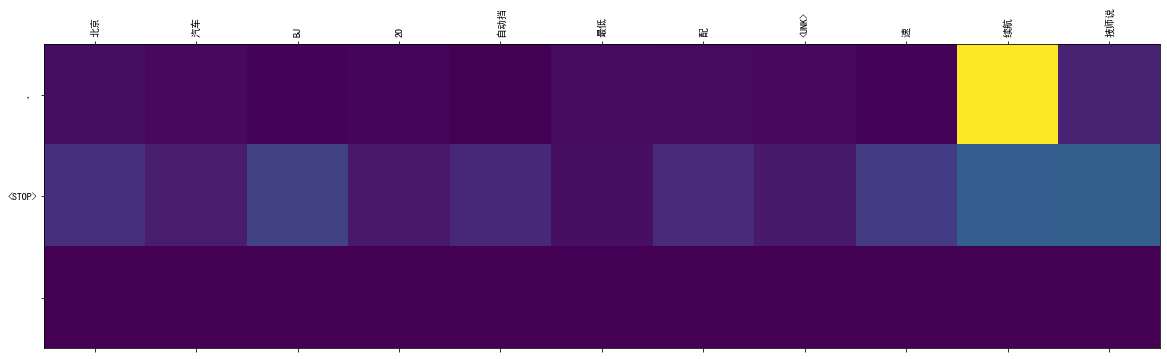

In [86]:
translate(sentence)

# 批量预测

In [52]:
def batch_predict(inps):
    # 判断输入长度
    batch_size=len(inps)
    # 开辟结果存储list
    preidicts=[''] * batch_size
    
    inps = tf.convert_to_tensor(inps)
    # 0. 初始化隐藏层输入
    hidden = [tf.zeros((batch_size, units))]
    # 1. 构建encoder
    enc_output, enc_hidden = model.encoder(inps, hidden)
    # 2. 复制
    dec_hidden = enc_hidden
    # 3. <START> * BATCH_SIZE 
    dec_input = tf.expand_dims([vocab['<START>']] * batch_size, 1)
    
    context_vector, _ = model.attention(dec_hidden, enc_output)
    # Teacher forcing - feeding the target as the next input
    for t in range(max_length_targ):
        # 计算上下文
        context_vector, attention_weights = model.attention(dec_hidden, enc_output)
        # 单步预测
        predictions, dec_hidden = model.decoder(dec_input,
                                         dec_hidden,
                                         enc_output,
                                         context_vector)
        
        # id转换 贪婪搜索
        predicted_ids = tf.argmax(predictions,axis=1).numpy()
        
        
        for index,predicted_id in enumerate(predicted_ids):
            preidicts[index]+= reverse_vocab[predicted_id] + ' '
        
        # using teacher forcing
        dec_input = tf.expand_dims(predicted_ids, 1)

    results=[]
    for preidict in preidicts:
        # 去掉句子前后空格
        preidict=preidict.strip()
        # 句子小于max len就结束了 截断
        if '<STOP>' in preidict:
            # 截断stop
            preidict=preidict[:preidict.index('<STOP>')]
        # 保存结果
        results.append(preidict)
    return results

In [53]:
from tqdm import tqdm
import math

In [75]:
def model_predict(data_X,batch_size):
    # 存储结果
    results=[]
    # 样本数量
    sample_size=len(data_X)
    # batch 操作轮数 math.ceil向上取整 小数 +1
    # 因为最后一个batch可能不足一个batch size 大小 ,但是依然需要计算  
    steps_epoch = math.ceil(sample_size/batch_size)
    # [0,steps_epoch)
    for i in tqdm(range(steps_epoch)):
        batch_data = data_X[i*batch_size:(i+1)*batch_size]
        results+=batch_predict(batch_data)
    return results

In [76]:
%%time
results=model_predict(test_X,batch_size=64)

100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [02:15<00:00,  2.35it/s]


Wall time: 2min 15s


In [56]:
results[1005]

'， 咨询 问题 ， 需要 电脑 计算 油耗 '

In [77]:
# 读入提交数据
test_df=pd.read_csv(test_data_path)
test_df.head()

QID    Brand    Model                                           Question  \
0  Q1   大众(进口)  高尔夫(进口)                                    我的帕萨特烧机油怎么办怎么办？   
1  Q2  一汽-大众奥迪     奥迪A6                                        修一下多少钱是换还是修   
2  Q3     上汽大众      帕萨特           帕萨特领域    喇叭坏了  店里说方向盘里线坏了 换一根两三百不等 感觉太贵    
3  Q4    南京菲亚特      派力奥                                       发动机漏气会有什么征兆？   
4  Q5     东风本田      思铂睿  请问 那天右后胎扎了订，补了胎后跑高速80多开始有点抖，110时速以上抖动明显，以为是未做动...   

                                            Dialogue  
0  技师说：你好，请问你的车跑了多少公里了，如果在保修期内，可以到当地的4店里面进行检查维修。如...  
1        技师说：你好师傅！抛光处理一下就好了！50元左右就好了，希望能够帮到你！祝你生活愉快！  
2                        技师说：你好，气囊油丝坏了吗，这个价格不贵。可以更换。  
3  技师说：你好！一：发动机没力，并伴有“啪啪”的漏气声音。二：发动机没力，并伴有排气管冒黑烟。...  
4  技师说：你好师傅！可能前轮平衡快脱落或者不平衡造成的！建议前轮做一下动平衡就好了！希望能够帮...

In [58]:
def submit_proc(sentence):
    sentence=sentence.lstrip(' ，！。')
    sentence=sentence.replace(' ','')
    if sentence=='':
        sentence='随时联系'
    return sentence

# 判断是否有空值

In [62]:
for idx,result in enumerate(results):
    if result== '':
        print(idx)

In [78]:
# 赋值结果
test_df['Prediction']=results
#　提取ID和预测结果两列
test_df=test_df[['QID','Prediction']]

In [64]:
test_df.head()

QID                                         Prediction
0  Q1  ， 请问 车 跑 公里 ， 新车 质保 期 之内 ， 去 4s店 去 进行 维修 ， 进行 ...
1  Q2  ， 图片 ， 图片 ， 图片 ， 图片 ， 图片 ， 图片 ， 图片 ， 图片 ， 图片 ，...
2  Q3                                  气囊 游丝 ， 价格 不 贵 。 
3  Q4  分析 发动机 燃烧 不好 ， 需要 检查 发动机 温度 ， 水温 高 ， 需要 检查 发动机...
4  Q5  这种 情况 分析 ， 建议 检查 轮胎 动平衡 问题 ， 轮胎 店 检查 轮胎 动平衡 问题...

# 结果处理

In [96]:
# 判断是否有空值
# for predic in test_df['Prediction']:
#     if type(predic) != str:
#         print(predic)

In [79]:
test_df['Prediction']=test_df['Prediction'].apply(submit_proc)

In [80]:
test_df.head()

QID                                         Prediction
0  Q1  请问买二手四s店进行检查，烧机油发动机内部磨损间隙之间间隙过大间隙过大间隙过大间隙过大间隙过...
1  Q2                                   师傅，图片方法配件费用50元！亲
2  Q3                                  气囊油丝，价格，不贵，不需要更换。
3  Q4                                 导致发动机漏气，尾气白烟，尾气白烟。
4  Q5  师傅动平衡问题。需要检查一下轮胎动平衡。才出现抖动，动平衡问题，1.胎压不足会导致。产生安装...

# 保存结果

In [67]:
from utils.file_utils import get_result_filename

In [81]:
# 获取结果存储路径
result_save_path = get_result_filename(params["batch_size"],params["epochs"] , params["max_enc_len"], params["embedding_dim"],commit='_4_1_submit_proc_add_masks_loss_seq2seq_code')

In [82]:
# 保存结果.
test_df.to_csv(result_save_path,index=None,sep=',')

In [83]:
result_save_path

'D:\\课件代码\\5-2随堂代码\\code\\result\\2020_04_04_23_43_54_batch_size_64_epochs_50_max_length_inp_200_embedding_dim_500_4_1_submit_proc_add_masks_loss_seq2seq_code.csv'

In [84]:
# 读取结果
test_df=pd.read_csv(result_save_path)
# 查看格式
test_df.head(10)

QID                                         Prediction
0   Q1  请问买二手四s店进行检查，烧机油发动机内部磨损间隙之间间隙过大间隙过大间隙过大间隙过大间隙过...
1   Q2                                   师傅，图片方法配件费用50元！亲
2   Q3                                  气囊油丝，价格，不贵，不需要更换。
3   Q4                                 导致发动机漏气，尾气白烟，尾气白烟。
4   Q5  师傅动平衡问题。需要检查一下轮胎动平衡。才出现抖动，动平衡问题，1.胎压不足会导致。产生安装...
5   Q6  师傅，车子车内开启车内臭味产生气味，排气管发热发动机烧气味，需要去才行驶出现情况，排气管发热...
6   Q7                       需要添加防冻液绿色防冻液需要添加，添加防冻液绿色防冻液。
7   Q8  油灯亮，缺接触不良解决。缺不知道问题，缺不知道问题，缺不知道问题，缺不知道问题，缺不知道问题...
8   Q9  轮胎侧面出现裂痕，轮胎侧面出现裂痕，轮胎侧面出现裂痕，轮胎侧面出现裂痕，轮胎侧面出现裂痕，轮...
9  Q10  这种情况可能长时间停放时间长润滑不良，可能机油润滑不良，可能机油润滑不良，可能机油润滑不良，...

提交须知
请在提交之前仔细阅读“提交须知”。

1. 自动评审
系统根据选手提交的结果自动评分，提供每天5次的评测与排名机会，实时更新排行榜并按照评测分数从高到低排序。若一天内多次提交结果，新结果版本将覆盖原版本。

2. 评分标准
评测用到的核心算法为ROUGE(Recall-Oriented Understudy for Gisting Evaluation)，详见Wikipedia；具体用到的指标为ROUGE_L，即：Longest Common Subsequence (LCS) based statistics，关于LCS问题，详见Wikipedia。

所有参与评审的模型必须使用飞桨PaddlePaddle。所有参赛个人可无限使用基于AI Studio平台提供的训练资源。

3. 特别注意
选手需确认输出结果的总行数为20001（含表头），且QID ≤ Q20000，否则成绩无效。

